In [68]:
import math
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

import numpy as np


def xrange(start, stop, step):
    while start < stop:
        yield start
        start += step
        
def get_X_y(function, start, stop, step=0.1):
    X = list(xrange(start, stop, step))
    y = [function(x) for x in X]
    return (X, y)


def draw_plt(*graphs_args):
    patches = []
    for X, y, color, name in graphs_args:
        plt.scatter(X, y, color=color)
        patches.append(mpatches.Patch(color=color, label=name))
    plt.legend(handles=patches)
    plt.xticks(rotation=80)

    plt.show()

'gini': Неопределенность Джини  F(X)=1−∑Ki=1p2iF(X)=1−∑i=1Kpi2 .

In [24]:
def gini(y):
    return 1 - np.sum(y ** 2)
#     return 1 - np.sum(np.square(y))

X = np.array(list(xrange(-10, 10, 1)))
y = gini(X)
y
# draw_plt(X, y)
# np.square(X)

-669

In [4]:
# Дерево решений
def entropy(y):    
    p = [len(y[y == k]) / len(y) for k in np.unique(y)]
    return -np.dot(p, np.log2(p))

def gini(y):
    p = [len(y[y == k]) / len(y) for k in np.unique(y)]
    return 1 - np.dot(p, p)

# дисперсионный критерий и медианный критерий - для регрессии
def variance(y):
    return np.var(y)

def mad_median(y):
    return np.mean(np.abs(y - np.median(y)))

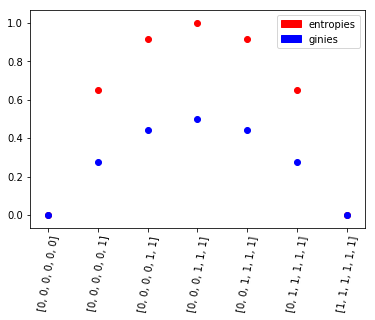

In [47]:
logistic_y = [
    [1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 0, 1, 1, 1, 1],
    [0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
]

entropies = [entropy(np.array(y)) for y in logistic_y]
ginies = [gini(np.array(y)) for y in logistic_y]
logistic_y_str = [str(y) for y in logistic_y]

draw_plt([logistic_y_str, entropies, 'red', 'entropies'], [logistic_y_str, ginies, 'blue', 'ginies'],)

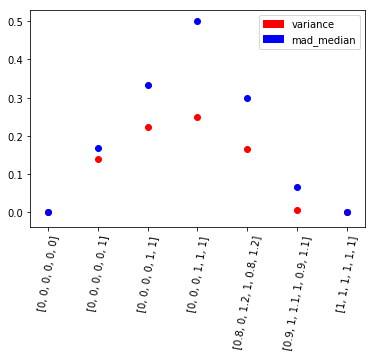

In [48]:
regression_y = [
    [1, 1, 1, 1, 1, 1],
    [0.9, 1, 1.1, 1, 0.9, 1.1],
    [0.8, 0, 1.2, 1, 0.8, 1.2],
    [0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
]

entropies = [variance(np.array(y)) for y in regression_y]
ginies = [mad_median(np.array(y)) for y in regression_y]
regression_y_str = [str(y) for y in regression_y]

draw_plt([regression_y_str, entropies, 'red', 'variance'], [regression_y_str, ginies, 'blue', 'mad_median'],)

'entropy': Энтропия  F(X)=−∑Ki=1pilog2(pi)F(X)=−∑i=1Kpilog2⁡(pi) .

'variance': Дисперсия (среднее квадратичное отклонение от среднего) $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j - \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2$

### Logistic regression

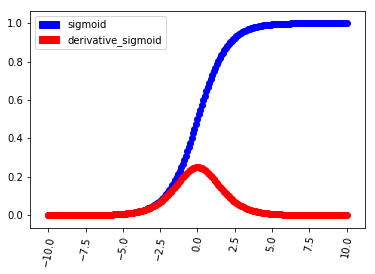

In [49]:
# Logistic regression


def sigmoid(x):
    '''
    RO(x) = P(x) / (1 - P(x))
    log(RO) = W*X
    
    p+ = OR / (1 + OR) = exp^(W*X) / (1 + exp^(W*X)) = 1 / (1 + exp^(-1*W*X)) = sigmoid(W*X)
    p- = 1 - sigmoid(W*X))
    '''
    return 1 / (1 + math.exp(-x))

def derivative_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

draw_plt(
    [*get_X_y(sigmoid, -10, 10), 'blue', 'sigmoid'], 
    [*get_X_y(derivative_sigmoid, -10, 10), 'red', 'derivative_sigmoid'],
)

In [69]:
# то что х
def logloss_crutch(y_true, y_pred, eps=1e-15):
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

print('Logloss при неуверенной классификации %f' % logloss_crutch(1, 0.5))
print('Logloss при уверенной классификации и верном ответе %f' % logloss_crutch(1, 0.9))
print('Logloss при уверенной классификации и НЕверном ответе %f' % logloss_crutch(1, 0.1))


Logloss при неуверенной классификации 0.693147
Logloss при уверенной классификации и верном ответе 0.105361
Logloss при уверенной классификации и НЕверном ответе 2.302585


### Errors

In [5]:
''' 
1-столбец - что мы предсказали y_pred; 2-ой что должны были предсказать y
tp 1 1     fp 0 1
fn 1 0     tn 0 0
''';

#### Accuracy - доля правильных ответов

In [2]:
precision = lambda tp, fp, fn, tn:  (tp + tn) / (tp + tn + fp + fn)

#### Precision - точноть выстрелов

tp / (tp + fp)

кол-во сбитых самолетов / кол-во выстрелов 

In [6]:
# доля объектов, названных классификатором положительными и при этом действительно являющимися положительными
# tp / (tp + fp)
precision = lambda tp, fp, fn, tn: tp / (tp + fp)  # точность 

#### Recall - полнота

кол-во сбитых самолетов / общее кол-во самолетов

In [7]:
# tp / (tp + fn)
# доля объектов положительного класса из всех объектов положительного класса нашел алгоритм
recall = lambda tp, fp, fn, tn: tp / (tp + fn)  # полнота

#### F-measure (F1)

среднее гармоническое между precision и recall

значение F-measure ближе к меньшему из precision и recall

In [9]:
'F1 = 2 * presicion* recall / (precision + recall)';
'85% - не плохо =)';

#### AUC-ROC  (Area Under Curve)  (Receiver Operating Characteristic curve)

мы должны выбрать какой-либо порог, при котором 0 становится 1. Естественным и близким кажется порог, равный 0.5, но он не всегда оказывается оптимальным, например, при вышеупомянутом отсутствии баланса классов.

In [12]:
# насколько полно посбивали самолеты
tpr = lambda tp, fp, fn, tn: recall(tp, fp, fn, tn)  # tp / (tp + fn)
# fpr - насколько много сделали лищних выстрелов
fpr = lambda tp, fp, fn, tn: fp / (fp + tn)

когда классификатор случайно выдает вероятности классов, AUC-ROC будет стремиться к 0.5, так как классификатор будет выдавать одинаковое количество TP и FP.
Каждая точка на графике соответствует выбору некоторого порога. Площадь под кривой в данном случае показывает качество алгоритма (больше — лучше), кроме этого, важной является крутизна самой кривой — мы хотим максимизировать TPR, минимизируя FPR, 
а значит, наша кривая в идеале должна стремиться к точке (0,1).

<img width='200px' height='200px'
src='data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAABE4AAANGCAYAAADjyMtvAAAMJ2lDQ1BJQ0MgUHJvZmlsZQAASImVlwdYU8kWgOeWJCQktEAoUkJvIk269BqpUgUbIQkklBgSgoodWVRwLaiIYEVWRBRdCyCLDXtZBHt/WFBR1sWCDZU3SQBd/d573zv55t4/Z86cOefcufPdAUA1hi0SZaNqAOQI88SxoQHMickpTNJDgMCfNnAC9myOROQfExMBoAzf/ynvrkNbKFfsZL5+7v+vos7lSTgAIDGQ07gSTg7kAwDgrhyROA8AQi/Um87IE0EmwiiBphgGCNlMxhkKdpdxmoIj5DbxsYGQUwFQorLZ4gwAVGRxMfM5GdCPyjLIDkKuQAi5FbIPh8/mQv4MeXROznTIqlaQrdK+85PxD59pIz7Z7IwRVuQiF6UggUSUzZ71f5bjf0tOtnR4DlPYqHxxWKwsZ1ndsqaHy5gK+awwLSoasgbkqwKu3F7GT/jSsIQh+w8cSSCsGWAAgFK57KBwyPqQTYTZURFDep90QQgLMqw9Gi/IY8UrxqJc8fTYIf/oTJ4kOG6Y2WL5XDKbEmlWgv+Qz018HmvYZ0sBPz5JESfakS9IjIKsAvmuJCsufMjmeQE/MGrYRiyNlcUMnzkG0sUhsQobzCxHMpwX5skXsKKGOCKPHx+mGItN5bDlselAzuRJJkYMx8nlBQUr8sIKecKEofixMlFeQOyQfY0oO2bIHmvlZYfK9CaQ2yX5ccNj+/LgYlPkiwNRXky8IjZcM5M9PkYRA24DIkAgCAJMIIUtDUwHmUDQ3tvUC/8pekIAG4hBBuABuyHN8IgkeY8QXuNAAfgLEg9IRsYFyHt5IB/qv4xoFVc7kC7vzZePyAJPIOeAcJAN/0vlo4QjsyWCx1Aj+Gl2Dow1GzZZ3086puqwjhhMDCKGEUOI1rge7oN74RHw6gebE+6OewzH9c2e8ITQSXhIuEboItyaJigU/xA5E0SCLhhjyFB2ad9nh1tAry54AO4N/UPfOAPXA3b4WDiTP+4L53aB2u9jlY5k/K2WQ77IDmSUrE32I1v9GIGKjYrLiBdZpb6vhSKutJFqBY70/JhH4Hf148J7+I+W2BJsP3YGO46dw1qxJsDEjmLN2EXssIxH1sZj+doYni1WHk8W9CP4aT720Jyyqkkc6h16HD4P9YE83sw82csSOF00SyzI4Ocx/eFuzWOyhJwxo5lODo5wF5Xt/Yqt5Q1DvqcjjPPfdLnHAPAogcqMbzo23IMOPQGA/u6bzvQ1XPYrATjcwZGK8xU6XHYhAApQhW+KLjCEe5cVzMgJuAIv4AeCwXgQDeJBMpgK68yH61QMZoA5YCEoBqVgJVgLKsFmsA3sALvBPtAEWsFxcBpcAB3gGrgD10o3eAH6wDswgCAICaEhdEQXMULMEVvECXFHfJBgJAKJRZKRVCQDESJSZA6yCClFypBKZCtSh/yOHEKOI+eQTuQW8gDpQV4jn1AMpaKaqAFqgdqj7qg/Go7Go1PQDDQXLUCL0OVoBVqN7kIb0ePoBfQa2oW+QPsxgCljDMwYs8PcsUAsGkvB0jExNg8rwcqxaqwBa4FP+grWhfViH3EiTseZuB1cr2F4As7Bc/F5+DK8Et+BN+In8Sv4A7wP/0qgEfQJtgRPAoswkZBBmEEoJpQTthMOEk7Bd6eb8I5IJDKIlkQ3+O4lEzOJs4nLiBuJe4jHiJ3ER8R+EomkS7IleZOiSWxSHqmYtJ60i3SUdJnUTfqgpKxkpOSkFKKUoiRUKlQqV9qpdETpstJTpQGyGtmc7EmOJnPJs8gryDXkFvIlcjd5gKJOsaR4U+IpmZSFlApKA+UU5S7ljbKysomyh/IEZYHyAuUK5b3KZ5UfKH+kalBtqIHUyVQpdTm1lnqMeov6hkajWdD8aCm0PNpyWh3tBO0+7YMKXWWMCkuFqzJfpUqlUeWyyktVsqq5qr/qVNUC1XLV/aqXVHvVyGoWaoFqbLV5alVqh9RuqPWr09Ud1aPVc9SXqe9UP6f+TIOkYaERrMHVKNLYpnFC4xEdo5vSA+kc+iJ6Df0UvVuTqGmpydLM1CzV3K3ZrtmnpaE1VitRa6ZWldZhrS4GxrBgsBjZjBWMfYzrjE/aBtr+2jztpdoN2pe13+uM0vHT4emU6OzRuabzSZepG6ybpbtKt0n3nh6uZ6M3QW+G3ia9U3q9ozRHeY3ijCoZtW/UbX1U30Y/Vn+2/jb9i/r9BoYGoQYig/UGJwx6DRmGfoaZhmsMjxj2GNGNfIwERmuMjho9Z2ox/ZnZzArmSWafsb5xmLHUeKtxu/GAiaVJgkmhyR6Te6YUU3fTdNM1pm2mfWZGZpFmc8zqzW6bk83dzfnm68zPmL+3sLRIslhs0WTxzFLHkmVZYFlvedeKZuVrlWtVbXXVmmjtbp1lvdG6wwa1cbHh21TZXLJFbV1tBbYbbTtHE0Z7jBaOrh59w45q52+Xb1dv92AMY0zEmMIxTWNe2pvZp9ivsj9j/9XBxSHbocbhjqOG43jHQscWx9dONk4cpyqnq8405xDn+c7Nzq/G2o7ljd009qYL3SXSZbFLm8sXVzdXsWuDa4+bmVuq2wa3G+6a7jHuy9zPehA8Ajzme7R6fPR09czz3Of5t5edV5bXTq9n4yzH8cbVjHvkbeLN9t7q3eXD9En12eLT5Wvsy/at9n3oZ+rH9dvu99Tf2j/Tf5f/ywCHAHHAwYD3gZ6BcwOPBWFBoUElQe3BGsEJwZXB90NMQjJC6kP6Ql1CZ4ceCyOEhYetCrvBMmBxWHWsvvFu4+eOPxlODY8Lrwx/GGETIY5oiUQjx0eujrwbZR4ljGqKBtGs6NXR92IsY3Jj/phAnBAzoWrCk1jH2DmxZ+LocdPidsa9iw+IXxF/J8EqQZrQlqiaODmxLvF9UlBSWVLXRPuJcydeSNZLFiQ3p5BSElO2p/RPCp60dlL3ZJfJxZOvT7GcMnPKual6U7OnHp6mOo09bX8qITUpdWfqZ3Y0u5rdn8ZK25DWxwnkrOO84Ppx13B7eN68Mt7TdO/0svRnGd4ZqzN6+L78cn6vIFBQKXiVGZa5OfN9VnRWbdZgdlL2nhylnNScQ0INYZbw5HTD6TOnd4psRcWirlzP3LW5feJw8XYJIpkiac7ThB/ZF6VW0l+kD/J98qvyP8xInLF/pvpM4cyLs2xmLZ31tCCk4LfZ+GzO7LY5xnMWznkw13/u1nnIvLR5bfNN5xfN714QumDHQsrCrIV/FjoUlhW+XZS0qKXIoGhB0aNfQn+pL1YpFhffWOy1ePMSfIlgSftS56Xrl34t4ZacL3UoLS/9vIyz7Pyvjr9W/Dq4PH15+wrXFZtWElcKV15f5btqR5l6WUHZo9WRqxvXMNeUrHm7dtrac+Vjyzevo6yTruuqiKhoXm+2fuX6z5X8ymtVAVV7NuhvWLrh/Ubuxsub/DY1bDbYXLr50xbBlptbQ7c2VltUl28jbsvf9qQmsebMb+6/1W3X2166/UutsLZrR+yOk3VudXU79XeuqEfrpfU9uybv6tgdtLu5wa5h6x7GntK9YK907/PfU3+/vi98X9t+9/0NB8wPbDhIP1jSiDTOauxr4jd1NSc3dx4af6itxavl4B9j/qhtNW6tOqx1eMURypGiI4NHC472HxMd6z2ecfxR27S2Oycmnrh6csLJ9lPhp86eDjl94oz/maNnvc+2nvM8d+i8+/mmC64XGi+6XDz4p8ufB9td2xsvuV1q7vDoaOkc13nksu/l41eCrpy+yrp64VrUtc7rCddv3ph8o+sm9+azW9m3Xt3Ovz1wZ8Fdwt2Se2r3yu/r36/+l/W/9nS5dh1+EPTg4sO4h3cecR69eCx5/Lm76AntSflTo6d1z5yetfaE9HQ8n/S8+4XoxUBv8V/qf214afXywN9+f1/sm9jX/Ur8avD1sje6b2rfjn3b1h/Tf/9dzruB9yUfdD/s+Oj+8cynpE9PB2Z8Jn2u+GL9peVr+Ne7gzmDgyK2mC3/FMBgQ9PTAXhdCwAtGX47dABAmaQ4m8kFUZwn5QT+EyvOb3JxBaDWD4CEBQBEwG+UTbCZQ6bCu+wTPN4PoM7OI21IJOnOTgpfVHhiIXwYHHxjAACpBYAv4sHBgY2Dg19qYLC3ADiWqzgTykR2Bt1iL6OO7qdk8IP8G1ETcV1m3ztSAAAACXBIWXMAABYlAAAWJQFJUiTwAAABnmlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNS40LjAiPgogICA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPgogICAgICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgICAgICAgICB4bWxuczpleGlmPSJodHRwOi8vbnMuYWRvYmUuY29tL2V4aWYvMS4wLyI+CiAgICAgICAgIDxleGlmOlBpeGVsWERpbWVuc2lvbj4xMTAyPC9leGlmOlBpeGVsWERpbWVuc2lvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxZRGltZW5zaW9uPjgzODwvZXhpZjpQaXhlbFlEaW1lbnNpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgrvPAtsAAAAHGlET1QAAAACAAAAAAAAAaMAAAAoAAABowAAAaMAAnJsh1Oi/wAAQABJREFUeAHsvdmTJMe15ue1996NXoDGSoAgCZAghzP32uUFSNqlTKYX6Umm/1BPMr3M6zxIJpk0M6aR5hJcQHDD1ti60Y1e0Vvtpe93PL5Iz6jIqszKzKrqqvAqz+PL2fyEh0fECXePmf/5+oOtra3NtLm5obiZSKsgpTSj2Auzs3Npfn4uzc3NB5wV3BIKmOsb64obETcFN0U/MzurOJNm5ubSrCJ4sNySjI0N5G2qQKVUVHFG9aJIsyoQaU4Lzs7Mpjnxm5MOwBnlpaTkZF7r62tpfX1D5VnI3NxsQt9ZaJQGnzaBv7a+nlbX1kL+BmWStSm6UEEMZojxJ/nQKz8v/XMUX5qhsmhD1Y4N2oQu8CLCzKFqBzTRhorXnCBxSzywyZp0WleEV9hfuhG2ROcgq1ISugaccTrbChmksJ31Bs5UFBwXeIct4FTZHVDXiZb8/PxCWlxYiGOxpWO6JbttEpWmgegs8aERxyeiBMva+TjAXHFDNOsba4EPMhpmCTkNDwJa5oCd5tLS0om0tLiY9ZVGa6traWVtNey8xeGv9DRNcKjab05ZnnJhg6rfVHJAxV65j+Q+mnlkjpl/5uR+s6Z+Fs2q7Fkp3AdmIFTgN/qtZNAHF+K4YydqZmTH6pzbkI3oOxGr/iMM+hGyAiofbZF9c79Rv6zORcox4QbnoM6BddmbNPxzyJaNX+kW0vVDivOSY7wwP18dv3xe0QfpDzqTM1Q68tKR83ZdcUP9ANstiH5e9JzruQ+ojZxzSEI3aOEnfaAh0q7cD9GQjMcCWkKQHrJT9Cb1Lc5f7Mb5iEyOG9HYdZ+u9NvkBJQQygm0mUBfi/NCPOYj5jHC9JyDjA3r4gMl44KtGG0JLpkfLSTCbw79ODaMTxxn9BQk5PFuI8Ydjg12JIZSoqWdyAp5+nU6aFWNDNACqlDJCNg6xldVUrYg2Ys6DvOCbjvtYbzD/nFMxR3ZtQwYV4EyxjbkzKst8KHPMt47cOzyWE+/yH0DOhQIaESKxJtjRV+YF4856eaQrxX003zNwP5xTMGvIo3OxzlTYTLGni1dp2LMVBrLzagC26MzkGsHreIYcFyI5gOsg/iFTeCHTSodkM9x5Pihu9sF7rpw12yDqo/0OGa5mX/WnWvQgsZRzq/QQZoxHq6tca7miNzo05IbiqNj/Ofj6jEWvtalGmIwct0cEjlXnRfiSwlHm97M+OI0uJwj9XmpdtGf5nUuM1ZB1885igoFcltnxGMWuwkucl9A36cPVu2F/5rqsdmqZHC9lbWj72SIRtJT/7aP+znn+5y0iGNY9QmOB+dXJsl86d/0yWoEoSrHbQ1QhUKWE6mqPdI/bEWbxCXSvfqajfQJWkGPRTEWSzfGJ85Fh7ieo5fOvzjfZAf6E7b1+B3HvCKhX7svlsclxolsnnw8QofchuinwTOfo7O6HoBP5DqV7ZLHa4nPQfKwjwN9y+e87xfiXOV8FW+fF3FtkY2BWU8YVv1MKfpjbf9Chu3lY8v9T4wp2AwOkk8fwV6+D4o25wOc1cTecfzzWA0vZXVfyXEINQIvzqna3lW/yhwyErhVsA0CKzLRC7NxZD+K8tjCOMI5PJ9j2NvjGPeA+XrLNWNldTXGh3yNEg3XRcWsO30kK4BN47wr2mw7130vjnPuZ3HPqP4VfKpyMYtjk++tGL/otvmcpC7OYInL9qctRaC8vyQqwQnbIoM/FcT1nLxi6C0ZG5zH6C78MsLS96po0qvL9qSPkHJXjP4ifoHHD7VA5OqHsTzGTsakaL/sLblc02i3xy76Dul8DkOP9rktOZ31z7bANlyndb0QXr43lmQJXhVPIjLWaaf02RAjIvcBOWS7kJ6TrifUN07NL6aTOl+WZrnGVdd81dM3VnW+rIjn8vqq0rqbEp/aNlWa8XNBHXpJfWuJvibI+BlBMvxcxbUnnleEX55vfnYBn3JUrXpCpKK8si91YVvlfd7HMZd8+pmpOSrxp2sG3CSy7rOcn9HXZL8Yg6Qz13bGfgd0ro8R1x0YDAjwYMyhzfU9rXCh4BmL62Qez3RfJr69QGtyIEUf4ZrPdYjnhgXFwJCeHIs1HYt49uMYcyxEk/tkllUhZxNUfAGMUTmovfStqt/EvYb6EWMQPS6aGLYBO9uMdkfbq/ajTy+KtjrW+ZobZPGMtaH7+NBRx5xrS++5O4/LcMn2yfdja3q+ivv+zfUQUKtc4aERAV3ydZ7xbKG+Z5eWUbel67h1rsuqNtRjVtWWUCCzlUwsENaOEmXDTnHOyUC5j6mfqK/E+BgIKJT7VdxTqs2+fnFcHCIJfhWCJ/IUfS7HPQJ20vV1RjJ8PV3VfdaqnhnXtzibOY+r8Ufs4hwJPeCTzwddUmJM8JjLOAHvLD0fY+zDNXrmf7/7VGkGH4ym7oShrGUBYxCtLvzhlFAaPCKDDQNqPAxWJwoN05kVJ9eMcB3CONVgF2UhTD/6R0EfgiAnrwR/0VHVCHdeaHMj8gNZPCiKQRiUxsYBQ36mRwwtixtWThwMEG3NxswHS7hhJWjMi4G2uuGpeFFLR7Ld/BDB5URmDDnICy7oxF/olgcoX0zhGzcN0iMugtF58jEQeQT45BCKxcmeJeTSLEfpqA6JIY925w6Qy8DrnRROmwfHvirLYuLGKW6AKcdeiuFA0XHmBIOAixXocYyig9FOSpAGoJNVtAhQVcU+qp3uDU5RHCc3Nx5EAnrjFGCA4Jjl0SoPHpmCX9qZOZpvlIY+Wa+smyl6ZXE8oo9WlAUDbgayfC6qans0rf0csRYBaa5o4wGA/hMx60h5PRDJlvQfLor8MaDTjxCDrCi1WvR/6RkXrIC9CzV25jz0oEG/cnBzajtLPn/hDNXgzU2ydQ15EhznB/qEXtLJZcBKVlz0uOBV9MijDF5EB7fVMPdD19JISaXB0epcjn5iEnqaX2/QhX8PO2jRK/jIeoxl/IlnTwullY/jIeIYbNFV54nlcw7ykBfnM9pUMkK1rFb9y3AKadgt0nms4ThHf9KxItBW2s2FkAt/1gvFIKYN+gEv/oA5RmFGEUZYIzAzNu1XRAEFau0IYrCHCfy4ACOT9oQeYR/pk4mCkmQEWIkOcj2iqL8yfnCxK8buqh25L8Cz0jWrAXkdfMxyX80PPVSCE/aIcUH9tdINe4SDTHI5zsEybGTm2Y4xXkoPHrSoYRTg2hR2Dx5h1rgA5ht/5SlHOPyKgB65L9JXdCRUH9eX6hjavlln2ZPzFBugO7YsePVzzhVx0xPnlxwnFIl/nJ/qZ3FzSX+o5NLmCJWOAPordI6WF7DCy0QtvxUyfTiOl7RVa2ud3W6fk+gaDtTiWt3CtTrgYq7/WcV4YFEb5jkG1VgCxI7IxQmJo5WI/FqXyn6hEXxoZ9Umjj55eMR5xvEgTb+o7ARdPOSojwPJi01EiEm3BcvoIXAdy/JrqoIYPSIogVbRl6QLfSP6FzqRV3TAttwMcv7ZzjEm0I5q/KY9IgoSnIFxHLAJdgqotPQIVUhU8gOKDnpsEf2e8VfpsIFQ6VvhTIIXYyH8Klm1jkogPY6hYDiAdb7H+Rp69hwnMd7rfAPCC10jiGfopwwwopi6zDYJ+6ge3jgiQvdgoB+OXehomKnNAzS3NWC0u7J3Nl9wYnwl2t5R2PcTBoySknfgu7SqoMyssS8682DYHA89FnBPifOEfLRVNDxMxnURW2J79MZeHAti0W4V8K9gzcDl+OQ+D31uO30tlA0e+eFKdqvpEQNVP8wUvV/z6JUgK8ur6ZGODvBTtN5x/qI7xKoHOgZBUU7Sdc1raV0ORv4XpLQn045Ytz+f7/nBt6/PSB8H2mE90DtnsUluB6MsfT2uGbRPeaTGOcNYwhivEjj6xUnPcQJ+JuK8WdSYtxROEzk8qnNHZHHfwPOIHe04UGL8E2luYcYhDR/0gR4HSpwfxRgcL5zUPvQK23OsW/iYr9uOHg4cOwJtJfqczzbh/Kr6aNW2ONaVppIWhyWu0/V9Vb5W+nod4710d2B8yH0TWsmu5Lu+hDGGVfeyOBC4J3UwH18rue72B1pTtUk25J4OxxPXsXA+RXV2uKFPHhe5XoiP6rCKY5vdzBsIAd0Jm0V/jPGfsrBi3c6wdPWTzxlooyCuM8Gp0ivGWq6Vtp3sFM/QjLOyIe2Hf36Rw1gv3KpvMEJ5XKY9tI8+4pAlOpchxxJ+2Tme7/l9jmRd42iHuqTyfz6GnG/0P46l64JrZZM+SdikKg/+ysT4VY2FlglN9Gl0V1vRoRpZCnbBKPJhtjgOPf4eGzj22BHe2A2++Vlf40XF1+dN2AYFFbgu0nPJwUtWER/0zedE6A0iIZqf7TDz91VxrQsj1fqDnDKGJGFCDAfZNTOuygRCG2iMSxG4oOYfEgpR0EPLTcr5SCNbaBGjIKjiJ/jBs+QBfoVnCDIooav6V6SrsroOOjJVIB1tFqRvOx/VhUy3qcmzYhPAegS/Sk6UQaRAn7cNIx+l238q9Loi8pXSFYi66AyWo5KSzrbqK6s4ugzd1H+izYFPBedlIOhHhfm2Cal58Ajkik8G1UlnA4FaIUWyEhbpIMgFIbs6ySoUiVOHjYFbois+1PVog0FoklONOiE2ccGLY0BdS2XIplwJjo2bYf6DYLASvnmSty2hoTx4IQC+GWyD4FIXIZhmWuiDd1VGfeDByzFT9bU50EFs4RVFVbnbCWoZyZAPW1Rs4ryo6FTU12byhOBR0QYPCspQ1NXF4lmw7fF1oaEI0JcQoI2X6owO7Ds3KDC9oMbcGLwpyv2srlZJL0CWowfx3PYo0w+QEHz0Ux6XuPAYQ4jgEAzLtPkAHcGLclcqT/9yH6PY8jymQJNjlsLZ2wyU1FEJ86vxRFr3jcymT+fAK9hGUj91f60YWbfQB576YwSxStG3wS14IShEBpHqxCRXB2WWUfGnPGRWLGp+VX0NCp6wDX76MT4wZKouxFb49VgALsyMRLoIoUPJT3U1LbyqaHl97RVu9FPhhIyCby2uWVHgWCffLHjoNm1A/QAZW7Fi81wu2fWlKyaID6eD8tFXqra63bQPubS5lB82UHnFpk5Ec+AB30akIPiqnAAtkfPVaZeXkHQZ4NsWLK+tjrKaDj0qpDhuzruQOink40wa/ay7bVMzqfCjLzjdgGSNX4tBbiXbeiCHYNnmCdwWYKRygGPfMSwIgo9wgw+wrKvSLvOYWaCEgD4ZZWVNqMIGb6NF+5QZBMFzmwfxMK8mtPi+8qIQm9guAQtE0JBLH9RzstI6jyoldd+d9a0aDnCoj4do67QrCxik+jEsqiIJremBlhGwogPR5U36Zn4QHeViHyFkOl3CSojxqIq0yoEuHwQrVjXAjLY7rCv29XEu223mxnGdmcHLdUBf/wMqH/rpJ/qQ8gGFGGOWoHU2PyC0POLPqx7I2+paiJLoEH1DUJOK+8Y/Vdf3FvllTsVPPOBb8iEb+oiH/utIeeSRWwXyOwWj2lFc55Vw2uevbWieIavKAAK/ogv7moHqoI2IMhUNydYAjzI2kMKOjPEVz0Z1ZBEdUT8+X7mWOQQPZWpepKtKw9oAJmqByCBYlvNRUDPKOBZQFyth/BoqQdtdQbJup/BJR3WFV+IiBd7RpgqXtEOdhAHBBcr7vII51a5yojWvwiivK4Nr78dyqpI6WyXiGFPnvJLmF20mbxngOdSMckGdVYJ0X6RMMfiIl88/5PRFiKoyGJBtjVUduNTDI4ISMw+5a1KgYq+hZjiAwW71kA2SP6h8gKiRiku9ynTJxPINqSvT5EvaMk3doNDkMQhvUPlucsbhX/Iu+QxKo2NJY53bylxnWPJ02U5wEM+Sz6D0Xvg2aQbJN14p22XDwJJvmS5pzbut3nUlvtPNuiZ9Mw9ds6yZN+9JwWnzL/Us7dFMWw+g0yVtM13SN+uGyQ+S4XLzL6Hr4O+06ykr066nvAyDykvaQWn4lHXD8C1xJpUudWi2p6yblDz4NOUMy3sUOnDR37G4BxxWXI0HL8d4EKhrRksMsqfLDZtc3W5D6q2P04NoB5UPklGWl/LKctJtfMuyMt2kPcz5ndqM3s36sp2D0tCVdeQHhSb/QXht/NrKBtG7fFSaYfUbxL9NHjwdobMMw7KMtEMbL9e1wcOGbx3LdroMWJY7bWi8Zt7lhmWby7TrDeFT1pM377LcaWAzbfySp8sMXQc0jxK24bnMENoyXfJyGliGJv5u+ZK2mXa7Xd7Ml7yHSZvPJGBTl2YeGW1lpeyd6sv2mKatzHU7wZ3kTINuJ55l3V7bU/J4FtNtx8O2KGGZpp3kS9oyTX0zTxlhZlPzWAZVZpTuNyzQGWn4jiBbNTvo8MSjYfqw4EU/1GFc/dzQnRo5DM5O9KobV81d2O9Y3S6bx73pBZvMEEmlHmV6eloM5lzqVaatl+FgDuPVWKbheNwmRV1p8wxduazqsMeLFvaNacMSliZuHDR02AubkuWk0vl1zaS4jc8n3uaNz+aZ5+AuYxgNOiydprRun4JlxQGmbafiPHPRfmlVmqVv/NgvBSynUKS0QZk26m6wYNWKCs8Sh7zHl7I80qosy4LhtoJWMce6cNTr116N5UNheGguWHttUEd3+CygzuVxyHBUJWe0/GHrQAfYUTU+KPz6TD4oBQ653IZ93CENp6W9xRqGnGkL3UtjxtGpr3E7CB8WbwcW46i5A9uhqtpld44TG688vLaVoXEmDS3TcNL898av0sZ3czsxmbbiwxwA6WA0w51Upg61+67LoxAOYN45TgYYBltPu58MFn2oamwGw1q5YftfTTDlxDYFpyxvGPbYqNLL5jIchnwSOKVZIt1UoESYhMAheJQqlOkhSANlN5XhWeKQH+g4AbdUoiQMad3PNgvIRjaZ4TacCRX4cBgG22kLnZDuHZtDbIG+DjV+f5bjZFP3U8WZcSBtb54ZjVbuu04Nfbq7qsFHYMChsgUNBzMYr8biDWtu0xZcCxoyMY4+2xrXInMYnBayZtE4ajZ5jZrfLpuS7aWj8t0J32YzBLeUWKZ34jOtulKvMm29DKctv5Q9LVnD8620GeQ4OVzKRrN8nAx3aytNiGYMSzAEQ1hNit1u4nar94PNbnjTqS+tICvn/+mIesa4Rp+TzoZ96pdm66vY50yrcvuswy7ibCrDXdAnVl2apkxPTMAeGJU2KNOjsBrUFvMr6ynz+JLLM5Zx+p53XDiKMkcdt8UmtrPhtExg0Ya1nGkLrgV1iSNlgW0dKbfO3clw1DbLcbJR3X5KwkAuAytGlTcC/oAWB4d91qd2nAzQaUDxCI3dAbWtrTsdqx1Y7VTV1oY20eYR+EbYTuwaQ5NNGlqy4Tb+bQoMRN5GvYeCFoEuMtzGdWBFxoz+t4vSu1RvEzmgYBdNBlBNpni7bEq2l05GWuZisxlSWkos05OUOyyvUq8ybb0Mh+U3Kp5lGo5KPx38ShuuXIdLsYHN9XEyHIhYVdCsaNqwBEMwhNWk2O0mbrf60MNPN9uQ91lLja/xMLVNj+NX4O/k9J9WRa7t0BTVk7dYQ+Azcs5ba8PJ28Uc+yWU/Xiqh8Xih4ClhmV6CNKhUcq2stl4tXVj3+XBOBn25/oEuaqvcFKZNgtIYFuxRe6rPu3CrJ6hVZs0tHTDbfzbFBiIvI16DwUDBLYVm/u+6iNhO+linQ4T3Ff70PDtAm0yw1HNI8fJev97u71yGlXys4QfdtfPdvs/S63YV13djQynJdyHxHBacsbiG0bQz16NYcfdjo10pWGp8U6Cwe/V91Il/TTTPX37ZTtnOB0dLN0QKaXEMj0dDXbmWupVpq2X4c5c9l5rmYZ75zRJykqbZ+Qhipb7OBnuZg1aWNt8WKJBTG2uQo9BqPtTnhuUvy61PxJ7UprGLJ0mtcV76AeWauqJIm1lk1XQFjCcLPdJcEOzw6odxycfIx8pw0m0fBgePcdJLzUM3TRxyvMce3D0+q00vvSyteE4qSSUy3LcawzrftQrGF+RZ56DjWGYG+R+bDitZlqqYb90ctPWYFotmxZfW0rwsJimPOkOjVL99repDPtrd89td5zsTnNMMdQx3UePqQVGabY7pOEotKPg+pAYjkK7b7hhhHEtMUz/G98K42q5N5uiN7c71t9aGO6N6zBUlmgITSm1TA/Db9I4pV5l2noZTlqu+VmmocsPFlbadI6T4Q6DzSXsafeX4RSyFobDUU0Py73bcHqShuNsuxgORzUJLFvAcBI8J8sDzQ6rdhyvfMx85Awna4PB3LJl/Hs47NRznNga6NUrHdya4Wvc4sy3x7t8hrM1DLuNjQbZ1xYydK/uwUGU45ZbomHm535jOK6Uo0ZvawketIlCFSthePjsbc0MR9Wwc5wMbTH1CPfPoWmOL6I7pOG0LOFDYjgtOWPxDSOMa4lh+t/4VhhXy73ZCb07x0mb7cojWqZ9nAzbaCdRZpmGk+A5Po9Km85xMpwpbS5hT7u/DKeQtTAcjmp6WO7dhtOTNBxn28VwOKpJYNkChpPgOVkeaHZYteN45WPmI2c4WRsM5pYt49/DYqeeI6Nf8551eql+jFFyedZJlmWJtkDASkikPYt3FAHHBrfPatFqHx/DaZliu2QkWarhtKQ/q3wLqx20iUIVK2F4+OxqzQxH1bBznAxtMfUI98+haY4vojuk4bQs4UNiOC05Y/ENI4xriWH63/hWGFfLvdkJvTvHSZvtyiNapn2cDNtoJ1FmmYaT4Dk+j0qbznEynCltLmFPu78Mp5C1MByOanpY7t2G05M0HGfbxXA4qklg2QKGk+A5WR5odli143jlY+YjZzhZGwzmli3j38NlJzsz2rXvd3iUOG5NWdZLZ7qdcGwFwx5tl2q3gC1l6F7dg+1045daomHm6LPIcHw5R4uDrSV40CYKVayE4eGztjUzHFXDznEytMXUI9w/h6Y5vojukIbTsoQPieG05IzFN4wwriWG6X/jW2FcLfdmJ/TuHCdttiuPaJn2cTJso51EmWUaToLn+DwqbTrHyXCmtLmEPe3+MpxC1sJwOKrpYbl3G05P0nCcbRfD4agmgWULGE6C52R5oNlh1Y7jlY+Zj5zhZG0wmFu2jH8Pm512cp1QN7i+3MOkv/U9mjYcW8Cwn7bLtVvA1jJ0r+7BdrrxSy3RMHP0WWQ4vpyjxcHWEjxoE4UqVsLw8FnbmhmOqmHnOBnaYuoR7p9D0xxfRHdIw2lZwofEcFpyxuIbRhjXEsP0v/GtMK6We7NT1rtftnOGe+O8G5UtZgh+KbFM78ZrGvWlXmXaehlOQzY8LdNwWnKG52tNBGm8s8MzOBBMHyfD3ZSgWXXThiUaxLRiBJtxWQ0SMVq5tTAcjXry2La04eQljMbRdjEcjXocbFvAcBxe06FFs8OqHccrHzMfOcPp2GI712wZ/x42O/WcHNs1z26TcezVOU62W3VvJe43hu7VPbg3vrtTWaJhpnCvMNydz/HCsLUED9pEoYqVMDx8R8OaGY6qYec4Gdpi6hHun0PTHF9Ed0jDaVnCh8RwWnLG4htGGNcSw/S/8a0wrpaj26mn83bZLjEcnftuFJZuCH4prUzvxmsa9aVeZdp6GU5DNjwt03Bacobjay0E3XAXDcfgwLCsruFuitCsumnDEg1iWjGCzbisBokYrdxaGI5GPXlsW9pw8hJG42i7GI5GPQ62LWA4Dq/p0KLZYdWO45WPmY+c4XRssZ1rtox/D5udOsfJ9iN2GEvcbwyzjnvpy6PSWKJhv+RRuR1G205DJ1tL8KBNFKpYCcNptHk8ntbMcFRuneNkaIupR7h/Dk1zfBHdIQ2nZQkfEsNpyRmLbxhhXEsM0//Gt8K4Wo5up57O7bLbS0eX005h6YZglRLLdDuH6ZaWepVp62U4LS0s03BacobnK02ajT48yg1shlU2HIhYVdCkulnDEg1iWjGCzbisBokYrbz3/ayD1ygbJ9ultvhozZk4to+S4cQFDGRoCxgORDywCjQ7rNpxvPIx85Ez3C9zZcv49zDaCYugV9OJ0s042a8+srsc9xvDHsVe+vMoNJZomCWbg2FPny6FBWwtwYM2UahiJQwP31GyZoajatg5Toa2mHqE++fQNMcX0R3ScFqW8CExHE7OIOwpaRtsx+UtnQepXTd6V4Qac1BiXC0H8R1c3tN5sOzBNYP5Dldj6YZQldLK9HAcJ4tV6lWmrZfhZKX2uFmmYa/mIFLSoq3Bh0O5HQ1itQ13RFYlTaqbNSzRIKYVI9iMy2qQiFHKZ0ILlDoM2qB51qV054zSnsnj2i6Gk5cwiKP7nOEgvIMrR7PDqh3HKx8zHznD/bJXtox/D6udsjX6XSed42S/+sjuctxvDHenaGKU/b5MN/GaeUs0zPXmYNikOu55W0vwoE0UqlgJw8N3fKyZ4agado6ToS2mHuH+OTTN8UV0hzScliV8SAyHkzMIe0raBttxeUvnQWrXjd4VocYclBhXy0F8B5f3dN5/2T2T9rTov/YchE6lrUq9yrT1MixpJpm2TMNtvKetwDaBLQUDlWvBPaAim8lwNzVoUt2sYYkGMa0YwWZcVoNEjFLeOU52s5aPkuFu+JOrd58znBznSXFCs8OqXe8M85EznFTrd+OTLePfw2qn3IrOcbLb0Tyoevcbw73p4b5vOAwXSzTMNOZgOAyn44RjawketIlCFSthePiOhTUzHFXDcJxAZNOPyuD44MtCnZGGPtx77ZBDC2ggDn9odsOcgubBchy+w/S93drVMNiBZbfrOY5lJtWMUqvDoE9buw5Sx1J2m277VtZ2cA6NcoOt0Kb2YOxcUzdrL8Ql84rRuGxKlpNIZ7UOWqvsxplEeybHo7RJmZ6chEGc6j7Xh9Be2oeyb5nDpEtbo/Px2t+j1tQj2+iwW6rU2vNNtvZouJlobNv2sFnKs2SL0i4HkuZrdc3QUtREaebLQ1mmm3jNvEUZ5vpRODQ5Hpd8v8UOrtXlsSrTB6dRU/K4WslxstF2mjTldPnok4elYx7+wzFuxxy1haMdmSGwtzbT5iZxQ1Gtqa7oM7OzaVZX6S3lNxWBQwVwh0LcjuSbgu01vZLcPYdoV49kmz6h32gsCm4jJvuEZaH9U+VLa5XpEeXsgN5sKvmmpGZ+B3ZTqTpIHdtkNw3UxJmKEWqmpbSc7j8+/bma7CASMz1deqmsSDPfph6tixYKuU63Ie5ShqyQJyZ1ehea6VZXZ3k0brqSRuIu44SdDvjtSOnGKdMjtWVcZBmid3h6qbJ0XBHj0UsnXRQHPyaPx30U6txn8mN/3CNItVzW49LM92omn+odraxILz95WX0cQ9AO0orxMPejxv1Q3EvBcQxr5RulWq2mNpFvsG/i1MTHOJFt0m8Zm81wGPMErtiUNGW6jUcp1emZ+h67/w6xjX4SZb6nn9O9Pvf7PAdsbGwE65mqjzH2zM7OpPmFhaREFis8xqWIk1DkmeWx21E++IaNq6H6JE+FXegsMHkL7FfH8gC7cwuGw6p5yHGysrqaVldW0vr6ejhJuDGan19QnI+BNJdrsBwmjGuMXdTfpXqbhoPUGVS+jcGeC0pNczrfACtd3/iUWpTpPQsditCa7Z/EodSqkQ5av5B/4MaxFTBLmSZ/4MqhhIL0KIy1V63MotnKLGP435AvJnvVY3hJw2IeHk36NR7X0v3c9pqzw6TvWXOvzPZIV1qi97hizfbIdCJkWbPD4DRxc3Jvdp+WQ6A0npH2DVbCpc6+qxECm1Jtl974A0avtDSMStsrSqTB6aboBuZBnk8NVQ5Ntmmync6rUQ6NcTkXnKbRZXqQEUqdcroagSoHSlk/iMdey+OFqJwkOEgWFxfDMcIzAM8CyKU8opwlC3oWOH3mdJpbmA9xWxubUac3qz3xwzS4h723VCFubwymQbUfDR9P73E0lOOkdueNp0VH3VngCFlgTQPlo8eP0sPvHqbHjx+nVeXX1tbCaYLjBKcJebzRPgEP5fjVckysb0vVPhXZUj2YPfnOo4a1NNwn1Toxu1qgPEq7Ik8cwdINewIOR0+xFkDHSsftKveUb6YqNqOQNFmUeWu1/09TpRZdejcL+OGO4z6pY7+bzJ3r7SwBHh6tdtb5YGrrc+xgxHdSh7TA4TivhlR2n9BKm3gMQjTl7tcBS8QddCtpTOcyyMp0yaZkH2khegSCalt9SbzHdI+nJOmF6Ybu6bkfXVpaSouaUbK8vJKWV5ajjFkozDJZWlwKp8mlS5fS2fNno0HhOGH2STUBJdQZ1NA96tpK1mtAa3VXOHkLdI6Tydu04/iMWwCnyKNHj9Lt27fT9evX082bN9Pdu3fTvXv3omX4Gpm6RyTd+R5HOeAe5Xsw3nLUs00o99XGcBT+He7Rt0Cv7xy+ttJnm/HwadlpdDgtQM92RMPyIeYgNN6KcTk7TXhs6X90OQiNOpmdBToLTMICvorCy+lyvHEZ9b4TM6RsYKgIy6sgAkxrOIjecjMUtv7tPHEdtGV6EK/dyuERL+2YSVIhs4hsZkYOkvm5NDc7l1+Srq+lubn5eHF67uzZhMPkhasvpFdffS29/NJLUT47L4+JmVjwbo013jiwKXMcXh3tUBboHCdDmalDOk4WePjwYXrw4EH66quv0kcffZQ+/fTTSN+4cSMG0ViiI690zDZpOE7yzInjZK29tNUjfQ/2O0/guR9XnL3o3tEcDgu47xwObfq1oO+Wsb+2y3UWGGQB92oeYEg7Pwh/2uV2lmSHiR5fDlqhaTe4499Z4BhZYJCjxKc5sLwTK9M7mclXPwawOl3yqspLHiGzEhBpVWaYC7c5T1RsvJLPKGnu1/uiltngNMll8J/RMn3u9be0NEeOE802uXz5cnrt1VfTG2+8kX70ox+lN3/wg3Tm9Ol04vSJ7aKr9myvmGDJuEaYoCrHhVXnODkuR/qQtpPZGm3OhnIWR1v9NJrD0huW5DC7hNkmn3zySfrTn/4UjhMcKThUylDONhnUjhK/S9sCHul7kAuUOoIRCrgfV55CXJc85BZo6yOHTWX6bBkPm36dPofVAu7dh9JxovG5G40Pa8/p9OosMLoF2hwnHoPgRnqYc76J46sfDOq0eVUCmjS1XFU4nWHGdNp1MK7TKLuH0Oc0qZwos1pu42cOZp9sau8Slu9sVS9LT8tJcvHixfTyKy+nn/z4J+mtt99OL734YnpJM09m5hsaNRu5Bx13JWmI3BW/QxjbAp3jZGwTdgyGtYCdIfWgJKeJg8uct1PCAxvlTXrjTgqylwmRpTnMLvnzn/+cfvvb36bPPvssZpcww2RBHmf2OOnCOBbwSN+Dgx0n48jpaDsLHIQFGNfKeBA6dDKfRQvUI6K6D2nnD6otfTNOOsfJQR2GTm5ngalYIMaX6jbcY40hAp2uUHbVwXhAz06LdEUZ9RVT45qpZZUOkVyWMZ1uwzOPUWE8XzDLhJZqfOOLmbNzcwGZacK3U9arZfkry8vpqSI4SydOpOevXEk//dlP009/+rP09ttvpbffejstnlzsV4FvR9QK91dNLDdt/hNT9Ogw6hwnR+dYHvqW2PGBogxYbc4RN8LLYPq8v5WjpelkMc04EF2YUfLdd9/FviYs08Fx8v7776dvvvkmpucxRQ9v85kzZ0L/aegxThueDVqP8j3oi1bW3+XPRms6LTsL9FvAt4kl7Mfocp0FBlmA0c8RnPKN8CCaaZbHEh2u1dLKcZryOt6dBToL7I8FyjutSOuSta1sSFWyayMjR1qM+q6AVR6MEreNvXUI6Hv+isp10JXpNj7DlAWP3k/c1+MY8fPJpuTzoQhmo9+/fz/du38vnhOePH6STp46GTNO3nnnnfRvfv7z9HPFpc5xMozZn3mcznHyzB/CZ6MBdpKgLYOSBybKnXdLjOs6nCcE8gTwJx3gHQOjNoD98ssv0xdffJH+8pe/pN///vcxUP70pz9NP/7xj2NTKDaGmsMrXek1aV2ONj8fu36Yj6nLjrYFutYddQuUt4y73SYedVt07RvFAoyAHgW9XGcU+knj1s6S2nkyaQkdv84CnQUOygLlWGMdXEa+TLu+Dfoq1wdFXF4Jg64qa+PhspBZMbL83iJBRqQcSjzT7gVmUfqtZOoBI2SQ5Ss78VUdzTS5qReo1zUTnZeqPCNs6CMS7HHytp4LfvFP/5T+SXHxhGacWMFgICbO70W5YWimzX8YHY4ZTuc4OWYH/KCaWzpDmjqUs0pc5xkn5EtHidOGxh8X2nGC8+TatWuxPAfHyR//+EcNnMvpF7/4RfrHf/zHdPXq1Yh8471N73H1OPr0HuV70DNOconLj74luhYeRQv4bqmCXXc+igd5em1St6HLONY389OTuDNnKWLnSX5k6Tr0zgbrajsLPHsW8FldznBz2bCt4YpHaC7RifIYR6r6DAb+Wm6GmaseVAPfdWTK9EBmjQpo4OTnkeBR/QBYlsM+h7EsX0vy5xRXV1aijOeCT/ShCD4Y8dHf/56ePHmSfvjDH2qZztvp3Xffjbi41FiqY/khw5kJw2nynrCqR4Vd5zg5KkfyELaDwYmAk8MDlR0iQBwPRGZvNAP45ed+7aSAV9Np0sw3eQ2TRx7LdFiuw6awDI4s1WFzWAZSBkY8yq+88oo+QfZqfOOd/U7QqwsjWCC6hEf6CuqYchnMfv4ReHWonQUOnQXitkzduYKHTr9OocNuAc808Sh50Pp2jpODPgKd/M4C07NAOc44XTpQhpVc3tr56ucy580ryp0poOVT5HTfbJOK0HUF6a7JoNEPjyWbcpDwDDITzyDsbZKfRZ4+fZru60MQLM05c+Z0OnXqdOCyOezf/vrX9IGeB3gu+KteqrIfoh0n7733XiLiOKkee2r9e4lKxb0ov1PrJs1vJ1ldXVigc5x0HWEqFrDTBOZNxwkDVtNxUjo/7GQBNnHBK3HNf9xGIOvRo0cRcZr87W9/iwHyww8/jEGUQZFZJ9/73vcinjx5MnnWybiyjx/99pE+SrYXHz/TdC3uLNBZoLPAoCeLg7ZMN0Yf9BHo5HcWmJwFpj3OaLxAhMUY0oAyTb4cWpw2bNaT38YgClt+SiYV3eYGX8vZiGcJnCebmxt6UbuZHurl6e07t9P62nq6fOWyvp5zqWbIS9Tf/e799MEfP4hnA54XcJzwVZ1f4jj55S/Tkmai188+khsvA5vym/lawh4Tk+a3RzWOE1nnODlOR3uKbfVgYacG+bYyVHCdce0csXqUe4aJy4CUm8blzbzLR4Xo1DlORrXaXvG3j/RRsr14rwI6us4CnQU6Czy7Fmg+VRyWlnRj9GE5Ep0enQXGt8Bexpk2mkHjgspBN4khipNuIyvLBqWhr5lGpuWnJG5Wb6T4xDAOE54/HmiWyf17bP56X3sd3osZKLwkZYa5w5//8uf0hz/8If3pgz+lD//8YXr0sOE4iRknS9KraqXkd44TW+9owc5xcrSO54G0xo4QhHvpCmUMSM1AuYPpWAqzonWE5Fm2Q+STv0Q7UUwDLB0oneOktMwo6Z2uKk0+vWPWrNlbfrvsKNlevDf2HVVngc4CnQWeZQtMesh9lm3R6d5Z4Khb4CDvfUYdawbht7VBZaCbxLB5OEvSMg1eM1/TDmJmhIGEQtCjCc8nqyursRT/+vXrseHrnbt302PNJDmhzw3zMYg3f/ADc6uW6nyg5fsfJmaiP9Kyfs848VKdmHEiihCtn85xUpvvSCU6x8mROpwH05jSSeL9Sihb167TzcjaQZwkOEvs9CDNBqzQ4Cyx8wTIchj2EnH50tJSDGqUmd5wnNYj+/jMONnpijKKFXe7cg3itV2+LzSDKLryzgKdBToLHBsL7HVoPTYG6hraWeCIWWD7bdFUGlgOLbXIsnA3qYNwa2YFA5WBbhLDAiOcDCVpmS7x+tJtjGopwuxj0peRx0T7J65vpDU9n3hfw/hSzhdfxjMAnyA+f+7cNsfJX9nj5IMP0odashOOk2KpznvvvZvee/e92PsQ1UKifjrHSd9ROzKZznFyZA7lwTWkXGqDg4OAIwInCQ4RNlwC4jBhJ2oGK5wUzE4hUk49wQ4SynGcsJcI0Q6TM2fOpAsXLmjTplOBb6eJYRTu4adznOzBaEHSegXbhVnjQiZsX2h2IeyqOwt0FugscPQtsJdh9ehbpWthZ4Gja4Htt0UTb2vbsFKLbats02AnvJpZRag86CYxNFvQHWskVzZhybvJqJZSVcQHBxoMqs/9bGkvk1Ve4C6vpG9v307ffvtt+lJOky+++CJe6PK8ceXKlRbHCV/ZzI4TNogt9zh5j6/qaKkOzymEUFU/neOkcQyOSLZznByRA3mQzcBxwhdwCMwEIeCIYCYJjhJ2n76rKXA3b95Mt27dSnfu3En37t2rZ5NAy8wUAs4SnCDwhMfp06cjnj17NhFfeOGFWHd48eLFwMPBAn7nOAnzDfFTXH22XXwK8gKtKB2Q3IlRG8l25lGyvbiNuCvrLNBZoLPA0bbAqEPq0bZG17rOAsfDAlO+ByqHFdIWZ7ir84KjUDJpHpWaUVWhPOgmMTQZ6PFdymaFEYaBfAJIzwp9kpp60NIKZV2zTZ4+XY7nkq++/Cox2+TOnbvxjMLzy6XLl9LVF67GRyD69jiRs+T3v/99fGmzc5wMc2COLk7nODm6x3bfWoaTw44PltYQKMNx4uUvX375ZWKq26f6DvqNGzfCgYJnl7WEdpbY+WFaeDLDBIfJpUuXIr7xxhvhCX7ppZfqJT3Q4UAZJxyfGSfFFWWni1WBtrtdd2LURr2deZRsL24j7so6C3QW6CxwdC0w6nB6dC3RtayzwPGxQOP+Z7dhoIE+lJ1KnqSbPCJfIplrWxl1JRMzM3S9eZTQOIP4lri7pcNxwn6KMFOMbylbgImVp1pozDZ5qI1dHzz4Ln388Sfpk48/Tsva62RjYz09d+G59OqrryaeL1q/qvO+vqqj5Tqd48R2PZ6wc5wcz+M+0VbjdCCWMz9wfrAEh5kmtzUd7mMNTn/84x/TJ598EjtY41DxLBJmleBEYZkOfHCYMEuF2Sp2iuBAOX/+fHrzzTfTz3/+84QDBacLU+NwvHiJ0F4bdjwcJ82LiazVduFqQRts1zYGg7FzzXYBUbK9eDdGXX1ngc4CnQWOjgX2MpxOuvVNHbpxedIW7vh1Fui3QHWONU+9fqSdc8OcpiX/Mg1n0wcsK502bKpRELIahrnnFM2BB80gOupNS3rUELSVgC0cJ5XzJJbpUGnhpPViVdmteKG7rhe6j8Nxcu3atXTt2udSYyYt6KUvL2hffvnlWKpzRs8lbAkQzzci5ms6v60cJ3/pluqMerSOFH7nODlSh/PwNAbHCfuWfP3117F28C9/YX3gHyPP7BCmxF2+fDkGKiDR6wNxuPB5MJbz4HhhaQ8BBwkOk3/4h3+I3axxpJzTJk7eQNYzVvZihaPvOBnnCjXIojtdEQfRUL5dlyjZXrwTk66us8DhtsBeT4/D3apOu/20wGHpQ93YvJ9HvZN1nCxQnVvlqV6mdzJF87Rs5pu0Jd8yXeLBI/gYAVimQS4FmUCQBfc4Tpj/HYv2i4kgKuqna+ZLnoG8y0/MLAFHym1Jqp0nMfsct42EUz6DNuHGUZaZ8GvVUp0nmvn+bbp185aePU7ElgA8U7ANAC9q56oPVWxqKwGeZz7QprDv23Gi5xm+vlN/Vafb44QDcWxC5zg5Nod6fxvKviU4Tlia8/e//z2mtjHFjdknDEw4Sq5evZpefPHF2LeEvUuYQYIDA8fJfX1PHYcJGzZ9/vnnseSHTWZZc4jj5O23307PP/987XCx02WvrTzajpNRr0hNK/qq2Szfa367PlGyvXivAjq6zgIHZ4FJny4H15JO8kFa4DD1o25sPsie0Mk+qhaoziuf6oY0t0y3Nb88JQelm3Qlz7Y0fBxrBUAsI0wt0MiCm4o4TtYU+UQEi/ZniokgyvZCSU+p+fQwdk+F46RSTA6SrU2cJJvyk+AoUVR+XctvZuU4mZ2dUxO0d+KGvqgj58na6npakQPlu+8exscqTp48JWfJ2XCeMMtkflGOFvwueh7hCzw8z9hx8ic9x/zlrzhOHneOk92P0pHE6BwnR/KwHnyjWG6D4+Sjjz5KzDYhsscJX9R57bXX6sh6Qry8eHi9VIev8bBUB1z2RsF58s0338Tmsux2zVIdHCc4UViLyIyTcqkOg92os086x8mgPlNeXgfhjFruq2aPLkq2F/cQulRngWfFAtM4ZZ6Vtnd6Ts4Ch6kfdWPz5I5rx6mzQHU+lae404YYqUyXRitPR6ebsMR3uuTntKFx4OPY5zAB0cilsAp5QxCnCZHZJnxfpnac4EAhmK5MV/R9dYG8y882x8m6vjS8LmfHpmaI5CX/bASbtxDQVzpn5+VAITL7ZEZ4STNP9EVPbRQ7rxnwS4tLvdnrc1JK9Z3jZJdjcEyrO8fJMT3w0262P0X8t7/9Lb55DsSJwqyRH/3oR+Gp/f73vx9Lb7xPCQMcU+Lw7jLrhD1OWOrDrtefffZZRJwsP/vZz8Jx8vrrr4cDBvrSUdI5TppHt7xalXW+CpZlo6b3wsP6GFbX0152VCU6/M4Ch8sCezktDlcLOm0O2gKHqQ91Y/NB94ZO/lGwQHEe+fTeDbY122x2g01ay6LcacMmLnn4z4JQRlcACSApesYJs05wTcSME+hwmrQJGaS80IcO4TxhaggzTtY1w2RVS3FWNKNkLa2tK66hjT4eoVknCwtLmtV+MpblzCudZqRlNaNEGNnBMiulrJd07hwnQx+JY4XYOU6O1eHev8biOCGyGayX6nz44YexZ4mX6HjmCUt0mDXCIAVN+RljlvbwnXX2OmHPE5b0MOPkrbfeik2cWOqD46SccbKXViLbXwDCwWOHDzqj03v6RvsvfvGLhLOGiM7s0+LPIe9F5v7Q+CpQSvNVzLCsa6bb6I3TpG/mjdeE5tmDM042Ubt8Z4Fn1QLDng7Pavs6vadrgcPSf8qxuUxPt/Ud984CR9ICPq3boMtoeJluMwSnok/HEjoNTZkmX/J02tD1zgOhxwnS5zwBkVAyV9obw3qPk1a6kiZz6efjslEg01pwnGi2yerK0/Tgu/sxW/3J4yfpsV6+LmivksXFE/oYxbl04bmL6eyZc1qKc0ISWNKjQEPdaPLWUWWd4wSDdKFpgc5x0rRIlx/JAgws5WwPiCljqQ4zR1hmwz4nOCDYWIkZJKwhZGkOu1cTyeP88IayzEqxE4PlOg8fPgxe1ONsYY8THCcs22EXbGibs05GakSls2WWjpM/aUMoO07++Z//OZwmh9Vx0jwOtoEOBy10tkhTVpYbxVeOJnS9YUk7KG3cEjb5ak/zznNSGqhLHxULlKfFUWlT1479s8BB9x8P1bRY6YNWZ/8M30nqLDAdC5TnEGnnm+ndpHNq+vQclIaHcUhbVpkuyzw5hDLSBBwg7FkSboZSSSodKgWgwXFCttpppF+o8dugFS0VasNrljHrhE1g5Th5+vRR+ubmDW36eivdv3c/3bt/L53ULJPT2r/k8uUr6aUXX9Yzw+U0t3CqySXriexCj85xst1MXYm6iDrGqN20s1tngdoCdJ/yoRdnCQ4Ol928eTOcJczg+MMf/hAbveKIwLGC84TIzA3PGKGcepwnLNcxLp8uvnDhQmJ5D0t1+Cwxy3aIfG2HyOyPvQba0eY4YUNbdPjlL3+Znl3HSXmKk3a+TJeW85UD6FjWkzaPMu0ywyaN8yV/yuw4cbnxOthZoLNAZ4FjZIHm0NnM77cpPCQLospBq7Pfze/kdRaYhgV8HvmcKvPIa+ZLHYpTsu/ujHJH8Es805sveacNKcPxYecHkDqcJjhPHGtClUUAqRAM3U7BeoFTprfRlIptq+wv2Fhf1p6Kj+Uo4YMS12J5Py9ciflDFC+mqy/oQxRXX0wXzj+n5wXtdTKnnViYJlMqXyok+TwXdJvD9tu6y6nHqGOM0D07k3UWGGwBuhJOBpwndobwWWGW23jWCZClN3wxB1yiA84WnB8xWFUOGBwqRGaa4DTh819sDMumsqer76zjqCHa+WJ+o0BkDnKcsHQIx8m7+uQYs02Ih3Gpjp1VzXbnM9xXN6BPeafLqwXUOKCqMqNSPMUw01RhirI61p0FOgt0Fji0FtinMXfH9luHclwu0zsSd5WdBToLDGOBuAMrbrV82jVhycunIbAvmgjkMt2Wp8yhxG0yB8f1QKfLctKma6bb8pQ5lHQu2wNcfvI43X9wRx+RuJ4+/vhvsR/iU32cYlkvYLlf/+GPtLT/Jc020ayTM6fP6BllS88MW3KgLIQTBUcKL1/72qG2xrNI91WdPRyRo03SOU6O9vHd99aVjhMGIi+7uX79ejhPyi/k2CPMLBMiThM7XBiwcAR4GQ5LenCW4Dz5wQ9+EF/TOXnyZOyNgtMEevZJGRT4wg+RWSxE8KEjeJ8SO074/DGb0bJkh/1Z0OVXv/pV7HPCIPzGG2+EXt7jBB6DnBbU7UfYSX44TooL3lZ99XOhr16G0jguGnr7IBPJVLrQ5HSYzGRC0yHKwZCyqmgUUPMZhajD7SzQWaCzwBGyQIydGl+BjvvZPI/d1sODuYd8YOzHuJ9KdbI6CxwhC/hcokmkmfTgMufdXJc7bxhjgyp9LgJdBk7kKaumjWS4qVkjsQ2q2WQ4SEgw0g/13PgRmdVNjAEikw/8FQ7iN8WgUiNt8MUb3ZACN+S4YENZ7dwqG+jDEErHvWkFt9QIqlUbML/OQxmeDagAhnJ66ckL2pvp5q0b6caNr+ILnNEsyXrjjTfihesLL1xN586dj5eefJK433GCA6XRLjHoHCeycxe2WaBznGwzSVcwjgUYaHBI8CCPQ8KzSu7fvx/rDll7yGwTZqEwG4VyOzTAxxlih4QdKThEWNLDch02g2UgZINZcJn5YccLeNA0AzNgkEf0JrN8sYeZJATomK1ixwk6ssQIZw9f9MF58+tf/zpmnSCbiFxo2uTBcydHBvWTDLvJwnFCLEPOU8gVqBHA15UOZwkTgp4+3VKUs0k7lK+tsQkXl67cRnYrD/liM2Neka54tnpEhACDGh9K9CB2obPAs2wB92P3ZcNnuU2d7vtlgbr3xPi4vyOiZdPWMh2DdVwwGPh5BFII/fIDTS7ofjsLdBbYzQLVaR1opCOvk83pvnpOwgEh/AXVjZge4sRA52IQC8ohES8e5RyQd6KKupnTzAkcJ4v6HO+C7tvmhI8INn41RBzOC5wbODyoIc99/Koi9+aLuh+exckQuAECE5lQBL3ghvK6W6xidqCsbmgDV72JA64obnJ/OD+XtsQPx8mmGoHDJEekb2r+8xa+lQpmZwm3+bPxBRzym1qSc18z2b/RrJO70nVF967r2jvxpJ4RTmkfxZfSK6+8Ekv9+aoObcgt1jMK96+yxyxf2Gk+OqgxneMkH9/ut98CneOk3x5dboIWiIFUgyeBmSds9Eq0w4QZJ+S9nwlOCC+BKdWAD4EHdDaEZdYJjhNvKotjxDNOYrpdSaw0gz6zSJjtwua0RHRg5gm8cYwwmD5+/DgidXzBB6cOaRw2//Iv/xKzTt54441nznES5sgm7CW5KDTs1KvMs0z0VTd9EjqlB/ef6Dg9lINrTRFnE86S2eqiky8+cSHSxU3/HKgMqzSgPwgrhAd2HNdMmfP9uF2us8CzZAH6sPtxmX6W2tDpelAWcI/JD0G9njRpfWKEdjetmHN9Dfkam3t6MFAr4jCJyANaDN5R3GAxaTU7fp0FjpQFqjOnvveKvE4ioCMNjq03dmh5dpaAWJ2PnJNymFC+heOEt15ylGzpZReRNFOHF8V4SctSlnT/Ni8SnCbEmIkiyPnMPfFmnKmtZmAAAEAASURBVOvKxGwQ3b/rXpk4v7RYOU7k7BBy5UYNTeN+P8YKOU0EJTmtiw8fBMYpsqG4rE8EE5+uraYniusqm1lcSFtynqxLkZidAtQAuCmHCDNK5lQ6DyTPJrCk52bS3LwiUD4P9je5r/1NVlefppOnltIpvVS98NyFcJZc1gckLl+5HM8LvOzkGYGxLpwlgtzP1pfsaEn1I3vQpm6Pk9IoXRoLdI6Trh9M1QIMPAR/YpiZHjgogHZ4eMYIeDhPoPGSGi/nYVYKPHCYvPPOO7HnybCOE3ixOS3Lbthj5dq1a+EYoRwdPHMEBw5y7NBxPc6a3/zmN62OEwZggmFkWvIunzQM6ZUOk+S9upzSw+9Sund3VdMf76Rvb93VMXuqY7esFwS6eC7qrQNu/6xA/3UnmyTUKZKVei4podJqQ+FumWRTOl6dBfbRAkW/jrtf5/dRhU7UM20BeoxjPE1NsDXhHIkuqdGWMbdOIySPwDxIRbGuwzyIzfAQtakHFmaScj2PWOg4Qf06Vp0FjrIF8t2wTqGqkQF1sgEdqdrdccL5x7kJcobZaSLXg2aZbOheeXNV+w2urEacVdmc9vVYFNWinCZLgvM6rfUKLG/+KoFMuOC85/6bGScMDrPMBtF93hO9RSNuylExI8fDlhwqOE3y8holCOiSf6JuTek1pXCYbEEj2mVmmsiBA6/HusnEcZIqx8mGGrMh54idJsBZuWDmVTavQWlO6c11tWtzLc0vsKxf7ZAj58TJBX1yWC/yNIVmcXEunTl7Sp8c5mMS+niE4rlz5xTPBi73rMxUibEvHCYo4PtY9K9CtCXbonOc2CgdtAU6x4kt0cGpWgAHBY4PnBFAZoHEtL9qX5Lw7ArHeCybYTbKN998E5E0Zex18u/+3b+LWSfDOk5wiPBZYSLOEyJLdtAFpw2DKPLRi4gcnCcElvGwtwozTliu88Ybb0RkZgye63AeCA8eZWjmy7pJpkNqQ/Yk+K9qpon28JXtH6avvvxGs3RuyC5PIp5YOqWNeU+p/Ti5eLfAJTSu4AVEi+rqQzKCbWRIIWlFpkw6HbjdT2eBZ9UC7t+Ge22H6Q33ymdadOX5XaZHlVe2r0yPyqfAtzoNdi4uMPecbLDemY8F70YkPFAcd2Y6eu2srhVcm5pRBSGTITtk8+CkyLT/WTlNZnRtniV6GUCl4+gadBSdBY63BTwUYAXSOElcFnkqOAkVXJ5zvV87N/O5Go/+ca6yNGdTMzpWtbR6TS8B157qhePyipwOfB1HThKd51pgHjNMKIMPYwIzTuCFI2RNkdkiGyzHWZjXbJDZ9FizQ4irut/DIRL14ClCo/9QNqCSOEvk4khytYifZsCI14ycFvGytHoW4F4bfJ4DYhZItJYWe1cUlukw22QzLUjZGX1ueH3laVpbX9F9+XzE06dPhqPkuQtn08VLF9JzF+UsOXcmnTt/Tl/cJOY9TU6cWKpmmqCrpMY/P5W7CEUcbHRBad7NOLFdOlhboHOc1KboEtO0gDdwjYFTzgryDJZEQni5VUY5AyozUnBg8AUeopfRMPvjrbe0Q7YcKMM4TsyPzV6ZbcJyHSJLcHDe4DhBNtFOHZwq7MOCTOrLGScsEyKyvGd0x0k5Og9v7XirkK0UA/42Sl349hSKC0RNT5nig/sp3bi+pY22bke8deu29jjRRVB7nJw7pwvUc+fTwqIua/L+E3VnnQnj4seFr2JUM3bCuvZgvOvoHCc2UAePhAXcv/faGNMDFX2u7pXdpOlCPSs16FwfVmjVxkCfXlvLt7jWvKlhNKtZOES+N0YPgbwLSp81Bim6C4/WajGuHSY8PuAs0dvXep8qiHQd3OThS84SpvzP6Xo8rwedOcV53lqrLDpjpdde7dWqX1fYWeCIW6A8naszqR7e63xlg3K8apqF8YZzLx77lQbi1CRuaKbJE907P3mk+1fNOFnX/fTi/EI6wTKbBaIdFZkHjgSfx2titKKZISuCy0QJWpbz4qkcJk83tTeJLkSrKsO5Eg4WwVhuI/nmAcRZ8mRjLT1aW073l5+ku4++S0/0MjIcNdL3nGaEXNIS+LOLJ9MpLZ85oT1G8tKh7CyZ1TiE04RlOjOSi9NkS7NN1rQUZ10OnAXNLMF5cubMqYg4TV544XI4Tk6dOlHtb3IinfQLTjlu8mwTlphLw1CWnypGXlkCB4Ig2DlOsim6334LdI6Tfnt0uSlZwM4JIAHIQMbNW1lnBwuzRHCelJu5soyGaXds9IQzYyfHCTxx0hCAbPbqTV9J4xQpnTikPePkxo0bsTEsm8myzwlea8842bvjpByZQ63df2Sq7VQe1UXuyp0cJ7JDmLyGbLWloJ9cXkFrU5XfvZPkYFpJ17/GcXVfS3buy1HEBXchXbn8fHr+6mU5j3iDsKyXHNoMhZWsejNQvi3I80jNuIL13YCV55LPTTwwpxsUXbazwDG0AOdHFetz5pCZgbv3GE0M96rfZNrqEaVNCzSMIKRB2u5Eb/ISBn7NuKzJ6Z34DSKDxnSY1+nt3PdSwjiryFR1yJXGacJGjzxM+DrMJuDremvNtRhnyYL2R1gQXCSG40S00i07x/eiR0fTWeB4W8DnP5DhvcxjmcgX5aW1OHc9NjjNRq+OLM/5Tnv0faeXg5zLG3pBePrU6XT67Jl04tSptHRSHzZgeUzF1JBB4aluwZ5o75AnWgbzaHYz3ZOz4qHiijwe4UwRDo6TVeFFVH6d2zYF60R6TfjfaSnOnacP0/V7t9OnX36e1r/6Wrd4elE6O59ef/W19M73vp9eOnshnZtdSGflIjmhsWVeN6XzWho4H+nsOMFhsiEHzDpLe2LGiRxBcposaDZMOE60NOfKlYv60ubVdEkOFJwqMYuFZTka2zZ1b7/BrDmNceXLzjy6YkGFCkTaBhHsHCdhke6nYYHOcdIwSJedngW4MWuGpuMEHG7YmA1CxHlCdJ4BkS/s4DQZ1nECP5b6lBEnCeVE3zB6jxP2QPn444/Tl19+GQ4UluWwxwlLdfbmOClH5aYFBuRlqsFUhR0DqcJsEoCGLXUTHBdQ2rvBl47Yc0YOJb0y2EraYXwrJm3WV28O0/17KX39lfY2+fZBevxoRXu/rMju59KZ02fTleevyLuf0tKJYM+eZDlo1kks2wmYnVbtrbOiQG7iufLG9mSRb6fpSjsLPCsW8AmBvmV6FP3zuTEKxcHi0s69tHXy7eQGvgz2O7k4NJVY59GA0KTLpYN/TRe0g9G28bU+g0j8AFLyH4Q7annw1I+hfCh6gSEugro8xFYm+fpQOU5wmqyspTmN/wur62mJi0NlONtvVB06/M4Cx9kC5XlDuuk4KceHEre0GTM3OIcjKo3ThBkbxA2dqw/u3I2Xfjz4c3/LZ3jPXbyQTrHXh+6f508sxnKaWGQtJiKLJTePdSt4Tw6Tu7qHu6WXYl/oazW39Knfh5r18UjxqR0oGjNwpKwIn5kn6EGwPqvCu6/13reeaIn9nZspXftUb+K+SvLepKT7yAs/fif96qc/Tz+4cCVdnFlIFze1N8m69iiRrksaiHDQkp7TTJflxw/Tg3t30lNBZqEwXp0+fTo7TaoZJ+fOn9Es6HMqPynniO4oK2ewPMKaOad7fAY3KYejGIdxL1TpsghjEAQ7x0k2Rffbb4HOcdJvjy63zxaw08JiyTu4rnRusHQGJwp1wzpOwPVsEtPD0wHnDcHLgf7yl7/U+6HgQGFmzN4dJ+WIbIlDQJlhMKVt1IJRFoEm/8XTZV18+JywbCcfSnrydCM9eqi3CMs4jfg0mx0nhvNyMj3RLJ07emvxRDfUvJGci1k+V65ckuMkpecVcZwgIrSp5DodcIhmGqXvWubCDnYWOO4WGPVEOgh7lWPOOPKHbCvijFo+ZAxyONS40ImYfMRKbztMhm1GiRdpMQO6PNKV0FI/yxVqb8ysaCkjtPHINRP4NXOxQhc9QvBcoa9VCKog9n/lAxyaQKgvemqvBD2I6ZqRnmiyvqb9z+I8qb3k6AOXLnQWmL4FeMXTFoourWrnBmFnDplTg59IGyVt4iZexoO5Qy+VSwaNHdTGuSuCOSE5zTnMTnFrOk/v3r6T7mq29KyWwrOZ63OXL6Xn9MJrUc6TdP50SqcqJjDDbFV8OK997ZT9Wqf9p3ph+edbN9I1feb3nmZ6EHGcMNNkRQMHjhPSzC4px15YrWn28fLK45Qeac33bXH89OPsOHn+qm4eX0yX/umf0//wi1+ln1x5KV3Ry7tL2ijlvGQu6rbcjpMljTUs1bl359v01efX0kO9zTt5YkGfGD6RLl58TrNLLobz5PSZk7Hx64I2Qskr/6VP3SYSCoAwsH7iGaMqj4qqHjxC4GXY7zj5IL3//vvxbMAzwmONiT/84Q/TW2+/ld5797307nvvxhJ+WMScPokwpKwOFl0XjJmYNL8x1TkO5J3j5Dgc5X1so50d3jTVoiknlJC0HRh2XoBD2rHkB08e/r33yE6OE/iw/MbykGMHDHUOlkPeX/BhE9k//OEP6cMPP4yv8VA3muME/aHa44gmUw2kdEU5+HugR6QDZYpy2MfXcR4+fKo9Yx7LYaLdzB9rV/MnWq+6ImbhOIEpkUtwho8fPdUyqfvx+eETJ7UZrKZ6vvjSi+nFF5d0wUraiKvnOIHEF3mr4rwYDhWQ2oXOAp0FOgvsZgHGimp4qx0h0MTIpQpDyhiHjEveX4EwpAz88safst0CNBEqeZbJCFrfeJOuEEMHpYG47IEOoDTlV2SBUqZNU9K7rIlX4ng8Lst40AqnEYVyqCdtCL72ZC2t6DpBnNVsE6bMa/OvtKEvqs0IMpW+F8p0r3T0VI9PLzU8l2a7h6ecDOZedJ6M5J25lHbZUce2ypJ4ZzG92jY+VW1f1VC888M45E03iPPBRh0bSBRFlephlHJ9DoAZDguhl44LEW/LUzbpgJbN0F/W05pycuwax3xe0myyuqB7tXk1aEFtnqsGlGi/bjxXtcfJ/QffpQePHmpmiZblKF7U53jPvKC3XVrKkjQ7Ixwn1XsydIHvmn7uqOzPD9fSv35zI73/7c30oZwWX3x7Kz3UPiWJCI02iw2Pq28XQ3k4ECrIsu21p3pr9yil77Tu+8Z1fW1A8KVXI7703q/S//ir/yb99PKVJK3SFaFf0L3qkshnNRuauP5oOa1olsktfSDiq88/S4/1mcdL+sQwTpMXX3xBX9h8IWaYnDypbW/Ry0YMFayHCl0e6qm8HsNc0cAJPH5AZcm/ljtpLPxAzwX9jpNHlePkbTlO3pXj5L3CcSJinmNgkh8GSOVgsc6PCyfNb1x9jgF95zg5Bgd5P5uIcwKHBZ/4tTPEDpLSeVGWgef9TtC1pPMMEb5uQ4Q3e53AaxjHSdl2O1HKMsujzkt5cJz8/ve/H9NxMmA0q8bzpg7NfCt1sxBeTX7kfWcuqDFfDhDFO5pB8s23+kqOPissx8nGpta4KvYcJ/0aLK8sy8nyKC4cXKguXr6oDXlfUNR193xKZ8/pGrooGnRyVDLUUb6pVj/3LtdZoLNAZ4HRLFAOf4wvPAjFUFeNN/mNq266VRkOAdhXRIGvLA6TiBU9A1V9/w8dNEME4xkiMwY9Q/MAwUhVGhQP0eEwUUGfw8X48CjT5MsAo91CC70fIMNGuj6E00SfmV++ey89vqN4+256pDfWS1JySQ9ps8zO1FRFHCl5hywLBjq9myI71Ovau43LtoIB9C3tG4A5/eJhdZ62JoNs0qpfi+2lX2YxiFFbA9r5gNkU28y3ccuuj8oVUj3oZm1yGTTkZ9SZAwYTqOihlBj25CN3y55CQdLWOutEWTCayk+wliCL6EFpXBmFsp7bB4WzTuuCa9r7g3FjTvfWJ7VPyKK8BfpEgfYh0sO9HJwbuo/e1FKUNZ2vjzTr5InO2RPagJV4/vLltKjNU9MF3bidPSnHyZI+Z6P5HGwEK77Ep8K/Lh7/p5aq/6//37+mf9Vsa71h06yR7+Q8Xdb0EjlC9Hli7TQrJaRpVrZqUNUAH20+FsBHAzbxgIgWp8uqyl7MjpPX5Dj5n+Q4+dnJ58JxgvNE2iVNYo7ZbqsP19Ptr79ON7Rc/pvrX6dbcrxsaqb5q6+8HPG1115Jr732auJrOdr3thpABftCYVSX05esapRVR6Hp3KAO2yvyzJEdJ8w4+Z1mnHyQRp9xUsmBb5EkO3aYNL+xFTr6DDrHydE/xvvawhhkNNCwF4kdIF4m48//2oFiCJ5xyzSDlvc24Ss2OEpwsEAH3M1xAl4ZLKMsI005uDhO+NrOBx98kH73u9+lP//5z2PMOGkZzfoG7KYW/fkW6t6FClR40TxgW9Q1ilnW2oBcDhPFmw/Sl19cV7ypNxIzuuBoE60FrTdlxolvJmpGm6Jd0YvGJ7oozWo/E+1pcvVKuvriCXn6dc3VTM8TTPXkgoWijkruKbQ2dk+cOqLOAofDAiOc6wMVHnReDCofxGgSugziTfm4/EdtT6WLHSAeBnnpGC8ePR6CV/C2owV8R6qJOC7sQFFy12C2hmEDK2L5Zt6E4h6owmPorZ0m0DnUjFVQpl1f4rqsD4JQRT+VkRevXKpHTBLatyQt6yJxX/sIXP8mPeCz8ze/TQ/lZD+vJ5KzJ07qi6RynohKN4sBzaEH+wSPlAldxLcvKN8o6asuM4Ou6SXOvqRH0Hna+kR32fYgyEPgAMkN3dvpB9CWxQ0+fVVFpnRODFIJ5wH9LSBp0YdeUZbT5MNJqprcxemlinIe2IFi/kDkRs8ScnagaB4Haer4db3y0wroid51rPO0txoLpEvGy+1mtgmfAF7RWjo+84vj5JQ2VD01ow1StT8Iy7FjozndE68rapVdeqqNnFdEc/LCBcXz6STThLXMOpbpnNQLyJMLaVn3dhs6t5+wd4l433/6OH2iryb++w//kv6X/+3/0NSTv0lRjU5yqMS6PdbuaW8U3TzmWSd1I7CWlK8jeZQS/pZoOUjQLenG8arevL34Svrpz/8x/ff/9hfpJ9oWFqeJFvAExHGiiSbaF+V++uKjj9Knf/97+lYzTh7qvnxRTpsffP/76c3vvxFOk+/JccL9aR5ARYg+fQGdCIY5V+frjijCbecLZOoVitlxsj7BGSfbFLVie4MTZrc3JY4XVec4OV7HeyqtZXAhOpTODxwffFYYhwRfqGGZjR0mTVjSewaKcU6e1PfatakVm0LhMHHEocLAxswUZqT488bwgtZhpxusfXGc9MxjlXaErWMhha6gaUSuT4qxPp20Ai8DZJL0lJcFmil5/es1bfR6Uxvd3tKMydtymJzRNMfvaeaILllbentQfQ0nM8xMtZJVbzFWNfVwNnYsv3xlPl14Ti8sFBf1siJmm4i0dwcQouufkZorfaNZblvNpUt0FngGLTBS59+lffU5wXlpxoa70NbVZmJYV+ySML5hC/qoqrSwqItCDAyHY1oOgVAwHNUztksWlfoUlTSk8ztq7r151KrGIcHdQmmRPrUtBAauADpW5XE0dc2MBz+undAFjEROD2kHWPZsBj2h4sMTWATBKs1DIs8M2gNSb5L1cKP9r7QhQvr208/T7WtfpJXb99KKZp68rC9ePK+HrUVde/NGKDCq+PbBELDHH/GziuaAHYYNYeP4GZZiOnij6DwdDfq5bnsQbLGzKdp030Zv5B1gG58Gen1kdcjqdAOHmuw4oQKsKgaBqQT94GsYZzAjAGeyo5Jl94hzQB0/PBPiEfc+SMjnBHBaATVCrAXUomgLhVUBdnSkGELNCNlS5DO/ODMWad9sdSO2pTQODjlNEl+R0bF7rHvfZfFb1FcolxRPPKcbt8uKp5fSU3115tGCcLSj7Ir4PdHNI86T61qW8/v738lx8rf01//0X1L67Evha4YKM0z0FZ6A2lw2naeMt2YKtW0rnbNLWPrqBpSZJtogNukrPeG0uaj7Te1v8sMrL6Z35ED5+blX0utaM6TSpG8NxIwTuN6//V26py9ffvXpp+nax59oic7DGNfPa+bMm2+8nl5//fV0VcuOrjCDhiAnUdiO9rNpU4TKlpFFt6q4rIuyCj/6u2lBgka9QdEvg3mh2j7jREt1tL/Ju9rnhOcRQnDST8yHciZqikrnx4Wl2uPy6uiHskDnOBnKTB3SThbAQcHgQiiX6JDHUcInhb+R1/j69euR9kBkh0tsWirHhx0dODJwgPjTYeRxmJzVwHlZUw6vXuWzY5e0SRSbQg12nJTOHHQZFJ4Zx4kbwIDPtUIm35BDn+U4QGaYMIbqK21RJl9V0lfpNMvkfsw2uXWLr+TcSc9duJTeeuvHmkFyuf96EvzFXNMsZ4laPHtCbyYuXpxPz13USwPdP3MPHVcx358g0DHo809ck4r8jknRwyL/7IjZVXYWOPwWGKnz79KcODHAqW4OA31UAWZiuIvMutr4hnVFLzGqKj3K/lQtgnYOFxBtq5D2kNQyqMXYYnyuVHnPgDzk2Gmi224NQcM1yOr2QUjLGJUVPyMKJYIfjNhDJKJaAtTDUQ1Jg9cXnBfD4MmPy0Cs0jxgOQ2MfFmvNPKYcYLjRNeFr/7+cbr+8adp/btHaU3xDT3cvPb6a3l6PxcV9jao+RS8SO41RPsqnc0jso0y122DtsO2iv0tGEnnaavWYpNB+tVmrhNSLjpWDYbStiavE0ORWdQ25LpfmJ9gJIs8xLXThDRnMNEjAWmFqjk5I3r6sGMwJU+teWfMqf32iVEm8i6s8h4HrBP6yiYbGrlYtoPCiwtLaUaRDT42NBvjgRwH9+U4uK+26NZPr77kODl9Ji3qheMJfVVn4cLZtLa0kB6rXK8v0yNx0+5FaXmLGSfr8cng3+qTwf/xT39N6V/f1y6x38rhIZeGZq2kc9oXRfffScu2Y4M73p4RUIXISOxjFuOW8jhNtEdJkqNm5nuvpZ+9+r305qUr6funn5eTZFFxPl3SsbqotjyneF4ks1p29K2eE24pXr/2efry82u6md1Mz8n588KVK+n1115Lr776iu5hNZOGJUeSvaE9XUjMzWmMkuOoUqg6psoSQreczL8iDL3JyWDhOMnJqKdOND3HiWacfNDc48Sbw3aOk7DZMfrpHCfH6GBPoqltzgjK7PTA2YEjgpkmLNG5detWOE2uXbuWPvnkk3Ce+LO/3rcEfIIdMPDDAUO0AwWnCfF73/te+slPfqLB89U+xwnOmPh2e95WO/i16RoVjZ9D7TipB3eN47o+rOoel08J69P24SgJh4nKcfAz64SANWX+9EAbmt+/r7Wiuin+9lv2NlnWF3Uea+nN5fSTd95KL72c7R5E/qmKeIGBKTWJJ53R9ZLlObGWlFcC4HB9MjnQaSVHDuPQjiysI+gsMGULFOfsWJL6zgvdVdZ3eqMKMCPDYbUyvuEAulHVabLpY087W8K2G1/hiC6/m8741WNSNpN1Mu/Ajdt7PSrER9MFYZGnw0OLAyWjmzjzbf4WLKOKvMvEoneYoraFF0XhtNAgzmC+spo2FZP2EJnRdWyGmZJ2mgxod7D2zT6ZPgWct2zBqC/y0JDloeOpNmHU/iY3NNvk5pdfp7l1LYWVLm/qQef8D9/MD0t64GJPhBj3oZ1UCJWsl5g6XxQNFBVt0k/d9oGY060YRefpapK5t9nF/ajVriosy00/sq4NPqbf0/FBIUcYVQq6HeYdB18CotoOE8N6RKixAzGcJhVP0uYdWJWcgmKqyRBnmRWkjXWUdOwXkXpFpWMvEzlJ1jQGPNLN3jd6e/aFbg4/014iXyl/T9OO9XXfNMfmsEsn06Jmac/pU70bmj2yJucCX8RZ1k3jqhwmK4qrov/sy8/Tx59/oU8HK372eYxHSZ8NTj/4QXae4EARn9Nap32KPVbEn6/g8OngOek7J90CKq1FQLpfXdV+JU/lN5lJVy89l169cDG9dOpCejldSHLDaJFOjpq/EvkFjTvr2r+QpTm3Fe9rn6V7d+6kE1r2f0VfBXr+0mVNXLmkF3kX48s6i9rfJOzkmeUx2wRDZRspIVspjy3rUKSLZHacCBdyAnWiY5aPX/R2jpOwTPcjC3SOk64bDG2BQY4Iyl3HEhuCv1Dz1VdfpS+++CL2CmGq26efflov2WHpDc4QHCg4SXCc4GxhoKIMR4gdKOfkcSbiNPn1r3+d3n777VbHieWjg3UivVM4tI6TcmBXmr25HupVwmMtv1llFqScKOvaCn1d61LjbYveuHC/zXWEvbwePFhRfKjlOnxR54muCVqrPrchp9OV9LN/cym98qqs4gsFBirSMeuTl4yKejmQ9zNp4JCtaQraKO9+OgscZwuU5+5e7NB3PsVdnLiYqeGwjM3McAp0u6k0lGi3s18/XV2i6a0sSucBZE0WJhKkyjNNcJqQJnDFstMEmINhlW0BsC5jjTKIlHLXyTGRHvNG9kla0xdsljUzc0tOjBntJzCnN6wLuqbyRRvdoElIReS2Rpv00wcr6TVurU2FZ8EFJCmZG091fbj/QBswfpPufns7ndRb7JN6o/zDN/XApE9txjT7k3pIWdLFoJ4KH8LFwLCQN0qS9hGslhMuz7Xtv7bHuDq0cx+h1G2oGzEC7RRQW+0i3UK9ATqW9q7p96BbyadJPnJXQVfr24SugqkjZ7KcJjHzxM4TFTVDfY40+Nf6WVaTcEL5VvYuFCRpO5KmWW4ikFkVckY8lMPjnuINfT3nI3295o96U/a+ltv8VS/HbmsGCm7gGb3tmtVMjLmFRc1Owfmpc1gO0A3d4K3JcbKut21bnrYsx0n67DPNPrutG03dZJ6Xo+Rf/iWd+ed308vPXUovaY7Iadn3lPjqPVp8mIet7vIkZI1XkohUoBYMqQYXtTaVVlo7JaVzupG8KKjJy7E9Hu/goPV2eRu6938subf1spW4KifKuspYovOSvqBzWQ6TU3IEnVg6oWGIfRFllrhR5Vgr2Nmcc6rEWM1Q2ZcqbOtgXJNQp2PAM0TPcVJ+jvivxeeIuxknNuNxgZ3j5Lgc6Qm1s80ZQZnLPXuEJTpPtCP3jRs30tfaHfvv2uQJx8lHH32k2Q/fhvOE5TZ4j3Ge4ERhdgmDFAGHiWeQUE49jpPvf//76ec//3l6/fXXtUfViXCw4HAhQnOUHScP7qT01RfLuqgsa/8S7YauTf025aXf1PTGOb0BmJ9b0nHQTunaQWx1dVPLpFaEp5Wums7KdfikPit88tSMHCbn0o90P/zCSzK0LxRh9eqHMmJ1H8K9SESq2/Ap70Jngc4CU7JA3MWJt+/0DIcV55PWcNp0w/Iv8dymfhi5qqhPe8r6CpQ3KWyZwk+9cQSp7jlOmPZulLy/iZ0nPUYlQyEXocG6FFNgVUmzAbIeX2N20lcv0r376Yn2/Xp070F6LJjW1tO81lsu6FrGW9xFDdrzeMEV4r5eQkMuGcVeOjDU5CyoXL1AjcWTgsYlpDckc1WfGV7GeaINsZ5q9snZM+c0y/Bseu617yVtKpBnnGhDyXCcxFT4zCW0qYUF4739cHF61sNhakMcHv3QT0q9ynRp77by6HAl0hDpNj5NMnedZvm2vPvEIAgBzByV1L1PvlHRjUukuYEZEIJsJ94D6CZebB1gXKWxYyQrWDeRsUAvypT/Vkup/3ZXTpJ736YPbl5P/++336T39VZti6/XaOlN7EfCDRxTh/lWL5EpxHY0AOGLgyPWeotGnx/W9HC9ddPYJMdLekk3iL/5TXrrn34Zs0RelrvEs0T0YUU5QnLEicL7NSLOEGDP8psSI0ewSpYUcZIQXa9vO8qdMhM0m5pGvaJx8Ts5gNgTkbFpU7qd1n0rnyE+r6nPS7xMxQEkG21pbAzHidtS200CHKKN8VOVFDY1Tg2FZ1Tsj4xdZ5z8KL2ll7jdHie1EY9FonOcHIvDPNlG2klirm15vqBDvH37tr7ocjN9/PHH+ozXn8JxgiMF5wl7lbyoz7Rc0dpF71mC4wXnB04QHCakKcNxQoTmNa1zhIb9TZiZspvjBPqmjtYdSD08pvpVnbgQllJ3Tsf4XdIo/c2XW+lPf/w8fX5Ny270QmBZN7lbusHmIrukN4RLmpLJJWhDjhRmoqxq/fq63mzGhrpa63rh/HPpwsWl9OJLM4l74jPsreULhaHVch7IVc5XOtd3sLNAZ4F9soBO8LiTBhIMc2733/Jk3h27h7FXuh6H4VJuT4Y7jtWDGJpFX730bzQBxwmPH4Ys1cnDG06FnO7Zt5Vpn4QdMyYHOuphIK1oeYycFCv6es29W4rf3k73dT3UwB2zTOZ1w76gG3YgU98JukTVkOsVkcYBIq2EbvOjvUER+UCpRYMRVIGQ+W7ouseyWq5/MJvVdffCxUvpOb3UOHH1RT08KZ7X45I3h4yHlCw77y9BesxQtXFMLgdLfpjaEIenOkYcfR/vfMi326lNdzrWqKGNzyAeO7K3oiVsSUcf57Fc53Poy3wH3J966Cdq5omtEFAsgosLhWWuPTW3l/TqJpyqbBDnbeiSz082jI75IqiCTYXHV3VYWkN8rPj15kr6Tx//Nf3nT/6W/uNHf073P/67Zq/ps8HMCGNJHTNLIMSxGXwEIwgWG8mGIwXHCeu8mcqsjVjTSX3b5nntbfKjH6Uzv/mX9N/99Jf66s0ZbeC62LfExk4UHCdYHImGSCskRtp1QNzWW5otw/i2IH1wrECPrivLT+PeNsYkjUuLGpNOxkyTPDM9nEDMLuElawja5eY0FLE2EoA9nEVmHVTocuyuyLWof8YJnyP+U/E54s5xUpvvGCU6x8kxOtiTbGrz5rbMk/ZnhPEc39MOpV9++WU4TXCgsN8Jm8W+8sorsVcJzpAXXnghvpTjWSOl04QbQ2aXsBns+fPn61kqXs6DPCI0+YYyt5SyZr7NBuAcmOPEA3VDsXh5yACvyDfk11bn0rVP7qX3f/v39MW1e5phclZ79WXH0pwuPEtyIOFImlF6U84UZqFwUww9bw+Z1XNeu6GfvzCTtD9XuqKtzBd4bdCU38yjF2Vt5dR1obNAZ4EpW6AaCOKOD1HkRwk+eQ2HpTW+4bB0o+K5PTxCKO3sEGx21ky1LQgbevDYYIq6+POYxW03DypZroU34RDKNFFgUbIhzWaszDbREson12/Een7W8t+/c1d7AczFen4+uzmvmR18HS2rn5n4WgaM50Sxy2U1Yhan7JYQQjzpSg14cV2xg4jyTV0j1yunyfySlsfqOntOO4Gf1Vc45vgSB/GUJtTH5rB6tEEwD16hWXBUeo8BBWoDFTyivMi3JRF9WMKgdhykfu4g1kHHuTVY97I6bMtxbqVoL2zjY8xR+ASNlQEOiOLJp3nX1U5mYGhnIEUWhWjGbQU5uxHt3opDguBJUpaSS/fvtym3mffMN49NGjHiCznLatmjLe0bqLdmHz26m/7D7/9r+g9/+K9p/fOP9QWAz/O5qb1AtHNq/mSwlueE4wXPEkLoAwFlFc5hnKBEzn8cJ2yMx2wTNrXTC81zr7+R3tXs7n969R1t4noqltl4iQ7QaZbbYOMyYncHRGYVdB+7vpLWtARnjSX52tdpSUuJzmkDvdNafrOg+9l56bOhWXfMNollitJ5Vs6geS03mmdzauFEx+xznCCtlGjJBSyrUajM12gqdHnYqnOc1KbpEn0W6BwnfeboMnuxAA4KQgnx0vK1HDaCZdkOM0z4qs7nn2sDKjlP2PuEjV6JzDrBccLMCJwfREK+Qcxv13CoEO1AwUngskDWT7lMx2WDoHWlHjkH6TjxWL1N1+qC91hr4B8+2Egff3Qz/e63Wup086k+x/ZGeuH55+UwWcjTF3WznR1H4lIdD+6SadvJUzidFgRZrqMLnq6LZ5lnyRWP0FSgmW/DCcLup7NAZ4HpWyDudiUmj7M9OKxkn9CG06Yblr/xiusHY1YUW1duXo2XobOB0fvpR6py5pKz5ORQ1qaFq9ogCicCL2i52uCk6LerpRhSP0QoBULajDhO+IqN9hR5/PX1dFNLWR9/9zDiuTOn48XAydOn0uKJRe1LEO6cfqEV/1pMJOpc4OaXzLqmqTguIRWMBxvpAzYPkeBRD54uHmlezvdZbbi4qOvwvGZ36mLbewDTtTceWnjg0jUluMQTKOkJh+YBb2MfOrRVHEQZxjwIubvIjENTHZ+BNrXuZQNEU9LuIiZXt/HZhbBSrR0LfuhU3QSVJ5JOXGaMrenk1ZbKddSjtpwnc2ldj/BAXKK4Tuj3nONAAlwdo2Aff5BbBucNqcMsZeTrOBqtFLW6Lz1NH935Ov32xufp3/8//1d68F/+b80UuZu0Ll5rr/U27CfvpPTGG5olprdiOECioZk7nx/PG7rqizwqyktkZB/ZeVaOiBktI5zXS7oL+nziVW0E+6IcqK9efj69cvJSOp9OKGrvI+mhUSFuHYFEtsDzobTeKspjixTgS0Brm/pYhJwy3+lF6gONfctPnqYVzZg+f/ZMeuXFl9KlC8/Fi0AcJzN68Rex6rOc6jMM1JFAmNIx05q+QTnS4ofEcKEV3bzEAtmKPCd0M06GM+lxwuocJ8fpaE+xrXZEGDLY4Izw13XYLNafJebrOizX8YwTnCbPywlwip2/dQOX36IxPubRDeiIc8TOFaCX8hh3lCZaV2gP3HHSHMi51um6gGP9gda/372tC+bfv0l/+N3H6cG9zfTWD3+e3nzz++n0qcV4IYivydcWX0viHld3C7ofTrx8YGkoX8bhC3bzirEgFblN2c38KEbtcDsLdBaYsAUYDBxhTXqU4BPacFha4xsOSzcqHvNM1Kb6RrlfXq4rWt1X3cvYKobURK348vYy0romLesh46mc+ZTx0DCvB7F5XQOYKs5b3hwEM3GVbwFGpUq4ZB0hjTfcLjC04+TBd+k+M060jHVNb17ZBPGylsdcvvp8WtTMQC3s1/pLDdahAwIIMBkUSkSlyVZFOEag5MERZ1E9fZ96XTS2uHBohstMLMfRhYKvVejFxFZcVLgec3FRjJkmwUWEUww7NdNiq7Y5e6BwGH0PUkFsNUhHlxuip21rOIzupjc0zQAeRgvYiqMabn5CcUOwGQ30pRPVPRF8qBkM32lvjIfa4PSp9g5a1gP1qhx6bEnKDJQ5pdWDBdXFK0dfcNH57llZWdVWJdyKiULkO4RKysQYF4WuzZDZYfEFnHk5iRZm023tYfKnLz9L/+XLj9Nn//qf9dlgxXnNFtHXctIP30rpl79OV975qRwfz6XLcp5oBNGSP0XxWZKwE0I9IXMuVTHqGAOFg434Ss4Z3STiPDm3eELzTOY1s2RBS3QWAnLbiMMFZwkR/jil3GnyKIvWzAJia1h9uYdNX9lDSRth37p5K93Uxq8rzDjRrJLnL19OP/j+m+mqlgbhNGHWSR5hdDxgkn8q9lFAoYqLtI7lyKGVRIUuh79i5zgZ2bLHgqBznByLwzz9RtoJgSTSjsw6wYmyrOl5bBbL0p0best2R58ZY2PY5zQV2JHZJHaQlBqXThHXlw4Tl5U0w6StM/SHxnFSXA9wnBDvV46TTz++lf70wbWkTdTTj9/6t+lHP/yeNvLTBl16scBMas1mlP3ypYZxP5zygtzzOnIvPKer3ayveFwoHIcxWofTWaCzwD5awAMCsEyPooLvBg2HpTW+4bB0o+Lx2KC2MWgplON95hS1kawwcrF+bREKnObmnXS+Ade7ab1F3WI9vOCmpqM/ZENWvfXc0rWJz/8ywT87TnhH3eMCzxxc5nw7tIPCD0PzGrvzg0kPslRnQzNOVvT1iAdanvNAGyEuaEBm9uSLL15Np155WVPt9bb4FM4LBup2We2lPk4VBJRFKEZTHGFCPY4ToqbCb0iPLTlQtuRlX5OjhPf1PHhq2/X4g2SqYThTZxXQ/TAE62y43zoNa4ed9CvrhuXX1s6Sj+rrrHg6bQh5md7OjlpugnT+y+PH36bghvbGWJaz5N7aSvr8zq2I13Ue3fruu/RAy+Ae6SuDT3Xzs6H+G44T9ft5xbmYWlU5TMJxAmc3tgm3azNuSdnWOh12yblylMtjSC5f1hiwLMfJihwnd9eW02ff3kjpzvWUrn+q+JmmD8uFoVlq6Sc/S7P/zX+bfvPOz9JLC9rTTm4PbvPYgJXIBGNmjAA9WwRnMTgep5iJckKO0lO6QcRpwoau+oZNwCWNBN7IVSRFKG1H2lFOEzmFH2l2yR0t17+t8e4rzTr/Wg7jee3JxwzzlzXb/M03G46TaHYYRryUqdlHRZZbXSsic+COk7e0Oex76d13343l8uikV72ht2GvEVHpH1DHD7bP+Jw6DkNaoHOcDGmoDm1nC9gJYSzncUiQ9nQ3HCjMPmH5jjd3ZQBl41e+orP9ptkce9C8KTG+YQ9r95T5QHtQjpMdx3zuGRTv6+sLd+88Tdc+1S7qf/lSb0tn009+/A/prbde0IaveUnrjN3/3GhXdHL264EhLj3xTBIvDDXI4kSJ1wTgEruBV0boQmeBw2gBbhZ9w2iInmV6J719chvuhNusM41hs35S+fxQ1HOctPPttZjbUZwjuaRXXtLlKfq68MTa/U0+u6uvkK3pzecDNmPVpuWbmjq+KecJ09Tn5DiY00MZM1ByMCRXpqvqBuBBh2EXaGze4PpNruGW3rKu6+FuVQ8TT7UE84n0OauvxbEH1cuvvprS66/pKzbsUSDHCW+RGZ+HDhyn4lj1ZatylCtjiUM6Zp/oAqGHJ5Y+wM+XCWWmE2yw6XDfH64H2Ybq0O7a0EE6qrysCnbD8qyEQh88Skauq3g1q5r5fv1dK6jzck08WLLC0hx9wDvdW3mcbjx+mP7w/7P3pv91HFeW4MVKEFzABdx3UpQoyZJdZVlLj6tV3S67qrqn+8v8gf1pfjPVv/lUU109VXZ7K9uSvFC2SVErJe4kuGAn9mXOuREnX7xEvscHEACxRADxbqw3Im9mREacvBHx9Vew1+0rnCzzDTQZBnmMLibrBEl9oOMNEpmLhgm3D7rwVBeDr1jBtO3UV2Ztfbi+YETpi27GsXoATghsQk3DbHQIm0vDzk3CD3sI/QU+Qtp3vmtv/OBH9sPjb2Az125oiGDPIvChtgnBEWqLEDghJXBCyqEgwRMNCekuwJQijjxCeKAOByAkNaxkauGlFhCW4wzhY+ld7GlIwOQWlujfun0HG1Af8IMezuKUAp6UyWXnhcaJXzp4SRySD9kXgXQyAQI9nHEtmobpE17kDZvOXXgq6OXL5c1hLzY5VSfKqfycefkNK9HiRSTJVpFVwjU7m0ggAydNhJOjWpeAQIg0B8NkCUzQEkDh8h1qosjwaxtBE+1ZwiU4qWnEW2CJaJqnFbf4bkjghO+ECID4Up0nE/bN1w/t2ic3bQLAyesATi5dOuF79/Gd6W9Bgic0Ak704iGNllooBFCofV2AJrnjpdSyyRLYgBJQ41XV6F+uUQMXTfM346f0omm+1XTXAydhIKx6gcqJIv0LcZ0/jU8ikJbABXT6YdEhEjTBF+lJaJo8eTBggxjId2ByFRQtoCLOzVjhCboqvDbxAm3h8tnlMocAFHIIywMw4UAE3QQgFlGXBYIneAdyg8RZvA/7oHXZhw0dd+Hrq504HlQICZrwSFBWsDAsoZFhOlhPnuRJnB7plURSVrQwCKSXA3xaqMzT8Jo82H1r+NPsstaw2G3HupGcEZ5G8Z6H56i5hDyPJw75fR5bx6meb027I5RW9wg2L8qmUM5TpKF9tDhhXz68Z5/dv2sffXrNPvzsE5sYwj4foyNAVwAs0PggB8+xF4LMpHL7RBZ+fUkKOZgpukSLiDV0RMkLHCjkl9wRNke3vAYAQpOQwjT2NHEUA2Hnz5idPWedr79p/8f33rF/33XW+sGH0dzppRMtmW4cHQDAJAAnBE0Ipoi1hoPakJb5Qhi18MiHaRUW/DUpyUWauLGPFI84fzQ4aDcBmNzmaZrQOnk8+MT6sTTn5AkcDgENO9KDGMR2YtzfrXvCy5cIEpZhraHimACRioev2ohRdWwILfFZFnAijZP38DE4DMIdMnGW4qtKlv3N6tRinFi3mDwne34JZODk+WWYOUACAiHKwhBwIkqQggAJDUEUHlksbRSGc7mO4su85E/LWiloQl7i86KAk6K/KxzxCtXPRwBkFBonTxw4GbBPrn4DbR2z11/7rr366hm8cKBxgo3U/RMC324y8Z0ir1PIm+rpHBy3cV0PB8jlsusyZE+WQJbAi5UAG7I6BNWk7Fd4FVUDF61K04if8ohW5V2NsBJwUlxvuHbGehAmPl7TWF313+jIvRLuTxJ0Cc2gij6+fM5B02QEx/8+unPXHsNyItGNNY5uAVQEwJ4MYgGkLV66chXLdcDFgRPRyCrUkR8UWAr+0AfvP9Rvuw8dwpdj2COw2OuLe464LYATltDMqKKkcjdIX2ZFfwvZGnBb3+By3atKf8blV2VZcVgr9Vkx82Vm5HU3q0+jODyMaZSLz8GFWvmOOdS8hUv5SJ1LbIshAUPCzQj5dWNCrvS3YFg4mFbp2+wpnNCxsGHYGwuj9uGXn9mHn39qv/rjx4aN38JRutj02cc0vqkbYAGObwSWiDpPjnvIGzQpA57EH3xr/5tIUJdb3I0Yx3BZ7vui44N3o5/gEp1vv2n25nfs3Vdes78/fMneRnKchUWF4wL04NCQYAktp/akYRReY60iEBWL490LdzDQ4KfUaLmEr6hy4UKIVxuU2n0As+4/emjXb9ywmzhZk3udPIXW+bETJ+wMtE2OAyzm/oZ90LpzjRP/ogfmvF/OBz8sRBbOwvBZKz2nRVzhcCbBRx6tGu+g8fyCan5S0zi5guOIP8PpzeN28aI0TspLdVAQx9ksz+uYFF72t1qnRukS1o2S5PDVlUAGTlZXntuWWzGILUlA4aIEKbg/iYw0UKiFwoErl++UNU6UNqXk9zygCXmldVrvpTp1fZ08SR/v18o3H96To9zj5MlTaJwAOPkkACevvfYX0Dg5bwd4YiTAk3a9EZlRyjx6MzozBC5CNR3rf/mlpb3Y6KR2LzxZ/skSyBLYIBJQhyC60mqpgxFN+ZB3I/5KL5rmW003J1ioA/r0esplnjw/g3GMRj1YVXeHsOBhnAeGgSrfDUhG4KRtFj/8Cj321EYfPLRhaJuMATyh5QaIPNVhJzZi3YGlMZ3cKMoL4LWxIBrR4Gv0y1QCTUSlZeI0svFL4MAZ1jdlpbYljw+l5UkYOkqUgIkD27yS1DSqTzldyNModcqRl+gfvMVCtC5RM09LpTRjsIK4qkq+iHqo6qhPWvwSDQKlW2tKuVTIJq1bXRUQ4XFpAuR3FjU+aWyavdYkvZWCF1MqNWkEO0lr7EppUo50M2G0MdMIvA8R+gj22sKI/csf/2D/64+XbQIaJ0bL/YCw3A0zcDOcCOOAAjWXPT8yi4qvazZw7KOy4HQ36XqbKK+qZ8arhx/2GQJRKWOqDhNg5VGJ2CPk8Jnz9h+PnrC/6txtf4nqH4ZFzxc1RQKlholWdNOdfmeDt+6uyR9rVsRyY17eUUou7IAUl0QyA+XHDOwAaaAZMzw8BODkkd28e8eX63Rg/ySe3rUfm8IePnQY49f9WG7eh9uFHVWwhrzT7wvy8n6RF6+V7HjtkS180ah2SyKQVnGiytMiZbmwfK9UAyef+nYDDpy8cgl7nLyLPU6occKBeKwqq8z75oY0uj1M4TH6ecgqsnqeamynvBk42U53ex2vVaCEipSfHUmtMwmx7Ji48zYBFS7ZSYEV5V8LmtZpzYCTin57ST/HAKUjlZ9vPtix4VEAJxP2tS/VueEnz7366l9gj5NTPkbowziBH1lc95JZCJyARzt3+vJzNskIgAmBE679xSuzncfrtHGiIOBkSa0Ql02WQJbAi5NA2ik8Ty3UtkVTXixD5aThdCu9KMPStGk441o0KYuCHwJ9sIq+il9VaRfQV9G6H/HsxphGlG7md0KauFkVhk8BNMFpDjNDWKKDNfZD9wdsGsf/zsAeBeJ8CEd49u7jKTaYgFDNurgkZl6OQUblFSULsREVIEJQhBM7gjU4hhibfGEShG0be2GpkenpxKi1eqgI0Wa5PE1M6HMMuF2cyOR4jV4LzZjkuCYSaOUuNMn+XFENnpuGVeLNTwr07JFHBas0Kd3yE+Ks+cgvgilFw2AIGSqHKNOWDR/AWuHD8BE4GYD908yw/T+//qV9+MGvoX7yteGLktnxIwYVBix1O2F2FEveCJ5wguoTcFJk9Ak9ecJqSUhSRloeEq2jkRwiZRVpYlXd4Rpo6BdI3SASwO8uACenDvbbt6F2/K22HXYJcS/BQm8tghuBEiRBbh8iyi1OCHbD0lUTBtDtXS090YQ7SvCEo0iCJiWtEzFhZzLx1JflDGA/qXsPB+wxllMd6D8E22870efxFM1e1H/nzh50vd0ATRLghCWwcNbC5YAf0laNp2VlaESDr6Vff5dUASeX7erVq9A4SYETLdVJNoeNgEltruMXEYrOwElLt2AjJ8rAyUa+O5u8bgImypdR60xCDNNR44Th1DbZ7MCJv0rUcaZ9dupu9BJI0/DFAft0eBJHOU8G4OTaTagI4lSdV3GqDjeHxfigD1onwJusjZ8RmIXYCF4WATjh6zEyWpz1zRD5Kg3ACV+hSYfObG4aVU7xmWYJZAmsvQTUGYiutMSq9lwVtlL+K8inWbrT5PrYeXE5IU7MwJEM0JCbtkW8G3yzR8S1YY+QYgNXZosD3DDrR4CHsT64PrqxUeQ8N2EF+DyEzSOHHz0BX/Kfs5NYZ38Aa+ztIDpQghc78bXQv2wiL/vv2IeTW7VpIEMF+1du5BQlE/IUeELghNaP/8V2jQRR2JFrclSe2VRXoi6Ul9zI1MXJQ5q46czASSMJbvJw3ee6y4iBaZye33SmGsOUbCkVSBJiFJ8WVR1WFcrCZAOHERABJ3+cHLF/+MXP7Pe/+oXZ3VvBvnwB65dfd+0LwxKQvQcOop/ACTIY+vD43Z557O8ByiPCOT6r/aU1jBeZBq2x26WGYiU9NcbQ/cT6gHBM3B7Hxu2I5F4luwE27MHpNPsBPpwGLHISdQVkZICQcKIO8pQsR3sETxhOdyuGd0eW6TmSpNYJebB2pOx723zzPIQQkNItxbKc0TH0u9hbihvEjmLgug9Hru/H+vIOgNRd+HjXRY07WO5v0oFrDBon5AyrgqOXRXmh7mj1R5VJ01eFpfF0Iw2uiRqPNY2Tq9gc9nmAE/KljBKavhsYvBLj/FaSMedZqQQycLJSyeV8qyYBAifsnGgInJSBlVUrqMRIwA7LW02Nk/BSZmFJj1bVVyfRdVVTWlLYyeF5Gxqcsq+/eYg9Tm5iwy0AJ5cInOzD7uR4SWLc30mNE74VyZNvNxruSsg3sN5ADpxAzghr97OL9frz1PGnXKmyP02b3VkCWQJrJ4G0I2i1lKr2Kj4pD6UTTePWw406cbAt4IT9FC33KcC+VzYxbrM4d30Wg+35qQmcRDOFZTcEPGatC8k6MECnyrj34a6REuscB6LsgzlJ4mk6s8jLE2x4BPHTkTHbgQH7DvR/J4+dsPYzp8z60YlS46QX4AU3ZCWYQfSAx495/yneFXIpD3zrxAlPEZ9E+LWCl1OU42Wi82aZ1BBUUtGKYj2o2W1tkMfFzbg0b+pGlF+yyhZtwC8HbxIJ+D0u3ehYdY2D0iupGoMpNx/pwp1k4uS/eL4QrjRFkvgs1cJrriKNO5hQFk4kG4aXy3QInvwRfcL/TeDkN780e3AHaiiw3wZo8t23rOvSq/at8y/ZmR2HcYLMokGPK1jw2IONosPyOfYOYdJP+iJNkIB+A60tM4k1QyVDm0SfRze+q4YCAABAAElEQVT+ONTjUcEc9vGEHAIltFjsZ9Cfs16ygmV69CoBqyWNFmTZhiwDcEK9oag7xEMfAHTzyPduasrRunRBMKafR/87jT59GgD21Bz67h4AJlzOgj7PwSBU0Jf8gBI4Cf16vOAoDq8oglbHpExTd5k74vAwL8YDLTg/WbLHCTYbDEt1WtU4iWXwplBGuqbiHVGuQ4t+8WkxeU72/BLIwMnzyzBzeE4J8MVN4IIva9nnZNlSdg0YVh84YZ+o3gxU/bOooljL1J36mZZvKdjJYWyMNjgN4OQRTtW5BeCkzS65xslOP1Wn2ONE7yyVw5mDFxADsCP7IjcWY+34VVPrSRFSM2mF5BatpcquLIEsgeVIQI3yWXnStqY8os/Ky/g0v9IzP6yz4Y/SgGoQp6TrRbX8hjMtWtaDdnoKHd6ELUCtexTq3ZPDg1huM2mLAD/aMUBvx+C7BxobXRhk8yr4RdDzk0V6XdE3D7BlFoP2afCdxgaxs9Oztrt3NxRMdlvvMZxgQ/V+apxgnxPXOMEafAdOfPNsAScsSSaRH53FoDdNo7QKE1V4iSpatBRdeFneapgSH4qfxotXHURDVPitCkvjs3vjSgD3mMBGldE4KI1jW/KugYExmwATeovHvhaNZhgSht/aw5KGkp0brA8L4QpIKfPCJoVwjxMBJ38am7R/+OXP7be/+QUC78LeM/vedwybTNj5196wd46+bK9iOi4wAa3b3aRUyhV4QMqSXrSRHERVn7Kf4QxjnWlVf1JeFy2BlC4k6uTYMSb29Pgp7ieiKg0TPsOoTq6JAbBkHkD2DIBunhLG5TY8VYbaI96HFtonyOX/GOejDCj/pLcWHoAwiG9Hv14AJ2t6Z3QVvFi5RRMB4N1SD5xA4+RjaJxcSZfqvIwl8y0AJxS+itCNEE2e86T01pwt3LPWGOVUy5FABk6WI62cdk0kwBeuXrrbAjiRFMudHv18C8pQCQcfX8eGDKfqTNmNG0/ss8/uYF7Rjo1hv20vX+ouNE46uCfVEuCEb8+kEA5sONFgD051cY9Tb65+XekbUWSLOYMr/2YJZAk0l4DamGij1OU2p/SijfKl4eKR5oHbJzUKQxo63eKnULNGeAqmipWzRzr3M1Ni6tIk4XKmyb0OiPCwmNH7JASIAiTh2vhJbCZ456svsYnrgPVgVN2D5PyyugN0J0CT7s4InABw17sjVJB8ZTFIB9jC/bPm+FUUMe1YR78PKnptXN94CErtx2C5xwmX6eBrqC+XoaaJd8SkNV7wJIbhNKLBt26/qVyXW2g5r/y6FNEy30bh5XTZv+EkEJqebnR99WrtJzRN3maOw8qGud0iqpITCgnh1EegEQ+lVrxH1k+eQ1Dyi4GQsiGUwMljUGqc/HlsGkt1foE9Tn4egROAJ28DOHn7HSxh/pb91fGX7U0sRuE+H/2wPHSQtB9Dn25Y1QpBdWW4f71/6iqTFN4oPEnS1EnZ0YoPqdxpxlbD0jxwUwNjamIC+79OoLtGf41+mydi9mC/kp3Yp4n7l3QSfFY9kIf4gG+cjVsb9o+NUDeeG1aDS5DKu6aUil0lrx4sUbJN3dHP57mscfLxxysHTupqjysu2hjc5eLr0jbxUHDZrLsEMnCy7iLPBZYlsPWAE/9eU7tMdYqitZh6l789EKTOEEv7bQLaJliW//jJrN289ci+/PK2TU1R4+RNACc9vkyHy3U6/FNDZKdy2gmSlI0iRUN86guvM1WC8XKLlnlmf5ZAlkC1BNSyyrScmm1L7UsTD+Upp6VfactxyhMGoz4i46xJmhkaTWNA6IAJ9gyhSrWbdGlKyj51e0KVUS67iV9ZnBd+OGikZd0I3HBvE9YJ2iY8b33o6+v2KY4afXzvru3DQHwvNxLE18xd+KrZgy+anVzeguzzyL9AHnDzh87gYUAbLg0aJ1AX55Rtxw4M7HmSDjZTNFquceSxZOANJCbYAjQJ+QOA4szJGIYFpH4PfDE/fq3PUXQ5f7PLahb3HFXIWddHAqFdlG94KJtx9ZAGbna83+nHcOYWB1ImiVNfaAyEmEg8RmnhKfilJdXFeyL9LH3YRhFE4IRaJ38aJXDyc/vNBz9HIEATap0QOHnnHXvlkoCTzgI4cdAE+QScpN+mELyxzNJLX3n9dJPIoVW+SieaDCGdXRTezNQ0TswZ9hMfx7DR9lOA3b7ZK5Y87tvXh651Pw464qBURaNvBk+eJObU+evpCe+qMGpej7ujJ0+UtUzd0Y+H+dnACY4jrjpVR9cXaU3+HhCkojgW5wYB5WooqhEVu0bxOXxNJJCBkzURa2a6HAmkXzyqvnQsh9dy0qrc1V+qE14BRV3SzjB1K4HCRNUZPvWPr0Zt9SdDc3bnzkP7+sYdP13z0quvAzjZVQ+cUOOERnzaOSESM49JIpVI4SFbSK08okwjt2gtX3ZlCWQJlCWQti+5Rctp1WTZtmSVJp3S1NpeI04hhWJ5bCTcBE0cmEB/QKDEQRNRxNPPcgVmqOhyVRQu9vK3SmuzqpiDZcf6eb1QP2wo6MDJjW/s06tXbPjxIzt6CEdX4iSGPVhes2fXLt8k0TdQRf14kgd7OV5BXR8VZ3wEVfh1lH18N0CXLoAnthvHlu6hlgn3NYHlaToEYmi5z0ihBC8BkMro4tMwxa0zVVXWo9gNcLnrcZlbtYwlTS+5UP9wBX/xOOFeL6K90C+bJC+cfCTYWkSZWOUUvGLq1F+4WU7BrcKRRI6iIAEnfx6Zsv8O4OTfPvx5CTh5117GuOj7x6hx0uVaJtI6cYpOwg8aTPhWlPpigijEKtMovCqtwnR9pGn+1K20KWV8kzSLc9goFe+KebxLBh8/sdu3btnjR4+h0YelOgCo9wMs2Q8g+mD/QevnyTkAqX0kzPcKDcgi7iOfrbJhSAjlE7XWJhWQylJY4sfDXA2cXMGpOp/hNTWOPU6WsVRHrP1KcbV+weGqiyg6UrSyLqLCU5G9IlUOWmUJZOBklQWa2a1MAimIsTIOy8+Vlrlqm8Oi0+Mgva4/K/fJrKrCRDnyTy1mA1Pj5hvBjgxD62R4zu49eGi3bt8xvL/s0muX7OIre8NSHWqccIGrgBPyp2njlCKtiQpjZOqmPzVpHobLX6ZpnuzOEsgSCBJI25bcZaq2xBwYoDHal8kwPExaGCOj3PSnbsUvpfyKh80QmZrnk1OrZJ6n08BNKwCFBYshB7SFGxxDVSLrWF/Fi6YFxyRFUF0aeLwsBibuAsRh/WAJnEAFfBCD8s+ufWJjOJHh3Nmzdvr0aevBwNyPEeMaetaV5dHSOI0eH3gqIkQ7IMITa/gVFCdRQP0Esz7w8fX4GKyTEjRJ7kHIST7ilV6QwiL/zUbSS0nrvskvK72U7K5JwPuXmrfmYlOEj/BsoHDHtsXhCMNEmUmPBylajAMnnOrScp+KojthRphIPGPhTsLTMM/Q4GcMBQg4uYJTBv/hlz+zX3zwCwTeC+DJO9+Gxsm79hKW6nz/6EUAJ90FcFKAJyhsBy7G66pyWq2A0q82lUDLfBuFl9M18lfdcN5XGsXJH0LDzW1S7sLMPA4pm8Z+UdN25/Zt++STa3b/HuSPPNzX5Oixo7DH7MjRI3bkyBHst92LLpUb2kLi4ksKS7FrlByePPmVUJVaC6qbLsoyUnf0Q06NgZP0OOJL9t5772KLnffwWsF7BSaIlnMB9ynA43ilbusuNfXAXa5OzLmEpNmWROaAtZJABk7WSrKZ77IkkIIYy8r4HInTMtcUOGEdyx1h6qcbc5pFHCgxg70RJ8YCYALtRy73x/HDszYG9fVBrNl5+OShb+x66bWX7eKl/fXACUcy7EjBjyzb2sJGsHBWmLQCaXSjnljhZZrmze4sgSyBWmNXGytTyUhtSctN/HwBtF2F1zgxRyMu4raULgBLxabb2FDVOxZssDqPDmV+YtIWsFnqIgbAgBF8Qz5n7rMelMKCWAVYbeZHL4/39P2mGaHKILy5iQk1WE+XDMmdgidQAZ9F3QZwdPAtDM5nAfJcfPkVO37xYlhaw/PXy8CJ19V/YlVYP/prXh/BOkgCdJknP3D9PUe1PqgH5Z5PdaCJ8ouSV3rRabgKWmOq4l9A0Wt8ZZn9GktAzW9JMXim+FgJHGGzoZ+UYbT8/MIwPna0Ah443JBlWMhIB5zMEE3i9CQM9jAya2aSjKMoCCuWfanOlaEJ+++//Jn99MNfIhDLdLhcJy7VuRCBkzdw5gyX6BA0KSz4CTjx+jYr+0XFLZFJIoTl1im9CcxL3pEdSTGpZxyN94fBueR3dtHGoWExCiB7BEcL371zx7766ivsvTcIpb2dUOLbbSdPnrSTp07aQRw5fODAAduBY9YdHAkFhfKXXF+5pGcmKGdYoV9yFSWbkhvyWwqclDeH5VKdFjeH9RvAcniNsEsuNQlI31/M0sgkWRolyeGrL4EMnKy+TDPHTSKBdQVOKJNSv1yIieHYBHYaIMkYtEsePpi3hwNDOExiHh9ggfJPLdgUEJWnU2M2PjFiO3q7oHFyERonhwNwgt3PXOOEoxga8COKvxQ4SXvZtDLMlMbRXzZpvNyi5bTZnyWwnSWgttWISjah/QA28dU0HLj617m6tigezMP0S7VRxK1Gi2kQJjlw86QabOK3OD5qk0PDNgEVthmcaT49NmbdKJPHSPrXYmh8LEIThaXM4YenH8hyAEzQhNAO0xJEadWwxp7aB/LgDxrCQBlGC/CEJzXMYSPXaexJMoLjgwexhr4TX/Be+9YbdvC113DOJg7b7BNwgtJVBc3kGFDUS5FpLRHGQTw1S3xJDuNimDNjHtk0n9yoZ2IKX+FIIt1JXqtnWIxzXF22q1fBbcppo96OuscSnjp/cq+8CfqIITQfb524qDJwwmZWthxyFM0Pbt+uCDTwrDVHlS2KJA3rw7iy4R4n3N+E9s+jE9A4+Sk2h/0lgJOocfI2NE6wOewF7HESNE56lu5xgrwCTlhvv29phRC27qbRw4NONlTt+SqoMW56XQpzzWiBGkjgIAfoIm6in3KJkPauMKicHp+0YQAmDwce2sDAgN2/f8/u3r2L8emkAyWHDh2yM2fPuN27d6/t2o0llQSo0+rzxVFnGl18XaI19Kg+oiqKflg8xOsLnLD8KJPiPaY6NaAvWoQNqrXVgzNwstXvcL6+hhJIXyCrpnGC0sLO4A2KVR8tymQYocxiWc4QdFGfDCza/buP7cGDJzgRoh3a65j6wM4vzuLr7zTmBThOs2+HnXvplJ0932e7sVR/D+YT7XhH+eefWCxX/mNrRPjUs4rGBEvIcuKVVnQJsxyQJbCNJaDG3YhKNKH9EDBYgG2HxkMNOFFepRVN2pxmJ4riYM8Hp8xLi46FMxksfcGnQpvH18GR+/dt8NFDW4DK9TyO6e3BseTdWMLCQTQHzOoTBZjMI7w4AYHs+eeUhcb6F30Mw+qNYB6nrBLq5KAJ6s7cIR4RrCdkwP1IZnDM5TTo9Oy89ezZYy9h872dL72EI4N3h/1JfEmNZybDUA2vimQTOIdI/FJOhUFckbYqvcKKDHVj/1ooJZzyTWOq3Ev5VqVqNWx1ubVa6sZNt5w7sdpXsVHvRZ1M4Gn0vLLNM63Sc87G5ToCTkgZR4CkA42HU2kBDylogmBPxz3taaWpUsebiRKjMpOgSucIQrVU50/QnPs/f/Zju/arn2LA9MBs8D6OIwZw8r0AnPx7LNX5tu20w8iDVcx+qg5P1qHb9zgB9WtB4Rvh3qVzZN0jp145haDSKzG4RudQCBq+wq2uUJBJoA6cOICOY9+5vBHCGh8es+GhIQAmD+weQJOhwUEbA/jOG649TY4fP2bHTxzH1lG92IQb2ibU8GtoWIkNIf1Yw0Qo/hTDz3bBPV3wLqK9cuVKxXHEq6lxwqpEmaQPRaxhJdkIIqys2NYOzMDJ1r6/+eqaSECTBE4aVhc48elF45LZR6ufju4xjAru3DC7d/uxDdwftEcPh7CZYS8mNb3QTOdLCJOI3jbbtbcTp0L02tHj++zwUXxB2YnBACxO2XRbK5TLdMrAybN62WbxaZzcorVSsytLIEsgbdyURtkvCbH9cJkONU4AnPh6cA02Y8egpE6ZPrY55PENX9NRsKdRvki5DIYD3CdDNoNB74PrX9u9O7dsJzZKpe3p7vJNUzuwMWqblx+gDAdMwI+UIIrK9aE1WJOyBIWTBr8H1sXo+gWSkLobda/LxWuBhVY4ltN0WXt3j/VCw+TgiZM4NvgYOjvuTYLNXQWcsJRCJFEupZLdu+SnyBQZMEGav5aBVSlfVy02uJrHN48t83qWv1bLmqsqT/PYqhwbP6yxJJ9zcrkKlx6mnKvAaJVYlCWisc4S9mhvlKvSu4zR5jlvI8Qp0ITh7Jmgm1bQJbxiAFYc8zBAB0/S/KGc+lxeXn1QpQ+KuL5Uh8t1/mhz9t/+9X/YnZ/+C742PQz2e99x4OQlaJy8D+DkO9brwAl2RXLAhJSWSxOpOcdrIXhC+yJN7fpxB7zR1t2J4r6stI7On/0qjHOGkzR0tfAAsJbmiWsT4t4jOoTzXmMfKFaLy3NGYR/cp7bJfd8QlqAKTynbA3B7z949fppOH07U6cZm24zrwHJIvlOcAStQZ0KdGkTWpVxbj+ohytLohmXbyMDJ2op/k3LPwMkmvXG52s8vAQ0m1gY4Yf34ykk75BgW+2X61EcPQuP0q8+n7fY3A/Z4YNSGhkZt7979tncPjnXb0WtdPYvQNOm0/f04gvhgh/Xh88leaq3zg0DUNvEl+s6UwxUBJxoasC60VSYNT91p2jRcbtE0XXZnCWx3CajNN6L18iFoywFaB7Q/wj4byEfAwwe8cBMkiYNfX2rC7PgCBpU0H+DWc2OZ0VI1hJvAjgI4wekH03egXv35F34aQv9BnH6Adei9O3t8oNuBgS5Vq9tQB+YOwEkATRY4kULfwfBaH5L6Q7xHL/lhTpqQmzTkFBVHxbPsdmtHn9cNdboeLs/Zj86Oe5tQ9ZuWHR0H+E27n2aRihOtVbpWi7TGtfjlu1KOy8+90hwbbSK/0uuoz+dTv/qg6AsxL0bWfBDDk7T0eaqs7JoHSk41eYTuo+ZXFdStKEcIRwvFpQTwBF1MTMxhBoET2rDqAonYDksGW7TZOHJBP7YAX8gjtPil6UvZg7dU1SFkA0Ti9g9zY/bf/uWfbOan/4oZPaCUUdi3AJy89badv/SG/YfjL9t3bbcdQXr0Gm7Rizh14ARujooInrRYG6RcKxMuVPIXpbQU8zwli4dT3OyU8p3DAGo6tuM+chxM8CTcfNwtj8OzgGRPAb6Pw/IUnUfYf4qS45Kc3ViS09PDY9578BGPdAe2j+r0zWLboXHS7u+0Kil7TeKlVcU/z1UvJ6/qIcq8dMNSXpBR1jhZjjy3R9oMnGyP+5yvskICawec1IZSoRNm4eqY8cr2UUmsEIPxYuJS3S8/mwFw8shGhiZtfGzCDh06jGPdsDv5rrZwciaW5ezGCGAXaA+01nt6UQ7nEBgB8Jg3uoMRaEKNEwbyxSQbUtT/pi+u1J2mSsPlFk3TZXeWwHaXgNp6SusHwqHlhF8u1eEgzb/Osb0uot1yQ1daAiTYIHVxdgY4yRwGpIjnVzyqDzOcg9/U+IyG5YayOx04weZJOD5y8v5De3zjJjZeHbBTp0/akdOnwnG8GPDiEyFmRehIyJ/GJ0SoH6m7PdCjvC/xqvMntTF6CZEcGKG6iS5JDJaoQxe0S9jB7dwVLdTqqPrNOtY6Os9czSktU2V4peERVXhjWsWlcepyjHKLluPX0q/J/FqWsb68gxSXylLhS2PWp37hado48q6WB/ofj5CUam1A4yBKy0Pxo+OI2bswBy1aHg75RRMMqhFwIWFsixxp4DwsACZzbscA6k6hL5pHWvLwlXhwO3ji+VmSl5ZQOAvDOPZFoBjcDKPgO9js/ub8pP32/i379S9+YvbrX0K1ZRSzeti/fNPsL96yU6++aX979jV72/oMCrmGoRJcgdLN+pMrr4WUtmYkm1rIWrv0VmA5covWQpZfC0mWvMJVRVdyiQEoaYcs+BckwXye0jUa4x3CzZvFvlMz2H9qHCA8N4hlKmqb8BSZLmgtUsOkqwuACSzBEmpP0vrzocrUXUZSkeI5qEuwTh7VQ5TF0g1bCZx8bFexZOfTT9NTdVZrc1iWHYVVtDGGNTGVsm2SPketigQycLIqYsxMNqMENGBYfY0Tdn/q0dQhgzKIHSJRDprYPws4+eLahN25+QjjgFmbwokXJ46ftBMn+oDsB7BkZwRLujCHaMcIoI2fgMiKfEWdKYcxtByyKIKJaJsZxYtWpU3jUndV2hyWJbAdJZC0eb98DVoVHluiNx/8+IyG/QPbKuz8tC1gHX8bNnVtQz+AXaJtAZvwzWBfki58zeOymkUAJ3MAVhY4I6kzqX8RmyGi7PEJmx4ctsnHgzb8YMAGsTnsxVdfsb2XXsEGSehUcCoC1gQG0ITAiepFhwCUou9gZJPwurrQk9ZH/hgWZnKxvCQj5cBTbzrxfZgqdXQTNGFdfDDOOtCkvBu5Q0r9cuIWDGnNneZW2jJtJU19njRH6q5PtRa+2vtnLbi/OJ5sSVUmtrCqqKZhegKaJmohcmPJW1KqyYpNTaHhcmpXHpphbBkIZjOjL4Amomwtiz6aoFYCgYcZ0BmEcD8TQLPQBhm3RzNPbQTHn48uzNs41sTMoVyBJs7PwRPWgOWzINKyiXFKgzLGO9rs3syEfTM2ZB/fuWFTv/vA7PLvw2lhs9j8+ttvmL35l3YGwMl/vviGvYeFOQRO9sCihyuogJPY03oJtdJr8qqFrbUrlFn/q3rU37FWa1KTKO9Y+PO7r/4WjDjm7YDuEN4mfi9T3gHowvjRbxzSenXwhIPOcvNu7I3FsXMH+mRaAiUd6Jeprdjup5MhLR8itynn1K1rZFitxmmK9XGn9WCJ8oMCPOJ+L0HjZA57nFy1jz++7DQAJ+N2Eae9vYI9uJ7/OGJdbZRFZbtQmoS+SNEl1dhuzgycbLc7nq+3kMBKgJMLFy7Y+fPnHWnnS4MvCH9JRK7sx1J/CGZnHC1BkwrghPubffnZhN0lcDKGlxOO5TyFL8KnTvVZHz6ZcANYaK9jyQ7mDvgY6287jl68wIR6OSsBTtQDi4LnElOOK/uXZMgBWQKbSgIaNqnSK3vCQ1sPvCJHH7TWuC/liwEutEcWAIjw2McZgBsLWFM+D9oGFemuWYIk81ipguEu+h1qqXBAF7RVQu9S5snSOjn4xUB37umkzY49tcmxcXsK7ZULAE56X72ET7GYWjhwQnACfRMHvpxVLO1YKsJYYmqZrxUjOYgyD/iQFQ2BE1qsry9sMRBXIiZkfln5U0p32Sg/ac0KUElrVM65cr+4iq6cU2s5dY2tpd5cqaonkwpdjoRXU0obDTgJ7aJ2ZzV9DiG4cgiqeOZdaNjRBMG0jAnASdAQCQBKPUcmm0D74bKcMaS+a6P2x9vX7c+3v7F7k+N2f2LchjHTnkVcAZx4meDjk0JykIVziWEc+oCYdpr90hxA5EnsnjKMpTk3b5jdvY0BEQFW9BNv/SW0Tt6xdy68av+h/xyW6uwy7IqE33qL1F4quzhalhLMcp4c5VkNGsrVr+hq1InPZLjv8XcJcBJ0TaC76O+SGYD0HHcuUEsRaduhyrwD+2DRdsBNDRLGzWPzbj4N3MhcmiUOmOAeBcAE0f4wNZNPKu/aXWiWY+3i0rqwlOiPmqB8z85Bu/Pq1at2+TKBk5VqnOgKeL2wlZcdAzNwImFtSJqBkw15W3Kl1kMCrQInfBm8//779v3vf99BkxQ4cXVEVDYFS0LXp16RnXBivUPEiz4JonsIwMlXn09gc1hqnBDVn8LRbqft7Jk+249dzfZwiT8+DAddWVC9+eEsOmAv0r8XIDC83GrDA0amdapyK4xMy6YqriqsnC/7swQ2hwTYJKvM8p9yDFTrgBJxDrTgp2AvlOrQGLjCPsGJBVM4+WYGxz5OP3hg7QBPdmMQx8EpwVqCJxzYEjRhOW7Bw/mGmY/7GN7G7gCD3cU5ODDgpYbKHPKfe+2SdQM8sT6qs1HjBFMKgSaBUeRIT2prkxkfHNfFIWlTQz646LrrjhlUpheVlie3GCszadkyjcLkJpXxQuART9EwhdJEUqlXl6req8t1O3ELElwqx3DHG8U2lpCeBqZI3Y1zNIvZSNBJkIgamiSmUD3/3kXhygMVcBJS8Teef1VQjijQk0RNFAImbTjpZh6aJnN2bea+/dNvf22/vPw7DGZwaDCPCGxDDmeHH1JKuaBqezGcpM4oPqEAjn35IpaN+BHrXMroR5Tjq9K779jOt/83+9Gpl+ztjkM4VafbgRMOmfC9CWfsBJsCJ4GzV6iu5PX1ENSQkVshoopfHq0DTvwm810ReHC86mAIBpKTM5PAoyaxj8lT38eEwAj3POnu6ra9u/dgH5M91gWtv05oO/oeKElrIZ82vjf43klu1bNrml4bM24Uo3qBUliwSzVOrti1a1yqsxyNE12frjXKS8EFjfEZOCkkshEdGTjZiHcl12ldJBAmN+zzoY6Kr71cu8ndw4kof/zxx+gcr9kXX3zhdWkGnKSgCRN718cXCftg6jfGlxaHHUHbpBo4uf7FeAROMIGangjAydl+B064EWy7gBNkr/tcEvvaUHAVcKJvK0rIipWN4kTL8VX+5aStyp/DsgQ2jgTSVuFNN1Zt+U95ADNCB0Am4hyo81NQcfmLNomB2BjsAECTp3fv2sLAA+i/P7ReaJwcwUkFO7EXSVCLJoc4yEbfon6MPU/oixAP/gQC2PUsYBDGr77U4mjDWvTF3h47AFAWqCwmHlBkJ3DShU5F3YR3JCzDaxqpIhmWupVOaRG9xChOdEkCBNTiWFVa9mSkNCxRpYbQcir5U+pZSz8sJ7XiGkpQeaVMq+BdO86rULlNwyI+9Uvqy3Dd+SWRFQG1py198ioSthi0kWCTon34uAMXgIuVbMJTGJ5/1/xAQAgLwEm7r8sQOAINA2RmP0LKndOwq1KkwEbgv40tYG9goc5HQzfs//rlT2z2w3/D0kJsRj2NxTu7sNRuJ/oWLrULhcTKpO0vvROILkwpDSeS1IQgAEzKi+KyvSNYkEP7rTfs5Utv2l/1HANossdeQ/xxpIKCrlFBV5RDJ3JWq8cECL4XaCBv1SB1hRopZvn10/Po7cKvMbYPuDnWZaH+roB/ZGQUJ+aM2vDwEA4lGPa43p29flpO/4F+O4Avdzu6sekrwXVWieJPDQVKQyq3BzT7Sa+t5UzNGK5iXKwb5RY1OwmecG+Ty5gXcH7AucHTp0/jUp1W9zhJq4hrrrzsGJiBk1RYG86dgZMNd0tyhdZLAppwrCtwwt5yMb6A2D9HO4Q50vXPx/w44qejUw6cnD13ys6ePWz7oHHiwAnf/lykq88m7GOTzjd09xwA8c2mtxsTFMMEuEMqOKKhX0xEFdeMLidtMz45Lktg40hArUOtou4pV2RVdYuEMVEcrIakGhKHOE8qXk4Rgg1hJ4aHbRjaJffu3bXhW7dsHqBJ+9Cg7cUyndM45nHffqCnSOqYLJkwG4hsKCtGxDYdJj04KQegSQeO+O3etcs6sa9Jx6GDZof6MbnB91gAKQ6cMGth5En5pW72KTRpWAhZ+pvyWhqbhkhPjmHpdbE02ZCesezjlCqlTEF/lUnrorqrf9Q1VeVbjbBGdVoN3lufR5BeKkPdSz4JPkUs7rpSiSql7rikpXD5A1Wu+tDGPk5Tqzk1zrM2MaEWqD/6H0IeNLoazsWCm4AqU0YKN6GSNuxJQuWBIM0AlnBXk9CHEDQJFgsE3Q2dEvsKoMk1G7SfffOZ/a+f/A+zX/wUQAlKoe0/YHYQ/QyOFfeCvQKhhkW/4fVgmWUT6hfSIY7p2NznwZfL+NCX4RgXs7Pn3F44e9be7jtjb2A72PO4rrNIehgW0I0DJ6S0aunghm9aQRpwrrth+TShBrwmutP6yC0a0rf2G55HluHtgktOopkHaMJNxf0kN7Dm0tBHjx+H03IePbLHDx9Bq7HTDuDEtUOHDtnxY8ft6OEjuIWEnxoYVVEX1SDZ0uAVZ1zKatVDUDcHTuo1Ti5jjxMCKNQ44ZJa7nFyqWKPE95P7xMSWquiB9a8hUsCFC0ismODSSADJxvshuTqrJ8E1h844YsCneIivnvQqfcG3msOnHwB4OTWY+xxwrWmTzEmOAng5Iifxsk9TlzjhKBJCpxQXLGfDezADF8xOOwJhpHpcCEtOCYpiDps0SIiO7IENrgE1JiaVPNZSZJ2xKT0elBVviKscCQFp2H1bo7/40fdkF4TBwxuZwaf2DCW6dy9cwen39yw2SdPrHNiwvbjy+r5o0fs4BFMBdiUYZnN5xJAUVjCAv1FDVjrYNkT+EQD+4U4cNKLVf8ES7gpLC2OkbQeTCm4v0nCIbAiD5qUBr5Lw0LKpb/Kq5iyX+GBqtfitdSuJ5SmXiykVApRhpbdIWX9r8pPryN116fOvo0jAU0sdQdDzeiThkTtCeBzpKeBNEz/1XwY0sw8K74+bwBNVKtQn/oUa+tTySwluFH/pqAANdBgoYZGykNojaAJiGsh+HSb8mOLq8mRoGZqH8L/KfY2uTz90P7l+if2u3/9fwGc/AxgCb700J6Ezgcm3taDPof7urGTonUD6mKWPwYXhPGKS9wMw34bXEayG6e6nD5+wk7BHjnYby/ZATuDzd94DDEtauDfmfitSZZ9b8GVjqZyQvwaGdWhJgI93SrQY+R5Bg1pwzw/XKAfMYwrXQKcQFuH+3XMYp+rKexnMolNxx/cv28PsCSU2iYjAO937dqNQwlOOGhy5MgRO4zTHXlaTlPDKuiimibcLJG8IFgubQW45BonV6FxcjlonHwKjZPxqHFy6ZVX7N333rP33n3X9z70K8R7mSa0pxr1wBBROJc6tpQgl17eFgjJwMkWuIn5ElYmgXUDTtgB+wtab5cEOIn98/B9fL0RcDLKvQ7GAZoAODl3tNjjpABOpG+a9K/FGMMBEzB18IRyYSIOgEJivZ7DdIvxqhPdCUN6m5rlpG3KKEdmCTynBPgMP8M0SqJwPc6gDKIN04boEXul91EqA2Nq+sWDwXHgRKcbR0tiayt4KAMo1acBlIwAPLl767YNEDgZHbEdWG9+sLfXXj592rpxhDAWpgerJk0WsqGgGEBPjOAXWm60SpV5HvOLZT8Y4QXLATH2TQl1LyrmnGJg4iY/GtHUnYZ5oiY/jdOWayA/c8gGxoohlZsxcouG1LVflV1FFVZLvbquRnVa3VK2KjdKL9yheJ8kTnjppBVgQirLcAInfG2KwlkyYqbgsl/hZapnhlRupWmVh9Ivn5ZLDH6U27RovP2BgMz6nkeATdD+29Gv+F7MkSFlRyP+ZMcwAieS6wDcfwJw8uH4Pfvnr67Y1Z/+T7Nf/crwCR72ZbPz5+zgqbN2fOde68PHor75NtsJG3hGCsYqo0ajywc1IR331sBW/Phm1G6dqOgO9GU7oHWyF5N82l1YjNMPeAT6LX78MHTz/DQd3nNO+WmpBFOUIQfC19uUi9aYjPWo3baaq7X6cQkOLe8OT7zBeTno931PGoSF1xHBsnmAJnMOmAwCpH+Cd869u/fsLpaGTmNz2DnEUdOEmhSnTp2yfX37cDjBXn9GGtZDVS1fWMMMimDGZWdS5nWguDOQabHHyVWcqhM3h13uHifl4cCS8UFxNRtZHkUlt70jAyfb/hHYvgJYKXDCk3V4fn2jU3X8ZVD0f3w5pBYR0jih6GOUAydcqkONkwI4OQHg5JhrnHAPtDZopoYRACj5F2UENsFfK0svy2QKGD+w4Du052VaGTETVXimWQIbXQLpc5y6k3qnwak7SaI2xWgOPznoLkayNWQSYUjBRA6GKhECyk2HjawEqDCbJ/P8dMVMXLePQewU7H0s07l386bNPJ2wHgx+D2Lg+jL6HDt/Fu0f6TsJhCBrGTxBUOAXeeqCBJz4zAhXRaCEIAo3mWVcYVgpGtHgC7/iqbCyX+GN6HLTL61FPYeqOlaFNaoPw+s5LvU3y5vjXqgEyrcat5JBbLea3Es7guE+cQbFeVRw12eu+WqupU8fMlcaPkN6juQWH9HKjKsSqJLJLHUXl8gq1EXElBDO3Cw3iwZggn7AuwYK6RmG7Ggp5/uwl3EE8a9Gb9s/Xr9iX/zs/zP74AOzt98xe+dde+mll+zbx8/ZWUAZ/ZB8PzosbEXthlWqQSi1KobwmChJ0Yb+twP9KWqK+0fLw3RJCaaEvpormWU5VOLSHPRwSAWKSkOpJhjJQzQGbwSiKrb+/MVa4z2zAMtJPg1PXmvHTSUoQzDFLxXyY/wMjhQeGxuDpskDuw9tk/sPoHECNw866Max9MehbcLlJydPnsSBazuxTc1OjBfBgZamVsng5+8GlGWtcit3+el1ABgptysATniqji/V+RQaJ9h7TEt1XOPkPWicYC8YNxQXhQKZuWgS+YRwpkoCQ678u0kkkIGTTXKjcjVXXwLLAU7++q//urVTdfhSWdIfMpCWww1ENgRORgGcDAI4wR4nM2N29iyBk+MBOOH2BhwVaJTAMpJyVALLaYtft8N7rj6h5npKE+qVMEqZoohssgQ2vgT49NOIBl/xWw6u8quZgDKaLZWDbvcovRpPCqIU+eiICZlOljxkmISGycij4At31DhZAHAycOsO9jq6ZVMTUzjspsP246sfJyE14ATpfUYAmoAnixrYeiGI87YMCnCEe5zw+EiqubdRJ9/18pm5gVHdFE122WQJbAQJ6NkUjY86vQJOBJrQT8vXZrD1wIlYBFrvQ5YWTNLOPLUaykp4tVBcKYlKE/XoZxXNfoBpIBjKxruFpCuIUd57JMEFa8UTOPmDTdq/Tdyxf/z6in1F4OQ3H5r91ft2AvblM2ftzb0n7Tx0P46iwzoKjlw+Q5NKzesOpmmY+zwsXBknm6xLoNivCX0dT34pgBHE0S3LtHRzKBTywcOKB3ZwlNwhZH1/y/V5ztI5ntWYVqc98j1EQIWG4Mcs9suawPLPYSzJuXfvngMnPBSBtheajXv37rWjR4/amTNnXPOkC5uJd+E0HQdO6oQXK5vKMwZtJUJ5Bo0TACfY24SHRmhz2AI4uXTJ3sUynfewXIcfVFMT5BZkXxWehmX35pFABk42z73KNV1lCeglw86NqHyjU3UYn56q00zjpLqKfHFxiBLflE2BkydR46QJcMIRIE3y0iLnoPIpbRJ21kxUP/SJ79AYF16oTBVMwlBBmWYJbHgJ6DkWVYUTf+JUrFOF69EHZUulZcspWg8bjtJ6RiRkA/NGpswegXTITQ0SgiFukDE0RlAEkE9hGQDLL4VPBm0R6tMP79y1+3fu2MwUgBNohhzYt89OX0yAE+5H4jME5GN2VjKyCQ74FeDlKgGo6kvgxNMwLUzdtYWgul/yzyZLYCNIQM+qaHw2iUWyxTGYVJZ+ASf8Bh+e9ZhZeZEmmBjesEGUG4L8pHKXecm/djSUHOteXIIcsWqxejjYHLLh/hf1MlJqgU5Mrl6CaRUuN5fq/NGm7IP5u/bP16/avZ/9CzROPjL7wY/stb/5oV08dgqn2xwGcNKLE246cDxwG3YhKXomuGpuSY5UbrrkFk3zqG6Mo1uWXaO7cUGKY74lJmW6JHIdAijwNa6DgynUOEG/TzuF5Tjj0DbhMh0uz+HeJr7nCfY94ek5/f39dvjwYTuMvU0Ionj1/J2RVhWha1zvdZB+y0UQOKGMrkaNkwyctCy6LZswAydb9tbmC3uWBF4McIJa8VQdGr44ow1LdUaixgn3OGkAnHCXM/+UQgY1E9iE3/ie8xdl+Q3nG6zrvecvP+aR2UZvQ11ypltAAnqGRXlJiVtooa5UDSRJ4lH4PMkgTgxI2RpSC28w4leXnykRwDCCJgJOPA1+vGnhJybzdPQwXnkwmJ0fHLLHUJ9+CDuLQa6Ak+PUODl3BjNA5OnCtIAzA+53Qn6aMdAdCoqUAUqQuhmMTJIDvKE+dDQwzrtBXA7OElhPCbC90Ijq2QRV22WULJPyjetLNbBngcfo2Y/NIrAKvzXGzNnIqFDGRyaNksZwjTfqkiFrDR6oi2nZU9uvrCgoXkK8nuQaw8k47QBBsGwDyWdhpyOV7EjlZlZyEWhSO1kHJ6Uj/IqN2EfTd+xfsTnszK9/Zvb7j83+5m/tOz/8W7uw75i9Aqjkgu20U7gDJ9FRcQ8S8qQJ1LevdnesZohEiNLFgDqitCllN0h/mUYF3Lr87mlWwNLUqx9Cwa60Dv4OQuZG+RHP520+LjPhMfZcusNNYXmMLpfqEDyh5olMX18f9tM74IDJbmwcXtaeYDovTm1HGbc4zcDJFr/BK7i8DJysQGg5y9aQgAYy66dxwuEIXj2NgJPPhrEx5KBNjM2sADjhpC8MlMJ7jV8YeJ+SNyuifdzIUASH+Od5e5N/NlkCL1oC4bmvTXjkR718gBn8/hvbRNIqisoznm1Ik4YiAg6m51A+TFKQEnzx8jQ/+ZtleOZIqWmCAasfnenlBwaeBIzCWvvAscg3hzxDQzaDkw2GcAzxk4GHNoe16FyqcwBLdQ5fuGB27jRmgJgWOHCC/Pq0SlaaLbCm3rAZSBMjvfAiUUijdIx7lhG7Z6XL8VkCay0BPa+iejZB2XZT41FI55NnvvyK9ogYNgcaJvKE9IipKMNSUyREoNyiabp6t3cR+Em5ei60wUBr3OpzLscXuXthzAc/3bHZEyQJFhNolEoQZAp2HHbSuytMtNl3oU4LAGUXcTYxOVKmTMu8cwiZjfYJ6Cc4ivh3T2/b77/+1OyjX2G32KtmP/pP9r0f/r2d6+m3i7YHp93stLPYuPU0KnIIPGgkMdKyW35PWPqJV+ihSpdSusu2YJFmZqAyFgnW2aH6LLceni9m9j68VG8+Z7iPvJfc7HV2btb3POnEshseRTw5OeWbw/JEnSloNfLEnE4sx9m7Zw9Akz7rxubhvpwzstU4mV6valWZpSpsJW8GTrbS3Vyda8nAyerIMXPZhBLQC2HtgRMOPfiii8O6RaqNwDAoWtc4KQMn57DHydlkj5Py5rDOJPxwSKZhWXivETgpvZFR1lLgJGGSnVkCm1ICbEQ0FdSDQsuobSsSJyshkw8GmUwtSFQcQ1xtQM5wn1JAfat9HqkxGCVQ0u6aJkgN9wLD4OeEja3eewA0R1LOY7ipYRdLJnPmm5m16ZERmxgeseFHj2wQdhF8dmLN9KEDB+yw73FyJgAnBE8cNEF+Mou22HoF7T5cIdt/tB7JhEkYfMHvjuY/zJZNlsBGkADbDI2onk3QuiB5SL0BwqEXIEABbJJRag5pBi+hwU9SYIMU5WDHMsBeYw7G6/3M13T5VV3O37KfBVEKXiBzwY1mz1OAqVkyAzuNzoNgyRiEMoINYoenZmwCk+g59ENzmGy3c+Po7k6bB5lDPzMLpHe2HcelJ3QGiPEQeFybemy/vfuNTd343OzP0Db5/LrZ3/5n+zbspd6jWKqzH+BJjx8TfAbpCZxIenDCHTROgjvEpfEMp1EqXl0zo7yidWmflbku8QbzlC/I7/OSQD8FhsvOw74cPHZ41k/R6QQA34lTiGgWsPRkHqfrhDRcxsPQNtcw6cHx9ARSfI+U+FBWPbPMsV1MBk62y51u/TozcNK6rHLKLSYBvRDWBzjxkVuQ4DKAk3PJ5rAYfwSdY06aSu/MMNkLI4PagGxJomLcuKqDtS32XOTL2WwS0Ii4gvoAM15PHCAyVWgZSh/ia4AJXT7lCPMt+OgXRsG8PNbUgRFMNhampt26lgkmIhip2sJMBFOQlkdCav8FTmCocdKJBtjF5TKcyOGrIHlMYIO+iZFRG3k8aIPYJJZl7tq9y/pxPOSxly+aXTgXgBPf44SMkkrBjZM+YQJgWoOGEIHCg58ZmAg2Doq9Ysz2LOO8n5Uox2cJrIME2DCqTPkZVTpSWrY1TCr92U+AE7ZJtNqYKKUeWPGjgkQrkpSCVHyh8cJ4ZPeW6TRkaMSR+Vsx6hICsMscizYDppMoaRK+CVi6H0N35P70uD3AyV1PJibtKTYM5fHEc7BdAGs7e7oBnGAzUUhmpg1H2EbQZBZI8AxAFPpHAax8PjRgj298ZXbjS7OvAJ7cumf29//FvvX3/xUbw56y72CPk5cAEZ9AuSdhl2qchCvjdcvC2cA0kk6D5OVgCfE52ZTZvhB/1bVEwIT3cA5aJtyXY4bACUB5B06gcdIJUIxuP64YJ+904F3C44mZnuNGbiDO0yI7BJ68kIvbWIVm4GRj3Y+NUJsMnGyEu5Dr8EIkkIGTFyL2XGiWwCpLAKNIH0hqNJnQFDhhqUsGzUnaIi6ECUghJeyplTFeFgan2GnP5vCldnp03KawZpwASDtsGyzBk3ak4TGYnJgRPCElZxbDUyGodUIQZQHpF5F+5umk28nRMRsGvzaoTO8+sN8OYqO+fefPmp0+VQNOOPHjHifCQkDn4HWAhANgLwUF0bUYEoVzKeBmBfjjl+keBrRuVpCldeY5ZZZACxLwZ7ciXfnZZLrCohWzPyBoSPARBC3VbQBOxK8Rc8WXC1F4jZY5sP8AxOoaAUoVJqqhrZKjrOJXQtnSU8t6ULtkBHYU9p49tTuTY3YdwOwXAw/sGywPHMSSQC7ZkAYCT1LpRN+zgM6LwAlgXfQtASwhnWenxTWK7BBHoXfy4I7ZI5yx8+Qx/IBn/u5/t7f+7r/YG7tO2puASi4g4TEkPQ7bD0tTk2DQJdG1i4ZU5d9arnJMS34K4zlZtFTOeiTSc6yy4HegBPeSS3DG8A4Zf4o7j2vm+2vXrl22e/duo0ZJd3e38R53YHmOG+SlZgrHw7TUNmFccTKPytimNAMn2/TGN7nsDJw0EU6O2toSyMDJ1r6/+eq2iQQw2AsmoWmYBysuJi0G0AxP4oqdBGMY/OEvTEj8qzWjoN4+i/1InmIz19HHj2300RMAJrPWAbCkk4AJvvZ1QhulE/UQaLIAXgRPWDQOB/Z5B4trw5fwdtg2aqtgrxNqq0xwXfperDk/dsT6juEgz2OYehzB91pO+HgijlNwirMkarSkGicsheUUpcWlOn4kMYPdT8fyTSKt5WeOOaQVt2IGOWOWACXQ6GEMD3+QEdLwSFa+7xe4vM5BE26Q2gg4Cdme51fVEmUfgMURfnpf4AsYE+2YfwE6CS2VcWnV0zq0Ep6CJsQ1CNgQNOFGro9gL4/ctI+uf2m//fpLu30dmiKPHkCGqOU8ICRSauVgE1HfhDp0TsgFLnKTCjhhYTPYJWXiKQQ5jTyYiHfvMvvhf7K/hn2t44i9iqU6ZyJwQvBEwAmc8TqrgZPqa60OJa+WDKreULgtMdg4iRb5viB4Hg33NJnGZuJPoUE0NDxkd3Ey2wCAMQIl3OT18OEjOGb4iO3BPiYCTrwPJojIdoH8vP1sUA7o4dnMfXQQbgZO4kOWSSGBDJwUosiO7SaBDJxstzuer3fLSSAO9sJ1uQdOUI4Cw0gwRpX8Hsr0ifVxKP0wnCC4AXU3KIP80zEcE1M2/WDAhtw+sKH7Aw6UcDVdD8rtQRLSTgxwA2AiGsbumiyFiQ60TwBk4Buf0w5oiExhUNxxYJ/tPH7UDANe68dBnvv6wqRG4IkvN0CBqPcCGBXACQJqsAkvCpHgT42TGnCCYDccOMvdhLpsQnwryZtw8qg8KH+WhHL8siRQfiiT55VYwBzaIkGTeT7sbD9oC42BkzKzck0S5uWo6CcHcSGltkkKnLjSS1sHatGRtNbQNzRgiXTVRuGksuEKQ3c1iPCbsDegP/LjLy/bP1/+rY1/etXs6y/MhqElshubp+1Az8W9TbCMI5hQ69D3lYATgShM6IUjLbQYDJtY2z6Au++9b//1u+/by36izi6cqNNh6MXc6jjiIiukpDpXUaarGS+s5pVLgpZfNE2uNGmY0m1CSqCjnQ8RLN3UNtFJOQM4YvibGzfsHo4b3o/9sQ7Anj51yk6fOWM8Oce1TbAcp5nJ/XNNOhk4qckiu4IEMnCSn4RtK4EMnGzbW58vfCtIQIPhuikKLgyTJJ+2eDx+3IsfzqAYp3iiIIUb4T6oBnVDP93R0k3QhF7S8QmbuXvPHt+7ZyM4AWcYdhc239uHr3t9tF2YSHBwyvO/faKBPAWFm4a8WKh/9QP1JTUB5PDJHY6EtP79Zgdh9+3FBGcP5nuIJ19SAiesM6wDJ+5kAINEOYWCuwyceJgnDfFytkoD+1ZT53RZAqsmAW82CTd/FCsDQyIux5nm5BINbg5tkFpfWFAHGIEWq+pAmSYYMRJVuKge/DJVfI1L4EB9NTZ1/lHvJBi2T+wkgb/GRmkbp1gaw1qF8ggNBQNoBMcGT9qfBx/YP13+yO7/7jfYi+RrqKIghvuF8rSuE9iFZA/6GGgkeJ+IzUOLvss5xn6Mbi7TYV/GgtgPUdOka4fZzl6gxXvs9XMv27/rexmaJgRNehwwOYyktOjJ3Eh6ZEJ37KXcTb9sSK3fWi6FeB0KTwuOChYt5NpwSTiZ5/iVlstsZrBE5yFOY7sBwOTOnTvQNgGoj2VYZwGWnDl71k6fPm2nAJ7swXIdnpjzLGDkWfEbTiBrWKEMnKyhcDcp6wycbNIbl6v9/BLIwMnzyzBzyBJ4YRLgwN0NHfKAujOhBExoMdj0E2wwifJJgajy+qDaM0d+dCc2cWIBuU3fhjo0BqnD2C9g5PET24dB6SF8dT2IJTZdcENHOuRPAROfzZRH7/TDpsAJQZGdyL8bkxHZnfgy7IAJmJD6F8eQlZNBXFWccETYxJfjRN4ek2icuB8ZvFzSZxiyySZLYINIQK2U1fFHc0lAqCiDuSnqJNrxDCyP0p2B7gd2JPI9P7CTENzcONUbZsjkbT46K4kaQ5nWEqs6gcqn+NA+CZqkwIlSkaZu5pKf7rIpx9FPbRrWjvy5VOf3o3ft99jE9cvff2D24a/CEh1s8mqHAWW89Rdm33oDAO0h299/yHp4yhc0GLiRLqXiG2GD6aKDTgH+oZu16gJYvLN7B7q6bgDH3XakvdvO2j7YPuxu0omlOe3QOwHuGy2gmXC/CtpY4wRJSoZXxHJJV2CeI+sKSlvTLDxWeI6n48BOY38a7lFz69Yt++STTwCe3LSx8TEHU15/7TV7DfYUgJMTAMe4dIdGY99GlczASU0yGTipySK7ggQycJKfhG0rAb08+JKguuMoTrUYwZGgV65csY8//tiuXbtmX3zxhaPz77//vn3/+9+38+fP24ULF3zdKHcfZ95nv2Q4paHlm5uk9eOI86k6QWT5d2tIILaA4mJWOAQO+Z2ZOJLKTSfcBEsYRjKNgzix/tsmsSYfm7EucDM8fFVdwNp+btQajl+M+UBCJmakEZ/Ii16cQjF0/4E9hFr0FE6lmIL/cH+/HcOymp59mCbsAuCByYQbXqQsARGauguPkXETV99/hOlwJKjhdAu35EV1eNcyIXCC+MiD+EisIYLCpKzNQRMVxOlPOPizWKqjzKTM/CwTy3pWshyfJbBeEtBj64+mPCw8PtJ841KTBC3ewRPSKbyHn0yN2S3sy/EVJpdf4p1/c3oKJ8SgrbXUEJAsbTv0LvF74JLJqcYJpL4BJ5YMtWM/EXi9u+J4hOMQWhqNT8o0cK//5eVrLOLlxDLacTrKOC7t2u1vzGh58s0X19Afoi/cgz7qDDRN/t07tucv3rKTu/bYqZ27rQ/16MIx69zYWpbbmrBLoc6MAyhefNgPgxfQgevoBWjSb90ATHCEOuw+wDZ7GYmQFgAAQABJREFUAZzsgXwAI4MCC2Y9PW+gOo6YYbIxuoIwBSpScKhI0izoObI2Y/si4nik8BzeY7PYC2vST0XCpr8A8T/77HN7CG0THinc07PTzp07C3vO+vFu4pKdLr5D+G58luFDmY1LIAMn+UEoSyADJ2WJZP+2kYAGJBxoZOBk29z2fKEvSAKNhmsrHqI5Q3ElhdXYmpMPDhBjMHbNw6kPQzY5Mmbz+Do3yyOEMegkgNIFAJS2HWBEUA6JX0GRn19bObhv12DTeS7aNE4uePzosT0exLHBCGMxJ06etMNnzxhGqGa9mCJ0AyBlfdzix/ELUPrDDx3BmWqH0E1ghHsxdMKSumXeELcIyjLLBrG4Bv7CpDx9IMz8rARNTENaxSgkqv0qeS0ku7IENpYE+BzH55RLcAiakAIydeAEPQDOlFm0m8MP7I+PHtlv7t+zf7t9y2aGh7HUJH7MQBo3jZ53byuKbETFJKFMyjbI9udtGJRaY1x2J8M+y7XiqC8Ck/Y5qd8j9RMbr/iz3+A+JQSCSNlvcGnN3ds4UucW+sCH0DYZABiL+KNYPHPpJbO/ft9+9Mp7ODKYxwZ3AfQgwNEGCAR7LoF2wSJ1/PQT+jqWSgu9B5uGlAmo7ARYsh+5euGmxTaxWKjT5nYneNFNKXtVIyWXej8iGhqmZKmkwcSrl9dpLbYuOGRlUMMEpfQb2MvNYGexPIfHDY+Pj9v42LjdxZ4mX331lY2OjWIz2MN2hPbIUd8Uthen6uwEkNLuzxukViW4VDb+vtjAAljHqmXgZB2FvUmKysDJJrlRuZqrL4EMnKy+TDPHLIFGEtBYjTQdu6buRnkrw50hf6JNGVHd3MET5kTE0IjNQkNkDEtq5njsL4APgibzM7O2A4PJbkw0OjCRIUBCNgRM6KbtiG5yEnDBAeswtNOG8dW6HV/xOgCSHD912nrPn8VCfmicuIYIphtk5hMmOFxLBJRhMsUAFYF+PZEyDdNj3hMo3D7hohp+m6vikwWjmTS1ATBBoICTogxOopiSJqFebght+KvkDRPkiCyBjSEBtHwHSwiY0FLTBPoVOFVm1h5Njtufv/rCfnL9uv3b/bs4bgZnzfBUGF9Wh0SFqWoUaARqo0U6NYwyjfnFxqPxw/Yn62AowA21RfZXsuTvwAkYOA/RouDoQHhcNuNsvM9AGSnQyt4CJ63YCLaJnYIkJnBMLfdOehmgyeuv2LE337Qf9b/up9+cBURyHAXuQc+yI1oCKAQ8WI3UBjnP29QCFj+hrt0d3cjX6VolXBAC3QZgNgt+uZ0AjKr6KmmcIGkLhkJkDUhrdZGblDGy9NcZZt0MJlxe85riWuYB/HNTWIImozi+/gmOgx7AXlszOF3n4MGDdrD/oO3fvx8WmiZ4v/E0qXYBdyqjSiYehx+laV6TLR+bgZMtf4uXfYEZOFm2yHKGrSKBDJxslTuZr2MzSKBqjNas3q2N28g1tTEXJyAETxSF44LHb9zy029msT/JJJbWzOGLHS1Bk258ce7ApENlSsvEcQsCKM4IY0mAKx1Iz+NNn05O2ATy9+Br3g4szTmOdeSd587idAms5PevvgQqUD1NlAoaw0DcME2hJRLDSDwvLkA8OCmC4YRFexh4FPyijK/xQqhnibEsPwRUUGbMJktg80uAbUOgCQ7JdeBkFPTr6RG7/vih/fzj39k/fnwZWhgATvB1HrtrhmVwvHT2F8803qiQSlQZot95REYOfig+oWyL/PrvGgDigzxML8vkyi+asKhVlmXBOoACZ0GZmH0g4uZxjTxyuCOWRYD37e/ZgTdet++cOGlvdR839F5uj4HX7giacJcmWmqcxFLgCm72Q9TomVrABB6bYHd1dEHTpB0WCnewLGkOmTjOcm0++GUYp6uu1p1TSlGllj/UgT7VSynKtJZji7mwFHUBy03HCJxgydkEAMBJLkWF2Yt9tnj08C7stUVtEy5bnef9h9Q7XAuJbzbeHKYuGQrQ3xWl8G3qzcDJNr3xTS47AydNhJOjtrYEMnCyte9vvrqNJYGqMVorNdRAuD6tuJHKKgVy8FSIOQztoVHi9sFDG/jmpo2ALmKZzgzC2zGJ4F4DXA/eCTCkjQPKaKiQTh9ekA6aqA6+NwHSc2A5i699swBoCJzQ7jsC1fejR8P+Jv7Fl8AJcrolM7nFjWGxQDrSS9Lkh4FMIxuTc9JCo+yiRYiAmCIjUngipSzTwC//ZglsdglUASc8WeZPw/ftT1iu8j+xQeoXv/3IsNYObQ4tiUvqeJoMNjl1w7bDtqgmwsDCHR3eVotAz1b/gwSeRrQ+1vlxqQ5twdwz1PIxi3iUsoc8Mb36ClKCJLwmPxVH8chMgIZgLq+Vxw7jtJW93/mOvfPSS/ZS334cHbzfjkG37hggEi7VIfBBaVBrhFbACZyhSqDsg8JyKEzKUW4HtBmYR9omcHoaVoldX2pSb+pO0zzLHa+uqA/Ti5fos3hsyPhUYA6OcN8bbASLdw3HrL5HDgSq03EmoT35FEtRebrOItJTs4TLcnp29lgPNKna8W6jWZjjYdwEsbRJuCRYIYXyDatIsl2CMnCyXe5069eZgZPWZZVTbjEJZOBki93QfDkbXgLloVrZX74ADoCXDoLTXHTD+mCT7piDewUA2IAOsy0OY9Pn+wP26OYdm8Q+J91IRpBkT1+f7cYxvx0AQto4qYBGB/cO4Qk1YSU/0nGgmtShDWl8U2gffCI9aBdOKmijqn8vphu78XWPG/BpfwFOjDgIlQUvePzfnekPq19nGBAD00rUpanyILFnYyaamNm9aZjiPFH+yRLYEhJIgRNqnnCZzj3Y3zy4br+5+ZX908cf2czvfxuW6Ozrw7IV7El07BiW2B0M7UZL3CiNcnMpAhC3pL0yA40iQOUMEfW/dX2CohpliBXxPEyriiE9nfKyQPZ7WMbhy37Y/xA0YZ9EYIigb3unHdvfb2+eOGWX+g/bqe5d2NukFxu78hSccAION3ElYAKYxW0KnCCouCyCJ5S3as10tCixMIorAkqOouql8Fa8jXg/D89Wyl3LNAvQlCS4wXvKSbvvZQLNxmkswaGfcdxUeAfeOTzNaA6AyOzsDG43QRVicXgnQYOyEycedeI9RICFxse7EXhpVH/K02VHRtm4BDJwkh+EsgQycFKWSPZvGwlk4GTb3Op8oRtMAhrwkspdriKHbrL1ccohiuF7AZxwkIhcVEvmBOLJoD19+MRG7z2woTv3bW54zHZ3dVsXNm/tP3bEdsJCxzx8+eVSmJg9cA6giZetojwNEnEwyi95bjG9IKWWCQa0Tgs/wnxdua4AZfCiqozKKOIYoEBRBDXK7/liZPHVXIlB3Zn40/Tuzj9ZAptfAmj1xaawBE64KexNtKOf3vnM/tfXn9mv/wTQ5PLvQns4d9bs/Bmzs6BHjwNsQPvwtgPKpkJLI1pzhHBvlknbrGqvIeXKfr1c/KTUJ7WqEMqm371wsx9kv0dNO2qdoD/qhobJXoAmfbC7AaIcALRxYkevndm1105277bDgEgOwAJCwik44fQbao4QNCEIQqrS4GxoJIVW0orJSvIob0pXi0/K80W556A5ohOSJqBNMgFtEi7BmcLpTzxNpxsgWDdAk14A9bsI1uP+uyYKKuzaJA6scD+ToJVSdx0QlD4K1IWXPH4yUylsu3ozcLJd73zj687ASWPZ5JgtLoEMnGzxG5wvb0NLgINd2aqKcgAu6/FMLLX0ugkKR4MAT3zEDqCCjgVMHnBcI4GTiYePbfz+Q4AnA7Y4NmH7e7G0BmvAd5/EV+YTsNQOIV8VJuqFln58koIEpARP+DWXlIAJQRWFM4yACcPImCSlJbbVXl4XL5q2gXG+pTj/Yo4wUpXrScp+BlYx8MT5J0tgU0nA3+d4nLl5MvfeoBVwch1t6F/vfWY//uZzu/xnACd/gN2DQ3Lf+q7Zm9/C0pXT1r33OJaahFNgeAIM24Y0KkhpQ2iNIghhap8CWoO/Fs5UKzOhddb2XmJp4U/8VFbwd6EuXZBAJ2w3aszTcXphd0MHZBdQYVoeE3wIqQ7jakn3e1xYnkNNE2mbSHMk1EHlrS6V5J7FdS3r8Kyy1zOem71yyQ0n6zzpcWhoCJu+PgFwMulhXFK6d+9etwROaKkB6YAJ3j2irHMZ/NB4t5XrKedtJc9WTZOBk616Z1d+XRk4Wbnscs5NLgG9SPiSyMcRb/Kbmau/aSXQaPBcN1guEkVHHYDCb2ic1oRpBdCKCJxg6hQ1TsYHHtnTB4+tfWLK+vf22a4D+63t1AkzWt8wkfnJG5YFEwApTOJ2J35S6mkZ5oGB0il/SJzkiekK/o0cqMuygRPwdhGpjBIt6sQyFdeo/ByeJbDRJVD7fs73OUGFeTzjBE1oCZzgDBm7DvtjB04+A3ACbZPfATg5Am2zH/7QDr7zjh3bddrOA2IQcEDK1hF7hIKiZ/FwxtEtk7akRm6lXQlNeTJ/2a8waYhoiQ2X28hSi4QWiwkBpASghJR+pSFlGoEm6TUieNWNd1UtcK263haybZokfHY5BiVoQjs1NeVLcx48eGD37993P0ERAiU8ari/v992YV8t+rksR+BJswvWeLdZGsVl4ESSCMulCGhdvXrVLl++bFeuXLFr1675MdAXL160S5cu2bvvvmvvvfeeL5+q5UQ7je9bUcWV/QrPdHNIIAMnm+M+5VqugQT0ImEnloGTNRBwZpklUCUBjpY5Ei6PmtPRcTmu4BMj6oATbJ6HP8bg21tgvhg0ThYL4ARaJ9gYtg3AyaG9+xw46TgJ1Xxa1zhhNnBgHWTrpicILOoXHU7kLiKRrioMfN0gTvEKakhRHwdOGiZI6pSkkcZJUWHVjWUn6eo9aUR2ZwlsaAnU4BJVEyHsAPB8YxcI37SUoAnBkwI4ufu5/fgGgJM/ReDkEIGTH9mbb79jZ/pO2wVsa4qFD4WFDlmdYdMRcEIqN4uVYZq6JqaI56Ap/5SNykkp60zQQ8BHCqTIzc1baQmQyK1lOWleXt9am0bXVi5X11gO30p+jkG5j8kETnwbHBx0OzAwgCOGoSmJh5un5PB44WPYj4fgyc6dO90SNPF9txq8VzTOXY6s8sS+Jq2scVKTRXYFCWTgJD8J21YCeqFk4GTbPgL5wtdbAuWRsoCBBoM+r16RJqlsApxQ22QBS3UWEUbgBArLABwCcLKAAejEo0Ebe/AIdsDank7bob4AnHRxmQ4tN0zk/iQcnbMemhHVTYEQ3qyOXrU4vI+kqG3hJw+GFgFFkmpHFJauvzpRPbtmoAnzL6v8RgXm8CyBFyeBetAktBH/ZTtBGyVwUqVx8hMHTrBUh8DJRx+ZHTpqe/7mb+2vvveuXTh4yi5C74LaF7TUxCCIwOai7oBuAhP0yzIstlKnDKfxZhacz/UrPTgxUVnys5zUsnzVMaV0p1ZAiTRTlFbXJf4FZcGrdVEF05rskqBK5xoUXVnOiwzkeJSgydjYmN2+fdtu3bpljx49csuNYAmWEDQ5ceKEHT+OZWW+OSxOzYEmCm3ZaHxbDm/Fn4GTmpQycFKTRXYFCWTgJD8J21YCerFk4GTbPgL5wtdTAuVRv/vxUwzKGw2Pk4yeJPUHXZPwu4jJTgRO+M0Ze5wQOHnqwMlDG+EeJ08nrX9Pn/Xu32e7uUznJOwOTB848Cw2h0UhXo7qQ6qwRgJT2iS+HFT4C0eSuJEzyqdRdGW4+FdQBVXmy4FZAhtfAjXgpOZiJ6JuZB4QQRVw8uM7X9hPbkbg5AMAJweP2BkAJ3/z3Xft1WMBOMGhxEZL4ISgggCFlKZuNieWqx6JfoXB+dwm5U1mKkeMVZ4op890V9GlU+sKhmLciJL5Kpry9TRivcrFNirmhYRrHMolOuPj4zY6Omo3btywb775xo8Z5v4m1DYhWCJtEy7V4X4nXKZDI6BDlDzFt9FFKW1VfLO4qvRbOSwDJ1v57q7s2jJwsjK55VxbQAJ6sfAlkZfqbIEbmi9h40sgHSnzCzEtjWtzNBoe12UK6f0X4a55AtgkaqDg2xtiaAmczNri4BCAE5yqg2U6w3cf2MI4Nofdtdt69u2zg2dOmZ2GxZGO1ok8xeauyF5ol6hOoEWYF97aj2cXj9ay1KdKr70+prEP5Xk2lRvpSurfuJAckyXwQiRQg0tqLj7waikLJeBkDLXkHic/qQNOPnTg5MIP/g7AyTv2OoCTl9t2+KkyPFmGllNSap0QKBFV7yLwBFFuVLZaHAMVFlKs7LfgER3ys9tUWaSFVWC5uEbhaToxT8NSdys80vQtuJ9VpFisQdFi/cIpx57cQ4PLdAicjIyM2PXr192ycgRHDh48aKdOncK2PEd8uQ43iOW4lVbj2KoLSeOqwJCqMPJpFF5VxlYPy8DJVr/Dy7++DJwsX2Y5xxaRgF4qfElk4GSL3NR8GRtfAhotl4ETTewV71cCj/zF6FkBpLRUaIflrKb4Roxvzn6qzpBNPH5iIxE4mSdwsnuP9UDj5ODpkxE4wRTJT8dBAeTBejgvFqhCRVlG2SCuWXTzyDKzkl/XWgpu6lVlGtGmmXNklsCGlkANIqm5WgNOPq9pnHwYgJNzPwgaJ68dO2mXsDUsj+SV1SapBE1k2aK8i1hPCSVdgDvxkwQF7Bj1UffpVVPTpyd1e+QzflLmVUmXy6+KRwx7VlHKuopFiuWGoRx7UtuEwAmX6RA4uXfvnt29e9ePHuYGsAcOHHDQhJSbwnJ/ExqOYTWOld8jKn7KYEjZn2ZpFpem2w7uDJxsh7u8vGvMwMny5JVTbyEJ6IWTgZMtdFPzpWwOCfiIGT8OnqDKHPWnI/8iPrmcutGzhtwRNPHjiBHGY4E5teFxxPiKZ9A4mXo86MDJ0D1onGCpzgEu1Tm4z/ZirbhvDsulOtzjxJfqoBBmL+oDP4uCv674JdVqFMuEzeISRpVOXWdlZINAldeINsiWg7MENoEEanBJzcVGqpbSWOMkAic8jviDAJyEpTrv2GtHT9qr2N1kH65flhunUutEloBJnVGBdYHwqNmVw1fiL5chv2gjnqyDbKM0zcKfxb9ZXsW1IIdWi2mBlUrd0JRjzjIokWqccJkO7dOnT137hAAJgZLdu3e7JYjS3d3ty3R4oSlwovFslQBUpmhVmjSs1XRpnq3qzsDJVr2zK7+uDJysXHY55yaXgF40fElkjZNNfjNz9TefBKRxwtFzAVTEy6gbUcuj4bP8pLCL80A6YLlcxzd5xRRnHn5qnAwN2wyAk+GBh0bgZB6n6hzE5rC9B/fbnuPcHBan6uzA9+QEOFkEgDKHogJUojJFl4qZMSmskqYM7jRkaf5mIbXpYLNU5TiVp9Lr/eXU2Z8lsJkkUGsTNdezgZNFLNUpASf9R+z0D35kP3jrHXv1yEl7Hbub7IcgZPlNX8f0OmgSu5s6WTFMzUsRZb/CV0LJv2wUJlqOZ/mphTftasv1ZdfbMihULqsVfxN5NLqEMtsmLMpJN7Q/BTpUUYZJ64QaJ1yuQz8tgROCJT09Pb5kh/ua8AQdmZSfxrOKExUIIqrwZnQ5aZvx2QpxGTjZCndxda8hAyerK8/MbRNJQC+aDJxsopuWq7qpJVC0uXgV9Pv2JBy9FwbD6TYM5RmkkbVomsbdiKB2yTyW5lDrhEcLc6PXOQAntENDNvtkyIGTQWwOuzABjRMBJ9wYlscRd0vjBAwBmiwi+2wx81CBaf0UpjlTPcTCWKVmjNxLLqHGpokrnRw2SVYXpRJVdvDLV5c0e7IENpkEai2i5hJwwie9vDls2ONEwAmOI5bGSf9hO4XNYf8jgJPXDhM42WsHkJ/2IKyAE2qceD+kBizK8NSo2aVhq+FuVB55Ky4tm275QZmEenkOnoCmxpPixykiSN2ILz0MTP2eYBk/BdOleVpl24TFUqYbNITvOlpOxGnl54k4BETon5qacks3gRNql/D0HO5zomOH08sTD4XRnxoBIKJpXDP3ctM347XZ4zJwstnv4OrXPwMnqy/TzHGTSEAvmY0KnJw7d8LOnjuO9a3Y6Z/6w9Qd1i51HEkkAxoOITWM1EtPtLgdeKcuxPdq+QN/kSY7sgTWSAJqb2KPl0/1gJzhBD8EpvioX7lAi8EhH2ZYX5YzAyeAEgdOAJ4QNKHWCTRO5p9Q4+SRDd0fgMZJDTjZdeqkGU/WKZbqgJ1vEIvscQrBEoIJDa5qAJ+GyR2ooAqFilerVC26Votn50zLkru+Ns/mkVNkCWxcCahVpJ2Hh7GZ4FEvAyfjCL6OfoIaJz++WQWcvO3AybewuwkBE1m+bqlx4t/3yZv9kJoUnHWmUXhdohV6iv6uKn99wd5TIEinktNfWDqYHFS5SH0sEKM8nOlW06iwCp6tFtWERQXXjRckgINgCPcymZmZcWCENSUoQs0SgieapDM90xIskZbJkvEc8opvsyuuytcsPeNWkudZPDdrvO7J1atX7fLly3blyhW7du2aawZdvHjRLl26ZO+++6699957DnKl1yk5iiqu7Fd4pptDAhk42Rz3KddyDSSgiRw7Mb6kuLaUG3OxY/z444+9c/ziiy/8JfL+++/b97//fTt//rxduHDBO0i+1Jj32Z0gR1zJ7G/Rv2ElIxqz4ftmX302bHdvDdrE2IxNz4wZgZNzAE72NwNOKBeMPjhw1IBS9REtRId0GTgppJEd6ywBtTcvFgPDeBBOaAeqi08S+ED7Qx3ivOnQz+FzDCd1A7oAbZO5CJx0UeOkHjiZBXAy8vCxDWOD2IVJLNXZt996+w/YTp6ow5N1XOMEvIHVCDgB5FKUUD/NCKXyNx3My12jNVctx/JdatPLz6nymfN5AZzll55zZAmsnQTUKtQHsCSE0YvHXnucoEfwY4nLGid/+BP2OOHmsK5xgqU6OFXnNSzVeSMBTvqRV3uceEvS6ztpVgInkLS+M/AA9R9pHWPEski81oZsWCFoySU86+qFcMWJMqnnQoBT/AQuoGmihOdzOcm8gWm1uCYsGnDeGMECQHhqDo8VnpiY8Ak3l+MQEKFGCY8a3odT3rgkR+9I5dMYjloptGWTpi/H0a/8VXHNwlaarxnPzRq3UuBEMhRNr78qLI3P7o0tgQycbOz7k2u3hhLQS4edWAZO1lDQmXWWACSg9kbqA3WOmtORs4MlCOCSGwCZNk8LPycttJ6W8XC7oQNWGif41mwFcMLlO/BD42QaS3VGHwE4gdbJ4tSM9e/fb7sO9duOswBNzpwOGie+MSzYcWyKyhXFeU1ZWPXQXaGiIaV8ogx9HlNccItMyuXKL9oim5wsS2BDSkDtIVD9svug9kQjjZMfc4+TG5/ZH7hUJwIn3OPEl+ocOWFvYltYAiayBE5c24QyUIcQm9ACKPdBSk3NWwXspClbdRdX1iADS0xt0jVW5AjcajnaKa/IISraNWdQwbOloJpgliRXnZZElAKasCil3Fhejis58eYSnCEsG6UdHBx0Si0TgiY8apjHDBM8KYMjfFcyP40+1OkK9T6VfzVpntjXpPk8wEkjOTYKr5WaXRtZAhk42ch3J9dtTSWgF89GB04OYLe63dyxjiM5LdVJPz5g9MGhmoZr6pRFCyEiXdY4KaSRHasiAQ59OaxNh8DVw1y1N1J+2fRUDpbEitA9M23QZbZZDDTnpqZtcRoAyOy8tc/hOzI+pbYjjWMbTEsDRrOLczYD8GQOs5t2ACc7+GUOg802LNcZHx62MWicTI2O29zTCesGj36ocBE46ToH0OQsLDVOOHPgLCkBTpx/qCULCt7Sbxpac9MlW8qwbG8q12VnjhlUM9GV8sn5sgQ2ggTUJkTD+8+7IDziBE7Qaxg1TmjrluqkwMnBw3b6b7g5LJbqQOOEwMkhpCdwQsrjiL3FsBhZBsDO0sZgkNg7KBFDVDdRhq3M6L1enTt2WKX+xutdncFTKhfBE3cjw5pom7AOTSrTqnSasGhwlRsjmMtyqF1CTeaHDx/ao0eP3M9NYA8dOmTHjh1z2t/f76fmlMdsfFf6+xKIIEGVNF7v07W40rScteC/mXguBzihBhEN5Sdbda1ZvlVS2TxhGTjZPPcq13SVJaAXDzuxDadxMo2lOufDUh0HTrjHCXerqwJOEOwv2DhYU6csWogNo5QMnBTSWHNHq4PCZhXZSANGXk+9Unh9zcMzGGrsi0PgrKs/GRQWDoIfAkDIilomGFDOjI/ZBJbNTYyM2iz2JJmfxPQHJ+R0InkAXKLGCrOAIQGTWexvsoAZAIGTbizVWeRXOtgxaJyM4EjixZlZACodtrtnpx0EcLLncL/1nj1jRtuNRpVqnMCNohJTdxVJeM1Zn4I+2Vqalbvqa7M8PmnNUvfyuOTUWQIbRwJqD6KsGSeYodXNt3U4qEFgg8BJ3VIdACe/d42TD7CZCYETbg5bDZzwO4W3GBYjG5t1CpyoVYVeQ3USRd5Sb8KQVk3gkvJKc8bKFH2NahLrnSZN3EzlYAnYCkChpo7nblRUkn/Zzlq1lp11M2ZIx5UESAiWDAwM2L179+zBgwe+vwn3ODl37pxxjwxqm/T19fnJORyH0spwDCfAhG5ZxqscujXWS8MYvlIjfivNv5XyrQQ44fXrvlXJIsu3SiqbJywDJ5vnXuWarrIE9JJhJ7Zc4ITIMlUnm3WOteryRUgbRyWt7HEC4OR8ApzsSoETgielwQi/Sul6WC6vaUnnjOIzcELprJ0pjzvLfpZcFaYapbe13t0sl3KX6AqylJ8rciyzSesVYhmCzeyQkGkJa4S/2mPqXzMZWRsTwkPDTLAcLM5hqvPkCTREntj40KCNDw4DOJkA6DFn7QBBOjHMby90ypEVzzjX81Ntfh48/n/23vu5ruTK8zywNCBBB3oHkCxfJalKrkpdPZKmpdbMRGzHTsTsHzc/bOzGRmzE7ETvbHfPjtrI7LZ2ulUyXaUSy9CTRW9AwhEACbvfT+Y99yUeHsAHEOa9h0wyX+ZNn+deZJ77veec5Bjhdh0r3KEvc/NqDz+hr33jY08FuMzbDp1OsLtnl+2XaHQvEiccR4yXrnl4gyjBkxQ4SWebxsPgy5+FOX5F6PGy6AoiEGwt3cuMZS3HkdvKFHgZCvjfhYdqizWkcNXASUXi5IL97MbFCnAiGydInKCq84ZO1UklTpA6WVJVR39Gs/IuccJfVfzL8jF4yIDSONdr7bz3OILq1tNURuLXZS0lusRJqLsew/VOqwfXgtfOgzkAMiyJx3v37gUPcAKIAu+IP336tJ07d86QNsG+CWlez0nj/KWHpKd8nffnaX7t9Vcbenurrd9K9TJw0kp3c23mkoGTtaFjbqUJKeCbDJvEhgInJtUAGJTELzIOC3BSGIflVJ16gBNugc+JOJvtAqf+MnCygCJrelHNc/p1dfiiTp3PrIRRwqJmPW+8ZuYqE71jVffmPSQrZnsKfZAiXWy9vARcRGiGIAxwjSj+raLtZOCpRnF/NInzUMp4nj1/ZnNiMh/Ljw0OBgBlTqLOXarQrca2CeBo7xLIAWASQA71g3QJ1zQdOoz98nfAv2m1Oz09Hf4WusSY9vT02AExqt0CTvSZz6RYLhUdDcYBmQI8CW2Fgarh4Bhobbc4h5TFqbVrb1Rqo41no+ad+2k9CvDXjvOQaCU+V0icIG0CuFGROLkQbJz8LrFxcvJHhY0TASfvVNk4cQFPNbFw7dKfUrBxEjLij/91pZBrzKmMKym+oujyLdCz9x6bXXi1uCvPT2t6Wll6+U7LYnVFFjVeV62mK+S8FyF7DlIl2DRBygSP1An2TVDROXTokB05ciT43t7eIG2CsVict0PcAYzqkLzsNoYCawGc+P3bmBHnXtabAhk4WW8K5/YblgK+QTUicDKFqk69wAmMiRgdXhRxPq8MnARybNhPymsS9+s0zmA8vdbAqpnZeJ0CJ0ntJFqrrTKt3nIpg1vEvWoMAUScTfec2AvPXrDlymUATiirfyo2J62ZNtkoaRdAgm9rc6CCNuQ5Rnhatk104s3zW7fskfyEpE7Gh4ckaTJnPTouuEegxw75jm3dNg/QIT/fKZCkvTO0FyiE+InAE8dneLmhB0KOKQZ02aYve7v7dOAoR1VtlxWDbfquDMBImQQ8AZjhX3TVYZG8bLCaOss2mDMzBTIFAgX4q8Z5SLQSd+DEVXVc4uRntwSc6DjiCJxIVafvsAGc/FASJ29WASdaIYJmLOffhb9kX1S4KDx2VNx5sl8vGFslcR1iYXQrare6RvX1so1VyLxssTJzRY2XtZoyAt/lvBfGYN0grNs2AUTB3snJkyeDxxisq+i4BHOtF2xvs1ZeUxKqyQb9ssBJvm9NdsPrGG4GTuogUi7SmhRIN6RGkzhx4OSMjiNG4mTnUqo6zpiIocnAyeY+p85TpiHx9NpH6Gl+7SG302+px/mKqVd7uaRWEg1Zy/3UW9Y7pq0i7lVjCJRQC8RRqpjGGXkOwWGYbYAnQizmlTAj+yLzzyX1IRAE36W8jlJ3R6BJOBVHrzk6rnH49m17fOu2zY2P2+yzSdvR1WX7endZb89OAR0COXYI7MCYK5InHRokIEyw6qr4PHHSKuP3+FwAWjqsA7Ckd7esLe9SNdqQRVjaCHWKugJNKsAJGTgP49Xyv17Ww+VL59xMgUyBlVBg4aoUatYBnPxcwMnPAnDym/JUnZOycQJwgqqOS5wAmqCqg8QJwElYex040XVYCpSolSs4/sr9L93DIqu1A78Ny81yCxEEHhLHXoi0CcDJqGx1DUp6khBDsbyEu6QJp+ps157WpT3O1b6XI2XO2xwKrAY4ASzBL/p4uTlTyL2uMQUycLLGBM3NNQ8FMnDSPPeqGUbqfGS9Ya05OZ+Zhg5WEC501dcLcxcVr8pedOmdLsogIc30fj1Uno4QnhXjiNZNm/jHNgEkbTNS3ZF9Egy8zkiapF2n3OC7lN+OXIjqtMnPB+BkRuDKc3ssPfDBO3etUwwmAiC9Oq6xTxIi7fuEHO7Uqwx+uyzXSwolFAjjon/GV3gCXBrSGJIlHFcMACN7J4E+TCGU0w8h6j4ZOIF62WUKNCgFfN3xUMN8KeDkOwVwss8cNFkWOAFJ0TKx5YGTBn06NmNY8JIAJ85TApzg/UQdQBReogFJ9utLGB7VnPTlOksmbMade3GfKwVOeAa41/h8T19M32YskYGTZrxrecxrQgHf5FjcNkLixCVC2uqwcYLESWrj5IUSJ6KIz8fDRWi3+ExebHG8H+KzWzsKOBvvIS173MM0bame09tC3IETWqvkpS16S55WKeU5MfT8hakrvyra8ZcVXWKI1RnHDh4ySZnMTepY4fFJHQU8Zs/lO0rgRIwFdQWalF5AC8ZhR3V0MH57Z5dt37Hddgsw2XlIh4MCnOgLne0U6FECJxp5aIcZaM4BPInRcB2JF6LlA4+aj9R2grQJ1cJUVDCU5UdOfxhZ4iSSIv9mCjQeBcIfrYblIdFKfClVnVoSJycKVZ0ocbIvSJoAmmTgpPHueqONCD6LPQ/PyzXeX5j9ZdslT7hGqgSwBDtbGIPNL9aNdkdrj8fv5WeffWYff/yxnT9/3r744osAinEq0uuvv27vv/++ffDBB8HAL88F7xTc7wyc1KZps6dm4KTZ72Ae/6op4ABDowMnB6Sqs8NVdZAd1ntffNFbOHWfj4cZOFlIn/W+ctbdQ+8vvV4q7mWLV3e/LG5zrFWROPFrisV4pV1iC1up5FE6vSq7KSMBPyiuFrZCouqG6uhye1tFmhhDwBOQuQ5AEEmYzOg0m+fDIzYuIGRcxwJ36EhhwJMuldHGE3wATgBaaFDhM6noTI5PWO+u3bZr7x7rwYirjms0zuQWkBJUdQBO8Eit0Cd1cQuAE10HdDAJKVNOqogUVUNZ8ilAVkAVQySkJhWL6+WCou1KZ8sVznmZApkCK6KA/9F6qMq+Bii6YuDk25I4OYiqzv4XAye+JCjMEicrumktV9hfqGdkgBzPNcAIL8w4ABUc/KW/SHt+fqEOpGmKH7/PKwVOHERriknmQa6IAhk4WRG5cuFWooADDBsBnMTzRiKjtxKJk2DjhHdG+VLpmn0ZceEq5/PxMAMnVQRa50tn4z2s1Z3neUgZf82uVb6S79ImXhMIxONeM72OMAsplVSvUUnxmt4PYykk0ReOK3kxocU5XcMW8qwhPdImphHrsG1iFlHTsZFRm9DRi8EPPrFJHcu4Q7ZEduoUnO18jVEcMycBbFH9IHyicFZGZGfUVm/vHusELNHRwdLV0ek3OgEH+yRB2kS2SbrlYwMMgpGE/8wjuPCCU1A2BEU8oUZJ+ZIcXp7Qy1eHRfvLBqups2yDOTNTIFOgpID/wXqojLAGxAKrAU5eF3DytQyclBTOkRdTYFI2uUZGRmxiYiKAJOyFSJLgHSDxl+cUKMn2TF5M20YqkYGTRrobjTGWDJw0xn3Io9gECjjAsJHACayeNF3jSx4Xha8+jthVdTJwsgkPxiq7TNj4mi0sl++v2rUqVvK8heKhWQACKM2zQwWAk5jgyRSIbVVS6K8iyVL0nmZ7PHkxKV9SSMMHSZMInIQ4wIkM4g3eumnDd+/ZhI5gfCYgZY9UbXrlezq6gq43o8EuyqwkTQIQo2qdUtHp0Fe73b0SscIq8j6BJxwbjDFXnaqjM4lVSNAOtkqCgVnGXIyjmG+YRUGDYkbLBBXqVgp5mofkpPFKydoxL+th7VI5NVMgU2A1FCgXpUrlZH1aKXDyg0LiJAMnFXLm2IspwCk5d2WTixAeEpBkn/YrPIZft8mOFgCKgya8gOMdOHHJlBf3lEtsJgUycLKZ1G/MvjNw0pj3JY9qAyiQgZMNIHLuoqSAs/tlQhGp//XaWyCUT14W4nWNBmk8ABxCJRaESVsepbrHPQz9FO2maWW6ElG1mdXhnFLDEWcY4rOSNrl/44YN3b8vOydPbebZczsohhK/s6vb2gBBJHUyrTHJhmwQewdI6VJeV6eOHe7RyTe7ewWY9EjSihN1ZN+Ek3SCfRJNClslQerKB6XQ6VE3QZcrmOal8YIWywZe3sNlC+fMTIFMgRVRIPmb93r+t6/rDJw4UXK4WgrAGzp/6JK7Dnz4UcOPtMfdvHkznJizS8A+vk/SkQckJYnUCSfmAJx4fVfncSmUDJys9u5sbL0MnGwsvZuhtwycNMNdymNcFwr4xpglTtaFvLnRtaJA8lKwANko0wENqjpzaQxsdcw5oFGEXFPXfahaNODtVIeU8bRKpOhUGbJfgnFXm8brKEYxlfckcTL6eNA6JFXSKaDjxNFjtuvYsSg5otMF9OlN9TU+xigVnnAssKRRguFWgScmECV4SaEYnvLhdBzKUy9WrwzMB+hhMbwXBjS0nHtRfnVdL+9hdX6+zhTIFFg9Bfzv20O1VK6FGThZPV1zTaeAG33lGvADx3HCqOdwvDCgyb179+zOnTvh9JwTJ07YMe1tACd4JE669XHAJU7gMVMwhmuXRAmN55+GpUAGThr21mzawDJwsmmkzx1vNgUycLLZd2AL9p/w+nXNPnkhCABBqO+NEMovKJO2WuQXYMa8pD6mnk3arE68CbZIVA81nfbgwSLEzFE9bb66ufSaOKAH/RegybxAk9mp5zYi9ZyH9+/a5NMx2XTtDicJnDp92gzPUcAOnEi8WZ/kIljSBnhSACjzSpNEijL1v0jjmv4YpHvGgHOgSIOvDN9jXpxKuEp6vPb0eBXzq9M8r57Q63pYT51cJlMgU6A+Cvjfr4eqlayBWeKkPirmUktTwE/KoYSDH6Ojo8Gmya1bt4KkycOHD4OaDvnnzp2zM2fOhGOGkTgBNOHoYaRKMkiyNJ2bIScDJ81wlzZ2jBk42Vh6594aiAIZOGmgm9FKQ0n4+cXTUuay+VU1QtmiQhr3RoJVVeqQqRf18K7Oj67nJAWC6szkhE3ptJqnMtA6PPjYJsfGokFXlQnQhF46kAjpEpMnk60hjRbAIkIYWw5NFi3H9vWLo9ysVHVmOV1AIM3M9HMZzHtqY2MjEnaZkYmSXtsrFZ2jp0+ZnZLndBzAEyRIAEOC9EgYifogVC+ckIN3MAVwhZExADzOwyIOBfC4FD7h2qulVUhfH+e9eLg+veRWMwW2JgUqf+Xl/DNwUpIiR16OAi4Z4qfioFpDGkAJ/quvvrLr168H6RPAkb179+p7wGltbadk1Lw3+AyavNw9aKTaGThppLvRGGPJwElj3Ic8ik2gQAZONoHoW6FL5+vLuSYJIVp97QV50a6VpzRPLl8QigSuQxrXqk8TSGVQoZA0mRkdsaey/v/4/gO7f+u2jUkaBOFj13Yh7JLtkG6+kAUpjwrQoGIlgELcnf/tcE1vcwJo8DOSPJkGPJnFz0jTptMO6EjhA4cO2WGJM9vJkwJOZK9E+t+lqk5oVK1gK0WmWMJcPQzAigAWgJMwL5WjQ7y7Ig4FcB4SI+7Gb72Kh6Hwuvx4Dx6uSye50UyBLUoB/wv3UGQo10UtIQJbpTAY/JTCp/JXtRL8/NYF+9lXF+x3f/yN2Ucf6bSuQ3biR39u2TisCJRdSQHf29IQ+yS3b98OqjmAJnikSY4ePRr88ePHQ+in6gC2ZFWckqRNHcnASVPfvnUZfAZO1oWsudFmoIBvjGxwfF1wUczz58/bJ598Yl988YVdunQpbIDf//737cMPPwzimGfPng2imGyc9W2Qc2Lb4psgrF4+VacZno6XGGPCz6ev8RXmXgXSMoviSb6/EHiZ8pqEItHTGLLH5yVpMqXXBqnNjA89sZHHT2xU0iaj0s+eHp+wHQJJAlAiSROkTToIBZ60FcBJOnt//XdtGOCI+Lcj6RT97fD3w7HCQbxZDOaUAJMAWajNbh0h3Ltvr+3WCTndHC2MR9oEjzSJIyBMBeAkTIvQe1V6QHh0HYATqiR5uvQmiFLdXYzH36oaaRUvvkSYtrhEkUXJ3puHiwrkhEyBTIFVU8D/Jj1UQ77uKZqBk1UTNlesogD7HKAJ9k0ePHgQPPZNsHOCOs4hfRDAo56znz1OafjsWocCGThpnXu5VjPJwMlaUTK303QUyMBJ092y5hhwyc+XEY1b8ZK5L+IhWy/XXoyQMqEcYTHdkF7kFUmVckrg/TzUIxRAJxAjGIR99kwW7Z7Z48ePbPjhI5sYHrHpp+PWodNv9sjqP1/HunRSDb69QwAIAIUac8zCu69+/Q9dAXLIBfAQlRv1yd8TTAbAiVAY65ZKTneP+tito4R36ZQc9RdOyIGxxPhrtXMpE+845OsiDmsBQFJWDYOrjHBB1bJQ7dRKrbLgEpHa9ZcorGRv2cOlS+acTIFMgZVSwP8ePVT9sGbGdjJwslJ65vJLUYA9bUofIDAK+/jx4+CJc7IO+yeGYDl+mBN1enp6wkeEpdrK6c1JgQycNOd9W89RZ+BkPamb225oCmTgpKFvT/MOruTnPaIwMPZ+rakVjP68DLVOTkzqixbC5RKuULoW5fDqTRzLHh2q1i5PGKU+inaKNkJFpDAC8KGrcCwwtkamdMDNczF7gwE4mXk6IdBkxnraO61vzx7rlbcdkvyQVEjoiIbqedene++7Q0o/ACcBGFKATRVO7eEkAtRxaDtImBCXJ84JOUH1RuVxxXRC6PGYUxlPmLgyF42PhEWJXrsM02aJew0Py4ILIl7LwwWZy1x4qx4uUzRnZQpkCqyQAv736KGq+3qkaAZOVkjOXHwRBeAN8W4kFvXTMdkGQyoZCRTSt2kvw6YJAEoqaZKNwS4iZ1MnZOCkqW/fugw+AyfrQtbcaDNQIAMnzXCXmnCMJT/vEYUw9kiDBOfXuhiTEVWJ/o4rBBvgVTv4Ig5gEk69UdihNgBSsNkRy0aAhSaD9X7ACgAUMXbTnG4jyQ98+FKmPuamZmy7QIvdO3fZ4b6Dtq1PajO7eqKnQcaIShkBP7TFYBY4JVCukDgJAEkAToqC4ehjtUHaNiRLsKZCO/LdAk2QNgE0ibOM6bRfVCdaugVpjCcMrMyOES/kYVV2cZnWJJ6WTuOLa3tNDxeXWJiStpbGF5bKV5kCmQKrpYD/LXqodsLaFdvLwMlq6ZrrOQUcMCF0WyVImeC5RkWb03SqjcA6T8l+jM+u+SmQgZPmv4drPYMMnKw1RXN7TUMB3+TYCNkgs42Tprl1jTvQkpf3SBECmszKC9AIflJqNDoaeHpo2J7IUv+z0THrDAyZ2xnRSzfXASzxI4Mr0igBPIEKRfPRRkmnqrQHsCR+FZPBVj3XY2OjNqwvZfOSNOnZvcd2791vfQcPWZuMtppUaYIPbUlSxBt04IT04BIQgJcUvMYXQJBwXDCFdK3+AqgCOAJoQhjKK1s2VAwJFeqVwAkgSuUyXhS/SZdxXMVkFxVaUHBBbvXFUi1Ul6tc16pRyV0+Vv+4lm8n52YKZApUKOB/kx4qhzWmcBk4cUrksBYFnO/zPK5Rx8Gzb/KiDE8IMOIeEIR0vNu1I/Q4bXi7hBk4ceo2f5iBk+a/h2s9gwycrDVFc3tNQwHf6DJw0jS3rLEHGnj3CgNfYeaVBmOvE2eEYsiP2tSjQXs6KEkT6U1PDA3Z7IQMtsKodXXL1giAA1+rsMwfQRNBe7rS1y8BGvF1PPbjQhj+FQwC8VzPhWOKIzOH9Mm41Hc6enpttwCTXQcP23aFsmYXVWlQpwEoCRIxsV3HNWgvghwxVv4yHxwgSLVBWbIcVCGvKBrSQh2lhXrMJAEXkijFFjpvZGFqvFq24qIKaUv11UxrLGpuiYT6Wl6ick7OFMgUWJIC/vfooQr6eqRoBk6WJNyWz2BvTD0E4ePC8PBw8C5VghoOxwxju4Q4kiUOlDjfSF32XXfV8fTay+Sw+SiQgZPmu2frPeIMnKw3hXP7DUsB3wDZ4LLEScPepuYZmDPvgZ93pl4h6XhOuZG9EenO2OjtWzYk/1ygiQk06ZYO9a7uLtlM3aHDZmQDRH4e0CEAJ4gLA5rgkQqpuArbVklbHJu3SYEx7fsO2M6jx2zboaM6ivOgiTPkHOLow9g1Rm+Q0OOVSFXTKl86L5yGRSPOXNIHKj7hlBwkTbxs2cgykbSv6mIraSfBcaqbydeZApkCTUABXws81JDD+hWHnoGTJriFmzREB01cegQpE07MeSipT07LATjhevfu3Xbs2LFwUs522eYCPEH6xNVv4BdT/pHpwEdmsGSTbuw6dpuBk3UkbpM2nYGTJr1xedgvT4F048vAycvTc8u34Mx74Of5kVfavCQ52lBhATh5+ED+oY0JNBm+dcvaJyesVwzXbh3dq/OBZRdEqjMFcGJtqLWoXhtgSRKuhtC0uVtASZ8kTQBNBKIYp91IBDn4gD1ovAXWsbALByY8DBOM8wsFPZ0Lb8DT/Jq8SA9xl0U50tbCeV/1teWjT0u/sIValdIGPP7ChrxgDjMFMgVWRwH/Y/RQrfjaq2gGTlZH1a1Sy1+EJ/TB4smTJ8EGmB8xjFQJ0iUcL3zy5Mlwag6giUudODBSDZxk0KR1nx5/Xj777DP7+OOP7fz58/bFF1/Y06dP7ZVXXrHXX3/d3n//ffvggw+CkWDeK3geXEKpdSmzdWeWgZOte++3/MwzcLLlH4G1JYAz74Gf5wer/LMBOGkXcNKmE27m79+3yQf3bVSgydCd27Zd+YexzI+tEYCT7QVwwskzhcRJABwAUABPSr0XH/qL3tSLfFR/dsoQrGycWK8AlF6FHA8cpD8oI18EIfTmQ1i0sSCt1oWXS0OPUz550VncSa0G60xL+6izykqLpUNfru4GDGW57nNepkDrU8D/GD3UjH3tVTQDJ63/BLzMDLFjgqQJ6jk3b94M3gEUVHNQ0Tl69KidPn3aDh6UEXUBJ5yaA6DiLgMnTonWDzNw0vr3eKUzzMDJSimWy7cMBTJw0jK3sjEmkjDvgAQ8X0ib4NuROhFwMnP/nk3Ij9y+bU8EnOySqkz/0SPWsX9fPHGGI3sBTUrghKnpBcGNmZTgg7+he1iLBJ6nEBBG9lNsG8cC79AxxAJRgm0T8qhbhCEe20peS2J+TF4G8kgql6XStLTFNL1oeNXBWra1xCDSoS9RJCRvwFCW6z7nZQq0PgX8j9FDzThZezNw0vpPwMvMEFWcycnJIGly7do1u3HjhrRlJ2x8fDxImhw+fNiOHDlSquoAmLiNk7TfuL9H6QLSXRolLZPjzU+BDJw0/z1c6xlk4GStKZrbaxoKZOCkaW5VcwwUoKQcKbGoBy25Ex0lLGkRGWmdunfXxu7etRGBJo/v3rF9Og743NkzZgJPwvG9JXCCgViBHf4iHtRbvPEyUQke9zwPlR4GQ758qh6D9AlHA/MFrXzhKNopAlpBvsWdz0ta3KHHpFhRZHHK4rF5K1SpVd57W2m4lm0t0Xc69CWKhOQNGMpy3ee8TIHWp4D/MXqoGZfrWJY4af37v/oZwvNhx2RMRtofPHhgly9fNsATJEjwSJqgogNwgrTJnj17lj0hJ+UhVz+qXLORKZCBk0a+O5sztgycbA7dc68NQIF002PTzMcRN8BNafIh+DMVUIsgJQJzLz8/Y2360jUBcHJf/t49eyyVnb2yM/KKgJP2I4cjcLIDiZPCYGsATngTl0dipAQbirQlIIxIQpWZ93KkcM045AFROBYY+ya4UE5hAs64YlDIT35iiyl4QspKHPRYaZ0Xtb/W7ak/hrkatw5DWc0wcp1MgdalgP9xeqiZZuCkdW/3Gs2MvRmPdAlqOoODg3ZLKrP3tBcjUYI6DtImgCfYOMFA7I4dMtaufXE5aRLaXC5/jYafm9kkCmTgZJMI38DdZuCkgW9OHtr6UsBfctn0MnCyvrTeWq3D0CdMveLz89PW9mzSxqWmA3AyLgOxwzqOeI+Ak7MD/dZ2qBo4kTRIAE6QOtHbeAmc8Gbub+dpvIrCDoaEYXh5yhTjoj3smyxoq9JGLWsqMVdGz8paabuVuhsfW4dxpLdvJRNah6GspPtcNlOg9Sngf5weasYZOGn92/6SM4Tfg89DJeexTrZzuyYjIyMBJMG+SV9fX5A0IQ6QkgGRlyR6C1TPwEkL3MQ1nkIGTtaYoLm55qFABk6a5141x0gTRt4BijBwVHYcOLkv4OSegJMHNqIvXnv0VevMwIC16UtXUJ8JEicCTVCjQaXGQRNCIIvwYq4fB0ZK4GMJCoUh+dt8MT6/9LZCVU+M7VAynY237qWizImnbnboo1rDcdSafD3Nr8NQ6uk2l8kU2DoU8D9ODzXzDJxsndu/zEydp6NIGgcAceAE+yZIF6OuA4iC6k5PT48BlvTKUDse0IRTUbLLFMjASX4GqimQgZNqiuTrLUMB31izxMmWueXrPNEoCgyWwftztHgi3Wmshej0nA6p6kSJk3v2VGo6Q48GparTa2fPSFXn8FGp6sjuCIZbAU0wDos6DZIhATyhxSJevi+s9C3dKyqso6qXTokWq9VROa207vF1GE+tydczj3UYSj3d5jKZAluHAv7H6aFmnoGTrXP7l5gp/JzzdA6SEPqxsJ42PT0dTtUh5IQdXozdACyACb6jUGOFN3SpEw+X6D4ntygFMnDSojf2JaaVgZOXIF6u2twU8E02AyfNfR8bY/QRJnEGvk32Tfg3J6OwnKrTNi/gREcgOnAypmOJhx6iqrNHNk7OycbJMQEnxYk3gCacgNPuBmKLt/GXeSmvWTd58WgMIq5yFDUnt8q2imqrJc06DOXlJpJrZwq0GgX8j9NDzS8DJ612k1c8H/g5B0d42eXIYYARB0W8QS/n14QOkKSh5wO8eLqn5XDrUCADJ1vnXtc70wyc1EupXK7lKLAZwAlEbDO9GMPzJX74ntmVC8N25+YTmxjT6SvPx0ZFLOkAAEAASURBVKTCcVz+mHFS7Q55kzACVQ2bnjWkSH0+Hi4SNVV/cwWvWQoxqKns1oICIiyMm/6Fd2f9cJoOoMmc0hcCJ/ftqYCTJyVw8koETroBTnZG0KRTwAlfvWis2q/FcBe1UTwYi9KbISFQfG0HulpyrMNQ1nZiubVMgWangP9xeqj5rBg4+bVZ3yE78aOf2A+//R17/eAJ+5rttz415d6327DVutGnZC2eLcjoSVzmP/+CKJsUYMMESRI/OQe1HAy87ty5UzbXOwOIAgiSOgdFPCQvLUN8ES+VNpDjLU2BDJy09O1d1eQycLIqsuVKrUABBxjYGNfbOCyHu/JSjVsJcDIg4OTAfmEme1XROTmAk5Rbo1E5n4+HizZ7dZ+Bk0irtf0tGHiBJMAlwXF/YOZLiRPl6QvYs2AcFjsnBXDSu9fOnXnF2kqJEwdOUNUpgBM49xr3O3a0Gb/FHDej65p9LmSEaxZZaeJqp7gOQ1np0HP5TIHWpkD6x1nEQ8CP9nKpN04rhp+Sfyp/Vfvvz29dsJ99dcF+98ffmn3kwMmfB+DkDQEn79iBEjQBPPHtNgMnIkYDOvicFOBgiIAmgCXYL8H4K7ZMOFIYuyWAJ4AoroZDeeq7d36puk3Pp3x2W48CGTjZevf8RTPOwMmLKJTzW5YCDjCwMTYycLJfwMlOB06kvWF4f0HzUEk+Hw+dEShvoPjKDJyU1FhxpGDRy3oyN1fGA2ASvnqS5ukKAVPw+hIGcDItwGRUfkw2Th4/xDisgBOp6tiR41LVEasuxs6QNgk2TsSyp6BJcq+Tjjcp6nPcpO4XdLsOhFnt9NZhKAummi8yBTIFRIGqP9AAUitZf3/zBXACaJKBk9Z/WOB3UMt5LhtiACWcmDM0NBQ8xl+PHz8ePOAJBmBR3XFwxEERD1NqpWXS9BzfWhRYLXACQOfP0NaiWOvPNgMnrX+P8wyXoIADDCxuGwGcVJi9+lR1BlxVpx7ghHf0gpn0eWXgZIkbv4rkKjZdLcSU+J5MnBtQeNk3Cc6vE+BktgROHkTgpHePnTn7SgROMAyLBzQJqjpqvWGBE2ZYzDPOdhN/1wGtWO3U1mEom0jY3HWmQINTgDW3GCLrrfbyeXmXNqkAJ7P289uSOLlRSJz85qOgqnPyRz+2H37rOxYlTvokc5JVdRr8hi8aHrwbEiaAJg8fPrTbt2/bgwc6tU7HDKOy89prrwV/4MCBIH2yTUbYHSjxkEarX3Krrxd1nBO2BAVWA5zAe+PzM9Saj0gGTlrzvuZZ1UEBBxhY3BoCOLk4bHdl42R8VDZOpp4GGycDA0eDjZOd2DiRCYzSxom/oHkY+MfIQfq8MnBSx0NQZ5GSN1f5SPKYUpE64QYgXUK6PIWII+JTAidi5yVpgsTJ6H0BJzpVp1eqOgNnXzU7isRJYhw2SJyoEQdOCBvOMddGcP5HsIZjWe3U1mEoazir3FSmQGtRoPrvVH9/JM3Iu8TJmOJXLQInPxdw8tvzharOgUN28kepqk5fUNVx8EQQdthuw9KrpT00zN934bONE9FiEx18DpImeKRMAE3u3r1rt27dsuHh4SBZgnrOuXPngt+7d6/t3r27lDipfql90fUmTjV3vYkUWClwwlB5lvCLePBNnEfueu0okIGTtaNlbkkU8Jf26k2oEYmTjrVxgJOhYBz2eWEcNgAn1RInbuPEiQojJ24xS5w4QdY+dP48hoUBWFG8ApwUoAkgiTtAE1R0PJT+tQkweSbwZFhfxAYFnOzes89OnxNwckzACcZhAU+CxAk2TnRjGxo4YaJOGZ/0Roc8/NllCmQKNBsFfOXwcKnxFzhFJbtWhWQZYAUGONFqG8CTCJzMBImTX3x10X7z6W9KGyenAE6QODmEjZODQeKkJnBCnzRcDGZeYTVwsmicKp7d+lAA3o0X2omJieDv3LkTABNAEzySJidOnLCTJ09af3+/nT59Oqjp1LJxstQIm4GHXWrsOX3tKLAa4ITeXeIkP0drdy8apaUMnDTKnWiRcaRgBFMCkPBj4TgaDuNd6KLicZTH2jmeOPmUox7XvvggXrl9+3bzsLu7+6XR3HSsjQCcXL00IomTIRtPTtUZGDhi2DgpjcMCmlQDJ9CxeIH1OUHbWmh3eK8XhweTF3+IZLeIAilzHogF3+xUBs8ANCHDOWoHTHSt59emxLa7f65rQJPnz2z20SMbFmDydGTIRkbHbO+Bg3bqtdfNjp8QcLIt+gCcFEcRO3BCV8U4Fo01J2QKZApkCmwkBdL1cbl+l1izqF7tazVD9XQJDJUo6O36shvEQmILABoAJ3ikThw4+cWdC/YLSZx8BHDy62gc9vSPAU6+a68nwAmGYQFPFkicMNgEOJlV/7Sfjs/HqeTs1pEC8Djwa7zQPn36NKjpOHByX9Kcj7TH4gYGBoI/evSo4eEfsW9Siy+qNdz8wluLKlsv7WWBEyiWn6XWem4ycNJa93PTZpO+sDMIXygAQhCbZIPD2jmhG+9i88MjTonRLgAT9FT5iuDgiYMq+4UeoKN68OBB6+vrC1bSUyNfPnEfh/fv6bXCtOyGAifzkibAJZzj8H2zaxdH7e6tisRJtHFy2PY5cCJhhACaLAGc+HxomvnXpAF94pzxjFf5N6WA0yhNk90S+ObIOwvQEwH5Fx0sNOx6wUZLzcpG5MfGbX5sQsc6TNic/OTEuI3IaN3I8JDNTkvEWM9+nyRNTr/5lunTWDyGuEvgiUDE4GXkcMFbg3dX9NoYQS1ibeTIGpIoG0mA3FemwMZSYKV/8lV/ol6dtZS4h57OZIgXq2nY8kpQwjMohGPZ1TpqXRXkJAVOkDoZlb8qmOOXdy/YLwWc/PMfAE7+Odg46ffjiANwcqiUOAE4YbuVme6wBJd7NYOSZ8Wn7ZpjVHp260cB+Bz4NXhEt22CTZN79+4F/pGPcnxYQ9oEw7D79u0z1HTgJbPBzvW7L63a8loAJ9W0qcmbVxfK1w1LgQycNOytaa6BpS/tjNwXBoASvgAAlnA8HHG+CqCPyoKER++UI+MAWTDoRR3PAxzBHzp0yI4cOVKKXh4+fLj8gpBSysfh/ad51fG07EqBEyRffBN+cV+whs4eKloDOBkRcHL10qjduzVcSpwAnAwMHAoSJ9s5VQdODv7QvaLumIvLQ/h4PPQyOayTArU4+BI4IXNezDywCTeCa9hofHFjng7Z1KPHNjM4bHNPRmx+eEwAyrjwk/EACo5PTlgbajhi7g6eOGlH33zTJFccgROXNukoJE7gzHGE7kNC/skUyBTIFNhgCqRrI11XX/twfN2qcR1X0Lgj+s6Y7I6hBmVogm8EWglD6Da3dRkzCUFJKEyhwvlq7AAKEifXVegX97+wn1/70v7pDx+Z/XMETgZ+/BP7wbe/G1R13rbFwAmfOBhD6KMYFGo6gCYOnJDvvnraVM1ubSkAr+PACbwifnBwMPCYgCbwPajkwCPCN/JhDl+vpMnajja31uwUyMBJs9/BtR9/Bk7WnqZbqkUHH6onzcZGHmAJmxp6p9euXQsWz13ihC8GeDa5np6e0AS6qaT5Sz+bHZ4vBkidoK/6xhtv2KlTp4KUChsiAIZvij4er189rvQ6LdsIwMm1S2N277ZUdWQc9rmkFiJwcrACnEgYwd/NQ+iTEUMXYRM4O/GUYhzSMFzkn/opEMlYeSmAYxdJUdWBGScDVZ3AUCssPnsqmficTQscfHr3gU0/eCzVnCFrHxqzzmdSUZuZtvkO1RRo0t7VaXMCTvZIhHj3ubM6VeeImH9O09EbQABN1Lqee93MyksCtzXeWkWyyxTIFMgUWGcK+FpYq5vl8iifrlVJnGpxpYzgCWtqCpykzTpoQggsHSp6A1zHRZhYcG4QFvDE232m+C35f3hy0f7h0nn79SdS0/mnCnDywwCcnDSAEwl3llInfKeoBZzMaS4pcOJjZCgB3EnmqqTs1pgC8Go4QvhFJJld8sR5Rz5swTNyBDFxJFCcL1rj4eTmWpwCqwFOeNbc1yJPfhZrUaV50jJw0jz3qiFH6uBDOjjSUmvnACeXL1+2P/7xjwE8YZPjK4HbM0GEko3NJTgIuUbShLbYIAFX8GfPnrV3333XXnnllSClwsboUinpGOpZmHzslG0I4OSygJNFEicHg6rOAokTGDP3TFqMZAZO0ru/BvGUexc3HL+MxhBqtytFT00AUAjDTZgVuy4JqtF7d2345h2bvPvQpgSetI+M2w4VATTZuXuX7ejdbe3bugJw0iO1sy7UdKSGtgA00d+AoapTgGAL7vcaTC83kSmQKZApsCIKpGuiV6yVRt5y4EGRR9W4robVs8REqO7NUhTAxEPSZ5Q7w4cZrY0dWiNJAxyZLDzgiYMmsbwOM1PaP4xfsn/4/BO7+LEkTrBxcuCwTtX5if1INk7elKrO23a4LuCEwbhUi48L0KQEdkjMbs0pAI+W8mx0AFACHwmAgqcMH9HgCbFpgoefxGeXKbAaCqwEOAGkc5eBE6dE64UZOGm9e7qhM/KNzDv1awdOOB7u9u3bATj5/PPPDSNe7nzT87IAKNg6waO6gwoPopeezwaJzurXv/51e/XVV4MYJjZP2BSpm4Iladz7qw59rI0KnPSjqnNGEic6ijgDJ9V3b22vnVGn1Wq+F0mTFDhxwATwJAIo1JafF7su4GT45lf24Mp1mxBwMvt42Lonp61vB4CJnu19e61L3rr1nRIJEz3jQaSIEObOVXTaHTjxeWpU1QPzrBxmCmQKZApsBAXShfKl+1NjAj+K1TO05nEPSSSOI3TAwkNMzMuKlMmilLyMhWpNnpJnZW6TvAh1KHNfMiJ/d/sj+8W/CDS5+JnZ+c8l5Xfcjv3ZT+zH733H3j6ExEkFOEHyxCVOkChZMEitw36qDkty6kO5vE5DsZdy8GYOlCBRgsf5RzL4PTxl8M4jUsbzCCkPkFIPP0jd7DIFqinwMsAJbdV69mqlVfebrxuXAhk4adx70xQjc/DBB8s1no0MoOP69et25coVu3Tpkl24cCHooSIlAjhCPh7jsaj0IGUCEIJeKlbQMQLrOqyo9yC5Qtrbb79tr732WlDXOXbsWABOfHP0BclDH1et0MdOWTZfDNNiY+X8+fP2ySef2BdffBHGTf73v/99+/DDD+3MmTNB6mU9bJxcSyROOI44qOoIOJFts3iqDpycf35zbq3gKrPESa07XF+aM+ZeuvragRNoDIASgZMImnQorXIksYCTuVl7cvWK3fryUlDXwb7JLh3BcOqgmPKjUsfpk2TJwT5xdwJGUMXRMx+OICYENJFUigygxDw9d4EtLxnxMuJDzWGmQKZApsDGUaB6cayn55p1ksSwzhUNFUscuXiXHCHEI02CmgxxpEyG5AeVOiJIZVh+TCu05A6UqhdrmXZFNnBcNe4LUvnp+V/ZvX/6lfR2bph9dUt2pfrt8A//3H4i4ORrB0/YW6YT7FQTw7AvAk5UJCzNIUx/GHReplOKrCjuYAmh84fwZHh4PFS68X7CojfuL7cubQJoAt9WDx/obeQwU6AWBfzZ+uyzz+zjjz8O7we8G/BuguT766+/bu+//7598MEHQS0sbcOfPw89r/ra03PYHBTIwElz3KeGHaWDDz7AFDgBPEFFB8AE4IQ44ATgCPZK2BiROnGL6AAnSJTgsWGCMVjfNP24OfRW35QxTSRO+vv7ZVPzRABcqMti5N7Hs1zoY6dOQwInZzAOG1V1wnHESAHClDl4kkwuAycJMVYYdRY+DRfGI2ASacwtmJNqvQMnqOzg+BVLLzsmgwIKb3550SYfDFr7+DPb095lpw8ftZ5jR8WViyXnfGkHTsTg6bMYn8kq0ibhNB2/ybH10EXRU4zn30yBTIFMgQ2mgC+M9Xa7XHl9YAnrZrrE0a5fKwQgcXsiSJkgXSJT2wEgeairK0/uyz+0wbnn9mhuysY622xGNqRQi2SN5djgSa3JjyfH7cmnH5vhR4fjqWf9r9jBP/0z+zdf/5Z9/SASJxE4ATTRt4ryOGKtzBUjLD420tI41+6WSvf8HNakADyYv6TCG/Jiilo3H9XwSI9wsiK8Ix/fkEgGKMFTDw8vB2iSVXNqkjgnroIC/kxm4GQVxGvRKhk4adEbu9HTchDCgRNXsQE0YcEBOME47Pj4eAA7sHgOaIJHlefGjRsBrT19+rT19/cHyQ5AEd80qYvkCpIqILwgvZQDYMFALPZP2EAzcCJ+ri1ybh5u9LPQbP2lvD1xv/a4AyYeop4DcCK2XLwzpaC3/LyEwp9P2ZAkTr4ScPLsidR0pmZtb9d2O33kqHUAnKCms3ePmHox9nperR3ARBImrqZTgiZRCQhaxrsZY5U419llCmQKZAo0GAV8AfVhVV97OqEvaEXoRQmRGwE0cSkTQlRyHijlruRILg49sI8uf2kfX7tkj6YlZzItdY5tWktlP0qboNZjtSIJQMBsey75lOtXza7Jq4i1ScLv3Bt27IMf2L955z17T6o6SJxweB0e4ITvFIAmAThhQD44RctxE0+dzydNy/EXUgC+kRdUABM+uKGa4yflcAIjpzEiZcJHNaSR+fiG9LFLllAfXhKeB9Ak8z4vJHkuUCcFMnBSJ6G2ULEMnGyhm72eU3XghD6IO3AC2HHx4sXgAU9Qy0EVhy8HLorJ8cTYQuGLAoAKmyMqMSdlNJPySJ2kEidvvfVWkDgBWEFVhw0V4MQ3S0KPr2TO3heqOn/4wx9KVR3a2BRVnSxxspLbt+qyKT9MI35dCYFMSI8pDpy0he+hpMEty8+IOX82aaNXr9rNi5ft2dCIdc3O297uHXZSzF47wAmgCeBJVwGWBFsmqivAZA7wJBg7RNoEo4d6jkPL/MYrYtllCmQKZAo0NAV88UwHOSsoRC/HYRkNEiFa87SgRXsllZXNYzQBcIJKzjNVeqb19onglGuSN7kwOmj/cveG/eL8Jzb1pWyWAIZ0qMYOVB/lAU7oa1at60VcDIn0ep6YDcvv0gl+O7UOn3lDhubftx+/8ra9s/uwnZOCTq+aUU7waiUIdwacpdZ8lL/A+cAXJOaLeigAzwg/iIFXpEzg+eAJ8VzzwQ1p44GBgfDhDf5xn3SYHTihD15wcf4BLVzkn0yBl6RABk5ekoAtWD0DJy14UzdzSg6guLEuNr6bN2/al19+aZ9++mnYCJEQAewAXMG7SCbjJp0NEckTABS+PLCZouLDBsrXhvfeey/YOOGrAxsom2e6ga4WOKGPoaGhICHDWNFjRGIGl4GTQIaW/anmi9NrB0w8RNoEdZ3wNZOwHY5ZNSbF4ut5nbh+zW5evmITw6PWoZeF3m59KZPESfexI1LV0bdMrP3C3KOig9TJHKpAbTYtEEUHFast2oshMeATJFswd5h5cxEku0yBTIHGp0C6iDJapAmePbd5qWSgWju/vdumtMwJ0hBAwnoXVz1i8SoCJ+O6HhdoMhYkTZ7b+fFB+92DW/arry7ayKe/N/v8vNZUAGn5nZITwV4UK+W81uZpAScYFgU4YZ0GUEFVsrfPtp88Z//u1a/Zvzpyxl6x3XbUdgbgRGa6dRUlTRgHa24Yj17ul3S0m92qKeAf2+AFkTBBfRspZDy8HXwhH8mQNIYvRPIYPtJVdegYVR/n/Vbz4WzVg88VW5oCGThp6du7qsll4GRVZMuVlqMAmyBik3xBQNySjRBpEwyufvXVV0EihcXIgRPK+uJEHKYKyRNEMUnHs0EigjkwMGDf/OY3wwbKFwjXc/WNkr5Xunmy4dIvakEAJ4A8nABEyLhxGThZ7o63Vt5i9jimOHCCxEkATThFR8+OfvRfZSalgS8mfVIGkb+6ctXGR0atXem7YPqOHrOe45I46ZPpwT4x7nppsA4BJ4Etl4SWYjP6bApwEoGSyLJHpp3UKHHiLxStRfE8m0yBTIGWpUCxoM5J8uO5wOV57ecYV5/dsc0mJCXCeSnYLqEYq1+HfmXaU/8icDIWQJPnNjL3zG7MTtqvB2/bz29csLtXdTLOhU/Nrlw2e+WsVG/ke3ZUAGkanNEaDXAiwMZ6dgpYkbTJfq3Buw/Y1/pO2g+ODth3249YvwzJSn7BdqkKXqWCEIuC4CIsogaLuXg6IXnOf6TpOV4/BeDb+ECGpMmtW7eCh1fkoxt8HvwgatlIImP7Dh4xtWuX9uT8X5qW45kCq6WAv5tkGyerpWDr1cvASevd04aYEUAEHvUXwAg2Q4zDYs8EyRG+LJAPuOIbnUufkObHznkeIAoqPufOnQun6iCRgnV1/+oAqOIgC3XSLxFsyp7nfXJdbYzMx+r2VK5K5QJP2xk4aYjHapMG4dxyEfIlE915/KyEyfW8xi+bETgZE3ByQypqT0fH9AogHl3M+gmpnfWePqkTdcS047ukOY+0idhuoJdJhQAnMnWnWPzl1SFeReac0hk4ERGyyxTIFGh4CoTVUnsvDnBhTtJ3s1orkTjh9LCJrnYba5+30bZ5nY4zbc9ntI6qfLv27w6pLLarDJIoT2X4dWxmykanBJwIPPnl7cv2u/O/E2AiFZ3Hd2XoddjsX/0r+T/VYivYg2Pe8ZxSxuIKaIK6TpHWpfX4bGePfb1zj70ruORtQSUnBZr0qi/BLpI7iZ61ltFzqlqx8usqugikaF7KQNgkwjxxnl5mK4fwXO7gx17k4Mfg++DBkDIBNOFDFqcpApqglo20MXGAFHgyV8lJ23d+8UX95fxMgXopwLPJe0MGTuqlWOuXy8BJ69/jTZmhAxUAJHgkT+7du2fYM0EChQ3RwQtEMfl6MDExEdL56oBOK2o6roYzMDAQpEw4TQeP2CZfrahHGTZRX+CYMBsrmyjgCN5Vh+gDD0jDRu1ACnE/jhh7KnzpAOwhpI+NA06GbHxMTCTHEWcbJ+v87FaYu7KjGkmRffYMhTCF6M5rM7VpMeR80SzUdIg/uX5Ddgiv2oSe4U6p3/T27rZT/f22e+C02SEdRYzXyQ+xXVlK0XP6XEy7AycV6CQy5BFeiaDJi1nQciY5kimQKdDCFPAVyadY79pQXc/rryZcvi0BDkWBeQ0ODGNWEMSsEp9JWm+wfdYeadUbFDxyZ2rChifGbYp1FSe1mjY+hgCwCDQZF6jyVMDJPYEo/3jlC5v76FdmV79UowJFkNz7D/+T7f/xf5CVkj1Ss+kSCLJNvluSIx36N62+JbWqvvFdSjkkf1z+mFKOheu2AJhsV9fuGUY55iIOjZ3OHidMAW5dbmmXgibVhEhBDvIo6zwa/Bu8Hx+uAE7g0eDb4PX4UMbHMySMUdtJnbdZHaZlcjxTYLUU8PeKDJysloKtVy8DJ613TxtiRr4ZsvkhggkQgqQJns2RkE0Tz4YH8EEZABUkVMjn2ttB2gQRzf7+/iB1wtcHAA3AE0ASPGVZ5HC0h/NFjz75mgFoA3hD+w6eMAbKMU7AGj8eGbCHsXD03YYAJ5fG7N7tCJxMTT21/oFjmm88jngnpv7hFyKXVuHemKQc38T4h8sMRCBDHT9VbP+CS12U10T8gnR5dOYFwOlBsmePn9iEnpM5PTtzAlCGHzy0h3rG5iWZsmvX7mCH54QYv/Z+SZwc0I3Ezkn4nKl29OxzNs+UvrDOioFH1gQm3KVNUubc43VMLBfJFMgUaGEK+GrEFImzNuA8jFeLfynrddN6acnqNrw8ZdJ4WqdWTloWOETyJPKoJXKc8Izdkc2STwfv2KeP7tp5HSv81aMHNjL+VMJ7lFRtpPIEnETJvgKkntG6q+OH7c5XWnuHojHY3VpT/+Lf29f+5N/LTsleOyDAZI/W0t2iBrZKdqgtllv3qAEhXaJVWL4teAzCyrx8OElH1lesA8REDsBnWp7x46FNtafd1DqVLkMZwlZw8EdLOec1qvOXq1OrLPwXH6/g+ThBB2kT2sbv2bMn2L1DwhjQhA9lqfMxeJjm1YrXW65W3Zy29Sjg7xAZONl6936pGWfgZCnK5PSXogAbpwMSLDx+jYQHgAXeNzAHRwAzAE7YNAE6kADxspyag0Ewvj4MDAwEEMUlThw48c2akLYdSOGrhUu7oHqDyhCgCCAJmzVl8YwTzxjYvJFMYbyANusNnAzf10mJl0bt3q1hm3jKkXwZOHmpB7CuyjCEBVOY8oZlXJEQ58c9UcXF4JlOzZkcfGSPbt2RxPg9mxfwNi+x8CnZNuFZ3q5n9uBhAX4C+fadEmhy6oRO1RErv0cebhuVH7HYSJxMVwEn1V8wYdZxHsar/JspkCmwFSmQrEbl9H1t8LDMSCJer8AFFq0naV3ilMdVhzE1/jpgn6ZVxyWXF2yZyHy27JnM6XScaZ2OM2E/vfgH+9svPrEnX13WccFXBIo8lmqNJPjmBFN06wWZl2TWSbz2apP0iYykxIUQQ7CSQrBDx83+7f9g/+7dv7B+ASdHJVPCd4Zd6qdXcPQ+wRpdWnAjwBGXXtUMIMk2zWy7fARN2lSuAE3i0mzzqjQlQjB+B04UDXSDPt4mwAmn73Dtjvxmd85TLTcP5+OWK7NcO9SHD4PX4+MVITwbPB9ACWrbzuO5ek6tvuoZh9dbSVmvk8OtSYEMnGzN+77crDNwshx1ct5LUYDN0kERj6ehb4KAE2yUABkumYJ0COAJEh/EKcMChkX1t99+O4husqkCnriqTjpY+vG+2JSxrYLH4CseYIRNOgVOvI7r1pJPGnq1GwmcTAKcTI/b6f6jmufBYMtuJ5/H4PbgzODIqrgymFdnYJ0p8FCls6tJgeL1wd8KKBPi+qkOQwKJ8hiCFTgyc+++DckDmiBl0q3mupXXPjUdnqsd+kK2/2Cf9Ql4k3VY+cMYPBFHL036wGHTXgROZgrgxM3DRqmThbe56pYz2uwyBTIFthgFWDVwhB73taHG1hDK+g8rHnWKlW/BNuJtUDaNez/eF/nufM8hL61TnQ9g8lQlOCFnRGDGfcEon82N2P/+21/Z57/5ldmDm2YPZa/k6YgAEsEUbSymUsFB6gSgmg6QRBGfIFFTraM6OBjQ5FS/2cmzdvhb37P/8fD3ZKtku9RwZEZKvk+VCPerX19XXTLEt9E47iiR0qVybaztTiQmpILP8Iqq9zBHkt0DluCRYnHgxOngobKb1sH/1OOW4zWcD4MXdD7O2wQQgX+jDHnwY14G3g4ez/lE+liun+XyvD8PV1LW6+Rwa1IgAydb874vN+sMnCxHnZz30hRgs2RT9MWHBtko+YrgmxcbJaAJIeX54gBYAmjCccZ4V+E5KSObH3zwQTiOmE2VrxK0tZyjXXRmb8joGKflIHKHyg79kIfzsTBW+gY8IR+HilAGTgIpWuzHXx+YlhhE5xGdWQxhkV7Gi+tHg/b0+leSNrltIw8f2diTIevp3ma75LfJrkl7Z4dt39Vju3X08HYdmV0aheU0nR3ycO7BVYCTOSVWzMNWmHMvmcNMgUyBTAGWqXKpKuLpS7q/1KdpTjVWPMcFPI3Qy1aH5KV9pdcx7oC9lyI1OgdVuJJSo9Rz2gSetEvaZMZu6urj8Uf2H3/xUxv/5U/NRh9Jim9UwIj2XIxusz4CkGDQ1Zue0l4tUFqGLrQpC4g+3W/2xlt28pW37P3+V+x9HSq8T6DMTsEcWnHtiORHDmpF3TWlGYuvcDC6s1DtZdKl4VfFO+kHHwikiMbgEidwArWAE9qM4EkFOFHRRfQkrRkd/FC9znmo6vLwdPB/gCJ8jOIjmTvUreHjAFDoy3lF6qQHBFDe2/fQ21hNuBZtrKbfXKf5KODvLllVp/nu3XqNOAMn60XZ3O4CCvjmSSLASbpxkceGSkg6YAaSJxiVdeAEIAMgBRDjG9/4RjiWzr9I0N5yjs0YuybYLsHwGOo6tEef9EWf3i/XlKVfVxXCKNmmACenj9opSZzw3r1TJ9jqY1rlbdo53GLikX2NTI7T1sPlaLOV8yQPJT6ZY34LupXsrq5hGBEPD18gFepECJjvMrz/0AYvX7VHd+7a87GnNiXbJntlC2evvoTuhBHcvs26BJx09uqUBxmHLT1fULvFauuZi905cMIoon2TqKbDiTrZZQpkCmQKLKQAq1XqPZc0d2wPrB/lGkKmErWClV7RcsVL49TFp86vaYY2Yl/xRZc1lONlQlj8xrqxFPFxtcgZY2OCGQYFnFyzYfv98AP7j3//12Z//zeSLFGrOp7YtmmTE/gcPPt6O8BJMaJplZkRqNKjNbXvoO06etzeGjhr3zg1YGd3HrRzgkt2CDjpFnDSqzoH2lDZEYAt4GReYIx2+TCvTtk/a9eLOsTxERJ2aM0P8+QCr4s5lcHGCaCJeg6uGE0oG2kc1+q4blfKEAvtxaSm+10JaOKTS3kOB0IATPgIheqz27dzKRLsl3BKTipZ4vVcPSdtM417n6sJ16qd1fSd6zQXBTJw0lz3ayNGm4GTjaBy7mNZCgBW8BXCN2pC/0KBpInbI2HzxVAr6joHhCbwtQLvmzD1HAghDe8OiRY84AugCTYoAE7Y1L2+n7iDDZQLFy4Yp+tQHkvuGwKcXJSNExmHnXwqeqCqUwAn+wWc9GTgxG/lmoU6b0m4iLPDgi04AjO8asA1K50vnzDq+Gm+dsrrWbVpXUtF59alKzYkFZ0uMekw4n0HBXLJW4/UcfA79RLAy4BAFNumFwBEz2HY8YH7jiz4rALY+rnQP0x4FC1vZqZ7zW5SbihTIFNgAQX8vb46pBBpONYOdj+tNCFeAgG6dvBE0eDSdYa4X3tY2UVjea1+4SPHnIDl8AKqgvNSrQGIjlC00ouWvQ0kTUaD77SHAk60ctrvn9yz//Xv/6vZPwg4OSkFm7NnJSZyTMazdebN7j22q00nkkkJZrfEPnYJwdilgW+T393ZbXu377D9O3rsoIxvH+7ptf1t26WSI5sYGkG3PMcKc6LOTq3N3bMAPD4m0cVVPhQqOzhAH44W5tQdwuCUF9ZmQs2IeVPcPWWIQ58IykRgpjqfcs3inAdb6Xh5DryugxL+sQy+C34LSd579+4Ffs5VdLBZx1HD8Fh8ACMdRxvOl3l7Hq50bLXKr2VbtdrPaa1DgQyctM69XKuZZOBkrSiZ21kRBQAsfEEC7OCajRbHpsYmysbpxxmTzjVSJlhXdxUdl16hjreX1qde6vzrByCMS5z4Zs3mjpTJ+fPn7ZNPPrErV64E8ISvIesOnNzT6YqXRgScDNuzAjg5dfqInTp1yA5IlTsDJ+ldXF084YfDe4RMAQs4iaw+rxMAJxxVGV4t5nT+A8+kAL0OGXy1cWm5T8ho4XN9exRwMv5w0O5ev2HjMhC7Wwz8jt277JDsmHRiy0RGjE3SJkElp0vt4cPbh1hqwDwH9PTM4jAOC1M+rzBCNxE8ibmhSP7JFMgUyBQIFGAdq/bsnGkayw0rGT4sPWRqQaGc+yJJKSGrDH3d8TDUD7nxh3qsm7OFhCgdcNxvAKIVAqDgXMKD+FONZFh+REDIA5W5qtjHI/ftf0PaBP/WObP3vmVdZ1+zd46dsjMdByUt0i4wpCMYd92nOL5HHkOu7rcpLjhaPobYGuGaENUbfDsDRoIwOIVhYvohLNbgIC1TlHEJxFBNZViXQ5zisZGqMIVNFpbx8kW1hg4c+FjpIJcCIfgYBp8FT8XHL+zKAZwQwr/h+/v7hZedDSfnOHCSAibetocrHdtS5de6vaX6yenNTwF/r8iqOs1/L9dqBhk4WStKbvF2ltp00w3KFyDACzxfIgAvPCQfB5ABQIKnXTzgBR4JE3Rf2WTdp6R38IXN1106NvrwcRCS52NMgZOPP/7YLl68aNevXw/9bBRwcl/AyeQ4+sDjdvLU4QicIHEin1V1/I6uIhTnC/MLxwszSzwCJxE8gennOeiUt1mBemL4ZqR+MyV1sbnRpzo9Z8ieDT6xbkmddOgL5vMxHa8tuybzut63Z6/tki2TPklC2Ql9MRWwF6RNtknUvEvPYWe7zSiAve4QOGP4MAoFcnzV5HtoBE4iaILUSXaZApkCmQLVFPCXeA9T0MTjrDCAJlqBBDXIUTisM7WBE4qw4rj3aw+rVyMHXwhltj2upcVvWEupKOf1InDSGcATWTOxW8E47KD9z//t/zL7qfybZ82+8S3bd+Y1e+/oaXutvU9GXjuDjZI+zQRbJRh53SURke2ayw6FO9R5dzEv74cOy3gYQbHuiwAUDVcUCIUqJckLJUKSl6W8iiZlvYaHRQlKFb7SfyUllmr035RP8rHWSvM8QvZM55/SdHgrN/SPPbmbN28Gu3J8CIPnQ2IYf/r0aRsYGAgnJnpbhCn/Vqv9tK/VxNejzdWMI9dpfAr4+0IGThr/Xm3UCDNwslGUbvF+qjdYrj2NMJX08C8RbKKAFWywfvQvGxrACVIlO3fuDF8lAEzQhcUDnODYWCnn0iLLkbd6LGlZ+sNTJgVOkDjBkOylS5dC8c0CTk4icSLQZFcGTtLbtvK4OOPAOIubdaY3fCWVqs6cVHL4gkqJLj0HnNwwI31sQJPJIR0P/fiJPblzz4bku6S2I1kooR36rqr4NomNH5C+/d5DOv0oACcCT3ZIRQfVHCRNOlS2Q3Z7FACcINXSFoATphC/ZAYhdz2DylDLUVnIx7jyieYamQKZAq1CgbBmJZNhXSCt2lMkTQMscWmTsJaQqQiBgx6KLnKUTT3lkSEJEnEhJ1bB5oeUFsMxvbJOJhsgAvtVbqbwoU/lx7BNMElU1cHOic7NCeo6lwWj/C8//0uzv5F/QxIn737Tjgy8Zt883G9vCio5HACTTp2O0y4vmyWqhwqOFB+j10SCQVddL3YaefyvLGaR/PoEi9HFXPIVCwNeHXDC+u7OYx56eiOHzq+lY6yVluY7/5SmEYfHcyP7t27dMtSfsTFHeT54oZ6Dx9g/HukTPnrRn0ucVLe5lteMI7tMgXookIGTeqi0tcpk4GRr3e91ma1vrmlInI3QpUswCoa4ptsXAaQAOAE08Xq+mQGGAJC41AlxDIjt27cvhAAou6QOgeQJeenXiVoT9ParQ8qmGz8ipYzLVXUATpA6wW0scILq0kRF4iSr6oR7sOSPc77L8UIqQ7EKv8QVjJpeCwLDhvTRnHViBBbVHIATPbOjOjGHU3NGBx/bmE7S6enqtl07e/TsbZNdk049ozusV8/mTj2bbRyP2Sf2XoyheP0gaRLikjiZ5VqMNbBIfM7jYOMoNDZdhmdRZchZbiq0lF2mQKZA61KAdaHiwspVuVTM8z30TL9m/WDJqbWORIi40gZ1K/Xi0bxhDVLijCIAIgAlESxpU9gWABPORnmuvIoHSIllvWcHE55rNJysgx9VmQeKXbbH9n//nYzD/q38W6+affM71j/wun17f7+9VQAnWlEDYAJogpkvgJOgmqOxdcl3+MCVvtApI/5XcixU/obJUTpSJ6ZTSrGQtHLgJF21Y6ve+sJRNfKV80fpGKvTqq/Zs2rxX6jowOthow5D+0icwAPC0/FBDNsmR48e1YnSfbZ///5Supi+wz5Y2ajT4axZnD6yyxSohwIZOKmHSlurTAZOttb9XvPZ+kaahsRZbPCo4eDRbUXt5fbt20HHFRDFjbEiUYKECUCIb5ouTcLXCdLZXPFsuKdOnbJDhw4F1R02YvKXcj4uz+e6Os03fpc4QSTPJU4wEovbKOBkkY2T01HiJNs48TtYFTrXmybX4olUjqIhK/xwpVcIJE0wECvwRA9sNP4qFR0hemaSNhm6fcce6ZSliZFRmxgdswN7ZIjwwEHbqdNztglA6dwpeyac8iAbJ+GYTMLQlr7HtqujbZKQkuTJXMGowWADn7hjFO7js998DLfPJYeZApkCL08B1gN34RWeBC0lDkJ4fljGlFVkhyqe5vWXCgFPcN5WDOOpMhhHpR3CaRkIeaZSqZelJ123ycfwueKT4TqGACq4dCxIpwiODn5M7d2X3Mnlqfv2m5/9rYzD/tTsa2+Yfet9e/3sm/bdXf32tiycHFF5wJLUI22CJA2AiXtd1nAqEP8rT5H0N0yOlDjCmEspxULSyoATB038/lRaJtY8rpovYuTVadXXzq9VAxGo47hdE1R18PCBforO4cOHDQ+IAv8Hv+dt0W91e6StpVvv9tdyrLmtzaVABk42l/6N2HsGThrxrjTRmHwjJUw3Pgy+8tUBMIIvDYAmSHIQImkCaMJmCTCCRXUkSlx6hLZcUoU2EPtEwoRNF9DktddeCyfrIN7JprsceOLjc5JyXZ1WDZxsusSJjMNOz4xrrkftZHEccQZO/A5Whc71ViUv4NrJS8sF5rgCmMzr+Zqdlk0ThR163kw2TWaHR2xaKjpPdWrOkL6aRYBl3g7pC1kfJz/s3Sc7JhiA1ek5OuEhqOfoWdQDGcsCwgCWcPxwZ0eQKIlceWTW+fUh6ZEMjuL5Q1ikRf7NFNiqFCjXhUAA9itfFyprR0qbmJqm1B+nLzxACnBB21wicaK0aWG8svIkKZFpG5p7bg8nx+zhs3EbnJq0welJm+gUgNLdaZPax8elloh/JsA4gAgSo4tgAiqJklSRSuRzqTdOaI0dejpmt0e0rv7+I7Pf/drs2++a/ckP7Btn37LvbDsl4KRnAXCi1VbGYaOKDrAzBl/d6zI45lFxuor/lRRzyl8nmMIIFcVaAS4JeSFWNhXX5FgpqeqVIt8TZuq5ZdWmilTzRQy+Oq362icID5WCEfBsnEiIxAkqO0jz8gIKr8fJiEgP4/noBQ/ovKOH3u56helY16uP3G5rUCADJ61xH9dyFhk4WUtqbtG22EzxDkBABtR0AEdcXPOLL76wX//61+GkGsqycWEcDCkSNxQGCEIbLFQALni+WrD5AqrwdeLMmTP29a9/3QYGBkrL7AAn1E03Q9+APc03/OqQsfq4G0dVJxqHPXXqSAZOuEHLucgN1y5Rzcd6WdKRNJnTd1A9a3MT4/Yc1Rx9EUNFZ0ZGX5/p1JznevaeS+pkTEDfrt09EizZFSSeuqSTbfv0HVTPo0lVxzol8STmr/S86XCUMRw3Nk70TGP4FbdoSD6mkOsvSMVFDjIFMgW2FAV8OSCM3lNYO2qvIaRWryv1Eo3WtVIJGuEsHF0JOPGeOLZ3Qv6xLJc8lKzI7WdjdunxPbv26IHdHHpst4YGbVLGr6clVfdM69+EPoQ801rHehdH5KMqwhkp+zyXnMozrbP48VEdJXfZ7JrsiH34PbM/+4n9ybl37Nsdx2XjZHsATvaqpdRj4SwFTryHQCzlVailWPxfpsY8/apSjCsrNBBbycBJSRURpuKcZyIljafX8Fl8CHMHD8cHM0ATJE34EAafhWSx26+Dn3P+jHrOs3kb6xmm/a5nP7nt5qdABk6a/x6u9QwycLLWFN2i7bGhppsRiw2SJei3YhwMKY7f/va3Ie7imsdlTBPVm4MHDwbwBAkSNl82WQdcUPHBI/pJOgbF3n33XTt37lwAXZBUATgBWFlK3NPH5Zs+oce5XWzoXLuqTipxsmHGYe+Lf7w4quOIh8pTdQBOTkniZL8UvLPEyRJ/WLV5vUrhgrOmGKLn0SkCcDIr4ETP1HPpYo/KP0c9R376iY6EFmgyLdBkfnzCns1M2b6DffIH7OCJ4yZRoChxoufOZPNED54eInmMvvLSQD+0D1eOug7PV9GzBz6WRenFeL1cDjMFMgW2DgVYDwAwOOqXFQTwFQAjRAt4pHqJ4Dr1oXAdP2GZUjlCwBNsmMxi84nWQp9twZDrDSniXBp7Yn98ct9+f/OafXnzhg0PPTEblgcY1t6LVF1YA1n/3Ph1WNx8tLrQaWU2I4m+KYEneMCT0WGzkSGzP/3Q2n74Y/vR2bftm+3HBJx0yzisWa/8niREKVc9lNIm3rovsKFL5QcHgF04lyGZ94VX6ZXhxVa2OnACqVK+qCBdmZbyTV6OD2RIF3MND4b0iLcDYIINO/g28uHP4NWcX6M86bSB8w9Y4WKdf5wnXOducvMtQIEMnLTATVzjKWTgZI0JmpuLFADoQOIE4OHLL78MJ9RgO4SvEAMDA0FyhKPoUL3BQBhimwAnbLxstFhgRy/2zp07AXzxEAmVd955x15//fVQF/AFcU8HTvyrBxsyng0y3SQ9ndBdLeCE44iRktlQ4OSSgJNb+kLzdNqmdBzx6dNHA3DCqTo7UfSWFshSHDJMX2D8KOKMdhH6PFsyrNzG2tMrOGuKlTwz9x6JkPAF9LmNyI7Jwzu3dcTw0wCUzEmseEaqOoAoGIud1ak4fceO2IFjh60H4ETgneSN9dIQ1XDKFwZY+vKloRgY17oPC4a54AJmNQ6d27UVblntG5VTMwUyBVgKUGmZ0svorMDXDqn6dbbHl9FqiZMSNFAd4n6dxp2inufXhPF1NQIRACeCMWS3BOAEoLct5D9U2h8mB+2/37lu/89Xl+3KpS/MLl1UYZl5RUIPYJh1MADHgCfAGkrzNc4XN1prUy9tCucFoEjVB9A62IACePngfev53vftXw+8EYCTN2QC9pBa2l14ABTiUKJu4ERlKwMhFgflYRxmhTIhPVyWJUILcU2O5by0hzQZeAw15vcnVGqBH+eVmIrzS4AcHieEVwMgId3VpuGn8P7C6cAIdII/c+9AibcX6Jg3wBZ4clprCv4c5+OIW+u+vsxsMnDyMtTLdWtSgI2QzRTPYvPpp58G8IQj6QBU3nzzzeABTvCAJkihOHCCfiygCeAJEiv4K1euhCPt0JF96623Qn2kTgYGBgLYAuACgOKgAQNjw67ejBmbex/8UsCJH0dMG+tuHBaJkwI4mQA4mXpqp/uPWX9/lDjZmSp4w7WVnFucBayes3tOAw99ni0ZOoO+1OREJy8SgBMu+MIVpE1kxnBi0h7o2bp15Wo4grhdJ+p06Bltl4HYbjGFO/iSumOb7RNwsk/AieF1GoDkjeNLAi8K+ACYFC8N3ByeM8KCESQebpn6ZwghzpiLa6IULYpzmV2mQKbAFqMAYEawBaK1Z8aBEwET8bU8rhq+dngIiWrFl0sjD7AEpxUuxCVvJ/CEQ9rbA2ii1dFua4H65eAN+z8//8Q+v/BHqdZcMG3GlUUVCQMdyW5ttLJw/QsLXfxRnqT72jU7zg9uU3xWkicshJI2tYOCSN59z05+4zv24bEz9g3JmrwWjiI2k6nt0mvFjcCJ6tETNk7KOdKWXBHEiwW/MSfskaqUlvO455HraTQR1+TYk/fnIQUDj1HcoQVdNvlFyid5nJdI+Cp/meTjGJLFpMGb4avtlkQalhQLVEl5E9r2aw+bnHR5+C1EAX/WM3DSQjf1JaeSgZOXJGCuXpsCDpxwnK8f6wtwQvrZs2eDxAnH0eExFsaG61IjfMVANxbjYvd1ogkACuo+HGmHas7bb78dDMQODAwEqRNAEzxfMtKNN92QfZTOABC6Wwo42SyJEwdO+gWcnM7Aid+m2mHlNtbOF79GETyMdogAnEzrtYCvpjop58aXF+yafJcMF+4UANKjr6g9+oK6W89Tj0SL23ZJEqpPmvYH5PuEYCECtEPiP3DUAk3mA2gCYxjY+dCFLhT6N0hnGovBKM9TKFdWUGIGTgJF8k+mwJakAMDJjGCLGa1RUoAItpHY0+I/GeBMqOLLGaE7j3u5NCTunvL05V5QRnnqDYAK1+Pq/6oUeP7L1fP2f/zq52aff6z1UgZdpcoYDGJvl42nXZID2SV5kHYp0cyoNRrkbPVyUfMRqcU2SZgAmnSoh3AkjgCXo8eC7zz7qv3pmdfsG9uO2KtS0BlQC4JUTD0s8AGeUZMbBZwwk0j0ECvpH6+Up7FU7k+ZSq2WcM4vAYzgUcvBA5a4ajO24aABvBwn5bg6TqBLsaERT1167bxYmpaWzfFMgc2kQAZONpP6jdl3Bk4a8740/aiQLAEkuXbtWpAUATTBs9m6bRMkTVC9cWNhgB9snmzM/iUDw7AYiHWPWg8SJ6+++qqdlJFONmv/wuGin8sRzxkB36wpWws48eOIN0NVJwVO+gckcSI1nR16Zw+qOslHvcDFFXwp38j8O5kzIB4uR4+mz3O+fKmJiF+jCD4AJ+FNQYz7lL546lmckh2TK+c/s8t//Mx26fnbr5Ny9u3qsf3yvUiVYAC2lxcEvAzBEhfIZ916UYAZFGgyrRvhLzbx1SZ2GiROynE54xhDfgMvqYH5FEKOFyvr5UimQKbAVqGAAxmEKM0EEEWSJ22S6OAYc9YKBzYEQwSAA5AjGnethEoK4EJYZxSvFdJHbIN+vK24nnE9LCjl6vyE/aePP7JP/vovzT79XQQ8qKgj2W2/POEBSYygrvNcrU1rdAE4UZlyZSPOqJU/D3CiWWwXaALwcvyUvXr8pJ07ctTe2nPMzgg0OSZpE8n1lafocAQxWqp+FHE4TUfXSBCWy6UvokqvdjGr+C30NdPilThAFbUrKaEtpbG+p668UlH2Wf+XlmmFuPNLvDzi/ZRD+DGkgvm4BXACD8YHsf7+/iA57IZfnQfxsBVokuewtSiQgZOtdb/rmW0GTuqhUi6zLAV8cw0MRHgbFBMm8INNFtskt2/fDqDJhQsXgvSIf5FAwgTvxsIAMFwMFOCF+kif4N1hHBaJEzZpQBRO5HGJk3o3Zx+vgyeNAJyMBFWdsWAcdnwsquogcTIg4IQDXJYETiCMmLcMnPgTsjiEGYYVjhIniiFxEo4dHrEpfT299tkXdv3zL+yQvp4e6TsooZI9tg0bJj1i7LeLXd8pv00vBtvlpbZjO8XGc5KO2OVZeYATAJPSly8O0bYJfVdY/AoLHv5Uwr0LBdRCUiwm5d9MgUyBBqFA/DtefjDlC/XyxZbMBZOgHzxQgw5Ktym9sLZ3dIX1BfWZCaU9FdQhs5s2LmOuU+oU6RQHVAhxUf4trjyVeIRzGWeEMlLQJK5lz9TWc/nB8TG7OjFqf/Pp723y7/+b2YXzcR3s0vr35tfM3pI/ctzaDx0R6Nxt7QJOOqZmrKsgVAy0MymCxZR2jbVNvkPgxfbOdtsrKZVjvXvt+O69dlRSKyc6emXXZLtJni+AJqjpsMpq1S1DMBfGHr4fFHFdRhc7rCy1nl5mxwL+gYFkX6q9aqR8yClqKSh4Gk9YcI8Zg/L9n5dplRAeCZ4MHgx+DJAEO3WoT8Pb8XEM/glV66WAk3r5slahWZ5Ha1EgAyetdT/XYjYZOFkLKm7xNlyMEzIAYuDYcNlsXWIEGyXoCN64cSOIeSLqiS0TPBsv9ajjoqDUpV3snuABSQ4dOhRO0wE46e/vt106HhZpFQdOQsd1/NCPe4o3DHByWcDJrSELwMnzMYEmx80lTrYvJXHCBMS8ZeAEQizhxOnyQrIQONGpDmIApwaf2FdfXrSb8qf7Dln/6VPWqRN0bK/OcgA46dbz3C0BcTh2uPVu/ejrGjr9vIJMyQOcIEKOJYIOceLtzo3rmv8w5S59UoFNCn483DsVkFPR4odIdpkCmQKNQgH+hut14e+43sJV5eJaERMBNp5JQmNS9pg6OrcHAGFcaUOCNR7PTdpjGVgdnp2ySS0+0+p0WksTIAohghUsV2HZKuKsf0FKQ/sf8RldUG/GvVQUpwQCjKu/Cakt3pc0wdWRJ3b5sz+Y/eMvza5fFmgsqbtd2ox0dPCOP/tze/voGanWHDFslwtSDpIhSIfEHcn3JZY1ASdhFcT0rIzeKq7VVQZfpRKplBi2BXsm2DLB046GFubBXPA+r5CuOazU+ak6adVKvIjRiZyn09eSToVaHThxSROkgN1o//Xr1w0PH8XHKyR/q4ET+KoMmiz55OSMJqFABk6a5EZt4DAzcLKBxG7VrmoBJ8wVECT9QgFogq2SezpeGNsl5OHZfHGELFI47JUAiKDOg0e9B2kTTuEBNDkQjk9qAABAAElEQVRy5EhpxZ2ybNL1OgdNvF/f3F1ndzOOIw4SJwE4GRZwIkCpAE5c4mQRcJJOV+SrGziB1MtygvVSsUHKxUdn+cFovguBEz1jSJzIjs704yG7c/Fy8P0HD9txGSu2wxI/36eXA6nrWKcq6+to+QbSpWvZP9HhiiVogtRJ/CqqUONZAJwwMlVx4CQlvt5RAnfuU+Cype4N88kuU6AFKOB/o0wljfvUwt9ucZHGPb/ekLbxtMGaheTHpGRD5rTCcD0oeZPbY8N26eFdO3/nK7sxPGhPtfg81xKFnypCFQ1LFsBJXJNYl6IX01cAJwAu+lihOtNajABcprWPClK25yoz9XRM6oyjZurHLl9UfDgacz0kuyR/8kN788Mf2uvdR4N6jVbMcHSw5PQC6MEcmEkM43yiRJ7GpRzWS0EwATwhdKBECjzWrUp4xk19cGg884cu7gMQruuVOAdOqEPbOA/LWAGcxNwX/KpyqwMnfNxCygS7c/BueNR08KjkwJfhUxsnnLCTgZMXPDs5uykokIGTprhNGzrIDJxsKLlbs7OlgBMWHEQ5x3WsKxsv+rBsutg6uXr1qj169Ch4ly6hHcAMABM2ZAzGApDgOX0HwATjY9hFwaAs5fwkHQc/6qGwAyf0h3PQpVGBE2ycbNN7fPgEJ+Y2cI6EiQtzKlhAp4WHZTExec4khpf2MqNJIz6Z5YYvLpti+MBoy15AVNXR6wHAyaAMEF+5Zvfk+/sO2yFJnNgR6ezvlxHY3fomCpfu0iaB4yeBb6btEo+P0iayQBBeBHgZCIdGpBInShNnXdI9NkhiSA4D82nQcuiPMLtMgUyBDaGA//0t11k9ZcLfrxrxcLn2lsqjHzxtEKKkipSJzFiH44JvTD60i4P37L9Lbebv/uU3NnLzakQhqJB6KrO94T2uaIhrjy07Seuwp/ABQvtq8M90ZLCkDOxZ4XcI1jhz1qz/nO1577v24699107YHtkj2WZ9gkPYovA7S4gjdqMkrZaoMhJWgBMkSgJQohDwBBWfoJqjkCW3dBrjHF4J6XBXgm94W7WAE/Jid2mnadxrLw4ZD+u7/1tcYnUp/lFndbUZUhhZXdW9r1p1yIOHQ9KEj12uooP0CerUB3Uqktub81N1UL+GL8vASV3kz4UanAIZOGnwG7QJw8vAySYQvdW6ZHN1EALpD3ekuW4smyyb7ZMnT8LpOEiePJHh18e6pgyLkwMntIEKDhsxGzMe8IQvGpyqA6iCXRSXNKm14fsYaoWMNx3zaoATPwGoPuYg5WA1onnYQ8KKX07iZBFwAvdZxRcFiRMY4sJFmoidS8sp20ssSPdKzRb6ZJYbt+ZPMTxkC6AJgNlzAScyDIvEyYOr1wWeXA/ASV//qQicHAA40XdQuPPwqVZ1O9RYaCQKnSNpgnwUwAlPfTDfqOJtJXCixAWEjjeDsYRYvNSzqATSiut4lX8zBTIF1osCxZ9c2Xz1NRm10khf7s+UvOr8pdqp1VZ1WYATyX1IPQdjrbP26ZNr9pvrl+xn5z+2G7//tdndG9FgtYxaS3dVohvynPLFGsS2ExYo4mqZxkMHRZyB4nEhrh+p65TAifblcPoYlTiWvVdGsSXxefR4v33z3Gv23pHXBJhsF1jSIfikTRIneECQiqRJaFvpvmUR4lkvAU0C2OxxdRPWUYWUCWMtxufTKS7DcMn3a4q/2GlcSQVVr3KLU0KBpE5VhSI7FkjVMGuVW0ka/MnLunr5olp9pXUdOAE88Y9dzu+hQt3fHz9oue06V52mjbSdl51Prp8psBkUyMDJZlC9sfvMwElj35+mGJ0DEQzWQQjiDk6kAAqbMJIdeOKAKSxMDpxQls3WN2HsmKSedD9FZ7Ubs4/XN38f80okTl4KOOG7GnxR4pcCTs4Up+p0pxInzoVC5MI5q5oyQaulj7fZ8GE9vKV4WorxDoGCTQU4kaqOJKCQOHlw9Ybdl0fipAROOH4Y4MQ5fXjjECcSPYAJ7aKGE4sVrHPKnSt/EXtP9ewyBTIFNoUC1cuGX1eH1YNb7s/W8+LKUKnpbVZSFsa83sLUyhXACaDJI/mHknH7f2/9wX6q021+/8Un0VjrUx0PfPq42bETZidPW8fJfuvt6LZdEtHYjZ+V3RCBJzsAUPQyXo5PA3MwwqU5Qqi9d15SJ3iORJ4GZFa8U6eIbduxU6af9thRGXM9ta/PTrb1BdskGHHFXon7bWHFVUJwcYber4esl4AmhIAlIa4xhXVUYaylDFxxUS6rTtTqcrH0Er+xsFf1QtXXcbfw3BjW8/K/WtAk3a8X9rp+V9XzcX7Ix+J8g5dDVQdpYTzSw9in46MVfBgfuFClhkdzvgx+yj8oeRvrN5vccqbA+lIgAyfrS99mbD0DJ8141xpwzOmm68NL0wApsHmSAiTV15RxMIONGe9in36dbsrez2rCtK9GBU7OyDgsNk6QOFkWOIGxFAdYDZ44A7Qa+jRFncVc78Jhiy4UcV8CJ6jrSAIqSJzIOOyDq18F8OS0AydHparTV6jquJSJXijiWwfExuNcBcfZ5iK95PBjqbJ4cZmDTIFMgc2jQLps+NrAaNK4X/soF/7Ve+rCsFaZtK+FpeOVryS18kjjWGBAk7vyd6S481+vfWT/+Tf/aKMX/2h264qWoCmzd143e+VN+Tfsbfk+qc7sEwSxT6DJHvm9aqSHhgopBu/Tx8Zy5XOPoda1Io2y3e2dtq2r27brRXl7W5fAku7ge/UBAHUbPIZho58P6ja6lIs9xd+Y4r+kAZIQhrg69nKLVHC8UFE5jDv8xASvF66WktRICiVVixZfEKiur/AvKLmibOePVlRpDQpXgxmMA37IeTP4IfgtBz/g0wBLAE2QDuYakISPWM6fcZ3W8T48XINh5yYyBTaFAhk42RSyN3SnGThp6NvTOoPzzZkNmnj1NTP1dELftFPAxIEAD1+GOuk4mho4cYZQ3GAGTqqeCNEGJtl9B/IhQWTdgZOKxAngSQBOBk6bBeCkkDjBOCygCc7Bk5Ldj8nx12+ErqqBEy+WFPGkHGYKZApsLAVYD3BpmMbTvFBQP/6n66Gne0i6e9K8nLfr5apDL1ed7tfgHfflb8nfFHDyVzc/sv8k4MSufSFE5bZESdTC+9/U0cDv2a4TA/atzgGdcdOtI33bBJ7gOdpXkiflbJXwApeOGUmQbtWXYqx8ewhl9lNgSYdUciR1oDxUbrrUPgqoGHWtGG1NZpdEX9B97ezq+ukga9dYOrW6raVLrmsOfM5muFpgBmAIxw3jAUMARVC5oSwvjqSjbu0fnNy+XMqfwUc5L8W8avWzGfPNfWYKvAwFMnDyMtRrzboZOGnN+9rQs3KGwcMXDbZ6A66+flH9Wvn07eCJb/aNpqqDxElQ1RH32wUHzCc95Jr9Ux0TcyZQPFgGTiBI4kQbWFP3ETgRaBIkTqKqzgzGYaWmg7rO6b4j1jdwSsDJ4ULiRKo6QeKkIHIATog70ZO+QrTosDrZr5eq5vk5zBTIFNgQClS/sqbXS8VfNDBfGTx8Ufl68msBJ//5o3+0uZuXZPTkoVARKcj84EPb+d4H9o22Y/YNO6Z/Oo1Oa5QOVF9w0k09/VEmzj/+BpsjSgNAwbtajV8TBoOuRT4GXl8InNRaB1Oiq63S1SpbZjZ3pF7+Z61nWc0/wQehjoNECX7Hjh1B9QYAxXkjgBU8jnE7YEJb3l4aX+sx5/YyBTaLAhk42SzKN26/GThp3HvT8iOrZhx8A/aJV+eTXl3Gy640pG0WRJwzB+sNnDiw0QarCaOY+GobJ9PFccR1Ayc0V3zB8rBNRgJ5109dUWRRelqmaeJLMds+Ac29QmIOENaVmMQInKCqM2QROElUdYLEiYATjMP2FsAJxhahYy3g5EVj8LEQVt2LNCvHMwUyBRqLAv6nnYbE4zW/6R90tB/imPYidZNFU1PdtPqi/JjgwMlNXd4qJE7+UsDJzM0rZqODOv1LFkZ+pGOB3/7QvmYHgz+hhgFNtHoZ9kcIObVmNY754CNezxpauXZQpTqMwEmNydVIWs2YWqWO79O15uN5a8Xv0AdtenvEAUxQvUENB97H+R8M8B84cCAY5+dYYdRw/COT16M92nLvPJS3T352mQKtQIEMnLTCXVzbOWTgZG3pmVtrEgrACDgzwNcTnDMO58+ft08++cQ+//xzu3RJX/bkvv/979uHH35oZ86csbNnzwZxVurBMLyYWdDLutRE1hw4qWJEndny0JmZMIHiB9wAV2IA8bI5f/2NptboC9rEF51I+aUkTtw4bJQ4OR0lTgJwotcOJE4CcEJYEC7tb7kxpOWIF2OqTs7XmQKZAptMgeX+jvV3G9cRVvG4kjPa+OeMnSPl8lKqNI7dJXQfKlK4lqtGtWODC0oCnNyTv6WGbsniyV/d+sj+y69/ZVO3rgo4kWHYg4JIfvLn9uNXvm9v63ybd6SUc0rldf5NaX8E0ARhxdW4OKc4nwgK+TzTtAimpEcOr6avrVbH9+la807zXsxf1GphYVp1e0iPuJTJY51uyGmHw8PDwXOK4fHjxwN4AogCeJI62uJlEs/Y6ueD0lZyPFOgOSiQgZPmuE8bOcoMnGwktXNfDUOBjQZO9H1Hc4/ceb0SJ24clnf4Tj9Vxz/5wcVWOWeOPMzACRSPoAm/tSROZoOqzldBXef0QU7V6S+AE1nk7a0FnFQTvep6ucsaL0bLFc95mQKZAutMgeUAk7Rr/e1SFBnFCIEDIMR/YY0BOFEBTvPlzxypi/LPvWYfRcFKqUqFsmI0DlsNnPyVgJNnt64J6R+SZJwOAP7XP7S/eOtP7F3bb+9JSeeM2uzRaIPNEY3Fj/1V9IUu6TqMjGu8A0KxgTihxWVjSnX6CzvdogV8n641/aXyVguipO3RBqcZjoyMGKDJ/fv37eHDh6WNE0CT/v5+O3TokC0FnDBmb5P2VjuuWnPPaZkCjUSBDJw00t1ojLFk4KQx7kMexQZTYLOAE1jO9jpVdTJw8oKHouYLSVEncO8V0ISitYzDLgBOOFVnoD8DJwUJc5Ap0NIUqLV+1EpjLZEnC+BkNsS4SoETHU6uJFICeBLiEXRYUm1HL5zRKfQoCUncJU5uqs8ocfIb++uPAE6um40Py8aJZEs+/J79+J3v2rc7+uzbOlPnjHaYXYJ3AEyCF2bfBW5fh0u6DsNo1xiDx/BnMTBmHiBpIqpQBOGiun56Ta3sKhRw4KGSUoktl1cLpKiVVmktghzeJmWRLrl3757duXPHbt++HeJ8aEF6ZGBgwF599VU7fPiw7dHx00icUBdP3Rf1lfab45kCzU6BDJw0+x1c+/Fn4GTtaZpbbAIKZOBEPG+zc7WRg6/9tIW5rRQ4wTjs6QQ4wcaJRHsgVOmrultuDFVFi/eO6tR8nSmQKbAZFKj1t1srjbWkWCsBTmYEFcxjYLpwoYp+QjGWCmK8ZCo/eM/zCiE1ZoayFEpdsjBPKx2Jk5uCa76SjZO/vvlb++vf/H82dfuG2cSIgBNJxX3vA/vTt75l3+k6ZN+RnRMkTjhFB/WcHep7u4baXRmuUqNb1HeYiOdq7BpXkDQREtTeJuCkGBfFoo/rq9cI7RUX5dw9M4eLKOBAxqIMJSyXVw1cVF8v1Z6rJtM2EibXr1+3mzdv2oMHD2xwcDDYNNm9e7f19/cHlWRUdrjmhB2vS1+1JFlr9ZnTMgVagQIZOGmFu7i2c8jAydrSM7e2DhRYjomgu3oYh/+fvTd/riu58vwOiIUEwX0FSZAEwGIVpZK6q7VWqUtiq9UTPTMxdnjC/sEOj3vCf5R/8a8Ohx1hu2dG0qgltVqtaqlUJdXCUrHIKhZ3Etw37MQOfz+Z77yX7+IBeOACvAdkkgcnb+557st7M7/35MliszJwEifGRbk01XVhol/V9rAYWQlw4scR9wo4OSAVeLbqpMZhVSALh1BuVU3VF8u2qTp5vsoSyBJYIwnUGqu1whjzpXEP/gBwMouNLIEnvEcwwr1J4IK/hyKAELfu+OMiaqOU+qnAFGQIoZ4wVBXLIgjg5LbomnxXbcJ+fPVD+/EH79rsrWsCToajcVgBJ28BnLQdkMYJwMkmGYedDwZhdeaOdc3pOGE1nMdXxcWLqqBKZPCFOGWCe9+CIBSAmJBFLXGROdpDCakriZaqjEwbzC01rynGVeRfLaTFwkmVloEfwrYJBmHRNPniiy/s5s2bwbbb06dPrbu7O9ChQ4cMYptOV1dXlXFY6svASfU9yFfrWwIZOFnf9/dZepeBk2eRWs6zqhJIJwC1Kl5q8lArPWEZOClOpBeTVAOHLzZrp8lhkl4PcDIY7JvcvQxw4honReBEhQXQpMSXE8li7coLh+Ukl+OzBFZPArXGaa0wxm1p7EaNk7kInATwJG5fYDG54D1U0DoJHSsBERUUo1ChLtHs4B/cNU4icDJp/+XaB/bjP75rcwAnTyvAybcFnHy7tQKcYBKLE3UCzbdYZ9A4qTyAeJyVO4W3XkdG/afVDpwUehBERfEOnlShK6Heeitb3+mWmtekcQt+VyWxLBZOdJqfa9cYwSAsxPaczz//3G7fvh3AFMrCtklPT08wCrt79+4AmrBNp62trZyfdBk4QaLZbRQJZOBko9zp+vuZgZP6ZZVTriMJZOAkYgFNfUuLM/a0M2GCXgs40XRfCxqbiMcRV2ycFIETP45Y0/+wWFCBztN6avlrtSsvGGpJKodlCaytBIpjleviWNX1rJ4Z09IwQdtEChzhWeBZ4dX+eBWSlXpXtnOiwAiLlE7jKcU78zxskYFmRGzVuaUabguq+Ps7OlXn3d+YDVytAk6+AXCy6YB9q6RxoqdXOFmH03W2CzjZCuLD8yt1xes0rpbf06sYeghwEvCYGmkBTTJwUkMwSVAR3EiiqoCPWgBJrbDF8hPu8x0HTtiqc/369XCaDnZNOjo6bN++fYG2bdsWQBO26BBOvAMvGThJpZz9G0ECGTjZCHd5ZX3MwMnK5JVTrxMJ+ESCyQsTA9zLPI7YT9VhwpmNwwZxP9+fuDZZogwlCOuEiuRrn6pTS+PkoLbqvADgpLBOWaKxOSpLIEtgEQnUGuq1wny4OV+kuOrgWgWRQoUQBTCA1seEfE/nZwKf09YcnuLzARrYFIzFYjCWf9Un7ihZcJVKaFtp84t8EdiNaeLfGB/T4NeBr/agRA91/Z+evG+/fOefZPTkSgROMA771lv2xte+Zd9qqWicOHCiM3cCcNL1PMAJDUEg7uR12VR65pGRO2gScnmipIjq1Bvz6lmBk6VAk7TMop85jwMnGId98OBBOF2ns7PTIOyZQIAlaJk4UR9lQRk42Zi/1Y3c6wycbOS7X7vvGTipLZccus4lkIETTYWbcSLrk/Alf5+lRKXPvHEx46fqaCmEYcegcTJoFY2Ta3Z8v7bq9B6PxmH3ycbJ9lrGYesQGtXXkWzJLuTILIEGkEBxuK32zzqt3/3O4/K9Wkhhi0t10PJXlQJjWnUSnAHiVJtJ0biggnGFwCdFgCkxDVohACwRBOGvF4esot9DnLsUPa2HK4Mcsa6VQtmPdHVftd1XTT+99b598e47UkG5oYaNC+DdGYCTP5PGiQMnfQJ09PQKGicAJzukcdIFApQ8lOKz39tBXA1XFa2L5JoWp5TmJllKaVz2VySQAhuV0OhL44pASXrtgAbzGVyaL5YU//pWMuybAJ5M6P3HkcTYPGlvbw+EhgkEYEJ6Jy+XsjNwkko1+zeCBDJwshHu8sr6mIGTlckrp14nEsjAiSa3yUS4YW5r9RriGZrlBYiH/sXFCQubqHGi5Y4DJ/rqNvdQxzJevmZ3Lzlw0lsCTvTNdrssBCw4VacOodGEOpI9Q+dyliyBVZOAj6Rihav50/Y2wKv9flVqnRZ1uFY91NjisiJXLErZAUagKdFT0ZhoVC0YFUQyIhBjQjSla2ha9WlJqRQVMCFchGuHUmIlFaik9jX5okZK5AAnOnRY23Um7K5a8o+XPrCx9981uyuTsTNq3T49p958y16Xxsm3rXqrjiAVC8CJSkTjxMtVcHg+heuCqAqiCElj+kpu0ng655WE0UexTsW4fB0lsBjIQWwalwIlxKXXpGNhB+H3fGka/IAhaNa6cVjScU2ck4MraV5vi5dNHOmyyxLYKBLIwMlGudP19zMDJ/XLKqdcRxLIwAkTsAa7oYvNwpdrZsjnmUs89E1+cUIicFLSNuHr3CQ2TgZt/pGAE4Emdy5fjcZhe3sTjZMMnCwn+hy/fiWQjqj0UZH6n7v3XklaUFIB0U4kcb8DEB6mFaOGuhaD2kaj5SDB9btCG2aVHS0TCOBkVHRbf68OP7Qbo0/sgTQ9nkw+tbHZaRubm7HZdn2h72izFi0ovX3KEpwvOAMnlv+lBW7og1+X4spNLy1o59tabay9xe5NPRVJ5+XL82af/UmNGtFZwzpwuOew2Xffsq9g46QEnLjGiQMnO1VoAE4KD/ziArncZm97icdsK5Opp3buZWdekQC/g8VcGpfep9RPXuYxvrDDTz40SjglB+0S327D6TgQjvSU48CJz4UycBLEk/9kCVRJwMfXZ599Zh9//LGdPXvWzp8/b6Ojo3by5Ek7deqUvfnmm9ox+VbQ2Eoz+3h17nHFaw/PvDkkkIGT5rhPuZUvWAI+WWCikW2cvGDhPmtxi88ja5dYNfH0zM6VhVl7aebOIqVF8InNlTROAE4Gh0rAyVW7jcbJvoO2v7e3BJzs1edaASd8XdNRo6EgVhCFxYcisssSWJcS8JHkvDSUlu1rvelCQV54WmqpAI+CLySPJSNf2jU0eZZrvAKcUASbFyBSOpfXHwl4g5/v51i5Ig9ptQEmEFom+HV2jX0+fdveu3jePrl51a6PPLH7Q9IDEZgRAFgAjM4tplWqUhYc2m00LpDiyn4PS7hnDf3XH7TdOtpFah3bcibUols3dDbxVTVW8QcOmL1ywuw7b9lfSOPkmzIO+00Zh+2Vzk1q42SHelYvcKLWlJ374yMvytTDyolqeELzS+Gpv0bSDR2UgiNFQaRx6SIr9ZOHeYxrkficZnh42B4+fBi24nAqDoTh171795bnOmk5vjBkHuRzoTTe64ETXowjPLssgfUqAR8fGThZr3d45f3KwMnKZZZzrAMJ+CQjAycNdDPrmZWH5pYSBlbMVLr2GbvzkI9FjIATwJMAnEjj5PGQ3b541W5dumrHBJx0Bxsn3VKBLwEnGA52sAQe/FWFNpAAc1OyBF6cBHxkOa+nZB8ZzpfNU6vwUmaiUqIsrtEeSx2gaFhoKrhNwIl0P0K0RnmwP8J2F/yQt8u5gyYAJ/gpeUg0LJ9g1aBpcnN2xP54/ZL96tOP7Na1i0JTBKWMSeNjViXPaEMPoAnEs6LKqTQKBCzBk4InNa89cykfgC1gTLvKnRLQO42W3CPTqlj1SXug56jZydfMvv1d+1evfdO+Jrjka7bLjqknu9TTcKJOiXOqTnHBW7xOandvmddKS69S5zJdLiyN38j+FBwpyqEY5/J37umZx0xOTgbCZsnY2Jg9evTI7t27F7ROdu3aZXv27LHu7m47dOhQ0EAplsHCEELjpBZwQlu8PeQt5ve2ZJ4lsB4lkIGT9XhXn69PGTh5Pvnl3E0qgQycVPCAhrqFxdn4gsYVEoRFSZpI8WEGX0pXns27RysIqdjbhL4WD2lp9HjQBgSa3Lp4xXoATo4fszZNMG3/PmmcaOkRbJywpJLLwEmUQ/67ISTgI805nU79tYTAKPOR5rxWunJYrQJLGYlaSMAkaTtK13MxtG1Taxk4ATBhq40TwAnO2whnZKMnAuQBoZnyRPRAvoeCWj4Zv2Ef3Lxiv7lw1h5/+mE8BrhFzw8tNE1bdALJoKZt7lDBKs01TFRGtVP7aKK7queWx5W4FsMRZCllAEAJgK96NKUNRE9FO3YJOOkVcHLK9n/j2/ZvD79h/dYZqCcAJ5tsWwk0kd6cdYYzlL3yyBdbAKfN9BzLpS3dMk8eeK2wqgQb/MLBiFpiqBVXC7RgUQdgAgGW3L17N3COGyaup6eniti6k5bjoAg8Dff77e1wnqap1e4cliWw3iSQgZP1dkefvz8ZOHl+GeYSmlACGTiJOEDz3ToWF8nUPvFKV7/UHee6rJq9K5wFCF+JAU6GBZw8GbabFy8HCsBJb69tLgMnMq3oxmEpKAMnzfdzyS1+Zgn4KFqM1yqY4ZZSrTTlMC+4HFDyUIAc0SkBagCTeLbg07MgpOGZIGpr1TGqagFpOf1mQjSpa+lqBGOvadvwA5pA2hATOODKfeW5I12V2wJOfvPwnP3q/Cc2cO6M2bmPhajIKOtuQRHbRBiPhuv41rClhucDoAcgTqkPKq5+V+pDyI9WHOU4EJM2HERou87N6e4xO9Zvb576up3uPGWHBf1AhwScYNcE4KQrkNkWBFJwvjguBNe+RNOgFIO83bnf4whP/Z4u84UScDBiYQw/ZZdsJbYWaME2HY4Whm7cuGHXr18PxwyzXQeQpL+/P9CRI0cCgOIaJZVSo6/4W/Brb4fzWm0olpWvswTWkwQycLKe7uaL6UsGTl6MHHMpTSaBDJxEHKDJbpuay4RSFOaVzku9CDP2EFFK5+EK4wuxJpkmY45hccOXWxn3sqFhu37hkl27cNGOHTxkPSdesfbD0jjRfnDb7honFCwKrOQPF9TFdXZZAutPAsWRxLVTrd6mI8P9C9J5oQsikoDSkIpASaVOr9uhE3h4jodFpvwqYpOAk1YBB5MCPYZnp2ysRVsZtAVhQuN0SuTtQtMEP1omHUq/WdSukGnlAzC5JeBkQFe/vv+Z/frcJ2ZffGr25VkBrtqi8/qrZnpOaA+ESM8JNE46RAE40XOmxqJX1Szh1BIaE2SjP+QPoAlZQmB1XoCTtk7b27nTTu7Ya1/bfMhet4MyDdsiCyeQCTCZt63inSXa/JzAiS+kVVxw3io4TXeX+j0s89oScDCiVmytuFqgBYZgb9++HWhgYMAgjhoGNNm5c6cdPXo00AHZw9m/X78O/UYpG0rvaeqnPem1p/fwNK5W23NYlsB6kkAGTtbT3XwxfcnAyYuRYy6lySSQgZM4z2+u28Y0PaHg5Y9cecau67AIKYWHBYj82geuGWXUNmFhohMHpN9sNjJmAwJNrop6j2iS+ZoWRUd0UgWLouJxxKEeCneijnLFxGaXJbBuJFAaQaE/7i/ytLM+KghL/Wmaev3UkxL50usAmggqmZsVaTzrMFabwBRIS6sAkk32cH7U7o6PyE6Jjg7u2GRPZScE8MRP3PH2cQ5Oh0K3SN8ETZUpASb3RfcEmtwX/e76ObvNKTYXPze7elGAhXL+1Q/CSTZtB7qt17ql3dEpkAL4hVLn9BdD1Ctzrs/h+eCRPCSWhww4G2WXatutdu8V3HNQsM8BXWvzTiCOIBaMoxbRN7g0avQcJK+7UCpATx3O06ap07LSItI0aXj2L5RALXDEU9WKA7BIQQvSYN/kypUrgQBQ7ty5E0ATgBLo8OHDwb4JIMqOHfwy+G4QT9/B7+U5JwxXvHbwhPBiXMyR/2YJrE8JZOBkfd7X5+lVBk6eR3o5b9NKIAMnTI6a6/bFqX/8Ds3iJCylAEGCS3gI0/WsaFIWDkQTIyM2Je2SWRnPmxNgMj/+1OZ1ZOPk+IQ9vvfAHt1/YCf7TljP116X7YAjAk50LsV2LVF8q44LK3AEB1FnkwkxyCr/yRKoTwI+qki90F/9+/eR4KOjvhpqp6LklEjl1xU/IUAVAk2kSfaQ7TWTo6Ix++jaJfvg8gUbGB+yYe3FGW3fZFNb2mSSRBfKRhuZEM9Nz1i7NFK2tHeIt9qMtsgMSUtlvkWaI9DdAbMb12X45HHc3ocm2l//te1+6/vWv2WfbIrsF4DRLuCF03zm9TcSmiy42ML4N4bU+uuwCe1qURnxOvJqaVKSzNCGbTjblHK7CM7JOfhZGgOstKlmiHa0KdOmGk2odwFMC3hZBI6/5IpFFuM9Xea1JVALHPGUteKKoAVp0Di5efNmoMePH4ctO5ulAYV2iZ+ks3v37nCyDuE45j6pK/4OitekzcBJKrHs30gSyMDJRrrb9fU1Ayf1ySmnWmcSyMBJmAs3zV2Nk3SWSBE4qSyjFIMdAJYomkgGcEVcDzbbNDNns9IomR4ds9GHj23sgY5ofPjIxjXBnBaIYhOTNjM5bTNTkb762lfs8Bt/LrsBsh2wR99vM3DSNL+P3NCXK4F0kRz9GmnyRDxx4aL6eRfR1JESvYv1VsKpA2L0jwo0uT771D59dNv+9PiO/f0ff2c3fvfPMlhyW6iBAJAOpewqbalR+uDYrqdnQDhyfHPpOGE6FfbxiGMzSVorbOezVllB2Skw9ZWTZn/zt/aDb/2VvWJ7RLul9YFWx1wJqJgXjAJoEZ1KkIt/Y8hSfyNoAmCyKfyL17GXMR8lYY9li9JA+FulGdMmzZpt8nXJB7CyiX7IBRnVqH6x+xYy1fgTFu01wnPQs0ugFjjipdWKc0DDOXMYbJxgEBbCQCwaKFu3bg3ACYDJNtng4drzUH6tsr3eNJ2HeR7yEb9YmjR99mcJrBcJZOBkvdzJF9ePDJy8OFnmkppIAhk40aSaWXUTuDjvBxKpBk4CSJIAKbE7JdCETDNS4Jfx18knQzZ0+54N3rptE090BLGAlBZpmrQJWJmXCnsHX5vb2q2vt8/sNS2MDh3UIknfbrfJQkAbqyg5F1bg1ARRCTy7LIGNJYEIUKrPGg8vegT4Oh/uhHQ93P0AJjwRZmXweVgnZX05N27/fPNL0UX73Z/+YPbR77UVT5oiWwUvbBNosl3jeUv86k4ZATSR1lkATjoV1650AA4BiCWB/NhFmtC2vq16HuyX7aO+k7b/W2/avzv+TYEm2wIdkgTQ8mBrDKBJ5OR3l7bcw2pxZAlYwlMlgiYxpNJ3SiI+EluCpFWiNrdKGNhoQbuEZgcXHlMylCuOrKqcwii7HheLqTd1PSXmNEhgKQCjVlwRsCBNahx2WttPWeRt2bIlbMvp6uqS+Z3Nsl3MZq2Kq1U2scXyKzliW8mXgZNUKtm/ESSQgZONcJdX1scMnKxMXjn1OpFABk7Cmqeh7mY6369uGDFxmRS5rw6KPMlFlIARe/DIpqVt8vD6gN27dsOmh0esXVt4Niseg5CbpLq/bcdO26494JsPdpthGDZom8i0YqcWWa2sMMLSIRZe9hNGJfDssgQ2ngR8IbWSnjNiiiOZ/IS78zTwIpGGMOmQyB6J7JdI04RtOiPzM3ZJwMlPz39s//X8GRv98lMZdD0rW0aya7RXoMcuGXrerjG9ReSFYuMI0hYdfZYX8qEFJkakHTgBRGlls4tot0yuHjlue3WKzXdPnLK/3P6K9QiqOCqY5JDiOcGG5SmpU40TXao6KlzoFj45KuCEP3FimoUp5wUWzWqbEUBPh0DfNtqJPafQftXFc0r/50Vz8i9oQYjWnzocqcKCuY60OUn9ElgMwKCEWnFFYMPnMBiDfQoAWHLtAgABS+CcouMn6XiZxXI831KcvFAGTpaSUo5bjxLIwMl6vKvP16cMnDyf/HLuJpWATzqYDPjEYkR2MDjG7+zZs3bmzBk7d+6cffnll6GHp0+ftrfffjsc7XfixIkwMSHfJu2PX34iUtGUYALL+Q3lyTsBoqG7Zlcujtidm4M2NjJl05Mj1t93xPr69tteaYi3YfkPHWxm5v7JUd7U+cTIOW0rOt/eHObV9c2bi0W8oOvKVL7iiw1aMM0PCxktt1Cd5zjhWS0YOK6TJZjuXxRm0iwvcFpp7j20qfsP7eGNW3bvxoDNa1vO9i2d+gC9Jdg1aNXXuW27dtumXRLwrp0ituiUQJMO3SeAkzI4In8ZOPH6qoXoVRNbHePpM88SWB8S8IXUSnrDqNXo1eYS+Ly4ttMFKCWOYp6UMxrTcxrr6FM4yOKj3Dn5JxT7VCTrRTIEO2yfjz6yn37yR7v4ibRN7t0U3dH2HGmS9B7X0b3SIuvSuN6say8UTRJsIPGc9K06PCB5poTBK96uTTeb2qWAtttO7O+2EwcO2av7DtlXWnVKiR7G0AGRNkMkj+ZoW0RNXLGjWn9uVPweUiluTs+/WbRhaCILZPUB7bk5gBNcyBzzAZ5USsUvp7AYG//GwNp/SREee8qxfOraZeTQ2hLwd3UxlnAIGyZsv2G+wjX3Go0STs3xNGidQA5q+LwE7mGkTd3yc5Y0NUMiAyfVEslXG0UCGTjZKHe6/n5m4KR+WeWU60gCGTjxyfBa3NTqSVy8YqEUXZioB69CQiArHTziHCc8qa/I2CcgLEwInZeSEQZNKb0Mv44LPBm6e88e3r1v7bJVsH/vPtu9U+dSbJWCvdSZw+k5nKDTKWQK2izAhAVTm1CqTb5UEC+DJh6m+pKlhGpc4NKUCyJzQJZAE0uAxdRKF2AAHozcSY1dgI9xQSfTAkIZOyzwp7Xwn2IhqJB5jb2wzUThxOP3dBPCOibCCTqt9kjwyef3b9hHA1ftg48Fmnz8vsDV0vPh2HGzv/imbek/YTsFmuxt32JdwhagbSqQs3DaW0RaZLYxvlUBJ/TMluqel3FoNNN2Kt8eaavsFe1r79JZOltl3YSTbFrCCTekUe7S0wDIp06n+tK0sQwBFPJEmEIJ9B+XpkP2YTGt8ACQK8OcAOZZtE5KCR3miGUVS+BaLi00hpSCKhHug6/0fpeKzGwFEnCQgvv75MmTYPAVAAVwBJslGH3dvn17Gczw9FThQEmR10qzgiaV6/JyV5I3p80SaGYJZOCkme/ey2l7Bk5ejlxzqQ0ugQycMMlaq5tUWgloRVD0cc3JFOWmAYAAmPAlVXYMbEqgydioTTwdtxZNLFu0WHAFnHByBOkhTtSZ0gJM23RGHzy28UeDNjQ4ZFu7ttmRnqPWdkBfoLehvi/AZKu+Qm8VYAJYwik6gdQCvkRTeGhNWDaU/B6W8vL6hsAqV+5LVWi+yBJobgmwGMOtZDENnDGu8TwiaGRwZtIejg3rRPAx7arTol9jeUogCoRWypzAi1mNP2BTt9Ph4Mm4MM1xnZIz2dlu9ybH7WMdFXzhirQDP/sk0i6NawGk9pWv277vfd++ffIrtk8QyH4Ryns7Z1t03WZdAlLbNcg5ihiDroxV6oZmdQVHya9DfsAROCfocIJNl/xdahwATKsepjy1AH+QSpSMPHW49PmAP1B4OONTSYsVJvl7XcglAD4Kw8894XlICTzC4A6kyLu0I3/IEZORFxfKWLuXRmzEOv7r44mFGvZK2ILjhl8BTZiz7NWpTsePa8uYuKcP96ZwX9Ixib8InNTKs5RoPT9lpWUvlSfHZQmsBwlk4GQ93MUX24cMnLxYeebSmkQCawWcIJ5wFoLPeEt842zVocO4yGP33R95BTjRdUig1cmEjhAeHbGJ4SEbH9J2Jm2pCtt1NMnkS3GbFlnh+E4tHFr46irDsJum9PV6ZNSmhsd0DDH7wCdsx569drjvhAzAHo7aJtukvo/ByC2yUKAjS4OGCZNQlVdaKaitYcmQcNpPGM659yjySmiaIubIf7MEml0CYcnO2Aw/9HSZHXsG2FF0JBfsKQ2RSbuvI4OvDz62zweu2Q0dp/pUGmQTIkGhQdNEuIZBMyKAAAdPKIPrMaEZIzopZ6yj1e5Oj9vs7Ztmt2/o+ODboltmx3tEGudffcO+843v2nf2ndCWGmmbCQbZqzr2qMB9c9piI62VDlG7xjzGVdkNOKM/U3rwTIuoX/+VC2CF7TjxJJvNasRmoSRbVE4LaAmJeG7IcUkb63GejHrdhbBSWR5WelyWL6MnZqIuNuigpTOrgmaVF7AkkJK0ivDHRgbP0n9UXnpHy22khGK7li4px65AAsxJWKRhrwRNE44XvnXrViC26GDs9fDhw/bKK6/YwYMH6wZOvAmAH+n9S/2eZjGegZPFJJPD17sEMnCy3u/wyvuXgZOVyyznWAcSWG3ghKm/61fUC5z0ycZJv2yc7JGNk3aRPnnGz5/MgpnN+oxWXhyTm5Q3po2T2EaHGZAJIc7xxUl/KR19wsbJ0JCOE75vI/dFjx7aiCaWQQtFX+I6ULNnP7fADnLNMgFVeIuAE2ya2OSMtUoDZVbF7NGEs+fVV2XoUQurToEm2EBA06QDbZOwYggyDH+CjF3QKSeWa5xz71HkldA0RcyR/2YJNLME4siUZgOe8EOPv3YuNcQCuZ9+4odwOtzXburw4Mujj+2TOzfst2fP2NnPPrMxN9QaxqJATLS9wtj3nMqYDioeEgJPAmEA9tE90UPt9ZHNEuj1r5h97Q07Kjr9+hv25+3Hwtaa3SoEQuuErTab5Y8aJ2idxCoiCKGjXtUT/FRLVbHKCEpwek2bOgsnPKRSQlobgJMQtvyftEuk5jpSMWZhWWXLWUoa5a57omQAKbQpHGtcal8KzCwsqRCi/Bk4KchkFS7RKmFLDnbWBgYGynRTwOIu2d7av3+/9fX12alTp+zQoUNLtqgeUKSeNF5JBk5cEplvNAlk4GSj3fHl+5uBk+VllFOsQwkwEeCBiHOA4WUah2Vq+8zAyR6t7ZnpazdJaUYcZ9c0PplfNzNwEqUTJdQqSbFQCcsQViICQuzBA7t/7Zo9vjWgbTePbUxaJ3xJbdN93NLaZm0YcpVNknktuPjqiq0E/Ykq+FrJdGzS92KdPrFbW3T29vVHY5EYhAyaJqrN7Zm4PKkXF67j0iheeIIij4smspDVY7lO/VxnlyXQrBLwYQGPYGcEK+PCPWo+8FRlPMNjugrX4cD2uT22j+7dsHeuXrDff/iebJJ8zEM4UgAzZXdIxi9DZqUvc/zuGFQAnWiGzQkclTaaactPOBmH03EEjh469bp9s/9Ve+NIv6FvslMj0Unn7AS/nhoKjWBIZZymvYzjN257KaXTM4e0gBGB87eUGdDEcyvJih3FeF0LMpfKdpmGZ2YhLCxwFeagSShPBcGLbrF2pqAJeTwvfCWL7WJ9+XppCbA1hznIA73rruldd+PGDX0vGApAChomPT09duzYsfJWnaVKq+c+1ZPG68jAiUsi840mgQycbLQ7vnx/M3CyvIxyinUoASYCaJ3AVws4qUypNV332W+JF7fqTJVO1QkaJwAnrnESPyVWz2a5PyrHgRn6hPN+hYvSHzAIHBrXa6N1HdvmsqDNLABoVlyIzYcvv4AnwdEXTosYuGXXdcrR/atXbeLxE3uqr3KbZdRxsxZcXe0d1rpZiyUZdZ3TF+sZLagmdepEC8cOK25L22br4iQCLcp2HjhgXUePSU9f9g8AW/jCzQJMdk2mtUSgVhYIvl2oYvKRUNxi3HsUuadKc4Ts+U+WQJNKwEcuzcfvYIlztopgEwQCNIEX0z1Q2Afzd+wfr35uP/1cgMm7vzH7wx9kawh7Q4IzdCy4yXCzdaBeVwIsKcRJ3uAPg7QEthAwI/AEu0a79LDcvcdOnnjF3jjxqr3WfcSOd+yXMddt4cjg7Rq/qqlM1ODPoPD85H2gYsL2P6Vla06VtgbtCA1Q/9WG0HfaoodpOuZJ9SwutUtSqiYU44AMddIEiLrdH+sOjQuB9IuwyKvbVkql2Pqc9wu+ksV2faXnVC4BQJOHDx+GrTmXLl0K4IkDFtg16e/vD+DJAb3DduwA+ns+t5J76XMKalxJvudrYc6dJbD2EsjAydrfg0ZrQQZOGu2OLNIeBq8PYN9mAl/MsWjmyDo/mo5rKL/0osQcNGko4ORLHUc88ETHEeukCQEnbNXhOOI9Wgt0rHvgJAIoTOp10GKguCpQiPbYzN8YsKufnrVH+hLXMvZUhl+nbI8Mve4W7dDxwq06DWduc5tNtbfapBRIJgFcRB1tHcJHIJl23CzaqQknAmWhhpYJJOAE0GSCRZL+ucaLYsLCKf5i0uUDIcXruIghhj54LNepn+vssgSaUQL8rt3x5sEY6bS20U0LpJwSTeqo8EkMvCocmtGqPWifaAA4yHBbg+pfhm/af774J7t94RMZcv3Q7PznZq+cjASgCfjBscHSJGMEhgGlygEVgr0OuGIANTHKGuyPKGyrKtnDyTkdnda776D1Hei2Q1t3y65Jl7bmbA5HBkuXRVeRtFEvjE2A22BYlYr0v53nxrzel8TqOpBYxSmQKNG0+ogdFAJgKVXS1+8jP/0MgAd14xRYlqMuCU5BE65JXwZ7FVBpR6VdXpySLuwSgYs4ysKFMtcGbY8NWOd/HTi5ffu2XdUHArbrYNeEk3SwbXL06NFgFJYTdTo7NT6e061kLpiBk+cUds7etBLwdddn2lL6sbQjz549a+fPn7fR0VE7efJk2Dr35ptv2ltvvWWbNcdMnY8x5x5XvPbwzJtDAhk4aYL7xCJ/cnIy7H91zn5YBvRiDmNiW/SVvUNqy/gBURxIWSzPRgp38Ik+u2bGy96qU5mu1tY4ufzlsN25OWhPR6d1r0etr/ew9fbut70AJ6Jg4yTOkOMs1m8YM1rNisMXU7yABnLer3BR+uNYG/PftZkD+/Q9ctcycU4zAS6C7gdGFOiLgJO56zftyid/sifinQrbsqnVjmjbTadUmE3giW3TcijYKVEB/tmWqT6LrzJpuYUaf9A00T0QkBhO0JEgppQWQpRxUQaAoySiirCJxTmv9nvPQpLkT5o6Cc7eLIFVkYD/Lp0XK+X3Wf6NFhKFZ4oiSyOyrGUC0CBzzTYsyHF4TnYZdOLVmLQ+xrVtZkIgyoQAFIATFvgOmsDva/j97t41+xcAk4ufml2/ZHbrjtnbPzD7/g+s9eAh69m11/Z3bAtgx3aNQnYo+piEV/sx2rpJaXRCjmI2C2LokGHo3W1bZMNkq7RMOvS31TpDmrjbkSWnk7xqYwRO4Dhsl3B6zqJH5CCsQAKOxCECeFZ4FCHP4kIZaoZzygCgSeVIK1MiDfWSp9wGJUjbgp887lK/h9Xi5HMXylubl4Y3oam4v4e90UstlkjLQuzRo0d27949w64JnC06EPZNOIYYIIX5HB/Entct1Z5i2WlfVpKvWE6+zhJoNglk4KTZ7tjLb28GTl6+jFdcAy8pf1GxwB/T3u1xGc/DaBiLe66xvI4hMRxpXaPE+datW/VRfXsg/BAvXIg0vPycVtzAJs/g8kW2OAcY1hI4GbxrdiUBTqanx7SX+ZD1HhdwsleYCcAJKwhmrz47ltddWODown83hHu/PA280YCT6iVAaTkQmO5NApzMApz86VMbvDlg2wSabJUq/9EjR2wTRl45VniHgBNpnATZ+MoKYenEDAlCXKR8AS0KJ+YQJwoGZTl2NBIy8uyIOXx1JjAIPuUhMAmvXpgsjPWQzLMEVk8CpRFVXmh7zenCmd85v/myY8sLBpk1PsIWEY0RTruJ22+i7ZJJlfhIIVcmHtuVkcd2aeihDTx+aEOTTwNowvk4DpyENmio8bQdEl458EgPO9k3sbs3dKbwsI7a0aaeH/6N7RK9skfPPB0UfFBwxx7BF7vUMjRDvI1xTMZrxibXACcdIsCQqHUxHYAS6aEFAERVygBsJL4HCrspk5oVQQn1x5+h0XYSMXKpoGJI/FuK5gQeTrHB8bcUXOYhYgV/QhmqMy2L7MjOARRvUpBrqWxPD0cmOPy0P3D8Jef5/boe7mXkRXM90pLYNSfDOcfvsvP5h187Z07HHGRwcDBs2cG+CWAJRw+zNYf5HPM30nseyn1Wt5IyavXjWevN+bIEmkkCGThppru1Om3NwMnqyLnuWljMuzZJamWdl+h9nSjCVwiOqePlyovWX2i8UNEocQ2Tndor7l8pePHu3r07xBHvmie+jWclL9C6O9LACX3ismbAyTzTeDmf+Yo7cHJ3AI2TGQM4OXasW6QvTQJOtoiWA078t0DRi02uGhI4CZPMkjDwB3LgRFwaJ7Ns1Tn7mQ0N3A7ACSqRPQJN2gSeaFaprTcCTrZIrm2a4kNh9cB0XwRoEjh+D8MfJBVugyyiaBlYUWv3RVlIEhPGMshSdjG2fCkPvXC3MNZjMs8SWB0J8HsMi25x96c1EwZoUnoixShOo8JmiLaxzevL9ry2sjE2FCKtLLbizJk2y+l0nGlpj1y03924ZL++fN4mLpwz03HhwWArQ85X8JTqg4GwqXEdrzOohqlEts7t1MPtrR/Y66LXOrXFRpBJtx52e1QAJ+BInywU5UUySimO68jjUcH0IYKecyXAhPAYRjh+J78mPzKIxN9SXaAUuBgU/enfUvScgBPk6x0sBYd2pclX4qeMUI7XrYvYvkpzPMp5OU8pb8ifVMq1p02CV+QtlrmizOsscfqupWvFOZTPMYgrpmUhRhh50o9YhE9PTwftYtcsRms41Rz2jyHF+qjnZbq0D6td98vsVy47S2A5CWTgZDkJbbz4DJw02D1HiwRABMLKOhyQBOAE0OTu3bvhawRhaKHgeJEBiLCYBEDBzxcKvlakxAuYvbHOHWx5EWqfDSbGJZvjk5rnAU6QNXJD9stPJJha+/JF3mWAk4kxJlBj2tN8UISKrlTLU+CEGWy6KKFITcT8i6m3x7miy67hgBNAEqb0ASwpca6l7h/UYwgXcDJz85Zd++ycDUutv0uaIx36LR8WaLJZJw0E4ASNk3BCjgRTBZzQdQTm0/4ip3a+qEceU8Y0qX9hfsrNLkugsSWQPnncT4s1qsoOMAEtjOBINClAQ8DJvAwnz8tm0KwMJwOcTBKlkTIhGlLIF4JP/t8vPrD/57M/2jyGXnW0cABOGIfl472TBxVaLIxnNL4E8gfQ5Nhxs6MnbNPXv2l/+/q37FXBJf22Q8BJh+1VK3nsyVxseQQ7aBLHJuGVsRpBEwdPIifWAZbUn4a5LJx72cpaLagQUPoTqw1yTPOlSZ7VXyp6QXavh4jU7wmL+YrXni7z55dACiRQWvFd63MMT8dcA78vwuDp9unF5mBpuan/+XuwshK8H2vZhpW1OKfOEngxEvAxm22cvBh5rodSMnDSYHeRfa5YVkerJN2aQzhbdHybDoAKA5oXLsRLGCDEv2B4GAt8jItBgCnQHhnHRAuF/bLEk3cjueKkxicDK9mq87KBk5mZcVnQP2A9JeBk61LAiWbRETaJ02nvj/P03r404KTWTD6t2P3lIypKGRwwYSngfngATgSe4Hfg5Nx5ASd3A3DSJuDkkECTrT1HSsCJvkt36ptzO8AJCvvufPmwGCedx1X7fVG2WLzXkHmWQKNKwMGSlNNWHx9wNDUwiLppRqk01gKKqHGKpsmMQI4ZjadpwQ8RONGpvwJN7gk++Wh+0P739/7JvhDZHWyVXI/jdpe0SLA5xElXOgK87PQ13Sa1vZRjwDk5R8ZbrfeEWc8J+3ZPv725td+Oa2NOj0CTg9Id2a+M+9TSXaXGCqMuAyWUGUdtZZR6GOExjpDssgRWXwLpHAO/aw/zYQxtEjRL+IgFMW/zuZu3NH13p36PzzxLIEtgdSSQgZPVkXMz1ZKBkwa7WwAmGAa7c+dOAE+ePHlSNgqbNpWXMSCJb83BD1jClw0Gumuu8IImnBczgAmEhfYeLTrZzsOLmzI2ikNuOJ/Y4Ed2XDcGcDJkE+Oz+uA7FoCTIz3SONEKoqsInKSrA3WpqYGTsIyjE5AWbnD9hstaJ7K5MB2OI/68BJzI0PGWzSXgRBonqPuzVadTv+NlgRPuuC+rnFfCqpdhlXB8lXzxKv/NEmh0CWgkhdEFcOJ+OM6vgc1bGG9TelcIOGnBmLI0RiYFnkyIprXVbULACdtzxkSDsgh0U2ZhP3x63/63X/7YZv/xx9p6c99sVPZKZEvLDh2yYJhJ7xapN1YqejohmyYqpUs2iQ4JuUl56wAAQABJREFU8Ow5Zof7XrFvHu6zV6RbclLaJvtUz261TLCKeKRtpWd2GK1o+CncXXrl4XD3e7rMswRWUwLMJ1zLBA5Y4h+/0CRmfsb8iw9ZzMHSDzG0M4Mlq3m3cl1ZAotLIAMni8tmo8Zk4KQB7rwv5mkKwMmNGzeCPRO0Snjhenyq2ulAiYd5N/iyAQGY8HKGM/Ah3y974MABzW0PLQmcrNcXN7J0eTpvLOBk0MJWnZLGCVt19mqrzroFTsrLNy3jAE24xijsrAxGBvAEv448lW2T6599biO379rWTdKuEnDSHTROSlt1dkrjpLxVZymNEx8p6dLK/ekyjHQeXiuPh2WeJdDYEtAIKjv8RWLbyiaeizqNZpMWeS0CkqelZTIpkIIjumVJS1tz5uyJNE0eCzS5I/jkwvB9+/DBTfvdb6Vt8ttfSZNEoMm0tEnYevPt78ajhXVMeNAu0bBuU6UzACejT217h7TFdOTwYdHR3fustw2bJlvtkGiXgBO25ghaCccGb1PdnKKFC6MRtZPEpSOWGI91niTN3iyBVZOAz7l8Hsa8jmOG+RBGHI55GCfm7Nq1K5Br/vq8hDTrdR5G37LLEmgGCTBeWVPlrTrNcLdWp40ZOFkdOS9aS/qSJBHH0V2/fj0AKFzz4kRbBK0Qt03iWia8aNEmYeHP4ObLhoMlDHS/xhYKxDWE1gkvbb52cNqOa5wUX9LFa9rTzA5Zu7yd05+GBE7QOCnZOAnAicCTcByxrw6cxzWFlhfxH/3x++acMHe6/cGx/iisQTzJs/FSO5bNXNyqo3bHpVwETTC12BKAE00uA3Ci8Bk0Tm7bDQEnwwJOugScsFWnu+eIbT2CxomWWgAnaJxowYeNE+yWRFfkxRZWx6cLsUpKT1MJyb4sgaaTgI9R/Zx91MH5dYdfuJ6PmhDo9JYWG1fApELZniNIxB5os84dwSi3RVemntgnt6/bhzev2PiH75l98Hul0DYcHijf+LbZv//v7Qf9b0pjpFMgyJZgP4XTbKJ1lKcCRDZJtwSQRNtItSVnu2ibwrYHisZgOSEHPcjNaunm8NzWhYoP4zM0VtfBVY9Yj3LuqTLPEnhWCfhcodb7tFaZpPcPWMy7+ACGFvEXX3wRbNQxZ2POdezYMZ2cd9y6u7sDEe7O6+S63no9b+ZZAlkCL04CGTh5cbJcLyVl4GSN72T6gsTPdhFsnMDdsbDn5enACWqdvHh50ZIHMIQvG7ysGeQ+0N1PGk9HWmybcLSdb9MBgPGXs3PqTv3elmbmLgf6gN9dowEnT9047LFoHLasccLqgxWBk3dAvJmBE8ASmc4LxF+ZpLQWff1u0e85aJ8IOJkpaZwM375XAk6kcSLQJNg42QVwou06ATiRcGTMMjpfPjlPBFb2epxzIlJ/OWH2ZAk0pwT8Uefcf97OS70iGtKok07JvKglbM25NvXAzukI4Qujj+zyxLB9MfzIbj24JbsmN82uXTG7fjkCl9IgsW98x/r/9b+z0zv/QuBIu8CQdsEnenepzFaBK206k2errneGuNYAonQKMGlXfR2iLfLzmMMyCs+BQMJOQ9NDe5NGy5vCJkmMwrPLEngxEkjnCvXMiUjvhv35EPbgwQO7detW0CRmXscJh9ARGTeHsDfHx6wMnLyY+5VLyRJ4kRLw9VTWOHmRUm3usjJwssb3z1/KztEY4SuFb9EB6HBABMAE8AQOseAnfUpeDoMdMIUXPVolgCTueEGn2iqUg/NJQZF7vmbnyMbl45w+NRxwwnHEMzpVR8cRV23VWffASdQ6adOWHYATg9A+EXAyB3ByDhsnEThp1Tg4iMbJUdlKkKqz7ZRyf6cEFE7UYdnkS6cir/UrridNrXw5LEugCSQQUAe103k6PErNJ4rRB0l3RFomcXsOp+d8cOuC/ebCWfvo7g27OvzAbEj0RDZNHj2UzRJZPXkq6j1u1veK2Rvfsn/zvdP2ndZTAkf07hFtEUUNEmmPqAb8soQSQBO0T3is4Tj0GHsrgvED5/t7qxoG4cIoRaslcf6uSoJiujQg+7MEnlEC6ZzBf2vOFyuSORv2TCC0h69duxY0Tdimg0PLBG2T/fv3B81fN97v8zDSpPMTrlO3XP1p2uzPEsgSeD4JZODk+eS3HnNn4GSN72r6gsQP2OFfK3yLDdcQWiYpcAIA4qAJ6qB+0g4vbl6ugCMAJryg+arBixlKX7z4/XoxvsYiemHVp5OgVO6NCJxMaavOsePdmmBx77TQwDjsOgVOWK6hcYK2Cau7VrSBON0Dmtb372kBKDdv6zhituoIOGnrsLatW2w/wIm+2NluASec5IHGCdomHHcaXJGXgqtYPWmqMuSLLIHmkkAJeKhqtP/sS4GMPI2yoG0iSyUyADtv97VRB/rNuY/tZx//wc7fviZVlMcyIjsqFEOpGZ8ByFBhx/sM4ORbr37V/vLE1+11nY2DnRJAEx5baJzA2XrjfgAUtFEAS6hfh7UKRtHwDdQiDRX51Xau2eFHVWiYiCltyYX6/SJy4rPLEngREmCewHwK53MlnycR5vOINIz0fiLilStX7PLly8G2CXM15mO9vb0BPMG2CZonzOmY22XgBIlmlyXQWBLIwElj3Y9GaE0GTtb4LviL15sBQMKRw4ODg+Erxb1798I1IApAiGub8LLl2gc1KqB84SA/L2jieSljy4SvG6iE+rF3PgHwOv2lvxj3dM3OkbXL2zl9aiTg5M7AoD1F42R6VMDJoQicyL7JVo6YYMXBqsBJXnfNvFXHl030oYUlFKsiNE3gE1rGTcjSwvUBu4px2Dv3bbuOM23Tcad7j8ic5JHDETjZre06GIfNwIn/JDLPEqhIoIw0lIIK6AKgCZomkEy4ygjsnE7OGbGbkyP2i4//aP/lj7+zifsDAkt0Ks5WQR09Ojln3wE9PBlz7XZkf7edOnDETu0/ZKc6D+tY4Z2yW+Jgidsribxsu0SjHT/Ot+rhF7Rf9YgDPPFHHiBKGTUJgbEj3r1Ct0idXZbAM0sAEARivsCHqiK4wfyLeRPhPn8iPfMxwBM0TgBP+KjF3A27chjmx66Ja5owj4PIn85LvNFerl9nniWQJbB6EvA1Vt6qs3oyb/SaMnCyxneo+KIE/MACO4AJp+sMDAwE4AQwhRc3XyZ4yQKC+IKfF7VrnACasM0HGya8nAFMTpw4Eb5wkJeXt7+InbsI/LrIPb7ZObJ2eTunTy5Hn+ycPXvWzpw5Y+fOnbMvv/wydPv06dP29ttvW39/f5AncuR+ICuX1+Ly4YtV/KYa0syzg1+O2X6JBu+aXflyWGYDAE50IpI0To73HtJ922970DhZ58DJvLbnzM9r+Sa+iS/ZMyL4U4Em4xM2eWPArp+/YKP3HtqurV3Woa05uwWadAk8sT3SOAnAib5ps1VH9yQutRCyL6WcE1Z0Hue8GJ+vswTWgQQcXaArhZ86gAmaJhDHDj/Q8+qKztG5MjZo/1XGX//5vX8RmnJHxkdUyAE9jN74unWeOGWHWztFW6yva5f1bdsd9EwOaRPO/mDDJNoqARyBeOpB7g9bcGgTbeHLvh6Gc0FbLDYOINVdqnniYYEz1gt9qYrPF1kCzyEB5lYsnJgv8L6H3BFGHI45BIQjj2/VwbYJczjSMSfjCGK0f13ThA9cad50XhIK05/l5xeeMvMsgSyBFy2BDJy8aIk2f3kZOFnje1h8UWIY9tq1a8EKO+DJ/fv3y9txeMHy4mYgA5DAfeEOKAL5y52vGRgc47g71zghHsDFX8TOEYH7nadhayyiF1Y9snZ5O6dw5Mp1Bk6eQ9SVNc7ShdQ6VWdOJ0Dp+OHZmWmbE22aFB/TKVBjWsJJ26RFWidD2qJz6+Jlm3gyZHt36KyOvbttj7bqbO+Rxon8ATjBxkkrCylWUr6ack6zUn/azGJ48TpNm/1ZAutPAgAmgigDyWKJtujM2mVt2Ln8dNB++uHv7X2AE2ybdAn20Glf9ua37asn37BeqcFBfdp0c0i0X7DIXsEjezTWulQO23CiodcKjxiyHhhgyYxJhlt4LihMwAmn+hAFcBKSyM+SFKCl/PjQdXAZOHFJZP4SJAAIgo055gc+t0rnSOk8gnCuyYPmLx+w+AiGgVjCAUncMD8gin8AI99iZdKlNO4ldDEXmSWQJbCEBDJwsoRwNmhUBk7W+ManL16awteJTz/9NKh3sl0HdU8c6fwFyrYd4tAy4WUOGLJv375AvJAxBgtwgp8vG6iGsmUn3aoTCi398XKde1zx2sOblSNDl7dz+tJowMk4GieyI9Dbd9h6e6VxosMqOterxonuic1O2/zUpM1oojkz8dTmpGHy9PET0aC1TE5Z69SMjTzQ6QTarjMzOm77pYLTdXC/7ZZh2B3HZOPEgZMtAk74Ys3iq/wjZVXmLvV7mPMYV/lLCUul93yZZwk0rgT4FadES/lVA0T4r5t41zYBPHHg5FIZOHnP/vDeO2ajMm65S3DIK0fNTn/f/pud37V+gSYnZLmkR6XpMWWyNBRsm2DfBBsmwcBr4JyQU6ozoiJByySE0JDQGD2fWXzKX2kz8Elsb9A64aLslDDkDZnLodmTJfCiJODACTwFTpgbpXMI98MhX2y5JjBhACV8vMLOCSAKZTD3qOW8POLW2zysVn9zWJZAo0rAx3LeqtOod2j125WBk9WXeVWN6QuSCPbD/uEPfwgGxfjSwQublywvW38hA6agmcL2HX8ZHz16VCewHA1gCaAJ4An58GOEjL21pOXljyu+jIvXtdKEjE38B/m5vJ3TnYYFTnoFnPQJINCKJGzVES5QXvEU1gosL/iH83vpPASW/ujnFJzmbEqXxjynv2pBs0RZ5U/GpQy6JzLook/dEzb3dNye6rc9OThsw/ce2LC0rVplGLZD2tBTAkzGHj2xVm3h6d5/wLoOH7Rth7ut7Yi+fmMYdoeWapv1bRvghEltVROW62glPvr4SwmV8Kri8kWWQJNIgOGeEr/qoL1R4viJd+AEDnByr6Rxcml80H7y0Xv2we/fEXAiw7A7BIecPG4tf/PX9j9u+0vrEzQCCUqRVZM5gSYcNdwaABRMMjlAI52+OJpoQCD+lFx4EOlaw20uDLk4fitPtDgSfbtOeXCHfCrDuZeXeZbACiSQzgVqvzOjjRMHOTDgz9wMwu/5iWcLL+CIO+I9DfH+oYu5GHXVqo+8Xib+xdIQl12WQJbAy5VABk5ernybsfQMnKzxXUtfkDTliy++sN/85jd26dKlAHwAgKA1wrYbXtRs0eFYu7t374atJbyAAVVOnjwZiD20aJoAmhCHlgl+t23iL+taL2PC0vbUSrPG4nqu6umb9885BTYccDIiOzVB4+SI9TlwIjMewTisr0QKa/q4yIiLEb9vzlOhNSRwot+0dJvNRnSEowDBkQcP7ZGOH35467ZAE6k4b9Lech1JPK8tPFvbO+xQ9yHbJtsmLd2ymtu9X4s5fQXv0gGn7fqmjVz4HaedXtJfLch4xV9KqI5bspgcmSXQgBLAAoOTzqcKv2qgc7Q/nBPvNk7QOBlXKoATNE4ujQ/ZTz58zz587x2dUfxI6iSCQ17ttc3/+m/tP249bb1Ke1yAyVGl36ZSts+32u6WDgEnm8IWHRUnp7EUBmRpVJZYjNPf0jDDxgkaJzhPwnMNRyjACTymiH8Z6x4iT3ZZAiuSQDoP8Iy13pseBy+edsjCCgdgwgcq5l+unUI4H7+KzutwXoxP27VYmmKefJ0lkCXw4iWQgZMXL9NmLzEDJw1wB9OX5Oeff26//vWvg8YJIAjaIhwnzFYbgBP2zrJv9s6dOwE4ARABXHnttdcCoWECkMJL3DVMeIkDDvgL2DldT/0uCtpTK9zjm5XTL5e1c/rSCMDJkIzDXv5yRMZhn9h4CTjp6ztiZY0TB05YJzh4ktwIFhjlRUZp8VHrHvocjiSlZEkpz+H1lc5yRRQ1Tjg9B+BkXPZMhoZs9M5de3Lnnj0SaPL49h3b0aHTobq2W6cAE5lDtm2bt1qnxkIATPbqJJ29EkyXVHE26ytfm5aCYT0V/izXkiXinzf/EkXnqCyBVZSAgyKAJoAjLOGKdkdc44T4auBkSMDJoP1YwMlH770Tt+rsFEB5ss+6/vZf2f+65W17RXmgXpW8bX7GFGvbW9qE8eohhTZZ2aV+D1RY6SFEG+ITLB17/kSLw5oYHh+VFP7FvhLiJWeeJbCcBNI5QJq21nuTeNce4cMVW6XdACzzB+ZggCZsmeZDF3OuYjleXzE8rTv1k77etGm+7M8SyBJ4cRLIwMmLk+V6KSkDJw12J8+fP2+/+tWvwpYdB0ywUQLx4gY4wdjY7du3w4sbkIQvHKdOnQqEdgkvbUATyN1KX9qebz1xZOBycE7/GgU4uXIxAidjI9MyLDcibRMBJ/2ycSL7Jp2NDpws9kNZsF7ylU8pAuBEtk0CcCK7Jo9vDtiDgVsCTyKAcnCXbPQcOKidODusUyDKpi4dcsoxQ/sklG3aNrBdS7XN+p0DmrBNJ1lWLdakHJ4lsFEkAHACaOIEQIGmiRts5Q2RAidxq45rnKTAyb9oD8+gxp62xL3aZzv+5kf2HzvesteU/1VRn4jjh7WhVOBJS9Q2YWwHTKM01hVfPTxjOJt4ImhS0TQhqcd6NsEkITAUGYqST8BLvPZQUmeXJVBbAul7v3aKGJoCFuRh8cTcC20TjPZDboOOj1c+Vzt8+HD4yLVU2TkuSyBLoHkkkIGT5rlXq9XSDJyslqTrrIcjcAFOLl++HF7AaJr09PQEAjjBrgnACRonfPHASjtfOl555ZWwVQfghO05rm3i1fLyTycDHr6RODLwiZNz+t9YwMmgjaFxAnDSX9mqE4ATbJywPmhEjRMEWbfTkkj3Iji4Ts7RjFTHnT6xh9dv2H0BJ6OPHtuIqEf2THp6jlqXNK9MwIk+7cmYgjRNdByxkBRtX5JQ2iSQkm2TupuQE2YJbAAJAIoAnjg5cAJ4AgGcuFYKoEkKnFxkq86YturIxslHvxdwIu0THWklpKTfdvzoh/Z3Ak4ATQBP+kQpcNIB7OFjXHHBBW0zHmClsV8K5iqlUrDCKukcFolcYAlRJdDEoZOYr3qbnufzMjPf2BJI3/v1SMLTc0LOkDQi0TbhoxXEXAwgBc1g5mhHjhyx7u7uoHVST9k5TZZAlkDjSyADJ41/j1a7hRk4WW2JL1MfwMkvf/nLYONk79694SV8/Phxg3h5A5ZgGBYbJ7y42ZrDixvDsBw7jPaJb9WptUVnI4MnTIJ8IuSc25GBk2V+lC88WquesCbSH/YOoXHC0cMCTh7dvGkPtE1nWscRT4mOSdNqv377Qge10tMyT1vQbFti06RD387LRxC/8IbmArMEmloCACUpMezAXZ0ATxw48a06Y8pxV6GX5obsYjAO+759/Pt3InCyB+Ckz7b96K/t77Z8LwAnJ1VGr2i7BjUaJ9uE7mIYNgInYaAXNE1CJH/kItBBKidCK6AJoUVoxOGTGJPGxtqq4ZLqK0rPLkuAn2f8tdSShcfBIQASPlYBmNy6dStwFlTMHfi4deLEiQCeYIuO7dXZZQlkCawPCWTgZH3cxxfZiwycvEhpvoCyOPIK4OTLL78MmiS8hAFNAEUATlzj5L5OHOFlDnCCxglfOiCAE8JQH0XrxI8ghvOSB0zZqM4nQfTfJ0b4M3CCFFbZhUmrJq4AJ2icCCQBOHms47gfyLbJ/NS0zUnD6vjhI9bV1xc1TPjtYgBWWlX6gUdNE8L05Tm7LIEsgYUSYGlYJEaLEwAKwAqaJilwckebewBOMA6LjZMz70njJNmq0/WjH9nfdX4v2Ddx4GSbSupSbZys00kN85QsV7ZrFC+Lf2kfKb2dlXhCKq4CkMTxzl9Z7goJ/G/MEa8qOWN/0+vszxJAAuk8IJWIh2PYFeIkw6tXr9r169fDNh3mX8yxmGuxPaevry9wn3+lZWV/lkCWQPNKIAMnzXvvXlbLM3DysiT7jOUCnPziF78wbJ3wYkZ7BPsmgCIMYE7VQWWU7TpPnz4NRskwTIZ2CsTWHfKwZQfyrTy80DEYC4CyUbVOMnAScQp+mmANa4o3OHAyqyUTGiejOgTVgRPZNwE0mRN4clzqz9v6+8x2s1VH2iUYgQ2GYOUP23NY+mWXJZAlsJgEUvgBv8MKzmsBJ1HjZNAuaqvOjz963878/h1pnAxpHGqL3GsyDiuNk/9FwAmgySui46LtCXCCkVitSvlTqhB/LRc1ThYCJ54e7i11TkiEUSo8Ai+eFrspuEqOcLngz3LxCzLkgA0lgdQgP8DJtWvXwscrPmAx30LbBPsmGIXlIxdzMeZfRcfcY6POu4qyyNdZAs0kgQycNNPdWp22ZuBkdeRcdy0OnMBxaEOg/gnhGMRomgCeoIECGALAgtYJhB/iBQ5Ywsv84MGD4eXuYAplbkSXgZMGBU44ijhonDyWxskte1ALONmr3/9WTUj12w5aJxtYc2ojjt3c52eXgEMQlOAwRAoYAFqgbRJtnMxb3KozZxdnKxonH6caJwE4+ZGAk7cKwMm8NE7mgsZJBE4oWa6sceK1x2D/Syjk4ImHOxQSr73FkfO3App4HCmjPwMnUWr57/NJAODEt0dfuXLFbty4EbRUmEtg0wRtYE7R8XkXnDlZ6kiLy8BJKpXszxJoDglk4KQ57tNqtjIDJ6sp7UXq8hcr0RcuXLB33nnHOJYYY7AMWgdHSIfaKIAJ2ia81N0ILKAIL23fngNowhcRQBPsn6BOivYJgMpGdcjPZe0cWeStOmvwiwiTSU0o0TgBOClrnAg4kf2eBRon+i3rByyDsAJOAE3CCTpr0O5cZZZAk0kgLttio/FH0KG6E24YdkoQxqggjKBxMuPAyfs6jlhbdTAOG07V6beuv0Hj5K3yVp3jKg4bJwuAkyrQpLrOeFXbxgmgSdpuT+vc+xDBk2rgJOaLYWlM7dprheaw9SYB3vdLARe+Jcf77ccJE85ciw9Vd2TjhNN0iIPQMkHjhHkV8y6fiy22HXqp+r3ezLMEsgQaSwIZOGms+9EIrcnAyRrfhXQBT1M4Tef9998PNk54YUMAKBAvcdLDGcyelxeyv5QBAfDzFQSwBNCkv7/fent7g0ZKCpwsN5lYY9G88Orpr8vMOZVk4OSFi3r5AhcBTh5J4+RhETjp6zPbv09GYXVuR6fsm4QtOstXkVNkCWQJVOttII8ymODIhAJc42RScIUbh704HYGTn2irzodVp+r02dYScMJWHWghcKLCsXESKvOK4OXa5Y+O0JQq4Z6PEM8Xuf914MRjXdPE03u4l1nky8UX0+fr5pSAv+99nlTsBfMp5lju2NLsAAjbo9Hy5fhhABTXKsG+iW+BTudgXkaRL1Z3MV2+zhLIEmgcCWTgpHHuRaO0JAMna3wn/IVOM/BjdOzSpUvh68aEvsSjXYJmiWufOHiyVLN5QfMVhO097L/FRgqaJ75Vx+vyMjbKCx35urydI4MMnPgvYRV5LeBExw8/0okFD+/eq9Y46esTcLI/AU7UzrziWcWblatqZgmk8AP9KA8dj1DAjMLROnHg5A6n6gTgZNh+IuOwHwSNE9k4QePktX4BJz8sb9WpACdSClM+jMNuBQoJwIlX4pwWpK5a44SYmDL96+m95cAluCJsEsNCVDlFvFrsr5e4WHwOXx8SYN60GLhBHOBIEThB05c8zL8cPOFDlgMnxEMALF52Oq8oSm6jzLOK/c7XWQLNLIEMnDTz3Xs5bc/AycuRa92l+ovWuauFYnyMFzbEwHXimrSuWbJYRXwxAShxWyd8HeEF719R/CXufLFy1lM4cnM5O6d/GThZg7tcBE5GRuNxxBk4WYObkatczxIoQhYBLEgDFeDASdVWnRJw8uMP3xdw8k40DuvAyY8EnGyNNk5eLnBCQx3ecB4hkwycrOdf7YvtWy3gxOcDzK34QAW5AxyBfG7giyc4cysHVSjDQRN4Oq/wspxvpLmW9znzLIFml4CPfexOfvzxx3b27NlweAe2j06ePGmnTp2yN9980956663wzEj762PeuccVrz088+aQQAZO1vg++YvWOcAIL3C0TQBPUBHlawfkQAp7aV17hBc4L3gGYgqm4AckIS3x6Wk6pPWB63yNxbAq1SNjl7NzKvbJ0cjISDh2kAfjmTNn7Ny5c2HLFGlOnz5tb7/9dtj2dOLEiSDT9EsTaRZ3mD1MTB/Ot8ekrAlKNHTX7MrFEbtzc9DGRqb0Gxixvv4j1te333bLLmqnDpUxmfcIawhs+1bWELqgmPgPv99T54S508e14PQTUDoPXQNeAziZ51Sd5YATgYE6gzT2fy3bvwYiy1VmCTyLBFKMhPxh2KSBCsjAybNINudpBgnwrnfgxN/1hLEgQsvEP1axEGKeBKGxW9yGQxk45lSUg/Mw3rVQOq8ICZI/td7HSXT2ZglkCTSgBDJw0oA3ZY2blIGTNb4B/qJ1DjjCy5xFPIbIIF7oEHEMYo6785N2sGUC8TJ3cIQXNC92f5mzwPcXPd31Fzjc660lBk9XK64Zw+ir99c5/fDJVAZOVvGuPhNwIuOwW3SyjgMnNDeDJ6t403JVzSiBFCOh/Rk4qdzF/PioyGK9+gA3IJ8T+TUfqNx2yS0B9myTBiyBMPwKueHXVFPX51XIK51HLCY/n0ctldbTLFZGDs8SyBJYGwlk4GRt5N7ItWbgZI3vjr9Mnfte2sePH9v169ft5s2bwSAZRskYwLz02XaD7ZLu7u5gABYOmAIxOXCQZKmXscd5vbXE4GlqxTVjGH31/jqnHxk4WYO7+SzASThVp2Qcliaz6skrnzW4ebnKZpLA6gInHEesk8NRpXshNk5ovQ9y54TEwQ+Pfr8jniZyv/LYIl8uvpg+XzefBBwoYT4D8WEKQqMXg68AJsy17sooOfMqtwuHbThAFD5I8WHK89eSQDqfKMb7PKqeNMW8+TpLIEtgbSWQgZO1lX8j1p6BkzW+K+nLFD9aD7zIOfoO0GRgYCBomxDOBACH3ZJdu3aFo/COHTsWTs7hGqq1fcRf3GlXa4Wl8evRj3xd3s7pZwZO1uBu1wROHmurzu3FjcPWAk5oel79rMENzFU2iwSeHTgZtkvjQ7YyGyfPD5wgVzYeRh5Y6Y8PdIdKImjiVzFRJQ3XflUqYAFbLn5BhhzQNBLwd7y/952zNQdNEz5OAZZAzLkAUZhPQW5Qn49UgCY+r1qs815XrfiNONeqJYccliXQjBLIwEkz3rWX2+YMnLxc+S5bevGF++DBA7ty5Ur4AoL6KAAKL3oIx0sYuyaAJ3v37g02N/r6+sKpOQcOHFjwZcRf2s69QcVrD1/P3CdO9DGVewZO1uCuLwmc3E1O1emxbfp9h1N1MnCyBjcqV9nsElgZcGI2KtDibvlUnRQ4GdSpOjt0qo6OI/5RtXHYXgkpapoUgROk5y2AL4QqCE1TkAPn4Em88nzOKQl/BE9iGv56fOR+VYmv9i0XX506XzWLBNJ3PW1mvsMCCOIjFBq8zK1c04Qwtu68+uqrgTiFkK06zLNSmyaL9T+dTxTTbMS5VlEG+TpLoFklkIGTZr1zL6/dGTh5ebKtu+T0pYuGCcZJAU94uQ8PDweNCH/5ktYHMvtv+/r6rLe3144cORK27fjxeEtt1/Gy6m7gOkmYTqZSmWfgZA1usAMnaFEBCupUndrGYR042aezTrfJxklpq46veODuX4Nu5CqzBBpdAg5KeDvDcEkDFVAxDgtwYgJO5nQc8aBdGhNw8pGfqgNwwnHEtYETjU4dR6ytpIFTGxqSXpFzwlMXjyMmhBSVVNWwSczhAz1y/jp4EuP5uzBNJW6hz1MvjMkhzSwB3u9o6MJdW8SN6zOvcm0TtHrx4wBI+vv7A2E3bseOHWXD+/XMmdI5hcuunnyeNvMsgSyBxpOAr7fyqTqNd2/WqkUZOFkryS9S7+XLl+29996zixcvVtk0QWWUFzODGEOxT548CV9RAE2g48ePB/ITdAADeGnnF3dF0MjPJzfOic3ASUVGq+bTvQjLpCrgpNZWnRJwoq9/tg3jsAAn8USDsEZi5ZNXP6t223JFzSeBChgR297iAc41nBYCJ/MCToZKwMl78TjiMQEnewWLLAGcbBVYguaJRqpc3FpagUOocOFg9WY4J2f0pyGezzmpImxSXabHR+5XpK7llouvlSeHNb4EAE2YK+HcPokb3gcoefToUdA4QauX+RQgCVudfasOmiacXOgfoBq/x7mFWQJZAi9DAhk4eRlSbe4yM3DSYPfvwoUL9s4779ilS5fC1w4MvqIyyrYcBjDGY/liwoufiQCGzFAr7evrC4QWimudNFjX1rw5GTjh+MR4G4SpCVRbw1uyKHByq2TjZMbmpqbt+JECcLK5BJzQ9pTWsCu56iyBRpZACj/QzvqAE7NLUwJOsHHykYCT379jNv5EwAkaJ71hq85/2PqWvaryTop6Rb5Vp0sDs0vQR9Ql8dqdK2GVq2icEFxJ5RonhDDQcc4rfodOQnT442ki96tKfLVvufjq1PmqWSTgBmFpL+AH5KcS8tHJwRO2RjOnYh7FPIvTCplrMYcCcMkuSyBLYGNLIAMnG/v+1+p9Bk5qSWUNw86fP2+/+tWvAnDiL3G24UBYgvfj83jhY/eELyNYfj9x4kQg/IAti2mauKbFYvFr2PWXXnUGThoZOBnRVh00TmoAJ1Kf1qxWn7FLGict+kTOiiell/7ryRVkCbxgCVRQgkrBpZW8Rzn3BL7QhxOXEpgomiNF4ru7h5GGvOhsOSd+ukRT4uOiB6Kr2rRz7emg/eyD9+zq798xGxNwskcaJyePW+cP/8r+Q9f3AnDymtL2igBOOsNWnRadqkP5RY0TBS7iiv2M1w6ekInWltx89EfgN4VOPI1zz1CVuxKYfetKAj63oVPpu97nOg6msP2Zj0++FZr4w4cPhw9QaOwCmniedSWg3JksgSyBFUsgAycrFtm6z5CBkwa7xeyj+/nPfx6AE4y9ok1y9OjRQBgv4wg9vpZgBR4/L3rAE/bmAp4AnLhBM17+Tmk3fVLgPI1bz/50MpVOshphq87gXbMrF4bt9sATezoybZNTo9bbe9iO9x6wPXuFGezWnZGyRVg/+KonuVksMXyZ4ffVeZKs8TROZrW4mtBSbQQbJ48KwMlM1Djp7ysBJ1q0bdlc2qqjxRHrI6e0k9mfJdAAEiiCAd4kfrJlxMP96e9YfiCHFBQhmSdxTnwERWTPIfhbDBPiYyUaFlwyLEhkXDknBZVMWqtNyV/5F8skrwMrU6p1QqU+Ub6BmUEbGBm0d8/80ez9d2WLaFgaJzIOe7LPNv/VDwScvCngpDWAJydUxg7lBTBxqtY4UUSVc+nQm9jXqmiV5Skq4TFtbHUMjSEe7imrr6uvPE3m61ECvNdZ6Lh9E66xceLveK4nJibCRyc+QvHxiTjXNqn1zlyPcsp9yhLIEqhPAhk4qU9OGylVBk4a7G5/+umn9rOf/SzYOPFtOD09PQbxwmc/Ltt0HDhhHy7bc3p7ewO5xol/OfH9vUwIICYJOJ8gOG8wMbyU5jBpgnDO8fukCsv6fI3COO+ZM2fs3Llz9uWXX5LETp8+bW+//XYZoEK+bnRueRmyNPGlkLzz7RRZtTJ6ckeq8V8M2p2bj21ibNamZ8YElnVbzzGs+7fYDoEnATjh9q0L4KQkAPahB+AEjROAkwF7eO++tumwVceBk/5qjZPSb1g/4spqkuKyyxJoEAksXPRXGhYW8iRIicCE/InhTw2S+tD34U/ctAqZ1LMF4GNWIMaI+KNAs6aD7G1gfMQG52dtvKPNxtrbBKzE3A6eUCllz+qvRpxNay/f5NyMjcxO293hJ4HmP/uT2ZkPVZlgmQN7zF7tt/a3v2//8/bvaJtOS9iqc1Ll7pY/giYt0jyhvZQcHT6Z6lQKOgmPzjlXldSlyAXMUztfkEABC+MWhtTKl8PWgwR4r/OBCe1cFjw4NEggHO9qnwe4zROumUfxTs8uSyBLIEsglUAGTlJpZD8SyMBJg/0OHDj54osvyvtt0TqBUo0TtuqgccILHw0TjJqhmQKIQhjbdSCfEPhCv7jYX37R32ACesbmOFBS5BTXOMDJEwEnT2xyXAuYmXGBZQfsiGj//k22QztVSquRuDYorAaivklcevg9dZ6KrHFsnNAqtbcMnAwvBE6mBZwcPmrbwlYd1G5qaZxIEAVZpP3N/iyB1ZbAcgBAsDFCIgj0A8dvGBKuwU4Ugln2wSGStoocPMEPWDKpGDREoqbIprDF5ooAk8tPR+zC8CO7MPjY7gkIGd7cZkMCT+bbShWkFaocrSZVkWrkATGrkqe1aUfaJjY8JFW4S2ZffqHKlebIIbNTr1j7m2/Z/7TtWyXQREEBOGkVcAJ40iKMVyB9aLV3M2rFUFWEbuiuAymE1uN8oDuvJ09Os5EkwMclP1oYYIR3O3Mi18J17ZONJJPc1yyBLIFnl0AGTp5ddus1ZwZOGuzOslXnF7/4hWHrBNADQouEU3WYCACeoBWBgTPUTNvb20Oa7u5ug0jP1xVAE/Ls3LmzbPjMv7ywoC4uqovXDSaW525OETDxawpuBOAkbNX5ctjuDgwJOJHGyawDJ/tsv0CTrQAnbNVxV1g7NCVwEhaOWqQFjROAk4f2+LY0Tu6WNE6mZwWcyDhs0cbJAo2TgjBcRplnCayBBPhZu0v9Hgb+EDAFR0WI4CccEAVtNRBPQRP8ZCHawRM4dkkmFAONC0Z5NDdll2ee2rs3rtjvbl6xPz2RpZIhHbU6KxCkXbk7lKsMnITKVAIVi0qaeAE40XsmACdjozJ4oo0/g7JtIm0w2yUrJif6zb56yrZ/45v2P2z9c3tNrYLQPNklknWtAJqkwIl3E46LNc+XeAxb/m86xlP/8jlzivUtAd7lzI0g18ZlbkQ48yNsxXG8MHMiAJT1PtdZ33c79y5LYHUlkIGT1ZV3M9SWgZMGu0sAJv/0T/8Utom4MTP/SsJEgEHMpMC/qhDHdhwswTNBYKLANRMEjtjDTkpfX184qti1UDJwwjqhsqRpBOBk6J7ZtYtjdu/2kHAEqd6XNU522b79ZpsBTtAkZvVB0wtrh6YHTkaHbP4RwAnGYR04STVOJAA3DrtJnWebDs636xQFEmMLfyv3vBCRXBYEm8Rkb5ZAPRJIf2Wp3/OWgRMifTyDJihiTj+/SZEHkyeObYZ8BWxAa4V0GHLFron01OyGjLd+OvTIfvKnD+1jkT2+L9BDwMmMIJZWJW5VJRCQRTCwil/hJWOrulDFKhjgZEZgi0B6m5pQcqVjzPUcNvvaV0Wv26nXX7d/2/VVASZt9oqoT1m3qX2bVd5mlc+jitJxdNO7qlJCPwiPGif4lnPkcpf6PSzzjSoB3uPMk7BXAnG88M2bN4PftU34oITGLvMhPiRllyWQJZAlUK8EMnBSr6Q2TroMnDTYveYY4nfffdc4lphj8nyvbmrsjC8rxMFxACFopUBMFnCop/KVhUlDX9/SwMlG+ALjQEmRI6sMnCCFVXbl1RQaJ/qqPVrSOMHGSRk4WULjJKyf9AfuIEq4WKwfVLgSlxdoK5FWTluRQPpLS/2eIjyhHRnxcQCaogjAEDRIPJ+DC3pRxzAHfJVgXAokw4JYoAGdfvPhtYv2L9cu2W8vnNPWGtGkxhUASKuOVRWQLiMOPOyEYkCqKBB+tYxy4WzV0RY5k42TCKCIb9cWue060erYUe3JOWVHT75ib2hb6Pc2HbVe6cD0CjjpUeatonaNwUiq1jtc4hSvWpMr96+EV0pYSa6cdv1JgHc5xBzp3r17gQYGBuzGjRsBTNm1a1f4oMSJOYcOHQrACXOk7LIEsgSyBOqVQAZO6pXUxkmXgZMGu9fXr1+3jz/+2C5fvly2/M6+Xbbo4FxbBM6kgUENqIINE7bp4CeMbToYl2XC0Ne3OHCyEUAT5FYETPyauAycIIVVdmGxpjplf2Fx4ORZNE5qLayoDOc8XtX+m+ZP/bVT59AsgaIE0l9Z6vd0gipKIEWJA1oocEZIg/Q7pEESdUywEQL4sElaIOAqGFedU1o45Y4p8nHLrD3Upp0vHt61n334nv38E2ma3LgcCRvUGMXcppNwdsmoKzaCfLMPqi0BvCkBJ5xuhbYJHEAeOyfzhIkOHjDrPmjW22snXj1pf3asx/o375Jdk10CTDYFUqy26NDeFsEo5VoSoESBCxy9qNflsVivpJo1nb+TfU5SvE77RRzEfIe5EfMlPjoxfwI4YT6EzTc3rA94gsYJH5SyyxLIEsgSqFcCGTipV1IbJ10GThrsXqNmioFYeOp8EkEYC30/LYdBDbn9EgdOAFH44oLWCQAKx+15GtdKoSyfpOBfz87lV+T0uRGAk41t4wSNE23VwcbJC9E4SRdZvjhzXs+v3PM7rydPTpMlECWQ/tJSv8unDJwQGUh/FDghGlcAhKYJAESbFodtACcibJ1w+s0sC0bt1RlWggcCTu4JOPns4S37T+/91j756H2zOzdEen90Cyzp1vaa7iNmh6QtAngyL7SlrHGiCvELG9EqlMIjUDIDYFICTgBPdu20dm1xOKX3yOsC4l/p3G2HpFdyRBtyDqilglWMnYTtatsmXasGuhNAE3h2WQL1SMDfzT4n4Rri2sMox8PRuPVty5x+Bw0ODoZtzGzJOX78eABO0LplyzJblZk3ZZclkCWQJVCvBDJwUq+kNk66DJw02L1mjy7H4HLcMF9HIEAQiAkDwAgvfz8lh8kDAxvbJgAjDqS4nRPykRYirHiqToN1/6U1B9nhipywRgBO4nHEG+xUHW5JWePkZQAn8Z7rrnObV+AcMHG+gqw56YaXQPprc3/6Swp+j4Dr2TQltAHARBCizsThaOCoWRK1S6If0ITryKVxorSPdfVIwMn5JwP2n3/3z3bnD78XmnLH7L7oKyfNXv8zs5NftZb+k3Zk3yGBMK3SXgHc2CS+KfB2XberHe3CSNrEW4P2yZzi53Ts3px1bm633Xq/HG7rlHZJVwBK2PCAtYhdot0lP0tS+uagCf6032p6IUDX2WUJlCTg72YHSbiGagEnzHPQNAEowSAspxBCpGWug02T3t5eO3LkSNiuwwek7LIEsgSyBFYqgQycrFRi6z99Bk4a7B77Vp27d+8GY69uEZ4Xv4MeDpKw4GdQO5gCMIIfIs4NxTKZ4NqJLvvkpMG6/9Ka45OyIqdC5EI4Bnc5sejs2bN25syZAGDxFQt3+vRpe/vtt61fJ7ycOHGiDFwVJ3Uh8YI/fNKFWDnA0KGHVygCJ4P6UPxYO1d0qs7MmFSNu63n2EFpC7XYDp3GG07VYVXiKxN53aG8zz+c31vnngaun0Zw+kkoXfSvyV/vewZO1kT8udKXJ4HSKA8V4E+HWdmv503YGiM+J8OrYxrTgwJBhkQD44N2a/iJPRgftUeT4zasU3GmMO4qF7bqMIg1eAkbk8bJyPysXX90365/8rHZubPRrsm0tna+8edm3/iO7Xv1dXv94Ak7bgf1CAEsqWiFoB3C0yglwqjNHzMAIrKQUgZJAE0w/sohX2z+YfODbwKSt9zfcl8JxKWC4XpBAgKz24gS8Pey992v4byf03cZYcx70DZ5/PhxAE6YN0F8KMKOCRomgCZwti0Tnl2WQJZAlsBKJZCBk5VKbP2nz8BJg91jjML+9re/DZMAtthATADYo8tJOUwAUs0RQBIcEwsmGDgmFn7tkw6unUIi/eF6o7h0Ikaf/Rp/IwAnYavOhWG7PaBjpkembXJq1Hp7D9vx3gO2R6BJFx/MmPulKxoaX3IZOEEQ/nt27is15y6t5bjnd75c+hyfJVCRQPprw++/IueknNVzG21BgBBrb7VRPbvvy8LJ/ZkJ+/DyBXtXxl0/ua3F4KO7MnoyorEvOGOTiOc9GiE86zkhh+N1KOOp9E/u3DZ7+NBsrzbOaGumffMbtvMb37VvHj9pp9r0LDEda6+6eUsAjjgHGEmBk6LmCGllKUVHDUfiMUR6wvADokBp/3RZ7RBE0S2ZoZg4X69XCaTvYvxO9NfnLM4JI9636QwNDQWtEzjE/Ih5khuGxa4J8yUouyyBLIEsgZVKIAMnK5XY+k+fgZMGu8ds0/nlL38ZDJ05cMJe3WPHjoWj9Ph6giZJLedAiE8yAARS8vA0r+dJw9aj3ydnRU5fGwE4GdL66MrFEWmcDNrYyJTUkEesr/+IDPvut90yTdCJTryvTljxFBYdGTjhTrpQnPtqzTlp6nGe33k9eXKaLIEogfTXhp9fUfGXND2HVpm2WUoNY669zYZbNtnA7LDdFEjyi4/+YP/fH39rQ9e+EBAiMGRawMku6Xx0oveBU2mAKIAngN9UorLsqUzLzshQyfG+SH/2hr39+l/YX3Qd1ZHBuwSctAWtEQdMnDtwknJ/xMA9HQBKkchDfGhDsZOEu6ONLgwPWyq9p8l83UvA38l0FL9TseO8p5mv8LGIxQxbdUZHRwP54obtyg6eMFdi2467jTLX8f5mniWQJfD8EvBny2effRYO7kAj/fz58+G5c/KkPkropLk333zT3nrrrarnDTX7M8e5t6Z47eGZN4cEMnDSYPfJgRO2iPC1hC8naJtAGDxDDbUWcFIciHxhYRLh9k3gDqLQZddUIWwjOJ+cFTl9z8DJGvwCfCGVt+qsgfBzlS9TAvy0cc7BB4oYATZMnKYFPTzW9cWJh3Zx6KH95A+/s39879dm965Ju2RU6maCK453mx0QbZHeBySgJUAW4UhheTkRJxh1VU0HDtn2g4ft1NFe+/auvnD6zVGhrj1qhZTXAtBRyh2AEMCPFDTBT3vLgIj85c7gX8x5J52n6Xy8F+OK12me7N8wEvD3Mh1mLsM1cxQHSeCEp/McwqampsJxxJ7etUvcED7bm92leT0s8yyBLIEsgaUkkIGTpaSzMeMycNJg9x1UE42Tzz//vPzlhH26aJ8AnACm1AJOit0AKHHjsoAtfH1hUuFACZMOXHEyUixnvVz7xKzI6V8GTtbgLvtCKgMnayD8jVNlCl6sRq/9Z+2cOgEgwAcCRkCEPNIPCVaPOMhGeiL2QFefjd62sw9u2d/LyOun7/zS7InU0ABNurVP72uvmZ04abZDqmcQhl31CN8i4GSzCuzUdafAlG0t7XZIp+cc3rnHDrXusX7bI8smLcGAqxtxpR0OnOBnaQlYAnfyNAsAExeo0tZ0ZMQ5x79YnjQN6bLb0BLg3ZyCG2zHARiBT09Phzje1ZDPZTy9z2NqcX/nI1xPv6EFnTufJZAlULcEMnBSt6g2TMIMnDTYreYo4n/4h38wABTXGgEsgRwIIXw5R1oMyu7du7fqOGIHXXwy0YwTCW+7y6CePnieIqeMDJy4JFeR+8oyAyerKPSNVZX/xFifl9fo6SK+HPji5OJ1Aku730EK1+BASQTgBNAEHoGTeTszfMM+uXvD/u/f/KPd/NXPdMzOEx0jLB2Rk8fNvvONcELO4a6ddmTrTuucnrW2iWnbooq2t7bLeOsm26wCN+t6T+c227OlS9ol261bMezyY5MPRlzhKZCDCNL2AZyk8bpcHPioFVePTEmDcOpJSx3ZrWsJ+DuZTuJ3TRKMtbMVB/CEbTm+DYdjhbFjkmrROqBSS1Bp+fXMFWqVkcOyBLIENqYEMnCyMe/7Ur3OwMlS0lmDuE8++cR+8pOf2J/+9KfyF5Z0uw3+VP10sSaindLd3R22+Bw9ejQYmPXJxmJ5miGcSVCtidByEyLPU+T0OQMna3DnfVWZgZM1EP46rZLfFK60IPefGEEBtMDjafDjXvDineIBTZy4djACTv0AJ9PyQgAnOv/G7iniw6Gr9sHAVfs//ulnNvoPP1akIJXX+nUyztfM/ur79v3+N+2owJCjtkOGWoFbxgWEoE2yWUZfW2WwdVb9nBVAApDSppRbdGRwSzDgSt1u0JUue7fdX4srWTndArkRWXQuWy+8GM/1UnG10uewdS0Bfx/TSd7hrl0CYPLgwYNwYg6gycTERPhwxAck5jZ8FOLjEHMhiHf4Yq5Yx2LpcniWQJZAlkBRAhk4KUokX2fgpMF+AwAmP/3pT8ORuG6jBMADQlsESicJiwEGbM9he8/Bgwft0KFDga8n4ITJEH33/jtf7Hb65KnISZ+Bk8Wk9hLDWWRBGTh5iULeQEX7op0ulxbngBcEcxmWVWkahQX3ghfyDpjA0SihynQbDAEAJxOCViZ0jPCU/FNKobNw7KOx6/bxnRsCTv7BRn8GcPLU7NUTZn/xZ7bth6ftvz36PRl43WrHRDtCrqcCSVqkUdKh61bBJ3PWOj9nHdqy06Eed6pctvH4krIsB9UVW4ZsolCKotGTNaRyHi78TzHxcuGxqPJ98eSZZwn4+xhJ8A4fHx+3J0+eBMDk7t27dv/+/SAk0vl8Bi1awBPmM7y7yZfOiWpJlfzLzRFq5cthWQJZAhtbAhk42dj3v1bvM3BSSyprGMZWnZ/97GfBajNfVABA/CsLW3T4usIEwGmxppJ3z549gZho8IWGiQZgTDM7JkBOqQyWmxSRB1fkhGXgBCmssuN2QBk4WWXBr9Pq0sV8aaHuIAaXru0Rek/awmLeszuvJSXiIAdkPE1alMd53aRPgRPagZbJ+PyMjUzrS7qOE55r32yDauGnE7fs0we37f/89c/tEcDJtICTk30CTr5u+374Q/vvDgKcbBZw0iEtk1n5JsP2m12qAeCkU52iLoCSTXretel6kxqnpWXoLjw676XzUrCYh8SU/tfzVdIFnydOg4thntV5mjb7N7wE/H2MIHiHA5oMDAwEunXrlt27dy9syeGkHE4X7O/vDwAK8yLC0vyUsRyAQprssgSyBLIE6pVABk7qldTGSZeBkwa71xx19fOf/9wuXLgQTtThVB2+tOzbty9MFAA+fKvOUmABkwrAE4zCwiHC6rGP8jJEwr5lHkBwn+wwyXHQwuM9TbENtBvyiZGDJikv5kmvvc4iJ423gT3Vw8PDQdvnzJkzxglHnG6EO336tL399tth4nbixIkwmUtBrJBo0T/pMkqJ5kvHSbPIKFE+jnjI5h8/tMe3Buzh3fs2NzVjc7LjcPxwj23TZFkDQEYaZKVBv2HdsNLCV6sxFmSacEdX5L6Kc15KtiwrlrNshpxgrSWQ3mLdPi591AUgQdfCKKKDJ7eYSyc9nZTPT/SY17NWz6gWgdVKgwYJZcLDMcLihANIAIhwJDgHDONiSKyEOMgBFICTUaUcnp6wp9Ql4GRYsZ8JODl7/5b9X9I4CcDJrDbxnHpFW3X+TMDJafv3e98KwMlxbbrZr3yd2uyzTWXtUAsg7JzQV+8NtesFrzAAlKh5ElsUEpXSRb+LxmNiukrqis9TlDjqM/W4OpPVU1ROs74kwDuZLToQGiZXr161mzdvhq06ACnMgSCAk76+vmC3zT8CkTd9p/MuX2petL4kl3uTJZAl8LIlkIGT/5+9N//O6kjzPB/EbsCAAbODxGJjbGzjrXCmnc7Kpaqyurqrqvv06XNmzvTMPzW/T8/0TPfp7uo+3V2ZaVcula6sykxveAHjjX2T2QUIBELAfD9x3++r0OWVkEASr6QIeBRxY4/n3vfGE9/7xBMTzeGpV38BTtrsnmEU9he/+EV88803SUAAMFm/fn0i1FP50sJ2HQsLrbqP4MCi3mADPteUGy+hwu2Ppj7yYhWfvcr4gCQ4+kWfeDERjxE49jITpkzeBoIS4A/AkcdD2zlR53D9cV11nzIFOIELk+yaK1UtI29c00qyACeTfAemV3P5yl+LdC4NnLBmB7gYDlhaCR0AAEAASURBVDghX5X/bgJEBu5oC43eQQMD0uqYPy/mzWHDS6UpAuiht1MijhNmq4veSMl+CKDJzYGb6R00VwZb9QZW7kHAxMAJtk0ATq7e6Y++WQKUZwGcdMS+6yfis+7j8R9+8bO4isYJVlB27Yx49cVY/r0346+feC26pGcCrVG7S9QewMkSlX1cPdEhxcn5pwWQg6uAoxw4qeJT4gh/BrGOKjR4nRVKVbVIIYq0FklZ6RIsHEjyQF9fX1y7di1Onz4dhw4diu7u7nSNTMBWYxN229DA9Uegupww3PxvNnv+r+dzvPPh1/PkaSVcOFA4MDM4UICTmXGfxzLKApyMhVuTkPfAgQPxq1/9Kg4fPpw0TTiKeNOmTYnYesOWG8CGsTgLBeMlCLg++jBcneSBAEkgBCO0OdjDbK0Sa8MAlhCPQTiEJ65dDsAHYAPQiK9OAEeAKLlFffpAnvv1h3T33T5xBTiBC5PsWFRBZavOJDN+mjaXFvCNsWmxzqU1RHgzJOCEZD93XtDLN8CCFgl0S8DJDS3YAHABar29sV85K5sk2CW5K7ojMAabIrMTeDIgDZGbenexMYb3EwAvYM0c0Wx8NU+YOq6rbK+26/R1qJ6OOSHYMD45ezg+PnYo/uu7v4w7v3y7KvDiszpRZ3csAzhZ9pqOF54nmh/rlX+paInqXKL28BdqIHdU921I14wL16F8SetEYds0SQm1Pyo2rHOa/Spj46qudTI007B1loTCATiAPIC25+XLlxNggsYJhmGZo5mbMW6/YcOG5tZjTtXxxxPyQMgAw8kiOZc979fzOj7PW8+Tp5Vw4UDhwMzgQAFOZsZ9HssoC3AyFm5NQl626Lz77rtx9OjRtD2HbToIDQgP1jixID/aiX20+UY7vFZCRr0sLxuIL0YQKrfsV+7p6UmaJwAjfD2CSENFFx9wBZDF5RkrQBGaNxBAEgQvAFUMrBg4cT/qY3af6z75C3Birk2irwWk1nMFOJlElk/rpniW7LRwHwRDKo0LgJMErfq5Y3Ev4tIgg300SW7clQbcgLRO9J66LUILpU/GXG/KaMjA3I64ocr6bksjRNvJ0jYcgQd3tdXgjrRUqHoO7yYZaSWcQBM1hM0RwrcUeXPOrOhXPTdnz4peaZ1ckKbK+199Hu99dSC+/PjDiE8+0LY0QS07n5LGye5Y+YPvx79e+p3oVGubRRtU73JRDpzMZgCqG+BkANIlI2TcJkXf4/K4PJxnzOMHw40QTEwjbZQYzJBXUcKFA/dwADmAuZ6PJsz958+fT+AJYeZ+NEs85/PRhI8t1pxljmc+hwjX5/x7GhshwnJBnuVh6svrKeHCgcKBqcsB3k9sI2Q3wN69e9NWfj5w887avn177NixI/bs2ROvv/56+mCSj9TvEPtOq187vvhTgwMFOGmz+3Tw4MH4p3/6p7THF6OugAXr1q1LZG0LCw51sKA+lFygGM8faishI2+bdL7WQmiQQFjIBwwCPLFGCbZCINRy/ZXJWim8qBCqEJz4eguABMiC9g0G4jgtCD7w5Qk+QPkY8zB9c5/rPmkFOIELk+xYbEFF42SSGT9Nm0uL98bYtHAHODEQAmiQgBM/c2RjcS8iDwTIYLCFrTTYHunVVpkL/b1xoa83LsuQK3RDFd2aNyduCPi4NtAft/tvxazbKnlHAAULOJVFywQfhw9YgpUU9wFg4848bZtcOD8GBJxcUb3n1cYf9n0aR0Vx5GDE0cOy6fOYjMNuk42TF+OZH/ww/vXy78Y61QetF3HUMFt1OFkHmnW7ahitk0HgpAJN6Ad8aKVxQlru6tek5XFVOIvJNU6y6LzOEi4cgAP1+deapSxCILRO+IDCxxbbZrONEzRNmPNz5/qIq8/5eb77hfN6nPdh6nMdxS8cKByY2hwowMnUvn8T0fsCnEwEVx+izmPHjgWGSQETfCoOoAFkEMFqqgYLWk3wCAL84BFMADAIWzhAS4M68npG22XXUc+fxxMGHIH4gmSDbxhaBUChvwhAACAQ+5rZmoQ2igETgyFuh+05EPlffPHF6OrqSvyAJx4Pec0L+y5f7x/xxJHPeQFtUBnmZCOQZVDlYhzWHBxn34vYApyMM2NnaHU8T3ZavN8XOBEwclfaIwZNAEsAT6B+0VWlnBN8sv/M8fj89PH4+lx3HDr3rYCUvugTAtKfUBBldLv2FdWMI4xTGniCduUk8ALg5O5swRh6B98FzZBmS/TLEGz3qYjTJyMuXRRdili1OuL5F2Le7pfjh6/tiT9fuDueVPYnNbq18tmig10TTtNZQPsCb2ioFXBSgSZVP5RziKNvdVePy6/zcCpXgJM6+8p1Cw4gizC/I4vYMc8zf2P/DHkBbVNv50XjhI8mBlD8wchl8fN53fN4nj7acF6PyzxMfa6j+IUDhQNTmwMFOJna928iel+Ak4ng6kPUCWDyxRdfxIULF5JND7akYNeEry4GOuwPt02F5vmxQwgkCCMQwgHCC8KIQRh86huNayVcuJzT3AbCD5omx48fj6PSNGFMABKMD0EI7Zmurq5EHDuIpg1lEI6soks/EaYYA2Oh76jGvfnmm/Hss8+mOqiLMowBQcfCjv16/1pd1zVODJz4VB3qKqfqmHPj5LPQS4s9LVWLcdhxYuoMroZnyU4rewMnLNEADXjDAVykZ07vwQQwKGFAAYMlACYAKDdElxQ6Lp2TX37xcfzy80/im4OfR3zzRcRlgRqyTZLUSBboaHe+gGtLjtTWVKrh8r404xSZxxt9oC/aAqT9QAJP1LLedSkjHe+Utsmr34mdL70W39v5fLwVW2OFop9QRYJUkpbJfPkcMI/tlPsDJ3o/DumEyjScu+Nr/DyudTiL9diyqLyuEi4c4AOODcTDDeZV5njI8op90v3xBHlgOBnFcofrw38Ql9fj8nUZwvHFLxwoHJg5HOCdVLbqzJz7PZqRFuBkNFyaxDxsZeFEHbQ0rEnBvl7IJ8sAdliYYHJvNcEjoKD6igYFBIhBfRBW6QFibJwVwWU0rpVwkcc5DMBBm7SPhXy0NhgTPlol1qQBPIHQQjl58mQaE9uSbMOE8aK2e/HixUSASVjXf/XVV2Pnzp1puw55AU7qX6PqPHHf8nESl/OPPqN1AnDy0UcfNY8jJk8BTnLOjUOYhVZa7BXgZBy4Warwwh1OaPEO7mDwZDjg5LYStNEmgSXAFRCgCdt0Lkjv5Gvpnfz7P/wq/uEffxVx6qC0QY6rYuVapPflEul6LJWFEY7IBjyBcHpXDHF5v3LQwvH4gCd6ZybwREKaUG3Vp206qzfF8m3Pxvc6n44/WtEZuwWXYNfkCZEO5w7lSqf5JNibehiw9gmhAHLvVh1Ak8Qa/R3Z5SNw2D4l83CzJo+nZWIzVwnMYA7w8Yb5FZ85FWDE2iT5fO252j6gyXDACez0PP4wrHVbeR15n/L4Ei4cKByYORwowMnMudejHWkBTkbLqUnKhzV5tq2gmQHwgJABsAFYAuCAzRMAj3y/b6sJHhCAugAbACsQWKgDwj4I9kKoDxCFukbj6sJFfu0wPsAJ7UEYu0Vz46i0TtAs8fGCbD1ibGiZ0Ee29NCvl156KZ566qkmeAKgAgHAoJXC2DHGBG3bti26urqSUGXgpBUvGJv712qcLgPPoE8//TQ+/PDD5lYd0gtw0opzDxGXFowqX7bqPAQTS9EhHMgW7wZOwBIATmxfJGEXekexRYbTbQBOAEx0ILZgkop6hECcT8DJ5fg//+4/x8X//p8iLnYrsUf7YgSaPLlKoIagi1XS/1guAnieD4wBamDkQH7qjztFkuKcnEWnSK4TgKKAQO14fEU8tezJeH752nh26ap4SnBJl3RMlJIIAAVNE8aWXCqvEPWL0KKBB7hGVNOvYhvd80Xmu4tEOWw/j8uKDFaWZxySoVzMdA4wt/JBCN9bdNCohZi/rUHr+djbevzBx/HwkXB+/bC8bSUfjGf9D9u/Ur5woHDg0XCgACePhu/t3GoBTtrs7gByADAgYBBGyLAAgQYGwAHghwUNJvx80rdAwRYXDK2haUIYNVlAEshW6tE64Zr6RuPydpzfcXk/eNEA+kBomnz55ZfJ+OuJEydSX9AaATihfzYGh2YJhl+/+93vxnPPPZcAIrRRAFwgtFUgQB6AFRPGZeEFGjj3E3TcV/fdvsvBa8jACYAP/Se9ACfm1jj5XugV4GScGFqqMQeaj5YicuAEo60GMwaEOKBdAmiiA9IFlNyObsEo3QJMTin2tFKP9PXE3/2Pv4n4H/8lolegyU2V0Hsrtuukm85OASjaMLNSVkfmabvj/IUxX/XPlp2ROWp0rsJzpPqBwdh0PLAAhTt6jxC206WAiUoTJB1ZrDD+cr2TNy5eHpsek79giU7QWSybJo/FGumXcIrO4w1yPclnbHaq18BRFqXa73V5Mafm+Ry2T5487DJNZZqWic1cJTCDOGC5BfmDDyTM8cg1fDCxtinbkPmAYw1aABUcczVyBOQtO2adZRzP245/GL+VbDCe9T9M30rZwoHCgUfHgQKcPDret2vLBThpsztjAQNAAeABrQ1vV0EAQWODHzITPZodhPHt/CUHn4kfUAGwAdAFsAKNFQMoqMkSj9AyFlcXMrjOif7QVwQkjN1yYg4ABNongEH0AYGJdIjxEW/ghG04CFYAOoAm1IEPEf/MM88k4KSrqyuV8T7pBx2DBaQCnIyFgw+ZlxUbVICTh2RkKV7ngB8t+6zlWY5psmtqRqTjhPUAXlf8ZQElx+/eiK/7r8aBG5fiy5tX4sjA9TgheyZ3//4XEdBN5cQOSefWiNde1zHBu2LNqrXRuerJWD5nQSyfq9O/Bu7EHB1PPE+n28wTaDJP2QFCbgmxGdC7GLCGLTTpbZ0BDATJx3HFc1XusbnzYtmc+ap3fiybNU/bc+ZL30TXGoU2BiVqWqVikEOc3sW6ZrvO4KxQATRDsjUu7imu+KxrzXCruCH1uaI845AM5WImcQB5wDIAYAkatGiVsu0Wt3HjxkScHAhwwhzueZh0yiNH4BOfp5Hua/vEPYyjnbobr7rr9ZbrwoHCganDgQKcTJ17NVk9LcDJZHF6lO0AjBhQAERBYwTBA9snCB2ADKTzNScnV+/9wAgigCIADQgmEMAJBJACKEEef+lx+dH6uaBBuE7YWGEsCExo0ACa7Nu3L40DwIY+kAfytp7169fHa6+9lrbg0D/Gwok7EONn6xGCFhopaJyQH+2VBwFOPE76jYCEnwMn2DjxqTqkT57GyaW4dhUjeleja8v66OpaFctl1GAhOvrzRSxM0irQI6h8lkvVkmlkodIYm4akcQ+tY1Kv0upOLRbgZFLZPl0bqy97fI3PY25K49dv/ZrAjF5BC7361ZyWZsm+6xfj/atn4w+Xu+Ora+cFkmjzzhVpmXyyN+JjEafgCByJp5+LeOMH8eJzu+Pp5U9G15xVMtg6T6TTP1TfPG2Sma860eFbKLWPBJyoKNuCqq1BlTaIH3/3DyBEOnOJdFBxI9yhujpU12ydnDMnHT1Mvfz8Eyriwlyn3zIRFTbk+lOE0iq9lnSl3g26POzYVFXjwmH7ROdhl2lW2jKxmasEZgAHmEsBPTyf8sGD7cdsyUV2sdYoW20tm9RtmFieMLuGAzGGi3e50fq0V3fjVXe93nJdOFA4MHU4UICTqXOvJqunBTiZLE6Psh3AEAAHyFboLYAAMBAGbMhBE8J2Bk4ARAAfvL2HLT5omliTw4CJNVNcfiy+hY3ct8BD3yHADoAfNE4wusopO/SXNIAhyF+m0ETh1BzAEDRlGIvHbn5s2LAhdu/enYATf61iLOTPnftE3P0EIPLmgh4Az6MATg59fTW6T1yK61f742Z/bwFO9PV+8zptVNAR1FJTqgxx6pmW7nZj9aZVGgu1JgLkVZv9XBjOw/mT0irs8vZb5Slx7cKB/M7mYfePu5jfSfJcEfJwWSBHj7bnfH7iaPz61KH4xdkjcezcUW3LOatnTJt4tMiT5eqKVmHTZH3EU7tiw+498f2uHbF1zpJYr80zK7SFZqXocaEHC1XvQql6JBJwgtbJTYATkf10HLH6gEaI+8vbC22TeYpAW6VDz3RFHQJKZgk6AUxpOApCOA9OvoHTKqFKcv3+jfjavvMO55tv9smXh5vlXGHLxGauEpjGHPCcy1zKYsMfetA4xT4Z8zwfOQBLtuid3tnZmbYeI5Mgh+TOdeEPN38PF5/XM9qw28vzj2f9eb0lXDhQODB1OFCAk6lzryarpwU4mSxOj7IdCx38WB020GBNFEAE0iEACHw7DKkBIpgMoFi7BJ808o2Hs8CR+4QN7LAFBy0ZjLsCSOB765FBEY8BcAeNGAAeG4RzH/lKhaYKX6leeeWVBLCQnziDRc6L7/44bjghiHzwmf6yNYo+7d+/Pz7++ONJ1Tjp0frs8NdXBJz0zFDg5ErcvShV7lMn4/y3Z+JOv57/WwMPCZykJ8GPAE9FFh4umK/88vBw+Uv8o+bAWO8q+TEAe+HOzbgwcDP+cf8n8V/3fRC/O3ogovtQBZyg2pEACuWW3ZLYul22TXbGsqeeix89/Xy8smST7I7M1faZOTLWOjuWih4XpEAxbTpIIAc2T7B3cktrwlt6lDjqGDLuQT8gHBongCds1yEMWMLTZ2JZ2VxaugLFpQwkKKM2cHKoTlXGFTuPgJi8PaLzLFzXHW3bDRd2erOyPGMzsQRmAgeYSyHkEWQUPppAACdonDAHY1+NDyNsy0VjFHmEDzx1V5+/6+nDzef1fKO9btXeeLcx2r6UfIUDhQPtwwHeZ6wPWBfs3bs3rWPQRme9wIdeDqrYs2dPvP766+l9lvfc7xD7TqtfO774U4MDBThps/vEBM5CHt9hAygADBA/YtL8g+baziACPuADPkCJrw1IjOcPl77gcp8+0T+2GvGC4chhbJWwbccCFT77ntGgYVz0EyAEQcq2Wgj7KxVfqjAGy1adzZs3J5VfAJXhvlaZJ/ger7Vb4Km1bcxfa/T4JCB8NGXIN9FbdaYTcOIF2YhrKK/ivFXn6hWdXHI+LpwGODkr4ETPuICTTcNpnFQ3tbFKdEt1n0zuDeGxONc1ljIl76PiQP0uj3T3gJkBTrpv6r3U1xs//f1v49/94y/j0mmBJv3ansMhY5vXVoZfZwnGgNaz0OuMV9d1xsurN8cO6Zg8oWdLhwY37Y7ou3naVsNWGwMgPH531Bna5C0N+dHP+wz2AWACnA3R/3wMQ64BTly4kVC1cVfGaKvyzUaUtapMGfWforlzNXkcYarNXX6dh5t5XFHLxGauEpjmHGAu9RzL1hyfmIfWKfO4DdPjo2GKXDKa+Ttnm+fyPG48wpZfqGui2hiPfpY6CgcKByaPA15nFeBk8nje7i0V4KSN75An8twnbEJIAaBoBZwAkBgYqAsmEzHkeh8NRvDlCUKTA9VdgBJAFNs+AUhhuw7gCXUgsJgYg48rXLduXfpChXovWidcI4jVx+Z+1MfIy48+YXQXLRiuvV3JfLStFb6OcYIP6sWEaaMAJ3WOtr72+smpw66jyAgl4ESGN69eHgKc3BVwAniyef2GWNRqqw4N6FlpLgq5bi73WrVa71kq0OJPq7ItspWoKckBngLAi0uCEI5fvZToP77z0/jPP/2vERdORiwRfLH5SRmA3R2x47nomLsw1s59LLYvXxXPPLE6nlqwIrZJz2S94A0Mtc6WDsk81TVv4HYsEcCyYPbcpC1SZ0561BWZYx75E2mNEp6+pmZJvRKuKWQiswhDsIxJcHsCXdByaeZRMP0sOpRJ/+vACcmjcSradHm4GenBtExs5iqBac4B5lIbtWeehdCUBUzho8jq1aubBur56NHKtZrDC5DRilMlrnCgcGCiOVCAk4nm8NSrvwAnU+CetRIkiIOGA04MKEyWwOE+2jdQQf/QJvFXKDRQLFABoEAIVoAr5KU8wpcdX6QgABQ0TrDGD3CCui/aKIAf+RjdPuVdF32hXRva5esX/QGYoaxfjPQDEAc7LKgXY5SWvNiJmTzgBBsnMg4rGyedXYPGYR/DOCwazSxMGqr5CjWdnob0jwjzw34zkwJmbcIcJmCR4/UTPtUP24QXf03gZKjGyd3+W4PASdeWysbJYi1V54sJtnEyJuAk50IJzzQO3NV2mwE9/OmdoN/9ZalmHL58IQ73nI//+M7P4m9/JuDkimybrNKBv09vjvj+d2PdC6/Exo4FsUm0beHS2DJvmY4GXqQtOvOkbxJJ26RDkMUcTtMRcDJ/ln6Yqjs9n4nBevobP4Dm7yL7QTiOrM0tNhTI8qRq/McF7JNPZG0WtuokWykGTvAbeRLIqO4Nvlld6ej8vEt5uFk671MzsgRmEgf4bTGHex61DTPLAszXtrMGaIKGad3l83ee1mouy9NLuHCgcKBwYCI44PVB0TiZCO5OzToLcNLG9y0XIloJDhZUEFbsDDSQ3+WHK0uZVmmuayy+26IMYcAPyC8dC0/4AClomFiVl7CBE8bivIQRvhDEADkASQBM2FeIxgnCF8JYru7rfjAu2qct6vb2oJMnTwaEBoz75z7SHvkBTMgDwAPAghHaCQdOuiMOJRsnAk566TPAybro7HxSgJEWacvF2HYETrxg4sY3VlREOdrrNpKHOD0jKVMTOLkady9pq440kC7IxskQjZOurtbGYRNwohZSu+mPmmj4dMBRQxouFzORA7cFbtzUb/sOz53eI1fndMTXl87E1xfPxn/85dvx67f/h4zBXtI5qasinn8q4k9+GD94+ruxSVAEtEX7dzboB6ifouyZhOyZAJywNeZ2dOiY4tlQeub00PFc6uFj+4x06BQe/D0M+0yqbHqcKalA9V6uymalSW3QYNDACRonyU6KgRP6g6NIQ+PEUSn+Af+4Vw9YvBSbhhzwXOo5lHnU8yofcZi/macBS0z+uJOzw/N3Hke4+j3UY8t14UDhQOHAxHLA77ECnEwsn6dS7QU4aeO7hRBhopsID3Vhg3SEFQvbpFvIQJjB1csQZwHFeYl7GOf6XAdt58IU8W4Ln/yAF2yPyYGSXPACUGFrD0Q8+dasWZOMMXG6ju2fIIghmNlRt9swSHPixImA0CSB2LJDfTm5z4AsHH8MaEO77MeeHODkcnWqTi8nK/XG5s61suWyOp5YEbGYFVs7ASfDrcC0qiIpT/ZCy35K1T3SQ1CpwNzQVp1eAVkXtSc+A07QOulcvyEes8bJIlmUEFBWaZyoNirkWRJVLjt0lQ44upFavOnMgfyJq48TrTKAE23/4pU4f15c1uvii55z8eWFM/EffvV2/O6d/6ljb7RdbPOaiBefifjJj+NfbngzOmV5pFNwxFb5SmkAJpVdk4UJFpGtJGmzzFLF2BfB5WCJwzyLI/WQctXjCmjCY11dEY8bvEqJVWQjgSEBnqBzxlswATg05gYpnCodjFLMA7nBfjxQ8VJoinOAuZV50vO0rxkWz6znXc/BxBs0cTrySC6nkMeOcq1c/ffQKk+JKxwoHCgcGG8OsEbgfVeAk/Hm7NStrwAnbXrvECAslCCoELYAMtou5+VGW+ZB89UFHoMQBiZIt8DEOBCE0AQBHCGeOPJYQwRND7bWoPmBHRTCaJ4AnOzatStZ5UcDBTsnlIVaOfpBOxh5NWG7BG0S2iOdPhKGcKRx8g/t0Z/JAk4OftWTgJO+a2jlXNMY18TGTatjhfYFLDFwwjYdqLaCYdHEP5yFTPspkj9KvlcsvTfG+e8p74RGXekyL+4+yfdH78EiVUbd5SoKXidSTvEZ4OR2EzjRlgmBJmidVMBJV6ZxMn8ocKIv6XcSMyrQxF1wM3U+DfanhKYPB/KHsNWo0D7TiTYCT/QWijtSy5BuSXx+9WJ8fuHb+P9+9U58+A4aJw3g5IUKOPnXAk62CDABNHlKkATAyWIRlhkwCguOWf2iGs9yuuaPnsJal3xpv5m1EaieW/2t/teTs+sqZ4poBKnTv7f0enAj9l1EvqOyCkcddDWjLlAyTjsOeBGBHRPIHzTQJkEDNJ+PPS/XQRLmFeJaOc/BrdLyuBHnpjxjCRcOFA4UDjwEB/zOK8DJQzBxmhUtwEmb3lAv6g1+4Bt4sCBCHgsuaF0gvORAAMIFhAAz0YJGXeBxv90/2Ey/6SNEfyjDS6neP8AKQAsEM7REsDmCdgrgCcbldu7cmWydWOWX8rkglveFdqgP0MQGXwFO0HTBkdfkPpMGeEL79GOytuoc/LInTp+4FDeuV8DJxo2rG8DJrHgc4IQV27gCJyMvo4Z9Zlys7rOyalD1BVzXclU2/vJFnKWrwukSH+DkRgJOBmQ8GI2TizpVB20TwJNOnarzWDIOK7UbGReMBRlwkrYfSJsgtTIInKQFHvXjymqv4sO0/uubzSDzsActsETRt0Wk3tZv6Lz8/dcuxz4BJ//+1+/EvrRVRyfqbGxonPzZj+PfCDh5KoEmc3SKzqxYrTIAJ3oCE2hSLf0G23OoehK50sPX8HQxYc7tuqnmI++EZsSEdaFUPAM4wPzIBw00MfmwgLF35m/isQO2fPnyWLJkSdqKY8Pr+Vyfs2jYuUWZ8vk7L5OHRyqf5yvhwoHCgcKBh+FAAU4ehnvTs2wBTtr0viI8eCGPkAAwgOYEgouJa/Lg2LYCuRyggr8AWXjxUCnjcnXQwnnG6teFHffdwAljMGiSgxzk48UE4UgjjrEBWrBNh60zjBntlGXLliVtk1WrViUBjTopY0HK48/HRxxaK5BtnCD81ctRP+0gEPqoZNrnNIDJ2KpTB042bHxSABEaJx2xVLhBWwAnXoxxsxy2zwKtQQZOSKo0YapMc3RVASe61n0ZBE56pXGiU5dOnRZwckagiez2NICThVu6pHHSAjjRM4XtBm1UozcJU2o0P9i3Kimllz/TlQPVszV40+vj7EigiYGTO0I8zinLZ9evxmcXuuP/EXDyZQJOpHGi31ugcfKnP47/ZeObAkzmxNOiZ5Uf4ARNk3kijg6uXNU2f6s3MT8B/rFJpzx85lLxpy4HPEczN/pUOoymQ8y/aJlguB1tUMATQBNvnyXdLpcRPF87re7neetpXN+vfKsyJa5woHCgcGCsHCjAyVg5Nv3zF+CkTe+xAQB8Cx9oXPClx197uEaAAPxgcb94Md9DMRtxJ13nX4DIY+cXAWUNPDjtQf26oEMfLHDRHm1ZKyYXegBWAEggnI8YJh5NEbQ+GCd1UB9fthDSGGur+vI26RN5AEjgGVoktpkCMOOxk05etFog7Jt0d3cnbZejR4+mOiYVOLmmsQ9cjw0bngzAk5UrdSwzx3i0g8aJ16jcrHq4gVpwPKq3DgwuK1lIVhon+BVo0vDROLnaq+OI0Tg53TQOaxsnC7q6KuCEU3VyjROAE5FtnNB8cnm/iGgmVMnl73TjgG945fN3KCWoLmmdMHKMtibgpK83PgU40Vadrw2cbBgETv63TW8m0ORp6UkJSknACT9BgJPqPBC3qwg5wEIeNWucFOAErhQ31TnAXMxHBeZGwBKfhoeP3MHHDIy2b9q0KfxBw/NuLnfAB8sJuQwwHH+ct1X6aMq3KlfiCgcKBwoHxsIBr5fKVp2xcG165y3ASZveX4QGKAcCEFpY0LOwhwAVWPzzhYdj/iAcZVCZxTaHQQYAh1zDgnzjKXzUhZy837x48nTSIIARAAyAEcZC/9CSYTzOQ1kIQQxQBa0axoJP/lxjJi9DGEc58vC1DHDGbVEn5U3kBVjhi9qxY8eSAdlDhw6lLT7wabKBk37ZOEHbZINsnKy0xglGFcC/2CNQAwPQ6qg0Owbv6z33V+u8oUu9oVeqdYi7pzyp9SL1a/WLham/vlcVkmkQOEmV6NlO4Al7KDLg5LKAk/PSOLkjQ54AJ5vXb4j5XV3Da5w0wJPEj3pfqsbv4ZWjiz9dOOAbX/k8exBARqXHxo9FpGRCAHsAJ58m4OTbpHHyzc9l4+R6Q+Pk+Urj5P/YXG3VeVo/uB3Kr/N2ksYJoAngSaow+dUfP/MFOMmYUoJtwwHm4Jbv9Pv0ENCEeZNT8Jgb2TqLxiZxyBfIGWibcNId18y5yCW0lbdnGSCPG6lp52+VZ7R1tCpb4goHCgcKB0bLAdYKgMcFOBktx6Z/vgKctOk9RmiA+NFaIwOBhRNh8Nl2gi0OAwl89YFwlFm6dGmsX78+CTQIM2ifIMwAIgAWjLerCzn0AQLAwOfFAwGUQAhj9vmSBWBB3wB8GBOOfiKEGRhiTNZIIS0XzAi7HdqkP8RRlnpxxLk/7i/1OJ0tOgiH2EL54osvEn3++eepzGQCJ31onDSAk8o4rLbq2MZJuwEnibMwtwqkI1irNapTtFgFNMGEawWeJMCEArofSQ0gASfXIi5cjN4MOLkj4GSTgJN5I23VMXDSbK1FgNVycdOYA42HLz2EPGmh7Vuy/yRfJob1V++K9K86cWYQOLkmjZNv4//WVp1DBk7QOBFwMvtPfxz/e6dtnMyS5kkFnKBxAnCCnZPmQ5/C+RWt0W558BqsKd4j5oDnO7oxFtCBcsgfzM9omDAvYiOMORN5AsDEcgb2x5ijia/LGG5/rG0Px7ax1DNcHSW+cKBwoHDgfhzwuqIAJ/fj1MxJL8BJm95rBA2IHy2LeX/tAThBgOEaLQo0NNDAMHBCGTQ5AAwAITBsunnzZm370Jd7aWwYeBjvYVswol7CBijso82BtgxbZQB8AEsMpjAOCGEL0ASwBMGIawMnK1euTF+28BmTtyXlApQ1WIhDeLMAl+dxP/Eht0O/6RP95AX56aefBqDJl19+mfJNNHByqTvi4JeXhpyqA2iyUSfrrFgxq/2Ak/qaEAyEe98ATbxsJNsQ0IQFpfieiDAaJ9cbW3UuyDCugJNz0ji5LY2T23qOAU7mDgecsDBtBZzU+8bNbRVHfHHTgAN6hpLDr4wF9+vZknnhJnACdAJcbIsLOrdJGifXE3Dy7/7+nTjys4bGCcDJrmdivoCTf9tVASfblfcpEbvlgHTRNoEqcESBhqta54KHbfCqkVy8woFHxgHPe3Qgnw/v1yHKMV+j4YrcgY0wb9FhDgYsATzh4wzyBvIIoEq9Dbdfjx9N+63yjLWeVnWUuMKBwoHCgftxoAAn9+PQzEsvwEkb33NAB8AFnyyDmiyEvQ6ABtIBTdhnzJcewBPyAyCY2L7z3HPPxY4dO1Je8lvDYjyHbsHIPi8b+mfgBC2Zzz77LG19wfAqwA9p5DchDAGWQIQhAyB81WIP9datW+Opp55Kwpr77zbRYuHrGGUYJ37unM9xtO82iaMsQuInn3wSH3zwQQJO0D4hz2QBJ6eP6942bJwAnHAkMcBJ81SdR61xYubVfdaJXitq3ehgglMASipYpQJM0rXiiCacgBNpnFy8FDcFnJxNwMmtBJ5sHEnjhAWq7k1aqOLl7n7Xed4SnuIc4EHC4VcaJ2ia9OsKX+eR6e8gzAHAd0b0sewIfSKNk/9LwMllgJNebdVZXwEnc39cASfbBbUAnEA2M2TgBEPHrR0PX9WX1ukltnBgcjmQz33MZ6N1lPNHGwATttQie6DBCliCTRPIcgWyBfN3K0ddY2m7VR0lrnCgcKBwYDI5UICTyeT21GirACdtfJ9Y2AOAYGvj8OHD6WsPWhvsL0YAQUhBswQtEr72WAuDcgAAaHegwfHKK6/ECy+8kAAWQJY6oDAeLLBgZp+XDWSbIhwHDBgBEEHfEMD4OkX/TPQLoYty1kLxlh40Tfi69fTTT6exdHZ2prGjkWKgBV6RH774y1c+NviCIz/9pB3zkXjapG979+6N9957LwEnqCWTf7KBE2ycbNq8RsDJWp2qE/H4cnWQfQLtDpwAhKRFo3yOGk7X+CbiG6ScKdx3U4vWCji5dqo7zp05G7cFAN4euB0bN6yPhV1dWrWKCRg/XqhNEkkwR/gXGTihLqLs8jBx9WvnK/7U5wDPFppLPHc8G7M60lYdNE4qzZNZ8meFnrKkhdIn/5Togxvn48Pzp+Nv/+GXEe/8TADeVQEn66Rx8mzMEXCCcdhtAl22Ke9WkYETtulUmifAMa0csfSndWqrEiWucGAiOeB52W20AjCYH8nnvOSB2KZz+vTp9MGGDzPk40MNH2XsI4fgXMbt5D71tmo3z1PChQOFA4UD7cQB1gm898pWnXa6K4+2LwU4ebT8H7Z1CzDYAQF0gKypQRrAgLe0IIwYfCAO4isRYAtuz5498fLLLydgZaKAE9qxwIXPiwbiKxX2WNgb/fHHHyf7LPQXcAMgBGLrDcSYACkAPzCEayO4hBkT6WicvPTSS0nrxEKbx4xAB7l+2rCjT04jnWsDJwaSvJc7B04ArahncoATbWc6cTGu92ILpjc2d67VNqu18YRO4k0aJ6zW2g04YX2IS+tWFrCQTHKKv4NgSSPO8eQh3eVuSjegAZxc6v42zul+373NvbwbG6VptLirSwYmtGwVOBgLxYQcOGFxqvvZdFlwyLo1j29mLoFpwQEJNndu61BqPVOz5szVb2R2ehyxcQJwAlCi88eiV36vri+KjijldxdOxO/PnIjDf3g34tcCT25qy5i02uL5XTH7x38S/3bdG7FFZUyYGeI4Yn6GYJg6/D1t/7n30SKG5/veFEUWVzgw6RzI52YaZw6E7DxnMyd6rmRehPggYU0T5lAcQElOzJGuM683r59wqzTnKX7hQOFA4UC7caAAJ+12Rx59fwpw8ujvwbA9QEgxcIKmBmAINjhwACAILuRB0DF4YDsmaJsAtpD2ne98J1599dVUBq0UwAk7Czu+flif9iBvFQK8sbFVbIYA/gB4oOqL7RW237BHGsv8jIm+AWDwhYv91EePHk2Elg2AysaNGxNw8swzzyTQhXIeM32nbTvG5rESPxrgBP7mwAn9nwzgpCfZOOmJ0wAnV3XakDROhgAn7aZx0mSzAoThO1/+ZZskBvStX6BZ5RMWaWHbBFSawElDcAc4uXZdh5pcjotnz+tU4osxu2N2og0AJ52dDeAEjZMMOMGgSlqcNuppeM31qq95IPIw18VNHw6w2NPzlm6xANYKWNNjpwcT0nldOkXnVnzbfyO6b/bFSflf3OqN3509GV+fPRGx/6OI99+rnuHNnQJOno9ZP/hx/K9rvps0TQBOFBv8BHUgdgJNAFAWqm42Azbfps3fBD3RRbYwVURxhQOPlAOem+lEDmAwL7I4QNZg3nY+5lU+yJCXdPLZ5XKD51n7zlP8woHCgcKBqc6BApxM9Ts4/v0vwMn483TcakRQQZgBPMAoLNt00ODwdhRrVCCw8GUI8MRfiTB0Sl4En9dffz1pnABMQAhGvAwAFcifgwvuPHU+qKN++k0/AW8OHDiQfEAItu4AfkDYLcFoLbZZAFPoP+0ivLFlBhDDxx+itQKYgmbKrl27ks0WG70FQKIs/ELLBQdvGJfHQZ9I5xoyD8hLWRzgDGrJ7QScdErrZLk+dbfLVh34hktPRyOcQBMiEay13QkauKa98NqO1S//loxw3tWzMDvZOanKzmosMjvk3+JZud4XfQJP+vR89OmUncXpWV2cnpF5aAGsEBNktyYWSCVcWzEatWh9Sk8az6of2bpP3xxHuLjpxwGexSHvrLtx/XZ/3JndIW2TuXHwZk98fOpE7DvTHQd6LsTeq+cE1OlQ4ssyE3vuZMiQlD6jC5Tb1Bmx87mIN78f/2b9Htk2mZcMw24Ux5aKAEwE3yUABY0T3hxNvTZ1YciDVp45GFJcG3LA86E1Q5mv+WDBnM28CSErsAWYuXQ44MTzq+daX7fhkEuXCgcKBwoHxsyBApyMmWXTvkABTtr4FiPcINCgeQFhYBUgAVABgQcgwEKOARMDA4AP2OwAlHjttddi9+7dyYAb210oRzplAR0o6wVxzo4HFYKoCwEM4lSaffv2NW200DaGajHwunbt2qRtQp/4ukV/KAsxvnzs1MN2H4zQ7dy5M9Wxbdu26OrqSsAHZambMjjGhMDnMbhe0ogjL4RrX+BkXXR2cmKBdqnwuZs9Av7EXVuUiWvpH+PxmO0Tl5wWdmlt5+vaVTO6EaiXh4euoQI+GhUSTxL8FFDCtpur0hq5Iq2naz2Xou+qnlcJ5XM7pAEk3nfIp+5Un7bj3OqvnlUAlDvaoqNEbU9aEctFa9euj46N6yOWadkqEDDmaamqdP0ZBE0AT8yPut8YSzPd18Wf1hyQ6ey43H89bs+ZHdc65sdHl07GO/s+jne//jKOnDkVcVbUd0V0WXyQRhRaT8u0J25TV8TTz8aqV/fEX3a+pGOIF4lmxTrlqrRMKp8wVh38c1TQP40UTH/8LA7GlFDhQFtwwHMlczRyAqAJHw4IIxMwH/MxA/mBuTSfL3l3mxiM54k8ri0GWTpROFA4UDjwkBwowMlDMnAaFi/ASZvfVH60bG+BfLoONj/QxkB7g3QWoAAHAAUIOQABAAwYb2MbDNtatm/Xt1MJRBD5EYQoQ34DFnVWWCCqx490Td0QAAaExgmgx1dffZWIvdKdnZ1pm44t8tMn+m6gg74hwEFs24DQOAE8wpL/81Klx0gs23zWrVuXhDzqoBz8wFEX47Jzvzwm5+W6HYGTm7Jx0tkFcCIbJ20JnNRAE91zMV9f8K/EXWntnJN20Bl9xb/RezU6FD9X6fPTs1k9bx26P3dk8+S27tmAjMDe4vhhhWfxHCvfsgZw8hiWcZ8UYRh2vkCTuVqq6p41gZNc44Sb7cWqfT8A9WvHF7/tOAAGl7ux3jrBINqeMxBX7/THlf6bcUr+3x/8Mv7T738bR77cL3BP2x2vCTSZpee1Q0DdQj1XswWDbOiMeO7FWC7g5OUNXbFn0SbZN5mXbJwIuktaJoAlyp1AE/ymtonC9+CQY+04dRRXODDBHGDuQ3ZAKxU5AmJe5mMF8yTzMsbYkR/QOGF+JL7uPJfW/Xq+cl04UDhQODBVOVCAk6l65yau3wU4mTjejlvNCDVomRg4wQdIwI4J4AIABcILQIH3JQMoYEi1q6srbYdBu4N0yHnxTSMJRmMZCPUgmKHRArHFCPAEi9Qc8wvoA5iDUVhAEGydAHLg6BtADi8qxoxwZ80Vxs82GsaB9gxaK9g3QcjzmBkL7XtM+Hb5+IinjwiKOEAXXLts1bmGjROAk04BJ13tCJyIx8jRCNP40hpJYQEgQrnito4VPnHwUBzTfR/QNp0l0hRZPH9BLJov4E5fMmdLC2COAJAB3edbugcDKi9LPXoAFK97MVf5l+rZWMj2HAnv8XjDKOxcPScqqxusRkWAJibFFNAEJkxtx+PUyg3+koem8rtO//BFt5WxT/u/tDlMdCdOX7kYB0T/7dMP4u9+8fOILz5RBXpOoUUy8bpYuiMrpM6FSteOXbH6O2/Fm53PxibBJFtkxWSjcm4SAZywRcdACZAs4SH9qnd+SKIyF1c48Ig54HkPe2nID2znZQsw8yvzL3MhcsOWLVsScMIHGOZkz6l0n3B9Pn3EwyrNFw4UDhQOTAgHCnAyIWyd0pUW4KTNbx8/WgAEgAROmUHQQeBB8OGLkQEKD4OvQwg/qNgCKgBSYEsEwMHaKAg+OPsuOx7CEHXQJwQ0+o5dEoAe2zrhmjy0jVAGuR/4CG+URXUYUIhra6IQRsuEo5XRoAF4YZzWLnFej6fuu13iLUASbhvg5CsZhz1+MZrACRonBk6WqaOPdKtOtSqsnpEMONEHezFT61ARhmEFmujcyjipY5yPfvV10jZZrfu0QgDIYgEiczDuKkE8aY7o+cCoJwY8pWsSd9ES0vM7WwDLbACTpSI9H2lxyxYdbfGJ2bOUX6cyifgXd0SAJ/rfdHmYyPp1M2MJtBsHjD3g57ctD+d9BjQBtwN4u6P3SjIGO0tf1IXs9Sr2q291cs7po/E3n30Yx3/3G9kyOSSgREAcz5fA5Vi3trKfs1gA7trOeGvrM/HS/I2xQXol69UDtugoR6wRcZLOiM6dp7P1AYxYsCQWDkwOB/jIwscIAyaAJsgVzLXMpXzIYI6FMCTPNlrkhuq9f6/MMDm9Lq0UDhQOFA48Gg4U4OTR8L2dWy3ASRvcHQsl7grXkMEHNCEAT1CpvaRFKdcIQAAU/KjJ5zoAD0wACgg/GGBFAwVDsQYJ3NZ4+/QDIQwQBALkQcvEJ+Rgp4Uwgpv7Sb7cMR7Gx9hs0BaQBOJrGMZhu7q60hcxxucXGwKetVfy+lqF2xc40f29KuG2sVWnS8AJxmGXtAlwUq0IxVHd57Q4ZNUKaIL2Tr82SVzSNgg9pycPHoojOglqvrRIOvX8PblylUAQLT0XCQhhuw1ACCftcOIOi0w9t2icJI0SgBXySmiXOpEAI5GMfKaMWhDf1oIW4CQtrZPGiYLpetAjJrmhj5Zji9+mHOBRwOHnty4PpwyNPIRdBuCkX9u/Lmv7zWWBJ5cFnLx/6ED83Zf74m8//zhC4IkM70Rs3RzaKygNk50Rz+yMRfqBbV64NLbNfVzGYJdFpyASwJInRbJ60iQ9lSO7eqdHzl1SCwfGhQOe++vzaL1y8iE78FHC2qv+EEMaYAlG29EGhZh7kRmKKxwoHCgcmKkc8PoCrXkOjsBmIwde8DGbD7hov+/ZsycdwoH2e+78TrbvtPq144s/NThQgJNHfJ8s9LgbXtADigBAIOSgRot2CeAJgg8/ZH54/vFRB0RZnMNsRUGjo7OzMwlFhOs/bLc7nj5ftABF6B/9ZosNNlryI4YBULwNh356TNYeYSyMg69gGKmzMMdJOrysAIIYD0AQ+ajDZUczFvOZvAaT4O0jPVXnq8vRreOIr10xcLJeANGa9gROYJy36PDcoW2CgU2BJrd7LjeBk0WaSJ7asjWWSuMpgSYAJ9IoaQ2cAJ6IAEnmNvIk7RSBLHqW0CvASd+lWlQDmqQI/Ea44fmyylD+ThUOGASpYxC+rYzDeTymPK1fIN6FjoG4KODkgp6X3x7cFz/fvzf+6XNt0TnwqcA9GS9+cZdOztkVc595Ll7W9pxVOi9ng7bmyFpSrFalkGC+dIqO9FICko5KeaTEg+LajwPMfzjLA8P1kDmP+Rh5gq2+zMF8iEGuQFMVOQHgxFtokRU8Nw5XZ4kvHCgcKByYzhwowMl0vrsPNrYCnDwY38atlIUeVwgAAKCAMMN2HAyj4kPEkw4ogVCDsGMABaEI4kdu4hrjbhhS5QQaviCheosjjbYNcLj98fDzMVk1GG0ZNE8gvnJB1qABHILoi8EdxsW1hTiM1bH1CACF7UeoFCPU5Ybr7ic45mNj/PASZ+GwACc5h+qCuJer9pUXgR0SL5PGSQM46b90OU6hcSIbJ0sEbj2j52+xtE70AFbgCUZeAU/uiP8CCJMDMIFYngKSAJ6ggeJ4Vsc0jZ/+KOCuGEChnF0WdFTxpwYHuK3NW93osm9n85Zn8U4j6q4exW9n3YpzAk7OqZbfHNsXf7f/k3j/gICTzwWc3L4Z8caeiJf+KF7Y8nS8vOJpbcNZJLBkdgJL0DCRKWLpnVSn5/C2hCorSAoUVzgwBTnAnIxcAFACsT2HbTreDotswHZe5ldkBjQ5rcE5lnl1CrKmdLlwoHCgcGBYDhTgZFjWzNiEApw84lufgwx0BaABEAHNB74KoaVh2yb8gMkPWGCAwVoWBkIAA9BWyYEHn6qDcEQ5C1HOM9GCEX3Ltxr5pBwDQ6i8AVowFu+rBjRhnD4SEc0Ta58QBwBEfoj+j3UM8AA+4Qpwkthwz5+hPK0vWcmuOIATiC03Ak5ua6sOwMlpgJODAk4WL4lndarTYqmBJ+BkicCTdDoOS9E6cOIlcM1PgIjiUhfkc53CjS4TboImpDfiizclOcDtTLc0671vqW+78zSgtsGcACcdt+OMaoB+1b1fwMnH8YnAkwSc3NVz+oPvx5rX3ow/2rQtXpu/VbZMOhJooh1xCTABNEHLBOOvbM/BL65wYCpywPKF53xAk/xjDPHIBIAl/kjB3MoWHX9UGToPTEUulD4XDhQOFA48GAcKcPJgfJvOpQpw8ojvrgUbdwPgBBAB4cb7kAFQIGtIACgg3KB1Uv8qxI8cIo3jBDl5Bm2Tzs7OJAwRnwMNkyUUAVIAnkCoCkPWNGHMpCOo0T+ADMKAIowTwQ7fAp3z0HfyWcAzD0fjw/cCnHgZ2ppjQ58N57VPGUxz6h/aS7JXMlvAyS2BJv0CT7oPHYrD3xwUcLI4du7cGUsNnHCKyQKBJhz/CnByJ9M4aSIeXibTBmFfy0/N+5r03DXimyBKlpZ3O4u+Jzhc1fdkLBETxQFulW+Xb4d9p9kHOIFyJ/PT8a2emTOKfLtnf7zzyYfx1Wd7I/ZJ4+SutpN9//ux+dU3440N2+KNRXo3NoATAJOlDZJOVHGFA23Fgbqs4M4NfU87Vo+65rickAt8Wh1bdgjjAEmYW61pgnzBHOx67Q/WXEKFA4UDhQMzgwMFOJkZ93ksoyzAyVi4NQF568KQgRO0MY4ePZoIAAUCOCF/DpwQNngCgIB2B4QQBGiCLRD2LXOyDnkhAAnyTrbjBcT4AE8ATXC5YIeA5r7RP8I5EQeRz34eHst4aLcAJ16etubcUIHZee2nu9e4fwJO9GzOBgADOJGNk+6Dh9NWncXSONm585lYulEaJ4ulbQIt0LI0B06oMhl/ZXnsJTL1O2xfUan57JpsTdeIL8BJkyNTMcAtzp+y/G47LfdJh4i7JjohAjSBftp3IN756L24+ImAk/0CTgDqBJysf+XNeGvD1vjeY9tiq3RKvD0HWyZomxTgREworm04UJcT6h0b+q5m92QlB3h+JT9xzL9s+cWHKAdIAvFBAvKcW2+jXBcOFA4UDsw0DhTgZKbd8fuPtwAn9+fRhOaoC0TeasPXINsC8VYdFvr8iAE/bK8E0CQHQywwIQix7QVbIIAn7F22cGVwYkIH1qJyxurxGQSyYGc+GBzJffptolqPw3HkHaujvQKc5MvTezloPlcpzmufWH/RNHByKwEntxrAyWEdSYzGyTM6uWQQOEHjBOCEpentaiFLldzDWfX7mC+ZaU/O9kyqq9rfRv4CnNT4MrUueRzyp4ze+0kgXrtxUjph6SyFdEiadEXP1HHRUcUcEf3Pk3vjiw/fi/ji84jDOop4jp6xt96K1QJO/njdtvjBY1t1ks6cBJwAmACcQPc9QUd5iiscmCwOeH7M26vHcQ3ZqDxh5AMT877lA+QIwjjmT9Kcj/f+g8yped9KuHCgcKBwYDpwoAAn0+Euju8YCnAyvvwcc23DCT98DcJ4qg2osjeZL0Us9gFF0ChhC8twwAn1IvyggovmCfZBiOMlQHw7CEb0x2QhLgdDhi7ctVhq5DeTndfXY/GpqwAn9eXpUA4O5b/z2iev798gcDLQc0UaJ1ekcYJx2IMC75YIOGlonGAcdom36mA5QoI7GgBUeQ9w4qUy7WQubz6LroIFOLmHJVMsgttrouv1p8BpBk9k6jXYcHA1bol0FLGeqaOCUw7ElTjQfznePiBNE4CTQwelgvKtLL7qeNXvfT9WvPxG/EjAyY8WbosdDeAEwGRxg8bFromf1fog1EZxhQNj4QDzVd05zvMiHyOY39kGi4003t/1La51bRKXpe6HmU/rfSvXhQOFA4UD04EDBTiZDndxfMdQgJPx5ecD1WYByIW5RggCKOHrUd0mCCCDvw75SxFlEXz4kZvIx/7lXOPEoEk7ACf5eM0DL9btO0/u1/PmaaMNU0cBTu4VxnP+Db0HzmufnK2AEy1hE3ByONA4WbwIjZMcOGkYh+XLP0vkJnCipWrSFBlhldli8ZD3d3CZPUIdQwvce/UQRe+trMSMlQM8XSaXzW/o36tEAABAAElEQVSJARP715XpkkpcFHDSraOGv7p0Nj66ciY+7Pk2Dl3WZp3uwxFHpGly7mzoRSrrr7Ji8uZbsfSlN+NPBZz86YJtsbMBnACa6OlMVNd9cl/G5Oc/lXwQY6qkZC4cqDjgec/84BqyYM8WWNtHw0YaMgIap3w04UMLhLww9L0+WHereLdV/MKBwoHCgZnIAb9f9+/fH3v37o19+/bFgQMHko2o7du3x44dO2LPnj3x+uuvp62OOY/8TrXvtPq144s/NThQgJM2u08WhvD947JRVQy6QQhHPpoYQQgQBJCEMvlWGIABvjhtkmHODToOFhCFPcwIVK57ModP/3D1th3fKi0VmIA/tFmAk3xldy+Th94n57VP/mGAk8tonGDj5FATOHkcGyfWOOFUnSZwos0WPBccPXzPVp1anxrPTy02u/Tq1H6WNNrgQxQdbRMl3/Ac4Oky5bm4LY4HNDFdVZhjh8/Ezfi691z85isdP/zN/ujpPiLQ5KhOeuqRSop0UgRC6+UYsepJHUf8VqwVcPIn67fFn8jGCRonnKgDaCJ9qETj8hjQYbtxqdCVFX+mc4D5C2Let70Sn1J37ty5OHv2bJrvfcTwypUrE4iCvFBc4UDhQOFA4cDoOFCAk9HxaSblKsBJm91tC0R0y1ohBk7Onz8fEF+TUMW1gVUWuAZO8Pmh44jn6F5Q0S1btjRPpzHYkjJN0h/Glbuhi3LWzoNAUZ5vosK0V4CTofekzuuh98h57ZO7NXAycPmqjiMGOGGrjjROdjwTBTipc7dct+IAT5epVboBE/uCReKktuYci+vx0dnj8Tfv/TYOffS7iB5pmPRI42S2wBK9E2Pu/IiFgkbWbYh4+Y/ij559Nd5YuTHemLtRNk460jHEgCbayBMLWzX8IHH5T6UAJw/CwRlfJpcHYEb+TmauZw7jQwofVDh57+TJk0lDlWs0TbZu3Zo+mqB5gixgmWLGM7YwoHCgcKBwYBQcKMDJKJg0w7IU4KTNbrgBBnyDINY08fHE3d3dwVcltvDwo3YZhCoT2iUsWtesWRO7du1K2yW833mygBP3azgW50LgcHkmKp6+FeAkX9ndy+mh98d57ZO/ACf3cq3EPAwHeLr8hNnP6wMSNmhC+ILokLRNvrh9Kd499nX8l1/+POIffx3BaddzVcN8bbqZpa/sy6RTsnZjxOYtsX77zvjR5h3x/OzlsSuWR5eyYhgW0ETwSiJ5D+/yARTg5OH5OcNqsAyQz6O8kwE/nMZWXj6k8EHlm2++SYTcwByPlulzzz0Xmzdvbn40GfpOnxiG5v11C5PRrtsqfuFA4UDhwHhxoAAn48XJ6VNPAU7a9F4ifLCwRw0XwQjjsMeOHYsjR47E6dOnkyouWifk4YedG4lFaMJwLHuaEZ52796dwBOAEwCVApzwEbrSzIHPGNvF8eUOnrKP8b333ovPP/88Dh8+nPj1lk7ieOONN5LmDl/xfGwjAuH9hUIv9RorqbuNw065bFBPd8TBr3SM74mLce2KjoyUvYbOrvXR1bUmlmvNt2SZ8rKy47gPDDDUFmKCMNI/pTT7c0+/1FajB2STG3pVxQ3+HVo+z+twAU4GuVVC48GBwSerqs3XXBE2cGJfOiUyBHs9Pu4/F28f+jze+/l/j3j3l9Is0ZYc6HHpj6BtsmJNxIauWLd+c7y4dlO8Nn+DjiFeEFsEkwhOSSfp8BaAxu1Enbzztd+rmimucGBEDjA3QcxVdryTIc9fzFmcvodMYOCEuR9tk66urnj22Wdj48aN6eS9ydqiS5/rbuhcUk8t14UDhQOFA+3JgQKctOd9eZS9KsDJo+T+fdoGNEEwQsPERxPjA6KgbcIWHlvSR1jiiGJAEcgCFnubAU748gRoAvHFyun36cK4JdeFqUctSFnwZIAc54yrAycYgDp06FABThJ3cmHY4eGBE2ycHC5bdRLnyp/RccBPFblbhYkDMMlJeGN8Ftfi/f6z8dPDn8dXv/ppxO9+G/HCcxEv7op4UqjjoqUxa+HS2PrYsti2aFk8PX+F7Josjw0xV9QRa1UH9k14C0DjYhhW9QwZRAFO4EhxD8kBAykW5tFGRROVLTreyrtixYpYvXp1rF+/PtETTzzRlAsesvlSvHCgcKBwYEZxwO/aYhx2Rt32EQdbgJMR2fNoE9EmASBB0wQCMEEjggU+oArp1jjhCxN7mPmqBDBCOsAKYMqLL744BDjJQZPJBDAMnkxmm8PdwVbACfyC32icvP/++0njZKYCJ9U6T3+bCz6Wrb4g3KC7d+KO6O7A7ZjdL+2nHp2qk4zDHkk2ThbpVJ0dQ07VkSWJe4zDqjo9s8U47HBP6/SP52mqO8flPqCJrJY0wROAk091IPEf+r6Nnx05EAfffSfi/T9E/PAHET/643h8zfrYFqukVbIgVirvmtAWBoXXSdOE61WiFSKUuQBNMJ1ZgBMxobi25QCCPPM+H02QB9BCBTyxYXhO0cMgPAAKWqd8LMnn/LYdWOlY4UDhQOFAm3GgACdtdkPaoDsFOGmDm9CqC4AMnJzDYt7ACYv6Xp0QgdCE8+IfH3smgCRoT6BxQjnsoLANxVt1EKDYrmMDce0AYLQa+2TEmXfwALAJB88QRD/++OO0VWcmapwYGqnuQQM4YeU6K/2pog2aYG0CVfIEnAwIOBkQcHIlBgSedB88ko4jHgKc6BmNxQZOGi3d0TIY1e4EnBA3tAeNBiuvhQr4kPRm2RHqGFrg3quHKHpvZTMjhtuin9EDOZ6qkRzpzoNv0MQ+wMknCTjpjp8KODny928LOHk/4s9/Ek/+5Cex9vH1Mv4KcAJQcidWK/8aQSRP6FnRwcTJtgk+W3QATaAHHIpK1pw7TvS4VVpro1zOGA7k2iYI88xhyANopJ45c6a5HQcNE0ATZALmfGtUzhhGlYEWDhQOFA6MEwceFDjx+sp+3p1WcXl6Cbc3Bwpw0mb3x8IRX48gjL8ZOEFI4hpngAThiTIISNjdACghDe2U48ePp7wvvfRSsnHCdh6IH+1M/+HCNwhn4AT+5honMw04SWs7L/bSRb7aU0JzdUwmeCdfz14CTm4LOLlZaZwAnHzbAE4eW7RkUONksTZE3AOcSIeAlXcHbYmabeiy7sjXyjW7qUDK0oxolXvkuIcoOnLF0zM1vyUj3bpWox/mbg7J6jz4EICJQRN8Aye/7+uOv9VWneMGTv7yr2P3X/1VbJ69IZ5O23KiqWEiyyfpyGFOz0HTBN+mg9A2GbdHwJ1XneNXKZUVNxM4YFkAH8J5vvfchTzAMcQA/miXAJYwx/OBxDLCTOBVGWPhQOFA4cBEcOBhgJPh1lnDxU9E/0ud48+BApyMP08fqkYLSxaQAE8ATgBBbCSWHzKLfTRLLFS5HMAJhPbE2bNnU/jll1+O559/vqmVYo2Th+roFC8Mfy18tgJOPvjgg6ZxWPg13Y3DpsVivtDj/g5ZCSuxeU3GStuE5eyduzrZKQEnA3FHoImBk0MHD0oLakk87a06TY0TLVPnNJandx4SOBmyym1c3B0SObYn9SGKjq2hKZw7e06yYIUNjIF/eVnCeVHCTseHgOq8VccAymnFoXECcPLzo1/Esd/+MuKDjyJ+8ufx3T/7Z9H12DrZM1kZndqAI/OwyZ4J23MASnICMBlX0ET1NQdAOB8c18UVDtyHA8xP3pLred5FELyZ/5EFAPz7+vqSxqm1TgFNmLeKgG6OFb9woHCgcGDsHBgLcMLaC8d719SqxfJebsWVqRNXgJM2u1cGQOgWghEO0IQ9zKdOnUpquQhJpOUACMITxA8X7RMAF8ATvkK98soryc4JYWim/2gthA4HnLBVBxsn1jiZ7sBJWtN5lZqeOP4ottVijy076etnw9c2nYD0vMVN0eWrcUd0WsZhDx48FI8tbgAnmzbLAmeucdJoCOAEZ1DGfhV7799cxSGVc5a8s3nY6cVvxQFuuwmumZp5SRzOtUqrsz67djtU16oo8fe0n+WljAET+5XGyTXZOOmOt49/GYd+/27E3k8ivv+D+O4f/zC6lq+Jp2TFpEt6JRiCXac6sG2Sgya2a5J1VTnGwXmQ417xOPStVNH2HGAOZ65Hq8RAP3M38xFgP3M9Yds5Y96HRhLY237QpYOFA4UDhQNtxIEHAU7oPu/m4dZaw8W30bBLV0bgQAFORmDOo0jyoj4Xfti/zGk6ACccO4hxWNL5YUK4np6epK5LPEKVf5gYjd21a1fs2LEjGY99/PHHH8Ww2qZN+IvLAaq6xgnAiTVOMA4Lj6eLxkk1+PR3EBjxAq8RPayX7JwoFbBDXzpDWiYho7CS3EOfRiNu3IyBK71xU3Tm+Ik4eux4LF6qU0x27oylACdonCzSxoh5WrbObawmE/CiDui5TR1K0a1Wmo1O1vvaKmtLxGfYUc3YBFgJockBwUqDCPcgG3W+K+89eYjz/bBPnBxKQG7L7dayNEETx9uvaqjKA7MZNCHcBE6ud8c7Ak6++t1vIj76OEKgyfe+/8PYsnKtgBM0Th5L2iZoneicnWTTxKfo4NfbUlRxhQOTxgHPSzQIYIJ9M0AT2zXjQwnEdlxvy8Vn7rLMAJDijy2T1vHSUOFA4UDhwDTmQAFOpvHNfcChFeDkARk3UcVyAcrgB1t0IIy9sv3Gdk5IR1DCN3DC1ycIVV3UdjESh4X9jRs3znjgJOethU3uo4VNNHbYK/7JJ58k4ASNk4PabjJtgZPRPMTNBbMCrC6hWwJJGkAJYIkk/OiXdlP/tetxo1ek8MUz5+JbPatLV6yMHToKe+nmzkrjBOBkroCTeY2l6rAaJC061+xLLW3IqnfIRS1juUwcgI9iEx7gAwRwAgQLcAIljKzO7/w6Dyt/08F+3wL7irqjsAEa/LpzMfsVHFxVlVUzxL6JgZNPdRzxewJO2KrzxT/8UsZhP4z4kz+LH/34T2P7io3aqrNaxmE70uk5aJssF6FQC81v+PKKKxx4JBzI5yI6gKao53zbL2Eux3bJ8uXLE3ENiMI8j8tlgRRR/hQOFA4UDhQOPDQHxgM48VruoTtTKmgLDhTgpC1uw9BOeIHPj42wQREMviJQAYywmGfB773MV69eTV+n+EoFIVQhZGFhf+XKlU0r+xiPm4nOPPXYLazCY2vtwEMDJx9++GHaqjPtgJPhFrxmTO6Tt5lfAa9qb/YJLJGR4qs64Unbcm5duRr94t313mtxU2rlNwWm9Oq6R+nLVz8ZTz/7XCxG40SCfzwmc5xztTSfq6VxviJutpN3YAzhvK4xFJtxWTM+A2YAPliDA8CEZRjbWBJw0grhcHn7ynuPA/XI74fCbstADcXJ4mwOuyjXzXDWluuhz9T1rSgBJ9e+jZ8f+Tz2/0bHEf+BU3X+Iv7ZT/4inlq+ScZhV6UtOsuUF9CEU3QwCgtogl/tSlaguMKBR8ABb8Oxzxx/8uTJpGXKnM+8xAcQ5vInn3wyEVtu0TBh/s/nsEfQ/dJk4UDhQOHAtOXAwwInBTSZfo9GAU7a7J56gY/PDw5hiq9O58+fT4t6hCgcX5yssosAZcAEH40UgJOlS5cGW3MQsgBM8i9UbTbsCe+O+eqG8msDJ6hFQ2icTDvgxItP+2bESD55m/kbAVbUN65HSLOk//zFuKotZDfk39Z1342+GNDzehvSVp5+PcPLV6+Ozu1Px7z1G3R8iZapC7RcBTjBOCwr49w128ojRxn2CnyU2WdstozHgBAcbA4IgQ9wAogAeNJBvpGAEyUPPhtcNFwD8WBrTtIwkW+wJPfz7IQbxe7xDZ74UcnrMHDymTRO3r9eASdf/H0DOPmLv4y//ot/EdsWr4st0jVZo5oBTSAAFAATUwFOxIziHgkHmIfYmuPtOczdHC/MFlG25/KRhDzr1q2LtWvXxmq9T1etWpXmfz6cQJ6/HskASqOFA4UDhQPTmAMPApywdiuA9vR9KApw0mb3FiEpX9QDnCBAIUwBmrCdxNokACOo7wKgIHghZLE3GgJMATCxSi/XMxn5zHnKLc+vLXgCmqBx8umnnxbgJDEJRhGQ03PZ3L9x/VrclTbJldPdcebI0ejtPiPDsP3Rr+cvCfJzZqfnb/aChQJO1sTazs4I+XpwRVqWK70lcJIaKn8mlAO+n2rkttAKbbpKoImBE0ATgycjASeAIgYxBlRPAl/kA8aQxrWJfDQLkeawgsm5SzlIkodVZRNjc5v2zyrtc52q8+Gtb+OdIwfi3K/flsbJBxH//K/jL//FX8W2uWuiSzomawULsU1nhchbdbxNB7+4woFHwQHmIU7OgTy/c4oe20SxbcZczxy+efPm6OzsTNomaJBy3DDOc9ej6Htps3CgcKBwYLpzYKzACe903svQTF5zTefnogAnbXZ3+dHli3oAEQQpCK0TtE9Qz7XqLsZfAVD8Q0UAAzjBaBwClwngpO7ydupp0+0Hn481DzNuC5+AJtY4+eijj6bXVh2vTu3Xb3ira69wk68lr44d5gSdu9e0RUcg08UTp+LU19/E9XPn4/F5ldHCeQLx5kurZIFAkzkC9RYtfyJm6wtpyEhszNUziGHY2VoWt9I4adWHEjf+HOB+Co0ALAE4MVnjxMDJ7Pqz0ri2hsotXcvCTfQJCrmu5+KajAbf1v2V2JBAE9dLfsAPnH2qMgGm4EjLAZM8TBpkwMT+OcUdiJ74aOB0/ObwgYjf/ELAiY4jlsbJj/7ZX8XO+Wtju8zBcqIOwAlHEQOcABDl5H4peogbLn5IpnJRODBGDngOwjdwwrYcCCPwR48eTSA+GqPM8dgo27BhQ9p+y3wPQF1c4UDhQOFA4cDEcuBBgBPWT7yjp9s6amI5PXVqL8BJm90rBCkLVXQNLZKvv/46Efue0TzhB4m6LmTVXbROIGudkIevUgAnCF914CRvYzgWTKcfvcdrPx8zwAnxucZJAU7EoXxlC2jCKTp3BpI9k36BTOeOCtD74su4ceFibFy5KlaiQq4tYdCsxTp6eBGn6MhfKNsmAlKE5lXaJgAnyP2sjIubfA5wX4UIAGwAfNg3cJJrnSTggPw4+WzBocwNhWXlJgEmV/VsXLrdH5cGbsXAY4JdZuk9pJub8ikPAA232rd8tiqiSsAPQBN8rvUrbIAn9ocCKcoypAzlLoi+iEuxd+BkfANw8g+/jnhPp+r8+b+I7/zkL+OFBetjp+CSTcoHcPKkiFN16Au2XEytABLH2Vf24goHHpoDnoPwIQMnNv6OpgnEBxDbNGGbDsSWWxuEfeiOlAoKBwoHCgcKB0bkwIMCJ/6YPWLlJXFKcqAAJ2122yxU0S2AC360GCiFDh8+nAhBiy06ACIIVmifIExBbO2hDCq+bNXhaxUAC3mobyxgyFjythkb7+mO+WrfGcwT4gtwYq40fFaz0B39SccPawks8KTvyuXo05fRCzpy+LSeyzs6friLPfii+XompQJV2TKZLysSeg5jLqTl+OyGtkmHlqJeRdeaLJeTxwEDG/YNnKBxYq0TQIOk+cFzIMf2nj6Fe/V76dUz0TPQH+cGbsap61fjZJ+2usk4ynVVBPWpIH6//DkqM1dl5ggpmSMfAIa62OaDD4AiU9jJtkpqrxFWUorDhwBLUn5d4F/SY/VNX09cuPRtxMlDEZ/oRJ0DBwWc/FXs/vO/jpcWbohdAk42axSrVVYbxtJ2HdqAGHPVngJytGFH2OS4kXxYlJcfKW9Jm1kcyOcdwjkxX0MAJwAmaD5ysg5zEwZhmbuZxyHmdbRJiyscKBwoHCgcmHgO8G5G83///v2xd+/e2LdvX9JGx2zC9u3bY8eOHbFnz554/fXX0wdq3u28uwtwMvH35lG1UICTR8X5Edr1D89Z2KZz5MiR+OILHbcpQp2XHzNaJOx35vQcAwCUIYymia3wo+aLcTnyQ6TThvOmQIs/5JsuzuO173GZb8TXgRN4/c0336QX4FtvvRVvvPFGbNmyJbZu3ZoEWKvi3Z9PLAuhiudxl2/6jUuiRD3dEQe/uhzdJy7GtSvabtXfG51d66Ora01ot0sssUVLZOZ8pUc9cnzD5x/O/bGfIhtNN7KkqFH9odu3VViASdyugJPeSxej98L56DnVncCT2TpFZ5uesZU69jqe0EYIPY/JjkmHlqUQauUOA5okUr2Mo7gJ5wC3vv5LJs5baQBOCHM7DJjgAyrgKOvyOk9JG2MEWAjCuCDQ5MzN63H6Rm8cungu0bc3r8UFnbrUq806ACd9VEJhNcjWnwSg6JlKp+Mo/rbeMYAndtgeph8dCB/Jr4onY7W6HixHWSpU5I0r6pSsnZw7FXFEoMkphf/5v4oX/+JfxSuLN8Rz0jXp1MactcoKcILGSWqj4dOOu2BfUSkuTyNuOKeeJJeXHy5viZ9ZHPCcg18P59dsxcWeGZomzC1okPJxxBqjfBgBNPG8M7O4WEZbOFA4UDgw+RwowMnk87zdWyzASRveIYSpfNF7+vTpgL766qv48ssvk60TrO/jEKpQ37UARjmIeEAVtvKsX78+qfmipQLldefhOitGSqvnbfdr88c+/fX48Ik3cPLZZ5+Ft+oU4ESMSsBJBZoAnvQKuOuVrZ3LMg578cTJmCPDsE/JeOHSzs1alWpZukLEdhyWnrPkm7QlKoEmXo2SpbgJ44AX8/UGYD9pbKHJCYwDSA8Cj5it30TS8FDuARWYpfun85RCpoDjhCybHLrWE59/eyq+FB06920cP6+UW3ovAbBRkvubSC3SoLFD1E1w+t1VlC5SVFJFIeTO133AEorbn61Kb6lX1y5LvUWQTq9AlD6BfH/yF/Fd0YsL1sQzsmqyWZAQoAngCcBJqkI+3XNYwaYjDtcqrUoZ+tfddLmhqeVqJnOAucWaoPaJ8xdJfOYg5h+OIiYPIAnACdtt8et5uS6ucKBwoHCgcGBiOVCAk4nl71SsvQAnbXjX8sU9P1qEKciaJ4SvX7+e1MfQIKmr7iKEAZywjYdtOlb3JY7tOxa6DBwMx4L7pQ9Xrh3jzVP79NHjwye+ACeNO5evAlnsDgFOBuL65Z64Lq2Ty9I4OXfseKBx0gROAE0ScIKWiYT7tDjGN8H4jBpNFm98OeBbaL9V7YAighga4EgFIhg0SZsBtEVLh6HGDRl9hTpkALhPN++YyhyQzsl7p4/F29oac+pT2RS5IC2PCzLVylHTC1TLHO63MspLPmBJIl0n4ETX6dkgUyPs+NRp8isJZ58wgAkRBk469IDeFVBzR3ozqLQsli2dRdJ4+s5b8ZPX34pnBZNsiyWycVIBJ9Y4abSaukYYZ7+6Gryuxzs9993F0eTNy5Xw9OcAcwu2x9hiiw/hrAGKBglkWyfkZ04iLtcwMcBCmueu6c+9MsLCgcKBwoFHx4ECnDw63rdrywU4acM7g+Bk4usT+50h9j9jHJY90H19fU0BLB+CBSq0UNgbzTYewlAOnDhfXrYeHk2eepl2vYafOPuEPT584gtwAlfk8lVgHTiRcVhsnNy41KOtOqfjrAzEdvTdGAROVjaAE44cTsAJK2cW0VpS+iupV5f2U6Plz3hywLcQ3+F6/dxa0vAhNE6Spon8KkELPgEUnJZzXfc95i2Iy4IXDmhjz++vnYy/O/xF7Pv9uzrF5ncRV6XpgbbHctm3WSUzrAtl14b7OwQ40YUBFCfyXACqcd0ETnxNR+TyAcxq9DoBJ0rgGvCEji+STZ3VMv+6am2s2PlC/OnmF3SizpLojIWxXqMDNMHOiWCV1Drdw9mvrqq/eVwezvPkYXdxNHnzciU8vTlgDRPmawhN0bq2qLfgeD7K5yhzh7ScHF/8woHCgcKBwoGJ40ABTiaOt1O15gKctOGds+CED/lLlBf2CF4YK+IHbWehytcYkfPWHMI5WUBz3uH80eYbrnw7xec8db88PnzSzd+yVafBIVaD0G0tTJONEy2e0T640iPjsCMAJ4AnwwEnZWXpx29Cfd86GvGivlWDeRpwBdR0SrwhgILtOddE+KdEf7jdHW8f/jJ+e3B/xOd7RfIBxWbr5soGUDy1XQaCZSSYe+37fVfpBk0Ik5AAE4UBT2g5ASf2FefO2VeuStMkA0/Ql+Foa465fkzAidpdsWR57F65LnbHOmmazBdoUhmGXaHiHEcsaKfZLQWHhLnOHT0bjXMXR5t/NHWWPFOXAwZMrGFy9erVNL/gY1QQbRJOyUErlLnZtscYsecqj575yXOVtUWdVvzCgcKBwoHCgYnjQAFOJo63U7XmApy04Z2rC05cQwZQEMrqLheuHEY4Q9DCh3AWwOrlW12PJW+r8u0UZ57ap28eHz7xBTip3TFWgxAAHcCJQBOOI77BqToXLyWNE44krjROOuNxbJwAmtSBk7RNR0vK5NfaKJcTwgEv5O3njXhxbz9PI78Jo7E9uroiaEG6JPGtDiA+os06/3D2UPzP/Xvj1tf7Io4ditDpSsmCMUaBX9wd8cqrsVTabpgfwRjsHAEiHZDqSH4CSGbJ0KtIdd/Vc0Gbs1IeLRJ1IasPDZ8ySiNdhEHY28qdfIUpuVDbgxYvXBBL5iyQNgnaJQtly2S+NEzmJKCEY4gBS5aIBOeEDslOdclLLucD/bDL4x03nO9yYykzXF0lfupzwFtz+MiBpgkG3S9gF0raooAnaJlgZLyzszPZMMGOieej+ugdj+9wPU+5LhwoHCgcKBwYfw4U4GT8eTrVayzASRveQS/u60ISP2BouHQPxeUsaD3oVyrX43qnsm+e2WcsHh8+8TMNOEnrVxjRWJgSbK4ovRIEo8u0TQBO+mTjBOAk2TgRcGIbJ0sScKLv+jlwkrbnoFUg4jSd4iaNA76F+Oa8/dSJPAMRSuTUGuyeAJpcEURxWttyDt/siUPXL8eBi2dj36Uz8dnJIxGHv4roPq4tOhhk1Vk7W6VlsvWpiOeej53PvRAb5j0Rj6kOSFZHUvuAJrSPj8Pj7By6gQ+wAmhS5Wn4jTinVYBJA0BRRoCTefr9ztdWnIUya7tEoZWixaoFgGSZfLbmLBLRD5OCqR388XBmZTWy8aix1DGVOWDAxPbJ2GZ79uzZdGIOoMlSHdk+GuDEc9RU5kXpe+FA4UDhwFTlQAFOpuqdm7h+F+Bk4nj7wDV7cf8ohCa3TecfRfsPzLT7FPS47Ofjm4nASbVorZjWXOyxaG1eKK1a0WolraU0J6U0NE4GgZPTcf6ojMP2YRy2MxZ3bW5onAg8YasOJ+vMkk+l1jq5z30qyePLgZYLekfmPmHdrtsinYuTtuZomReHFPpD97F4T/Tb49/EwNGD2q9zTOonJwWYCDRhi8w8wSOvfkf0emzf8Vy8vvyZkP6RQIvKnog1PHi0EgAiH5c3T9ogVZokeX6Xk84Tm3OaRDzgSYd0V+bq7yIBKIAkuFkCfRZJ62Sx4rWJJ5lB8XHLKcM4/vFY6HNxhQPYJEOz5NSpU4lOnjyZfDQ/MdjOSXcAJ5t1GhnaJlBxhQOFA4UDhQPtxYECnLTX/WiH3hTgpB3uQos+sMB/VMDFo2y7BSvGJcqAiX0qNX9nGnCSFnla4eFDXuzV/SqDVE4ScDK4VQfg5PqF6lSdCwJO5tyojiNe1NU5CJxwugraJgAnyWeJW1xbcMCrfLSJcH4QdKtu6TZdVdR5nadzsO9CfHTlXPxctkx+jz2Tc8d1FrGsnFy6UBmCVf5kjHXFuohdL8fjz78cr23YEq/N6Yyt0vqQmdZkjFWbt5K75/lSrOPIwMYdQBB0UKAqPAi2kLcCTWZlwEljC5Dyz1EpnTGWjlNmO88daUfN7ZijOJ1QQgNy1JG3mSLH4Y9ZOhF1j0P3ShWTyAHsj6G92NPTEwAmEGG26SxatCjWrVuXCBsnq1evTvZN6ifjTWJ3S1OFA4UDhQOFA8NwoAAnwzBmBkcX4KSNbz6L/Hyh36qrXvznafU411GPz8tM97B5YJ/xmh/4xE/rrToMuLG68zrZUflib8jCUjzR6lOrVS1Xk40TwBNt1em5NAicHDvRAE46Y1HSOGls1ZkrTQQAE4MnaJwU1x4cqD8AjV7dFbogHZJEJ6M39p49Hr89fTj+5uM/RHwiunpegMlloSvSPuJBWSbLIU/v0BadZxJ9d9vOeG7JmnhOkMkmQRUYYgU8YatM7mg+f+aqtBwsycODwAn5rG2CbRQ9jakeQBFsonAa8Wz56XdNI3rgZ+u5I26iXWpOjUx8SxM9klL/g3KAOQS6efNmsmnCNh0DJwjfOE6627RpU6xZsyaWLFmSCC0Uz0UP2nYpVzhQOFA4UDgw/hwowMn483Sq11iAkza9gxbC6J7D+LbWXz9VxwZgDQLkRmGJM7XpcCe8W/AOZ5+whVXzrAAn1cJvyOIvASdaoiY7J2zXaQAn56Vxcro7LgwBTjprGida0lrbBM2T4tqDA17l0xt+F7rHd+T3CHm4KHzropb/hwSfvPv1/viFDMAe/vSDiM9EOmFYewpEshSyQNtzVsjs6pbt0bF5e7y4dlPsXrs5ts5ZHl3aprNWUIYgNNkbqQyy0mROumw6dyfXNqk0TqrnEciNZxICLEFRxgAKcaQn4ES+baSk/Lz3mv+UOIHOY6Dd4mYuB5iXsW8CaIJB2PPnzydifubknCeeeCKdpgOA4pPuHtQG2czlchl54UDhQOHA5HCgACeTw+ep1EoBTtrwbnlxn/uEEcogrPSzh5ovW8Sz8EcI8z5p4lD95RphjTCC20x2OS/Nh5kInHiB50UsvMgXe2nBSWIKyNez1LRxgp2TgVuDGicJODmZNE62b7aNk7rGiZ67ZN/Ey19aLK5dODCgL+E3dE9vyn7NhY7bcX7+LAEns+PLgfPx3z/8ffzjXmmaHPqioq710izZpjN91+qIGlkwWboi1i9fFduXrYqtS1YkWidzsGtlgnWl6mCLDoTNER4pAA/Izx4+zv4gWILGSQWIDPpVXAWYDG7VcXpl56QCUKiTeBzASe6niwn4MziGCai8VDllOMD8fP369QSasD2HORpiDmYuXrx4cSxbtiz5GImFPA9NmUGWjhYOFA4UDswQDhTgZIbc6DEMswAnY2DWZGStL/C5tpYJgAlCGXul+ZoFeILQxRcrBDL2Tzs/QAqqwMT5yxZ5Z6qQVucr99K8wCd9JmiceNHK+Fst9lhm8tU+rTe9+mwAJoAmMdAfN7xV5/S3cR6Nk5v9kYCTzs7WGidonWghXVUqr7hHywHfX/Wit/9mXO6/ET191+L4rWtxes7tOLugI/ZfPhv/7cN/ir6P3os4K7sm0CsvRLwmI7AbtySQpGvRslg/Z1GskXHYtXMfizUdiwSYzBVYolNDpAPCEcAc/zsXtCQ9WIPaIn4O7StHIwu2TRweBE/yh9XaJvhUW+WvbKKgeVJ3Vcy98YP5RkobzDVSSJs0UrKBmpHylrTpwQHmZSi3T2LghLkE47CecwFIAE78gYNwriU6PThSRlE4UDhQODC9OFCAk+l1P8djNAU4GQ8uPmQdXtS7Gq4hL+j91Qq133PnzqVjDTnaEOAEgcwgyeOPP56OK74lGwSPPfZYrFy5MpYvXx7EA6Ig4OVCntubCb55bJ8xF+CkuvP5spFwAk5Yjdppe45Bk7jVH/09F+OajMP2NICT2TdvJeBk8DhiaZ3YOGyHAJMEnFBhXqkrL/4j4YDAjBva8HKurzfOig5+eyo+OXsyvrpxOY7rNJ39smdy84iOHD7yjc4mvl7Rm69HfO+HsX39lti+QMepzlkcG2bp+N85CwSYVLRcxlmXaEBomXAU8XzwhAw40VU6hriueUI2nr0KBKnC6VlMBfgz6DgRCtCEOnBoqlTaKhXoUpWu0gb/UttI7n7pI5UFhDRwQj7q8ohGLldSpw4H8rmDXvf3610oYk615gh5mH/5wMGHDuYYPmwYOME3YEK856Cpw4XS08KBwoHCgZnDgQKczJx7PdqRFuBktJyaoHx1YYzrPI5wb29vohMnTsSxY8fSsYanT59OcQAkaJUsXbo0qQAjtAG0oIGCxX6I4w8BUbx1Z4KG0tbVmqf26ayFVnziZ7rGSVo6ar2X/BzjSMBJv4yCiqRxcvtSBZxcEnBy7vjJ6EgaJ12xpGkcVsAJxxEDmACcNLfq5JW29eMy7Tt3U7DD+bu34kjvpThy9VL8/psD8e5X++LA+W6BJL0R12Um9vI5naBzSeiHDvGFfvDHseGHfxavrdkSmwWLbBBYskbaJct1bs2y5Hck0ATARJZQFCs9IyMkPFQNAvQAVshJlyl5fIGT0YIX7hy9eDBXgJMH49tUKcX8YGK+QNOEDxcAJP54YVCEMTEPQ+TNgRPPOVNl3KWfhQOFA4UDM5kDBTiZyXe/9dgLcNKaL5MWmy/kadTCmTvAj9YG5gBNjh49GmfOnElbdQBIFi5cOAQ4QVUY43R8BQNQwQjdli1borOzM2mhoJ0yE535bB8eWIjFJ74AJ2IKwIl4Ua1iWVDKCSxJBHAiuiuNk15pnFwEODlxKjr6b8W2zZ3xeFentuo0bJzo+UvACaCJwZOicQI3H4kDvzCGAXDRp6tTOnL4/TNH4oPTR+Pt/XvjKEZgr+io4bm6Z3MBHVSCQit1Ps4K0Yu740cvvhrPLVob6wSNrJW12FXSMHlc27Ckz9bUNJHp2ASazJXfbLSBTdS1RchCSziyjB9w4lpdM/5IrtHBkbKMkFaAkxGYM0WTmBM8R3i7LPMrWibMsWyZhfh4gVYn8y3zMQAKZT3XUAdaJgAoxRUOFA4UDhQOTB0OFOBk6tyryeppAU4mi9PDtGPhyskWuByPoOYjDY8cORLQhQsXkhowwhxCG4TBObROyA+ggk868c8//3w8++yzSbhrBZzQlgVE92O6+eanfcbnMeMTP5OBE5aNCTRJPqtluQ5itQC9dbOpbZK0TgycdJ+JcydPxaz+gdja2RVLOzc3gJOGxkkOmqRFg5fFqfbyZxI5AFjCiTSma7qvh7Ql52dHP4mffvVp7PvonyLe+0dpmlyVRVcZfl0hCyUcN/y4DhPevC0WdW6LFzdtjZfWd0WXdEyeFDSyqqFlslhwB1omACZpe458wWYJCKkDJ3f0SNGHHNbQZXI8bX5CCJvqmevgC9t0IBuIrWqr/6W2kZzT7Y+U9960Apzcy5OpHFOfJyw8A5hgu4S5gnkYYt5Fo9NzMADKTDfGPpXvfel74UDhQOGAOeB3//79+2Pv3r2xb580cw8cSBr/27dvjx07dsSePXvi9ddfT3asmDtYUwCUF7DcXJxefgFOHvH9zAW0elcAPvi6BViCpgnbc7q7u5N6MGk4G5zDhklu44TtPXwN4wvY7t27Y9euXcneCVt4cuf2DSLkadMp7HHaZ2weMz7xMx04SbZNYAzP1l2eLy1vddqKt+gkv6FxckULhktnzsV5nazTMXAntnR2xjJRpXGSASc5eEK4Wk7Lb+FYTT/YurVFZSUq5wBgheCvkM6QSM+66AtZOfl/v/5d/KdPfhfxxUc6cnivbrnu9/q1ERt0gs6mTRGrN8ai1Zvi5Sc3xq6lT8b2eSulafKYoJM5og5pm8wSYDIrbc0BOGGLDqBJctxPE/dVtx8ARyaGhzjf8kaW9AgQNqU6shKtgJPqKGOa+P/ZO/Mnu47rvh8M9nUAzIZlQGCAAQjuJEhJpEyHqcQlyVIky3bKy2+p/FeJnKQcV6qcSiIrsi1HphbLEilbJCCJpEDSWAliG2Aw2AazYZZ8P33vedPz8N4sIDDz3szpqTOnb3ffe7tP33e7+3vPOc0NPXjc7+Dp1dzzq3l1ufrHAZzUl00z5lSPE3yMYExlpxzXAHUTWsxhu7u7k3YnYzAfMpgw+/hC+4nnx80ok6hzSCAkEBJYaRII4GSl9fjc7Q3gZG4ZPdYS+QSNG+WTK8ARvnCdOnUqETvpAIaQ7vbUlGeSxlcuQBGuxw99YGDA8IlC/ssvv5y0TjDb2bmTDUK1nlE5yO/nPGUuw38uZ+c00dsMJ32lAicJzvA1ZlroCjTRM2QTWm6XO+k4aILJzpR8nNySqc5NOSruv3bdWvQ89hzosbYDB6aBE7a/llwLM53cQawvTms8ZF6HWYrUOCuS5iEBABOAkxEBCyPit8VP2pB961c/sB+89QOzT7Tl8Fk5gt0gUz6Z9tmRw2bPPGc9h56yZ7a02zMtMvkTYNIlmGR7Ms1ZVTHNwfgPfybOFS2C9ydcfQrgAYADefCuhkMOrflxyvfrlCdVAyc5aJLKV8ATP7FI9XvW5n5HcudTfuZVAjiZKY9mP6oeJ9AyATDBTJZxlQ8YjLPQ/v37rbe3N/kS4wMGvsTy85EFGiiM2RFCAiGBkEBIoHkkEMBJ8/TVYtU0gJPFkvQs98knWb6Yp7ib3Zw+fdrOnDmTwBAW95TH5AY/Jn4uX7kATwikMcnDJwrh2LFj9sILLyR1YsATgmusEPd7OidtuQWXk3Pa5+2Fk74SgZO0XNT6Mi0VWWdCaJwAmODTZFTL7KF7WnFrZxXtEnF/eEjWHLdtsFRXR2YsCp7Q4qFzvzQUAOZ2yrwj+TgBMCkpaZv4shjpVwVf43rywteufmbwGhIANBlW5w6LD4kDnHyso28d/779+CffN7sk0OSC3hfahcuef8Hsuedt79Gn7V91HbUe7ZEDdcs0Z6dAE94ybpYDZzmIlgn8gW7zflUG2iZQNXDCOU7+hPgxPD2T8DIEcOKSCP64JMB4APmkmY8WaHxCly5dSjvbMd5CACf4EWNsRcMTLVA/3+vHWM170sccTw8eEggJhARCAo0rAR8DwlSncftosWsWwMliS7zO/ZhoefBJFz9YVIQBQCC2IAYQAVBhcsZEDACEyZhP4vwaaJwwwUMbJQdO2J6YwLUJnFtvMlcvPZ3YZP9cvs697c5JX6nASQuPXk6Y58hELIEmUk83fJpo4XDvzi0bun3LJgSmjApYGdNzOKYdd9ZpsbB7X7d1Sl29Bb8YsvnX59USPNGSOjmHFYBS0SdA6lVh+vEvMtKKuapMHC5YAv68j0iegr4S4d8E4OSUgJP/duJN+9FP/97s4mkBJxfM9uw1++1/bUeOvWxPdR+wY2u6tXPOGpnnrJFDWHbQaUmgiWuYoGXiPftA5bI+dW0T3jrFm2caLMlBkgBOHpBiJCyBBPjdMLaypTC75zD2uqYJYzBjBeY5e/furRDaJg6QVFeZcRiKEBIICYQEQgLNI4EATpqnrxarpgGcLJak53EfJms5MXFjS0MAEP/aBWcLRAc1+FFTDuAkt62mDPbYqA2jbYJzWL6I4ciOEMBJARohC2SJ3Fc0cCIlkwSeTGq1q+fJpFkitRKBJrfsnkxybt24bvduCTwRrZb/k8nVktlagSLr1tqGbVusfe8ea9u921q2yocOfnSUbqshlVmlpTUUwAmP26IFnmkPw0InBIGZdIfEp+yW6KyAk7+Qqc4P//FNASdnZK4j4OTAIWv78lft377yqvVu67Kj1m7oqLWp/G4BJ63qQ8ASNEygGWH6dtPJJQCGlomDJvB6YEkAJ9Oii9jSSYAx1ccExoWrV68mJ+0AKPg2wffYoUOHEnV0dCRtTrRAGUtyylvgY3aeFvGQQEggJBASaFwJBHDSuH2zVDUL4GSpJD/HfX3Rg3YJkzXogr4Io3mCNgnACF/D0EgBXGHSBqGJ4oRNNWDJk08+aXh/xnEdX8UIPjH0SR5py3li5/J0nreXdvskGR8y7733nh0/fjx5zsa/DF8K33jjDXv99deTSjYTZmTtqtdzy62CSnBbARQYNcCn6dYVs9Mf37Yrnw5Is2PMRscG7UDPXuvp2WU7ZP2yVRudVDxv+uqSa5QBHwv8Ebw+zssi6X5+y0qaIknjhCom0EQl0Ea6I1868l8y2C/ARF9Y78qvybjMdcb1zG1cI5XzDWtt1aYN1rJ5o61v3WatuzptsxYQQu9EMuCQNlRhplMCJwk0qVFxKlJUm9jMUC66ZybG0XwlUOAmhXCHSuBEUJhBACfnpX/yP3Lg5DzASa/1/u437Msvv2qHtrVZr4xzAE7wjLRLwMlW9SMQWCXkfedxR0XKQg6Y8IgRhxP8aXDOaXm8chm/bjpLj4syZl6HXXU4t+DTD5SfSO5swfOr+WznzMyr/PZSMtfh3n69mWXjqPElwPgI5TvoXBeADIjCRJp36549e5K2CeMq/sVyHybkV79/q48bXwpRw5BASCAksLIlEMDJyu7/Wq0P4KSWVBosDftqiN118HWCYzrUhdEoATzBgSwqwhA21mifAJjslgYAqsTYYO/bp90xSq0UmgdQAPlkznmDNf2RVccBE+dc2NsMJ/3xaZywiErIBHeV8Mtv9SSXNA2cYBIDcHLXagInrFqhqjVZAZtwsZntSgn+T9lFiWnOZdJuOhPKcW2TcS1Lb/TbbTlBvK1nbUSgyZAApTXSNEHbZOvGDbZuyyZbLU0TaN0O7STRrqU1CI8ApUSSaaokvk0q2ia+LPYKZdwr5klV7fPk4POXQA6cuMYJWifQtMYJpjo/KDROzn8ix7BHrPdr30zAyYGN2+UQVlutCpJo0wOHyQ5bD2OmU7N76MOqDAc4/OmHe1f708ApeZzjnConKJ0AcMJ1uDbBARPn03co8ov/XHG24PnOZyv7YF4AJw/KpJlTHDhBu4RxwQEUPlQAkPBxAkfrjLP+wQKAvdb44nLw8caPg4cEQgIhgZBAY0sggJPG7p+lqF0AJ0sh9Xnek0kYEzgmb9hZY6aDnTVfvgBNmNABmqA2DGjChI4vX3wBY1LX3t6ePP27KjGTPf8qlk/wqM5yn9R5e53nbV484KRcMtYFTu7YlQvSOLmba5x0zdQ4eUTAiT+CaZnomiZ61mxCJC0nPWR2U6Ybd6WiPqHnb1ymO5sFimxZv862bZF70FZpLgk8sY0CSrZIw2T7NqnFKE3PYTLP4QZpIa07BHDi4l5UXgAnxS0BTjDTKUx1CuDkjEx1/vxXb9qPf1aa6qBx0nPY9knj5Esvf8EObt4pjZPt1iGkrkPwRKf4FkEa6EsB/c0GMdD1Dm7AOXZSNAXOnw0wIT/dgxM9KCG/dlFmqryOa5xQuOokP78uT3fKcquPs6wHog6buEw4l/sv5BoPXDQSFkkCjLGMoXD3RYI2IeQ+TnycZRLtwAkfKSDGXs7zMZQxxuN5E2ql5fkRDwmEBEICIYHGksDDAieukd5YrYnaPAoJBHDyKKT4iK/BxAtiIsePFlMcJnZomWCy46AJ5jpuqsNkjgnc9u3btTHGjsSJuxox2ia1Jm4OJNTKe8TNWtLLeTudUxlvM5z0x69xUi7mZgVOpHGSgBPXOHk8wMmMJZ1rmgCaYKaj581kptN//rzd67tmq/WVdZXAlHaZ5KzHRw7UJtuhTQJN1uhK67WUBjxZzx4rfmW1VTK1KS2Nk9YJS2RfJiP9qlCKJqX6JaqKxOHCJID4PeAc1oET+G1Rcg776zftH34q4OSSnMPi42R/r3V+5ev2pWNfsN6tbXZYRjoAJl2CSjrUt4LKKsBJaXDmt6gAIw6UwD2eVaXyhNDN86FqDIRr+bW5uX69NYATcig534dpZrm8vlxpvqG4Cv8Xcu/5Xj3KPQ4JML7yYQKzWP8AgRYJccZfxlg44wQACR8gyKsV8vGlOt/Hm+r0OA4JhARCAiGBxpTAwwAnDsDHO78x+/Sz1iqAk88qwUd8PhOvnABPWNBDfX19yUkdcb6EMdED1QQ0ARiBcP4KWALhzwSHsUwCXdMkr24+yVvuP3Bvq3Pk4G2Gk/54gRNf7mlRNSW1EV+ZwUWFqc7dGhonnY9c4+SBJWI1cDJWACcD8qczLABl3X0tKPQc7tghsERgXKJ28Y0y2sDOZ60AEUCUtSKCr9ixqWDhWgFOyuNai1mXB+fPrCApER5CAt4NnJrvqsPuOrdE/yKNk/8i4OQnaJxcPmNWapx0fPX37CvycdKzfocdkqkOJjoFcFJsQ+waJ3AUoBwcqeZ0qadV93x+nMd1Sur+6rTK70UZfl2uTXATHQAUznsw1E59sNx0Sv44TqfOHSvuxH+usPD7zn2HKPGoJMDYynsfjU78hqFVwliJQ3U0NyGfNHNPnwwDmvjYUV2XfHypzqt3TnW5OA4JhARCAiGBxpCAjwHz3Y6YWvOuhxgzIiw/CQRw0mB9ysTLJ3T88Ijj0R9idx0Ie2sHTQBKIExzIMASB1EATZgE1vrxVk/wlvukztvrnG73NsNJf/zASbkcmxU4qdY4mQU48fWZ2qKnJi3Vinal/2pfwfmfQmU1WIkoWXEHTvSsJTOdBJz02005Ix6RltN6aaKgWLKNrawTCTRpV5ydc6Zk1sPYsEEgyloR10BzBbAkDRriCTihMk7URvG8GiR5oFiEByXg8irl44fO/YSK+LKMUSUOq4ATGicf24j9mUx1fvRWpnFy6Kjt+frv21deec32r9pmPXIHi1PYXerkDp2zQcS3dgdP6HpuAwFkeLyaK6vS+14/uNNs+eRVnhWdkN+rOK8ATIprkZsHUhczLPb9FrNty+NevOsZV5kQw/EfhhksAApjJoTWJuRjBC1nHHUTnnqSyMeX6jL5tarz4jgkEBIICYQEGk8CDwOc0ArGC9758d5vvD79rDUK4OSzSvARn8/Eyydf/PCIX5GDTgj/JhcvXjR2fsF0h+Bfxhw44RjgxNNraZz49fOqL/cft7fZOW33NsNJf3zACXfzZSUrP5abCtnqEo2TMx8P2uUHfJx01Nc4YY2W1on4WCj+uGzeLo6L5alYWTYlFQdFYi3g5LqAEz1vACdr5SyWGu9sE1gicM52CjhpwxGsls+TMu0h07cfBjjheq5l4qAJPC2TxVJADh6v4rH2rBKIDqtlJRn5E1Uja1rSdIXovsQ/oss43VH8Ix1965dv2t8DnLjGyaEnba8DJy2tdlDACdsQ79YVAU7QKQI4QdMETq9y/3qkrBlV967NeR6nPMdOHKfADQjK8HvR/qJckfnAOekE/0duhJCApbET8xuAEj5CoG2CCSxjKmAJYylOXyG3U+edynjsVE+O+fhSXcbfy9XpcRwSCAmEBEICjSmBzwqc0Kp49zdm3z5srQI4eVjJLeJ5+DTBvwmgCeDJjRs30oQP1WImavwo0TSBAEzgaKG4vxMmgxxTDuIcn+D5D9r5IjZrUW/l7XXOzb3NLpPHC5z4cq9c3vlCEK4V4Ezg5L7s6uXj5CDbEc8BnNAQ+lMX8UuqixXo64Lzfzp4KVIU17mJ0BIBBMExLBon/Tfspp63YQEoLVpQTCivrb3NNqTdcwSgJOAEUx1dpkX/sPlvEaXrcW2lOWjC8prKFBUq8ihSHbxqXDPCtARcLtMplZ1lAA9qBUSYSOey3TTAyajSgFvhbEl8UrFvnXjTvpeAk9LHSc8R2/W130u76hyUqc5hOYfdk4ATk68T4WMi908M966iijnpMAXSCM6Lo+nz/Pyc53EvX7lAmUm7/ZokYaZD8HPTwZL8W/oaLEmzm+imvkOOO1tH4wQfJ5izdnd3J8KxOsCJm+XkXw993KjV5Hx88fzZynuZ4CGBkEBIICTQeBJ4FMBJdatiTKiWSHMdB3DSBP0FQMKiHq0TJnuAKGidMAHEQSz+TvgyxiQPG20I0KSzs9N27dple/bsSdzLMLnzCZ7/gJ03gTgeqoreXudcxNsMJ/3xAifckcVdubDyVR9cdFsaJ6c/0s5JrnGyEOAE0IQ+9cVjCVB4+7jzzFB186RxItAE8ATgBOewACcyCxsScDKl52tsctx2drTZ9o52metI4wTNE5mBJXBktVblLVpGQ6k9amOqA20t48hY8fp1KmvI+aWIZtZ5hR55V9F8j0s+uI9Rj1W25K2WDpogiBHQx262WwAAMcxJREFUBBrXwX1IaYAnbEn8GwEn//n4m/Zd1zjBOWxPr3VpV50vv/KqHdrYZk/aDgEna0TTwAnXduIeHrx6zqvTOa7O8/Prcb9G5cSyINfxa1WfWzknIiGBKgnwnkS7BDp79qydOXMmaZ4AjOAX7ODBg3bgwIGkdYLmCWOqgyZcaq73Vz6+zKd8VfXiMCQQEggJhAQaSAIBnDRQZzRIVQI4aZCO8GqkBbAmd0zQfJLGDxfVYlSK0TZhgQ9ggqoxAApEGkAKIAplmQTy9YxJYG9vrzQXetJuAOwIQMC22+/h9/E6LEfuE1rntNHbDSe9sYCTwVLjpH12U520fAQIq6dxUqs3fclZLj/Vdhn8Z8DJmE3dGKgAJ5MjeqYmxhNoskPgyRpMdnYAnGgXHbRKtOhIoAnbDqdLs5QtSbIlPpV4UReXe62aRVqVBLyrSPa4ROrAiWCuBwISB9hIXOcAnEzowIETwBOAEzRO/tO7b9p33vqB2RVpnJTOYXd/tdiOuHdTux1NwMnqGcAJ1/V7KDqvQNW9+s45ket48LhzT6/F/Xp52Txe65xIW5kSyN/5+AY7f/68nTt3zi7IhxNanARAkq6urjRm7t27t+JgnY8NhHrvLK6d5+X3ytPTReJfSCAkEBIICTSVBB4GOOHd71SrsTE21JJK86QFcNJgfQWgARHcvtqrCFDC4h5wBHts1IsBUq5fv56cxjIJRBsFwlynp6fHDh8+bM8++6w99dRTtnHjxkRcz++Rf03z+yxH7hNa57TRX15w0psCOHHHEqwS00qRJSSgCeBJsSTN20U7ZwZftuZc8QScTJvqTA6gcXLZhvQsTep5Gxm/b9s7BeJI42TdztLXSQU40eIC0AQQJe2kwx1ZuivUAE6K5FjmJvks5F/ZZYiYaG6ukmRaXit/NPwRGVd3uKkOGieY6nyklD9D4+RnAk4uCzhB4+TAYet24GRzuzROdgo0aZGPE0s+ToBd/frOlTRnyJ+2WoVTPcuMPF6rLGl+vTx/Pufl5SO+/CXg70Q4xNbDJ0+etA8//DA5XEfzBPPW/fv32759+xJ4gqamO4mdTUJ+bcr4O9fT/Hi28yMvJBASCAmEBBpbAgsBTtD298AYUG8cqJfu5wZvbAkEcNIA/eOTreqq+I+Lr2RM+Hxh7yY6cPyfYKMNgAJgApiCNgrAye7du+3AgQN29OjRBKD4ZJD7BXAyPdlFzsjE5fvee+/Z8ePH0wT71KlTSVX7jTfesNdffz2pch86dCiZQzmw5f1U3X8PHrPcK5d3vvKDix401amjcfIAcFIsn5OPk/Kaak66j3OOipDflJTsuAKcSB9Bz9q4nqdbMgu7J1OdBJxMCDgRaAJtxL/JzrZpjZPkyyQHTqiAZEpby7oUAEpRi/x/yq6Uy3MijgTooayXElhCOnIroSkOCzHDvXBK1bnl8ZgKu2NYOM5hTwk4+a/ycfK3PxVwcmkaONkv4OTL2o64d0ubHRFwwo46ACcy0kq76fi94UX/KTKP4FVzXuvcWmn1Lu3XIX8h59W7XqQvHwnwPnfyjxFwPjigbYKZDuMn4yVjJeasACaYuOIPDM1MJsGzvdu5vgcv52l+7PnBQwIhgZBASKD5JPBZgBNaW2ssqJXWfJJZuTUO4GSJ+94nWl6NWj8oNEwgB0ngvshn8kfcARMmh1yTr2g4t2NCyEK/p6cnpQGeEHgZEELjpHixITOXafMAJ0zcoUekcVJxDjtm9zONkwk0TkpTne1ymrgZ4ETPVjLVYfmObxPAE8UTWJK0Tohng0aB4iildqj13NcuubJSXasEzi8WDkgAfgZVAANfwzlXnodJFWI74iElsB0xHODkjICTPxdw8ncOnGCqI42TgwAn8nHSu6U9ASddukuXygOcrNH1uSf+gOlx4gsJNaqXTl/odRZyzyi78iSQgyWMdU4AJ/gJgyjDewfgpKOjI4EmaGUCmACKzwWM52O3v788zY9XnuSjxSGBkEBIYPlI4GGBEyTg44Bzl0r1sacHbw4JBHCyxP3kE61a1SCPyR0LegASd2oHcAJQgtNY8h0EoTzO7NgdAODEt1bkSxq7BACabMChp4KfE8BJ8XJDdk0PnJS6CVIQTCvaxB94sFi65svX8hjQRA5gi111xmwMHyeXL9k9aTEl4ERaT2ibtOo52sbOOm3anBZTHZbPAk0mMdVJy2iWwL6kLpbD6X8AJ5LLwoMDJoAmkHoo7WqDyUzhrUgR79K8WwvRK1Pdqviw6J7iEP5NbovOCzj5C7Yj/kdpnFyUxknp4+Rw6Ry2d2u7dtWR7wf1KzvqCCr7zMCJLhEhJPBYJcCY6GOnx/2YcQ9fYWhpEgBHAEvwCcb4yPgJkc7YOFfguvkkmGNCnjbXNSI/JBASCAmEBBpTAgGcNGa/LGWtAjhZSunr3j7R8mr4BA8O+UQPU5xL2uUEPyY4g+XLGflM9pj4wXPiKxoEgOJqx4AmgCoEJpSE+UwOU8Em/4esCM6J++QWTnpTASdpTl+umJN9BosFWqWgRXJt0ITM8hyiKZTHACfSKil21RmTqc6ADQCcyFRnQs5hRwScAJpsl3PYrWibtC8AOJkDNKEa3hdFneK/S8CBE+cAJ2Ai/IrdassBFTjlKIMDWN9BB455DpomTncVvyTg5C9/86ad+MkPzC6cNjt3wZLGiYCTr8hU50gJnHTqjtXAyWpVwuExXSpCSKAhJMB7nDET7mMc7xZ/v5CO9iYfHUgDIGFMZIwEMCF4ekM0KCoREggJhARCAksmgQBOlkz0DXvjAE6WuGuYyOWByV5O+DfhCxmEejHgCdonpDPR40sZNtmAJMQBR1A1BkQBNAFUARyBmBwyUST4fX1CmddhOca9vc5po7cdTvryAk6qejE9Ziy5S6CEaArlMaZbrnEiHyeTAuoG9KwNyvHwOFte4xxW6uw7OjtsS7sDJ5h96UJzaZwEcFLKeuEMIIQegkOAIHBAC4g8QBHXJBkUbHJbgMidiTEbEqA2pNIj2laHMjiHHVV/ER/Wmdf0/69+/kOb/AcBJ9cum/X1m/U+bT2/+3v2tWMy1Vm/3Q6ZtjXXnRw4AbDxe7uOkZIihASWVAK8vyE+KECMj0x4GSMZA/2DAZUkD/Jx0bVLOPbxwceGJW1U3DwkEBIICYQEllQCAZwsqfgb8uYBnCxxt/hEjWr45A/ghB8rhFNYNEwwz8H5K+Y6fDGjDJNCnNlBgCSAJz75c/AEIIVyTA7h5K/E4HJ2jgx8ctzcwEmxtNayYWa3lsBItbPQolBZlkyAOyiZ6gg80YIC57DyNmw3AE70vI1pN6d798dsZ1entWnLzs0y2bEOLaWTqU4AJzMF/2iP6CknB04ATzwQR3vkhuiaYJErglAu3L1plwe1TTkgytS4DQo4GVVf35eayMTqlsRHBajcHB22Oz/5sRk0LOhlRH3/zEvW+9Xft6+/8AWTVyR7wjYLNFmTfJwILkvmQbxBAE0cQFE0QkhgySTgHxoAQ9zX1+joaAJQAE3w9cX46O9+yhPnve/EuOjjwZI1JG4cEggJhARCAg0lgQBOGqo7GqIyAZwscTf4ZM45kz/AEsh/sEwGIXcOi5oxeQAhaJm4ffbmzZsrYAt5broDiJI7vFviJi/J7V2+zqmET5ThpDenxkkOnLDEzkN9gx0URSpL8gpwomtJs8SBk9toNwk4GZWG06AWIm27umynaFMAJ7mQH2s879EEnCgBjZEJ9R/HxAFNzin28Vi/nbx13X5z44qdHrhmd6aAVUSrdRL9nTy6AnQpDhyjPrXj74qO4+xB9j/SIHr+c3b0y9+wrx96xfbbBm1FvEHAyerk58SBE0ATp5UJwyK/CEstAd7ZEGMhQAnjImMkhNYJYygfFbq7u5O/Ly/v9c7f/8T92PODhwRCAiGBkMDKloCvwz744AM7ceKEvf/++2nHzUF9UDx8+HDatfTVV1+11157La2zcmn5mOLc86qPPT14c0gggJMl7icmcx6Io02ChgncgwMpvoMO2w0zUaQ8X9TcdwnqyPzIKY9ZDkAKWig4icWcBzAFWok/Wpezc2TrcoCT3pzACc8P+ibFzjr+zKT20cZilZxilWheqBLHVEekZ0erjqRxMiTTMEx10DgZHBu1HaWpzjqAE/dxItnNNNVhKc3K3EkxyswR5lNmjkss+2x6+r7+DUmcJSSStE2uKP2d0Yv2w9O/sX+8cMqG+z41uy7Tm1XSIFmlPl2nE6RpksCSCcEt+uKe4uPi/YJd5M/GtrWK1K9PH7PP//bv2Je6npW2yXptRbxWu+msNnm0Sc5hcUibgybEI4QElkICrpkJYOJamdf1vkIrk4CWZZc05NhVDgfp1cHfOaFtUi2ZOA4JhARCAiEBJBDASTwH1RII4KRaIot8nC/kuTUTwKtXryY/Jm57zQQPQusE8MQ1UPiqBhBCOQ/+I0fDBPXknTt32u7du9MEEmAFysv7ecudu5yd016fOMObEzihFVpJywwjASdTWgizui7+pfYlyCIBF8SgVKCMi1WCFthTACcCTUZF8qkzfkWGH9f7BZxI40npbEXcKv8mq/Bx0qZFtkC7tA2x1Nwny+2Ii3v4vdLdK3Ku3KpGxPuiRlYkuQTUdeOie8JACn8lZreUd1EmOT+88hv7y7d/bJfekwbJ1U/kr+RS4T0WbZON8kyi370BmowIcrkvQCU9BuqfTZtFW0wvCbPObtv65HP29ZdetS/u6E2gSZvMdHbqudmh+whaqZjq0LNcOmmcFN2slAghgcWTANqZjIF8+evr60t0Re8sfIHxMYEPB0888YQ9+eSTaQzkHePvmZzn6YtX+7hTSCAkEBIICTS6BHxNFRonjd5Ti1e/AE4WT9Y175Qv5CmAH5NPPvkkbZfoQIfbcKOCjJNYB09mA04w00HThC9t+/fvt7179yY1MjRRuO5K83XicnaOrPPJc9MCJ/gp0Sq4AE6KOOvYhJVkWh+0NwU0nBLAAshSlE/p7KgjbaVp4OSmjVy5akPydTIxPGIjysc57FaR0DgBJyKAkxaBdgLuJpPvHO6spfRUqkFxP/13OVcSakTmU6bGaU2ZhNQJM/AGTyyypjOr0jm8qxMHxXEI2y/Q5FM5ef3bD4/bf//7vzb79TvyV6LNhkdUon27+klwx060SUSrBJ7cV7+PlQAKGid6R9gOQSPyWXN4Z5c9v2ufvbT3gD3Z0iHApEVgSYtt030gwSvFTj6qhPdwACcSSoQlkQBamYyFjImffvppAkz48IDmIH5N0DbBTAfwhOMcIMnfN3n6kjQkbhoSCAmEBEICDSmBAE4asluWtFIBnCyp+Fm7zlwZoW3y8ccfJ3VjzHDQHHFTHdSQ+bLG5BCtk9mAE7RNAE0ATHp7e62npyd9hXNnsWiqrCTwxOXsnG73yTO8eYETWjJtqqOWZAtyX95SRgHABDMN33oYoCSBKHoGc+BkTFoJN27aPT2Lw+JTOr6v53SHnMNuROU9Lba14AY4WastPAWcTFWAE79nWlIX953Hf++LeRRt6iL5rx1JpZAnehqZnu6cPKUDnKBpctMmrG9q2C6MD9m3333LvvftvzT71T+bLGxE6peDB8wO7Tfbt0fOfKVRsk7aJRMttn1UjqXvDNnU6H3b17XLntgljbQdbbZv2w7bvUrvDZNDTUEkACXsm6SzEifu7lIUrYAn2QNHcoSQwJwS8Pfww/7uOR9NEz40oGFy7ty59MGBSS4EWHLw4EHbs2ePdQjsxQ8Y9/L7OfeKVh97evCQQEggJBASWLkSCOBk5fZ9vZYHcFJPMouY7pNIbolWCVsOwzGpYUKHPxOIL2s3pAGATTdaKAAfrkHCNSDKAahwHqALpjo4MAI4cX8ouQnQIjZzSW/lMnZOZXyyDCe9+Xyc0AhaUng4gRfACSvtcrWtdtm4ABLRJOCI1Nsn9XxM4CNnXKZeKqlNOIsyyp+Uj5NVAkrGbt22uzLTuX/7rrXo3Ak9a+27dtkGTDoATtA62STgRACcrRFwknxoqDIVbZNUMSo3r+B9Ma/CTVyo7JXUO0io7L6iRZ6Zi87TvM3KAzi5oSvImMouTwzZ+bFB+6vjb9uPvvM/zd6Xqc5G9clWwRyvft7sNdGuTlu7dYcdWLXRdo9ra+HhSdt0R25lZZLV2SqttO07bMfmLda+Zos2H15nW/VUAJaodxMGs6Hk61UXbdBTBK+j8zI5WEhgPhKo9R6ez3mU8XMZI/nQgHkOYyZxPgwwzgGY7Nu3z9plXoifL9J5x/h7xrnfs/rY04OHBEICIYGQwMqVQAAnK7fv67U8gJN6klmidEARtElwAOs77BBHLZmFParJBExxHAhhUsiPGzCFspD7QQE8ATjh65uXX4mTRJ9sO0eGLgc46c0LnEiJRAvpVWmflQI8qWiX8FyMjNk4QIkAkSmBJuN6lkbvDUrjYNTWqu2rab9Akym+1gpMMTRM7uoZvHnLxgeHkpbBlDRLOqX2vkUaTMlMpwo4EYqXaoBcp8GTdDSvf94X8yrcpIUcc3AO5pBwB09wTvuUId2glF+NTdxRQr9yMdO5dH/Qzo7etf974uf207/5ttnJX0pFRC5cd8g05xv/znZ99esCQban3XGekKPXvYLJduncrXL2y/OwZZ18Ia3bII2StSq3TrylApiguCLjnuTXJHFVKNXFK+RcZSKEBOYrAd61/h7md7/Q376ff/PmTbt48WICTviggCYmQAlmOWiZoHGJ5iUfF/wjhNex+p7Vx14ueEggJBASCAmsXAkEcLJy+75eywM4qSeZJUp3h3cAH3xRY3Lo5AAKZjZMCHF+52AI5/EDB3gBZPGy5D/11FN25MiRBLYAsqzE4BN158jAJ8tw0psSOFE7UPLAWIf/CTxBy0SOXtEeAQQZldbI6J27Ni5AbWJo2Cbls2RqdMRa5CR0ndqOlc2knp0pmfBMJK2UCYErIwJXhpIj0fVaeLToOdq5Z7etF2mLpoI26lnC6ehaaZwk57DFSppaFOAJUp49pDPKf8XZs5dvxtwcD8njtDe1uei66aYpEdBkUpx8zGNSRBzLqgGpfQzIt81Nlfp0/I6dHrpt3znxtv3TXws4+VDAyVbpirRJK+iP/9hefeOPpEHSKrBkje3TfjjdupAMdwSlSPtIpCWlqEUAyeqkXcKuOYAkTmgkVUj3Ty51ynoVlVeBCCGBBUjAgQ9OmY+5qJfnPe3vaj4S8L5mBx00MTHbYexDw9J3kcM8hw8H3KP6Pv7u92pXH3t68JBASCAkEBJYuRII4GTl9n29lgdwUk8yS5QOAIK5DaDJ+fPnE6GGzJc10vF3gnPXXOPE/aBwrgMoVJ+vbHyBe/HFF+3ZZ59N53DeSgwOmDhHBj5Z9sl4UwEnrKghhbTuTivaSS1s01EyyxkXODJ1Tw4U+67bXS0wxm7eEYhy21YLMNmgRchGXYAFMteZ0op8siQdJO2TSZnorG0RSCdV9/XbW63Yhlg76mzWM4SZzgbpJAhUwc/JNHCSVcwryD3mEcrmzKNk8xShNzxUx/ECk9pcdFlRrBQCoIkMrFI+5ZLHGIEmY3LoiqbJ3XWr5SB2tZ2bvGUfD96wv/rFW3b8u/+r0DhpVf+w69Gf/In9zr/5U8EmrbZbZfeL9ulakHJTYD8uJwASj+ece6dj1dP7KHE/SFeKfyGB+UnAgRBKVwMata7AxBViPIPcWTpACR8I4D7u8WGA8dCJjwy83/N3fa17eH6tvEgLCYQEQgIhgZUpgQBOVma/z9bqAE5mk84S5DEBxEcJqscfffRRchSL4zuIdCaNACeuacJEEVVkB028yqSjlYKt9/PPP29PP/10ACcSznIFTgpTnULjBD8nExPSNJHGyJQ0TW5fvCK6bCP9AzYycDOZYrRpC9pWPTfrtBieFOjC+YJOEmd5nFyViK9br209McthF53t2lulVbReYMk6QS6AJuvF16xVeVbR1eRP4/z4cluHVwMlLgVPp70JECEhT1QGoAk6IZQBtKDcKgEnI/cn7LpyBuX89Z5yzkzetJO3rtu3f/FT++C7/1saJ79SH8lDSbt2P/qTP7Vv/M6fytFrqzRN1tkBXeOJkuTiN11b7IFe457VhG8TT0vn6IDjCCGBhUpgvsAJ5RjX3G8XYAhjHcHBE+cAH4AwDpK4lokfex3rAST10v284CGBkEBIICSw8iQQwMnK6/O5WhzAyVwSWuR8fqQAJJjnnD171s6cOZO0TdhukQkk+Q6c5OBJPoFkEogZD7be2Hmzw0C+HbFPMKubVgtUqC7TrMfeNue0wyfLcNKbW+NEDZLGyCqBIAk4Gb+vHWnv2qS0TAYvXUk0rh1yRm/etu3ya7FPC+vVW7YWC3a0VZLGivMkHf4JHJFWSXIGq61tN0vLBG0Tmea4U9jE9RU4meeUS+k8Xlyk/v988Z3H65/RPDmOhTin5nmc9tYCTgCtHDjhnLwcOwn3t0zYTSXeVN6/3O+3kwN99t133rLz3/uO2cfvC+DSfjhtAk7+8I/sD778R/Jr0mY9JXDSrXPQOAE4qRW8fs69wtTBA3H9ZAI4cYEEn1MC+Xs3j/s7OL8A+YxzaFeiTYJfLzRL3DwVLRL3WeLXqgZK/NivS7la9/L82fK8TPCQQEggJBASWFkSCOBkZfX3fFobwMl8pLSIZXzCyCIesARitwDITXWYOAKaOOV+S3zC2Co/FF1dXQk8Ic7OAkw2OdfL5JNFn4DmTc3z8/RmjHv7nNMGbx+c9KYFTrSILRa6Ak5KCGNyfNSG7ty28QFtXX35qqjPJhQfvX3H2rdtte4n9mtxLbMbtXvG6j2BKOUFuSg+TFoFmqBtkrRMdMwOOi0qg3MUuC5QgCVJqmVdSJ875KXy+NxnNnaJoj+8X4q6eprXPGmRcECGZ0oIACdom8hDTQJQAFGEl6S49sKxPh1dUS50cqTPPuy/am8e/2ebevN7Zqc+VF8JEGvrMvvmH9q//9If2gHrsEMCTvbr3F0ifJwIVqkZvBrOvV553xAP4KSm+CKxhgT8nevci1Qfk04axMcDwBJAE8xW4fgugVzL0s1wfDyD8y537vfx6+bH1XEfC6rT4zgkEBIICYQEVq4EAjhZuX1fr+UBnNSTzBKl8yP1SSPmOhDaJ0we+foGeEIABEFt2bVOvLpMGsnj6xyO8gBN3B+K5zn3c+C1JrHLaTLp7XNOm719cNKbEjjRKpZFLgtrYi2KsbAFOBm8ddPQMrl3+ZoNXemzqduDNiYnih0yu9nd22vWhd6Bzk4r4XKpXAFOSFRYLc8Xm2T6gaaJth1OoAnASVo5pxNTMQdOnBcXTVmz/ivvksrk8VlPauDMCuCgOtaLe/UTcOKFnEsI+DcBNNH+RhXOr177bFn//WE7Oz5oHw/fFt2yX964bOf6Lkv1RIDJr0+YXbtSbBXducdavvEH9h+++Acyz2mVlskqaZ4UwInc+0oHZfbg1fFG5H1DPICT2eUXuTMl4O9d5+Tmcd7BEOMbxA45/f39iTPuoX2yS9uh8zEAbUrGNAdO/FznXJt4HvJ75ekery7v6cFDAiGBkEBIYOVKIICTldv39VoewEk9ySxRuvs4YfLI7jgQE8c8ziQS0xwAECaQtTROSEfLBA7AgnkPk0MHTeB5qDWxXE6TSW+fc9ru7YOT3qzACaBJsdAFOAG6kL8SASd3B27Y2PUBG7p63YavXrNVd4fs/siwFh+d1vHMU1I90BI6ASUIAyqXy2nRoQRUH+QcNvkyQdvE1yKer1NI9EV2wSuFUu5c/7x0caW5Sjd2vsuBWtaLewtod/oFUjAvrIwJEaAJhIbJkOieCt3U0fm7A/beYL+9K8DknRuX7N71i2ZXPjWTA2m7IgBFDoFlnyeEZJ+1fu337T++8E0BJutM+idJ28S59tyZXyjrVt1PPAJ52vwuFqVWsgT83VvNkQnjEe9hdsfhPdzX12cXLlxIO+aQDkiyb9++RK5ByZhG8Pd4Opjln9+3VpH5XqPWuZEWEggJhARCAstTAgGcLM9+/SytCuDks0jvMZyLejIaJkwg+cH6jxZABfCEbYpd8wTwBI0TnOYRZ2LIBBAiHeCELRmZaMJzU51aE8V8Ylkr/zE0d9Eu6W1zzo29jXDSmwo4KXEvsA3WtoAnQBjTwIl8A0hbaVTACaDJkHbWWT04bGMC5Dr2dFnXs0+bdVcBJ1wprYaTLkS6olRMSn8mAlAUgGVGyyUzpbTcSQAA9y7W2L6cdp5Oq/svL5XH657QwBklxlDKoaiop3m18zaWXVh0oBdUgXERGiYQoMktXXFAuiefDt+0dy+csX+4dNp+de0TaZdcUKFbZoN3zLR9tFTVtNOR/NDs7xEdtqOv/JZ9s/OLMs3R7lq6DqCJk4yv5h1UnSKojh7XT6YS9+zgIYGHkQDvXsY3xjq2FwY0cfNUxkPGMcaw7u7uRByjdcJ4ttCQv//zc30syNMiHhIICYQEQgIrWwK+Bvvggw/sxIkT9v7779vJkyfTGu3wYc2zjh61V1991V577bW0Fsul5eOKc8+rPvb04M0hgQBOGqyfBgYGkl8TwBMmhvzA/EfGJBJAxQnNE99pwCeePjF04AQHsTiGRc3ZNU+qtU0aTASPpTouF+fcxOUKJ325ASd3bvTb6DUBJwJNhqV1svoeKu9jAk52Wefzzwg42SMhlKvhpG3iK2OWx1rWg8rAV4lYpEhOE1ouj5VLZqVqSa7nE1nOgAtImV/IS+bx+Z3dmKUcA/Ha+XEhJ0+t4mUhQBO0TIZF8Lui65L6FUEoJ29etu//8h37xfvvml0+Ky0TEdsi6Wu8bZAp1ZZWqZWoT59+zg4eeda+0H3QPt9yUP5MVslYZ1LmOasEoEBm8oIyr+B94pyTPO58XheKQiGBWSTARwHGN7RM2EEO8IQxkMDOcNDu3bsTAZowvkUICYQEQgIhgZDA45RAACePU7rNee0AThqs365fv54mjvg2AThxLRE4E0uc5DlhzoO6Mnn+4/bddTDR2b59u3V0dCT1ZsAT105psCYvSnUcMHHOTZc1cHJ/xBJwcv2GQJP+BJ6sGRq1MYFtHXsFnKBxsk9eL3LghJVwWg3r35QDJyQojmmXgJNJ0f1y6VzmpKN0GkJ9iODnOn+ISyyLU9AauicaFAiFaQ6cpeMFxU4N37B3Pz1n33/nbbNf/sLUuQV1apvodpnm7BAc0irPJR177Omew/a5/b12ZGO7HRZcohK2WcDJVvVUayJLW1IredaQ94fHnXNiHp/1QpEZEphDAm6iA2jCTnKAJnwYwAwVEx3Gr/b29kR8LHAznTkuG9khgZBASCAkEBJ4aAn42io0Th5ahMvuxABOGqxLHTjBMZ77I0FThMmiTy7hmOwAnPjinx93TnyVY6LJdsRMOvlaRxrXWYnBARPnyMBltyw1Th4ATvoN4OT++H1rR+ME4GSvtBNapLHAChj1EedJ28SBEzigSRKYlFBWJVMSHaXgi+dq7vkFdzOemakcTZ9XaK48WKLJUly9ZL7VlgA4hZ1zcAg7KLqpo1tyBHtb/JoAj5Oj1+3dy5/YT89+ZMO/esfs/V/LYa9+x5s2mB09bHbkaVu/c5cd2LDVDm5std6tO61nyw7rbtki/yabDbMclTR++XynJ75ONFfwvqGcx53naXNdJ/JDAkiAdy9US+MRbT8coJ8/f97Onj2bxjYH/9GWZBzDRAdyp7Ah1ZBASCAkEBIICTxOCQRw8jil25zXDuCkwfoNU52LFy+mL24s6CHADsi3ZnTQhC9yBCajxCFMdiB21UHbhF0InABOVuqXOgdMnCO3lQGc4ONEpjp9ACdjCThpE3DS9YyAk+TjRIIANEnbC5fxHDgBNEkFxMpVM85LCRWMoDz2RbXzohTlVLJS2FOnOeXTsz6d1Jyxem2slU4aolXjfethfJrgz+SK9E2ujN6zq6NDdn58yI7LEezPLpy2sfP/ot1zPjB9klffdYv2mb18zHa/+Hk7tmO39QgS2S94ZK+tlZ4JtF5mOWtMG0nrf9nN4niGSJZZund1XymrEvI8jzunUB6vnBSRkEAdCbgfLncEmxdjFx3AE8Y+zHUI7AqXk4+D/t7Oz494SCAkEBIICYQEHrUEAjh51BJt/usFcNJgfYitN5NIzHI8MNGEmFiiwkwZfswEN9UBVEETBfCECSogCf5N0DoBQGEC6mX9uoAIK2US6oCJc2TgbYeTvqx8nFQ0TgrgZEjAyVoBJ2PSOGnTbjq72FWnW6Y6jos4T6thHSRTnZL7A5OEVmAgyf2Jjln/e7zMhilkaEEWLfJm/ueW9EHTL8Tzdubxmc0tjsiXeAGhCkewU/JiMmX9glE+vH3VPuq/YievXbZf9l+20/3aMeeads/RLjo20Ce6LS2TowUde8V+6/nP2cstXQJNVtsB0d7JNda6arXMcuDaeYtXBffTvegrtjvGLIggsdcM1cl+7DydW/PMSAwJ1JYA71jGJkL6vZfvXdJweA5hooq2JQGH5nwAcGewjF9om0QICYQEQgIhgZDAYkgggJPFkHJz3SOAkwbrLyaR/FDhThxDqDKjkTKm3TOYeDKJxG8JpjxMNiG0TTgP4ASwBPAEjr+TPDCJ9clrnr5c4w6YOKedtN856Y0GnPQc3GsHetptp/aOleVFYWPBuiGpDKSqp4Uwa+JinT6lLBYmWqBkwMlQ8nFSmOqM6flA42R30jjBVEcyADRBFHCO0wq7BE2SxomSPBQiS/djEV65N+lFJXR2GfFz5uDpjuqL8tJzlG7g7IU1O5k84QR2WPLCp8ldmeZcFYzy8wsf2z+dEZ392G6J7Lq2Gb4rnyYjchU7Jf2UKT0ALxwze/6Y7XrpFfvqoVfsOemX7NI11KPaOadFBjrQKtukx2F9BSVRpoScAycPSFP51f2QH9eLP3CdSAgJVEmAd6yPT8QhH4N8zOODARqVpDO24eOE8Q2qpalSdYs4DAmEBEICIYGQwCOTAGMT41b4OHlkIm36CwVw0mBdyGQyB0z4waJJAgGa8EUO4ASHsHyBY2IJv3z5ciLOZdLJVzrswjHTwb8Jcc5ZqZNP5EpwThw5OSe94YCTnr3Wc7DddtQBTlKL1AQ4JNetWi4XR1MlcDKi7YiHZKqDxsm0qY52p6j4ONEFEnBS8geAk0JGSVBJWEUs3aXM8vtPZ5My/8Bl0gJq/qc0Zslaza6SkReBs2uOO4K9LU0TbRptZ4du29+8+7b93Ts/N7v6qVn/VTk/EbyyRhdaJ8Bk/VrxTWZPPW8bn37BXus9aq93HrUj0i/pVN+z3TC752wUbRBgskE3asmBE/X1QoCTsvoVeefHebxSICIhgRoSYBxj3MIvF2MUgfEIQITxi/cvRBm0JnkfuIYJHwgoS/B3djqIfyGBkEBIICQQEniMEnhY4MTHKud5FWul5fkRb2wJBHDSgP3DBJLJpU82cRiLNolzJpZMKv1LHJPKTz75JBHncrxDq20AExzDHjhwIO1MwASU81bijxa5EJwTdznASW9U4ASNk81VGifJPEYr13whvmpKwMmqYlEypcX2HYFsI9pVB9AErZM1w+yqU2ic7HlW2xEn57C6iGuaSA4pzr9kqsMNRHnIDmdonORlKrWakVj3gEvSB9ml65Zt6AzvDK+kGkQSPQJ53DnGeHeVekeknrJP7t+yDwau2p9//29sQGR3B2THo1Kb5dK1U7vmtGt/HJkv2Bbxw8/YF0Uvde2zFzfutScElWhPnbTVMI/KWt1krW66xm+WhKwM6iQCPKkblFcvO0/P43WvFRkrXgKMZZjhoE0CceygCQ5g0Szxd3EurPRO4L3Ae6kM+fvb0+B5mTw94iGBkEBIICQQEnhYCXwW4KTeuFQv/WHrGOctrgQCOFlcec95NyaGTg6cXLp0yaBr164l8IT0HDThR3j16tVEACNooTAhxVwHTZMjR47YoUOHKk5m/evdnJVZggI+MX7ULxa/rnOa5veAk96QwAmmOlonVwMnk4Ad1WFqQsAJK2WRNE5u3+gXcCKNkz5pnAg4WT1c+DhpF6C2J5nq4ONEi5IK6dS0SMmBk6qbTK9hEhDguAp3nQ4zj6bTa8e4JH2QXbp2wUZPrWp2AihUZ1yMQA6gwDlm62F20Lmh/XQuCkL54OpFe+fSOfvxWz82gzboK3vrVoEm2m4YfzRd4pt1vKHVXup8wj7fuc+e3rTTDmnfnC75MwEwgbbpBqtVF38UUkclIStTfC7gJD0CKlor5H2Ux2uVjbSVLQHeqUw6/b3qDmD5rbvvEgD+1tbWGZqQ/l6ulh7XcyLPy6V3x2wPbfWF4jgkEBIICYQEQgLzkMBCgBPWZQQfk3yMqr5NvfTqcnHcmBII4KTB+sUnhnyV4weLavO5c+cS9fX1JeCEdHYYcO0RyvqkFMAEp3qY5KCZQvy5556zp556Kn3Z4+sewEkjmuzQdgLcXzyPqnvya/s1/eUFJ98n+O+9954dP37cTp48aadOnUqyeuONN+z111+3gwcPVkAo5LiwetK+bLnJYUm3rpid/uieXb4wYPfuCuAYHbSe0lTnAY0T+TlxjYHpq0lm0jixpHGii2amOveSxsn1EjiRxsnuXbbXgRMWHKsFlDh4giykcZJgDG5C/fIwfcMiqywys5gfOc8vMDPucEmS48ys5jzyJpdycZBkQtIqnMCusjG1DLoj6hdoclVeTk6P9ds/nf7I3j510gbfP2H2nugJeSzp7TXrOWS2/4B1du22tg2brGfNZju8tlXmOdtsnzYW7hC16lrSRTHBKrZZqEwybKAuWX380ZsNOEndq3+J6/TZwnzKzHZ+5C0/CfAehRiTHPhn3AL0R2sSU1MmlzgtB9T3rYYZj6DZAteEPPi717mnBw8JhARCAiGBkMCjkMDDACfcd7Y1FmNWhOaVQAAnDdh3PvHkB4vN9+nTpxMx8WRXHdc44cdHHPJJJV/yAEsAXJikArC89NJLCTxBA4V8/0H7hPNR/4ipC20gLOQe3u5655H/sHX1+jj3ezgnfUmAEyqgtcBNB04+FXByR8DJWAGcHJTGScXHiSw20r6yWhWzGwuvXicDNHGdBlQNxkZscKDfhq/pegJO7knrpNA4yYATmXEVgIkWLAk8kYeU9EIHztCVHZ2hK7lRdVCar8udp5RUdjql+rQZxyrmfeogyoz8ZjvwZiMbPVMTIv0abFzA1KDacku+TPQLtotDt+zc4IB9MqQtWAWSnbp93X5z4azZJ+fk20S751wRsfPRiy/ZpoNH7Mnu/XZgc6dMcTZat7Yd3q2thvck0ERf73VdeT2pEL5NWIK2UBevj6KVh0V142mpF+YzpqcurneBSF/2Esjfo8T9PU+c9z/jDzu9AeijLYkPLsx0SMf/1p49exJowo5vgCjzBU7y+yJkv6/Hl73go4EhgZBASCAksGgSCOBk0UTdNDcK4KSBu4ofLBNNtB4AT5iEsuMA6QQ4WxP7ZJQJqZvosAPPhQsXUrmXX37ZXnjhhTRhdW2UymJVqySPp8L655PT6nTPn41zrm+JTBytjPlouFAWctAlB3f8fuTnE2VPnw/nXIJz4t4+OOlLCZwMCDg58/E9uySNkyEBJ6MCTg6icZLvqlMCJ2yqAnDC4pgFbFrEykwngSdonJTAyT2Z6gzLVKcATvqtBR8nAtmSxsnTT5c+TgBNdEG+9go8mdL2tZJy0jlJi+584Z2Exr+ZAQ2G6eAnOJ/OqR0rTs7/1y7XJKnebDWIZ3lcv9FJnus1LXZT4MmFyUG7IKDkLWmW/OSj9+39a5dsSiCK3RPh00S/8Yr2z7FjZp97zV44cNiO7txlB22nHMCuT9SmHtopYq+sDSIURKH1Ivyb8GwAnCRzHcVTQMiFoJO5Tpm6YFZeYsHnxQnLRwL+nqZF/l7mnU2cPJyZA5hcvHixwjEhZfzBYfm+ffsSZ8xyMJ/zZwv5u3u2cp7n73c/Dh4SCAmEBEICIYGFSOBRACcxFi1E4o1fNoCTBu4jJoo41Tt79mwigBMmpKS5GjSgCXHUniHUoHECi7YJJj5cw4ETtiR2e3JvdvUPOp+cVuf5ObNxzkdLBs4EmrpA85kUU56XFOfmwImf+zD18bp6u5yT7teDk77owAmVYKEtGtCOs6cFnFSb6iSNE/k42coKuQROJoVzoAySFsdcgws4cIIuAStmaZwMCzgZKoGTQWmdzABOZLolz8GFpkkCTnRR8UkBJ6yu0xq7rFu6Ra3Vcq201KCyTunEuf7lF8njc53XwPnITU2ZmgA4QRtMmidrV1ufRHxy9IadlKbJ/3nnZ/bPb/3I7OI57Ucso50J7ZyDY5IWFeqQLxPo2CvW/dIX7PO799tRwSSHZIiDlsl29TxaJk7sUE2v6czKM5HiXI665AERLxMx582K+OJKgPdlTv6+Jo3xiLHqzJkzaQy6cuWKQWiWoGnS3d2diGM0IhmzON/f8wtpCferF/z9Xi8/0kMCIYGQQEggJDCbBD4rcBLj0GzSbc68AE4avN8ARlzV2TnmOmieMEFl4smXPFSeIdI4BxDATXVefPFFe/bZZ9NOO4Ans4V8IvqwP/j8ayTaJvMJ3NeBE7iHXGPF0x6Ge7uccw1vH5z0xQBO0OaYsW5l3i+64aY6mY+TisaJgJMt6rZVJXAygY8TneaL5XSEqQ7gSQJOxEaHbWRAO+poVx1Akxw42SkfJ91PlRon9M8M4KTor7S+Luumq9VebM9oCIV8EeOctPkEv5Dz+ZzTBGXKZ5pna2z1KvtU2kAnhvrs+K2r9hdv/8j6fvT/ZJZzQR2pftukTm2Xa9ft6uwnehJtOHTEfnv/k/aivJgcEmp2MJnorE6ACVomTjwHLnE4UoQATcirgCcuXufKixASeJQSYJKJxiHAyfnz59NOb8Qhxid2eUPjhDjaJw6sUwfew/5Orq5T/t6uzqt3XO9a9cpHekggJBASCAmEBHIJPAxw4mPZw3wMyO8d8caUwP8HAAD//2E/VREAAEAASURBVOy9CXdcR3bneQHu4CLui0iRAEVSpHaxtFGlLtluu3u8dpU9Z77BfJxpd/cXmDNnZs6cM91tu90uu+xx2dVVrpJKVVpKCyVSokRS3HcSBLiD8//Fy39m4DETSJAglQAiyIuIF3vcl+/Gjf+7Ea/vrlwU17McuHnzZpw/fz7RoUOH4uDBg3Hq1Km4dOlS3LlzJ9asWZNo7dq1yR8eHo6LFy/G6Oho3Lp1K5YvXx7PPvts7NmzJ1atWpWuJxps/nPo6+ubKOu0pdEmxHhu376dfMLELViwIBYuXJj8B2nQ47JPXR4fPvFXrlyJy5cvx0cffRTvvfde7N+/P7744ovo7++Pt956K958883Yvn17PPnkk7Fo0aKYN29eqsP1TN4/jTP69C9zPH2i8ycjvvx8JE4cvRAjwzfj5o2rsX1ocwwN6b6ujli6Uv1doqwLIu7ME6mYPBE1jikBIlaV9YtuXo/r58/FyNkLcfX02bh65lz0X1O9t27H6k0b4wn9HmLzZuVVLfNF+BrPWB81qi1IASi5cZ3uFOfM9hv5JvVcuf1JC8yYDHBCdyZuiKtH43b86vKx+NXZY/G///OP4uqP/lo3/nTEYwMR63WTh7ZFbBHt3B3P7dgdO9c9Hs/ExtgWA7FBd3qj7spa1bVYtFCkn0IsEsG1OseJ42dgX5fVRe6nyPKncGD6OID8Zs5Cjn7zzTdx4sSJdE3c+vXr4/HHH4/Vq1eneWjJkiVJttblZ/06l9lT6Wm9nqmULXkLBwoHCgcKBwoHvC755JNP4v3334+PP/44rQ2uXr0aO3fujN27d8frr78e+/btS2sV5ivWDFCZg2bn76dPN7muc8/Okc7QUY2NjaUFPYAISuixY8fiwoULKY5bhxIKLV26NJYtW5YUVoATQBMe3BUrVsS2bdviiSeeCBRVaCKX/xym46F3ffgmt+9r57l27Voa18jISFK2UcLdZ8YBCASQ4nKMD9dNP92G/bwc5YnvReBku4CT1asEnIj6tL4em18BJ7c1gAo4GYt5gCYGT/oUZrV881pcE+A2evZ8DAs0uXoa4ORG3LwtsG2jgZPHtbpWhfNFDeDkTl+Dp6qiCZxQXzt3T7xFif12hdrFuSL77fLMvDi40LgzcVNhYWPxy8uH452Th+P//B//EJf/4YfVTXzx+Yindgg8WRubV6+LHWs2JNq6YJVAk5WxXjDJKt1U/QRihcigie5aAk9yrpnz6d4pnTSTgpXLCziu+IUDDQ60k5HdMIdyyOwbN24EMpx5irnIDhkOeM9ctXjx4qRkktaN/HYdU/EfVr1T6UPJWzhQOFA4UDgwczlwP8AJc49frM7ckZeed+JAAU46caaH4lFEr1+/nqxMUEQBUVBMcSiiK1eu1Np3fiIsUbBQwQ0MDCTgBKsU8vEw18EG4nIF836V5tRg7Q8CBwL8gag7r7+WPYE+WNPQf0AU3lIClgAIYVGzbt26BKQgkBiHiXryMdTr5drt2ifOZfCJ7yXg5JYsToZkcdIOOLklxATbkn7ZGczX0hzgRA+yYhRrtEMWJ9dscSLgZFhWJ/3Xb8YtAye7sThpD5xQE/CJq0orb13f4+5ZgHvZbv+eEh0iXJH9DtlmWDT3yMAJQNcZ0dtXDsfbRw/F//Ozf4zz//j3EZs2xJY//X68+Pqrel6XxiZZl6yTHck6wSPr5a+VfclylRNm1iQAkwo0w5fFURt2m5P2VUSOZ70Klb+FA504gCyEkIuWkfW8zmPf+QyceM7Ct8UgVnoAJoDfluGUt7McdpzrdPpU/QctP9X2Sv7CgcKBwoHCgdnFgfsFTvL1yeziSBlNAU5mwG8AZRTC/BligQ94ArCAIopC6oeUOAhLDSxRHnvssfSGDxDFCil5J3Lke1Clk/66L/gAP2wfItzJAfocP348zp3TFhMBQ5Sh/7yp3CgrCcjbjRgPYBFKOH2drL8eu3364DL4xPcqcLJGpgYDDYuTO1o1A5xUFicVcAJ40pe26mBt0rI4GRUANXLufLI2weqErToGTrayVedxbdURCBXzVGlmccJShvU1C/IJfyn3LMK9CLIPl7txrsh+N2V6O48BE8AT7tUN0SkBW++e+yre/eZQ/OU7P41TP/mntF1q35/9Wby677VY0b8sNgseWS2ur9YdwNLkMUFjbMexdQnbcxKoJcAE39txFJzU6SmpbuykOUuGucwBg9zME5aROT9Ix6IRsjy1LM7TCENOM1hCvfnbONfhNurXxLsfpDns/J38bvN1Kl/iCwcKBwoHCgfmNgcKcDK373+70RfgpB1XeigORdHkhT3gCSADe+wAKHiwURJRSHm7B5iClcmmTZsS0IDiajcVxdNl7sfnTSNACZYj+LaEAfDp5LCmATg5c+ZMGhtlsaaB2Bu/ZcuW5G/YsCGBQgBGOWjUqV7iGXfuE7ZijU+6+dsLZ5xgcdI840SgCVt1MDlgq869wInG5jNOMuDkOsBJtlWnL7c4aQuczI/b4kXiDfxRtQU4SeyY8h+AE1uc3FL4qq6Ox/V47/jXiX743jtx/Bf/ojNNtsTv/eD78eqrrwssWR5PxDKBJWPaoDMm4GSBtubMS6AJdwXrEixNCJsqEKW6Z4pO8fjFFQ7cDwc813ieaAeyM+dYtrsN5hzAevKTnpc3UOK6KUOc5S/XeZqv8XHks4yuYqo4hzv5ef2d8pT4woHCgcKBwoHCgU4cKMBJJ87M3fgCnPT4veeNHYoob/fYM+6DYgkDQhBPOooohCUGxLYWzjXBB1zAMuNROkAPrEYATABE2IJz9OjRFLYi7D5bwQUQOnny5DiLE0ATrE426yBTxjM4OJgOZ8X6BGUdoMj1TDQ+FHOcfed1X4jveeBEx9NwOOztmsVJP6CJfidxV7YNRjtu3YjbFy9ou87FuHLqbFw5fSb6GofDrtm4KTanw2HZqtOwOMHyROedFODEv4wH8w2cAJ5UwMntOH73mkCTw/G+6G/ffyeOvf2LBJz8voCT118BOFkRWwWePCaQBVovyGS5oCvAEpzgvSzsOOKTLUkCTVoQSpVe/hYOTJUDzDnIQ2QjspUwZAUSS0BvGbXsRU5jDYg8tnOar/Fdl+Wu0xzva+fF9/yQp7WLy9M7lavnKdeFA4UDhQOFA4UDnTjgeW8qh8N67mQOLG72caAAJz1+T3losSwBhABUwCLj9OnTCUDxOScMAasSm0SjvAKYbN26NVmdoNSy3QXzaOhROIAT+g1gwqG2X331VRw4cCD1nT64r/hWsMnPNh3AFpRztvXQbwiLE8CTp556Kp5//vl04C1gkMtPpkijmOPsmweUg4ifCcAJp4ECnLAgxwJh/phCCTiRf0dLdOT0fP0hfPlS3Loo66STp+OyKEZ1Vo6AttUbNsbjTeBEJixYJAGgiHLghKranZ9h3qWVevOCQMXjlj8ucYILL/ftT5B1hiRxfyAAFICTEV2d0Iad908ejg9kdfI3v347jv5cFif6Tf/hD/409r32eqxpACcrlbeyOJkfS8VkntjGr7etBVAdOJk9XNTAi3vkHEAWAp5YNhKGsCJkzgHgZg5CVgPKM99g3YhFIOdRIc8nk8f1QdXlcv06z1+vu36d5y3hwoHCgcKBwoHCgfvlQAFO7pdzs7dcAU56+N6iPGJN4q8THD58OL7++uu0lYVFPoqswQP7Hg5gCUADhHUG21us5DrPw/QBPgBC+CQlliaAJiC2fBUIh7Lr/tinDKAJljSMjbFzOKyBExRzPqv80ksvxeDgYBMIoq7JlGcr4vbzsaPoEz8jgBNhHGzXYUGeDgYFOIFu6ewYWZmkJXYDOBkbvhw3L+kTyyfPyOqkYXEiIG61Fjkb9Qk1Fu1iokgVdgJOYJTxEMK5u2eF7oz288wThV2R/Ynyzow0Ayf4ACejumOnAE5OAZwcjr/51S/i8M9+KouTzfEnACev70vAyTbZmKxSXsATLE4ATuAK95sbQRju5hw2cJKALqXNHi5qMMU9cg4gCwFKcMhVn2eCXMbSBMAEQPzs2bPNw7v5chsyGetAwOypunZy2XXkaXU5X792meIXDhQOFA4UDhQOPCgHCnDyoBycfeULcNLD9xSFEaUVJRU6dOhQfPnll+mNH2lYbrAtx3vLUSIBHAAgeAuIEgtgMjQ0lCw0eBvIpyBxVowflikZ1iLsg/cnlL/44ov07fMjR46kt5ZYpNBHCJCHg2zpE+AFgAvjYOy2OMF6BuV8x44dsWvXrvSG05YqjLuuQOfKtm9xuzjSZhpwggnCXa2O0wJZQEjc0Rad0atxfeSqMJSbMU9mIncEoozI4uTGxSsxeu5CjJ6/EIvvqMT8ebFGh8Ku2yPgRFY8deDkjnjJonzcIjxfpZuZ+KkDeYQz2s/TJgq7IvsT5Z0ZaSw7ORTWZODkAwEnbNX5oYCTrwFOBF59/08r4GStLE4q4KSyONkg4GRATIYr1KcNFMkCiHsPh03k8P2yr+TiCgfuiwPIYWSlCTkOsU3UgIm3iq5fvz4gQG2IOafbbaGd5HG7TpO3LuPJ1y6uXfkSVzhQOFA4UDhQODBVDhTgZKocm/35C3DSw/cYBRYAAqsN6ODBg4kARgBBsMZAUQVcsLIL8IDVhs89AZB4+umnY7csDAAoyI8SCiiB0snbwYehfCJsAEcw6UbZ9lYdW8yghNtKBosYtuIABGEKjpLOGOmj+zw4WJ1tAniCFQ3jAvBw3+37dtaV8vq18+HPCOBkpTqqM07SSaHs3WCFjNPnhbE2Gbuss0x0psmtG9e0wtaZOPKvKu6GturcunxVNBzL5y+MBUsGYq3Oilm1+6kMOFGFDYsTgBMcf01phZ5ia3+qrFmkARP7WdKEQVdkf8LMDz2xXe+n2rMcOLHFyWlZnBg4aVqc6Lf87wScvCGLk/HAyZ3YoH1ZOXCipWyFlqgzeR8BTuif+2j/oTOqNDBrOIB8rMtIZDjkOYWtosxDyHRkO/LZgDZbdZDjzEmA4ZO5eluT5e+UXpf7nfKV+MKBwoHCgcKBwoGpcqAAJ1Pl2OzPX4CTHr7HgB+ACGx1yQllka/mrF27NpGtNQBPMJ/2GSgAKBygunfv3nQuCPk4wA9HXhygwcNwCBtAH/qAeTdfykHxtgUKPso3RL94awmIQxkUcog+kgZt3749WZugnHON5YyVZvv1cVg5t19P9/WMAk4ATbCE923Tl3L0I4nr58/FxfNnZHhyRaDJ9bhxXZ9zvjocd4ZHov/GrZh3/VasWrQkFmlhs0bAycCunSGzHVmcqKK0VUe+wJMx/bZYlFN9cwGer9IV33TNDI5xRvuOn8x3RfYny/9w0+l9PgJ6NVnP8t8Yv8d7gZM7cTputtmqs6WyOHmNrTrLZXGyLG3VWaWtOpXFicBBtU99TeBEYVzqk/5UsMnkfaxKlb+FA/dygN+vwXfkIcT8AyG/AbrZZonFINeAI1g7Dg4OJktAfyae+aabc7Ty5+Xe3nQf00n2d19DyVk4UDhQOFA4UDjQngMFOGnPl7kcW4CTHr77bFdh2wpnm6CwAogAjLA1x+eXYKkB6OCHm8NjAVmw7GBbD+7111+PV155pQm2PIoho4TTJ4ARwB9bkrA/ni1HtjwBUMF6xl9kQKG2Eo9SzCG3EFt0du7cmUATzkSZijn4ZEr6jAFOFuvOGTjBx129HnHlkr6ao9/G6ZMKalvOyJW0bef29dH0JR19JFSWC/2xbumKWLLysVgt4GTezh2hfVwN4ESV9Ym0WLrbXwEnLMrTwjxHEFKDjT8pMY8g7Mz26+mdrl2Z/U75Hn48PXfvHTaINI4fWVfrv68cOMHa5JZqvCbooyNw8md/Fvv0OWKAk6061YQzTrRx7V7gRM8GjqZNKYKrrD9VXPlbONA9ByyvKWErROQ3ADYym7kHaxMsB5mT2AKKlQnAydDQUDqvinLI0m5c/Znppky7PAU4aceVElc4UDhQOFA4MB0c8NqqfFVnOrg5O+oowEkP30eAEwAHlFWABgMnAAdYXqC4+vBXK75YcgCcALZQBsVy3759TeAEa41H6VC8AU8YC9YkHDBIH/2FIIAe8lhJJx9j4Y0mABGfIGbvPKAJ4Albd3ijaQV9MsUZBd3kcedKO+VdV08fDstWnUUiFsheyfM1nUsX447OMrl4Rl9aEl0d1rkm1/QNF51xwmeKFyvLinkL0zadNUuWxgJt64qNAkye2BKxVr8FtuhgddIATqIBnMCrtBY3ikBE7tou1J3Zfl5gorArsz9R3oebRs/rBLvN8iaqQjca3c1/TylavylbnLQDTjjjhK06RzjjRL/t7ws4eePVfQJMlgk4GRBocjcBJxvTGSe03LA4aQAnqS85i9Ve02XBZlwJFA5MwgFkLoRDHkLIZIjzTADsAbkh5DjACYA9Vo8A2952OUkzzeT6M9NMmGJgMvk/xepK9sKBwoHCgcKBwoEmBwpw0mRFCTQ4UICTHv0poMQadPChsJwVguLKmz226qC8GjgxOOB96JhVA0qQF4uTl19+OVlreKvOgw57IsW3rsxi7m1whLNLAE/YwoMVDSAPfQYUQkHnU5fk5ywWQB4AE4MmACec5+K2aafelsflePPFZXyd57Npec8DJz46IK3sZWkC4CTgZESm81fOnY2L587ENR0SO3ZboImW7ksEPi1ftDjRCm3TWbB4IGKZDgdmu9baNUJUlrNKaoEmfQrXgRMYlS/Sm4xzIPed0X6eNlHYq337E+V9uGmJtWqCJaRHAVCRwAqadiThptM2B4U5exdfH3LVppwI3aFE11RIdyW05IwPLx6O3xzX4bDv/iJGfvpTHQ67Jf7gB/9zfO/l12NdG+BkcWq5anZMwAkcStTsh66IsMvDjit+4UAbDlgmOim/zsNszfFhsIDggCrMP8hnAG6oACfmYvELBwoHCgcKB2YLBwpwMlvu5PSNowAn08fLaasJpRXghAcWCwwABixIsNSAACGwOmGLC2/9UGJxgAXsReftIAAE1irk8RknWGsAPEyHyxXrdvUZuHAaYAhl8BkTCjhAEORxGeyh3wA8jGtoaCgGBwfTGSeE6b/fiNp3G/i0Qdtu329SDd7AO8LEkyevA0AH+vTTT+PDDz9MB/FitQOw8tZbb8Wbb76Z+vHkk08m/hOft5X3o32YUyrUtzyxsVI/fzLiy89H4sTRCzEyrHNeblyN7UObNf61sUY4x1IsTgBOKJzKaFnOeTACm0YAnM6eiYui27eux4J5fbFk0YJYIZBkue7/ksXarCMAJaAlIr6spHgdgNMATgQLAJqI7oondq2QYxptc9lMbK7g22TKoiYMujL7E2Z+qImMxqAJPk6cSTuk9LGiytlvXHJDAE1uiG4qfFPMGVHaJdV0Ud/VOa/NOud0MOypuyPxweEv4/2vv4jjn30c8eFHEVuH4nf/5E/jX7/wWmzSNh2dPqMtO1ic3I2Nd+fFAu5Lw4012oVLiVPuR7pwpHMXv3CgMweQkzkhD31tmWjZxtYcQGVAb2Qncg85DDkPAL0B6M6ttlJoazoc7RdXOFA4UDhQOFA48DA4UICTh8HVmV1nAU568P5ZgeWBZaEPuIBFhg+I5e0f54ag7HJIKmRlF+WWNBRZ4gFW9uzZkz7hyxcPONBvul07Jbiu0OaKOco3hEIOSMJ4IECK/fv3J+AHixOAHsATzMHZrsMXHIhjCw9vOVHUc/DCfGN88ANHu/CRdiC3Sbx5Rj7K+iwWfzqZ/rCvH5CqJ4AT4Rwt0we+piMASOcPjOhg2EsnT8U5nXHSf/dOPLZ8aax8bHmsXCWQTPzS62CRUJeF8hdqv0+6VphDYVl4NECTBJy0EJEsBIcyx5pn3Mrdafe7GPLix77re/Q+I6isRhr4lK45ToZfUz+LPQ/RvuJxt5RpVIkjIn3XSIBJxElBKMcUe1T2JodHL8c3l8/Hu59/GrdEcfZUxKmzETv2xFt/8P34t7tfiS36bNITImBQwJMNY/p9N37HikqOZtuyntRvn32pj+VP73MAeWfZaMUQmYxD3iFfkY/IcYBuyAd3k4d5hINgnQc5bJlL+oO6dnNKXmd9fsnTSrhwoHCgcKBwoHBgOjjg+bGccTId3JwddRTgpAfvowEAK7Zsa8GChEW8D4nFsgQgAAUShdVv/AhDAA+AJhweC+AA8ICyi0L8MFw7Rbeu3DqPx2eBZMDisKxqEE4ARYAjBkjoMwAKe+nxMREHBLJ5OO1A1AvPzBPGSRuAT/CLQw4BaAgTZ9CFMpAXCPCY7VFYwmC9g9VOTwAnfI7Yq3gWyQJO4qyAk3Nn49Jx9fWktmbJ2mS9zi5ZJzOVvjU6wwRaoELzRQsElMwXYKLfRwUAqJJk0dDy7za2hsA7XNu1eNvVew1JqIp3+det2O+y2EPIxigMnNjyBJYnths48VDxiVO3b4q1l8XUK6Kz2qBz9O71OHjjcnw2ejE+G7kYB66ej9HzAkq+PCA6qB+mNvNwAMpTL8Sbv/eH8QeDe2MwFsdmHWSzVhWuVdL6Md0n7lVxhQMPyAHLXstk5CIE0O4zqABOmDuQrcg85CPzivOSjtykLmQvZFlLOdf9gF1tFnefmxFZYLrbyqouwcKBwoHCgcKBwoHEAeY/5r4CnJQfhDlQgBNzood8FEZTvqDnfJP8LBCAExRf3gRakUXhhTCjBjxhywtAA5Ya5EEZxiEMcNOl8LZTctspt86Hz9jwUcYZA6AGYAV76i2srNhbiedcF7bKcDgu40Gx9xhcp5V5xofAAxABDIEAn9gSBFhDPsrQlsETrukDeQCrKIvFS08BJ9UtZHBxV8DJNYE7Bk7YprNe55es5eDXtY2zTABOEml1j5VJExwBqIBYnPM1HYd12XDEdHY5gtA51+QpbsX+5CUeVo4cNCGMg91QfwJKiJFj34x+K4nU7VGx9aL28lwUFz+9dDzeOX0k3jl3LN69cDzGrpzRYSdXIoZFl2WLonNpYpksvxbpjJndL8Xv/Kvfiz/Y8FwMai/WplggaxOAE31yHOBEv9F0W8zqb59F1fjL3xnDAcs2OmywGHmLbDOgDHhCPqxNkLE+8DUH2pGlEPmQu5CdZbCvp8NHFndy7eaWTnlLfOFA4UDhQOFA4cD9cMBrkQKc3A/3ZmeZApz04H1FYTS5eyiKLOQBFdhvzpYTzuMgjI+Cm1tmAJpgYYLVhk2vrWyi+KIA4ww8uJ379dspuW6vXmc9r8eKMg9QAiDkg1qx+IAYI2PmMNzvfOc7OvtjqAkWWWmnHsZGu8RxzThZFHz++eeJ2IYDUb/zkwfhyKICwjIFkIqFBfyhzZkDnPTHhnVrYs06gJMGJUuTBnjCV3TGAScVaFKtzgFPKguHidfn+YImD9fvdLfXbs1+t+WmP18dOGF0LA+bXCMikf6wsIPU7YvzK9DkghJ/evjj+OEn78U/ff1ZxPFDStQBNrJAiRuyMsHiB5I1WKzZFAt3vxD/yyv/Kn57zW5Zm8zXAbHz9XWdPp1x0hePJeBE7ZkttOuwgsUVDnTDASt+5AVsRjZ62yIAMYAyQDLxWJts27YtWSgyd7AdJ5fjyErkJnmRlYQh8uT5uunXZHmot5Ob7rY6tVPiCwcKBwoHCgfmLgc8fxbgZO7+BuojL8BJnSM9cG1lNFccURQNnGCZAYACEQcIYIsTrEuwkDBheWLgxEOjXgAGHArwdCiheV/dzkT11vNzbQEF0MG42KKEhQ1bdxgjwAlbj1566aVxwAntMA6c6+XadQLIcF5JTtQHD9wmfh04AayZeRYnACerY41Bk7U6McPWJvj9wACsvr0Cz4ETh+FkO9duIdMurl3ZieLcF/sT5X24ae2AE0ATUwWaKCJj4W39ds/16bOt2uQDcPIPB34V/+VX/xKfHdJZJie+FmBySSCWzptZpvNm1gowgZavjMUDj8WrG7fF97bvjpcWbY6NakUf247HVDm07G4bfrSJergcKbXPdA4YKEfGIRMBP5CpEF80g3DMFVia5MAJ4EnuKA8hc6H6dZ73QcPU3clNNLd0KlPiCwcKBwoHCgcKB6bCAa8RCnAyFa7N7rwFOOnB+2tlNFccURQNnGCBAaCAD7gACOBFv4GTTZs2pbeGACi2RnmYQ8376na6VW5d1j5AB+OC/MUdA0QAJy+++GICTmwuDkhi4MRt4lMfxFYgLxB8wC6giC1N8CHqs8UJ/MWMHXCKt7Azx+KksVVH4Mk4ixOsTprASQUytVb/BkwyNMA3cZyfL2Ty8LhM93FhNMD+fVQxTUVy4KTazNYCTQBPmtYm+myzHZ8dPqMDS84r8bzAk//20c/i//rZ/xeXDurLOacOC6ySpcmeHRGDOyOe3B1P7tgdmxYs0VdzFsT2JY/FUwNrYjCWa3vOPP3VW39AE9FiWAy5KfuKKq5wwByw3LTsc7x9AyfIQYBgrEu+/PLLRFjWMY9gnYhl3RNPPDEhcOI67bttrju177xT9fO662Wnu616/eW6cKBwoHCgcKBwoAAn5TdQ50ABTuoc6YFrFEYTD633o/uMExRdFvUAC1hnsL3FiiRvCFGCOQOEN4cADWzb4W0ioEAOMkznUOtKrvszWRsu5/HiA2Kg3EOMEwsbwoyTs1oYl/fge6sR42rXJvXBQwMx8I6tONRn4MSWJ+Ql7DNO/HlkzNVnDnBStzgRgAJoshDgRNQnam7V4e7UQZNOq/McKMnDk93hbtLdpv1uyjycPHXghJECmMC1BJxwtonc3QZwArgyKtKHoOO0wBPorz/4Wfzf//LjuM1WnYv6es4ybc15bW/E0y/FE5u3x2sbhvQFHR14LN5v1GGwj+sTxPgrhZAMKG5APu/5F9TZ/O2zR70qrtc4gNzCtZN/xBs4YR7Bag9ZeODAgbR1ESAF+chZWBwiznzhM05ywJ06qL9dG7TfLp62H8R5XPU6HkZb9TbKdeFA4UDhQOFA4UABTspvoM6BApzUOdID1yiMkBVerC0gf1WHhT9WJoAmzsvDTX5fAyxwiCogA9YnKMMowj5QtQeG2ewrffF4GYPHgg/AwX58x7HtiM8sA2Z4LAaDcsWe+uwIA7qwSKAuiEWE63TbpBPPlh6+quO3stQ/s4ATnXHSPBw2A04AT3T4aAWWmD814ITtIW0X6M5v39ydDt8N2p+OOu+vjk7Aibfq9Ak40VMWd9TVO1pIApzoKYxzij2uEPQ3v/pF/Oe3fxJxTOebXNM2nfXapvO7vx2Pv/xm7F2wMfYKJtkigGSlygGWrFR4lQhLk0WJdG6s6rVd0P2NpJSaKxywrOsEKFimMl8AmjB/8Nl3CKAdMJo5AmsT5gl/VcfnoXgeon6D73OFt2WchQOFA4UDhQNzlwOsE3jJWrbqzN3fQH3kBTipc6RHrq3sspBn2wjWJgAnbDUBNPFnIQ2G8HBDKMeADYALWJ3wGWIAlMHBweYnfjsp2A9j6Fa66a+JMbn/Bi3IB3kRQF/op8cFYAJY4vH6TBdvrwHccBn8vB63QV20WwdNSIcM0nB4rA+T5c0saTMaOFkosMRWJ8l2Al4ZACnACb8Xuxw4IQyX4BDACX6/gBOdFBG3dXFHMRyxPCrQ5KyuTugzxMfjRvz3938ef/Xzf444eVifHB6JeFzg1b/9vdj79FvxkuxMXtLRr9tU7jHRskR3k79UoAmwFvAW9O3DSOpEcT3NAWRT3bWT7yh+Bk6w4jMo7HNNmCsAT/jcO3IWeWuZahlegJM6p8t14UDhQOFA4cBs5gDrhgKczOY7PPWxFeBk6jx7JCWsrGIF4XM5OKcDEIXFPwACCi5vBwFJeLAhn4PCw04eLE+effbZ2L17d8qLQjwdrp3Cntdr5R2QAkAi/woQbz05Y4Q6IPrNmHB16xEDJD67hU8tMwbIFif5W1C36/7lPmH4Cm8IO40yxNMnCNDk008/TW9kCZOvACdeoNnP7/aDhg0R2H/Q+u6/fCfgpAJPtCVBGe7os8N3+voFl+iL0CJ9n6mxTYftOrfjrz7+Wfy3n/1YwMkR7ZO4JuBkrSxOfifeeEoWJ7It+Y7oSYEuOipW23Kgu7FU/hJBJQmcUfjb54Q6UVxPcsByK+9cLs+QoZaDzoPMw+oOOQzwzlzClkTkKbLVBJCCXEWm2lE38hFHvfW6na9TvNOLXzhQODCzOMCzX57rmXXPSm+nlwMFOJlefs6G2gpw0qN3kQkLMAFl96uvvkpbR7A6wcyaiYxzSzCxRuHF98NNOvkAUAAsAFb27t0bzz//fDrnhPNPcCjCtNFOye6GJZSdyHmytaLO2SKAPhB95NBV8tC++04YpR3f/QP8ASRh7z2m5LwRRbkHLDKoQn4r+m7X/bPvvtav8/wsKOAbJuwfffRRAk8KcNLkXCMw8X137qn5hgnsT630dObuDJxUH2pmq85tddPACXDfZUEop3S2yVkBIGcV/svPfxr//Sf/oE8RH1ZGnYCyqQJOvrfnzXhVoMmrsjjZnYCT6iyTxSq3WPXMH1PFOQvy8HQOstQ1ozlQl2EMhjhkJoQ8NHmgyFhAbOYTW54AYDMfMEd4ew5bdywTXRafenHt0lLCJGnOU/zCgcKBmcMB5MpEz/zMGUnpaeHA/XHA65OyVef++DcbSxXgpIfvKsAJFicAJ5y7wecjAUUACQAQ+GLO+vXrU5gJDgKg8KcmASkAHr7zne/ECy+8kN4u8oYRpRpn5drX08UKK/AIHIMRWM2w7QUf0IT43HLE1iP4lEe5h3CMiy1Hg4OD6QBDwoyfbTrkhx+E8wmeMi6bAo0/jueynt99nRHACYvqW7fj7tlzcU33/NLxE3H25HF9OIfDYfMzTvQ5Yh8Mm844YRMI998ACGEqa9AcP+MEruTgCdctDkmJVMQt/bkpfkE3xMdhlTijrTqAJmd0/Rdf/I/4x38WcPL1wYgRnXGyTrYl/9O/iTdf+e14M9bFd/X9nGe0+YdPDgOYLFKZeTSa8963RNHFFQ7kHMhlmOORmVbwLNeQiwaU83Qs/AygIIOxXPQ2SORo3dGe23Td9TxcT5TWLn+JKxwoHCgc6IYDyJ8iX7rhVCtP4VmLFw8S8rxagJMH4eLsKluAkx6+nzywKLiHDx+OI0eOJNNqTKxRbgFMOMiPfelsx2FSgQBWyEN+wBYU5pdffjkBJ7xdxFIDMMXWGijW0w2cILABfCDeakKAJu+9915wfghWKIAigDiQ33iixDM2FHvAFcoxfurhU5kAJ7t27Yqnn346ASnkzQGXfGK1om9/sttMvpkJnJwVcHKuA3CiszU4JNbnmzQPh2VVXoCTdr8JuGKq3rFXucwtrq4rx0iisbgqsOSK6JTodIP+66Gfxuf/JODky88jzp+NWKPTTH7/D+KNN343vrtwg8CTDfGUgBMOhuXrOVicLCzAScXo8ndSDlimWd5xzVyBRQnENYR8hJDvnh9cFp+5gfQcYHHjzkc5wvm189R996ceX64LBwoHJuIAswtz8rfl7q/9bmTCdIzI7VBXkTHdcbTwrDs+dZOrACfdcGlu5SnASQ/fbxRbQAMOhc2JeLar8AlJW5xYMebgP8AT9q8fP348KbwADZxxkoMUhHnLaIuN6WYDgAdfr6EvWMAcPHgwPvzwwzQOFHnaZZsRliNsNWLrEf1BiQc44RPEgCf+fDBp9Hnnzp0JCOLAW8zKIQMo8MAgkCcO+5ONj3wzCziRsnNLZ7XI2qQjcLKmAZwAmNjqpI/jRw2c4Ncot3oYxzRDB/bHJT7ghZVG+/dfXd67+62NOlyPw7ZC4ZrPD1/QWSbn7t6IMzdH45trV+LLm8Nx9O71OCpY5b1P3ot49+2I0/oU8W1t5tm0QWec/Jv43Vd/K17pW6utOmtjh45/XaV6AE7YPLeYimnEt0PBb1WXpv3iepIDlmnIO8KeJ5BfnNFkRc9AeS4nyQvhKIu8RObmCxLioXocZfI4rnM3UVqer4QLBwoH4IBnmZwbU5u16s9pXtPk4Xvb11PfLNYKNaMeeYDx4TzOImOqW2B+VFetuPza4cIzc+L+fM+nU7U4qc+r99d6KdWLHCjASS/elUafUHB5g2gQxFYkWGtgNYL1CNt1AFAQjhBgA6ADgAOgBW779u0xODiYwAkAF2/zobytPBpNTpsHcIIi708oY3GC4KFf9Bfi3BJ/yQEQxcAJW5QYA2ehYDUDcV4LdQKYfO9734tnnnmmaaniN6v5m1NPuB5Q/drx9kmfecCJt+rY4uSEtur0xfq1bONqgCZ1i5NZDJzcqwY+OPZAnSwz+ewwB8ESHhad0kadYwJLvh6+EJ+eOxkfXDwZX9wajks3r0QclqXJ/k+EsGir2YC+m6NnL773O/HHL7wZLwougYZkcQJwwqGwACf4qXJ8a6z2icsHl8eTVtyc4oBlGfKeOQLFDvnI1kzkK/KTeQMwGrmKrAWcRk7iyG9l2vOGGUjdrt9x+M6fx9XD3eSplynXhQNzlwO5UM+50J2Az5/T+rPntHp8q5V7265iWm23Qq1SjzLkMdin7XbjaRf3KPv5qNvK+dFN23ONP93wZCp57gc44YUEVHg/FU7PnLwFOOnhe4WAxOLEZ5b4kFgOMOVhxmoDhRgwxA8o22BIx8fig4eXLT1YptjihE9PAlpQljjAk+l2KPKAOGwzAvgAOOGgVfrGthsT55Wg4DMGwCDGgcUJIAZbdfwJZnjAwoC+v/rqqwk4Icy4CnAyAXCC1YktTvCbwInvOOpRRjPY4iRXBQl7VB7plPyssjuqCNCEg2AhnVoSX1y/EB+e+ibeO3E43jn6ZRw99bVOd1UqdPl0CO1UWM/Vxs0RO56K5a/si+9veVlbdJbGLtE2nZwiuLPxGeLqs8T9lSFA1XG1MaFjcMXNSQ5YcUZWMj9gZYKsxcIQOWmrEm/lNLiey3nmDwMo1OP5w3WbsXma8zit7k+WXs9frgsH5i4HsgmmLSo+sYBv95zmvMzT2z+Xbt++rNcaFbSsThRDZMPqg+RcHjSyPxTP/bffqZFH1Z9O7d9PPGPyuPA9hvb3qX0L9TqcC32/7qZSb71sua5eNLAm6dbiBJ75nra7H4WnM58DBTjp4XuIcOTNIYAB1iNffvllOiOEt4qAIijIAB+YZPtBxRqFNCvFgCs22cbCBOLrNNu2bUugA28jSZ9uhzKP1QhgD/1mqw7nmwCosN1mx44d6ZwS+sIYMCfHYoQx03fGQV7Oa4FcB+ehYG2yZ8+eVMfQkN7dqxzgydyyOJENRNqqw+GwACcnm4fDVhYnOhQWa5N7gBPeOueHw6Kg1anTr6GlWnXKMfX4XEHMw1Ovqd47jyrV5MRaE44mTx5OV4rgQzfXxZ/rSueoYui86IPLR+PH+z+MH3/2m7j8+ccRX30m9EPboJYtFDtvKuMN8X9DxM6nI3Y/G7/17EvxO489E5tjgWh+bNI9ENzZtDjhCeRTx8nV+tiIHe91k2d8iXI1SziAjMQh8wGYmRt8rhXgieXg1q1bY0jyEQAFcBrZbyXaB49zTX7PHzmLHJf7eXo9TL7iCgcKB7rhgGcbfBbSLtN4hgAzHdX0G+BGMzM5KAjw2cxEbYpOfxvplaxo5XCo2agiqgoMmqSUMW0DvKtJSb5z9qshFoMPc0Fo+Wa/2dvmuKuYbuWSy/eKb2Db42McU+UpZakH3+Q68nuTt9Er459p/WA9MlXghDFyH/wbnWljLv2dmAMFOJmYP99qKkIPBZe3iZCtLwAkABV4mHmLCFlptUJMx22JAXgCkY/tMD5YlkNlMeVGoZ5uB3iDxchhWZwcOnQoWZx89tlnSdEHtIFsdQJwQ78YA5MB4+JNKltzWBRAHjtAz3PPPZfObGELEosDBJQXCxZWnjA8rvq14+2TPpWtOljH0KYnKfPf9SUfbSPpI1Y7UHNqChFJ0k3On9RZogdG4sQ3F2P0ig55vDEc24c2i9bqHmkrhz7Mkj7BMk8+1CcbiPRVnfMxeuZcXD4h4ERWDgvm9ze26gg4aXfGSX8OnNA5k4LjwlzXXWsc9ZTpua6Ut/uti97lPcxH1kzImsjzOyxVJGXlL3G39Febb5p0TjEndZbJzw8fjL/59dtx/tP3tTXnC316+Ij2xG2NGBIt4RwZ3aTVG2LN1h3x8tbtsXfLUDy/4Al9iLhf1Jf8ZfKrr+pEyDal2qqT9Y+ojq7bfB0rKAm9yIFcTrWVKeo0eZCTKHRsZ0TGIh8B2DnjCiAaQjYiI7E4QcYjYy2vkLGA8rRhmQk/8jYJ+zoPd+Kb83ZKL/GFA4UD5oBnHOYshVkAO0nzQsdnSRahVb7xE0C64pNvclVN+qs6ucLpUU6ze7rIQr7O60xh/UGXvH79RvLRWujTAh00j15Z+Qvuqamqx7VWvv+Slvc6l3XOk4/bMo58EDKLPhGf67aE83Kuq5NPXe3yU2/u3L9cPubpk4Wpj3bytqiTMZiQwfQf2WyLa5fJy9XbMm+YA9CTedFIP6kHPZ860U/tJqrLeYrfngMPCpxQa+F/e97O1NgCnPTwnUPI8tAiFCEDKIAmnkDqi3fyewLgYUWYmpzXhwX6gNmHAZwwIQCeoNBzNgugCYfDYkrO208AELbaQAZOuBX0n7EBnDBmFgYQY+aaxQBbdTjwFuCH81o8Po93IiHlybB+24m/H+CEtvL2KsWgoaU0NYVKnWgpFY1cRDQI4OTQgVEBJxdiZPhm3LpxNYYScKJPC+swjIEcOEnfx5VVQ8PiZPTs+YbFCWecAJysjXXpjJMGeJJv1WkCJ+YAfTERV/XNqff6rVHcm/YgMZO1O3ndZic5Cfszwg3dsVVBoynyoCq5HKCJjttVHMS5Jnfj+pg+MyyF9JzMQfjc8OFrw/GlPjH8kwMfx5fv/CzioKxNdM6JfpwRv/VWohUrlsemeYti+6LlsUM3bsfix2JwwYpYL/sSvfPX9pyKBBXK/kQAZ4PUXHfuwVnVXTsl1yPlADIol0912eLOIN+RrxDyFdmKjwLN4gILEwhgmq2Q3gaJ/Lesoo58nnC827DfKZ70idJcvviFA4UD7ThQzTrV814Jfv/Fl1bBA6bJqYJBqhoQ/KRUvpIaTgGi0gRCpK8brwGUkWc1ZVFq5Vd1cOVqKmuTllXLyMhoshoeHbkW8xovp1iYL1lSfb6c8PxscU4PxlqdCqxTcsdYc5mB/MllHnpc6mejnOUcMs16MFvQ0Q+tw6K7Qnm9eZv1cF2+5unUi6Muy0fCdRAiL9MpTDv0mfI5gOFxoMsyFiyzAUx4gQnYDQ/Ib129Xf3UTf/oL+QPQlDWW/fhCTwyX+y3q6/ETcwB7hm/wals1aFG/57b1V7uRzuuzJy4Apz08L2ygOShhWyFQZg06EEcghWlGn+6HYIdRR4Tcg635XyTDz74II4ePZqEOUIFAAUySk4fGBuTAYsC799ngmFyId9TTz0V+/btSxYn+aRJfTgEkilF1P504hnx0wGcpD6kP1IauD1Jd6juEyoQyklSYRTVTFI4AScHBZwclTXRsMbftDhZE6sBTjhJFPMEhpkQAW0eEXAyJtAE4ORy2qoDcDIvWZys0wGxQpWq7ToGTvgs8Tx/VUf1JFfxrdEbxYxXdhqZet6rONxSHelwYhMBJxLGNYYIOGLgxEAJYElFETfv3okrt/RVq7Fb8eX1q3FI9Onl8/HpxbNx9MtPtV/nlxHHvhJP1cBC3Zwf/Fm8+u/+NJ5Mh78OxNZYqG0580T9+o4OIEkFlHAHqrCUKnen3kfFd3Qz8xZ1HE5JaHEAuWlnmeZr+5atyFesTT766KMkYy0jbcmHZSHgMnJzIiXO9U7k1+VmUfwm4lZJKxyYjAPoAnrWkw5XCX/+Elu5SsjzrLNdpr9PoEK/gM+mApAyZ7kr7SKS1YnqTX7Whq6psaqVv6pP//LYKrUCTujWxQsX49ix43H50uW0kAdAWL58WTqUf9kyAAvOx1uYaqLP9PxOQ35JDYt56rNdGofSrJtZntgnn9Ms99ADkXGQgQbOyENHRG+FrEPm4ITbzH3ad1v2ac/lWByjb+JonzyUIQ9ylbFP5ihDfhxlqRNHG8R7Ae7zB/1SEPnMRxIAT7AWcXvuW6qk8Yc2IOoyX44dO5ZeTpKfF5FYGBpAod0Hlf15+3Mx7PtWgJO5ePfbj7kAJ+350hOxFt5+cO0jlHGk150Fdz2e63oa23cQ2vjT7egjgh00nAkCqxPOOAE4YfIDpGA85EPge5LgGnIaQh/CsoRFwK5du2Lv3r0xNDTUnGQ8OeRjzMdKOOdVHva4iZs5wInue1874ORkAzjB4qRhbYI/Djhpt1Unca7BimriN1/a+vf+7KpsXRRtW980RLpL+A53A5yg2vA0QQAm1SGwOltI4Wv6e/rqcHymzw3/9Mgh0Vdx5MIZaZSis8ciTn6jA1AuRyzXVrcVQrb++Afxh7/7g3g6ZGWiDw1vlS3J46oXWls9sgo1HEplzi932umd/LxMpzwlflZzAPloYJkzTQClkbMsJFCYUZyRlbzBxJoP+V6U51n9kyiDm3EcyEANzTXVvwo4SXOY5Dz+jVt6gSSaz1brBQJABbUDdrQAj+qqGj6TTFUvoIypqinVmqYcaVTyTcAnVbiqA11JJfTn9KkzSWc7c/psZXEi8GCNFvertQV4ZeOlFwv9flm5Jh2Ls1BUjnBOY7LavCOw484d9Y/K5azXofcRxlEWsg7oF2j+wiLWGVgeUzcyDsJyGarrsNQDwJK/ZLQMJA39EmdrEkATZCp1u0+EKWP91GOyHu508lAnDh9yXsLWZ/1SEEtsCNkN6AFQwll/gB6AJ4BBOOowL3xNHI56sUBnOzwfX+AsQe4FW+D58AM8YS7w+MzjVLj8mRIHfL+nApz4/vt+1RvsFF/PV657kwMFOOnN+9LsFQ+tqRmpQKcHr5t450GYQr7O63/QMALfFiMAJT7AkIkCs3J8JkSEP3nbOfqG8IcwOWdS4GBZDoZlciCdSY3+18fga/tMNHWXxxGeVuAkqShqMc1zjUk1KTUoKpVW1ExS8tQsTlSgK+AkszjB2gQAZZ6BE3OjmogbHXWHndjev5eVVT5X1b7UQ42lS+6Ww+OsOYh0/xo+vzqAEhOqFO+cRqV06njlkO1PfHX+THxw7nT89fu/iiPvvasbBXByVoDJVSEt2i7FeSYbdQjsBn095/f/KP7XN/5IwMkKfTVnUWxUXWtF60WP8ftzB3WtV4j8bbk8rRVbhWpZ68nlem5xAHnJogJFnHNNUJxZVNjCxG9iLRst4y0L5xa3ymgLB3qRAxXAERy+CsQhi5DK0lEvjXQN3RBdvjMaV27q/AptjxnQP71iUmz1j2kB8gsC4BT+6XVUkxh5lV4BLNis6PQLWTzqQH2lVD61Ap4kzSQZq9wVCHLsm+Px8ccfJ1/VJoBk/fp1Sc6wwF8tU9jFiznUP9fD0CkFOKRFP6BBtc3hts5jAzxBdqFrARbkhGwy0IHeCPkai2X0RfQz5B4v+9D/sNLghRp9ASBAztlRFisVXt7RHmQAhD6QnscBmkDkoS6AGIgwfctlp0Fr4nJggmvqxBEP0Q59gFyOfgEA8TIxBzzYhs64kOMeu33qdv+pF4dOjfz3RyOwHOfFInoyfAE8gccGzlOh8mfKHJgKcAJ4Zcc9g9q5TvHt8pa43uNAAU56756M65EnGvzcTfTgTZZm4U4+U173dIVpx+g6ij0EUML2HchntngRQF88OeAj8FcBnGgCYM8+iDyTCsTigPyeLAnnztf2PeY8j+PIA3+ZmKFPP/00fvOb38T+/fvT21zyvfXWW/Hmm2+mwxaffPLJNCHRR8q6Ddc9vieKVUQ1naLWKH8jIuUjQTR14ERnaozbqnNKX9XxVh29cV6jJfvahtWJLU7aACf0B5f61Aglb6I/1WDuzXHPwO/N8rBiGmxMfHb3UKOSKuVEGncf5fNEsatZ8EfyCY+KzukbOidvX4kvzp6Mtz//NH7yhd7of30o4vBXFVgyJqhFymIsFGjCATQC82JoR7z0/N74ky17tVVnkb6aMz9tz2GH1Wr1ark7pevUSX6v7ovj8Osuz1NPK9czlgPIFKid/GBQyCPLfuezrMvTkVd8ZY2Fhs3WUd6gHDCpy6gZy7jS8cKBWcEBLEI0KTSAkzs6Q+um4I6bgvHxb4iGRZcUunRXsX0LtPFzkQAO4JHKTpIQ8xtxnuuo9bpmsxH+qu75fQtl+ygAQHkgHRsq+EUfCZAvCaE656VaAVGadVVYTpw4fiI+2/+5FvhHk16ELrecg6fTdp1lsUJfOEQPWyELiRXLV6T4dN6I+oQ+cXXkalxF77tS6X7XBRhYlvEyDHnlF2PoUgALbGNBnmFB53PtsKrgJRt6InKMNoeGhhJAgNWJz7njZ4HMZKFLWcpAyEaAC+JJt26JbzlrcAOgAWCGrzcCPGC1Rz5kKXVC1mWpDxADWUufKOPt44yTdMbjF4TIasoChpCG/ksa5TjEmy2WgEDUxZgh94t2sB6kP7YkdH0AJwcOHEj9QDcFgDGITjn06CL/+XXcn+Necc+6sTjht2Bnntt3PH67uDy9hHubAwU46e3700SwEcR2fujsO34qvut7kDq6aY92QNgRPjgmMSZGyBOH0Xj6kr+FYAJj8mIysekhcUxk5DVRb6dxON7jJW87xwTKpMZkhIAEOAFAwQwed1/ACbcsLXylIjUWwNMDnEiz6WRxon3Q66RMcECsNIrWGSe2OElvK1CRKmfghI5WXexipd76Kbqayu+i6PgC03dFl3KiZiuTzQQi3Uf56IdYmACc4EPDIm0miwOXTscvv/o8/uJf/jlu/PKdiMsXRZe0LWdZRStkTqvfZjyxNeKlvfHi08/Fy6s3xsuxIZ5QI3w5h/N8V4hWKjzgHwCdoaMFOBET5q5DHiFzcMiz3BHPIgGZCZGXPJZ7KPEGRVhsIF8pwxtHiPyQ8+R1l3DhQOFAL3AgB070vAs4AfC4lkgH69/VoZ99+qKigJQLohHNZtiIVPYmtzWj3FGM5IKGAmEvgq9TOTSHXY8LN6/ENS32BgaWxWM6jhzIBVqqvysFnSwTmMLGH9mLJOLMLYMr8xFLotOnTsfBg1/IKuLrOK6zTjjYP1mXSP4sbhwQC3Bh648NGzZqi6D0DuY3/UHHO60yZ05XX0Yclm6FQ45hLeJy+Czw0QMBTLDCwIoOXQxrZXRG5BzyDP2PNnfv3p2sjwlDdshN8lIOKxW2w3hruEEIFreANvjUDdkKhPoBPwAe2D5D3eik9NlnktinHeLJz3ggXvBRln5QJzygH7woxEKEspbfyGyINgA8KO+tlfQbQicFsKKv6MCARNSPTxuQgRN4iLWJLVfoC3GeN5gTrA+bX8WfnAP3C5xQs/lt363Vrx1f/JnBgQKc9Ph9Qth1cvnDl+fL4zuVfZTxTDAW2iC3TAQg8QYqSGcCoN8IeYQ9BFKe3mgIgWdCgYjP3WRjdXrOn7y8w6Qbwcc8lS8AAZyA5OOmDJz4tqVD2qRGNBbs0wectLM4ORnzBZwAmowDTgyaYHGS+NcCTlC0qq61fPOko++x1TMYlKjHP4JrulSnSqHMEmr9G9O1TooZR4JH4nN9P+e9k4fjnw98FB/+7J8i3tUhsPpd6hMCEdu2CizZJkBKG3Ae03ei12+MwcEn47sbtsZuqaXQZvUE0MRf0MFvvodIvOOPGq/1R5ENpTOFqj/t8mTJJTgzOYC8QWnGIfPsiEMeWplHVqK4GVAGGDF4jCwkzfIV5RqZSd2QZZ99t1H8woHCgW+bAzz72JzgV9YmI4Lur4zpS4LXLsXhC6fi8+HT8c2dkTg6JquFxZoz5mNZoi+1yOKx/y4kixJFz5NyMV+TGWeUj+nsrFEuLrEsAABAAElEQVTpWMM3buqLcLKu0KHly/SFt6XzFsbS/oXx2KKlsW7h8ti2Yn3sfGyz5qo1mqcAVdi20zi0XHX1q1snT56KA58f0ML8UBw98o0OoD4eC3UY7CIBCUuXDsRSWT8slU62RLRai/qtWrRvFgiCDLur80xOnjqZAJdLly7GtdFrcUPACHoe6ZzBBBlAQZYBNGCBAWjCdm5bZlhXRI6hA1KOjwSwbRtwAMIh85CbtlrhTL1Dhw4lKxHkKOUNIqQC+gOIgTMIgZxFjgJmAJwAUNhiA+AIAIS66Cuy12BOtXVpdbKKxjKa+gBqAEsYC1tq0C/pG46+Uh6i/wBBlCOecZOf9vxSkX4zdvRh8udgEVt+AE/oJ8AJ/cZ6Bd7CV8pSr+cb+lzmhHQbuvrDPbofixMqN5/tu8H6teOLPzM4UICTmXGf7uklgrDu2sXV83DNQ/soH1wET943whATEKaPpFuo530jbMCESSGf9Cg/lTHk7bfjCekGcgBO+AIQwMnBgwdT9p4ETm6Lb2fyr+qcmgQ4kWqUgJPWany2ACfcJJ4IE9eoRGmkflQaw2ZLjnY4692ezIkVHhHhQ5cU/2mciJ9/vT9+/Mn7ce1ffhLx6/dC2loFlrz4UsTzL8XSTVJOlq+MJ5avim3zVsZOvcN7XOUfV50bpAgvV3iJejCga30UUG/zMkd/WrcgS1DQfXVsp3xOL/6M5ADyxjIPuYbj2go3ijlvSllIoDwjB3mz6e04KPjIRBxKHS5XkrnOZV4uV0krrnCgcODb5EAFnFQCX+fBac64LHuTizevxhHt23334CfxsyOfxecj5+Lo6HltC2V7KJNDBbQImajCoP+O5u1MOnS84TPJ6KySuCN/gb6cOF/WFAMr4vHFK+LlbbvjXz//ary4dLvmKllyKO9C1QgtVtV9quu4turs3/9Z0oGOHD4Sx3XWyLJlS9NWEcshZMyo9LhFstTYuWNHDA4OprNMkEknZDFx9CifSb+mXa2qWXnR+ZBnlAcEACyADJxghYyFBsCBLeiwQgGAQD6yTQWLC0ATCHAAAgygL9TPFhfqwGqYT7UbFKEsbQI0I1cBWZCptGNdknqQx1h3YAnj81OomzoBQXD01wAE+QGzqcfjYfzUj8UJZRgDeq4X4fSJfkC08+yzz6ay6KCQt7EzZstxfNph/AAnyH8Iy5TD+roagI+BE84EzIET6snnCfpeXHcc8D2b6lYdavfvyr5brF87vvgzgwMFOOmx+4RwtKC0cOMawYeQRRhDTD4IQgt6hDfCnHw86Fz7LSXCNRf0j/qh9Zjwadvjov+MiT7jPO487DG4TMp4n3/y+vMq6BN98KTF5z3ff//9JnBCegFOMo7VF/dOkn72bTt3Db+pGjhS/fOWHA7e4zyTC1JEjwkyOXbnqs42kVl0/+349MSR+Plnv4nR/b+J2P9RxBdfy9Jke8RW0WtvxLbXvhvPrH5C55gM6ADYJTr8daHAEu3cUZ2r9EZwtQjARJvK9CYPv9o/3hVv3Fdn7gGeuivFnz4OWCZSo2Wb5TqKvxVnFHyUbG9ZRGGGkIvIdMsu10NdlnP2SSMfVFzhQOFAL3AAQd+iCjjRFptbI3FYwMnPNff8+Eu9wLl4Iq6LYoHQDFmcVJOayjU+N5xMWVM1SsOvAyd8yQZcVVYnMj+RleTaWCZ6c8cz8fsvvR6vCDhhK+liZVmsChIpf7/qOqYF+Sef7k/AyTffHItTp09JDlWHwuIjk27cqKwqxgTQsGjfIksHPp3MAbFYTACeoOMtXqQWpP9hdQG4gfxioY/1hBf4vETDIgOQgXzUDwGaAFpQD2WwAgE02SGgBtABQt9F3lEemYkVxnvvvZe2XSMn0YEBQZCd5OHrjvjEcc4KeSB0UuQtQDVtc/4IdSM76QeADmkAP9Rp+UsZdEjKUB86OHGA34yHsTFmyiDnGYtf1GFB88wzz6RxkZf+kx+ibcpQHzo/8p3x029AFPhBv7CE4ZptOlicQPCFMVGGvtEfHHHUW1x3HCjASXd8mku5CnDSY3cbAQcxCSDgEMwW5ghhFGqEK3slEawITgi0G4GOcEQwI0R9AJcPrbIQnWzIVrinU9F2nbTteolDKOHy9BTR+IPQh1wmT5vOMDzPgRMmXSxOMPek7QKcZNxGQWvnvq11mfvTqf1G+m2lA5Zok5N8KXECTU7I7uTXw1KyTh6Nw7dH4tzta3H86KGIj9+P+FrbtDjb5KpOQXlyT6J5b7wVf/zKb+nLOfp0oLTYNVI6dZKM9pGHbE7uJFounzd4fLGAw/f0MVhdZY7+jIuopWWXHfPleUp4VnDA8oc3iCwUUKBR7pF/KMGYX/uNppX2fODIKSiXpQ9bbubtl3DhQOFAtxxgEmiRvv2i+UgLbUH731w+F7869Hn85MiBePvU4bgsikXKu0h2ixxKzhfZmD/0rCfX3AdMvOiO8soaVYJA18o/JrqrhfJd+fr62+qNT8SbQ7vit3c9Ey/161rz4IAqWiJ/ibb/DKhov8p+A3DyiXQgbQM5IRDkwvkLCejgLJPVjcU7IAiyCj99qlgLeqw4lokuXrgoi4szSR8FTLndABKQc+h9EMAJcg15hpUd4IBfpmFZAagAAGOgA9mG1UgOnAC8GAgwcHJYFhgGTmwdQ30QejRbsPFpnzi/oGMcgDbog/TJRP0GMwBfKIe+jUPfRicH8CY/dXmxbd2d8vQbqxfyQ96OQxwgEHo6cVipME76gB6Pbo9ez9iol3zW6ekDawLWA4QNmni7jnV+6irASbpdU/7je1ksTqbMullboAAnPXZrEXA8qAhOAycIbCYVC1rQZSYTBKkBEwQpAphJh7wIUSYdhDwINUg4AAuCfTJnxXu6le6HVe9k4+kmHb7DTyZ1zjcxcMLeUfhQgJOMi+h77VxDj2uX9NDiOvXFDWZ94jwTb8kBNMHCRDug44eHP4i/3f9B3LqtVAEncVLmuF/sD32mqPpyzgJtvHnyadEz8cx3vht/NPRdnWUykM4x0SknsjKRTivFd5HqW5xISpc0W47y87+k6U7WV/c597P+59ElPHs4YJnvt428LUXxR7FnLkCW8yYRYpEAeOKFQs6FXF4ja/PrPF8JFw4UDnzbHGAy8ISgA/QVHtacpG+uxEkd7PrxiSPxi9NH4+0zR+OQSBOLJhlZjOhlmpDUCkABFGki65oo0lyhP4AmN2VdwDadedL3+lQGq5PbuhZwMrhxS7wGyWryWUH+a9X2MtGAAP+lAk6W3h5LFiffHD8WH+nl0Zc6J+SsgAEAhc2bt8iqZIt0yrWxSiAJ+hKyisV7eoHHC7vG13KuDl9NYMIt6aQ4dNPLAheQa+ioEKAFoDB6KdfIO1ujEI+843PEHBhLGwAOyEMDJ6STz/IQHS63OOHlF/ISoMOgMyADVsXUZ4CBvgNSUBbggnoAGpCjthRJg9AfgB6sawCIcORlOw79pP85ocOjo6Ofo4+jh3vsyHnOc2Hs9IN86Pa0TxxlKQfgAgAD3+ChwRTah7gv9JtwbnFCPwtwkm7RA/3hfsL/Apw8EBtnVeECnPTY7URQ54RSjVBEqUaoIpwR/Ah90HmEKISAhRD2xDMRIHABTZhcmDgscJlkeIv5qB3jwvWiQl8HTn79618nixOAE3hVgJPs12J9L4tKwUe9yO/Ujw794iwTzvWHLkpJPCbQROpT/B9v/1Mc/cU/SSmVsrlIz8UtQSwjl6XXSttcIdBkqc43eXxHbBW9tm1PvLF8V2wXTIKlyVoRwMk81SdD34avrXLSYvsVw7cQqu8dqN5mfwl0yawus6nC4mYYB5CHKGXIbBYEyHfLeHzSAMNRtlkcQMhzCBmKzMIR7kWZOsNuR+lu4cAj5EA1GVQ6kYATyfkRTRBXRedldXJ45EJ8Mnop9l+/nOj4In0tZ6FmmXkAJ7IeYatF0uFUMM0RnijkA5gkixOFOVukvwJOFgk4eXxgeexYsiz29C8T+L8sntQMpdktASdLE3AimSPgRAuDOApwoi8MHtLi/tKVy7K4uN4AcLdJJq1O21X41DAAADrpmMrwieSlS/XJXC3ir1+7LksUjUj9AQi4o8UneiuWGQYP2HICeMICHxmIHENvxVqahT9E/Zw1B6DAS0T0WAMnBlcMnGAxQhsAGZxTx1cRqcP5AE94AcmLMfRqPgMM2GA9mm0v6NikAYgAVNgahTzo1YAmlAOoQEYDaACAYBVDfoh4CDAE+Q1oQh/wAToo46/h8KOjX7RD++j6lKM9ysIjnPsDr+AneSDGC2+YK+ibwZMCnCS2PfAf7mMBTh6YjbOqggKc9OjtZELlYUUII8ghm3B74iEdQQ4ZOHEZFvvEI3gRpiDaIPWQ0exHDZ7MBOCEyYkJ91e/+pUORtufJrcCnNQekiYAUIu37laLfqiXnfqSN9roF9t0AE345DDWJnqnH++OnIn/8Hd/EfEj0XIpmKv0AeEVfHJYb5MIr1kXfSsfj+fWPBHPi55asj52CDLRcXbJ4gTQhINg5zVAExkkK4VPRVYfiAQ8ScAJZtLJqcP0OfWpC4Z1kaVRcfFmEAeQhZCBbhR+FG8IJRjFHcXZFiYsLlC6kfMoyDgDJ49ajs8gNpeuFg70LAckATQX8Fdfg5GcxyLymiaGEVmeXAzpfZpLTiusY1FFlbXkDc0rOulC0Eq/cgBTQLjxPnHMQYu1WZRtpGwqgZAcLMMBSyCA/5WqYUC0WPPWYoGxS3QuSg6cfC2LkuHRkbh141ZsGxyMwW1DAk1WShYtEwgwnGQWC35vs1ksy5hFCxcl3ZU4QA2+vkNHWeRDtqJmGw3AAHnQddFNsZJG3nHAKQQogS5mK2v02hw4AZCgPPKUeqmf7UNYlbDVGt03t9YDlH7nnXcSQLFr1670KWCDIujZyGDAFQAMAB5bwADoIH8BTdhagy6N/KY9QJDD4pMBIQMnlOGlJX1EDwcg8YtQQB2sGNDZGTNj90tRW5N4WxAynrppD8c1fKBv9BP+U2ZoaKip79NmsThJ7HqgPwU4eSD2zcrCBTjp0dvKJIBABYUHPbcpIJMHAhQHOo9gRHgaOEGZRriSBxCACeHpp59On28zcEJ+yj3qt5SMyf1OgR76Y4uTApx0sVKvbuO9d6+LovcWesCYTn3Jq230azxwckvAyZX45cjp+I9/+18j/va/6PBXqZI7hkKrVWmUUilXrYx1SwZi+8KVsWtgbexauDakMuoTjsuTlQmGuiiiS6UR9iWwRIc1y8f6xMAJoEkf+8sV03T0OfWpC4Z1kaVZbwnMGA4gCy3jkdUAJyj7EDKIa2Q6yi+KN29gIWQ3Cjaul+XpjLkRpaOFA98aBxJ0ksCTm5Lz1cHldwWMYHkypi+88aUdHbPVINIBS1g680W426KGRqUYcAkmC1mfNeLxmXn0PZ1EACfs+GHe0iuBRID+S9XOQpVeKH+B9MdFWLKpYrbqfPzpJwFwckVbcq5fu9GwAtkSy5ctjwEt1IdlPfGNZBbgQb/0URb0HBR7V1t+ADFGruqLO5JZyC7kFhYqWFwg30gHWDBwgt5KeeQegAqgMYTuCzABQAAQg5VFDpyQxxYnyE7yUYZtOmzxAbAwaIEs5QXk22+/nUCKPXv2JBAEPRlC/gLUAER4a4wtO9CZIYCYwcHB1A/0c/IBuKCbMwb0dhNlGQsACLIc8JvtTfAgtzhhDLRPuwAr1tVtcQJfaIt6CTNegBPKALbQNsAJ47TFSR04oSyOMVBHcd1xoAAn3fFpLuUqwEkP322EMMISQQ754CgeZAQrSrSFqIEThgMIgDAFAce98sor8eKLLzaFcQFOElvG/SnACWoWrvo7jjn1i05gRRdF61VNy3Wn/rjyRr+AG7E4uSKt8LxUz68VekcWJ//pb/5zxA//34gXd+lheTmklcU2HaC3Xe/mOPx1k1RK7WiOraLNUj1XCQRBCV0kSlvPk8qKGivARJ+J7OtrASccyjfe4kSFcKlPXTCsiyxVheXvTOOAgZO0wNBCAuWbt6HIfWQ8SjNvXHn7irxHSS6ucKBwYHZxAPhEp5IIFLkbNwWo4t8SCHFdk8RNzTUAJlijsOwln6naqKeImmPKgJgWycMSmfkKAEU2lTp/q/rsMPMXpE00AljuisZinkCPebzgElVf1flUwIm26ggcGB0ZlSzakIDcgQF9xnfxkgQAAERcvTqctugMDCwRIML5JaMp7crlKymfZRh1IO8AOCADJyzmkXvIRPRTZB1lIGQiViCADSz+AQgMnAA4ABAYOCEP4APACRYdbPMB5BgaGkr9pj7SfvGLXyTLPr5m89RTT6X2aJP8h3SmC/oz/UMOY+GH/KV/EFYjgCf0EyCHfIAdWIL7ZST9JK8BDvRz2gYkogxgOfo5bVEPYAdtoOPTNmFAF8rBI+qlPvRU6oToL3mwUAQ4IWzQhP61A06oh7IFONEPv0tXgJMuGTWHshXgpIdvNsIX4AThCnKOgESo8iCDNvvNI0LQwIkFN/mYbLg2cEIeJoFvC3Hu5TekBk58OGw542SCB6MTUPFtLfI79ac2BPaRs00H8ATgRO/R4heyOPlPWJv8neg7+nLO668JONkdL6/YGnsEm2yQ2rlZwAm0RWrmJqmevLFD+UQJnS+Fcz6KppRPgJPkCzjhhJMmaMJ7v+ZWHWXBJV51wbAuslQVlr8zjQPIQ2Q5Mh5lGsWbt5fE4VggcJ4JijPyvii7M+0Ol/4WDnTHAQCOHBBhRoHSma6NsLzkqulOX15MORpTSTWhpHmHKcPTBvUyPS1QBHOW01q+tuUkeEWZyChimw5tHD9xPG2ROSTdEzDi4sVLsUpbdFauXBUDWqQvFnGOyfkL55PMwppjzeo1sk65kixLLly8kL7Eg75JPAv9G9crWWfwAJ0UgBj5hq6K7ANUQCYSj6UK1iy0Txx5sODIgRPAE9rAob+h+2I5AnCCDmyLE4ALLD5Iw+IEyxQsTqiLvtEHW5wAhNBHZDR9BMgAlIGQxz5nir6SD1CDviOzyWvdne1HpOEMwJCPdPrJuBgPW3+o18AJ40Teo+MDrHCNjkocAAlEWxB1ALqTD7AEsB0AxYASZShLu663zCXplnT1x/erHA7bFbvmRKYCnPTwbeaBRSgDnBgFR6AbyUb4IdgRhgZOQJNxKOG8CeD65ZdfThYnCGiouHs5UAdOyld17uVRMwatqp2zttYu7WHGuT+TtI/FCcAJpKcoWZwAnPxHzjf5kbbrvPx0xL59sWznnnhtyTZ9cWCdAJP5CTABQKmoekvnzTdSSfSGjsEBlkhNTaAJ6qoseJpbdCYATibpMzUXN/s4gNyGrND6DaWVbEaM0oyCbMXZXLDM93XxCwcKB2Y2BzyF2fe0wPdobnBYqz5BPE9UxZMLYp6pQvikjv+ntJSFTTz6p8KJyCwn6ZP+Nv3UuP4gm5TCYvyzzz7XlpIvZKVxLFk1DGjr6pJEWrzL4mRsrAI6Fgl42D60XYv2zQlguXhJB5ZqQc+iXtXpyLBlOqd2oT5JXFliIOcgwATAEQAAgAviaJeXhAAQxANOYNWB3CMPVht14AQ9Fz3Y1h/UYYsTb19huwyAB2nvvvtuAk7yM04AT0jD6gQAm76gYwNoIIcZC8AGbdEPZDbWM+jplKWvADMANKShu6OHA5DQL4MW+JABcyxYsHxhXLYqdxrzA+PGUYZ24Rd6PP2CsDbBioZ++TyVOnBCHfQTZ16li/JnUg4U4GRSFs25DAU46eFbzgMLYn1YJn0Ic0wWEazsD0WoWxAiUJlkIAtFBC/oOxPT3r1744UXXkhCFuFe3L0cYIKCXxCHihk44XAx+Fu+qpPxrJrHs4hG0NrevSkPN4b+dNE2wMnVBp3Xuzy26rx99VT8+d//ZXU4bAM4Wbfr6Xh98WA81wBOsDbREbHpMD0O1MO8mebYYS7oEtsShVFK/PaOw/XI0YJXxp1xopTKKU8X/Xbu4s9MDiBbUKQhK8Eo5LwlRbYgx8ljRxyELLc8dxo+dZBeXOFA4cDs5gAWJzcBTpAJACfNx55JryUzzAWOJMfxt5qDlE//XSyVTxcVOAJoUoUoBZjb8gEvvvrq66R7Aiige/brE8j0ZYE+czx/wfwknwwuDA0OpTNQsDjxlpkzp89IV70di7Xgnyd5N6aDZ5F3yDBkXm45gW5KGiAAYADyESIO2QmQTB4sUdiKAgGGAFZYTgKy0DZ9R2+m3wATEIADBADC+SeAI4AqWGjYsoM09GwAEfpI++jVgNeMH7LujW4OOML46RPAB8AFRB76AmhCfbzw9BxAWx4b/cYyhO1C1EF+LGHoG+OgftpJPG+MH/AHQrfnhSljZZzURTz8YLz49A0yv7m7XJf5A0505/z7KxYn3fFrLuQqwEkP32UmFoQmkwjEOSfesmOhmiZUTWQIdshCkTAoOAL0pZdeiueeey5NOsTPVcfk0c7BQ3idAyfvv/9+mlz5DB7pBTjJONeejS3tLMv6SIL0x5rhBA0aOBlRngsCOr7WsXsAJ//bj3Lg5I3YLIuTfQNDAk50oJtgkY0ycq6AE8CTfsEoVXMAJwZPqld7XBs8qeCUCjAhDNWcflfFzX4OoEQDdkMGSHhzyCIAJZo4yLIcGe6FgONyLuV58/gSLhwoHJhdHAAakWhouoTHN4CPKrKajPsaczJJ1bxUpRLm//j5URHKSHRFQCeEdJ3pSJd1PglAwtkzZ7UdR2d4XLiYFvJst2ExCaFjrljBl3FWxQbpmgAZN/XSjhd3gACUvSEddp4+odwn0MXOcg0AARkIOAEQQPsAAZT1gtUgAyALQAFWFt7GY6sL670GLNDlqIdtPra09stFdGe25ABs0F8AD8pDWIhQhnrcLv0jDUADAIS6sSBBN0cWwwOsTCADKKQZOAHUoCw8IZ78lv+MGaAFEIixAZhA9B1izqAe2qf/jAVABIAEfkDkh1/MGR6rLdA9LgMn8J244rrngH+HBTjpnmezPWcBTnr4DiOUQakR5BDbdVjIswWHCQ0BbofQNCEYEeAg2SDq3seJkCXPXHS5QtBu/KTDTybVjz/+OH2SmLcS8BtXgJOMa5WOlUU0gt8WDkB/umg7B04uNoCTd4Yr4GSM7TpYnLz+Rmzf+XTsWzYUzws42aSK18tyZK18QBN87TjWP7sKPJHGpzg03MZ1ykGulk2KS+Cn8gU4yVkyK8Moyyi+KM4ot8hmFHIUWxR2wBPkPPLHSi4ymjBKruUWYRzXkBces5JpZVCFA4UDLQ405ls99hW80Zh8qmmvkajcDQkhn4zEm5qJjTh5OOSLvJbNScPipFE/55egDw1fqQ5y5Qs5WGJwwOvNGzcrEEA6JXIsARla1CPX7kiesYUHEOKCwBZkoDtuGYePnLMcM5DAta0tKAf5JSCyEqABAIH8ABAQeq3lo3VmygE60F/SyWdLD6w4aANwxPUlfugP+b0tiPyWxaRbP6QsY6M86fTH56e4jwAktIPejq6Ob+sR9x3QBwsY+AeAQx9pn34bOKEvxDFn0FfKkB+if/CG/OSDp7RPPcRD5jdzBryBT8QV1z0HCnDSPa/mSs4CnPTwnUbY8dAiOCEAEw67wpQRFDs3/7OAt8DE0oR9oAAnINoIdk8EPTzkh9Y1eDmRIz0pCQJPAE4+/PDDZHFy4MCBVKwAJxn3OrGyoXBlOXsqWAdODsviBODk3//dX8btDDh5asfT8cYKgJN1TeCEr+sAmkALRJVrvqdLiipqaKWKwiDyVDGVtYnLNIqS2lgMt2JKaDZwwEoqyjsyBSUbuQ2h2KIsI483b96cwh6zFxP4nX4b1A2R3imP6yt+4UDhQG9yoN0UOm6GqGfIr5Uxv6xGyNwjl/ScCsCvcjXMVZqVU1IX6bo1WzGTuc4qR/UVF8ATFvzXZWWCpcldfXXnLi/0sDjRSz223yzRQp3F+qJFlSUFnyIeUz4AYxb1t2+zNYf5DqosOyzrLMcABtBdcZSjTW9tIc0ggfVbx+FDloWWvejNABvUQRnAChzpxCObARKId7ukA3iQRnkc/aR+fOLpl4EKytMvxg5gBLDhftIGdaG3A2owJuKo130G0IEAXlzW7VMG4ppy6PcGgMhPm+ah24IHrtvrAfIQz7hx9s138y0llj9tOcA943dULE7asmdORhbgpIdvO0IO8oPLG0v2WBpAAZVGkCPQEZAQAhUBy+FQzz77bPKZHCALU4Y81wSmJ4xOt5tJ0G8UEJAAJ/v3708HjFGmACcZ56xhZVEp2FTO6gm9cT2qbrBNx1t1AE5+2RY4eSYDTvplcdKfPkvcAk5a42mqm1IWq+EbPOHKwEkVbpWqQnPtGayPf7Zeo2Sh8KL4IqN548hZSRAm1gAmANqDg4PJ7JrfgZVgZPRELpdj5fczEadKWuFA73LAUyi+w9X8cW+fic/zOUdVrvpbQSCacdICuZqDbAGZ8neovMrZnMUaVWNRqdKa09A97wj44FBXwgsWyJJBJMVU6WpbRA9S9ZJj/Esxirx9h3OdOL+JfFWmTsAJsgyyvktbOK4tH+0bDMDHEd/JkZanUx+6Hs711cuSbp2b/AArABLEkWYAhfIGXgyuuC6Xx3c56srHg6w3UZ76SHdZ5hGuceQzKJKPx+3hO6994sjrermm/x4/dZqXpBXXngO+HwU4ac+fuRhbgJMevesIP5MFud9eYvbHW0yuDZx4GAhywBP2QaKgo6gj+EHCEbwIS5yFaych7Ppmi+/x5uNxHDyAx7Y4QUD+5je/SRYnnMyOK8BJxrlqLs8iGsHO+su9eR9iTKfujbc4uR0JOLlyOv69zjhpWZx8N57aKeBkuS1OcuAkJrQ4YUiojWZDFfKV/dbA58qz1xrx3AjxlhEZDWjCXnoI2QKxfXJwcDDJZh9YiPJqBdaLgU6csswivfx+OnGpxBcO9DYHmKNM9LQ+Z0127TLMNy5dhT0HVfGOI8+9M5BLomvm8gT4g9xVfFps61BXfM4q6ZcOSbpSdVisQgnA0LXSkU8QYEkqh4UKcaot1aq8yC0v2i33qjKtRT3js7Oc6+RT1s7hup+n0ybtuz6n1X36j8tlMvXaCoTy1qvzsuSBKO8wvl29XfpCPbnzYt3lKWNeOV+9nvo1+fK4ep/yeqjb5PjiVxzwvSjASflFmAMFODEnesi3kM0FHUIYkASTPwQ3aDQmejZrtJAGJAE4wZwPs3CsTxDMEGn4OE8KCNZcuPYQG6a1K+ZpXmkeR9iLG842ATixxQlpBTjJONfSAbJIBdtpZuNzPPSrTl2j4Rw40Rn3TeDkzwFO+LJOOuNEwMkOAyfrs606gCYGTlrDqFRCXTcUo5aiSh4zxH6rXErVs1fc7OMAoLatArEyOayvOyCToe3bt6ctlGyf5CA/ZLTlczecyGXWXJDb3fCk5CkcmGkcYJ5qR4zDc4rnMvvtx2hApJ3vFjwTVTVVs04Wbi7qE7TR0AfJlVOrrqofWHuQXj8vQ2CD6ksgSpUx/fVLBOub7WQXsg3KgYqsio5BlyODw/jWia0rI2d5eQhIkQMV5G3Xn04Nkp/FNGVyfdrtkY7zWB3OgQ/XQT3E5/1JhfXH9dknnnIm1+++577TXJfLuC58k/tFH2z54nLFj6YFUAFOyq/BHCjAiTnRIz7CDGGKoLMg9BknPpSKPZaAJzm5nM352DPpz6/hc6gUijvgCY78uLqATZGz8A/8rLs8jnAOnPBJYgAULE5IK8BJxr17WVklVhpZlvHRBvNu5WH3IgdOdG5+HL7LVp3T8ec/+qtxwMnuHc/GvmRxAnBiixMDJ6EzTlquakd/swYr8GRyZvj5btVWQrOBAxwE6zNN+Iw8X0TjTBMIixMsATlMEXAbC0Errt2O3XKr/H665VjJVzjQWxxgusgJbay6Bjbhn6+rfnNtl88sVbhKNWhf96kpz1dBHoYyVLZRObAJzn4CRu4B9906fk6UpCKNJGEnjUpTbFam8aJuOmWX5SG+9WBeKuYvGtGVeYnIWST43rpOr6fqaMNtehy+rtfldOLzsPNRDvnfznk8+IwFvR/f6wPGYAtzxkQ97gdt5e0R73rYks6agnog1+GzVgwGtevTXIyDR4BvBTiZi3e//ZgLcNKeL99aLA8peygRzoAgCEPONkEZ53vwEG802T9vIWoBiG8HWIIpOEo6nzrDtwUKeXIB6zKz2fd48zHmcYQBTgCnsDQpwEnOqVq4pRONT7B+ND72kV3l3crD7kAOnFwQcHKkHXCy783YLYuTfcu2Nw6HvR/gxC1O7OeKzcQ5S+pM4gBbdPh0PId4c74JMgVLkyeffDIBJliaoOg+6Bs+y6/yO5pJv47S18KBCmJgjhpPBk1awEmVo/pbhyl87TzV9FvNfK2p2DOhwRPDHY180nsqpxIO2veNSpXxR5SHSVd5AwnVYr0BAqiOqpqqzPjWqzM7XH0nH/kGVfWmhlNWy7125VjgApJgiY2ejOw1gMKXaNjCDnjil4h10MJtUvdE7dAnxu2xAzZQV70+1+O68C2v2+XNx+S6KcM4ON+QMTFG0ngZylgYF0A89ZHXbbgd9wGf8v6wBHyiHurIv9bjl6t5X+ZyuAAnc/nutx97AU7a8+Vbi+UhBS1HoNlsDkUcQuBBCD8mBgMslLH1CWURrAhDgBNAkx07dsTQ0NA9n16zgP3WBvsIG2asdZfHES7ACRxqKSh1fjWv72VlldRF0WYdDyGQdysPuykDJ1cVcTFuCji5Ulmc/L0sTrRdJ155Rp8j/q6AE1mcpM8R81WdApyYf7PdtzzAryvr+didz4op18hrOyunyGxkCoo7h3VD/iICoImVbZebql/vx1TLl/yFA4UD3w4HmJ88R1VwCf2oQv5b9ayViiVJZS2iDTIqzHTbnHJdGYVSQiMFvQdya/ekUaDhXId9ogUQ8JUcDnnlSzr4HBZLFstIfGQZ+uq8efMblbHFoSrH54nRUTkj1uACi/N867gLIUfRZdFjKQNRpqq7BU4QR7vIQMtfyqITY02BVQVfnUQWE0edbI/csmVLssTOrf3yttGd87YtY8njvlvuG6QhzVsxzYe8Xx4H+SHXY/CG8rnLeUB+ynNmFro/Ptc4PmEMGTihbcZJGeqgD8wzEG2SzgtYto4CwrCGYKycg0gd8AeiX8W1OAC/4WmxOGnxZK6HCnDSY78ATwL4nhgQ/ghM3l4i8KpPvFUC1UIZCxTifeYJwg8UetOmTbFr1670thMwhQnDzm34ejb7jLXu8jjCBTiBQ01VrM6u1vW9rKzSuijaqmT6Q3m38rBbagEnd6OyOLkS7w6fif+g801upTNOBJzI4mQPFidLh+K59DniApyYf7PdRwZYKbVy227MKKU48uCsWFmeAJSguCOLUbiI540eZCsTlFiouMKBwoG5xwHgEFwLFslnLGK18GXPC/kkPwAvAEv6FcZPzn66yCZf5BKyRcCChFNFKpfqchpliEvxqYLqT14n5UVjqmNEYMTo6LUEShBGT0A/BfxYsoTzm6rtLwsXLlKVVSV8wvganzMWcAF4AZAyX4t4ymD9DBFGJlKGPBByE/LLQPJ4W4rzA6RAyGIDDeRHD7Yeh86MpYbzAJoMDg4moIC20ZENgjB4yts6xWAL8tt53DZ9pU7ykB9n+e5+koeynhvI66029JsxY3mIZbjnEerxWMjr/LTBGgD9n7FRN3MH2z7R72mbrfk46/+0R/vEo/e7X4BJWEMCwlAX+Q2YeBsp1pDFtTjge1iAkxZP5nqoACc9/AtAQEIGRRB6IMYIRRxpfqgRghDCFsSdNIQzaPKePXsSeIIAZcJwWXxPCilyFv+BH3WXxxGGf0y0ZatOnVO163tZWWXIdLdaiUdymXcrD7txAyfDUkaTxcmYgJOrACd/FbdEtjgpwIk5Nrd8K9jIghw4yWUkefxG0nmQwRCOOPKgtOI7jxV9X1NnXu/c4nQZbeHA3OYA0AhARuXDi9b13bu84ZbFBTJEn/Qdk6/TVpugyTxlnS+qABTJkXGs1HUCR2T5IRlzV+Utm8g2T4v2PumFMV/ACvmUp6pAPl1If1yjAALJwhs3bsbFy5fS4v2S9KPLl7R4V05kGeADi3NoKTRQ6ZdUCnh86dLlpL+OJhD5TixsnMsBYOBznniZh6xEb0V/BSRADwPIQNdl0U8edFfasbUIQAay2ICJQROXpw76YNk7NDSUrK/ZrkM9OUBAHbRtPZq+0Db1W1bnwAlzBIAG+XCMBQLEQM/2PEEdgBPks37OeKgL3Zy+MB76SJ3OC+jDOChHHGNB/+cavZ46+KQ95G2ftEUb8IG+0Xf4DNEnxkw9nLtly3XGDGACYZ0OuER/imtxwGusApy0eDLXQwU46fFfAMIUAQh5YiBsh4DmwWaCgBCsEGGELxPb888/H88888w4ZJp67eaCAp+P1+PO4wj3DnCig39vXI3tQ5tFMqNcFTEgCiwoecndrzdRfYIBZDI7duZ8jJ49H5ePn4yzJ0/FAn0ucJ3MN9eLNDPLnnO1TjOVErUQQmHClNaKEee4WfFq+cowsWv9dMbna1U7Pv4hXHG/6r/bvFt52M3nwMkFbdU5KuDkl1ic/AOHwzaAE1mcPP3kM/H60sFicWLGzRGf35TJQ/ZvzD7KqRVT50UJtlKNUotDJpNuoASft4TUY3IbxS8cKByYaxwwaFL5bMMZG2MbjHS9m1psj8p6WHRDi+br0udk9xEVYNKXQBPCUDXlNuZuXWtWVGRFd+WzTQYdEdnT37B0WLBIX15cOhCLtZgOWYtUrjZ5qy7Am2tagA9fHY4zabv4ubggnfLChYtN4AS5Z/AEIADwgO06UNperjP5WKyPjl6XunJbi/4qP1tMAA3Ij+UF8pHFPnk5G4qz/ACfIUAC2iAvZdhWAogCYGC9l7awxq7aqnRgQAFABwADaOfOnbF79+5Uhy1OaBfHC0nOEsSqA6IsejZyHHntfOQF5ICfBlvgr61H2B4PEUc6/QPwoF/uD2NhTIwDoizABu0AlqC3uz/wxMAQ+il9Ii9l2IIPUY5+UpaDyPEN3Hvs8JvDyakP3sIv84rzDwFM8CGAE+osruIAvIWfBTgpvwhzoAAn5sQM8BF6TAQ8xHYo5whphDJkhBoB+tVXX6W0vXv3xgsvvNAU0JS10o+AnAtCkvHWXR5H+NsHTkbi5NGLMTIMcDLcAE60h7UOnMzDhLczcAJosm6NgJO1sxw4SUpi667mdzgPO0cdODlyp2VxclvgSbzybNqq87S26rw+AHCytpxxYubNIR9ZgEzFz2Uj14AmKMIoxFZOUWJ504jCiVKMUp2XR+mmnlz5nkPsLEMtHCgcuIcDLeCkgjskc7QovnVdZ9dJjxvW4veKrDyGteC+euVySFGP+ZIhCzSxYW0Czbsr3S1NdBVwQjht7mn4hLEYIQtgyXwAXi3YFyxeFCukVKzWeRbx2IoKfWGdnOpqdfTatdG4rMX6uQvnZaFwMk5Kpzx//kKSf2RFnvVL1s0XLV26LG0bYduHgeRjx47H1zpP46KAFrbrcEbK/PnVVh0DDAAhEGAEAAGAwcGDB5PuSk+Qua6PxT9WEbSBFQWggD+cANiCJQU6HHIZgNuggwEKLK+fffbZBCAgqwEvGAOy+tixYwmwoR4IOU88zvIb0II+IuMpTzvkwweIYQ4YGhpKRL/pA3MFQAU+1y5PHeRnHPTPPEBvBwBiXIAb5Kd+xkJbzCO2VHnqqacCol/o/pQ9LH7DQ8835h2ACGds4UgHnIFX1AtoAl9teWLghDqKa23FLcBJ+TWYAwU4MSd60Ef4QghOCGUdYYcARqhDCDfyIABzQvAeP348CX0DJwhqCOe6KT8XBCTjrbs8jvDDB05QYlBytJByd/A1P58/FfHVgZE48c2FBJzcalicDA2tjTUCTpbY4oRjEWxxcqu9xck44GSNLE6Stckssjgx77ih2dyeR+dhsuEAToYTccaJLE4ScHK2sjjJgZMnn24AJ+vicTWwTvdLEJRglIryzxErSvdUrTUazLpD0oRuLjx3EzKgRxMtG3P5gMyFUDhRUJEVKNSAJH57ivIMEe86LF/t9+iQS7cKBwoHHikHmDCYOf5/9t70O87jSvMMYuG+bxJJSQS4a7N2WbZlS7ara/qc+TDnzD/Wp7/P1+nu6mNXld2uKrc85VMlWXbJ2leSIiXuBAESGwFiI5Z5fvHmkxl4kdhIAkgAEeRFxBt73My8ceN5b0QUPhYnQVti7t/TFhHpeQMsbPsgASjypewFbEVbBZa0SF8ogBOpAvRZRTcAohTBWCMHsbLs5xhXLE82CizZqMX6RlmYtIp26qXK7sOHQti9qwKcpDMXfQpRxmFp0okVxu0uLeTvRAsUtt1QCDmHTGRBT5iFN6AGVncQ+W8JBBjROSfaPyQqdFXy2kLDW0mQo+i4WEGw+AfIYAHv7TTIU4ASW7Wgx5JuCw1bilAHYAFWAgYHyIuVBlbXWF8D2iCnAU5wAA+c+wHRNoQubdCBviG/aYv+0XdkPuPgRSbgBg7wBwACIg39HJ0dXRxggzjqgjfU7WfqwxqE8oAszC+8AKUM7ZKP/jDnMC7GA98AQtiq4zQAEfhAm7RBW4wN4iwU94t0PjPaII16SCMPBF9pk7azy8BJ/g7M5EAGTmbypGFimCwQvghniIkA5NoCDyFqhRwByKRhBR8BD2KNgK4HnFAvzuUbZtBL1JF0EeQm0jjCSwucFMrIbMBJj4CT784PCjjpDUPTLE5kmloXOJEycl/7n7tmbtWpAifeqrOagJOCTf6Ian46h5MHIi6JT4umYVcyEzgZKM44eec3YbrFyTPhR1tqFicH1EgZOKHZahv67rg7bmshflZMFsKllcmDfLR8wEfZhHgbiFKPEo3ijWLvN3UotCj3KKwu697nz9qcyH7mQOZAMXswa1RIMkZmGWFiYDCM9uucCul5/bLU6O/VzTAKaw9PsVVHaltqdRJv11FRXsQUcxKbegrQpOorYZMWw5u0PWeT5FXL1s1h18H9YeeTT4SoXBS7VYoPJZlPe2RpclXWFze1mO9WH3ol8wo5pkW1FtZNTRukk/ZFeYjeiRwElGhp4eDrlrg450wUesZiHGuTMemp6K3ITshgMzITmcuCnvM30F2xxAAoQbcFHCAP9VAGOYvsRWczGTAAVKCf1AOQQD4Ia5OXXnop9pPytE9fAD6wcoEuXrwYvvvuu6hLA2iQD0DD9VEnYwRswGqEsvQNkAMeGHwAuEgBD8bgc0aIdxrlGE/Bt5b4shPgxM58om7mHNqzxQtgC0AVdZBmPtAWeegD8awbyItlCesBrxGoC54zFoi+Ux/9ycCJP4EMnNQ4kUPmQAZOzIkG9BFqUKq0I1QBRRDWCEgLYSYATwIIRNIglHmfcYLghnDUi2NCKCbD+Lhm/5QXMgw0jSO8PMAJaoTeYFT0pchwfRQFcDIQOiJwgkmozjhpOxza2w9Ei5PND2JxUgZONJHG806iilV81A11xgk8mc0lCp11zTiMJD4tnoZd5dzAyW+Kw2E544StOluOhh9UturMBpxQb2wHpfcB3Hr43T0AWxqiCPIAGWklk7eGfqsJeIL8Zc89yj0LBkyhrcyj4ONS+ZI/64b4WHMnMgcahAPMGQkxhwzLcmHwnswidb6GQNohLAMEDNyTvschsU3cSjOhQ/+V1eBJkyxNwD2ir3hqnJROF0ETzY16tRYmlaFVwIGtTZoEnGzcszvoIDRdB6PbWKggWhdQuua6bneGiwIRbggs4CYdbsnZLv0RatZZahtkRXKr81Y4f/58XKCzOAfoiLYvtK3+Tujclq06MBY5uUk37yA3IXRUCLloHRYfHZYXg6SxkEe2Agyg89q6A7kKKODtPeS1s/UG9bJV/erVqxFwoW6AE14iIqvRg6mD9qj3woULETi5LGsTtvyQn+0z1Ec+6iOedAAIzhZB3ru/zA8AFMQZbGEeoBzzCAAIVirwgf5DWIgAEOHQ03GuB/CHtg220Eef4UJZ6qUu5iB4Qzny0BbtAn7Qpl+2+nwYxsKcxtqAF624FDgBwMkWJ5Et1T98xvAqb9WpsmTdBzJw0sBfAYQgP1oLP/ZeMhEgcEHmmTAQkgh5hCn5DZiALCPAQZB9q46FOkMmLw4BDK11B3/KLo0jvHTAidqOLMYyAbVCCyu6k1BvBxYnA3GrzvDguA6IGwztACdtAk6022aT9Jx4OGzcqqMbPDZgcSJfB8NWD4e9eSvuN8biZP++5HDYOSxO6E+lc7FnZR4t6/PMj6jWfORf5VH5dMlAVPikN0Y2kuIs9s1e0ggDnAyK2K7DVp1rEwPhA92q819tcfK6zjh5A+BEW3VkcVIAJ2zVqW9xomqiK75ac3XeOaf76+F3N33Eq+cJeYDsNWht2Yuiy1s8HAo0ZAUfhRNlFXmcXeZA5kDmQH0OeK5IZigmEW3VCfc0r7O1RSDF5KhABoEIHBLL+SdYmDZpD47POGmJoEkBnHDeiWdAtuYU86IW7YoGSGnRVp1myaYgP2wRyfokgiaEPWFWFZKi1wAmZ8+djcAJh8wyXz1+qLgCN97Oo4JXpI9++ukn2mJyqzjoVQAAZ5kgO20ZsU/6CADItu07IgiCTEWHZbEPSAKQQt22rsBHlra1tUVC3qagNUAB8tkgATowwANAAwt/ZDL1cTsiViQGCQBOXnnllZgOIEEe6qEPACcQ29uxKqEPACwAQejS5CUdi5Q29QudGnADhy7O/EA5xk2/mAPoF5YutEU91Ef/rKNjuXj58uXIE/JTFh0UYIMtOLRDOUAPeIbuD3gCkARIQr0QfCSe8rQHaAI/CHvtQBz8oR3WDfTB/czASfF9n+0vfM3AyWzcWZ/xGThp4M8dwYaAY5KBEM6g3ghDBCdpoO4IaAQ7RBl+6AhKEG4ENUKYPYwIUiYzHBOGHeXWukvH67GmcYSXBDhBGbEdrZf4U+xWlrPeJL+vI4SL5/qjxcnIPQT1vdB29LCoOONkoy1OWJM1GzgReiDgZFR0V6AJt+q06E3Qfk22e0WadYtbdWYFTthZXfvs45ui2LEV+FP7OtZvvNZNaYL6r/xTxYt9vVUrHKyJL8/kkx1sBaJqfAMngCcyeg1Xx4utOv9F55tMcsbJ68+H8OOfRuDkR5uLrTqccSIIKpK363DGSdqd5KeklLIrBlYeXvGTS2spl6s9LyxXLX8OPTwHrCyxNRJCyUVxRWlH7iJHkako6bxp5e0kyrbfTj58D3INmQOZA6uHA2UJv5CeJ2WYRASMRPBkTCAJ1gDS4ya1iB7XLTtcSTylZ4CT2o06mhkSwKQ6K1mfS31u1pO1QbxZj9v1oM0bOZij0E/obpzIij6hD12/cT18+dVX8m/EwQCWtLW3h6NtbdI5Cx2Ghf/HH38cbioPligAHvfV/7H7Y3GhvluL/gLMeDIu8gcEMqBnGaAAEAC4oD1kJ+WxpEB3RW+F0HextAaYQAdGF0YGI6MNtiB/eUkIiA1Agfv666/DuXPnYv3oywAnr776atXiBL0ZfZk0gyK0A0hDP5DvABfo2PSPPAAxx44dC88//3wENIhnDFi3oJsDegAEUTcEgEEd9M3niNiKEd6xLQhgyLo+fWFcp06digQfAE7gGfnhAWHAGvR5CH4AnNAXgBTahFgDkJf+MV/xjLPFCe2g+6fACfxj7MSvh3VBZMg8f6wLZIuTeRi1jpIzcNLAHzY/WNBhEGWEI0KTCQehSRoOoc6Egw/ZITgR1kwoTESg46QjzHEIWdx6EY4ebxx05U8aR5hJhoURbyq++OKL6sRL2ltvvRXefPPNOGkeP348voWAl/UmmLjQrepECkTghAgIZUefk9PxtarvF3By4VxfBE7GhgV+jQ+Ho08J9HqquFVnBnDSNCrlSgUFmozf7gmDHTqJ/VZnfKOwVxPt7j0yU9k/F3ASe1kFTlYUNOHzMD8I13NFd4sUDRsgZEooCX5hcCo8SWETGUnjV+I8ACcyhA5Dor5wX8BJf7yO+L9wFfE7/xDCD38QwptvhWe1VedHm47qVp19ulUHixNhUBUCRJHKWXVpt6qRCsw3nDTvQsKztbOQsjnP/BwoywLLXpRolFITb55QQpGvKJnIWN7k8Wxleb3I1Pm5mnNkDqwHDjyMtE/KamuL9rZowtKsxZsBLepjmDhMLOPbgkr+6FVmhWngCfyuxFcnDQV0HomUA02QFXI4giuuU3405aSpqXDt+rXwxZdfRLBiUvFNAkvYonL8xMm4VQcrlGvXroYvPv8i6qbIRawz0FlHReid6J8RzBDAjMXzXS3i0bEAogFBsJ4AaLA+y6IdoAUCAMFSBWAB+cvBqei/Bk6QxeQHPDBogg+QDRBx9uzZuI0I4ACd2RYn1AvAQF8t57EkgbAopH4DJ4AWyHOAGtIBT7jWmO3v6NS0w3iI53BZxg4xF6CXMy8Y1KFd+sd4IYAWABfGx1ggyuIMnMBD6mAM5IcHhOEb9UMAS/QZBzjC2JiTCBvIAWCCT/SXtg2eUAZAB6J/KXBCWnbgl9niJH8PpnMgAyfT+dFQTwhSBBzCHPAE4ATBSRwgCIKfyQqBSBjh6IW8BTaCnzxO8wC9UFgvSr7H6/Hjp3GElxQ4YSkdDzahYS290VUq+gor+7s3AU50dd01LelHMEMdCU89+ZhIwIksQlunWZwIKmCrDsBJF8CJtm7d6go9nbel3DTpvLc9YeecwAl2GTg0q6p2FWNW7I95MVcH3FUNG0BkQsMANNH7uWhpAmwIqBHhQ9VHHtIi6fMd3jAZhlSHDIPDXYCTsbsCTjrDf/29QJPf/72uIn4hhJ++HZ4++Vz4sSxO2KpzWOUBSwyc4Os9XdW5S9WIJLCQISXZ5w3O1da8hXOGOTmAQolDHiILrMQaMMHqBAUVU2cUZuSq96wjf5GxpLmOGMh/MgcyB9YBB1JJn4bnGnodaS65U3VpuBZZhKrZKnVE4MSZ6tTrJPyYzB8qEcW6Kj6gidqdkg9wArjBW/arAkewIKFLWFu0HzseryFGTpIHy45OWWpsEYiBHLwPeCCggcU7C/+DAgtYkLOQx+IEoAFdFgIoYGHqxSl6KkAD4AcE0ACwYB0YPRg9DXlN+9Z7sepAHuND1AeYgUUHoAnErTps1TFwQlvUQR8ARchL/ch5QB6sCQ2OkIf6yAeowSGzpDFPkJ80QBCeIQMn1AMP6BtjwTdwYfCIvtEP+oxuz9ja29sjr+EhdQCWADTBB5f3C1P4SR+oAx5DlMF3f7xOoA0sfLBsYUy0lQInAFWARtnVOODvZrY4qfFkvYcycNLA3wCEHkIS80EUeNB2hC0/ZASjJyaUeE8gBk4QlOQxqIKQXc+OSaXs0jjCywKcxG4kwAnPIoCTiwZOZEwSBJw88cTB8OQThcVJK9tpN4lYmzXprcSU7CZGBQl0ap9wl0igSc/tO6FFnzOT804pD7NbnKx+4GRcPBvWpD80qZuFWprj2S4AGgZOeDk3oj/DSodGxWSAk9GWpnBf25kGBbncGLkb/jrQFf6ff/pVCNAbBXBy/MwPws92nggvhYMzgBPZ8cQ2rJ7aV3Rdx8eLs188LfxvWn8aXngNOWeZA+nvnjSeIctOwiiUvGX0Vh2UW97yAVgjVwGmTX7zV24nP2cOZA6sBw5Yuttf6Jgt0e27vP2F1OOy8hdTjKrJL1kXA3iSeVicTGreBDzpkN55/tvzccE+MDgQryIuAI3Hop4BONBxsyMCJ926gQfAY9/efVF2RgsVAcnk2VGxukAX5ZBZZCmLfQARZCe6Kw59F9nrl4IGQdDLkMMs+JHJ5KEMZdGFIcrwjGwG0CAPWysBZ6iXcs8880x4vIKSewAAQABJREFU8cUXIyCC7oyOTFnACkAPAyf0C9AB4ATdmrmAPL5558yZMxGAoR3qBbQAULmsrTR2gOgGT+gr9ZGfdg1mMCaAGvoAb+gzfGGegZcQ46EscYyFdOplvLa2MX/oJ2My0S79oz3qYL6iLfgPLw3SMM6UKJ9djQPwDB5m4KTGk/UeysBJA38DEHoAJ0bnfcYJXWZSYRIDIQbNBz1HUFr5R7hawCJkofXsmJTKLo0jvHTACW+z1T4WJ7EbUhTwExoQcBItTq73hYlRvfWOwMmB8MQR7XEVaLJxl/KjX6AnTWnDic5A4QC5KQEmgyIOiO3VRLxR34P9+l7sPKgNJvsBT7TUj2ecCFLYqI0suhKwQF/kxcqsePG8gi7yZZ723VWxc0z57+ot2N37ekOj8TVvgjm6BlZ/sUIZ1l+sSu5OjIX+8TFZmkj5Ef/HW7WvWTYpQ7JH6RjtD1/2doZ3/0nWJr/7tc44eVEWJz8P7U+/GH6+73R4NTwWgRPAkpTgoLtiX1GVzzaGij+VRH/MScqCg2n9aXjBFeSM0zjA7xwF07995CVhiDAKLz55UJh40wchiyHkKEouhOKKkmlLk2kN5YfMgcyBdcIBT172FzpsS3T7aXnCjp+vvkq+tHi9IuUqeZbcK3QS+RXAZEqyD4uT23duCwy4FF/WRUsMAQpYlSD30DPQN3mhd+7subgFp61NZ+k98WSUh1i+sjgfZEuJdI6dAgw2ao5Gn4UMHrCYB5xAhmIBQRrylrKADBALfcAM5DJtG7g2oGBQ28A2deKwzgCcQGajC3OgK2eTYHFCm+jMyHnaZJsN4AlbXgBCqLsMnHB7EEQ9r732WgRCAB/IT1mAGtoCwKGvOOpn3nDfDUow39Au46QfWKXQR/gJr4kjr+cZ8tnaxIC9fQMn8DTV+Ql73gK0oQ36Q354ZYsT1hAQlieMmbazq3EgAyc1XuRQwYEMnDTwNwFBiHDF0gS6LEQbAY8wZB8jgtD7Eo3cW/FHaBKHEGQSYMJxWgMPecm65oVS2kAaR3j5gBMtvTGvjYqLeiR/oINbdfrCrRva76pdOGzVOXJ4f6TdAk02F7qAwJK72nvSp30oAk5kcTLCNh1Zmoz2FYeAbdq6JRx4/LGwXeBJOKBNJlXgRMAZwEmzfF0jWANNFqqcpZxbgjC8mM05zV0VcDKi8JDeig0JBgEUGRIo0i+QpG9sJPTeF42Phm4xskdx0L2WDWEcUjkZHYe7w/fCZV2l2HfregiffST6MISf/DCEt/8mPHv6hfDTre2yOBH/1Sd2SaUEBElXTIXiqYh6Tpn8MddLni+ONuzSsOOyv3AO8BtPiZI8o0CiAKPcshiw4ssz8tdv5siLDLVyTD7nXXgvcs7MgcyBtcUBT1D2Fzo6S3T7lKtXR5o+R931iqbZSU+r4jmW0R98LaqxNLHFSb8W2Ldvd8Xt4Zx3wgs80rAmiRVJPt6VBQSWKYAtx3T2G+AJOuemTZsFgNwV4FFcI3x/vDjMNTan0uij6KW8/OM8E2Qq20cASNB1ARAMeBDPQh+ggINMyQ+gAoCCBQbks6iQ5ZRDVlMO2U1eynI2yenTp2ObtE8/yYeezUtJgA9AEOojna01lAVsoF50b4jtSpyXgg5OWfLbuqUYe23LPPMHQBB9YQFOXcwh1s+ZP3gJCmDB3INFOXxmvIAlzkdZxkJZ9H5b42BdbOCEfgAi0VfypeRtT8SRh/6wjmD8tm7hBSwE/7KrcSADJzVe5FDBgQycNPA3AaGMsESYQpgSYhKI0ENAI9QBTphIrMRbWCL8EMRMAAhaEGfiSLdDaBoZd9xa9Rlr2aVxhJceOEHhkJvC4kQaDF2q0OCtEL7/tj903pSdxLCUk4nhcPiQDicV7dqpNy3blfe+9s/23Qz3790JzZPDoVnPg9294V53jwxQhsLQyHDYsmN7OHBYJ6M/VgFODiQWJ9qmoi+AdJ6EpmlSdG4F3MyPptaJemmKGxb7RjUMdjX1ynqkU/y6NtQfLg30Rr9jbCh03B8Otyd1RtDkWBjeLNAIyxsO2tMtBTLPCeHS9yFcuaRXU52iLoEmPwvhF/85vHby+fCjpifCC2F3BE7YJZVSBE7UB+mNBffKfeTZCmryMdcGtfCQq6FEGl54DTknHOD3Xf69o8SiFKGkotwiG5GXvOVDniIvnYc0lFjXhU/cepGfceD5T+ZA5kAdDngCsF8nS90oS3T7aaZ0EknjZwkvpOl6VRIXSX8kD5GRyDzAkVFdhzw4eC+CJ99e+Fb65/eyLLkrPWkgnnkyLv1jVHPpiCxft+qFzamTpyJ4skOAxnbpIb29fbKeuC0QpCvc0ksKzjdBJ0W+epHum3OQtSzoowWLbsKxngvwABAAAS6w1YYDarEYATjxVkoADfRjgA/0ZgMUyHG31d5enBtiXZg2kemMmbMDIcAH5gL0a0AJwB3SARn8AhOdG/CE9j1/AHb4Nh7Gx7wAoVMSjyWL6zY4D/gBaAEYBKjD3GNwBn2f9hgLjr5SDrAGQAdiXOj+Bk7Y0k85eIBjfrLFCn3GooR6AGRYV9B3HPyAim1Y0hsrjnHn+U0qo/jE55C36vibkf0MnDTod8ATGBOGBTYTA4dQgcrzY2ZSSEERhCLC0gITlB3hjBkeAhbTPyv/DHs9CUbGWnZpHOGlAU60UGeLDtqJLCOii4fDatXvLin6ntbuly7cDZ037oYxHQ47MT4UDj2+N9Kunc2awFVSE3rv9Qvh3p3rAk10oNiYrv0TYDIm5YaNKpyYv2WXTF8Fmmw8KGsTLE4OaLuOryOOwIkWfxE4kbJWtTyJvVq5P+ZD2oM0zmH0S8Kie2LfMKTHK4M94ZueW+GzOzfCJ506rK6/KwzeZzuTUps4SFe0TRzaIhNUKYXS9LTPZ0Dnwwit6rodtzyx7Sm89XYAOPnpU8+G18PjOhx2RwRO2CVlwvAH4KRJfagLnLivylNFOtTvyidP7KJcqlKn4UVVkjMXiwEWBMniAAAaQtGEkKfIS5RIAyjOb7mKImm5kZXK/MXKHMgcqE3kqfBfCF8s0e0vpMwC8yy0K+SrkoCTKCMLq5Lh4aHQf7c/dGvrCBYZN7CEGLonoFk6h7bJAiawCAdoYFF/8sTJCJzs04s69NIhyVbSAAx6pbOO6MUOZ7CRF+ADMgiA7mpZjPUGAAC6rxf46LuADNxoiD4LaIE+S/3obYAGAB+AL7akQJ4DgNAO/bFlBWAI8hxdmHZxABuQLQwpSxv0FXlP+2yhgaiLfjNHMAfQT+LRyw1UuAygPOOnj7b0oE3qZ56hbwAWgCC0xRgYC9tyIOqhr5SBqJ8XppSlHxB8gw+ASJShLRx9g0cQ8xpAEHXQX3jEmJjf4AdEndRtR9t5jsvAib8P2a9xIAMnNV40TAiBZUK4+YwTUHgIVB5hjAC0YGQSSJV7hCDCHZSeyaatrS1OBAhOO4QmgnE9CEf4WXZpHOGVBk4uXxyIFifxOuL7QwK79obHH9sjixMdSCng5L6sIq6c+yx0CzwJw/1hXG8NNPtF2rVte9i6c0fYpit4duzbG7ayRQfwZD/ACeeb6HMHOKlam6Cs6bm6ui9zZxmf/dHYd9Pl50o8IMSAuj6oIQxI6/vixnfh/Uvnw79fPh8+v3ROYMg1MUvAyRjAiSppFm3XgWdSdNjHLW1M/FPaPdGwQJRWgSpSWsLbvwgHfvmfwy+PPC1rk/3hTNDViGprhwiDH/tUB/f00ym4p+dpjmcy4OTzWM4S0xbwx9WQNQ0voGjOknAAOcpbIyuLhFF0AUx4I+i3hbyVQ26iQPJ2z3LYspUq14O8TFiXg5kDmQNzcsDS3f6cmZNES3T7SdKjDs7VNdIgzY3ohFibAKBwIGxPBVDokYUm8pLbcu5H0KQ4cBU9lMU6Dj0TS4zHDxXXCaNyIWfZphMX6qrTchTgAKAAGcsLPvRX9FlAAAAA6rWsjpXrD4t7gALKUJ4yACuAHYASEM+0iYwGNEE/ph3CgA4QOjDplLfzlhrkPWn00zo1cfAFcAKiDvpA3fTDaYAkpAGo0AfGQ39MBixoHyIfZOCCdtFBIeqC6ANt0B/3i/FAADuUhbfUbRCLsdiZz/SVtqjP4zF44vpIh0925oWf16tv3SFbnKzXb8DMcWfgZCZPVjTGAhChhrDEodwzmRhVt9kfAhIBjDC0UMWHEOwg7CDZmAICoCBoyW+3ngQjYy27NI7wSgInbNW5dKFfZ5z0x606E9p6cugxLE5kkrqtNezSuv9u55Vw6ZuPQ6+Agk1T2u+qz7lFN8q06vPfJUuT7TpFdpPAk407tukwWS3z9+pkjj16g9CqzxySRYq+VGKDCYVtGZS2MuPLz/5oZvPJn3RzTOG7GkK/tL1+2XK8f+GL8PsvPw5/vPh1GLkqUOmuFDnxLIIhUjoicATyJCUjbpEa1a1EstYJ4wKdAFKk7ITNohdeDP/pxdfCa/ueCqe0Oac9bIrXEHM5n1IFoxQ+wAkudkl/ou++F0nF35jw4NYm1TYqdVaqS1vI4QVygN83MhUlFgUbBdiACb97nnn7hxk4shL5iVJqZ/nKM+HsMgcyBzIHCg5Y+NtfKF8sR+wvtNwi883XLdIhzYXFwbCFZd6ggJNoiaEbczh4HquRUS3Q0VHHJwoQmsU955ighxw/fiIcF3AC8MwVxIjJCbbGym1okl5aWfxbRyWehboX6wAQyGjAE3TbVD+jDAt8AyEGEgAoIjijcg7jk596KYN+nBLtum7LchbHzA08W592Huc3AIIObUACH+c+0x7tpn1hXNRvIMigjAEL6qBO2qYN+GtK+0M7PKflKUv95l38bDR+x3nc7rP5xtjS/hBPf8rrA7eJv14dfOLzzMDJev0GzBx3Bk5m8mTZY1IBDdIOQIJyjwBGMDKZWOlHMCJcmViIsyCl04TtUxYEGTQflB4LFBYCCMj16FIee/xpHOGVBE44HPbCue5wS7fq+HBYzjiBNm3cELY13w8DnZfDtW+/CMPd18P+nZv12e4IHAa7ecvmsE2g2AbAks2ynNDNMSokMwkt9beJAE00MU8JONH7FP0rgBNC+taYHSvnW3GjB6mSl4ZJU1dRw3TpUOjTEHqVuVcx73z1H+HXH7wbvv5e1ibdN4ULCRQ52RbCE09p/OKJDojZsU3b1raLXxr7BoEmzQJNNuqcmWZZ4GzWb2yTrE4O6CrFY3v2h3ZdYfSUbEx0TFrcoiNOqlyF1KfZOOb46OtPvWE5j6pbkEvzp+EFFc6ZpnEABQi5ytZHrPjskwmFEcCEKyuxOkFBR4baIVtNjst+5kDmQOZAbdIqT1jz8cYS3f58+ReQvtguOD8+wEk8HLZYiLMtp19gyZ3uO1EnxdIZoISbcrh1h3FPqcyEFu47dKYJ53RgdbJ3z96wRy9tJjTHArQAmkRwQPMs+qd1UHQuPxOGkNEmnnHWaw0CuDxpAATO52cWucQZkDAQQrqd2zJQ4Oe5ZDxt0Tf3Gd99Qy9P9fG0T26Tso6nHG1D9fpHXsaR8oIytJmWcfvUa0rLum23RX6XsU85xua6XWY23+VmS19r8eZnBk7W2if74OPJwMmD8+6RlbQwpUJAE+6LZ8+kTfhQ4FMiHz/mtBxxqUMYIyyNgFMeM8L1JvTMk3q8SuMIryRwclfr/Qtnb4cOgBOQAd2qc7hyq05r86QW7trHKouTm999HSYGusJRbeM5cOix0CqFJe7j2SabCEhvfuJZKs2qA/BEbxGImxKNVwATTff6V/wtwBNzaQX8VHFLw+6K49AtRdyKw406vaJugSbQbz9/L/y/7/4hdGNtck+HvmKe88NXwoanXwjHduwJ7Tv2hic369DcVm1n0rhbpgSaTEzJikS/Ed5GCTyR+hI5glXJ3tAaDojjexXDs2CnKrVW+uNu4XPOr/5X9WfpJlXnfNUIBZLkNLpuOM2bhutmzpFzcgDFFnNzro7kEL6Ojo5IWOIBLnNQIVdNsofe8pMKkZmmORvIiZkDmQPrkAOW8vYXygJLdPsLLTdLvsU2TzUugy8dCPCErTqAISOcnSGrk15t00FWxhd694otMWQFELGOuXv3Hm3TaZcMbYsgyna9pBjXFh1e8kl4Sg3hJaBm0nRyrAwD3SulSnT0rK+Wfetu9lMQw8AJMpz4es6ABP2fLQ91u916daRxAA9u1+Wo1/2iHuLdX3ynp/WUw9QLKOM6qcd9Is6AB2OFnObFPnnStpzudkhjXqTv9Ad+mG8813PlOurlWUtx5mUGTtbSp/pwY8nAycPx75GXRqH/8MMP49tQHwLFwU4QCj6EYENgzuUQeiDuFqYIO55nE4Zz1bUW0pggyi6NI7ySwAkWJxfP94TO6zq7RDtJpiZH41XEWJy0tgg4mdI+3q4COJnSrTrHnzwYdj/5hA7e0HYCaJNMRqF4AKxGCnCSWJpMCBiY0JK9+KcJXSFDJ2W+LOuzPxZ8kzvgZ/RKSPP4ffncqNOtRx2dFu5oVP/4lYCTf/9DGLr5vbbgDOpAXFmZ/OSNcOj5V8MzW/eGZ1r2yoIEIKRVQIhMeAW2CFoRwYPpvCBedlmyN9G5Mgpjc8BOaFQIyOf8xkuR1A93UUnTHN2dzc2VVi6T5k3D5Xz5eW4OoByyB5xtj/GgQ1mdYN0HIVs5PJttjYAmbNlBTkLITdPcLeTUzIHMgfXJAWYBnP3iae6/qTRPw3OXWnTqQrrkSSz6LLQL4GSMG3MEnhTbcXpDn2RltHhWfFSn1G30S/TK7TpjjUNO92t7+BZZwLbwwkZuku2wck1sE5Ysnc2hz0KpTobctQymHM/zOcpbN3ZZQAHI9VGH2zFIUK7X6cTP1m45njIm0kzlutNn8pfrSdPdd/eHsWFtDiDFgp5nrCN5KeqtNoy77MhnvpBGmPmQuvhMIZ/P4u1QgCi4ufoXM6zxPxk4WeMf8AMMLwMnD8C0pSxy9uzZ8K//+q/xjSgKPSdhc0YJ5uMo9IApCMj5XDohICQRwMRB69F54knHnsYRXkngpLiOuC8eDovFyZQsTo5gcXJoj94CsIAHOLkqi5OvhBz0hNPth8PmtqM14ATABLAkksLxWX6cRIstOgAnmgZn/Et5suxhK3ap8uZOOK7odkQuDJzcUZ4uKapdAk7+4ev3wn+TxclYxxVpRHrDdVgH47790/DS02+E5wSXQEc0asEpFcCkOKsEkAQVg+rxIX5ZgCX2Cad5rBvHbqugu6hs8zrasUvDjpvPf5Ay89W5FtL57fq3PJvSiILI7xvghDennG8CmAIBmiBfDU6jQOKs+Narcy3wLY8hcyBz4FFwIM4GlYrS8Gx1p5I8Dc+W/xHHl7tYmsSKm3UEnkTAQQeP6jDYYrE+ogV3YZEikau5r3bjCxbN2wSebNPW4KbKgnu+XltmI2e9sE8X98hd9NWFLtzTeYC2XQ6AAOLZOrBfKtKG5bv7U6/frqucRvxsaeW89Z5ps155j8XgCHwhDoADq0nmMoMqbMdnKz5b8xmXX5B6XLTrsm6Pejg3kfkQEAZibcEag/O9qIt1Rr2+1RvHWo7LwMla/nQfbGwZOHkwvi1Zqa+//jq888478dphhCEm5Cj1gCcINeIWApx40sFH+OGDIBtFXrIBNGjFTBhll8YRbnTghK06NwBOhrrD6eNPhK3H2grgZKcsTsDD0MF4s4PiYuCkcuUwZ5voDqX4j4z8q/kKrpTzx5Iqb+W4oqsRwQA4GRLdVn87pbh1Cjj5+7MCTmRxMnXrqjQEnSgvwCn84q3wo5M/Ds8LNOFaYdnmyJJkOnBiaxJYBwGQ8I6F496qpL7o51Nzlb5FrxLv7tYyzR5Kq5o918yUBy03s6a1H5P+rq34ofhzACy/cRRGlE/nA5zmbSkKIwsAZCTlUlr7XMsjzBzIHHhwDixmFkhbKUn2WA2QxPT4aXNQWvxBw+5u6rtJgSMsFv1aYFIHvGJ9wo06EeDgHBTpS6hUTdquAxjBYn3zJt1gs1mzatpZ1RWd8s3lDJxYJpOXetPFf73yaTnKWu8lL6A4AAHb3qHYR1lnYLUN2GCAPK3X9SH73b7nkDTffOG0TDqmeuXSvGk65fgcTAAlAECA/ozHgAfzFwfy+hxD5rAy3xgX9bgvWBFxzhcvEQhDzIFYXLLmMH9m61vaz7Uehm/wPm/VWeuf9MLHl4GThfNqWXJ++eWX4V/+5V/CuXPnooAHBbbFCQIN8GQhwAkCD2IR4IMOmTi8KFiWwTRQI54w0i6lcYQbHTi5q8Nhr1/8MkwN9YSnTzwRtp1oD2GnNpSwVYdrd6VuReBEn3M8IDZePYzCUlChjBVhAydFWsqVZQ5X9Cq6Honmy3EegpCNMZEuEZalic4DEnXo5JZfn3sv/E8BJyECJ7I4OXIghL/5efh5+5u6VnivaFMETjivBLAESxNsCvABSiCDJ/YBUXztsII1R18S564mUQsOlqpacLmccW4OoCTaWYFEieZgWBMKKLIQ8pZIFE7LTXyXdV3ZzxzIHMgcmJsDC50REukfixRABJPf9BoM4M7d6qJTacQN4bs7+BKfk1osxptweAGDE3gyyU06kq0RXJC+hM5kOQnIgCyV0Czy6++UtuncV5lCD22N9VUTSwHqpD7rZK4XfzZHGeQ6i1r3hT5YP0bGI++vXr0at2eiBwOOAzRgZQg4kLZJ2ItkxkM9cUyzdUDx7m9aj7PTd8enPumk0QY0l3N/DAKho/pQc8AOxuibMwE+WCNgLYKjTfPVbTiOer777rtw+fLlqPfyzOHo8Tpp8QbrS85YnIv/rnOt+/4MMnCy1j/phY8vAycL59Wy5Pziiy/CP//zPwcsT7x3ETQZQsFH8CPMLYhn6xRCH0Qd4Zdu8QE8Sd16EYzwq+zSOMIrCZzMe8aJtuoM3L4aOi59HTaM9Mni5EhhcYK1SbQ4kYKBjmGLEybkqHQQWY/ghuMJr5Dzx4KfhumO4+gm+pj8+/KHFOwU3Ywk4OT8e+HvtVWnAE50QAzAyc/fCm8f+0l4ScDJS4JJ2pTXZ5YYNDFwwi/CAEq1TcXFMG3jyn4Rm/82CAf4/aaKtLuFrETmofxgdVKYnI9GhZs0CEUTImyHXFwvstFjzn7mQObACnAgznsFaGBgopBnLOQBKrAUKBbC9XoXz91Sgqco8qThes/IOnTEuK3Gme3TFkBGBcyYEPhRlZ2y4IjnaygNecs1xADOEPW16nY64qHR0RFd0ysLUNXbIhm8Earks+6FRQj14QMOUM4gTPmFH+NAjpMPwIArgAlDluWUwaIE2c35VVgXAhBwILh14SNHjsSDwA/oPBZbqLjPXiRTJ30ClKnnqN9zDmUpBzHXQPQDon7Sqcc8dBvOa/7ZZ/zkp33G6bHCJ3RUbjfC6oR0CCsRDjYHELLVpNPcN7fFZwTBO/jCmYo+6wu+tLe3x/psgZnnwOI7x+eRgZN6v4T1GZeBkwb73D///PMInACgIHSZEDDBAzRB8KPgE4/wRSjO5sgL+szkACIN8ILARDhb4CMUqWs9CEdP1Cm/0jjCKwmczHerjqY6XRhzPdy+ej40jfWHk8cOhS3tR2tbdbiCWJ9lBE7woag+oQ2lBAf87DD+CjoURwhXz690d0pD4lad6cDJRPjVt++Gf4gWJ9dUgYATtuq8/bPws+NvhJcFnLysrTrHlLJLBFhii5N0qw5LZhvtKFjrR8oq4nnOrqE4YHmGsmtgxB1E3qHAIuNQfqzgUsbKNj6K5XqQg+ZL9jMHMgcahAOVOU87YCSj2BbAQlygifyxMRbwkluVOACUYhLy/F6akpSuJX0yMCJ4dhz+ZNiydbN0yh1h8xbVU6uqqCxmKW5bYbE+MjwUtzlyw87gINs6BsN9ZKn6inzdrpd527dviy/q2K4TgQHpp/dk7UEZzkVp2chWHp2DIlDDFhF0ElAAqxADBMhoy2xAAKxCkN/Eoe8i38nLYp+tlwAEyH3SeVFIGfRlwIfbt29HgAHr7fPnz0cdGn24ra0tnD59OgAUUA69OJ0baAddkPK0MZtjDvF8Qj+oA70bog+8sGReIQ/99tkkgBY8Wx9njH65aeCDPPCFM0gAf+gHcfjEpVtNAU68ld9znbffeFx+iUpb9I0++XY56oJYJwDAwBfC5MsuAyf5OzCTAxk4mcmTFY357LPPwu9+97sAgGLgxLfpIPwsGBF8cwEnCEhbqiAEQZD9ZtULjQycWJmQWtGowMmh/fFWHQMnd65/G4GTE+2Phy0cDou1CVt1AE6wMsHiBNBEC8VCC/JKP312mK+601fwa8/H4I/CvrvjZw1pUsT7H73DqlqcdOiMk1+dfzf8GuCkU8DJhvsFcPKzN8NPT7wRXhFw8krYGU6oDMCJrU3wOQBWVU6jaTqm0qIzi+w7flG+B7KoQknmh2o8qWftBVEOUVxRLFF4URoNilh28sxvHLLzm831Ah573NnPHMgcaCAOVETSlI4V0TmsYWyUq4CRZ7I4uDcqeaZDWTXxTUxqDuDtARtLp0Rx5mIc6dygyvRYgMBY4UlPnOKqWcWJmnV4fLPeEuzcuUU34OySX8RXwROqoj8CcSJIIZDk7t3+cFtnanSLBiVbBxVn/RNgYMvmwrIZnRN5y2GyAD53BW70akHO9caABKRx6w4gAborxIK9u7s7yuxoySK9FrlMvbz4g1jA8+IQOY9890If8ATQhHiDEAZOKG+Qge3vWAtQFyDDiRMnwpkzZyLYgE6MTs14IAM5gCbXr1+PIIXnB+vLtAfhSGNOoe/0hTECnKBvQ66berESoV5bg9BH+s3YsBaB6CN85AwT+EJ+CBCFNpjjGDfPlGde4wxEwCDapS/0w8AS/eSZcdI3eG9LG8bHOSfmJ4AJ9WTgJH601T98L+BjtjipsmTdBzJw0mBfgU8//TT89re/DQAoFqwIPAghDEKOAGfSSRcB5WEgjG1pgjBGYCKQmVgo77LFBFsuXTzPlVa/ROPGerxpD9M4witpccJWnQvnusOt632BW3WCbtU5zK06otbmSR1WOhyGeq6FLlmcbBjrCyfbZXHS9lTtjBMDJ2hI067+QxOqR3DC8SlXViDstaz9tAuOU1cnNDSOrDNwIpYFAye/MnDSJIUGixMBJz87/sMInLwq4OSk8vL+pAycKCo6c6Lqu900g8JEk2dxrlzZ4krXci++5VrZtRtCwUeRRFlE4UQRRIlEWfSbP+QmDplmQkGH1pKcW7ufch5Z5sAa5UBlehC+EcYFnAzdC6G3ZzD09QyE/r57kSYnJaemKptK7WuDaVE0nRd07ogOYm0SQCKYWIvm0TA+MaatMjrvTrR5s4COLc1hz75tOucD6wypC6q2yTgMVanSKVm8DMvSBJ2ou/tOPCeEszVGRobDsOQteZCbtIHuhHw9sP9A2C09kyuMWeD39PaEbllLsOVns1767ZEe2tZWLMxZzAMgcDgp9QIs4KiLNPRbgw+AHRCLV/Ij47G6QN4bgKEvgBjIfHRcXjISR10ff/xxJF4k0v7JkyejxQmAg4EO2oWoHzCBK+s5G4V2DMIbaGds9Jf6aY945iADFLSN7g0AQZh6mZ8AKjo6OuIzY/X8Q38BTQA0OHsFXZ32ye+DYKmfscIzACHap23qZ0zHjx+PIAxpELyBzGfWDuSnbvjA5+VbdfiMIfgBqES/ycN6IbtscZK/AzM5kIGTmTxZ0RiAk9/85jeBrToWdij/EEKSOATufMAJQo+JB9DEwIuBE6Pk8w2UiWGtOCavskvjCK80cHLxXE+4daMvTHAdsa7VPXJoXwRPWlv0xkbAyWA3wMk5ASe94UTbobC1XcDJDg6HFWmvcQRMbHECgBIdn2FKRKbPDfAZpx9NGo79L/7wsg0CONHxr/FwWAMnvz73bvifnHGCxUkCnLwl4ORVWZwAnJxSGYATjk3zdh0sTmjOTeKbM3AvcsaRSb4Yr+eFubT2hZWYnittLQ1Pz7Ven1AMC+W+OyrUvJ0DOOFwO2Sf3+QhN5FnEPIvpfXKuzzuzIHMgRXmgKcHuiFjSeEc4Z52h9zuHAq3u/pCT7e2a4imJnXTl2auDdFOUjPXFEAwG0wBL3DF3ACQsQGrEoATmU+OjHEOyLDOFtkQWjc2CVDeGLbtaJHlxzbpFpsEoMhYVcAJ4EnV6kTWJtykwzabHlk9dHbeCpcv62B6LeSxHkH3bBbSEgEDnWMycLfYznJQi23k7pCQHxb2LMyxmmhS3p16kffYYwfDMS3w2VZCOgAEdQJQYE1hcJs0gAJkN/W1t7fHQ0t58w+oAZgAKIDcR2+DAFVI52UjAAE6L/ouFh0ffvhhJMAMAAbAAcATDkMFtLClBvVcuXKleiYKY2YuoT7IVi2Mi3mG8dM/9HJbnNA+BPAA2GPghDEBENF3xgnRHrwkTD+YrwBO8OkHfKF9xsn4aA+fZ4AYrwfgD+PB0S/65606Bk4Af+gX6wjWBYzHAJDzsk2HegBOAHHoU3YZOMnfgZkcyMDJTJ6saAxbdNiqw+GwCH4sR4y4EyYOIVgGTsogB8IY4YhwtcC3wC7nXdEBL1PjTFJll8YRZkJiQv7mm28icMVnwP5Y0t56663w5ptvxgnc6D4TmRdjad1Rhak2Jy3E+z82KIzjjREmt86j6Hg47LzAydXQWQFOsDjZyladWYETejEb0Yk0jecVdObDLF0gGc5F8ES+gZNbCmNxAnDyd1icdAk42aDXdkcKi5O3K8DJaxXgZI/yY3FiqxN0RddtP+VKFTyp5JMXHXkW5jww+wsrNTOXW7Q/M8d6iuH3CNl0GWUUJZND83jbRjxvzyAUQBRwgBM7gyb1frvOk/3MgcyBzIEl54CnBvlTCXDSc3tcW2MGZHUyFGlyQsDJlGRYBEwEmsjXySHV7iXVCDgpLEiYM8fGtYVkfDiCIzq3VWebyOJk2wYBJ1vC4SMbwl6AE8VH4MSTn95OjOtA2J6e7rjYx0ri9u0uWcH0qvyWqFeyCG9paZVFRo8W+VfjeSaACCzMAT2gvv7i7Iytsv4DpDisBTnAADIZQABdCwsPW2GwUEenQg8DaEBfRW63V4AB5DagAGUBDshjwMQgADKdcujJACXozJ988knghSRgBrfGUF9bW1tMB2BBR0afpi4Ai4sXL8ZDUy8LOGE+8RwCwAJxoOq3334b9XDqwYoDgAICvIEYC7yATzjSACjgC30iDesRxkAabZMX0IS+A4BAzHM40uAF+ZjnSPMaACCKcfEML+GPdXzym+gX/acN1gY80zb9YM4EOAFUYr3BnAlvssvASf4OzORABk5m8mRFY3wdMYdZIeAQYCzUIcLEAYRYaLqzFpTlZy8O7DP5rEfnCSgdexpHeFUBJ22Py+LkaAk4qVid8BnLXHc6OFLvGW4Q3wDOml+drhg0IQtk4KRD4WnASbQ4kfYZt+r8NPz8xHSLk9mAE+qMbcg3lwyamDtp9xyn7PM4l7I/T/ZZk92i/VkzrosEK4IooijQmDUjL1EaUQaRcbw5O3XqVFXpRWb6927gZF0wKw8ycyBzoLE5UJkeJjV1jWkXDFt1ImDSq60yfToItW9YZ5w0S37xwgVrkwppA286s8SwXtJs0DSB1cmUXtTc196fiYmReK6JcA4tvlu0bQbAZGs4dJjtMzrrS9U1Fev7yKdJbdMZVzkW6N99dzFaeXAg7OjIqAAXzuI4oINeNwtwaQ03b9yML5k6uzojGLBjx04txItbcgYGdDjswF21ta/YGqMFPqABi3cDA/hsveFlIMALctrWJMhy9Nx2AR0c5koa8t4ABCAEC3+IMgAG5AdkAJjw1bpYb/NCEuAEoAOgAVAdywv6Qr20BXgAWOLbZgjTBoAC+ek7RH0ffPBBLPfss89GAMYghK03bOFhfRv9G1CItgCPIMZCn22ZQ1uAFYAantsAYGgTnzTGyksC5jzKQ1iIMC7SiAfsYVzUAz8ggCXqpH2AGdK8JiCd/sMX1hkATnwWGTgpxAa8QefIZ5w0thhdzt5l4GQ5ub2Ats6ePRv++Mc/RuGN8EeAIRSZPABNQLeZGBB2XghQLUKw7NI4C8k0rpx/LT+nvPI40zjCjQ2c6PR5bdXpvHJWW3V64ladbQZOdsqkMm7VmQmcSI3ScKfThuoznJj5vTF/lt1PtcBKt3jhAqgx5WeFU+DkZmpx4sNho8VJAZy8Vtmqc1LlHgY4gRd0b3Hc8oDsU8uDOLdq/0HqWDtleEOGkomyzB50TKC5IYBnlEJkpC1OkKHEobTyG4csC9cOR/JIMgcyB1Y1BzRFcDisDD10OCzgyaQIOacbWYbH41adMCULE1urMljKlKYEZhpUQQ6CJSw1UTQVzzBpap6S7tgULUy2cqa81IYt2rsKoNKE8QoF5Fgk3tcBrx0dN8MFWVbgAyqwgDx0SOeNiDbpQFiuF752/Vr49JNPI2i9C1mrSu+PFxYUBhH26YUfwAcWJ1hNIIvZcoPcZisPwAHxgAks6Fn4AwhMqj2uZ7YlBHovOhppyH8TfaMMaejFWJygK3vbCUAHZIsTAAIsYLAkMYBgcMHACeAEfYQX7e3tEVRgHgHAwHrlz3/+c+zziy++GOcaL64NglCOOOYaxkufADMo77mJPjN+n6kCiEI+wA1AEOY5eEJfmcfoK3H0jS1OlAV0Yo1APvjAywOsWOgrwAcADu3bIocw/aAdz4MZOCm+97P99WebgZPZOLT+4jNw0mCf+YULF8L7778fTQZBmhGYTBwIexYECESEoRcBaffrgSLEkdeuXh6nrWU/5YHHmcYRbnjg5M7VcAvgZFTAiW7V2Q5wAmgyDTjBTldakzSnKTSo+NGjXU2n4ntAXOM5f1vtS+8rui+PoF7MTb9Vx1t1DJxULE5+cbJmcfIogBM1u0jnEdhfZPFqdn9O9qsJ6yLAbzOVWyjMKOUojbyxRPFEkUSpbGsr3iiiFEMoiSjcdv7Np/U5LfuZA5kDmQMrwgFPEfIBO7TuDsIfBJiISDO5c85fSXJ09OtME6gCgCnRGLVQD+JzcdNOkRbLqt7CYmRU1iQ3wrnz50KH5CuLR6wnnnrqaNRHNws4adUeH7a2cIbIjRvXw+5du8MO6SLkndAZKfEgWVk6cJMOwAmLe1AdQIXLsuZgy4uv1mWRD6AAsMDCH0oX9O0CL1j0Ay4AOAAEMA8YELD1BWMAhME6++mnn456M9YmACc+4wRdGisN8nhuYF5gTqFPWJwwpzC/4LDCYF6hj8wnH330UXjvvfcikPHaa6/FNMoDdgBcQPSR+nAGTQA4sHLxdiGAfraZwgu2hGPhw7wEnz0/sXUG3tFX6mGOw6oEoo+AT/SJtQL8YD4EQGHdAMELiDh46v4wbtqAUj5ni5PIoml/MnAyjR35QRzIwEmDfQ0QiAh69n4iEAFKmHAQ+kwqxNn8r9x1LwqIt+At51mvzylvzIM0jvDqAE6+icDJSQEn2zSZh10JcILVSVMZOLEWhV+j4vvhNHNkZfxEB/RLr9iRsq7o3qXACRYnv5oFOPllBTjhOuIycMI5J94hjkWLCY5Ir0w4pYcHdh6Z/QetyJ+T/QetZ/WV43fp36nlHkogSilKIsomyjeKM4By3EuvPdoouRBv71C47agry0ZzI/uZA5kDjcIBzxISURE8wbebBqBUIxWYZUqoF601smRfQdVyeo7vWSoFptQQ1wnfl4zFmuQbnfN2U6AIVivI0ba29tB2tD3ekoNs5XyTjz4COLmphXpxBh+gCdYiyOkRHR6LxQnWHxwei+wFOPHhp8hu9C4W/m1tbXGxbxCEfIARgAZYi/AMmEE69ViOI9NtcUJ+4gENABwAY9j+DnF2B0CEt95QL3MGjnLMKVhzAJ6gfzO/MOfQd8AOxgt4wS09WJxgAfLqq6/G+gAfqAMwA+CEPqZABXo7fcIShvYh8mA1Qpucq0J79Cd9MdreXhz8CuhC2/CU/BDt0E/WCNRLGvMhPvkh2oWIoz/wxnMigAB9BowhnT7lM07i12HanwycTGNHfhAHMnDSYF8DhCdm55j8cWgVwhmhCPkUbU8YDdb1hu6OF19pJ9M4wqsFOAkjPeHkMVmcSNEogBMd4tUqBaBZhBYUNSFbnKARmRh9ES6+Q4RX3iX6YRU4cRw+lPZ0scBJ+TpiHxA7H3ACgPJwLh3Fw9Tk0dt/mLpWV1l+lygufF8NgFjJRUlEcUTxQxkEKOGNHgoxeSHKGXBZXSPPvc0cyBxYLxxIZ4p0vkPiQxHYt/XJPEyJs4QqmXO2qCRKPNaOQ1O9gDXI0/vaL3Tl6pXwlSw1rgtAQQ4jT9vb2kNb+7GwVXt8kLlXr10NH3/0cbip7Ty7dxcW0ZOTxQGpxYJ8LC7gjx0/FmXzBukmgAxYCEJYkKB3od8CUOBjiQEQggUFC3r0XmQ7wAZgAQCAgXHSIPJTF3lchjOusCzhkH+IMMBAe3t7BAlS4MRngNAnXl6mwMmZM2ei1YnnErbq/PWvf426+UsvvRStWgzyGMygj9TJ3APggdUHAAYvPwH3IdIZK2ALQBIgEvngK/VBAD+ANlibUw88uSwLFfKzVoDgWbpVhzwATcyFtAewkgIn1MNYbK0DzyCAE29vwlqTstnlw2Hzd2AmBzJwMpMnKxrDBIAwRJAhQCEELhMF5nU2LVzRTq7CxlOQxN1P4wg3PnByJXRcrlmcbG9vq23V2VgBTpprdrjFVh00JBMjL8JMnPOoVmReFmelkcYcTn3C9NYuAyfmxNr2+U3ajJiR8iYORdRKKoomADN5UJ6RkyiJyEpc+vvmufjOE8oucyBzIHNg5TngeY6eEPazZ2fPe8TrCJR5XcyvzC5nn4pj3fFPrRrUgFQVADi5f1/WEwJPsDQ5d+5sBE4AAohj280BHRC7aeMmnY3SEro6u8L5b8/HRf++ffu1wN8d5TEy2Yv/vbq652hbmyxODsbFPzIcgAHCggSrC+Q3VtUGSGjP8tuyHf0MYANLjTJwQhwgBOUACQAg2HYCWML2d27BASjhuU19aW9vj+ACIAI6NeUgQAzaAJSnb/QVMIH8Bk6wCGd7Ei81X3755QhuMFbaNXACaAQPKI8OD+jECwAc/YDIT78hxkY6ljeMjbEQh5UKliPwgPkPUIQ+AuxQ3iAJ46JNtu4wDuphLoQPEHXzwoG+AIhQF/lYZ7gPqcVJBk5qvxF4x+ebzzip8WS9hzJw0mDfAIQbwpAfKkIXMmBCOCv/D/aBeRJOS6dxhBsdOBm4fSXcuvy1TkeVxYm26uxobyuAk107C4sTTYb6wkgTwuqEU/Xlx9PjUJ8gXBHOwMn8W3XEvYd01lLtP2h16Wf3oHWsvnIoLBAKKMR3FkLpg4o3mqMxDcUUQlaSVs/5955laD3u5LjMgcyB5eRAOis4jA9Z4tMfwo53viK+nNOzO6m1Oly+QE6UkFZCPjJUMgGcjMdDaifDHV1BfFVWJ9evXxNAcktAwu2YT1JYakZhyTeo23bu3OmWnB6PVg8suJGzKe2RRQSWE49pyzmLeUAAzvYAnAAEgLB+QH4jm9F9Ke8XhoAHEC8V2aICWG45T5kUBGBOcNm2tuLKYVuRACAAGtjyBKsP+kM7tA8BfAA+0D8AHfpDPZyL4nmH81IATgA42KpDGiCGyzMeAyYuQ7+oE7Cf8UPEoeszFvqFVQmWI1iQ+BwT1gOMx3Mg7QCqAHjQPn1nPPCXvLSN5Q39hlyO/sArxstnBOhD2xB1AaLAD59xArBD/dlli5P8HZjJgQyczORJjlmDHGDyKbs0jvBqAE46AE5GugWcHAo7ORwW0ITDYXU1oGb2GnCiSTMCJ1EjsmYEB4owk2oRLnNl+Z/TT8bh1CdMb+2yxYk5sXZ9K6JWohkpyh+KKEofyuZinX/vxXd/saVz/syBzIHMgUfHAc9x1EjYz/bdUvHMZh1CZR8YA1eZ1+UXMYXvcMzCH1UR6ysqjdFVVYA0kbBqLbhDuNs/oMV+p8CEGwWAoi0sQ0O6Dlj3JbMdh5pGdEXxPVlMNEsus3g/fPiQFux64adKNwhcIbxbViicL8LWkd0CB1iQA0pABjUAQ1jAI/eRzyzyfU6HfSwjAE4oZ0CAvBDlAAGIZ56gDYAAtqxgwY31CPKfNPphaxRfuEB5CHADaw7aAIDAAUxgDcOcA7Ht57PPPottcKsO7VAW4ISykC3FyU//GBt9B5ThGcfcBtgBKATvqIe2GC/b9b1lH6CEuslrYpyMA6IMZUkDjIKXACGUMV/oD8ARdQPOAKCQH/DGeRkj/aBO+AIok10GTvJ3YCYHMnAykyc5Zg1ywIumdGhpHOFVAZxc+ipMVYCTXe1txRkngCcAJ5xzwuGwKFGanGcCJ8WETXoxefs55cryh63D2acHDuNDaU+nAyfj4dfn3gv/49//oKt2rimjUuOtOm+GX558I7yaXEe8W/X4fJOFHA6bLU7EsCV26W+QpqzMeRsOih3fVUyqUfYggBOes8scyBzIHFitHEjnOMbguc7h2rgmlQZgAliB77AOuo4zI7MjoZove5BKDHGeyYr0wgpV0WWnDtAHQBMAlKGh8dDf1yvQoStc11kmACijOvtkbAyL6Pu6OlnpWtQDNsjGJIIRbUfbImiwcdNGgRTNEaiIVg4HDwQsT1iMs4CnnMtSHpACYISFPvIegAPLCxbwtjgBGAGUYG4gzFxhixNvp2BIxDFHYFlBeSxVqBugAsCB/gDk2KqCvKRB9In6KQOgQF/IR1+oF+LwWLb+YDXCNh7aoS/03YAQ8xNjJT9zHHVhzQKI47aIh9hWA2gBoEFdPDNO8lMf/QEEMVhEGfcLIIT+QfAA0AReossyBtqibwAn9Al+ACZh4UJ9lKFuiDS3D/CU59jiB+LvVt6qU/Aj/5W01Y8QWZld5sCa5kC9r3kaR3g1ACc3BZzY4mSXLU4ATjZhcSKSwqFZVZ9lDThBveLZRIg8haLFw8o6BJCFkH33yGmxz5XIGnAyFTrirTpzASd7BJ7sirfqZODEXG0c379BfBQ53sxBKI2YHaOM8tYORQ7lEqXPynfjjCL3JHMgcyBzYHEcSOc6z3PUkMYXzwZL6vkFQFLM7QZLKFXM7wZTiPH8X/hFTNqYVwL2x0ZZ8N8LfVq437x5Q4t5zbYTAky0LWfs/mg88+T2ndvRkoLF5ZkzT0cgYdu2rRXQoEXAQVPYKgCBRfl2LdZZwCPPATKQ8wAVLPRZ5EMpcAKA4LM6WOgDogMMUMZWEtQH2QEoAFYAzgCQuJyBDeogDTCGdMAByPMPgAx10w/yAuBQB/MPdUNYdWA5QrvMSdTjxbUBC+oEWKG8wQn6btDH46SvlAewAAQhzPzGGKkL4ARrGfLTR48PHhpQon8Q8yd8pZz5RBzlyE9/3Rb57RgzBIDEOOk3ebHuzC5bnOTvwEwOZOBkJk9yzBrkAJNH2aVxhFcLcDI1fCecOnYoFBYnAk3mAE5S0MThqACIGY0AnPhTseLo5/SzIq4ecNIhre9mGNd1xPWAk5/K4uSHFYuTDJyk/FyJcPpb4/uXOpQ73oyhqKKU8rYNZZG3c+RFmeONH+bIvCm0YpfWkcOZA5kDmQOrjQOe72bzi/GQamsTwgZQCCNLsSipASjEFGQ56xglVFIITXOqitpSIGVYFid37/Zr8X4n3NCBqYAnI6Pa/jEyHCa0VYftOoMDulK3pzsusp995tlw+szpuDhngd4sixO262zUQbJbtmoxLjCBxThgAkAAxILdFg+EmQNw5GEhD4iAvIeYI9DRADbIZ4sTwAfPKZSDaAeABLIzQGAgnvrJR3k7W2jgMy/hAEEMztCO9UTaYZy0QV6INhgX9VKO/AAn9BegCGDDedxP+gGQ4RcCtEV+6gFMoj2eqZ/66D9EfsqSH2KOhSfU7xcQHhdjhOAj8yl9pn3qY6yQwRV88pKeXQZO8ndgJgcycDKTJzlmDXIgXbh5eGkcYU+I33zzTeAAMPaynjt3Lk5Ib731VnjzzTfj1XDsj2WiYnJh4oFSF5+iFkKsJt8NPIg2FBNxmJJlyJQmJedR9EBHCBfP9YRbN/rCxKisRaZGw5FD+7RQ3K8dOJNhYxgKd29fDh3fV7bqCDjZ3d5WgCZzASexb6pPihXASaFC1Xx1bEVdhTORFWZHuUPEpxy2xUmHeHtTCiVbdf77nFt1MnBS5ulyPqe/M7eb/mZQCFESUYgvXrwYiTdz/B5R8Lwvm1P/2YONQopiml3mQOZA5sBa4IDnQY9l+lzIE7qDyc/4BWhi3/NkMc+7Nvw0xrnSdKkjVAdV3L17I6GnuyduxWGrznXdsjM4oC0ggwOqTRqFrEnG74/Hhfo2Lcaff/658PTTz4S9si7BwoR0HOeccA1xceZJ0TYyH0CBuYFwClgUZQBcCusU++QBZAFEcDnrX2XfoAA6mgEBAAXmGPIyr1Cv23L5GDHHH9o10EA22oE8xzEWwsR5jvJY6Tdk4IR0+mYyWOG+0yeDSwAi8Is4+s0cSDnqMC/cH57JD5Gf+nAOUwYinjbrOfJmV3AAvvOZ5606+RthDmTgxJzI/prmgCe2dJBpHOHVAJzcFHASt+osAjgxaGLlqVChDJ6kHFn+sHW11KcX6bTN/uniufgLcNIlAjSJwMlZASfv/qF0xgkWJz7jJAMn8HSlXPo7cx9QzIiHUCb57WGyfeXKlUjEobDwJs6H4LFNB5NmFEcrg64v+5kDmQOZA6uVAwleUeclAqmAJmWf0Ro4YQGM1QlzJ/OlZ1Ty4IqUWrgIpX8limtO4ZGRsTAguQx4wtZJtur09/eFflmhsBZvaRZ4rWqnJqfCDh1Qf+rUqXD82HFtydkerRqqMjouwpWRLsgh+wETIBxzAGEWp/ikQyzqU2I+AAwgn8vZpy3I84rrwAdgII1ygBbEMYdQN2Gcfc9JMbLOH/KlfXe5NCt1EJ8S6QYz7NMnAAz64b6Tz+WIY8wQbbretAx50v7wjHM51xUj9cfP5DM5Lfv1OQAvM3BSnzfrNTYDJ+v1k19n42bSKbs0jvDaBU7i+yENv6IkyCfE34ouU2bN3M+w8oEKFqqfP4nUT8PlqtM0OoYxry5GDFic3MLiBODEFidNglWqh8OyVWdfA5xxQq89CsKLcSk30vBi6ljZvOnvzD1BgSMepYS3iGzRgTgoEB/lkLeCbNHh0DwOvwNEgVKF1/VlP3MgcyBzYLVyIJ0d0nAxHmIggyd+xjdwYp+p2S8anM/zRtkvavffsop0f6wAGtiOE2+m0dbJXh0W29fXExfdrTqQvlXnqrXqUHq2rHAtLze8AEpAMjGZU09A/ntuwAcAwHlx736xwPd8kYIEpPuZOYE5w3HU53L4jrcVBnkdHxMrf6iPOcn9ol078kNOIz5Ndz586nEf0nYMDpHucZbroJzTKOtwWn85XO6T20/zUU85X9q3NG8O1ziQgZMaL3Ko4EAGTvI3YV1wIJ0wPOA0jvDSAiep0iOlwlt1KrpNsVWnW1t1+sO4tuqEyZG4TecIW3Waa1t1qofDphYnuyu36qSHwzJJSnEpVKjCJ4waYMCkphLAkelPVR5VAvVTnWt+n2Hi8FNOxMhKvMNuC9+qX1pmVPF3RJ2RJsI/VICTqc6r0iMBTvaF8DNu1Wkk4ESdfWhnzjx0RctWQfobKzdKGook+7ENmvAbhNiLDUiCyTegifeSY6Kclb0yJ/Nz5kDmwGrnQDpHTh+LZ8F6PqAA8wJ+ARAUwIlrS2vy/GE/TSvCEslVNzkhYHt8Ilpp9OmwUm7YwdoEqxOuG25uaQ6bdH7J5i2bo6xmS+XePcXtM3GbTgI6VCutE6g3RxhMcFr6TJyfAQggW21QPenO43yOJy/OgER8SP64PrfrJANSSKIAAEAASURBVOqBynNPWr/z4rueMsjvvqV5HS63STzlH9a5Xvqatu8xPWz9a718Bk7W+ie8+PFl4GTxPMslViEHPHmkXU/jCC89cFJM2sUZJ5oQraQo+i5nnJzvDp3X+yJwUu+Mk4HbV8IM4GT3ruKckzrXEfPGB7CkAE8K3yqTwZOUH2XwxN0jj8tNz7+wJ9eDbwAEv8KNWInrt0+kwz4Wj/yEsTjpFrFdh4sQ/zECJ++EAjhR6iMCTmjffVDwAZ1H/4DFq8UevifVqpYpYCXNymX6eyMOhYQ3gOw797WLbNEhjgPsuFEB34fm8ZbQbxWXaQi5mcyBzIHMgWXhgGcK+7VGialH5PAsZQCFmKKGYsYg7Lmj7FN+pkvBE0pMCEBBRkP37nEbzqAW4MXsDZCNjOaQUsIQZ5o06VDY6CTnF+o8P3i+mK0c+ZwnnWPSOMr6Oa1nvjZcX1rG4bS+NOz01Hc7xJXzpmlpmTTsPJQtl0/zLTbsevEfdd2L7ctqyZ+Bk9XySS1fPzNwsny8zi2tIAc8YaRdSOMILxlwEhUZKRocDht1Gg6HrQAnFX0oAifnsDgpgJN6FicDd+YATsrXEUeFxRYnNfCE8VuVsV8vplC9Um7VcsXYVB+bnm3aU1oPYYMg+BDOKh/9cZ/sk04+djW7DBYnPSKsTtiy89tv/qStOu+Eya4rqkDAyREsTn7ywBYntJ32SY/ZLZID/J78ds8Kmn9v+E7H4oQD8Lh+kRsEnBdlHIsTtuuwRz19o7jIruTsmQOZA5kDDc8Bz5X2ax0mJiVSnMszJX4RTmPIWbj6sU4t+xLRksW1WAw17nOw6ahujdE5IdyoM6mzTTZu2hiBbQATu1gsLewE+Y8SBEiqXZag5y8aW+pxLGVbrnupx7AsH8oyNJKBk2Vg8iprIgMnq+wDy919MA54skhLp3GE1yJwgjJVz+IEPiR6UfJUxFotIx9hYqv500Qy2FUzOKKm3lEEAvzgXZVBEAWrdZfBCldHXg6ExQdAGRH1iQBOoN9+8374HwJOJiJwIlglAic/Tg6H3R1OKt9u0ZaEfC8L/TF5nOW+KEt2i+AAoAkKB78rgx6EISsiVIfpM3l5m8lZJ+SFUMQBTbAw4TkreYtgfs6aOZA5sOo4kE6rabiYOR1T9j1LMlzsSGuuFq6Fklm8lrFOCDldlrlYnoyP63YXgd2TFYsTZLOBbaqpVy6tvlxnmtboYcZmt9TjWM62PKbs1+eA9ZV8q059/qzH2AycrMdPfR2OOZ2IPPw0jnAGTuBMoWTVVIRCbSO2qn6liWZmNbGIcBb7xBIGoLCv49P0r1bQIUALE3EGTGx1AnDSK8LaxBYn/20acLK3YnHCrTr7wiuCTABO9ogycCImLIMDDGHLDb8rgyEoII5nSw7xgCP45IUASqyIl/eTL0O3cxOZA5kDmQMrwoF0rpzeAafYJzUNe+acXqqITdPS8PS85Sfk9mLBgVSfKtfn58XW6XKN4KfjW+pxLGdbjcDbRu5DBk4a+dNZmb5l4GRl+J5bXWYOpBORm07jCGfgBM4UylWqlhEmtqp2pYkUwVUTC5WunMXPhQ9g4nzFjmwDKlTFcWimJmUkbVz120oF4IQzTgBNOOPkN7I4+e/vvhPud15RP5R6WBCJtur84tSPKrfq7KlanGxVGYMn2eJEzFgiZ4sTAyIAJWzJgVA6AUU4AJYtOViXoJxABllIJ99SK6hLNPxcbeZA5kDmwKI54HlyZsE0JQ07ZzIBK2r6U/08jq3now8tRvamulS9+hy3mDpdplH8dIxLPY7lbKtR+Nuo/cjASaN+MivXrwycrBzvc8vLyIF0InKzaRzhDJzAmULlSlUzwliARJcmOA4/0dTIYkqzOOzD63gutsjooNBKmHIAGqaYQc9Tqn9ChNVJeqtOlzL8I8DJe38IY7cuK9XAyY/Dz08bONlXtTjJwIlYtAyO3xMKh88v4bc1ODgYCSsTDhPk8Nfdu3fHsLuEQlomp2U/cyBzIHNgfXJgtol3IdxIJueFZFeeVDdicp/lyJJY2/S8czew1IDD3K0/XGo6zqUex3K29XBcWfulM3Cy9j/jxY4wAyeL5VjOvyo5kE5EHkAaRzgDJ3CmULJSNY3wQoET8pqoreyopwackHODwBCosCgBSNFlzUHH5wasTQycxG6pMAALFidYm3Sqpc4EOBnpvKzGh0M4JIuTt36SACf7M3Aifi2nw9KEM0s49PXWrVvh9u3b8VrLER0syPXCjz32WNi7d29d4IR+GjxZzj7ntjIHMgcyBzIHpgMn84EEqR41H+/mq2u+8iudzliXawzL2dZK87WR28/ASSN/OivTtwycrAzfc6vLzIF6k3saRzgDJ3wo9YETYqvvrQA0yq6aWB84cbL9mEs851UWwInPMaFqrE0ATpp5gCgkAlyBUuCkuI5Yh8O+9/+F+7cuKT/AiY6B1Vadt8/ULE5OqQIOh90mylt1xIQlcKmiB2jS29sbOjs7w6VLl8K1a9fi+SZs4WlrawsnTpwIBw8eDDt37oxbdlJlNA0vQTdzlZkDmQOZA5kDj4gDqR41X5VZts/HoZzeaBzIwEmjfSIr358MnKz8Z5B7sAwcqDe5p3GEM3DCB1FAG+AVdgl24ah5fZcvaquXvcjB4bA+u8TbdXy+SfSVzVt0AE24XUfQSPUq4i6Ff3P+/fB32qoz1XFZFipDITwuiEQWJ2+fKQ6H5YDYk2qHw2HZquPtOvmMEzHjIR2/G/+OUIq5XhhFA0uTrq6u0NHREUETrE62bdsWt+UcPXo0tLe3R8sTtuxwxklWqB/yg8jFMwcyBzIHVoADlv8LaTrL+YVwKedpJA5k4KSRPo3G6EsGThrjc8i9WGIO1Jvc0zjCGTjhQ5gdOKmlPooPqwBOJtUe23MMnhAutvPUfNIATEwAJz4cNt6qc+Ev4dfv/iGEjksFcPLYrgpwgsXJXt2qsy9gcWLgBIsTwBOAE3oBFWetFKOHA+7D7MCPMq0C5+94WWF1/IMMwXVRB0oFxKGuHOiKpQlnmdy5cyfcvHkzgidYnhB35MiRSFiaHDhwIB4Mu3HjxniTjut8kP7kMpkDmQOZA5kDj54Dnidmk89Ox58tj3s1X7rzZT9zoJE4kIGTRvo0GqMvGThpjM8h92KJOeAJPm0mjSOcgRO4Ux84qaXUODgrqFBgIkXGWTPVQIsUNAHAKDssTcZEACf4bNXpEWFtAnDyOwEn/+tP/1oAJxP3QgA4qW7VATjZG4ETtuqkFidsB1rLwEn6/S4rrWma2LAol9aFhQnk23D4DQGU2Nqkp6cnHhBLe8eOHYuWJhwKy206gCYGXNI6F9WZnDlzIHMgcyBzYEk4MNc8gcwmPc0zmxyfLX5JOp0rzRx4hBzIwMkjZOYaqSoDJ2vkg8zDmJsD6eTunGkc4QycwJnZgRPzrZariJmBjaTAiQslmUg2WAIoQtg+YdJtAUI4BU4AT7hVp0/UGWkq/F7Ayb/9+d9C4FadcQEnBwWc/FS36mirDqAJVicnldfAiS1O1hNwouE/MldWgjm3xK6vry8AlkDd3d1haGgoWqIAkhw6dCgcPnw4nmliSxOsVHz1sOvIfuZA5kDmQObAynMg1ZHm6g35yvNCmn+utDRfDmcONBoHMnDSaJ/IyvcnAycr/xnkHiwDB+opAGkc4Qyc8EHMDpwk2EfdT6yabuBEEQZFWFobMMFiBGLLzZAgkmG1ORKpAEXKwInrwHd4UGEsTrpU+o/ffhiufvCegJNryqAzTg4KInnzx+EXp16PwMkrgkzKwAngCbf30FbaHmOA1sJWnfT7rSE9EjeXAgyAgrUJxBknAwMDcRsP55hgYbJnz55ILS0tESwxYEKdc9X7SDqeK8kcyBzIHMgcWBQHHtUckuX7otieMzcQBzJw0kAfRoN0JQMnDfJBrKdu1JuMl3pirddmGkc4Ayd8Cwv4AzDBjnARW/NJq5fH+Uic1EO6xYYwYEmPbEh6JofD9d7ucKWnN9zR1bWDOiNjsKk5DMmnXg6NpfwU5sA8NzeFDS3NYYPSJ5o2KN9UuDWoq25FY+e/CeHrz1T5XV2bsymEo4dC+NEb4f9ofz28FHaGF8OODJyIh6lLv/tp/HxhfqcuC1BC2M+U5bphiLNOIPJs2bJlGpUBk6X+7c83ppyeOZA5kDmQOTCTA6lsn5m68Jgs4xfOq5yzsTiQgZPG+jwaoTcZOGmET2Gd9aG82GJSXeqJtZ4CkMYRzsAJX8QC+pgTFKl8X53HPiWL0gooclwPACVsrcHHSqRfdGNqIFwf6AufX/k+fPT99+HK0L1wt1VHtcoSIZLyhA2y+dA2Dn0xeCritd0jphM1JduTXp1w0nMnhOtXQrjyndKUcOSxEE4dD+GNH4b/88ir4YWwXbQlnFARtup4m856tzhJv/tiy6IcYAiEQmECDOG8En7HhIkfGxuLoMrmzZvjeSb+nS/1b31Rg8mZMwcyBzIHMgfqcuBh5om0wizzU27k8GriQAZOVtOntTx9zcDJ8vA5t5JwwG+qHeXFlp+Xwq+nAKRxhDNwAucLoMJgCDGEiS1SiKk50nzChfM4H4CJThyJoIlsQXSF8FS4qc05n16/FD69+n34RMDJnatXhKwIVgE42ahTRwBPAEsiAZxUwBNAlGal4dOjSQEnAl/CgKCYfh0VK+uVsE1wyFNHQjhzKoTXXw//1+OvhOd1HOzzYVMETnTySfUqYg6J9VYdbyPC9xhoxWEFV6VLv9/lAcyVVs5bfsaShG04WJb4t8uVwlBra2sk6kfhwBHH9pzsMgcyBzIHMgdWDwceZp5IR5mBk5QbObyaOJCBk9X0aS1PXzNwsjx8zq0kHFgscFKevB9kEi7XQXfSOMIZOIErwAUFWBIDlfA0EMFISiWNR0el+TjHBOAEEsQRrsv25OK93vAvn3wUfv/ph4WlyK2b2s+jnBE4aRZwIqIPVeCEMDAGjtrl9FlFi5MRAS6ALlifTOgI2b26cLjtqICT02HPa6+H//vIK+FM2CxqDW0qtlOEpYlJu31ilXhQPQCo0qJSV59Lv9/l3s+VVs5bfuYAWK4a5vcCWIJFCWeYbNu2LYaJ4zfqNnxzTrme/Jw5kDmQOZA50LgcsAx/2B4+iM72sG3m8pkDj4IDGTh5FFxcW3Vk4GRtfZ6rYjQZOJFlxZQAAq/Y5d/tCOHiue5w60ZfGB/Vcn1yRDeQ7A9HRK3Nk7KOGAoDd66Em5e+0kES3eHksUNhd3ub9p/IjmKXIIFNWGuIsMiwxUbliFPOCwEhwE+BgDRcBSUqOeiaHeGihkqMExVJ0JTmoTUOfTVwInuQ8O1QT/i0qyP8+i/vh+/+4/3CYmREh7mClWyW/QdjaFYt9J8WU/BEMbEh/sQGBZbobJQwrpNTAF20TSTsPxBCW1sIx4+Hn515Jvxi7+nQLs61iQ+HVXyHaHOFdBJKgZRUmvIjPlF2adhxq8WfS+mdLS2NR9mFfOWwzy25c+dOBE64MYcDX3fv3l0lW56wXccuDTsu+5kDmQOZA5kDjc2BdD54mJ5m4ORhuJfLriQHMnCyktxvzLYzcNKYn8ua7tVigZNHwYx6CkAaRzhbnMDpAioAm7AjXF0GpwkVVMGWGuRPS6fAyS2hHZ92XAnvanvO3/3lz2FK4EnYKvhit0CfXdtlDrJNzwJPAE5oQwv2wtIE3zXHhOIZq5NxWZmMCzyJZ58IdNl/MOw62hZeP/xEeGHfwfBM04FwSIUfV3FBKkEtROAE0GQDVaV7c2IbiltDLv1+l4c1Wxrx/D5RdH1mCYDJvXv3QmdnZ6Tbt2/Hq4bJ+8QTT4QjR46E/fv3h3379sWzTNiaY9Cl3G5+zhzIHMgcyBxYWg7MJt8X22oGPBbLsZx/rXEgAydr7RN9+PFk4OTheZhrWAQHmNC9OHMxJmfeSi/lJF1PkUjjCGfghE+kQBDAFewI1wVOyKDspKf5sTYhZkilbHFyQzfpvH/xfPj9t+fDv/31P0L4QHREdiAn2uQL2nhsXwGgbDAMo4rj+SaqqtKnwiOePqqNCJzI8gTgpKk1HNy1J7zx2JHw8va94ZggkkOhJWjzTiQfDAtoEsdCM3STqnD4DseI1f8n/X6XRzNbGvEAJziAE5yvGL527Vq4fPlyYKsO55uwRae9vT0cPXo0AicHDhyIZ5kYcImF85/MgcyBzIHMgWXlwGzyfbGdWEqdbLF9yfkzB1aCAxk4WQmuN3abGThp7M9nVfeu3uRNXEoMsAycLGSypo6F5DMDZ+tLmp6Bk/hpRJakQAjhxQAnBSIxHTi5Gu6H985+E/7X+XPhw08+DuHjj3T7zakQfvCMziQ5ofCxIJMFtcSBokY0ymhG+kyeidCqRf5WASxHtNY/3bQpPLNhq8402RSeVCpgiWxZqgRoEo8oNWhSbiYDJ+KQuF/5jd7XVihuxunq6gpYmdy4cSNu0SGeK4bZomOLk127dsVngyaL+W3GRvOfzIHMgcyBzIFHwoF6+s6DVJzl+INwLZdZSxzIwMla+jQfzVgycPJo+JhrKXGg3sTtBZl9ihBmck7PQSg/l6qOZRy30Il9tv64HtIzcAI3CvQATMGO8FzACfmcv/D5WwAnXEGM1cnVybHwb19/HX4r8OSzzz8N4fPPQnjhed1+82oIL78Qjj35XHiqUg92DrIhiaQNONW26YOhE+IBQSDCWJawHWd/4nNzDttz8CHyxQNhi+7pSc4VVkATkgjaJ8tqdfW+8x7LXGn8plAWOMOE23M4CLajo6O6TWejLHwef/zxSAcPHgwQB8NClF3ob9J9yX7mQOZA5kDmwKPjwFzyfTGtZFm+GG7lvGuRAxk4WYuf6sONKQMnD8e/XLoOB2abtImvR4AmcwEnbB3gzTdEPs5Q4M02YU/s9ut0J0bV61MaRzgDJ7CqQBAADuwIzwqckCkBHXjUpxz/DasUwAl0bWo8/OncufBP2qrzwaeyONHNOhE4efXlEF78QXjj6HPhpCoC3AA08c03HOZK2ynRHOAKcfgQAAmHv6YEWJLWQ93xbBP5ERnBp7JK/7F1wVUe06QiYZX9Tb/f5a7PlcbvigNhBwcH428C0ATi90EcN+hgaQJggqXJzp074+06vk2n3FZ+zhzIHMgcyBxYPg7MJd8X04v59KrF1JXzZg6sRg5k4GQ1fmpL2+cMnCwtf9dd7fUmbCZf4lPyAbHEsVDzeQowjPzE2Y2Ojsa33xxQST5fe0oeiPzzTfD1+pXGEc7ASeR+ZPuigJNasYhHGDjhjBNAEyxOrk9Nhr9cvBh+/92F8O5Hf9VWHdEPnpO1yUth5/PPhbeOPROel/0IAAhgh7fYAH5gVWKAxACKoqrABkAHeQBcDLywLYd68AFf8KO1ifyqSxAhQBMDJ7RBnfar+VdZIP1+l7s+W5p/SwAn/j3cunUrQACXKBF79+6N55oAnACWYIHC7zL9DZfby8+ZA5kDmQOZA8vDgdnk+2Jbn0+vWmx9OX/mwGrjQAZOVtsntvT9zcDJ0vN4XbXAhA15wrXPogvTf27oAAjhGUdeX2HKYZOcnZC+uSYfgAmLOKilpSW+4QY8wfKknvVJPYbXUyTSOMJeKH7zzTfhiy++CF9ra8k5WUmQ9tZbb4U333wzHDt2TLfdHq8uFr3QTNuMFgtV5MEHasjn4NMYr+X9KruOuApjVceVjrgS1sBJToGTAT3fFV3XuRj/8d334X9/fyH86aMPQgA8kaVJeOXl8OSzz4a/PXEmvCLog1NOAE90yXLQfTuRAEMMnODTl6Kd6T6cNvEZAJYAptgveK+I1CkjZXQ/TyTKuQ3aqY5b4dXm0u93ue9zpfGdRlng98pvr6enJ96iQx2kYWFiaxPAEgOYGTgpczk/Zw5kDmQOLD8H5pLvi+mN9bfFlMl5MwfWEgcycLKWPs1HM5YMnDwaPuZaKhxgwobKgAIm/nfu3Ik3dHBuAs92mP7v2LEj7NmzJ15pyrMnbPL29/dXb/YAOCEfizdAFsAW4gBQUufyjqunSKRxhDNwAreADgpAIgYq4SqAsEjgBNCkT3RNgNkH3wOcXAx/ATj5UPTKiyG89lpof+6Z8LfHTodXBXHsV16sTTizhMNdAVAAP1rULhYjBlAiQFIBPaYqvq1GSKObtj4x8KKomiNDMdQqcEJ5ogyY2K8VWl2h9Ptd7vlcaeTFIsyHw/r36t/Z1q1b43YdLE2oBwI8ycBJmcv5OXMgcyBzIHMgcyBzYLVyIAMnq/WTW7p+Z+Bk6Xi7LmtmEcWiy8CJF1+dnZ3xKlMOmgQIYTHmPCzEsCA5dOhQaGtri4dOAooAhvC2G6I82wWwRuFgyv3790ewJbU8KYMl6QdQb6GYxhHOwAkcK9AEcAU7wg8KnPSrLHS1Apy8Mw04eSmEHxbAyd+0nZTFyeZocYKlCcDJXhHgCRYjBk7wYw/1B6BjUj5EHw2YuO8+PBZ/Lkc5gy7UbcDE4bnKNnpa+h3374M4lAErBPjOB/gBIAIQ4jxYiEEGTkj39hzy8Hu35Umj8yP3L3MgcyBzIHMgcyBzIHNgIRywnvTVV1+FTz75JHz55ZcBq3Re/p48eTKcOXMmvPHGG+FHP/pRXJ+kdVrnsu+08rPjs786OJCBk9XxOa2aXrIAYyFlB0DS19cXvvvuu/DZZ5+F72V14DfYNvH3ggzQ5IUXXtAttaciMMLBk1yDCl25ciUSIAvbZTickutQyeMtO26znu+FYZqWxhHOwAncAS54tBYnACfXtfC2xcn7VYsTASevvxLaZHHyy6Mnw8sCTgqwZEr+hhjmGeCkVV8pQJMmoyLqZrQ0kT9BWHlwRe+LsK1T4lO9DEW26vYef2sBTqjHfiXbmvIAQkZGRuLWOXx+s/wGsODCmgufZ8gAin+vgCQGSpwHRYD07DIHMgcyBzIHMgcyBzIH1gIHMnCyFj7FRzuGDJw8Wn6u+9pYgBk4YVHF9hysRTgv5IMPPggXLlyICzbOLvECzG+tn3zyyfDSSy+Fp59+Ojz11FPRAqW7uzuerwDgclGHi7KNB4QXkGXfvn0RPOHtd3mrTvmDoC9ll8YRzsAJHCqgh5RbhKtL4jShzFAVJTk944StOtB1fd4ROLl0MfyJbTpxq04BnBx9/kz4xZMnw0s6zrUATiZkebIhbtvB36xKW4WSAJxUGqiiGtFapOhyaJJPsCBlBlmp50rR1EHV+LXytXC9KlZzHAe/YvXF9523JhDAB79HQJMDBw5Eay7GmP5G/JbEIAm+0wk7fTXzJvc9cyBzIHMgcyBzIHMgcwAOZOAkfw/KHMjASZkj+fmhOGDgxG+pAU3YnoNp28cffxyuXr0azfxt6s9ijUMoWbwBirBd5+jRo+H06dOhvb29+kb88uXL0WqFrTkAK21tbfGsE6xOvHVgtoWbF3flgaXxhJcUOOFgWJbmrNA5feNRHg67W5tbNqrOFhFv/bWIjVSxmdCJM2pTi1wRIbs0THrhCj92sxJDeMmAkx++Ep56LgVOprRNZ7IKmnDmyRb1DYuTaG1CZwBE6GaFsDjBYWFSuJhJ+eCF4xK/FFfJHT8aJ5X9pPSqDfLb9DXDvimH3x0WYGyN45whQJMjR45EQJKBpr8RgyOp7zyOW7XMyR3PHMgcyBzIHMgcyBzIHEg4kIGThBk5GDmQgZP8RXhkHGCRBbFAw6KE801u3LgRrl27Fm+n+fzzz+O2GyxFuNKULToAJ729vdGqhDKY+5P2gx/8IAIkLMiIA3DB6gRwxcAJoAlvyH0larp4I4xLF37lgaZphJcGOGFZrlW/gZPYqbmAk/4wPkqR0XD48P5w5PC+0No8qQNSh8PdO5dDx6WvwtRITzh57FDY096mQ0AEmuzWEaoRONFpHk2CD+LYNf6K3xjASWWrzqXvZlictD/3dPjlU6e0VWdTPOOEc02wPOGGHYjrhKvbdMCf7PiIRQAnDDWCO7A7OgJkqONmia6Tc01F8XtkWw5nBvFbAoy0xQm/OW7KATTB2ovfKC79jfj3lfopg/ybS+NyOHMgcyBzIHMgcyBzIHNgNXIgAyer8VNb2j5n4GRp+buuameRBSFouMYUYnHGFptLly7FMAs3LErYluNbcQBOOMekq6srEgswtuOcOHEicKYJ+To6OiIAA1BCGnVwvgmExUl6hbEXdjA/XfiVP4w0jfDSAyeVVf0UwImW+TxW6G5HCBfP9YRbN/oEnGhlPzlSAU72R+CkNQyFgTtXws0InHSHU1XgRKBJPYsTQIMNQAmFpYn9GmZQwCk1njil8Cs9jcmEIyjBU5oQU/XHRSvJ9bbqXBsbCX/VYv1/V4ETXUf8Clt1Xg0ndMbJfxJw8ooscViuc5POHhHgCf4mtckBrzWLEz24TfkcDsujoxSUo6OVmOkJMTX+mWssTputbK2WVRPCsostOliBceYQv00sUABUODOI3xQWXwAoWJ+kvw8G6d9V6nvwxGWXOZA5kDmQOZA5kDmQObBWOJCBk7XyST66cWTg5NHxcl3XxCLLhKDhQFjo/Pnz4ezZs9HyhDfdnEXy3HPPRfADEIQFGvEAJ99++23AKoVyHADb1lbbjsNZJ2wvAChhGw9vxVOLkxQ44YPw4q68+Es/pDSN8JIBJ9HahJV4xVxiTuCkvsVJqyxOBmRxYuDk5LHDYe+xNqEMD2px8oiAk9J6mVGWgZN+xV0f1XXEl74P70TgRKDJhwZOXgunn3s2/K2Ak1e12YatOdyqg9UJoAn+RlUKaBK34hQNVDERsBHv3FHW+q7UxxngD3WmLs2fhtM8qzDM9xtw8vr16/GsIYATLL6w/OJ0eCy5Hvv/2XsT7zqOK83zYt8BglgIcAO4S6J2WyrJooqyZLuqq8pVffqcnp7+12bm9OmZOadPt+2umuqq8ibLlmVblm1JtsUN3AkS+0bs68PDfF9k3ofE4wMIkljeA76Q4kVmZGRk5Jf5SMbv3Xvj0KFg1cXvU3by71R2md1O+1JACkgBKSAFpIAUKHQFBE4K/Qlu/fgFTrZe033Xo8c1IXzgpIqlB5+ktQnhCV1taDXCP4ROnDgRft1ubGwM8IPtWc82X331VQaQuBsOJ3G+CgiXIiZ4YR/ZFidJ4TmOxyVe1xO3dwacYFwBnLDE1eMcWZw8tMHeCJysuMVJOyxOStOwxZgNrjp9d6/AVWc0uOo0BXCSsDgBlApWJuHe0f+6FifRfdMWZTW5XlGZPMLtdS1O/LS4I7bNBU4eLMza7wFOPkT+VQgOS3Dyutkbb9jz51+0v+48Z2+AgrTg/DpkWp14LkOnvH5J1Dm2EgnXZ/W6jztrfOFMnsCUXUa16CzeYOnbfqyASwJJwkd+D1kycDNXz+H3ixZgtDjhd5L7uYItOzChBL69me9ZAUumoUsBKSAFpIAUkAL7VAGBk3364De4bYGTDcTRoc0pwD9YaO5PgMJfrzmZopsO4yfcw6/adAvwTDjB+AnNzc2h9HgnjLFAqxKuvsOYKIx3QlhCVwJmTuY4yaMlClfeoRtP0uKE7jpMDkM2M6Hztn7eloKT0Gn88YjFCcbqK75w8g5DlIl+uOpcT4CT5Xk7yhgnACflMTiZgKtOL1x10gtRjJPmE52gC08CTpIcwC1OAnbgQJEiSuA8gTW+7aXX5eIJbBO1i9DJLHAHrU3GkR8sTgdw8jNYnPz2D59Fq+q8/irAyZv23Isv2V91PAdwUvaIxQnhCXBQsDgJ8Gb1IqhF8oF4GdWufuaqz74ZtvY6b59drvZYsFt0iWOgZgKTubm58P1isGVmfv/4XaRrHL/D2UsL87uSDUt8v2AF0cClgBSQAlJACkgBKbCOAgIn6wizj6sFTvbxw9+qW3dwwskVTf85oWIsE07O+Os2XQMY44TWJ3QV4MSMmeCDmb90E4gQlHR3I44HJneEKHThccsVghNO8M6ePWtvvvlmcNehxQmtUnxVHd5PEoZkw5PkMb/35OSPv8jzepcvXw6WL4Q4tJbheRcvXrQLFy6EcZ46dSpc0+81+zrs2+fd0YycLjrM8eycFie0oXAIgPIhwMltgJMQ42QehwFOjgGaHEWuhMlFWRGDw963nu6rODRqp060W3NnR+SqQ3edCsAYWpxwVZ1wdYwgtjzZHCLBaTgvHmFcEoCs1i9j0zPreY+Jq7Eh2vNIdHQWLQhNHiJ3L03YZ7dv2Ud3btifPsdyxF8Anrz+CsDJX9jZ8y/btzueR4yTmgBO6J7D+CYe4yRWy4q8axx7JK0KHh+KR/hIfeKwd8KmyZQ8J7mdbLPD2/7u5nrXNjsUd9XhO07IyURQwuwAhZYmhCbZ1+H1k98VP+7lZsegdlJACkgBKSAFpIAUKAQFBE4K4Snt7BgFTnZW7z1zNZ/I8YayXXU4mfJVdfgrNwGIwxNCEU7gaJHiwWEZW+Gll14KViWc1Hk8E0IXdytgnwQkBCff+MY37IUXXgjQhDFSONlj9klccmysY+YYvd4ngdkTRFrI8NoEJ3/605+C9QvjrjA9KTgJJ+EjQhEOTqLJKqJ2YCzBfiIwBgKB0QBOEBy2B646c6hIzdlxWJwcb2+xajCRipJFmxh7YL3d1ywFcNLZcciajh8DOIFjC+CRVVagWzTkqjoOAoKrzuouq50DeLl6NKrxUwlA0pgsMxWhH46ci/0shhyOApoUIe5IlKO7YT3PWQnH5vBJaDKCs+8uPrRPb123j25es5t/hJsO8+svIzjsX9ip86/Y+8efx6o6B4OrDoEJY50wUCy3cVdh3AGcYDtcgiXT6o1E++EzGkM4iGefM/mNJg+yLtk8uZ1st8PbfF/93c22BHmSoRBk8rvH0r8XBJIOHvkdyoaBft3kdfx75mXymLalgBSQAlJACkgBKbAXFBA42QtPcWvvQeBka/XcN70lJ1Q+sUvW8Q8bZq7kQUjC4K9cmpjghPEVuO+WJ4Qgr776arA+oVvO1NRUaEvYcu/evZDpCsTEIJa0/Dh//nwGnLAfTvo8JcfhE0Qfj/8h6G09OCYnpAQ8zLQ0YZDarq6uYCXDY08LTlYtTRye8MplmPtHgINz9WIcGgY4uXOd4GTcFmeXrWhx1o63EZw0WU1ZkVWULtnkwx7rfXAdq+48tI7OQ9aCALkROAE8CeAE8IQWJwEKYNYfT/ydESS5QC4mkGwXEAjBSQAPRZbCOOeQ59E5M/9jsFY4ZoWSgIj/8X5XAKmo2RyOEJyMou72wqh9fPUr+/DaVzZ6+UuzS1+YfZ3g5G07cf5Ve+843gFrC+CEcU4ITrx0cIKqtdAkVGR9BNjDcaM+A01y3e1j+lrnlKyr7ciuf794sfXAibdhyXecoJBtPfN7wO8WoQlLr/fvju9nw5Dkdyl5s9ntkse0LQWkgBSQAlJACkiBQlfA5wz8QfXLL7+0S5cu2dWrV0MoAs5HuMrnW2+9ZW+//Xb48Td5v/7vJC/9WPa+16ssDAUETgrjOeX1KJOTNg6U+26FQssTZlpz0BXGrUkIThxadHZ2hpgldLthopuPB7Gkew/jo/B81tOl55133gkWJx7jhJM/TvyYkpYl3Pd6H4eDHI+fwjb+SzutXZh5TUKTO1g+l+CGx7cEnIRYJ9QnBie4Nuf5XDFmpI/gBCsHPXho81NLCAA7bUeaD9jRlgNWg7V4y0oXbXK8D+DplqWXJ+3k6aN2+OQJLDvTELnrlAMclaBh0AGzfkID/M9EnMHEklVxNavWJB73tskDETQhMCE4YYYVT6YBQAnASBpOPMsrKVtOoeTEHNefK0OMk5Jim4Tlya25EfvR55/Zr/8IF51bV6P8BsDJWxes88XX7L1jL9ordjQDTlrRP8EJM8HJmpRrkKGB3wFLjDAM0kfq5ZqeCm7Hv2scuG/7d40lASPhCN9vWnQx8/1l5nF+D/gPAQcl/O7we8h9/WVecK+DBiwFpIAUkAJSQApskwICJ9skbAF3K3BSwA8vn4bOSRyTg4vsSR0ndMwEIIODgwGgcLLGSVtra6txtZza2tpghcJ2DGDJeCh0lWGcEbr8EGpwGWKSXVqpcAUQxjlxOJK8Prc5EfTJIIEJs1uV0KqFIIZ/KHJSyQmkB7Tl6j4EJgxSSwsZBqXdCnCyEoOTohDjJHapgWysHofFyd0ugJPuMZsbR1DcmXFrP1hnbY31Vo3gsCV01ZnCiiiDdyxdPGunz3XY8bOnsWYvIoIgToyVAhzRNYeZ7jo5wAk1YVoPITh28DZsx7pFfE7B5mQBAGQBZ7Ok/Q8tUKZxlHkGeSG9GJ7xIp4fyIktYExz5aUALWV2d3bY/vVXH9vkb39t1nsP6xMjv/kawMm7dubF1+2bx87DVeeItaJ/uui4qw63gYMeTdHrllXvd8ASow83ut7dZp2a2X3S9pkTd2SD3ytajCS/X/4XO783fKfdFc5jCLlLHL8LPJffUQcl/P4x+/dkR25CF5ECUkAKSAEpIAWkQJ4r4P++ksVJnj+oHRyewMkOir3XL+WTueySf/BwssaSv3gTYPBXcW/HiR2DU7JkzAW2desUWpvQAoQWKoQehw8fxgq2b4TgsOuBE+qchCm8rgebpbsQgQj75xh4jNCEmb/SMzOuCtsR3rAdLWGeBZwEF5YATeiug/k8wEnRyio4gbmGzcDi5N41gJO7IzYzOmMLE6PW2lCNjFVPsA5vURkABVbTGZnqt6KKRTtx7rgdOQNwwsCwzJj8ElZYEaEJAQq3w+XCR5IzJKpXG2DLsYNXohcOzeZXlm0K1iTzAF20NpkERBkDOuldmrLuyTF7MDNhQ/NYRWlu1hbTWGGJmlbCTqSq0hbLSmwOHd0fG7aZz/9g9uc/4mYnQVymAE6+bvYXF+xr5162d5vPwFXnEP4DC8I1GNuEuRGZ43gkJW8o5iThDgjwPBgKNQjJy0d62aDiac7ZoLstOsTvjH+XWLolFaEfgQmBIN9rQhQCyZaWlvDdYgBYfid4DpNDRdY5RBE82aKHpG6kgBSQAlJACkiBgleAcwT+4CRwUvCPcstuQOBky6RUR1TAYUiy5GTN9zk588kaJ3f8A4l/MLENLT84wWMbWqbQwoSr8dBlhlYqhCecDDIeCpcjzgVO2JdPBP2J8DoeX8UtWHxJVl7fwQnHwOzWLpyEcmLKyedWgpNiWpwkwQmWqlnqxcozV0es//aQTQ0ieO7YkDXXVlpTbYXV0uSifMlmYfcxlXpoxbVmHeeOWdupkwgMy+CwqCA4cYuTHODEtVivdA7hJdsRHXCaPZdO2UQa1gy0IEHtcHrGuhem7dLDAfti4L59NTZgD2EhE2BIOAO91GFMAegAe6QQUhZBd+3qZbMbN+kbhftBxlLE9uYFe//kC/ZWzXF7GbYm7egfzkd2ACVX1+F2zpQcqG8TmDg4CdzjaeBH8pzkds5R7Fglvz+euO1/mROSEJoQKvI7QtDHd5rpyJEjdvToUWMAZX6v+J47HEmW/n1J1vm1VEoBKSAFpIAUkAJSYD8q4P/WEjjZj08/9z0LnOTWRbVPqYBP8ByUeOnwhJMzTuDoHsAJHqGGAwvWc4UPJk4GCS7oNsNMmEGrkaamJuMqPJ2dnZsGJ7QiYaBZWprQeoXwhBNNQhGOwSeOPg66BfF6hDc8l9fcCnDCWCCcigdwkk5YnHCN3x5YZVwdtsFbQzbZN2HTowPWUlcZ4EktgsNa5bLNl83ZbPGMFR8oAjQ5bAc7jxvMCcxqkRFLBDeSgCc5Jv0+997gkDdhyWbB4oTgBFYm0wjGMoO6+1Oj9tXksH3ce8t+cRswZOg+gAWinxCQ0GWIY6mu5Fq3kRUMYJbNTpv1D6DtCKAKkEg9kMjX3rQjX3/H/rLxBOKb4LliOWKCE0a6qYtL4JfcKTnQTAtWIhOghHvMcaOZthtt+HlebtR2+4/xO8R3k8nhBr83fH/5HjvoIzjh94aWW3R7O3bsWMhuzcXvV3by/lj6dvI62e21LwWkgBSQAlJACkiB/aCAwMl+eMpPdo8CJ0+ml1pvUgEHKA5MHErwdFqWEJz4H0is84kbIQbb0p2H4IIxRpg9xgljmjBALH9JX8/ihH0nE+M+OICh9QqtWPyXeY7B4Q63menywOsR3HAiyus8CzjhZJ7QhMFMOBUvSscWJ5wLc65PcAKLk/tXhq3/FqwG+sZtcqTfmuurQq4rhztFddpSlbDQQS5tLMGKOi1Wd/Qw3GGqACiQCSvc4oQxTnIlXotpHR7gh1l6ZujXBbjqjBctA55E+fpgr30GWPIv1/9kA19+irHfwjhwTepOSxJalHCSzn1MyENnnPgvwRJiGT23tiG3W9nX3rDvvvw2Ypu0WwdCwB5FNBMGhQVusVoMktAE+CV38sHyqG9vicUJO3SBvGTd7iV+H/w99XgkfKcdCPLdZjBlxgQiUDl0CC5PyIwHxExrE7rA8bvlyb+fvp+EJl7n5UbHvI1KKSAFpIAUkAJSQArsJQX4by/+wCqLk730VJ/tXgROnk0/nQ0FHDywdOsNn5j5MZ/8UTD+8s12nPgxe1tO0Dgx5L4f85VuCDCYOQlkINnm5ubggsBf05MTQrcgSdaxL04q+Yu8Z4IZn4xybH5N/orvbVnSPYi/3j8rOKHtRlGw36BgAAvZFicAJ3dhcUJXnYkhAJvxYTvUVGetB+utoabMymux6kk1XJoITuqLrK4F992EKCAVsNChlU4SnDDOCS8TPqOPgAC84jE8gM3IdJiBlRAMFjFnsPUQVicPUf6p54590n3D/hXgJPXV780e9sEvBMijCWvgVAB7VCKv4CLMAUKgJEDhuLDyT+XBFjvc1Gwvnj5rb7U9b6fglMMgsE1oy5gmhCVV2GaJO8ud/F541LdDbBPuIPPS0Qc3njCFk3GOl094+hY357vp76p/vwgVmQlNCAJpjcXvB78/dNFhLKD29vaQCU0IK7MBiH/vHjfc7PMe117HpYAUkAJSQApIASlQ6AoInBT6E9z68QucbL2m+65HggcCC07E3A2H2+tlCsRjDkP4KznP56SPrjos2SczJ22cLBJoMHMC6DEbuM32yYkd2zD5RNHHxl/oGQ/CSx8v2/J8jscno7RKuXnzZlgGmZNS3tOzgBP0jqs4iuAmwInHOImr0wAnd64OWf+9UayqM2/zcxN29HCLHW1vtqbGGitpBEKA1YmVLwBOYNUaGJlYZUXknkNoQmsC5gBNOOHPYJrM9D9wBRzJVHB7nUQjGEIT5nnkhxg/oQnzZ/e77MMbX9knd67BTOY6rovxfP0Vs3MvWnN1g3UgNy4XW1V6xcrTRVYOgIKRWsVKsZXDKqa2ojLkproGO4woJk3AI3TNQbQWOOsQluCcUIKzoAzyZTMMhyVrjsfQhCeE9tknsfFmkp/n5WbO2f42fEf5rvIvcrroMLsLGt9tvvOEfAQmtDjhqjq0lnJQmfyebP9odQUpIAWkgBSQAlJAChSuAgInhfvstmvkAifbpew+6pdwgvCDEztO0pi5zXov+YcP2zA7BPFVQNy6hMCES/9yAkhYwkxIwsxjnPgRlLCNA5PsyaCDE7bn+X59fxzZ7bnPzHZu3XL16lW7dOmSXblyxa5duxaOPS04ifBFApyEuX2WxQl4yDLAya1rQ2E54vlpxn6ZseMdbdZxvN0aWoARaJJBHxaGqcAqO1YMgJKZ13Of4ISYASUO0L6Fl2ITb/ZYcMITmHACwQlQWMiwCcIqOmkbRWb5q/uX7EeXv7Q/PUCg16EHiFcCLPLBRXv1xW/YC1gLh7kd46CrDflOYDzolBYkeIphhF46IAlgBccJTcIthrb48DFhk+Nak/yY32hozB3k0Db7hDVnb7Dj53m5QdNdOEToRwsTxjahi04/VoHi+8vVnwhKGMyYcXloncV4J/weZL/3uzBsXVIKSAEpIAWkgBSQAgWjgMBJwTyqHRuowMmOSb23L+SQxCdp3Gf2P3ToGkNQQjjB+CLMjCHCTCsQAg9O7tyKxEv+as64JpwUEqBw/+DBgyFmQy5FeT32w3EkEyeWG6VtBycrG1icYGjLfWY3AU767o/ZHMDJQgxOjnW0W1NzuZU2Y/QkEKQKCNK6FpywDpN8xjgBloDDVAAn2AmJ0/+QXYL1eEDieAROIngyF6DJCsDJso1g+5OeS/ZjgJMr92NwUheBk78AOHkV0IS5E2NgkFdakJD31GAEBCeYwoexrJasS+YIrKBqLTThfva4fbw8FhIr4hzaZp8QN3ts4ed5+dgTnqhBrndxs2CD3ymCE36P+H3y7xLPp9savyf8vjDzO+TWJk80QDWWAlJACkgBKSAFpMA+V8DnMIpxss9fhMTtC5wkxNDm1ing0IRAhBYlDLbKX8f9F3LGGqFrDN11vA2vzokeJ3yMy0DLEnc3oOsBY5swdgNjOPDX9K1MHO+2WpxsCpwMB3AyO720FpzA4qSMFicOTmhYUhRbnPjcHvSBwIQIgiWcOoI8fphlsDjBhvMGL8Ox0BofrETFWnCyEoAJockwjvyy95L9BOCkqzsBTt6/aG+/9A2sjhOBk+MYA8EJn1KUH7U4CbeB49nghOMJyQfo+5kD6xwPg+dJyKFt9gne0eNKP8/Lx7Xf/PFc0MTPzoYnfCeZmRwE8i9xZrrmEEYSOjLTworWJfxeuKUJ+8vu06+lUgpIASkgBaSAFJACUmB9BQRO1tdmvx4RONmvT36b75t/2DiM4K/ivb29xtghXBLYlxbmEDiR5KSQEz9mghOmZNwT1jMYLOHJqVOnwnLEXFXHf1FnHz4h9cnik04YfayEJ9viqrMJcHLjWgxOZuDOBIuTY8fbLFicAJyUu6sOaQNzMWK5ZOb1uH9YnETgZLWkjmzi2aFIjBaAQaJEcJHdBuvfwE3HLU4icDKMM4YITvou2U8vfWk3HJzUwuIE4OSdlyNw8jLgCcEJY5a4q041rkCLk1KUHD7LYDyD7Qw4CbwDI+FgPHGwyX2vZ8lja1J0Z1zDCMwAab0T15yUY8fP8zJHk6eo8nd0vVP9neV3x93aWDL598MtutjG/0KnBQrr+X1IZp7nfXJbSQpIASkgBaSAFJACUmBzCvi/s2Rxsjm99kMrgZP98JR34R59YkfLEi4nzGCrBBKEJ77Ur/86ThcDZlqZEJxwssg2BC78VZ1WKXTPYeyG8+fP29tvv23nzp0LgTDZh4MThyacRDI/LvlEluftCjghueBcH+VyvxnBSe+DMaPFSQAniHHirjoVDk48AEgRJtRhXo8OUCIGK7pKIpDo/tnEc7gW265eNlRlwAXqWcHFcAhNaHWCyDU2hxxBk8ji5OP+CJzcJjgZfIC1gwFOvnnR3n3lG0ZownwMY/EYJwQmXCUHrQxruyCvjWXC8QXvI5TxTWWKULXZj+CORWySf+DE37WNbsUhBy1IaKVFqxJmJgIRxvXx7CDF33nv1/vw0utVSgEpIAWkgBSQAlJACmxeAYGTzWu1X1oKnOyXJ73N9+kTQ4cY/os5LU24ZGpXV1cIuEqIwskf3XAYwNKDWBKAsJ7ghL+gE5pw1RAGwWRJsEEYcuLECXvzzTftueeeC4Ew6crjlio+iXRwstHk0cdLWdhut8FJCuDkZhfACWKcuKvOMYCT44hxchAxTiqTMU5oslEEtBGISAROCDniilDSVSf6b7UWPCHsEJywvQMUgpNgxBIdDs2SFiezqBlGHsRZtDj5xcAl+xksTu7ei8FJTQROLr76DXsJ0ISZ4ITxTQhNohyBE18xpwKjI0AJ18W4IsyDinBTLJF4f0+UgExieJJvFifJ943b/m56ydvkO8i/pD0OEGOYMPM74TF+GOeHK+ewjllJCkgBKSAFpIAUkAJSYOsVEDjZek0LvUeBk0J/gnkwfp8UcuLnmb+YM3ZJd3d3sDLh6jR//vOfAxDp6OgwZrrbMF4JYzP4L+osffJIqxOCFsKXoaEhGx4ettbWVnv11VeDxQldd7hPCMPsViZJcMKx+UQ1OUlNyrbt4CRM5okpmFkAGXA5YicXAAcpBIe9kQAn2RYn64MT9AfAQBBCLhLRhkBUUM3/VmvYgNYkPhK/fNLihNusd4sTlrQ4YXwTBye0OPkQ4CSyOOmBxQnWxoktTghNXsYSQMdxZVqcODTxlXWiVXSi5YYDOMGYfLRovppYuV7ijeY8vtXghAPIeaH1RrZhvb+LodeI7GQACusIDPmd8VhAdGkjNKQllr/rdFkjbCQ0We993nAQOigFpIAUkAJSQApIASnwWAUETh4r0b5rIHCy7x751t+wTwi9JDzxoJX37t2zW7duhWV9ucQvV9Ghm83Zs2ftxIkTdvLkyTAxdKsRTgh5Pn91JzghNOnp6QkAhhCGLjsvv/xy6IOBYhkwluDFl13l3XFC6RCF+zsNTjJT7UAyHE84rsCAHJzweHx4iavqJMAJV9VxixOuqhPACaOs0kSDOWNxwu31wQmOhqk/x8Tso/CSQ3BwwuMOTghiPM8DnIwi09okGRz2BlfVoatOHXDI++9lgsMyQGwUHHYljnFShACxUYwTWpy4q04ZLu7jwuVWEys3Shx0zjZbBU548ZwX2GhUiWO5z/XvR+gd76iDD77vtNDyVaf8naebGgEkrU0IGNvb20OsH4ITfl+UpIAUkAJSQApIASkgBbZHAYGT7dG1kHsVOCnkp5cnY881IWRcEk787t69a7dv37br16+HGCdcSYcBXpnPnDkTMl10OIn0uA2+3CrBia/CQ2jCvhobGzMWJwQn/CXeLU7Yh09Gk6Vvc5xMXno9S4c1WxEcNkybo0vhajEZcWTB+pXY4oTbCXCyrsUJgsNWeYyTpwAnuEoGA4TLx5f1kXG8BCYsmdnGXXlYYv0eG0PtMOxQRnCEyxH/CKvqXAvLEcPipJ7g5KK9kVmOuMk60VP2csS0OolinESBYcs4ACZelMnLaG/9Tw4wZ9utBCe8fM6LrD+uR46snu/vnDfxd4/vHa1MCBRpXcVMUMggyoSBhCa0qjp27FiAhHRNY10SDHqfKqWAFJACUkAKSAEpIAW2RgGBk63RcS/1InCyl57mLt0LJ4WcAHIy6BM6WpwQkjC+CYHHjRs3gtUJwYQvKewAxcGJTyYJTvzXd7orMLvLDgPE0lWHMU5obcJJJV0ZmP18l4H7yTqfvHrpx1huFTgJU2VO7DPJ8QRL5EAuEuCE+6heZIwTBodljBOsqkOLk+OJVXWeBpxw4r86dY8GFC4fXTIaCrbZxtuxjIeUKQlOHmKP0GQU+Vf3L9kPr3xhlx7cMhuGxUkAJ+/Za+e/Ya/D2uQ15BNAMQ04h+46NeidJa1OGJWjFP5CLBkQNpOSg8hUrrPB83zAa5psNThZ0/lT7KwOMmZ2mT783aOlCQPA0iWH3xMCQnfV4btOSxN+X2htwn3GN2EgZSbvg++zb2cuoA0pIAWkgBSQAlJACkiBp1ZA4OSppduzJwqc7NlHu3M3lguc0MWAFif9/f3hF3SCkytXrhhX2eEv6QwGS2sRZkIPxjZhP5xI8hd4ghdOKB2g+EojjIvy+uuvB1cdTiTpukPwwvOTk0duJ/ddDYcmvs+S7XYbnCwkwMlcDE6Cq87xdmvatMWJT9SdQvh+dLfcS0IRbmczCG/jx1hi4eNHwMm/XfnSvnoAV50AThAc9oOL9soLETghPDkJcHIA5xGYMNeBdFSjs8xyxH4BHAsQxIfM/adO+QNOeHtB3HAv0XPge5Z8/7jN7wmtsxgEmZCR1ib83jDzu8H3nXFNGhoaMqtI0cKKKdf7HQ7oQwpIASkgBaSAFJACUuCZFBA4eSb59uTJAid78rHu7E1xAugTQrc48V/SaS1CWEJ3HcY44eSQEITHfTlid7XhH1CEJZxMEmTPWqTaAABAAElEQVRwn22ZHbacPn06gBO6+dBtgRNKX2EkOZHkdnI/qYiP1evYblfBCWbZ84kYJ3PxcsRucdLsMU7o60JTDbrrFMGJxmEDyjRm6VxJJ6rknD3a5mcyOa/wMnks1zbbEZyMoEePcfIxXHV+CFedLgcndRE4eS0BTmhx0ojzaBsRwZN9Bk7wnfBnwdLfRX/3WPKd47tNNx2CE0ITWpt4vB9aVNHihK45HjyZkJCZyfsMO/qQAlJACkgBKSAFpIAU2DIFBE62TMo905HAyZ55lLt3I5wE+oTQwYmvEOIWI5wUMkgsSy41TJcdhyM+cv4BRaDCeo934iVjm/CX987OzmBtwpgPdFsgfOE1/brsixPKjSaVPla/LtvuCjjhADi/hqvOXAxO+uLliJdiVx0uR0xwUuExTjLgBCcFNoIOUGIvdBVVsmNYN4TPbHQSteMx5vWSn8WS4GQQrQfgptOP/PO+KMbJnRDjBK46XFUHMU6+9uI7wVWHFidJV51ajIWZFiclKMl9Sn0AyQv59nqDemy9v4d0XWHjZ+7wsVdcv4Ff28vVlnz//P10qyp+J7hyFOP6OEikNZUv1+1w0L8Pfv5qr9qSAlJACkgBKSAFpIAU2CoFBE62Ssm904/Ayd55lrt2J7nAif9hQ+sRZlqeEJowVgndd2iFQnjCCSN/dWcbwhaHJrQw8eCY/MWdcR7otkBgwkw3neSv79k3v9HEMi/ACfGBwwNQj9nYVScJTjoQ46QjBiflDk5IHZgZIKSIGdvIkcUJVVidqNPqhP954hYvyeSXjvaiTz/GdslgsQQn/TijF9CE+cOBS/ZjWJz0dMer6sTLEb/xEl11mgI86UzEOHFwUoULrAEnyYvzoqtDTR55gu18ASebvxmCQn4PmAkZ6bZTV1cXMmOZEA7yPXc4uNF7/QRCqakUkAJSQApIASkgBaTABgr4XOby5cv25ZdfBsv5q1evhhiOtHxnvMW33nrL3n777RB2INmV/3vNSz+Wve/1KgtDAYGTwnhOeT9KhxH+BwIBCDMnhgQi7o7AX9Q9e+BXByf8A4rn89d1Byd0xWFmEFhm/gJP6xNOLum+wF/gkyn5a36yPrntY/U6XnNHLU64IO9KApwAKMzQ4gTBYfsejBlddZYWZ8zBSUsTYrg0Y7RJV51ANnBimKPTTSc3DIkbrGESbMvkZfY2u2T3zGyUQtELSHMf0IT5J0OX7CcAJ0P3bpgNPIA/DixOvnnR3nzZLU6aMhYnkatOZHFShaCwfFrMgfugzKTNs4bMKY9u5As44chWb2hlhd+DVPge+Jj5jhOI8PtBWOIuavyu+LvP44z/w3ec76h/t7wPlVJACkgBKSAFpIAUkALbo4DAyfboWsi9CpwU8tPL47ETTjATSPAPHgZ85eTQIQm3aXXCzDoeZ+IkkUCEE0ZOIB2ceMk6d1tguVWTybwAJ10AJ3DVeRZwQg2TQIQTeLc64VTeU7INt33fy9Vpf+Sq04sWDwBNmH8yfMk+vPSlDROc9AOcVEfg5BuvusUJlyMuxnLEK3GMk+Kwsg65j0MT5z5hPD4wL32QT1zuJjjh4F09Djy6GX4HUqkodg/fc090x+G7zERrK4eGtCzx95vbAiaumEopIAWkgBSQAlJACuycAgInO6d1oVxJ4KRQnlQBjtPhCUv+4eN/ALklilueEJrwl3YmghNOHD0YJt0VmP1XeLcw4YQyGdfkWeXZ6+DEmYSXSb0cnHicFO5z23PkqmPWA9sT5p/C4uSjS1/Y6F246hCc0OLkvYt28fV37GvWgtxsHTi/Fj1Uo6wBROGSxFwLJliy4AIcR2Y5Yh+Ulzj2dCk/wEl473EDywAmfK8JTCYnp4Jpp7vc0P2MwY35rvPd4zl8t5kFS57u6essKSAFpIAUkAJSQApslQI+b5GrzlYpWvj9CJwU/jPM6zvghJCJpU8QfZvAhL+2s57ZJ4wORTjJJEDh5NKBCo95Sm573dOWvL7HmqD/IlcA4vLJ165dC2O/ePGiXbhwwU6ePGmnTp0Kbha5JrlhdNEtx0NxHBFjiHBsHVedbbA4iaxN/DMe0prxoQ6DZpWDEqzXY0shp4FJsEQ07ESGsf8ggJNF+xlinPz8qy9s/B7BSQ/ICFbVgavOtwBOvl50yN5AnJNjaF+NHiuD1UkxtiNwQn0YmiVYnGDbU+KxetVTlNsJTth3jiHhhtyix4/6+zyPd3t2Zja4qY2NPQzvF99nZsbo4XLDBIL+vrPcynfax6NSCkgBKSAFpIAUkAJS4MkUEDh5Mr32Q2uBk/3wlHWPj1VgL4MTTuwD0KEKuSb/rEcDAhPCE9r+zKPhbBrWEitwM4F/zRD279mMdadm7eObl+2Ty3+CCco9s9Ehs3pEMvnme/bvvnbB3ig+ZF/HqjoEJ1U4pwKZ0AR4wCoITDgQlCx8TKHEh+/j0FOm7QMn6HlD7RIK2+LSoi0uLMHCZArxfMbjmD7jIfirL8Hd3t4elhpmrB4HcE950zpNCkgBKSAFpIAUkAJSYIsVEDjZYkH3QHcCJ3vgIeoWnl2B/AInKQSHnUZw2HasqtNm6weHxX3HK+twYu9MxEuqEkGTeFqfPJDcjolFCiXhCV1zpoBQJpYXbHxxzoYWZq17YdquTw7b9YkR+y0sTWZvdZk9HIFpCuJ2HELk2m++b//w9XftteImew2uOsfRRy1GRPccQhOW5bhmsCxhiX1P3GZ9ss6PPVm5E+CE10iMKox77eCnp6YDJBnGSlID/YM2NjYW3HUYCJZLDDNzlagjR44ENzSCEyUpIAWkgBSQAlJACkiB/FFA4CR/nkW+jETgJF+ehMaxqwpsHzjhLNudYFCGSXduV51bWFWnF8Fh56cBTpZm7HhYjjgBThgwhHNsZvd1IW0APGG3jk5W5/WOTRJQwg96ifNILJaRI/ccrPCDqmHYnQykZuz+zLjdGhuy62ODdnmo124iW/99WJsgLwKaVMJN5zjsSwBO/iMsTl6yA/YycicGWB+ASQRN0MoQCSVjtcFhe+J2oYCToHHQzgXE6MP/vIsIqoyOjdrwEJ5lb5/dv38/gBM2ossZLU2YCU5YMn6P3HP8TVApBaSAFJACUkAKSIH8UEDgJD+eQz6NQuAkn56GxrJrCuwMOMFkm/PtFYATko+wzX2z2T4uRzwSr6pDcEKLkzbAk3ZraUZcDC5HvC44YReOTaJu0TpOkbVJgBOs4TWZvOQ2hkJoshDncZS30lP21VCPfd53zz693QWvHMQzWZxFwzn48UxjwMiVWBUGsToQ+MWavv6m/UPH6/YcBvk8QsF2gu5E4CQCJgQnZfE1OZZkCmPDR3Z9ss3mtgkueJGVyLJlC3r06wZ10TX7920/5uCD7xDz0NCQDQwMWF9fv/X398NlZyYsn82AsA5NfJUoLjns53t/KqWAFJACUkAKSAEpIAV2V4GnBSf+7zovk3eRqy55XNv5rYDASX4/H41uhxTYfnDCWTctT5DWASe3EuBkka46He3B6qS5pczKm3AewUkpMi1OAm1YLSNcwE9iA08RinAgEU7xg16yKcAJF8plBhYJgWA/nx+0n926Yj+69kcb//xTsz9/gSCwcLhhIFjmcuS2dkCT02Znztn5cy/Yt2rO2mnYlSB0rrnFCYEJLU2YHZxgc00K48IHy2dLOwROYjgTjXV11KnlVFhFZ6B/wHp6erHU9gAgykioIzBpa2vLWJoQmNBFx5ccfrb71tlSQApIASkgBaSAFJACW6nAs4CT9QDJevVbOW71tX0KCJxsn7bquYAU2Dlwgol2ACcsIVCcZ+EBc6trNFiczE8tIcAoXHUQ34QWJ80tpZsEJ5HgSSbij8Cn95klgJONAE5gSxIy3XRg/GK/mLlv3//qd/any38wAzyxG9fMWkFvmNtbYWlyCODkiNnh43bo8DF7sf6ovWltdhJk5yTIThTjJAYm6I/gpDR5Tex74tjy3VWHY3VLk2B1QsuTAFDAnUqKEfS2KKwQxVWihuCmMzg4GFbRmZ2dw70Vh1V0uJJOU1NTyMmltPWXqL8JKqWAFJACUkAKSAEpkB8KPAk44Q9iTPw3nedcd6F/8+VSpXDqBE4K51lppNuowPaCExCDMMmmxYmDE2wSJDCjeg604ta1MYQPGbM5xDhZhKvOsdjipKmlxCqyLU4AO0IK1GG1K9Y5n2DpwCS0xUcIQ+rX9Qboi5YmhCbMYDj2w7Gb9l8+/bn1X/od4pncBk3BssOdwCHM586YnTprBw4dtpP1TXbCGgFKamFtUmtAKXYYuQ0ZjjzBQIaOSTSUyQ1O4FbD/zDQ7LHilCdMqzCD/W1XIkBZSa8Y/0Jl4vLCNNuZn5+12dlZG3s4ZmOjY7a4uASoUoIwMBXW0HDA6KrDVXQqKxkqN0qEL/pL1NVQKQWkgBSQAlJACkiB/FDgacAJR76RNbH+zZcfz/ZpRyFw8rTK6bw9pcBmwMm7776LcB4nQ3ZXi2yqnJmvO70IKsWkIrZQsBViBCQHGDE4uX3tYQROplK2AIuTY7A4YW5qKbbKXODEL4YyTOajXteAkySOYPMATpLX5jbACeOb0OoEkUvsAfK/DXbZ//Wbn9nQV79HMNhu+O8Mmr38ktkrL5s9d86OA5w8X87Vc6qx9HAVYEkZYEkpFiK2kA+gLMdISpADNMF+yRpNUBGnoGHAJ17ztOXWgxPqGpIXeIb8L/xlusSFm1esHG5LDPxKaxNmLkM8iZV1CFf4nlRUVBqXIa6qqsJ2RfgL1e9Q4MSVUCkFpIAUkAJSQApIgfxRQOAkf55FvoxE4CRfnoTGsWMKuItF8oK5wMnVq1etq6sruGRcvHjRLly4kAEnnAAzRoWTYy99nr3aN2bcGWDC2TcpR2wuwl3mDDiZsIFurqqzZPMxODkKq5ODiL9a5cFhSSGSMU6wu7qqDneiLldL4pIorQEnXhkPiQiA4GQS+T7yDwe67L/+9hfWe+lzmKDcNfifmL13Efk9awM8erXuqJ2BhclRUJejGNBh4JED2GYYliinUUNwQi4TlRlog7rVFOxNAjbh1rMlghP2kG3FESo31XUAJVnN+b54Pd8T5qUU3KkWFsO7UYmVhcrxPqBRSIQn8/OMGFMUrFFKS8sCWOH7knxnNjUgNZICUkAKSAEpIAWkgBTYcQW2Apxk5gc7PnpdcDsUEDjZDlXVZ14r8Czg5NSpUxtanIQbz5p4PwpOYkDAdswAJ/Pwj7l9bdIGuBwxLE7mU9NGaHK045A1ApxUZ4OTmL0QmjDFU/t4OxTxPJ7XKgrb3IptXaIGuG5gFTjAXghOJpC7kX/cf93+n99/YvcuIyjsgzuGoB1mf/t3duRv/tZOIK7Jy9YKcFIOaLIMi5MVuOgUG2wpYkiSjssVlBE4iUrsPJKIS4rjzBE+W/Jnu9ZVJ9JoMz37+dlt0+llWJmkbWERViXzkWXJ4uJiaFZbW2s1tTVWBkBCt51ltk0tB6hWUlIKC5PcyCj7GtqXAlJACkgBKSAFpIAUyA8FnhWcCJrkx3PcylEInGylmuqrIBTINTnerMXJ04ETyoLJe5i/x5Qirgp1MTi5c20qWJwsIMbJHGKcHOlstyMdrQGc1CTBCelHYAzoMC7JQDw5JmDJCCJMLLkfDFa4EXmZRBWgGozWwfgmDk5+OnjT/tvnv7Hbl7+ECcotxDgBOAE0eQ7w5PThDnvVWrD0cLF14JxOkB/GNSEAWcY2czpcjeAkGoGXaJaVHJpEZdbBJ971Z/u04IQXdOuSqA8inyJAk0VAk8UQu2RkdMTmEPSVf6HSFae5uTkEfK2oKA9uO1EfPAuKFEfns05JCkgBKSAFpIAUkAJSoDAUeBpwQljCnFwEoDDuVqPcjAICJ5tRSW32lAI+uU7e1JaCE3ZMOOEpbOMjlAAZfowlcwKcDAZXnbXg5AAWsalljJMa5DWuOlFHSWsTtMjqPgImDk6IUYqWcQYsIrAYrpVWFNsS6uiiQ2gyhvwA+SMEh/0eliEevowVdboZHHbA7N/9nb2E/Fz7cYCTZjsLMHAMbY8jt+GqBAURNFkFJ7x6uGZcomlWyj9wwgHyHYl+KSD4MAR6nQ+BXx/0PLD73fdtZmbGioqLrLYG7kpHj1h7+2GrrKq0qsqq8JclV9IhOlGSAlJACkgBKSAFpIAUKDwFnhSc8N+OBCYbBYctPBU04qQCAidJNbS9LxTYcXBCVRl8I3CO3OBkAa46tDgJ4ASuOnNw1TlMi5POVjsAV53apMVJFDiEnYbntVlw4lYpPGsFO2Faj/n9FPaHQ14BOFm2fvT7s/6r9s+f/MyM4OQhjk7Ckec7f2NvID/XesReQgjYMwAvBCfMYDshEZn4fxyfowMHKHGzRLG74ITaEfgkU9CTcU0Q3JXvSmo5FSxNRkdHrbe3F7kHdctGF52DBw/a0SNH7fBhgBOslsPM5YlpfSNwklRV21JACkgBKSAFpIAUKBwFngac8Ec3xbMrnGf8pCMVOHlSxdS+4BXYEXBClSKuEem1GXByFeAEMU4WAE5mY3ByOAYndc8ATtKYxgdYgpEQnnhmHaN0jCIDBWAZ4vmwPYL2P+3+s335438xuwRwkkKrFdCaD/7aLiC/0NRuL1iDnYTNCqHJUWQOjymyNaHdSXRFRxLRCKI2az93D5wQkIRhYpBJeML3YwVkiXBkCUsKz8/PxcCk1/r6+q2/vz/EMmltbYWlCeLQ5LA4iaCJ3/3aO9aeFJACUkAKSAEpIAWkQH4r8LTgxK1O8vvuNLqnUUDg5GlU0zkFrUC+gpO7BCexq04SnDTA4qR+HXBCPMHZf1RGj8W3WUbQpCjAEu4vI9M1h8BkFkFMR+dm7M7CtHVNjobcV5SyYawbfO0e4pp8/hmISjdchKoQnbbB7ML79h3kF+pa4KZTaycATo6gH2YuQ8y0EpDJcjwiXtFHEw7n+NhFcEJAgv8ITSK3nGh4fD/ourW4tGjTWFZ4cnLC7t3rtu7ubpvA9sz0tNXXN9jx48ftyJEjmRgn0dLD5aETcrKAY4Kva+TuE/WuTykgBaSAFJACUkAKSIF8V0DgJN+f0M6PT+Bk5zXXFXdZgXwHJwwOO5OwOHkEnCSCw0ZYYvPgZAHaT4e8YiOLs3ZreMC+Gh2wL/ru2xf992HpMgfaAqwyiuWH79/Fcj8IGdveZtZyxEq+/o79hzfeseerDsLapArWJqUhKCyOYilixze0NYlsWnxsOLRB2mVwAsJBaJILnMzB0oTuOcNDw3b79m27dfsW3HewYhBWyaGlyZmzZ2BtcjS47NTU1IQlh0tLSwN04Qo8BDI019SqOhs8fh2SAlJACkgBKSAFpEAeKiBwkocPZZeHJHCyyw9Al995BfYzOCE0oWvOIGxObo+P2Kc3u+w3t7vs+mAPKpFhcYL5PkxS5mGSgugnFWVmJ07AH+eUnX7uFfvr515FbBMERLUyBIQttkNoCoMYqw+2G4QmxCUEJw5zInyCinXS7oATjs5jmCSDeHk9LU7m5mZtCNBkaGjIGBS250EPVs0ps+rqGmtra4MsJ+zQoUNhZR1amwRIgvgmaUAT/mXLALEROFG8k3UevqqlgBSQAlJACkgBKZCXCgic5OVj2dVBCZzsqvy6+G4osJ/ByTgEfwCwcQcWLZ/3dds/ffYbu/sFXHKmsJ7OJHJtJTJccyoqzAAJsM6u2blz1th5zt453Gnv1JywTkATwhIcCS46dNOpgRNQhEoCekCNAxMvUZUz7SY4QUQWWJyUwIIkWgUnctFJI74JoUoAJ8PDNjI8YhMTE8FNp7q62urr6kNQ2OaW5rBdAlhCqxL3aXVXHxKoCMrkdtVJWrnklEaVUkAKSAEpIAWkgBSQAruigMDJrsie1xcVOMnrx6PBbYcC+wucFAeEEdmAmI1A0OuIcvLV7Jj9/N4N++HPf2L2618gACyceJaRDwOJtMGOhMCkAQ44sKyw02ftL4+dtpeLD9orcMphQNhG5HpkRD5BmbbqDDhZtTVZhSdotG7aDXACuAOeQ6sS5mIsK0xwEoBHDE2IfxbmF4KrzsOHDy2VStnS0lJwy2loqLcaLENMiFJeEcU0oZEO++ASxRQ8esfYb5QjM561IgicrNVDe1JACkgBKSAFpIAUyBcFBE7y5UnkzzgETvLnWWgkO6TAXgEnkYUHRVvdivYiIWnrgRXl44gjYT5vA6j7s83Zp2P99sM71+wqlxz+9FewMEHglAqsnHP+HPJ5AJN2UJEGq2pssrMHWu11LDh8yspDJjghMKlBz7Uoa1FWhKvwitmjCVUbfOwcOAkqxVBjFZLQrSZyraGLUjHhRww7uAwxg8POzCDOS5wIS7gMcVlZWWRNQlASJz+Xu1QiOsL+WLPajntMAieRDvqUAlJACkgBKSAFpEC+KSBwkm9PZPfHI3Cy+89AI9hhBfYCOFkJ8/AIVETT9EhEr+Eet2FPEZCGL0FMcPJ5eto+7u+2/3XjsvXR2uR3nyK6ax1oCPI7b2P1nHfsyPFOWJY0IPhrLXKVncR5dM9pRa+HUdairEKuDDkN5x1egYNaC3FQ8Zi0g+AEZiZ89gGaxNYm/EtxYWEhZMYjKSsrtRIEeC0tYQRehHpZXISlySJilbC+xKoqK9EG7kxIKyupsGQxt3nnDlyivah2FY4InFARJSkgBaSAFJACUkAKFIICAieF8JR2dowCJzurt66WBwrsJXASTcdXccnqVgROlrPAST/0/2Jl1j4evG//6+YV6/vlR2a//Y1ZM1xzmhGt5OK7dvDiN+3VBiy1CzTSBlsSAhMuOcwVkZlhixIsTYgWii2FvIyFiSNwkrw+Dm8ibQ84CReGOGv1YQyTlRC4lW43s7OzNosAsPNz8zY/P29VVVVwwamxquoqq6yoDKvk8C/NjDtPcbGVldLSJIIqBCfLADBgRdHlgqUKNx2SuJtOsi40DR+rUGW1TltSQApIASkgBaSAFJACu6+AwMnuP4N8G4HASb49EY1n2xUoaHCCeK2gFOYWJ2vBwKp0nMsz0+JkOZTRWjcEJ5/DVeeXw70ROPn4Q8Q4+XUUy4TxTD543/7ig2/ba8AjBCStyAz+ykCwnrn8MIcRpWX0j+WLnR5Ethd+cBPlNoITjikDT+LRppdDvJK5uTlj7JLxh+MBnszNzsEzqSEEfa2vrw/uOJWwLonOdxDCPnw7tlxBTJTo1qk2QUmyjcAJ1VCSAlJACkgBKSAFpEChKSBwUmhPbPvHK3Cy/RrrCnmmQMGCkxoISWMHgJN0AAIr8TSek/ZHE2vd4oTwhDkCJ/P28XCP/TMsTgZ/AXDySQxO2oFKPviW/c23vmNfK2qBtYlllhsmPGFA2Ea4ulQv4+JhhV1amWD5YuTloggcYAeJ9CAQhLC38ccmwEn27W3QNZ8tc2TNgRPRNtmcliVTU1MBmgwODtgQVs0J58ASpbW11dqhQWNjo9XV1VoFwAnQRzx8L7nLbV4Hq+/gWkzYS7QNVfgQOHElVEoBKSAFpIAUkAJSoJAUEDgppKe1M2MVONkZnXWVPFLAJ7vJIdEdIyw5i2Vnr169apcuXQplV1dXmBxfvHjRLly4YKdOnbKTJ09aeXk54l5wGdvk5DjZI7aTE35OsMM+Jt1ez5IZ/GGh1+zu1Skb7B6zhemUzWC54MOd7cit1gBfmXr6yGwBOOlDN3+wefsFLE7+CeBk7Oc/NfslgsMSmrQhesm3vm3/8K2/sq9hBR2srQOrkxXkomB1ElbRwVjLFoFg0gAmxRh8ADlwf8mAE0IFz9h8TIrAhMMTnpeVcAlKlEyRVUdUE3OLYOkRJA4V0RmhHZ9PaBrVTU5O2uDgoPX399v9+/etr68vuOjQTefosWPW2dFhzc3NGYsTv3bUR/Z9JcHJWkATjc7vx8vkXaB98kbWHtKeFJACUkAKSAEpIAWkwC4qIHCyi+Ln6aUFTvL0wWhY26fAfgMnbm3CkuDk97ZgPx/ptX+8ccUmAzj5JIIm7Q5O/treKD4QXHUY24SZq+iEFXQCOMFHeikGJ4ACJQlwEnyICCuyIQM6yJmidmEp3+zjoBYOLpKHkrwhG5Yk23GbbQkolrFCDpcUHhoasjt371rPgx4bhrXJ+Ph4cM852HTQjh09aseOHcd+Y7TUcHlFxqIkghwcazJF1i3Jmke3s89ZbSFwsqqFtqSAFJACUkAKSAEpkE8KCJzk09PIj7EInOTHc9AodlCBvQBO6C1TBKzAaTnLXIm1dNVJghMYttjvEJPk56N99gOAk9mPfgKLkxicxBYnf//tv7ZvFDdgVR2z48iMdUJjl2rkKoITeucwtkcxM+BBURquQ7xaNBoGYCEIifZRPCYFyAK4sQYxoDu/qzX1a3aijpeXGfA1FQBJMQK4Oljhcy7GcsEEFIxpwmCw3d3ddvnyZevp6QlBXznOo0eP2JEjR+zQoUPBXaeuri5YFJVidR1/V3KDE15/I3gSDVaA5DEvgA5LASkgBaSAFJACUiDPFBA4ybMHkgfDETjJg4egIeysAj4ZTl610Fx1nhacPMBN/86W7COAk+/DVWeR4OTjJDj5jv39t//K3i2ut060PYEMOxSsrYMMksFcCl4SUoAlcFcpWiY+QBVBgQMTlNjNwiHReTk+HXZkDqE79sj0yLGoOvOZJjhB0FemyH0KBjFwveJzJrQoAjyZmZ5BbJNJu3PnLtywvrKBgYGwgk5dXT2sTI7Z8ePHENvkYAgQy6CwpVh6mBCGFi1M68MPgpOoTa7P9c/L1Vp1UkAKSAEpIAWkgBSQAvmggMBJPjyF/BqDwEl+PQ+NZgcUKHRwspIVHHazFic0FOlB/i2Cuf4sBifLHzHGiYMT2JYgMOx3P/gru1hSZ6fR9iQywUkZ4IBnhjUJiZwEAVqwyG+wOgnQJLjqMGZJoCZRu018hq7CR6IxgUR2XeLwRpv8y47ZwQWtTWZmZkJsE1qdMJ4NV9FhbmpqCplLEVdXV1tZGZccpuXKU158o4HpmBSQAlJACkgBKSAFpEDeKyBwkvePaMcHKHCy45LrgrutQMGDE5AL2lfAHiJwhQBO3Ooha65PVx0CE7ZnSYuTz7D14Wiv/eDmVQvghBYnjG9CVx0sRfxdBId1cHIK7emq49CE5VpwQlcd9u6UA5Ym8aiwsekUhp019k2fnKOh/2Xnz5qr6RCeEJiMjo7a0tJSWD3nwIEDAZY4MCE0ITARNMkhqqqkgBSQAlJACkgBKbBPFPB/S9LF+8svv8wsHDE9PW1nzpyx5557zt566y17++23g4s3/83Jfz/yxzdmpb2ngMDJ3numuqPHKOCT6WSzQnLVWUmAk+iPZUALByd+UzGEcHDi8ITgJLI46bXv37hqaQaHXeOq8237O1icvFcaWZwQnNDipBT9B3gSb6OIrUHc2mQXwEl820nDkDSWFU7DbYfPk3/h+V9eCwsLxuyWJzxWW1sb3HW4QhIzoQldfZSkgBSQAlJACkgBKSAF9rcCAif7+/nnunuBk1yqqG5PK1Do4CQNcMIwI7Q4WRec8AkCnqTRAuvfBGuTpKvOh1hV5/uwOFmhq04OcHKxrM7O4DwHJ2XYdnjCMqQAZ3YPnHhsEcKSFYCSNALWRrFNMKb4IAO8EoZwRZ3FxcVQcpu/CDgwIVxhG0GT+LmqkAJSQApIASkgBaTAPldA4GSfvwA5bl/gJIcoqtrbCvikOnmXhWRxQnBC55gSBydOEJI3FG+nsWoMgYnDk4zFyQiCw2JVnZVHLE6+A4uT71gucBLcdABNAjhxtxqsqMMYJ9vtqsNbBBsJTkDFCaMQrqizsLBoiwvztgAwsri4ECxOCEMITeiCw8znG0GViPoQnBCUuEUK95mVpIAUkAJSQApIASkgBaSAwInegWwFBE6yFdH+nldA4ATBYdeAk18hvgkimYTliAlOEOOkrDZjcXIEb0SwOGEJ7lASsYfoPdkpcAJokkoRF2EM5avkZGlx2aZnpo3+ptPTUyEAbCq1ZBUVFcbVcRjDpLGxMeNr6tYlgiTR49OnFJACUkAKSAEpIAWkwKMKCJw8qsl+rxE42e9vwD68f4GTpwMn7q6zK+AEsGZ5mZYtsHgpjRyUaG0yP79gY2NjCPg6gsCv4zY9NRWWJq6vrw8r5jQ3NxszrU/cykTQZB9+6XXLUkAKSAEpIAWkgBR4AgUETp5ArH3SVOBknzxo3eaqAgInhQdOVp/e6tb8/CKCvc5hieE+6+3ttYcPx4LlCT1uDh06FHJra2soCU5obSJosqqftqSAFJACUkAKSAEpIAVyKyBwkluX/VwrcLKfn/4+vXeBk1zgBGvn0F3nW4/GOHFXnd20OMl+VWltMjk5aVOwMOnp6bH79+8HixMGgK2oKLcjR47Y4cOHjeCE2S1OsvvRvhSQAlJACkgBKSAFpIAUyFZA4CRbEe0LnOgd2HcK5Ds4mZ9O2Wxq2g53tiO3WkOLWR1yUTUeFVfUSSxHHKJ9bEVw2HbgEcY4+eDb9rcIDvteYlWdDcEJAsOuIM7JdgeHTb6kqVQ6LC08PDxsIyMjNjAwEDJjmzCuCd102toiixPGOGHWijlJBbUtBaSAFJACUkAKSAEpsJECAicbqbM/jwmc7M/nvq/vOl/ByZ2rUzbUPWYOTtodnLSa1TfH4ARmH8ugJb6qThQmFQFAkgFbE093/VV1spYjbqfFCRDJB9+KwUl9CA57Gn3hiJUjg9eEFXXWxDgJ4IQXZ+aqNMmM3U2msJ5N+Hj8CXTRmZmZtb6+XuQ+xDcZDXFOysvLrKWlJcQ0aW5usqamJqupqQn58b2qhRSQAlJACkgBKSAFpIAUiBQQONGbkK2AwEm2Itrf8wrkIziZ7zW7e23KBgFOFqZSNhNbnLTT4iQGJ8WwOFmJwQltPIoBKwhOiggtngqcYDnij35q9vGvzAhOmN93i5NVcOIWJ7nByUqWxck2gxPc5xwCws7MzCC2CS1N+kNck9nZ2bDscGsrwUlTCAzb0NBgZWVlwU1nz7/UukEpIAWkgBSQAlJACkiBLVNA4GTLpNwzHQmc7JlHqRvZrAL5Dk7mAU7oqkOLkyQ4KamJ3XRASwhOSrYMnHwSgxMgks2AE148Yx1CcEJq45Vc8SZzENubS+GMTZxGr6S52XmbmZ2xwcFBGxwYxDLFKUuvpOGiUxcCwTY1HQwQhUsSK0kBKSAFpIAUkAJSQApIgSdVQODkSRXb++0FTvb+M9YdZimQr+DkDixOgqsOLU6WI3CSiXECV53SBDhJuurQ8mQ9i5NlQIwUlplJQQPmB8i/tSX72QhddbItTmJXnW8ixkl5Q3DVOYP2dNWBoUtw0ynFpTKuOjHoWBvjhJWbICBolUzhjE2clgafmZ+ft7m5OQSDnbCJ8YlomeHSEquqqgrwpKamOsQ6UVyTpMLalgJSQApIASkgBaSAFNisAo8DJ+fOnbO3337b3nrrLSsvp1M7/gWMf3Pz359axXGzKhdWO4GTwnpeGu0WKLBj4IRjpTEGkwdwXYnpAOv9GGDAHFx1kjFOsl116ghO4KqTBsFIwaiD9h20OKH7zCPgBJeAHYil0P8SjqeLSkJMFIKTHuQATkZ77H8CnNhHP4GrDi1OAE2Y30eMkwBOGu0s2p5GRm0U34Ql+syAE+xHt8PR8GZ4b56x+QQpqBI+Nj6J4GRhYQF50RZDuRD+sqqorIBLTklYcph/YTHeif7S2lhLHZUCUkAKSAEpIAWkgBTIrUAucHLt2rWwouOZM2eM4ITQhPBE4CS3hnutVuBkrz1R3c9jFdhRcMLRBECCj1CCDoQyruc2YMBsDE5CjBOsqrMZcFKKjh4BJ+g+TSsTHFvA1hKAzUoR7UWSFicL9tFYj/3zjctmPyc4YYyTGJx881v2d9/8tl0sbw7g5AzOc3BCJxxCE3gKWfDOydwKb8JvivSDeRPJT4mbRmwJ48VGKrVsy8twwQEp4X4EQ8qtuKjYlrB6ztLSUjiWXk5nwEkxKD9ddpgIUZSkgBSQAlJACkgBKSAFpMDTKJANTi5fvmxXr14NsfVOnz5tZ8+ezYATuofzBzvm4uJi/Xj3NIIXwDkCJwXwkDTErVVgd8BJ4h6SnIHbGXAybQPdo+YxTrgcca4YJ25x4uCElifOLVbwBzbdcxbR7SzsTebTy1ZaXBlgxxLqupF/iyMEJz+8cQng5KdmvyQ4ORrBk29+YH/33rfhqnMoA07oqhMBGlq3IONySTQSgtOGAXitl2icSBEYSVRgMzwLHGCZTrNMG2HI7NxscMdh/BL+xcVlhhvqG6yyqhL7aIP7CgljKQEkKaVZZHF0XUigv7DWyqw9KSAFpIAUkAJSQApIgSdQIBc46erqChYnp06dMlqduMUJ/53qwMQByhNcSk0LRAGBkwJ5UBrm1imw4+DEh05IwpRdggHMBIuTGJzA4oTBYTPgpAXLESOX0FUHBCMJTmhLEsAJDS1ANVJAGkvI87jINPDJPKBDSQksNYA+5lB3G3W/mR62jwbv2x/uXDX7FG46n/0hgiZcjvi9D+y7F79lFysO2zl0SYsTgpNgZRJdgpcJKWCKAFH8hlidG5qEE9As2TKqIzBJBziyDEhCS5JFuOE8HB+38fGH4RiBS0NDfQj8Wg944r2A60d0H8CE1ibBNSdAk9CzPqSAFJACUkAKSAEpIAWkwFMpsB44mZ6ethMnTqwBJ4yz57FNwr9Hn+qKOinfFRA4yfcnpPFtuQK7Bk54J04OWPo2oMe0g5N7sDjJBifxcsQBnICUpAAHyElocUJwwjL0hXrCEeZZtJimxQmsMxZhybGIJqMIpHp5dsI+Ge21n/XdtXTPbbNb15DvmrW2IwORXHzf/n0AJ0fXBIclLCESYfZtbIZ9mIlEZfzJ+s0k3j5dfmhVsrSIsc7PBYo/OTmJpYb7bQDLDZchVgn/Mjp06JB1dnRaU3NzBEmCdQlhCfqA+068G/Y3c221kQJSQApIASkgBaSAFJAC6ymQC5xcv349uOp0dnYa3XU8OGx1dXUAJ7Q6Udq7Cgic7N1nqztbR4F8BSe3r8LiZCNwEq+qkwQndKEhOOEf0wz+OhOAybJNYW8KTjtTcGkZAZBgvoPle78c7rNf99+3pQd3zIZ6zMZHQVQmzA7B2oT5nYv2ny98YBcqD4fAsCfRZxsyLU54DWbCDgKUrUoBmmCVnKmpKRseHrahoSG7f/9+yHV1ddbU1GQdxzvszNkz1tbWFgWALcaICE34X4AnGM1WDmqrbk79SAEpIAWkgBSQAlJAChScAtng5MqVK0ZXHVqcODhxVx2Ck9LSUvybVP8YLbgH/QQDFjh5ArHUdG8okI/gZAoM4/bVqRDjZA7LEc9iOeIjJw7b4ROtVo8VdbiqjlucLOPPZFqc+Ko6BCcEGwvIhCWTsDSZWEnZOODJ8PKSdQ0PhPzFvbt2sxtWJkN9ACYjoCwAJkuLyCAhL33N7OWv2fPnX7G/OvmSvWp1dhz9dSDD4CX074FhGeOEac0CQfx7Iq4PBzf4yP4rZW52zmhlMjoyYg8ePLCenp7wl9LU1LS1trbY4cOH7ciRIyEfPHgwgJPgRxqRk4iXJDoNm4n9DYaiQ1JACkgBKSAFpIAUkAJS4BEFBE4ekWTfVwic7PtXYP8JsGvgJAkWuO37oCAEJ7euwEWFwWHjVXWOngQsONkaoEntQcALWJyswDcnCU4ITAhQWM4jTwCWPEQck/H0ko0BoNxfXrBf375uv7pzw/q6EAz2GlbSGQU0SQGYFOHCXHe+os7s239rp5Ffa++w14oOBWsTxjaBDYq1YJzRdWDdgu0kk0hjJ9xKshLnrJvie/bmjF9Cck9o0tfbazdu3LC7d+9aWVm5lZeV2bHjx4MfaVvbISM0qa2pDUFgubpOzE3WDihcGK5DIv7rPgIdkAJSQApIASkgBaSAFNhYAYGTjfXZj0cFTvbjU9/n97yj4CQGBY9IHmhDXAt+MengBK46czNLCA47YwGcnIrASU0joEUMTggruKZMcQxMvJxDHcHJGMDJwNKM3ZkYtT9ODNsPu76yfmQbgaXJyKCBSoCGINrsQXRaUYVcb/bKm/bBq39hLxRzGeKqYG1yCP3RTacZYyUwKcU2AUoG+MTQhONh3kwKzdAXS0rAj+nYRWcAcU3ootPf12919XVWX19v7e3tweLkwIFGq6mptmi5tzimCc/PeV2BE0qjJAWkgBSQAlJACkgBKfB0CgicPJ1ue/ksgZO9/HR1bzkV2DFwEshAjiF4Pcs4E5zcvDJh/QGc0FVnBtYmR+wowEltE9gGcrrWbBHkgpYldMtZJRhYxjeumwQ4GQc46U0/tD/eu22/unfTbv0Zq+b8+XNABkRBwdK9drzT7LXXzU6eMqussZqyWnut5ai9XnnUOq0aViZFwT0HlzR4CNkBgB0CE4ITxjiJiAdKQAte91nByRTcdBjbZHho2EZGhrGazji4TkvItDJpbGwMAWLpO1qC2CY0JmHmtXMngZPcuqhWCkgBKSAFpIAUkAJSYDMKCJxsRqX91UbgZH89b90tFMgLcOKz/kAeYHHSa3YD4KSP4ISr6qRhcXLqqB093WI1cNNZAcUYrzDrhwvOINDIRMkcHHGwjC8AQnDdAdFYxNIyMzg+sbRgvWPD9uWNLhu81WV2HcsOd10xa8JSvi2IWPL8S2Zvvm3HTj9nzRU1RlhyEjFNTiC3A5EQlnDRX9ihhFwLcEJgQniSDU4ITTzWCTbXwAy/RVRH9V4RSq7EwzMQagWuOmNjYwGYcHt+fj645TAobE0NwA5yGaxkHlk9B/14l6GjzEdUK3edjCDakAJSQApIASkgBaSAFHgCBQROnkCsfdJU4GSfPGjd5qoCuwpOfKbP0rfpqkNwcnncehHjZJYxTmBxcuzMMeQWq4JHzQLAya3Uin0xdtOuzvbYQPE0IAmW8SUwAdFIlRbbMvIsgr1OzM7Y/OgwTrhpdpfBYOGegwCxdqLT7NRZsxdesbaXv25faz1thwFNjsM1pw0LG7cjtwBmEJjAgSfKGGMlxkfEwRzACUqmAEziA8n6cIzH45zZRwW1X8HyyCyLYTbCPL+wYNOwOpnDyjrLqWVLr6StuqraqqqrEIKlPMQ7KYWlTAgIi+vR2iST2GdmxzdWawRPXBOVUkAKSAEpIAWkgBSQAptVQOBks0rtn3YCJ/vnWetOYwV2DZz4fD5ZchuZrjrXrwCcwOJkBjFOInBy3I6dbbGKAzgOcPLZ5Lj9y63P7JdDV22+GCviMMBrOZBFWZxLUKaWDATC7OGY2b17hiVqUAcXHeYXz5udf83s3Mt28cx5e6PkOFbNqYJrToXBqAV5xeieU4mMBdWMq+iUAprQRSfJKrCbgSaEGDyWfRynBaCxjD6WcW3+5ZNmJFhAE8IMnldSUgLPodJwnNAktZSKlxouDku60TUnwJJixDSBNQ3zGmjCgTChW/yfSKt7AicJWbQpBaSAFJACUkAKSAEpsCkFBE42JdO+aiRwsq8et26WCuwKOFmdy0ezfN9nicxVdboATnrujWCVmSWbpsXJWYKTViuDCcgIiMa/9d6x/+N3/2rjdz/DOQ+xjDAASTVWxWGmH43jA9KFeURBGYSlySgASh0cb+qRX3oF8OR1O9tx1t5p6LTXEcmk08rtEE7GUeRla0Qfpe5/E8ZYHKCIW5ckh82FbfB/JvFYACbYICRZSaeDNcnMzIwtwKoEwoe2FeUVCPJaHgK9VlYA06B+aQmOR4ArXC2nCIAkxDMBWAEzeXxCt1HP3jTaEzRxPVRKASkgBaSAFJACUkAKPIkCAidPotb+aCtwsj+es+4yoUAhgJOp1LQdPXvMjpxps1KAk2FYnXzvxhf2f/7w/za79HOQAgCRRYSJrUfE2Dost1MEWECrklKsmFNdjbsFPJmYhPUJ2hzvMDuG/PKrdubF1+zNlg57EZFMzsAppx3oA55Ahl6sBtijDrkE9IMRSIJZCYmJm3lgM1SjYGK1cw2u8gNOEqAUoUl6ObIymZ7CUsOIXzIzM80zgtVIXW2d1dXVhVVyaqprYHVSjHMxfpwXWaOwHa+wycRT1zSN+llTpR0pIAWkgBSQAlJACkgBKbBJBQRONinUPmomcLKPHrZuNVJgR8DJ2pn82pk9j/nxeJsWJ3TVeUCLk6lFmwQ4aT99xNqQi0E1hmES8v2uX9v/+2//FQ1/g0CvMDGpw4EjR5AP0+8lgAcrhmMNlxsm8KDVCdxfGBD2QMshOwV48vLRDjtT1GRHEdvkMFx0moA+6gA0qjGgKlicAMEEF52VYGJCelHkhiIZ9xxUhkRwQpbC5JYm3GeeA7CZQawVrpbT19trE4A4tDKprKy0poNNxsCvhCe1tbVWBpccpnAuPlhmOub24xI0dDmjpgInj5NMx6WAFJACUkAKSAEpIAXWV0DgZH1t9usRgZP9+uT38X3nMzihq84UwMl4aspaT7Rb68l2mIKU2HB9yr5/9RP7wb/8F7PuzxGnpM2so9Psueft6PMvWB3cXyrh5lIBEFIO6lAOd5syWHFgLRprrK23g7DyaCpvgIVJPWxNygIsgSELSgaBLUJck5U4w4okCU1wjB42zNiMUiAcq7txbSiIWug1NDE1E1bKuf/ggd2+dcvGHj4EKKm1+npYubS1W3t7uzU0NIR9BoCFd07Iyb42vS1wsmmp1FAKSAEpIAWkgBSQAlLg8QoInDxeo/3WQuBkvz1x3S8gwFr7BEqShp/JxMREyFevXrVLly4Zy66urtD+4sWLduHCBTt16pSdPHkyrPbC4KbuWrJG1ke7X2sSwePeJt52i5MkOGk50WbNyCvVxTZUl7L/78Zv7Ac//W9YJQfLC795DqvjvGRnT56xV06etoai0rD6TRmisZal0laOsgKkgyClvrIKYAUZaKQBuRZ1DAAbwRLEl8U2bFRC5na0TDCACdrR8oR60ZPGXXaC5w5Ah3MUHAmJ+3TXYaySgf4+63nQYw8ATphpfdLS3GItLS129CiWWUZ2d50yuBfRNSe7v7jbTRXZj9S9izZ1shpJASkgBaSAFJACUkAKSIGEAgInCTG0GRQQONGLsO8U2HZwQkUdjLi6yX3fZhnnXOCkqZPg5JAtVxfZcO2S/fDO7+1//PIfzabvmX3wpr3y5tv2Qvsxe6H4KOxIYGUCV5sSWwLuWLKy5bRVFZVYBXJVURmsSsoAUUoAS2iVwrYEKxEsoaNMMkcIgxiD0KQoQJNIM9SBSCTBiVuiRE49WDZ5YckW5uftzu1bduP6DeuBmw7ddQhTAjA5dsw6OjpCrkYslsoKjAoxTmhxoiQFpIAUkAJSQApIASkgBfJBAYGTfHgK+TUGgZP8eh4azQ4osCPghPfhgMTvyfezS1hpODjpDa46S/YQrjpNsDZpAjhJVSHGSfWi/QTg5L9/8k8IINJj9jfv2t9cuGjP1bbbOWuzA4AclYg0Umop4JEUwAjACSBJGfZgzxFKLjFMQFKGgSVLd6+hiw1zBE4chQCc0IpkBR84n5nghCvqMBGchFrWYX9qcgYxWibt1s2bdv36dRsdHbXFxcWwgs4xQBNmuukcPnw4WO2E1XPivkKH+pACUkAKSAEpIAWkgBSQArusgMDJLj+APLy8wEkePhQNaXsV2DFwwttwSJLc9jovwSQmwUJuIDgswQmXI364PB2Bk5Nttli5YsOV8/bjm5/Z937+A7OZB2bffc/+w1++b88dOGTPYUHhFqAQBnalFUkFoAldcWhZwsWE4VAUSvIJ5hIMCuvYxGVUR+jhxyNXHZ4JVx3U001nOfjqYAeJ7km+6o27yAQrFLQbw/LHY4Ald+/csdu3b9vS4pLVIrbJwYMH7XD7YWtrbwuxTRjfpKQkulLUqz6lgBSQAlJACkgBKSAFpEB+KCBwkh/PIZ9GIXCST09DY9kRBXYUnPCOHJAkt72O5RpwMmozBCfpaTsIaNKE4LALFWkbrpizn1z/1L734fcCOCn9+/ftP/3lB/Z84yF7vqQVNicM+FqM1XGKQrBXGKnA6iSyAuFlPQXrkAiHoGUaeTVFx7gP1xn851iDSw0vI2ZKNOQImrhrDeuC1QlOXgFcGRsZtdGREeuFiw5jnNANp6W11VoR24TxTbiaTgXcc8rKItsWXk1JCkgBKSAFpIAUkAJSQArkkwICJ/n0NPJjLAIn+fEcNIodVCAvwUkvLE4uj1vfPYCTGYKTmQBODsJdZ74ybSMAJx92/db++08BTqbvWzXAyf8OcPICwMn5slasllOGOCcROIngSRS3JCmrsxqSnAiDpONyLduJwEkJeosSwUkK4ISWJkzBVScmLm5xwnqCk5np6ZAfjj20hw/HYJlSnFk9x5cfpnuOW6zwPCUpIAWkgBSQAlJACkgBKZBPCgic5NPTyI+xCJzkx3PQKHZQgV0FJ7xPJxjBXCPaD646ACf9ACezMykbW5mxRkATWp3MAZyMApz89Nqn9j9ocTL1rOAkGkSET6JB+JBoo8L/IosTtgsGMbYUg5OYlwQrEx6LWQr20QNyamkp5IX5BZtHkFiCk8rKSquorLDysnLENUF0Fe+EHShJASkgBaSAFJACUkAKSIE8U0DgJM8eSB4MR+AkDx6ChrCzCuw4OOHtrZKJ1W2vi111bmaDE0CTRuRZgpNyWJxsKTjhMKIBeBk9hYhqrDrqwNoEzZaWUmHJZi7bvLiwGAK+FsNfp7y8HG43CEGLpZkJSVaweg7bLKdSyMsIIovAtGWlxiWHS2hp4h46fu8skyAluR0NSJ9SQApIASkgBaSAFJACUmBHFRA42VG5C+JiAicF8Zg0yK1UYNfBCW+GwMDhQQKcDNyFxcnscrA4OZABJ8s2QnDShRgndNXZEouT1cvn0pb8whnGIqxNuDIOrUmWkGemsXIOXHIISxj4tbqqGgClDBYlZTgnOiu483APGwQqYRUe7xD3nWawWb9/1Ac3IJYcjLfLNTDVSQEpIAWkgBSQAlJACkiBbVZA4GSbBS7A7gVOCvChacjPpsCugBMfssOCZBmDk1uXxm0ArjpzACeIdGIEJ8wzjHFSPhssTr7vMU6+++QxTjgEv6wPZ73S23Ep4oWFhZCj+CUzNj4+HjKtTZqbm6yx8aDV19dZXS3C0zIwCsEHO8C5YZv7SRiCelqlRAkH+H9EWqJmybZxKxVSQApIASkgBaSAFJACUmCnFBA42SmlC+c6AieF86w00i1SoBDAyZjNWgPBySmAkwpanGwNOKGEDkU2kpNtuJIOLUwITubn5mwUywyPjY3Z6PCIDWPlnOrqKjty5Ii1Y5nhQ4daAVAa1nbpF0qCkBioZMAJjwGaCJyslU57UkAKSAEpIAWkgBSQArungMDJ7mmfr1cWOMnXJ6NxbZsC+Q5O5oPFyWyAJoQnWw1OKKwzjfVEXoZBCKHJ7OwsVsfBCjkAJiOAJVxqmG4603DXOXiw0U6dOmXHjx+H5Umz1dXVPNodL5QFTlZii5NQLXDyqGaqkQJSQApIASkgBaSAFNhVBQROdlX+vLy4wElePhYNajsVEDiJ1N0Iniyl0rA0mQ/Q5O7de9bd3R3gCSFKSQj4WmbHjh2z8+fPW2dHp9XU1iAIrEd+TTy9JDjhNjKXLU5jBR6Bk4RO2pQCUkAKSAEpIAWkgBTIGwUETvLmUeTNQARO8uZRaCA7pYDASW6LkyRIWVxM2Rzcc4aHh+3atWt248Z1m5qcssnJSauvq7ODiGty8tRJe/HFFwNAWRea8KG6xUlOcIKD/D+OcRKae/udeiF0HSkgBaSAFJACUkAKSAEpkFBA4CQhhjaDAgInehH2nQL7HZzE/CK465BRMDs08XJxcQlBaiNwcv36eBK1TgAAQABJREFUdbt9+7YtzM+HWCdNTU2IaXIoAJMTJ05Ya2trFBQ2+01KxH8NhxycwNokPAPGNuEBhyY5gEl0PLtj7UsBKSAFpIAUkAJSQApIge1TQOBk+7Qt1J4FTgr1yWncT63AroETpxIcuW+zBGCYfGB263K0qk4yxglX1ZnOERy2Kl5V53zjITtf1mrtVmb1VmzVQBFVyNXotpTXyZHCJfEBfhExC9AJbifTApYfZnyT0ZFRu3XrlnXfuxdWwuFfIm2AJgwK29bWFqBJfX1t8tTo3tif9+lABPuhiuAEhyMogk8/7uXa3sIYs6q0KwWkgBSQAlJACkgBKSAFtk0BgZNtk7ZgOxY4KdhHp4E/rQKFBk4YHHY4a1Wdyr/HcsTvfmBJcNKwSXBCQ5A04oxEOkS0IqAMBx04vpTCajrzCzYxMWG9vb02MDAQ+AZtRFpamgFP2rCKTiMCwtZZRWXZ2kfBfuIcunQqQ8uSkFDLAxmLkxio+OG4lReZ07xCpRSQAlJACkgBKSAFpIAU2EYFBE62UdwC7VrgpEAfnIb99ArsCjgJBCEes297CZIxBYuTm9kWJ4nliDPg5MPvofF9qyA4+csP7MUDay1OagA2aHFShUtl4YyMYGAmtpxOR0FaSTDCOHwwUbMULEvCqjozsDrBMsTj4+NWWlJiZaWlWE3nYFhFp7q62kpLS9ZahLAb7woltXa9ozgmq3QkbK3u2kpiOzNYbAicJNXQthSQAlJACkgBKSAFpMB2KyBwst0KF17/AieF98w04mdUwCfyyW7SAAm0rmC+evWqXbp0KZRdXV1h4n/x4kW7cOFCWH735MmTVl5ebiUACYQBAQgkO8u17TCBx3zby8eAk9nY4uSn1z6172eBk2BxUhq56rjFSeSukxuc8JK0NuH9LsdWJ9l68H5Yl04vG112pqem4bYzA3BSGuBJXW2d1dXXQYOyR6EGL+CZm8EtBxX438FJho9kNtCQbbP2o1qBE9dBpRSQAlJACkgBKSAFpMDOKCBwsjM6F9JVBE4K6WlprFuiQDYoYKf5BE7mZpdtzGaN8U0OnGozgpMhuOoQnPyA4GT6vpXFMU5eZIyTBDihxckqOCHB8BRRCXrNpFcATZbT4Z65LDCXB/ZUVByBoAgGFYU2i4AnqaWlsAxxcUmxVZRXWEVF+brQhNeIUrThetPNJ7IewVhyQBKBE9dNpRSQAlJACkgBKSAFpMBuKiBwspvq5+e1BU7y87loVNuogE/kk5fIF3DS3z2K1WwicNJIcILs4OQnACf/MwYnpbGrznm46rwYwEmpNViJEZxE8ITBYSN3HNIKcgq3NFlcShlhyPzCQlhyeAFlZWVlyBUVFVaOTLcct6ThXxzUp7i4OGQeKwFAeSSRkwRWgo+ImXiRaRp4SURPoroEQIlPybT1jWRzr1MpBaSAFJACUkAKSAEpIAW2SwGBk+1StnD7FTgp3GenkT+lAnkFTkgL6KrTE8U4SYITQhPCEw8OmwQnxQAn/xkxToKrTkmrHQYmoatOLXIGnKwsw7JkGdAEkAP0IZVKhTyLZYanZ6YRt2TChkeGQ/yS5uYWBH1tsQMHGqyhviG4IsXmIZkYJcUEMMgRQAn2I6uWI049QhnveB2fUwKQhJ01+/GDzFUXH1IhBaSAFJACUkAKSAEpIAV2SgGBk51SunCuI3BSOM9KI90iBfIVnNy4Mm7999ZanCTByY+7PrV/jC1OipLBYQFO2jPgxC1OVqwU0CSAk6JicIsio2XJ3Ny8jSOOCwO+Dg0PY7WcfhsbG7OOjk7r7OwAPGlF4NcmrJRTmVE7IBJADUITd+HBZujTrVJC41Ufnehc7rNhMoXdRF1iM9lM21JACkgBKSAFpIAUkAJSYLcUEDjZLeXz97oCJ/n7bDSybVIgL8CJW2OwTFic9MWuOg/jGCcEJ+6qkwQn5q46iHHyYnEETg7AsqQKzjGVtmxVS2mrRL/BV4bgBABjamoqBL8dGBy0Bz09NjgwaBOTEzY/P2/nzp0LmVYnTU1NwW3H5Xc4wnLNdmjg5AM34vfkJ0YXDwYm8UfmSGbDT89UaEMKSAEpIAWkgBSQAlJACuyuAgInu6t/Pl5d4CQfn4rGtK0K7Dg4yQYK3Pc6lgAcM+6qk7A4CcFhCU4ql20QwWGzwcl/4nLEDA4LcOKuOoQmZalFq1xMw2WnGAFdS3CpiE6Mjo7ZMKxMuu93261bt21gcCC47tD15qWXXgqZ4KSxsRHBXyvCM0iCElZk74dG4V7w4fcUKuOPcOkN6MgGh5LdaFsKSAEpIAWkgBSQAlJACuyUAgInO6V04VxH4KRwnlXBjtRBhU+6d/tGfDzJcWxrcNgkUPBtlr4NcDL3ADFOrkzYAMHJDIPDzlgDVtQhPGGMk8GKWfuRu+rMoPHff9P+t3cjcEKLEwcn1ei0EiSmZnkF4KTEEJDEUotLtohVcQYGBqyvr8/uP3hg3d3dwQLlACAJLUxOnDhhXGa5rq7OampqrKyMSw1HVMNL1yt7P7oP3IzfjzdkKXCSVEPbUkAKSAEpIAWkgBSQAgWggMBJATykHR6iwMkOC77fLkdI4aCCE+5HJt27IIiPJ3npbQMn2TDB91l6BjiZh8XJ7csTNhhbnIwQnACaME+7xcl1rKrzs+/DPOW+2XcBTmhxglV13OKErjq1IBUMDluHXBrf4PLSos3MzNqDGJjQTYcAZRkr5Zw+fTrk1tZWO3ToUAgKW1pamllBZ1PPK9wTPkKZVBXbAidZgmhXCkgBKSAFpIAUkAJSIN8VEDjJ9ye08+MTONl5zffVFQVOsh63wxJW+zbAySLAyZ0ATsZgcZIygpN6ghNYnUzF4ORH138LcPK9CJwgxsl/fPf9AE6SMU5q0G0NOiY8qeRqOijTqSUEhl20gf4B6+nthbvOkI2OPbSi4qJgZdLR0WENDQ1WX1+PZYajZYifCHJlgElmg3eXSFn+OFm7iYbalAJSQApIASkgBaSAFJACu66AwMmuP4K8G4DASd49kr01IIITWnP4RHxTFgzbLMGOWZxkcwTfT5bcjsHJ7SuTwVVnFuBkCOCkDtCEOYATuOr8pOu39i8EJ9Nw1YHFSTY4aQAkITQJrjqpFasGOClCYFgCGl5mdIQr6QwhIOwkVteZM1qWHDl61Nrb20NME+4/dfJ7elwHgiaPU0jHpYAUkAJSQApIASkgBXZZAYGTXX4AeXh5gZM8fCh7aUiEFKlUKoATt2ZwKxT+gcScBBlJwOLbDF7K5PvPqk/yet7Xlrvq5AIJXscyuU1XnV6z/5+9/+6247jSBO+khyMJgAAdaEAn0ZRMiZJKXt0y3T3dtd7q1f3HrJn5irPmA1SXtNSlkkqqkqH33gIkQNCAHiDf/CXwXCaS55zrj7s7sOJGnsjIiMgnNnbs/WRk5DMtcfL6i+3uJh+caY5f9EGz9/brmj13XNu83a44efPS95t/aomTf/rV/3ueOPlZu8fJz5r7rr62fVXncHN9S5Jc1VZrj5Pd7f4m+842zb6L2ldu2hUkHd6ffd68d/p0R5r4is6n7Zhc1hIlB9v9Tfbv39+RKMFiXWnuY60XFXGyVqSqXCFQCBQChUAhUAgUAoXAjBAo4mRGwM9xs0WczPHgLEPXOO0ff/xxR3rYcBQJgqSgjDjwVj70iQznRSRL4nDPjc2uWum3F4y3nTjpEwwhTpLXEicftsTJ04+917z2UkucfHi2ef3iD5pdtx9urrjt2ubkFZ80b15yuvnNE39ofv/r/699Vact/Pc/a/7PdnPYe6861Nx78aHmcHsj+9qlK3s60uSilkS5pLn60vbLOL6qc/ZM84kNYtv4abvfydmznzWfteNy8SUXd58d9gWdYA6PdeHb1rN6GLAlg5+rX18lCoFCoBAoBAqBQqAQKAQKgekhUMTJ9LBelJaKOFmUkVrQfiIkkCNSDrn0k08+6ciU999/v/nggw86EkV+nHdESSKyxTHnfteuXd3XXvxGqmw0zBVxcp5E+eC1pnny8feaV1882bz9/qfNy5+/23x+5OouHrv0w+b45+80f3zuL81Lf/zHpjl7siVOft78Xz/5RXP3vgPNVy8+2Bz4/NPmsvc/avZ8+nlz1eeXNAcuubw5vHtfc8nlV7TEydnmk5a8Qpacu/d2k952f5N2QLoxMS4hrBwnropvx5m0fyZxJx1JMoEpmXBq1farQCFQCBQChUAhUAgUAoVAIbANCBRxsg2gLniVRZws+ADOe/cpHQTJ6fY1kffee695t91fQypmxcmn7adykSnIEOTI5Zdf3pElSJOsOjlw/rO5Xiuxienu3bs3fOvbTpyMIhL6eY4H8fTrLXHyxOnmheffaF498U7z+PvHm1NXNl18/uzbzasfvdl8cPK5pnnt8cY7ORf/wy+b/+env2zu2HVVc8fFVzVXvPNO8+nxk80VH59prm5f0bn2ij3NTQcONQcOHGwba8mQ9q+VJmfa1Seavqhd1ROCpJ92ZIrzLYEyKgS7C8727214UVfwgtIXlphw6sKC9asQKAQKgUKgECgECoFCoBCYDgJFnEwH50VqpYiTRRqtOe5rHOp0MY43UgRJ8sYbLSHQftHl2LFjzYkTJ5q33nqrI0tCmnidB0myZ8+ejjzJipOshLCB6c0339zceOONzfXXt1+bab8CkzbS5lrTYV9dZ8XLOy35ID722GPNww8/3KVPPPFEt0rjpz/9afOjH/2oueOOO7ov0SB39Dekw5faHpIJ/d+O8/v88amWOHniyfeap595vXnm5ePNn04+37zYnG5evOi99tWdN5rmvXZJyqdvtYzGe01z68Hm8v/fL5v/+6e/aG65eHdzyyXtdrDtNe++8Epz2YefNAfb1SY37L26ueP6I93Gr5e3q04uskKnbetM+6qO+++Ikx55ov+6co7n+DKbIWcUbislcz8q6odzFfZzLjxeqeDC7PpVCBQChUAhUAgUAoVAIVAIzAqBIk5mhfz8tlvEyfyOzcL0LA51P3WMjLDC5O232xUTLWny/PPPNy+//PIKcZLXcJAk2f8kRIRr1UFpidddd11Hmtx2223NV77ylY48CamSa9YDWL+vrvcbaaKviJOHHnpohThR75YTJyoN2dCmx9ptSx569M3msSdebh5/8bXmj28+2zzftCt0Ljrdfqu4fTXng+NNs+tM075/0zR3Xd9c88P7m//j699uDn38WXPooxarV443p196vdnTfk3nhj1XNbfsv6a564b2izkt0bRr1+5zxIkmWyy9suOe2z960R2nK+cyzhMo3Y/enwsKfZG/wn2MOt+dXCnxxUU5mnAqRSotBAqBQqAQKAQKgUKgECgEpolAESfTRHsx2iriZDHGaW572ScgdNJv0QoSr99YWSIiTazekFpxcurUqe6VmyuvvLL7qotXcDjzrvMKT/ZBcSzvmvbrL1aa3HPPPc3999/fIFCyKsV1SJT1hPTTNX3iBHny6KOPNg8++GBHnDz55JNdtesmTlzVJxJWOX6x/cLwnx54uXnw0eebh55/ufndsaebE1aXiGffaT+7c6Jprt3TNPfc0jT33tIcvff25vs339Hsfut0s6eNn7/yRrvB7PFmf/uazq0HDzd3Hrq+ueuIFTpH2lU8e1eIk+5m2i/sdN05T1r0u9adX+XPOK6jyx9W1mWOu6JtaMKpVbpRpwuBQqAQKAQKgUKgECgECoFtQaCIk22BdaErLeJkoYdvfjtv01fx+PHjzeuvv94899xzzeOPP96tPKGIBGTIoUOHmoMHD3YREeLVHWSJlSr9/VAQI1al3Hnnnc13v/vd5q677upe67HXSQiU9aIR0mdInDzyyCPNAw880BEnTz31VFftthEn5zv93CstcfLwK81D7YqTx1451vzx1IvN8XYvk7NXt8zC5R+3pd5vAdvVNEcPN4ePHGhuOLivubPd3+TiYyebS14/2REol777fnPd7iubr1x3Y3PH4RuaW6453OJ7uNl1xa7mohbbLnTExjl2IxxHUuf7x+cuOPe3z2/0j/tlHHfn+pV0GROumHBqWHf9LgQKgUKgECgECoFCoBAoBKaBQBEn00B5sdoo4mSxxmthehvyw6s5L730UvP00093xMnJkyfbDUsPrKwgsXcJAgV5YmNYwbVvvvlmty+K8qJXaMSbbrqp+d73vtetPLFKRUSo2HMEAbKe0CdOXJdXdbaMOFFpSISk8gbBqRfbV3UeePT15rFnXmueO/5W8+jp482Zm/Y3Z2860Jy6ut1LZdfZZn+bHrpmT7Nvb7s57Kenm73vt6tzXny9+fil15oDnzbN1e0niG9pV5vcc/PR5vZrr28O7b2y2bfvypZYajfZvQxx0uJjRVCv/XHHvSIrh310+8crBdqDlfxU3GW0f1ZO9EvXcSFQCBQChUAhUAgUAoVAITB/CBRxMn9jMuseFXEy6xFY0vZ9ghgR8eKLL3av5yBOvKpjFYlNXhEgNnoVkR82e/XJYStLrDrJKz42kxVfe+21Ll577bXNd77znebuu+9uDh8+3JEu+VRxnzhBivR/j4J5HHFiY9i//vWv3YoT/VbPhlacaDQEQj8dkAhOvdLu/frI4280z7Zf1Xm9ffXmhY9ONXtuu67Zfdv1zafX7G6u2HdxS4Jc1JEmF138YXP67WPN2TdPNR8de7P5uI0HL76sOXjF7uZIS5zc3r6ec+TgoWbf5btaTHd1m9hefHG7OeyAWEqXgs3wd/KTDrrdZa8try01qmAqrrQQKAQKgUKgECgECoFCoBCYIwSKOJmjwZiTrhRxMicDsWzd8AniPnHyzDPPNPYL8frO7bff3kWrTcT+l3QQJwgNe5xYeWLFSlatWLliZcrXv/71boNYG8YiUqxU8coOgkN0vc1lHU/a+0QZIWWy4sTGsH/+85+7FTL67fx2Eif60L7N1BJLJ9rVOW81b5/+pDlx5v3mwNEbmwO33dBces2lzd79TXuPTWPhyKeffdi8deLl5v03TjSfn/6g+fz9D5v9l13R7N+9pzl45dXNtfsPNPv37Wt2XXJZt9rEF3Q6XCewF6uRJvoojOI/RuVdWLaIkw68+lMIFAKFQCFQCBQChUAhsBAIFHGyEMM01U4WcTJVuHdOY6dPn+4+Q4z0eOGFFxoEhBUnPk186623dhHpgfywYsTrNvm8b1CisHyNR8yKE6/53Hfffd1eJ6616gTxshHiRP2CdoUQJzaGDXHy7LPPbi9xgnVoWYvjLXHy9JMnmtdePtW8//7Z5v0zHzXXHz3SXH/r4ebKw+1rOAfbj+q0bzIp/klb/uTJV5t3Tr7VXHz2szaebfa0nxze2xbY07Ire1sCZXf7+5LzhEn77eGOROrTHmslSuAyKvTJkv7xyLKDlS6jylReIVAIFAKFQCFQCBQChUAhMC8IFHEyLyMxP/0o4mR+xmJhe2KFR157yeoNr+pYXYLwQHxYbeIVGK/d+JLOVVdd1a0esb8J0iOv6WS1yJkzZ7pVJ9kkNvX5sg7ixKqV7I3SJ07SD6tNJgXlKESpzWWV7xMnf/nLX7pXdbaVOGm7iMC4qP3zRvuqztOPH29efeFEc/rdT5oPP/qgufmWI228qTl07aVNu89rs7vd2+Siy8/d1Ycfvt+W+bD5vF0189nnLXnS9v+iiy9qLj2/38ul7dKUi1rCpP1zLnaUy2RMJuE16ly/tv7xsOxqYzEsX78LgUKgECgECoFCoBAoBAqBWSJQxMks0Z/Ptos4mc9xWaheeeUlqzdCQuRzwjZ59WUdq03sG2L1iT1MlEegiIgTEekSJeU1HZ8hRmyINn8Vb7nllubee+/tPkdsXxQETK4Hmr6EvPE7BIljgRMvps9D4gR54lUdffUVoC19VSfLPMIytOlnbbyofWPoeLs57FOPta8lPfdG8/ZbHzSnT7d7wdx6U3NLG6+7/pqm3eu12dd+ZeeSK9qbOP+BnO6Guj/tq0lnPm2QTYiSi9sVNB0GXTv+dActSXMu/eK6EUfjiqTvvUtGFR2Zh7ypUAgUAoVAIVAIFAKFQCFQCCwIAvFJfDTCA9VHH32082esqj969Gi3+t0HK77//e93q9/jAy3I7VU3N4BAEScbAK0uuRCBIQnBaU+eL+HY6NUrO0gI6YkTJ5pTp06tVILIcE1WJrg25IrVJCKSRLSprE8SHzlypNm7d28XQ6qkwtTjN2JEfdKQKBRhlKE85aX5co9PECNNrJLZEuIE6ZCIQzjPI8g62x6360KaYy+fbR5/6Lnm+adea9449nZz6u0T3WqTm29tV53cfKS56ZYDzVUHmqbd67X9Qk7qaGvo6nKP7T21UeiwbPE8d+6LBlcjTj4/36+ukhF/rIwZhlGXDPP64zG8vn4XAoVAIVAIFAKFQCFQCBQC84ZAfIUiTuZtZGbXnyJOZof90rSMmLDaAflgr5JutcP5u7NyxL4myJM33nije23nueee61aeyBetLEGUCNnnhLIS7GGSvVC8poMwsepEfr6m4xosbz/EWdcnUR9FbaW9ECjyHSNzkCf5EpDXdBAn6trU5rAIB/vQSrEKmJI2yApx8vqLHzePPPB08/RjLzavvHi8eePNY+de1WmJk9vvuLW5/c6bmwPX7Gp2tRvEXtq+rvN5u0ylXTfTvZ6DI2nf2ele2bHipLv3Nl0PcbIaaaK/wijypMvvzn7xp0+eZCy+OFtHhUAhUAgUAoVAIVAIFAKFwPwiUMTJ/I7NrHpWxMmskF+idkOcuCUERp84QajY68RXdpAkJ0+e7MiT19vPyGT/khAZCI5c61jIfih5rcdXeGwui0zJShPXZINX18VRdyxSfCFpEDj6oE/ImhA+7kEf5eubvVmk9mTxKtDmiZP2fjripKUUzhMnZ9vfZ9tjW9O++uL7zcN/frJ54pHnm5eea9s+9kpLnNzYvq5zpLnzK7c3X/nq7c3h6/Y3+65sv6zTrjpJOIeSvVrOMTPnmkCanKcuuvTc8dgVJ+3pc/V8kab+pOdrO8fFpHBOnk9Txs8LjtOXQfn6WQgUAoVAIVAIFAKFQCFQCMwjAkWczOOozLZPRZzMFv+laD0rNpAUQ+JEHmLEnichUazqsLoDmYE8yWs56hFck9AnRRAiVprYGNYXdaxuyQoX5frXpR5KT9sIENFqElH7IWz6ZZVHrnidSN+QKT6BvCXEidtrN3DtiJP2Fs+0K0bOtr8vae/r1effbR7802Pt6zrPNM8//XLzymsvdcTJTS15cvc9dzX33HtXc8ORa5v9By9Z2SC2w6it5/P2FZ0QJxcSJueJkBXypE9ndFef+9NmB/GkvbPdYa7s0jGFUsYFFxwXcTKEs34XAoVAIVAIFAKFQCFQCMwxAkWczPHgzKhrRZzMCPhlahZhQbkIedWmf38hRpRxjLDwCk++lINQcU4MCZNUGVF50UqTe+65p9vrBEmDOEGoDFeqaF8dIuLEprQIE/uXPP300x0xoj790f8+6YIwQe44r09Imk0RJ5+1TIMYwqFlFdoWm09b4uSjs2eaM58gTt5oHn3gyebZJ19qv7Bzsjn51hvtvibtipM23nHXbc1dbbz2hkPNlfvPL1EJwKpt61Bf10BIiqQojK49VIY4InTnz+Wni8NSubJLxxRKGddecLzSl2Gt9bsQKAQKgUKgECgECoFCoBCYPwT4AHyU2uNk/sZmVj0q4mRWyC9RuyEdpCEw+reHvKB4EBiUkDLIDsdRSgiMECh9csXKD9HXbhAaN954Y3P//fd3X9UZRZxot0+EOFYfskT0dR/R135CnIRg0SfRbtna0x999XrQRogTbXd7grRpt6FJR56c26j2THvCipNTVt28/UH7qs4bzbNPvNAcf+Vk8+lH7UqUzz5tbrr5hpY8aWObHmnj/gP7msv3tDd4/lWfc1zJOXKoI01khKS4ID1HY9SrOn2prONCoBAoBAqBQqAQKAQKgUJgNALxUYo4GY3PTswt4mQnjvoM7hkJkdUd9iZBeiQgLobEiVUmXpPJKzbZuNUGsd/61rdWJU7UjbgQtG1D2mz2ikCxz0leIaIY9UFwjVeIECfOO2eVy6aJE11BnJxFnLSvD7WkiRUnb9hz5c2326/qvNm8+sKx5t32U8R7Lt/X7N5zeXP9jYebG268tjl07cHm0OEDzZ697ed08kWdtqrPuz47sN5EA23IUg/ESXfsz7nMIk46hOpPIVAIFAKFQCFQCBQChUAhMBGBIk4mwrMjTxZxsiOHfTY3jZzIqo5hD5AbIS8oKqtBkCcIDK/NZHNXnyS+7bb2tZWWzBiuOFG3EMIkqfqsMLFyxZd9RPWFONGuMlbEIHCygWzK+hzyRoiTc53Roa5X51addGROS5q0r9d8fPbT5sQ7p5pTJ99t3jr+TnPi9VPNJ++fafZfebC56uq97Vd0rmoOHLyqubI9vvKqvc0lV7T3Z7WJ22xJGHubnOdE0si5pjoY2j9Jzxcq4sQ4VCgECoFCoBAoBAqBQqAQKAQmI1DEyWR8duLZIk524qjP4T0jTgSvxiA8kBiIDTEkCiLFJ4j379/ffW0nxIlrxFFBXYgRdQyjuhElFKPoizoiwsRKFytUvNajjg0TJ+nUuY/enPvVvqZz9swnzYdImvfebt491X5x6NQHbXy/uejMpc3hg9c2Bw9d3ezZc0Wze+8V7SeIL2su8SUdn99BwnTx3OeHV97Ikd0RJed5mvb3kDiRcX5dirMXhFx7QeaIH+M+R6zo+ea7qy44TidH1FdZhUAhUAgUAoVAIVAIFAKFwLwhUMTJvI3I7PtTxMnsx2BH9CAEBoIkETmSfU+y2iQEiDIUlt82nHW9aDPYXbt2ddEx8qRPnCgj9FefqDurSRyL6g9x4po+cfLyyy93G8k++eSTzaOPPtqd2xRxcqYlZtp79ZpO99nkS1sGpP2azmeXXNS8fdoeJ+83H51usfjgTHPJ55c3B6460K0wuezyi5vLLm+/uuP1HG824YbCfLSfH87rOed4iXMncrotCYQu+WKlyRd0xgXlulJfEC/nf34pmUSaKPxF7YPjIk6+hGVlFAKFQCFQCBQChUAhUAjMLwJFnMzv2MyqZ0WczAr5JW83BEZuE1GBvOivHrG6wz4mIU2UDXGS66+88spudYmVJvZGyVd7pIgT0TWIEteoy3G/HnlRfrlGnv7oV67LipNnnnmm+/qOzaAeeuihrsxmiJOzH33cfPj+B81n7QqTK+zvsuuK5pLd7RKStp8ft5vAnn7n/ebMxy29cfaS5vKLdzX7drdldrdgYCL6EUBdQJmgPtprRrAVXyZFstKkX/gLDuZ8peeSC4t8cerLlX5x7vxR/9ILji/o5Jcuq4xCoBAoBAqBQqAQKAQKgUJgrhCI71Cbw87VsMy0M0WczBT+5W08xEfu0Bdxjh8/3u0f4qs1on1GpCFOQnhktYjUniZezbnqqqu6uHfv3ka06iQkSIgTbYU4SR0hReSLVqh0qz7ashSiqIwYUicrTR5++OGOOPE6z2aIk4/eO928ffKt5uP2daE9u3c3V+zZ3ey96sp2z5IrmnZb2ubDDz5uPmsXpFz02cXtwpL21Zwr2uPLzyMXBiJpl221CU6l/dvP7x1fyHPkRAiUc3VfWOZ8e5tI0ooqLjgu4mQTqNalhUAhUAgUAoVAIVAIFALTRqCIk2kjPv/tFXEy/2O0ED0cEiXDTr/++uvN448/3rz00ksrnxbOJ4Zdi+gQQ4Lk+MCBA414+PDhLtoU1jEyZRRxMmxX3QgTqYg0Ga5GcY1zVqB4fUc/H3zwwY40kW6WOHnv1NvN66+82nzQkkT79u1r9ly5r9l/zcE2vbLr7qftqzztwpOWyWn3amk3G7nMazlffHRowEKgO86tN1kbcXIBhdG11ydM+sfdyU38+XJL5yoLibWJquvSQqAQKAQKgUKgECgECoFCYGoIFHEyNagXpqEiThZmqBano4iKBBu6is8//3xHRPgssNUnVppk35Fs8orUyGoQr9CoZ3e7QsNXbQ4ebD/Je+hQc9NNN3Vf1bnuuuu6jWK9wtO/Lu0mDWGSVNm+I5/8ECf69Nhjj3XECdJkLcSJtvp16ruIhPmkfU3nrfbTx8dee6355MOPO9LnmmsPNfvb+7ly/9VdN9utT1rS5Fy0j0i3z21/r9swEl16jjjpLkx+9+P8n1F5K+e3d8WJZkY138dmpSt1UAgUAoVAIVAIFAKFQCFQCMwpAkWczOnAzLBbRZzMEPxlbbq/wsMXaqw2eeqppxqvvrzwwgvdl2uQKV65QYpYhSHaw8RqENfb+8SeI1Faynpd5+jRo819993X3HrrrSvXW3mCfBnnoPeJHGX65UKcKNNfcaKvSJMHHnhg1RUnGUf1qk+/3d/JljA52X4C+a0T0pPtR3Euau64447mlvYerrzaZ4avar+E01INuJCWPEGafIl4SEbSrjEFXTQmXFA2Zb7IXLlS29sUtq/mbepwVVsIFAJTQ4CerLA4CPTnzMXpdfW0ECgECoHNIRAfpPY42RyOy3R1ESfLNJpzci8UTSKixGarPuvrCzWvvvpqRy4gSLx2Y+WIV3HsZWLfEitCrNbwGo/49ttvd6lbY7wdPXq0+eY3v9l85Stf6a7LKzv5us4oCPpGet8ADGmS1AoRUV9DnCBPECqT9jjRZtpw3/osutdX21d03m3v4+MPP2r27tnb3HPPPc1dd93V7N7XkkYtGXSRjW27fz3SZOhTfImFaAt0xEn/xPCiINEvcz5PVotlhUKgECgEZoFA9OUs2q42149Af95c/9V1RSFQCBQCi4lAESeLOW7b2esiTrYT3R1YN4MY8ZGNVr2a8/TTTzc2XEVIvPXWW80111zTvXZzyy23NCLyw9dzECcIEIoKaXLq1Knm2LFj3YoV14nIlm984xvN3Xff3b22c+ONN668qrNe4y6ESdLNECdWrNgLRR36LHbESUuefNbuYbJv777m8KHDzZ133tmRP5e39+o1o4suafc1uQh50iNOVpWbUcTJqhd9UaDjTNo/xZ18gUkdFQKFwNQQKOJkalBvSUPrnVu3pNGqpBAoBAqBGSNQxMmMB2AOmy/iZA4HZVG7xBhGIFA0vpgjPvvss91rOl7VEb3Ggjyw6sJrK46tNsmXchAn6ghxYsWK/VHUg4Txus7Xvva15t577+1Wndx+++3d6z3Z8HU92IUwSboZ4sQ9ez3H3i02wH3xxReb19p9TbymtHvX7ubmm25ubrlZvLU5cqQle3zdp40XI04ubjes1fEQGcPFI8lXJkvcv7TixMk1hq6+9k+/3jVeWsUKgUKgENgsAkWcbBbB6V5fxMl08a7WCoFCYD4QKOJkPsZhnnpRxMk8jcYS9QWBIGbFSYgTe5cgO0T7lIhWm9gE1l4lCJCQEMoiTkREhBRxgjTJKy8hTrKp7HogDGHiGseIEytlrIzxPmP2OFnLqzpW2SCKbHxrpQnSBPnz3rvvNVe2+7fc1BInR9rVMddee11zqF1x095o9+oRg7R7a6ZPYgyJky/d1KoFvnTFBRlFnFwAR/0oBAqB6SJQxMl08d5sa0WcbBbBur4QKAQWEYE+cfLXv/618w34CPybo0ePdg+Av//97zeiPRvzAYrSmYs42mvrcxEna8OpSq0TAUQCxWK1iD1OQpxE2VA4XrM5cuRIp2y8toI0YVBn1QoiA2FiBcfLL7/cvPLKKx1x8tWvfrVbbWKfk60iTtwe0mRInPT3OPnhD3/YKUlt2si2ryCRK14tEm2Ie/z48e6VJfdzYP+B5qYjN3X7uVx91dXNFXuumIwmXmQiNzLx5OS6nS3iZHWMqkQhUAhsGwJFnGwbtNtScTkB2wJrVVoIFAJzjsB6iBMPgPt+QenNOR/cDXaviJMNAleXTUaAskFCIDuQH4gTm8MiFXxBxyoTe5uI9jbp9vtol164LkY1AuXNN99sTrRfpkG4WIFyww03dK/qIE98mthvimrSV3XG9VT9/TAkTh566KHuqzpZcTKKOMkrQvqtj2IIFHU7f+W+K7v9Ta6+en/72s6u5qJLO+ai3/SFx0WcXIhH/SoECoGlQiA6fqluaolvphyAJR7curVCoBAYi0ARJ2Oh2bEnijjZsUO/vTeOlLBZaj5HbHNYn/a1AiWf6/Vqjmj1BuJECHES1ta+IaLz2Fx7onz729/uNof1NR7EC9JEPYy79Rh4+siAD/mBONFWXtVBnGTFyU9+8pNmEnGi79kcFsEjqveySy/riCGbw16xq73HVTgT9XQhi0qSJv+Ckxdkrv1HrThZO1ZVshAoBLYcgSJOthzSba1wPfPqtnakKi8ECoFCYIoIFHEyRbAXpKkiThZkoBatmwxjCseeHz7N+0K7P8njjz/eESdWkZw8eXJlTxH3FvICmeHYKhSESsgVBAmixCs+9jjxNR4bynqnsE+cqGutRt4o4iSv6lgdgzjxTqMVJ4iTH/zgB83N7QavYl7VCemjzdyzV4xc4z4uveQcqXP5ZZe3N6l3awh9sqR/vHLpyMyVsyMPhoRN298KhUAhUAjMCoEiT2aF/PraXet8ur5aq3QhUAgUAvOPAD9BfPjhh5u//OUv3R4nfBl7GvJHPMzlG3iwmpXzdCb7v3Tn/I/vRnpYxMlGUKtr1oQAwxiBICJKsmmq/T9Eq1GQKCEaVErZICPyOs+hQ4e6TxcfPHiwEf0+fPhwt9Ikq1WkG31VRx+j4LLixGtFFKPVJhSlfMSJzZ/yKWV91CbixleBED3qEhFGFC2l2SnQ9nPDl7RfzvkScTKJ/5h0bvIGKF8em44j6RElvcMvF66cQqAQKAQKgUKgECgECoFCoBCAgAepf/rTnzoCZUic/PjHP25+9KMfdQ96Y/vzK8QKy4dAESfLN6ZzeUdegbHy5K233uoIk2PHjjWiz/XaF8TrO0gHJAgSwh4ovqBjA1n7mCBNrDixygRpoZzXeRKRGOsNFJwQgkMf9ePpp5/uXtcJcSLve9/7XnP//fd3fdIvhIlXh5AmyBz9GhVa6qTLTrr2d3WGtYVJGabDcsPfyBt5PbYkh+dODC+o34VAIVAIFAKFQCFQCBQChcDSIsDnEJI6ziqRpDlvxcmf//znjjh57LHHutX0t912W7fiBHEi8kM8OBUcF3HSQbF0f4o4Wbohnc8b8pUdKzeQEDZPRaIgTCx3sx8I0kLIqy9JvaKDnECkWIUiP2RJt5rjPKvbV3JrRYCyFHNtNnf1FSD7nFCUyBOvG/n8sa/4IE3ErITJChj9Gxc60qTTz1/QJ+PKTs5fL2lyvraWKFlpuT1Wi3tObf02g0U/r44LgUKgENhqBPrG6lbXXfUVAoVAIVAIFAJrRaDvC/TtYESIaJWJVSePPPJIF/kFiJO77rqre03HqzohTlyfh7va7891/brX2rcqN18IFHEyX+Ox9L1BoCBPECVWfIiORQrFapOsHvHbO4P9iDSJEtoKBZS6pBQhIseKE5vZ2ucEeWKVTFa+hDjxRZ9bb721uf7665trr722I3bGDt7nK7TFFwTG2MLjTvRpjv7xuPK9/B5x0l1pxUmL7biwFbiOq7vyC4FCoBCI3i0kCoFCoBAoBAqBeUGgb/+ap3z0gd+Slej8AuTJO++809xxxx0dceI1fvuc8F34NFaa5CHvqLmu38a83Hf1Y+0IFHGydqyq5BYg0FdEqvPbHij2OaFMsl9JXqPJ6pLkb7XCiVLTXlbA+PKPVSeUoy8Bvfbaax0xYlVJog1ibVCLNPEKkVd3RoWtoEwurDekSdILz4761fXhAp6kY1LGkidbjfGoPlVeIVAI7EwEonN35t3XXRcChUAhUAjMKwLsX3MUn8BKE6SJ+NJLL3Uft3juueca0Qp6q03uvvvu7lV+r/N7yCsgTvqv6gznvLKx53X019avIk7WhlOV2mYE8l4goiQh5InfFM12KRtKTfv5jDAFSTEiTmwG5YtAylCGXhcSs+LEZrF+WykzLnTExfmlHhfwF+MuGJsfsiTp2IIXnuh4knMtt4tfutBNDheWWskfkV1ZhUAhUAhsGQJDQ3LLKq6KCoFCoBAoBAqBDSAQP8P8ZKVJVpvwD3zQwp6MicogTXzl87vf/W7zd3/3d92+h3wYvoLY91n6c14/fwPdrEtmjEARJzMegGr+HAJRKrNQKNpG0mCQxVdeeaV58cUXu1d1bAaFRMmXf6x8EX3Z57rrrutWoFiSl9eLRo1nVp1cFNZiVKE15YUwSbqGizqiBOnUL9v+OP97WFPwT9q/qo4LgUKgENgsAtH1STdbX11fCBQChUAhUAhsFgFkRx7e5ougqdPejL4OaqsBhIoHpvY9RJ787d/+bRetOGE7J+bapOa8sq2DxuKmRZws7tgtVc+HRvQ0lYu2ESdhmDHKyBObQfkcsdd2snEs5llZStOmtUiUVfvashMhTzY/aEOqY/Uaz5Em55mSECgXMikrlax6Lysl66AQKAQKgY0hMNT3G6ulrioECoFCoBAoBLYGAaSJB6FCHpZ6KCpakW4fRDa/1/N97fPOO+/syJP77ruvEct+3ppxmPdaijiZ9xFa8v4NDWi/KZ9pKiBtikgR8cSJE90nk5999tluc1h7ntgIitLMfiyYZa/nULS5flyf10KanD1z9hxxc+bT5rOz7aa5n3/WKvB2Y9xWiWfJ34Vcx3oIlC9WmFwoTufy9T9h3D3kfKXzgUBkLjKb93Dz23mfy46MTvv/1HygVL0YhwDyl4xEXug1q+3kMxwZhzEYs+x4XF2Vv3wIrDYPkBPRwwayQ478dh3ZySpMx0LmmKTyVmtDmQrLg0B/vMkKmclTfcfOs6fMWXlyn7vvy03ypOPy+2WW+biP6TLd52r3FX0Te5wcZL6ic6J3YKIuc9haAvlTj2vUza5KvYgUH7GwzyHSxD6Ht99+exePHj3a/V5LG1Vm8REo4mTxx3Dh72A4+a2mNLfjhk3k+iH1ZR3RqhOrTaQhTihODkYUbBSyPqffSb/o5+rUiXrffdenmU+vKGyfYhZNAlHmX9S5nqMviBFXrfxy0HInQ/zXU3OV3R4EVhuTGJ4mc/JIfvJZ70z4XiWzeXGcmMjqVvX4y3K+VTVXPVuJwFCW/GZ4MgrJjki/WYZMnqykE214LcYQ3crx3sq6thKrnV7XqHGRN8zP6kwPE8gOGZJHx+TLc1ZlikLm16Es7nS8l/n+IzN9+ckclKf5b7/9duMVCHOWckgTr0EfPHhw5YERjMhNPy4zbhu9t+A96vpJ50aVn2Vev6/94/SJHJAXkfz46qU8srN3795O/yA35Amx1UfVlTqTKhMZpbNEv+U7NmeaGxEnR44c6b6siUAhr/Ir7AwEijjZGeM893cZJbcW5bYdN6P9RAqZIciR8EWdN998s1ttwkg04Yvpb5Rq0vQ/6UpfV9iKlZwLDt5p6z5+/Fhz6q1TnRPMCL3u+uua66+7vtm1u30C064+MQEgOs7RMKtU2NX+5RUlaTT9z2/pqLz++TqeHgKrjQXHV/S+LcKE8WmlFENCngneju+ilSec3xgE67mLyHHSUddOOjeqfOVND4FRciQvKwXyJTGvJ9rXiSwh3ETLkRmE5McT4E7/bFHXS2a2CMgtrCZjkjRV+51IdkTzo3nwjTfeaI4dO9aRJ2SHjon8HDp0qBFdS1fl2n69Oa50+RCIHEV2kpIDeoe80DtsLMQ/2UG6HT3/9D5P+pUfR7w5V+EcAsF7Eh5rKTPp+mmdSz+T9ts15mwc8dVXX+0ebJIPxIX5ysMieieBHLF/Utc4mcn5XDcuRcpkj8Mbb7yx03dIG+1U2BkIFHGyM8Z57u8yymytyms7bih94HSKcUqzv4mJnoIW47jqB4cixMlG+8XptQktI5RRqn6MtohFz5Nfba0Vo7WWG/Z5o9cN66nfG0Mgcjjuaucjf5FRxqdXy6Tk1Plvf/vbXfTU16qTjRAn+hB5SDrs17j8Ybn6PR0Exo1H8slPCOA88aV7Hn300Y5488UwT9GifxiKdBDjcytD+rOVdVZdW4NAf2wcZ37L3BfH5eWXX25eaL86xwFGopCt2267rXN+b7nllk6OXOu6fkj9SZ3rH/fL1vFiI2BcE8kB28pDKRFZS/cgTugXXym85557Vgh/pC2Zco1QMnKhLMBmGPp5/WPlFg2/yE2/72TIKjfx6aefbp588slORq6//voGkWH+krKVYy9v1PYZYus3koRNheTzcAFho50KOweBIk52zljP9Z1Gwc+DYteXvqHHCTWxIzQoSEo4T2yBimnerGLGnHNcGKKcGm0yPG+99dZOMVPUYbXXo6SHePZ/94/7wjEuv1+mjrcPgfxfGNeC80PihPH5wAMPrGxk7Px//I//sfnZz37Wyc9mVgxMkodJ58b1v/K3B4GMxTDVmrzkkx+6jE7jvFhRR/f827/9W3fsve077rijiza/YxwyEpFvWxXSl62qr+rZPgTMbZlz6BVzH3LWAwWvsnJckLacYA6uz3Nyfr/61a92Gye6NvNp5smM/7h0++6map42AsZYzLzFvkG0eUhEdp544olOnpAkViv5QsnXvva1bi8JpG3IFv0mP5GZad/HPLYXW2Fcqs85N4/9X61PkZ2MuZQ8hHh78MEHuw84qOdou1JJNHexm81Xovt3jTT1jGp30rl+eTKYVSxkNrqxX6aOlxuBIk6We3wX5u6i3NeqvLbzxvQl/dFOJm5GIaUpMiD9Vm7UZL7e+0CYPPzww93TO06NurPxlOWH9jqhpCnsrVDU/fvbTiyr7vUjkLFJOqqGIXHCcfEFqKeeeqpbNcC5+U//6T91kewg3TYqN5HlpMP+jMsflqvf00Eg49FPHSeSq6wYOH78eOfA0D2///3vO+LEJxZFjq+IOOHAbNWKk/RrOmhUK5tBgKxEbtTjN90T4s2X58gOvWMTdec4vSLyBImS+dL1dFC/PnlCycQ5HJbl73A885stZW5CmtA9jzzySPPQQw91e8qZo+wd8Z3vfKf55je/ubLSNrYWbEbZWsuC2XbdR/4Pb1f9211vZMfYR394NdneJsh+8xYZQZawmb2eLCVPHhjFftfPSfKTdla7H+XSl/4rQKtdV+eXB4EiTpZnLBf6Tih3Ya3Ka7tvNv0ZttPvnzKJKZfzSZO/WvrSSy81f/3rX1eWrSJOskeF9ym9s+l1HQp7O8O4+97ONqvuLxAI/km/OHPhEUNBzKs6nvz+6U9/6p7eeRrDsfmv//W/djH7VGzmHdxx8jwu/8Le1q9pIpAx6ac5Tj+sNrFiwJNfq92sVvrtb3/bvW7B2e1HxNtWEifpw7BPya90NggMdU5+J02v/Ob8ipzeP//5z81jjz3WrTqhk6wYEP/mb/6mI1CMs7LSrVidmX5UOn8I5P900mEPyQ5H1mtdIpvHvOWVQU6uVyy+//3vd6+YcnxFtlD/IdV220DDPs/z7+A8TPU5een/8HfyFyU17rFhzF9kxpz1q1/9qtso1gptq03uvvvulVe9yE/IOveJeFnPA6RFx2xRxnbR+lnEyaKN2JL2N8bZoimq9Fva73v/eC1DhjjhvHhqZxm0DWoRJ5bKW75qwysrTtZb71raHpbJPQ3z6/f0EBiOwXDcY0xm5UCIE0ufQ5z85//8n5v/8l/+S0e6edVroysGhm33UZh0rl+ujqeLwGrjwpGlZxAnvhpmtdJvfvOb7kkwh/e+++5bid7hJj+M1tXqXetdblU9a21vPeX0bfj/bz3Xb3XZafZneN+jfsvLVy2sNiE7XrfwuiDixGqBb3zjGysrTzgqnBdhPU7LVuNY9c0HAmQkxAmbB/Fmv4ohceK3KEQO51lvzArdISbj9MWw3Kz6u952M/aIk5BmQ+LEfHZbu7cS4sRqyaw4YTPTPWROoH9Sx2r9WFS8VruvOr95BIo42TyGVcMORyCKfTMweFXH0zvEiU8hM0yzz4BNr5AnJoGNtFUTwGZGZvrXjhpjY9gfR8QJY6FPnDBALZm3hNWKk1/84hfNL3/5y4504/yulzjptweF4e/pI1MtbgQB8sRwNH5xXP0mIzYTRpz8+7//e/fkDpGSVy1CntjfxOawIU62Qg62oo6NYDG8Jv/X0p+kyuXc8Jrt/J0204+k0+xP+jDqPp0TyY7oVQvOL71jjxNyRX6+/vWvr6w4Wa/eGdVu5S0HAmSHjHhNB3nC5kG8+WKh1QFWnHzve99r7r///o40sUdF9M5yIDCdu8j/07W01tcx/fLqmIeQe9HPzF9IfytO/uVf/qX59a9/3clU7GWp13aQbuQn9ydNzH3lXH6PSkeVGZU36trKW04EijhZznGtu5oSAls1uSBObHTlqZ0l9IgTq01MAt77teKEYbGZ9kYp+1F5U4KumhmDwHCMM0ZJXRbihAEh2l3ekuf+Hic///nPG5Hs2KeCEbGe0G9vPddV2flDgLMixPAMcZJXdZBuDFC/Q5hkjwqkW76qQya2Wy62u/7+6OT/2jTb7Lc/PJ6X/qQf+hdskucJLtLEU1+bCpu36B/EiXND4m29emeISf1eHgTIkLkLcSJasYR4C3HC1vnud7/bfOtb3+rsHTZPEW8bG//8f13L1cP/42u5Zlpl3EfuJfOXh4uIk9/97nfNb9qVkvROiBOrTby2Q3ZE95br+33OPSdv+Dv50uG54e9+2TpefgSKOFn+Ma473CYERinjjTbF6MweJ1YRMC7yqo4VJ33iZKPtjlP24/I3ei913eYRMMajxiV5VpuQESQbI8IrOjZKQ5zIY0j4oo5otRLiJMueU8fme1k1LCoCZIfza5NGZAnn5Z//+Z87Zyabw3pX3Oaw9jjJq16WOW+3/Gx3/Ys6ZtPud38c+nOOY6RJiBOrBvrEidUmIvkR89S3X9+076Xamw8EzEt94sSKJcQb4sT8ZK769re/vbI5LMKWszzq9YrIZNL5uMP56MVG/68Fy/71jpM/i7vTdtoPcZLPEf/rv/5rN2+RK6/qIE1EK07MWbF5XK9M6nEf/Xsc9bt/r+sp27+ujpcTgSJOlnNc666mgEBfCW+2uaw4eeGFF1Y+R5xJAGlig1iTgDa3sl39Hk4Km72Xun7rEMjYZMzze0ic2OPEkmdf10G8CT/60Y+aH//4x53scH5jRKSOretl1bRoCJAfxIlPEXvya+XAH//4x5XPEdM9nuBZ9ZY9Tjz5JTsbkZ/hNZHnUbgNy44qs9m8YRuT+rPZttZy/Tz0Z9gH/ZYXbJLKD3GCsOX8WinplS8hK5YiP9nQUV1xfLqC9WdHIUB+RMQJveNVHXvj0D2IE/qFnWN/HPsscXxFMjOUzchi0h0F5BpuFl5DzNZw2cr/9Vyb1LWzxDptpz/kRbTKFnliBSWyRDzafpLYihMbmkf36D/iRExIXeN+J1+6nrL96+p4OREo4mQ5x7XuakoIRKFvtjnOi6d2nv5yatTrfV8xnyP25E7+sM3h77X0ZTgRrOWaKjNdBEaNUfJCnGSPE19GIT/2rOAQMxAYoGJ/xUCu38ydbEUdm2m/rt08AiFOfNZRRLhZNu/4pptuam6++ebO+GSAcl7srzTKgdGT1fTPvMnLuP6sdh+bR310DfPQn/Qh6bCnwUYqfvzxx93rpAiT6J0TJ050DkaWzB85cqQRrRZwjbT2qxgiu3N+R3Y4ufSMVy3s6Ub3WCVJPsxVVikhbH1FMF8S7K84UU8/DH/3z+3UY/+Px/1fHofJEMf1Xj+u3s3m9/ulT2wbryezfbJiiUzFXpZ65SurldK+69SV+ob3N/yd66TDc8Pf/bJ1vPwIFHGy/GNcd7jNCEQRb6YZhgTn18aeYcURJiLmnPMS9rzfXv94Pe2X4l8PWrMrO26cPAXLq9kAAEAASURBVLXL6xaIEnKDfJNyasjQbeeXrjIgrDaJ0zKuzvXc5VbUsZ72quzWIoA4ISde8+K00D0cGL8tl/d6YKL3xMlPHOB+T9aqf0pe+qjN5/FaxijOB/kRyY3VkkiTOL+IN4RJ5i/1kpMQJ30neD6RqF5tNQLRE1IyRFZED4qQ/Rxh58xV5i3EbV/vTJLN1L3VfV7k+ibhNem+guVGr59U91adIz9sHhFx6/VkeYcOHepWLElF8pMVbpG7UX1Yy70Oywx/j6q38pYXgSJOlnds686miEAmnI02aemzJzAMCOy5+jxtYUh42ivG4By2Nfy9Wh9K6a+G0HycnzROxpyccF5sJExuLF2Vcoid4wB7zYvTy4DIigH1jpKZSe0NEVlP2eG19Xv2CJCPEG90j09Yc2AcX3PNNSur3LymY6VbZEfPh7Iz/D28u5KVISLz93utY0RuOCmicUfUeu2CE0zvkBNOC9IkKwbcrbLmr74czR8K1aPtQsD4R09IyQrHl83joZHfZMpcZd7yyg5ZQfbH7tnqvqU/W13vrOtb6//lWfdzo+2Tkzw48rDIvCXP19/EPGj06hcZEpwXRo35WvAalhn+7iqvPzsGgSJOdsxQ143OEwJ9BU4Jx5ExITgWKX1GA8dFHBX69Yw6Py6vFP84ZBYrP7JCbvIUGJHid94Rz1hLyZN0lNyk3FoQWE/ZtdRXZbYXgYx3f9z6BijHlxNDdmJ8cmI8tZvkuKTe9fa+34/1XlvlZ4dAHJbMTZbLI2vpHrLA0Q1hEl2T3hrzSbKUcpUuFwLkYqgnMm8hTETyI4/80D/mrlxTumK55GGzdxMSRD1WSHpgRFbMVSLCJPtxpa3NytDw+uHvtFPpzkCgiJOdMc51l3OIAGUfBexYNCkk1WXnGalhzkfdhvLrDWl3vddV+flDgMFJbhI5N445vmJkS8+NuzhKZtYjE+spO3+I7bweZbyH40ZOyIunv5xgsjTJAB0il3qH+av9HvZjtfJ1fj4QICtkBAFiTkK0kR1ykHkqT3qNceJ89L56MQ8IkJX+XEWeMoeRK8QbGRKULV0xD6M2P30gO9Er2aRa7zxcJDdkaEjQblaGhtcPf88POtWTaSBQxMk0UK42CoENIlCGwwaB20GXkZFRctKf3BkbKdPP3yhMW1HHRtuu69aPgLEXRo1bVhFIlYtTzBH2BHjcdfJTb1doHX9G9WMdl1fRGSEQ4oRskBMOrzzHHJeMa+Qiv2fU3Wp2DhEgG5mPIifJixyl2/JLhoJGpRDoEyd0D/KWjISwJTORK+W3Qn6GdQx/a6fCzkGgiJOdM9Z1p4VAIbCkCKxmYMaY2KoJf6vqWdLhmLvbmiQfDNHEdNz4cmKkGeukKSPtG6j9/NWOR9W12jV1fvYI9FcGkI/IjWNkSoVCYDUEMheNKtfXN6POV14hQOfQNwJZopOEkPyT5KsruIE/w/lq+HsDVdYlC4xAEScLPHjV9UKgECgE1opAnFyTfo7Xem0ZCmtFavHKxdAcykR/zPvHW3GHW13fVvSp6vgyApGJjBenRZ7fYv98yny5lsopBC5EIHIjt+TmQmzq12QEon9SKrIUOcrv4fn8Xk+aOofXjMsflqvfy4lAESfLOa51V4VAIVAIjEVgaFyMLdieKCNhEjqLf26cLAzzt1IOtrKuxR+B+b2DyEDGy+9hXs7N711UzwqBQmBZEKB/Jumc6Kfcb/93ruvnpdyoNOWH58blD8vV7+VEoIiT5RzXuqtCoBAoBAqBQmBNCIwyJEflbZXBuFX1rOnmqtCGEYgMZLz8FvM76YYbqAsLgUKgENgGBKK7VN3XWfm9libH6bdx+Wups8osPgJFnCz+GNYdFAKFQCFQCBQCm0Kgb2iqaPhb3lYZjFtVjz5V2D4EIgMZr/zWYvK2r/WquRAoBAqBjSHQ11XDGiad65cdp+PG5fevrePlRaCIk+Ud27qzHYxAf2IoJb+DBaFuvRBYIwJ0hhh90dchqSLn8nuj6VbVs9H2d/J1/TFeDYdRMtC/psaxj0YdFwKFwCwRWE1fpW9rKTdJt006lzYqXV4EijhZ3rGtO9uhCIyaFErR71Bh2MBtR35KZjYA3oJeYswz7m7B2Pd/57a2Sia2qp70q9K1IdAf07WMQb/8uBZST8rm97jylb8cCBjvGuvlGMtFuotJchcdtNr9jCq3HlleT9nV+lLnFw+BIk4Wb8yqx4XARAQ2OylMrLxOLj0CkZ8yDpZ+qFdu0Jhn3GUa+/7vFNwqmdiqetKvSteOQMZ1LWOQspNq79ejfP/3pOvq3GIiEJnIWNd4L+Y4LmqvI39DuUu++4psjrvHftmUGdaX/FHpesqOur7yFhuBIk4We/yq94XAlxDY7KTwpQorY0chEPkp42DnDLsxz7i76/7Yj8vfDDr9+jdTT107GoH+mCnRxzvn+nmjaxm9z02/7Frq6Jev48VHwCepE4x/yUDQqHQaCER/aasve8lPOjzf71u/TPJTV9JRZYZl87vSnYVAESc7a7zrbrcZAcr2zJkzzaefftq1RAlHEUsvueSS5uKLL+7ykj+uSwwUUZ2JyvaP1ZX6pAnDuoe/U67S+ULA2J49e/aCcU8PjaExJkPCuDEd5qszcpRUntCXn+F1fg/zuovqz1whEH2QcY7eSCczjsb60ksv7cY0ZZ2Tnzpck/KOky8VnHNMx5HTyE/SlOkKT/ijngrbg0DGql97H++cT5pyfd3gXKJrM28Z535duTbpsE75qSdy6XfqidxMqjN1VzpbBIxfQsbU74yd83RCZEB+xpf8pFzqSKr8qHOpL3KTttQZeey3NaqOtFHp4iBgTI15UuM6SX4y7pEFaWLqye+UcU3q7deduqCVsqOQ65cbdb7ylhuBIk6We3zr7qaAQBQsZer49OnTXdR0DMQo6SuuuKK5/PLLu3wKe1xQTwgYxkjfmY4hoYy6RHWJ/fb6yr1/PK7Nyp8dAsYy4/rJJ580Yn/MnTe2GW/HYj9kjHPONYJ6yFKi384pz5G+7LLLVuRH3jD226jj+ULAOIrGNONMdobELZkw1nv27OnGm6wpk3x3FZmIHCVPWXXLV97xBx980Hz44Ycr8kiG1O+80K+jyxj8We38oHj9XCMCxlCYhK8yxlSa8tLoh+ihpMY185bjcXX369MHvyM7ZIa8ifLMVeoiN9E/ZGdc3eqrMDsEjJmxi42RcY38+J15y7GY8c2cZZyHQTly19dDyqj3o48+aj7++OMVuZEXuSGPouvlp61h/fV7sRAwntETdIZozI11dE90RNL+HfblsV+PelOf8pmvIkfq6teXevp194/7Zfv5dbwzECjiZGeMc93lNiFAwUYpMwAYDydPnmxOnDjR5VOwFD9FvWvXruaqq65qrrzyyhWHY5wCpuTVxXDgoIgMCXna0abAEdq7d2+X7t69e2VC0KaQ+pN2mfVnrhCIDJnoje8777zTRb8z1saPDO3bt6+LMUaNc9/hcJzfZEQkN+Qnzq7f8rVLZshlUoaEdvr1luzMlbhc0BnjSFeQFeMrvv/++12M8Rf9Y4wPHDjQXH311d34xyhlkJKZlO+Pd2QzsuQ3nfTWW291MkpeyGJfLiODF3R08KPfxuBU/dwgAhk/l0/Ctz+mZICOMabRD3QQecqYk5v9+/d38xZdYcxHhdTrnOPos8iklO7RZvRX5Cb1RhZH1V95s0OALJALusQYkRnjKzo2ru+++273wCg6KfMK+8Q4s1WMO/2QQBZEeeoV/FafeVCdsX3IlHLkjx2lTv0RIz/9utNGpfOPgLE17uQp+oK8icbbnEWOMt70m+i6YZBHBvMAkyyJ6iKrQmSTHInkMvLn/Kh65SdM0q8pU+nyIlDEyfKObd3ZFBCg7Clkk/vbb7/dnDp1qnn55ZebV155pTNGKWqK3yR/8ODB5sYbb2xuuOGGbiIwGYxSwJlE1Cm++eabzfHjxzsyhsNiYhFMItdcc00XDx8+3Fx77bXdJGBSMBEIqT9pl1l/5gaBTPKRoffee6958cUXu8gB5tAoY6wZDtdff31z3XXXdfJjwufUkK9M+sZZeTFGbYg8ZJ7IIFUv2UTiqefQoUMNGSKj5JKRywgV1TmUH/WPCsNyo8pU3tYhEGOTrLzxxhudrkhq/BmQff1z0003dfqHjhDJVca436vh+BpXMqMdOu7VV1/tdJJr1UGn3XzzzZ3sDI3Qfr05LjkJEluXDsesX/MovJU3l9AH5pVjx451MjQk3swxt9xySzfGId7oG+PeD2RNVK+U0yu+9tprnbyQG3WTWXqLjqHPRG2oWx7idlR/+23V8XQRMKbGLXMC3cIZNV+xe8wr0QnpmfnK3GJszVnmFnnGnuz05SfjbU4iM2RSfWRHG5Eb7ZMRto5IZpB66hWdr7B4CJAnti59xF4RER9+kyFzC/sk8xZ5MdbROe7Yb/lkVX30GbuZ/Uw+yZB8ZWL3HDlypLPJyZB2IofqmBRSblKZOre8CBRxsrxjW3c2BQQ4vJQ748FEjzB55plnmmeffbZT1JwNyp7xwLm46667mjvvvHPFAY7Dq6uUtWgyYECEMX/hhRe6OhEyDAltmSQYmOpkeN52223N7bffvkKeME4o9yj4pFOApJpYBwIZa0YDY9EE/9BDDzUPP/zwytM2MkFOEBrG+OjRo50h2idQyEKC8uQnT1rIJDImhB5DgsySTQYD45NjpF6ONXJPHsM2xkhfltLOuLRkbRwyW58fB4bjS0+IL730UhdDjtEFnJboHzJEH8kjV8OxJZNxkpwjAwKZIZ90EB1HphLuvvvu5m/+5m86udReiNucH6YlI0NENv/b//txYRze5hLjSTeYs55//vlufpGfsacP7rnnnuaOO+7odAO9Y3xDkKVuMiNGp3FaxCeffLJ54oknumNzGt3EyeW8kEX10jsifRRCb9y9VP5sECBfGWtzC32ApDW/0DvkR0pfiBxR48k5NbeQI7/NY8hc4xzd4o7Uz7lVJ6eXjhHJIvKE3Gif7HCk+9F8pd4+GTMblKrV9SBgzDOHsX+ij+gkBBp9gTAxv9x6662dzshKI7JD30QujD358NvcRx6fe+65lQdR6teWcmTF/Mce/8pXvtLJJjs69vgkXer+8v9gPfdaZZcHgSJOlmcs6062GYGhMqU8GQ+epJnon3rqqRWCo7/ihKJmZEZRI05CoDACGBHqUj+ln9UHnBROrnoZn9pgQHCylXUN41NUp8nlaGugMFQYEjFglEvcZoiq+nUiYCI3yZvUyQyn95FHHuki45Q8cESMN4eU8Wl8YzSG6GBMxAiN4cAIERkQTz/9dEfskSl5ZEw5xiv541SrlxPDSXKMjBHVG4OUHAlJR93upHOjylfe2hDo659gzLA0pq+//nqne4w1o1MkWwxLuoeesaqIoyqGaCVTGeP0IsZo9Ac5URc9p94XWufoscce69rjHNE/3/zmN5vvfOc7HYlLnkLIpM5+mr738+p4axDoy0i/xiHmmWMQG8gSDgYdIQ3hmjnGvEUfkBm6wdxlzOkcskM3KEtu6DLzE7nMyrk4MBwh5egzwXXRY1/96lcbkfNCpshshdkjkLGK/Bhj0RyCrCUvdIGUHpJnXOmOzB/G1LxCfsiROYzskCFl1a0dskPH0C/qQ5qQSflpV0q3sG+Qv+pl+3Cqkf/0mTDu/4FzuRfHFWaLAHvW3JXVIVktye4VyBEd8bWvfa0ba+OOfJMfuYl9ZMzpNXqGHLKbRfXTc/QS+XEd/UJWMh+GQBnazePQKRkah8zOyC/iZGeMc93lJhHIRJyU4hQ5vDE+H3zwwW6lQJQ/Ja28lOPBeTHRY7j/9m//touM0hgQJgCKHxlD+XsKyJFmmHCmGRXqU44zI+qDSQRp8vWvf7259957OwOUccIoiQOjjFAKf5OCsIWXG0tGYZ7ceSr7+OOPd+NtzMmNMZQqZwwZi57AMBbJknHncJCjPC1RlvMTg0Rdjz76aPc7xBsZ6hsc6rX0mfz83d/9XSejIVXUGwM3MhT5HwVHydgoVDaXF73TrwXOljRzUDkayFWOBv0j0g/GmNxwYjikR1tilQND/yA7PHljQBrfBNfRQ/Jcy+D0JJhxqy3G6F//+tduFQFHSPz+97/f/OhHP+qcojjTk2QkbVW6fQiQmchN9H9aowfMJ8aT3CQiOXJNricf5IRj+r3vfa+5//77Oz1EZ3BAyImy9BRZUS8nWp10mjkMKWwO9JoFuUCs0FGcaqQtWfz2t7/dOcDqVa7CbBHImEqj/80tIl2ARLUy8g9/+EOnd0LUKmvO8FtZ84o5it0jNXeZrzJnkYfYPWwpc5VIl4lkl5zRZcqRMzqGXJqvkHlsH841ORX0eVLQZoXZI8BGYdvSE3QRXcGmFtnFSBKkxre+9a1Odtg+9AOZMIbGWYw9TK+QS/qG3cOeQqKojzzmGuVdF8JN/fQPXcTuCXE7Tk7G5c8e0erBNBAo4mQaKFcbC49AJuKkFKeIGffEjjPBiDABJJjYGYCMVMqcociI4GhwThmheU+XocEgUCZPcxgNWa4qZZBQ7J7WKMfhNikwVDlDnGhGhGglQn85bAwffSulnxGaXUqORBM959dEz4Aw2XM6yJVxZgiSC0Sa8XaNsUSaiF6PYDRaTSBfYKxydBkicYzIpetDhsThUa/oWsYoOWJEMHIZtp7AOCfG+Yrsj5OjcfmzQ3vxW47e6d8JnJGrXu0yvo69LhhSjE4RyQMdJBhTzirdg+wwvghd5RIYmAzLjCN9REbzOgddpz1PhjnTngj+4Ac/aH7yk590ui2y5frUkbornR4C5IDuEPr/f8kSB5XTgijhXJjDjDEHI091zTH0E73hmBNDbjgYiHnRHGee0Q7ShC6JU61echKShFzQZ2SNPKpXndqjx5AnZMlv9VaYLQLkJPITR9W4GU8OrrnFGD/wwAMdUcuhNXaC//fkyTxmLNk85ha2CTuFDhLJpUC+yA795QEUneZYJDPmNzpJnfrgWJ/y4OAb3/hGI+oD+cpc1VU+4k/ppRGgzCDLnPKXv/ylI8rMJ+SKHNBDxt14ItroBmNNjshN5kPjaKzJA/1DPkK4eZggCmSC/iGLZJqNZV5TvznRaknzIbuZ3UWnCePkZFx+d1H9WXoEijhZ+iGuG9wKBKKok1Kcoomdw+sJCSORAUqxew8cOy56+usJLeeY4+rJ749//OMuIkIYBZQ65c/hpdQZn3ny4jrEizq/+93vdsqd8YAwCbmiTYYJdp5xwqExAXCKOMQmjr6y7x9vBT5Vx/oQIEccG2NofDkwDEbEibEyZhwTE7lyWUXA4THhG+uj7eoBJIeIgGOEqpcRSo44uCLSTf2MAU9YyAoZZESQX+0zVMgUeb3vvvs6OeLEMFTUK0bm++mouy7ZGoXK5vKid/q1wNlT/d/+9redo4FEZXTSJ6L/+yJ54eQ4T8/QCz/96U+7yHD0m7wJ2mFYiuTO7zjCZEh75InBSybpGfGHP/xhV18IWzIslCx0MMzkjzFEghlD4x79YFzJQ1Yp0TlIFGNmfsq+I3STfGPNqRHMP1ac0D10kKfCZEw7ZM/cpW7lzYcivUPfcKrJm990DR1FB2kTUWveMh8iU+K4dI3Wn5kgEF2g8eh/jik9QhfE9nBs/M0bxjG6gy2kjHPG39gqY5VI9EZujNOrXo7zn//8524upLdEOoVMWm1CrugjsqNeTrXo4YFobiNP5H1SKL00CZ3pnaMr/u3f/q176GhsQ5zQD2SGvvCAyGoi+oHOYZdkjoptSxYQeuxkRB7ije4S1UEupHQQO5tcas/1Ir3GJqfX6DR6SRgnJ+Pyp4dctTRLBIo4mSX61fZCIMCAEPopxU0BU/RZKcCh4IQiL8Sw45zdf//3f+8cDpM/htyydpFRQKmHODFhqEO9VrCIYcfV+Ytf/KIzTpRjaJgkRJMM55mBYYIxAZgkGKEmhr4hUUp/9mLHeQkhwsDkkCLXPMEzjgiMODB6S4aQHJwd8sEIFb1y4QkwGeJsGFsrDBgR5JGBoDyDgkHAyETIMC4Zw4xedZIx8qRdRool1WRTGxwqUd3DOArJkq9RqGwuL7pHLY7JDh2EXP2nf/qnztHwBJ8B6f8+giwrhkKwkgFlXB/9Y3wZlOQh46Ze9SjLoaGL4gyTVXLIoSFj5E4dntYxPOk8dfXlZXN3XldvFAEyYo4y3uYA845jeXQDUiPkvP//yDbkvNUfHFz6wFjTTeYh451z9IMnwOYXeoW8kAlOLbKW3lG/a50nY3Fc6ClyZS5E2onmNvVpX3n9rTBbBKJn9CKkWwh88xS7h16wqsSY0gHmo8xtkRtyIdBHkR9zm5iA7EfK0DXmQfLmt0i/0GfmtRC2dBM5zus/5izEibmT07ua/ETXpf1KZ4OAOSkrJtkpIr1j3I0j3WA+Izf0AxIF6Zb5j1waa/LDJiYff/rTnzoZotNEssPuMTexb8xvyGLySQ+RJQ+fkP/qpwfpIGGcnIzLnw2K1eq0ESjiZNqIV3tzjQBjYVRIvlT0xIMhSdEzEBmKnAoMtwncRB7ihPI2OTBWTQgUdV7VMQnE2YjxqRzjMytZtMPIVOd/+2//rZtE1GGVwB//+MeOsWcUe/KHjUecMEo4NSYKE0ufOBl1f5U3XQRM3iJHw3ibyC1ZJUsxKhmFHApjS4bixJAzEzujwvJkT4DJkDzjzMAkH4xQkcwxXp33xAahpgwZJrdkjXPtiTGyxLJVMsSAYOySH5GxMIyjUCujYhQqm8sb6h/jJ9IriBO6gv6APZkRORwcCQYlcuyF9gkb/WSskW0io9SYWxbdD+SHQySSNwQbI5dRS07ILuOV4+xadXGcosvIYWSlX28dTxeByE3+T4ZMoWfIDAeVDNEPHAz6wbJ4esX8Qj9xkhH/ZMH8QmbiqNIRxp8TS67oKGSMuukVkQMUgsWrq2RDP+g1RInIKbISIY4vh6jCbBEgO8ZJMFYC/UEmkBtkwm9OKznwqp5XuSJr5jSrKOkNOsjYkxuRI8tJzTjTZZGf2D3mLo4wu4b8RMbYQ461w6EWU69+IG1Tb9fpEX/SxxGnKmuKCBhz8xI7mlyJ5EUkf+TO/EQ30BFsIzazc4m6SwbNS+pBnHiYaK5Sv7mQjNBbdI3rQuqSXxFRbA5DCNNxSF5hnJyMy+8uqj9Lj0ARJ0s/xHWDa0WAQh0Xco4h4ZhRSSmb2DmfcUwYlxxZkcJHXiiL3eYgMwZSBsvNUDURMC4ZA5Q9g0PM00CkiaD8f//v/70zbOUxRv7lX/6l+d3vftcRKyYZjotJhmHCcdI+Q1WsMD8IGGvRpM25MNaWKJMT4yeaxEWkBRnilJAL5bMKhEFALkz2SA5yxIFmSFilIiJIPFlxLkQIOSOHHGKRo8x4ZZhwgBkpVjEhZ0K8MRaGcRSiZVSMQmVzedE/UtF4GVeOCeKE/Mg3VmQH8UUmrC4y9p4M01Fkh86Ko8GopCvIRQJShLyFeHOdSN+RLefjnES3eNKMDKZ/OEieQNNHcbhSd6WzRcD8ZQzj1GY/CU4Hotb/e/pE5KAibDmyv//97zu5QcSbU4y36DfZocsyH3Ja1GteFK1AokvoH3KR1UhSc6QY5xdxktVws0WqWo+ukSIiyI75ilPr9QoyYQUKfU/P/PznP+9Wsikr0klkgWOsnPEe6h36SjD30Dnqdx35ZC+J6op9ROcpq026B8knpl6ymDlq0gjWHDUJnemdMzd5sJNIThD15htzHDuXvjGn0U2xl9PDEPjKsof7xAkyWHQtXYWoI6fG3jwoki86yjyYfVTMhwgWYZycjMtPvypdbgSKOFnu8a27WwcCDIRxIeeGxAnnYkiKeF/SU3uOC/KCUue4cFDjuOSdXMrcZMDZMAlMIk6QMf/jf/yPzqhVlhHxv//3/27++Z//uXOU9Z3jgj2P8mfYMlZFyr4U/rgR3tr8yMsovJ3rEycm7knECaORgYEE8YTY05IERoEJH/nmaRs5Uj/5YIgyHBgf2kOmiPLzdIeh6phRy2EhN2SXIeFJn7YZt87HCY4cjbo3/RqXnz5Xun4EjGmiq/vEyf/6X/+rkx+4cyY4oSL9wyk1/pwdBimHlrFIR4jGWYzDoW7ywZClq8gmwo6MqCeOr74IkWOGKcJNm3GSyQunp+Shg2ou/owiTsgE4oRjgnDz5JUOML8gTugcBL25zpNYTkU24+TUyMvcpYzVCGIcXzrEigG6KaQIWXKN69VHhyFrzF8ha+cCsB3aifz/Tur/suOsBghxYk4SOKReI/a6XsjUbBxL79Af6kBw0E3sHtG8IiBDOL7qtwKKzIWwNf+QHYQf3WQOo1fIUki+1Gs1JX2zms5Z7XzXqfqz7QiYP8xlSNrMO+wbsoOIlUc/kBm6aTPEiXmOnUSezGvmN7a79tSrDToQgUwvCePkZFz+tgNWDcwFAkWczMUwVCfmAYEYCaP64lwi45OhSbF7mkLJMxIZjRwOy1U9faWkGYJ9x4VRgEDh8IqUOQOCk8qQVKenLSJnWnS9wKD9n//zf3apvjAgfv3rX3eRYy1Pe4wIDjBHmkPEcGVkUPZR+ElH3WvlbR4BYyGMwtk5BgNDEHFBdiYRJ16xUTavfJE315MXxgQSLsQJOUpwnoxIyaynOYxRMmvVASOVsSoyOD3tZTRwghkSIdwYt30HOHI06t7G3XP6VOnGECAziWroEyf/+I//2OkL42HMQsp69QJxkrHnwFheT7eQG9F400EcW44NXUPOQtJZbeA3Ao7BSU5C8pJJBq8Y4uRouxxaGXLYl5txsrIxNOqqjSJAFxg3MmAuQppYFWA+Iw/INMS/mKfByiHokf/mFHoiT/g5GMh59Zr7lPHKIeIkq9nIgnmIHjMXkQU6R/3yyYuHAuZMMksWzVcVZodA5i+p8RIdjyJO5HtA9Mtf/rJ7XcfYiZxS8kXvmOcEzim7x8pGc4x5RTBPIerUT3bIJHtKpNPIDnKFjNF9dAs9hDghO33iRH2r6ZvVzqujwnQQID/mHeNvniEzIpmxKpZ+MaeRGzLD1kmIbUMm6JRJK06yYoU8sbmQJ7G11em8aJUveRbGycm4/PSr0uVGoIiT5R7furt1IECBjwvOJa6XODHhe2rLgOAgS0OcZMUJ41K9k4gTBgLiRCowNizT/9WvftUZw4wJE0Ce6PQ34zNZRNknHXevlb95BCJL47DmvIhrIU48gUWUhDjxhISsiOSIUeFJf5za9F4fXMexZVQwQhmzL5xfOs0ITf88MSQ7DFqOtN8cZZFDLaasNMdpq59OOtcvV8drRyC6Jymnk7HIwESc0CtwH0WckAFECNKMU0IGvm6vgVZuGKKcVTKmbvV6OkxfcZhFxiyj1pNkjm6fOJGvH3QOYpf8cKztezGUn7XfbZXcLgQ4GuSBwxAHZa3ECf1BLyDnkSycjP6rOlZLKoM4UbdjBC0ixFNj8xG5oEs4ROY6x5xnDrAVS+RHnX0CeLuwqHrHI0AXCNLoe8dD4oSuMA8h0EYRJ/QHMs14G2fzFdkx14jqdn3f8fXKKpm02kA0r5EJzjU9Rm7IMNlB9NE9IYvppz7JP+4Oa44ah8xs8mOnmGuMvXmKbG0lcYIQoV/MY/0VJ+ZD+WTJg4TMYZAYJyfj8meDXrU6bQSKOJk24tXe3CIQY2FUB51LNNGvZ8UJggMTjjDh9DIkQpzEcWEoqn8SccK49KoO4oTiVq9l+qLgaR4niCFB+TM4GK1ZOlvKftTIbk9eZGkc5pslTlIvObJsnkPjFYnhyiJ3h3BhhDAWrCAghwxSTq9rRPKCMCE/6mKAxqnRVj+uhlj6tlq5Or92BKJ7kiI4REbmasRJCDrECUfGSgArROgTK1I8XSM3nOo8teP0qpsDLA/5S79wfhEnDF31hsDhRJNDRLA6lUPiiJGjtd9tldwuBMxdxm29xMlvfvObbg472q4oEukKqxrNMcgQdZq7ECWcHnJD54iINMRuVqdwbM2HyLn+iqUf/OAHneMSXbZdGFS9qyOQ+Ssl6XR5Q+IE8U9vGFuv6tggtr/ihL4x1lmxhjThwIaAU2ecZnMSveM1IPKTgKgjP2RMXVZORieRQ5Hu8bpXNoelcyaFmqMmoTP9c/RSVpwgXpFnfeLE+LJ12MsIt4T1rDghd65nDyNLsseJ1ScIE+QbnaZ+9o8wTk7G5adflS43AkWcLPf41t2tA4GhsdC/1LnEPnFioqeE86oOhny4xwnjkLOS1yRM/HlCwiBgRHBGBAZGlg96iizmVR3Ozj/8wz90BoK+cFqsOBFNBoxYRi3jxATBiJBnJUoMif49lvLvj/DWHgfncRgzAsW1rDjhsDIqPG0jDwgQT/ONOZKMA+yJLoPVWPfl1DGijvyRUZGMup5T6zpGL2eXLHqyxxEij2QmMfeRdBxaq50fd13lT0YgYyqlf5Cm/v9zMBAnCDHYRybIhfE0rp7mvtCuMqJ/yAGZy1e9OLV5SkvP0D8pGz2kHbJKthC80sivaxzTOxwYBigDVbvKimSIs1xh9giQHY4qPUJ2EiftccL5/e1vf9vJjbHNU1lkq5VKdEVkBxmCcCOPVrRZhYKYIx/kkRNM99BJ5k5zIb1mPjRvqlsZOqjC7BCgZ/qBbpE3ijghT+aQbA5LB4leKSVfHGA6yDyWVyGUJxfkkf4gfwh+usdXUexx4vWcPqnPSc4rpupE1GXeyh459Jm2V9M3NU/1R3f2x2SoT5wgT4wxmWCTbAVxghShg8xHHmCy2+kg0XxpTsxqE3InjJOTcfmzR7J6MA0EijiZBsrVxkIgMDQW+p12LrFPnJjIObIhRTilVoSIJnUGAuORIclpcR6R4jyH13kEB6OCMvbUJQ7LkDgxefz93/99Z2QyIkw09jjxqg4jQ10IE8YtQ9WEE+Y89+I6weRRyj+oTD+N47kW4oSjQYYYrSZ8ssYh5bAwGL0iYawTjLGYNlyTzfbUYfUAo5WDQk5CsmU1AceY4RkZSar+yEzStFnp9iIQ3SOlf4zhkDhxjqxkOTwjESnLKWEkkhvy5rcnwz/96U+7FWl0j2vVx9mlz0KySTnF2lRGcCxPTH/oHvKkbXoNiWK1Gwc4srS9CFXta0HA2A2JE8QImUBacGyNn2ie4rhkc1hzV/aSoDesTkPWkjnyqA76RX3mML+tDCCHViJxSnINB9nKNwSK47RLbpQv4mQto7l9ZfJ/PS3Q9/LGEScI+J/97GfND3/4w+7/uzmE/YJEIzfkjo3CNjHGyovmKXoECYJAYyNZbUB+6BP6i07h2GrfipM8CHDMdhI9VLKhMT3kgQCZnBRq/pqEzvTPkQH6hhxkjxvEifloq4gTdg75IEfki12kDZENZU5Uhu4xJwrj5GRc/vSRqxZngUARJ7NAvdqcWwSGBkM6mvw4EJQ8o9ATNs6FCV9kWDAOGIKZ+BmfDAiGIgOT0g25QknnqWyevCBjGAfKc3a05Qkzw9ZTHfWbaLT/r//6r80f/vCHzgih9BmoouWGHGHGSj/ov6APpfz7yEz3mPNivD1x5TiYxD1pM6EbO9F4G2uOJwOCbJEx8oEQs5qII8NoNM4cX3ISwsSxaEkqI5Yckj/OztHW8RG1w1HxhMXTYwZvZEO7cXqTF9npp9NFbme2Rv8k+j9sHI2tcbVxpxSRauzJDecEOcZQZIySL0/WPPl1va9fMBRD2JId5RB0ZI2zk9UA0RlxcpSlk9IeXcTB4RTTewheTjKZIpeRoZ05cvN118aS7kGOWRGA0EeMGHdjiOzPxq/mFzJAf5i/jDmi1nnlRDJBFskE2aJjQoiQJyuYyCAdk/mJ/tE+XYbI47jQc+oOcYJ0qzA7BGLv6EHfTiAPdIMVATaaRl4gyPw/96oVwg3RLoawd94qEPaI1bD0E90gkhtyRlbIjrmNLmNTRcZGESfO02chTrRrxRKdhzgxj00K/XuaVK7ObT8CZC3ECX1BtpAnZI1eQrBZkZaV1OTCNXQZ2clrx/QQGSI/ZC/6x1xkXqKDyIvr6D56LXa81Sb/4T/8h24OYweRIWGcnIzL3360qoV5QKCIk3kYherDXCMQh0UncxzHJSsGGIKe6jIaKXpLRil4ypoyNxkwMjgqDAbOrujJiDpjQJgIOCQUuklDZKiIjIJ85piRyiDhaIvIEk9lGJ4MVGWRMozUCvOHQFaEmNw5DgzBvNuNSDN5G9MQJ+TAEzmGpZSTIzrPoOCckhGGRwgTMiK6hlySM8Yr2eTkxpBgTDAUGLchTtRHNv12LAoxGIbp/CG8XD2K3pEy/BiadBC5yZdyEGtIj5BintQZbzJGNzFEjSn5shGnKKjHdfQT/WMlE72hDZETZPw53PQUvaMues0xw9UyaJvrSbXPWVaH6Fp1VJg9AiFOjDXHk4PB0TCP0QHGnk7h3BpXukZZRL6A3ODE0CHmObJFFsxXZIXuiTOT1QnmO0Qvktb8RM9ok+NC9kQ6rIiT2ctHekDPJETX+21sY3cg3ELkK+//P9kRXOOhD72DzGWLmK/YKMrQB8rQIWTMvGWuoodcR3YiY2SG42vOJIvmM/JIZtk5ogdRnF96h47LfNV1ZsSf/j2NOF1ZU0SATiIj7F46xwMkkSz4HeKEDLBbPJA0F4lZfUT/GHP6h3x4oEk3ieSI7EnNh+SI7mETZW4iOx4ksInowCJOpigAC9hUEScLOGjV5ekj0HdctB7FzVl9oV0xgDiJMWjiZhyaxClsRgGGm/NLeZvo81QvE0YIEhNAHNY4LowFbXB4OCaMUEaGspxuhgfD01MXRgbCRjsmAHVVmD8EYiwwRI09A4CxYJm7cedMkB2GgsmdASHGwOScOidySJTnCJEFssEIkYocG/nkQVnyQQYZJAgaMcYmuWU0cHiVR/Rpf/gEj+GZOH/oLl+P+vrHcXQDIzHLjpEofiPCkCacFU4rR4ds0BdWKTmXFW/0DxmkY+gwckOmGJAhPqKPoqsYowzTEDUMXPoHEUwu1W/FAJkROUlFnMyHTNI7HIc4rBxfcxP5oCvIFf0gkpuQY+SCnrCaiPNLjowxOTA3KWtOVD99ISWLIj1BDsxJZIs8IWw4yJExTjfiBFnMMSK7FWaHAB0jDAkG8wznlNzQF8ZRNP7Gjc2TwDYhH8ZePt2QL5cgYOPkkh86SJDvOjqFvLF56CLzFpkyj4nK0EPynWf7eKhExuIMpx+j0uF9jSpTedNBgKyZW+ifPnHCLjJnsVNCuBlvtgs5FNnc9tEhPyE7XEMeyYc6QgibC+kV7dFLZCh6jOx4kMDmUj528zg5GZc/HcSqlVkjUMTJrEeg2l8IBCjbGBNSk7jIkTWRm/zzbnccVpM+Rc2gVI6yNckzHj3REyl8xmmMDAZq9gYIMOrmFDFqLYml2E006hXUi433JJBxYqIxIXCCMwGkrkrnAwEyxIEx3iZ4Tqinc56ExDjMhG98jb2AyCADt7WriixBzcSvDjLCUFUn44ERKpIxhgRZUF4kl6I2IidSeVmp4OmMsq5zjrzrs7AW47QrWH+2BIGh/vF/nw5AinlyFkeGM5pgzIyvsnSSMePAcHAsfxcZn2RDHV7bICueCCNgjT2SNuSH9sgT4zbECcNUdA2nmsNNf9F9yBJtkl+xwuwRyNxlPjJuCBMO8AvtHOMJvrmIw0rHGGt6xP9/TgeHJasKjC9i1fVkTl1kSXA9uYuDqy0yRo7IBlnwwIHOomPImLkLcXK0nb8Qf+qvMH8I0AFiViEhTaw8yYol454Q55YeYfOYr9g8jsmDSG9l5ZExJxv0i3OIFZE8kT+yG9vKHKcf6sxqW841ecpqlvRjVFr6aBQqs8uLLWTsvRaIDKFTyAEyzNiak7JyhG4iC4gT5ekYcw0dk/nK9SJZEckFnaWc32wq9rho7qJ/6J6+/IyTk3H5s0OwWp4mAkWcTBPtamthETBpC/00EznlzpFAnHA+kCCMRoGS5sB4ssZANMmb7DHnoicrjA4GqFUHJoSsBnAdo5VhykBRliERwoSCN6mIHBfkCadIO4wQbWcSKEXfDcdc/UFEGG/yY2wZo+QAASJyWow3OTOWnBlGJ+eCDCFPyIgxJm9kxJMUzi/DIIYnA5ORoJzy/Rj5YPCKZEkbHGBGChIucqi/6iJLMU7mCtAl7kxf77hNhiY9wNA09mQH8UZu8qQtJBcdgnDjtEbvkB2R/KmDA8NYJYuMVCtI6CFEi7EWtMcZUp7OylNfRiujllNNfugeMkNOErsK6s9cIECW6BZ6wjiadxBnZEcagpT8iIhU85bVjsaZ3JApMUvl6S+ODH3CeUXAclrk00nK0UnkQftkSWq+omuswOS8+M1J7jvgcwFadaJDILKBsPX/H+lBb5Ab40sGEjipdIF5hNyYs8wtfpML0fVWPKmXnLnGvEUvRcdEVtSb+Yockb88gFI/+SQ7zq0W1lJmtTrq/NYiQH7MLeTBKsoQJ8gM8xH5Mb/QL/SX8spljyb6hN5wnhy43lzINjc/kitzWewfskZ+2M6J5FUgj8I4ORmX311Uf5YegSJOln6I6wa3CgGKWeincSY4Dy+0T+04vnFcTP6UNWXuqYsJgNHAGaHcRY6K8owIip6Dy+ik+Cl5kWOUZfHKq1NwjmObp8h52stJiuPSFRz8KaU/AGRGP8lR5IfBSYbiaHA2jDXnJgYBmeBYkCEGhMiQFOJAkyHyIZIlREfkFfkyjkwjL+QUOUNWOdkiWdSG6wR1kZ/ELrP+bDsCGUMNOY4DY5wZkMadcUhPkCPykPE3tp7aGk+6gs7gpIjKuN5KA9f6HcKELIhxVkLWaJNsRj7JKFkkm+SFHHFqSs9su1hsqAHyY5yNI1mx+oMjzFE119BFov/z5hhEfPQO2YnecZ6+ci1HRp1khZ7igJCLkDOcF/KCeNM++fAwQX1invzSPXk9cEM3VxdNBQH6hd1CZtg8SBTjSw4SslKEvJizjDObh45QTnQ92RDkkwlzIlmi08ToGvqEbES/KKve6Ctpf55KP4Zp6aUhIvPxm63CZqaDyBP5MDfRJeatrEQjA8qKZIetRJfRVWQDISKN/qHf1KluY09G1KFeesfDBDIquo5+EifJyaRz84Fm9WI7ESjiZDvRrbqXDgEKdRgoUUqcIcEQjVFg0mdYZoKnmOOQUtAUfSYLip+xwCFiVDpHwTNETR4mAfVxcNSvTWUYC2KcXHnDMK7Pw3L1e7YIMBjJQRwZ402mBJM8w5KzGwNCnrHl0JIdTolUPeQqji554jzHAXaN88qRN79DnJAf5aRkVH7KkMcYprNFaue1Pvw/nDGRL8bRIC90BR3B+aU7jGP0DifYMcNRjJMSeaBXMu6OyYLgOH3QdmRLGwxSOo48Rq/lup03Uotxx8ZQpDPIiBgHlQyJxjSEG7mhf4wxuUlwPZ1FftRn3J0nBzkXx0Wd2iA7kcc8QNCOSN+Ujgm685sa69g5UuOa8U2vEWh9Et74kgu6xPV0VuqQR7aMPz1DRiKXyBWkrqA+9ZIxDnLIXXWX3AT5xU3JBV1CNkS6hU4hN+wYgayIAhkx3/X1TuYe15qb2ORsKcfmO+fJmhh7itzF9kndXQNj/qylzJhLK3sJECjiZAkGsW5hugjEgdBqFKg8SpwjEQc2hiilz9ntOyxR7q5TnqFg0hAocEaAc6KJRGRkME60IaiDQSsyIvoGbVeg90c9/ZB+9/PqePYIZJzztIQMCXFMYyj2DYk4seTHsbF2nJQ89Y2ClAtx4jd5Sxntka3IofMpU8YpdGYT+v+HM7Z64v+ycacXRAZjjEapcYyhKKUrGIoiGYgcGHN1Jc1dyuvri/RDmnYYtWRSW2K/fOqpdH4QiPwYezonJIfxDPFGPqJ3IjfGOQ6Mu4kuUZ9IdpwnA3F+4hxHp2kzeiyECdnRXumX+ZGR1XoSO4f8RG7YQAlkxjjTN+TI+JIPgQyQj8xdfbmJ7uDoimwejq9AXiKL7J3IGvmpsBwIkInIBTkhD/QCGaFjBL/FzD/OkTHy0Ndtrqd32FHkzTnXkR2RPJFR+qof0k4/r38cGe3n1fHOQaCIk50z1nWnW4hAFGtfgTIgxDiaMUYZDJQzxR7DIV1RD+UuqMv5fplMHPLUxzAxWbhOZJQwJEwYJoQKi41A32iIUeCOjK9IlnIc2XMNmUuQn3PyxslF5DSylOulkUVpyjEu+rLZL1/H00HAWAnDMfM7shOjky5iLBrDyA1ZMI4iOUpZZZwzvsY77WjLuUT5OXaOThJTr1RUZpFC/34Xqd9r7etwPNyvmP/b0SFS40luyELkhPzk/3/qcr0yk3QCGUxb6kWimNPMhSFL1E1mKiwWAmQlMuDYfCUmGGOR3PRlxjXkizxEvsiQfOXkCWRHGXVKnaOzyA27J+W07fq0kfYrXUwEjGfmIDIhRMf0ZcR4K0c+nCcX8lwvJiDfPFCInJAbZUXyNEr3pN3UMUxL1oaI7KzfRZzsrPGuu91CBKLEU2WM0PxmIFLWFDMDYlxQhiLO5NAvp85+PoMj5Iz24xApU8q8j9xiHhvvBPJjrAUyZIz7MeX6RsI4OUrZcSlZSlQmsiTVJ+fS9rg6Kn/7ETAOwqix6uc7Ty7IkJCxM55i5MnYRv8wKDPefTnMNdKEHEdGU3/SnE/5eU6D6Tz3cSv61h+TyE9S9QcH8hCZcE3GVJo6UrafN6qP5EiZ1M/JITNxWCKHo66tvPlGgAxEHvTUWGe+8tsYZ+z9FiJvyonKsGEE10fe/FZWGbLYP0dPhTRJOWm/L35XWEwEjHX0y7g7oDcS6BNjnzzXyiN7IptZlO935KcvQ6kr6Wrtl6wFqZ2ZFnGyM8e97nobEKBs+wo3v/tKfVSzuWaUMnaun29S6U8smRz6ZUa1UXmLgUBkQW8dG2vB+GaM+8fOKdeXk5Rzbj2h33auU1e//o3Wnfoq3RwC/THqHw/Hxbm+nsj5fuo4+sQxXSJkvNNT5xKTl7R/vbzUIx0V+n0edb7ypofAcJzTcuQmY5ixz++Uc/24c8qk/pRRLyc415G3nEudwzaSX+n8I2BcjXFCxje/k6acsrFfnJMvRA85jizmXOSlX0a5CsuDQMZ60h319QQZiVy4JvIlj5yEeJOfvKTj2hj2QfkKhUAQKOIkSFRaCBQChcACIpBJvib3BRy8DXQ54z28dNT4jyuba52PszPqeuWSn1TesN78ViZRuX5ImX5eHc8Ggc2MhfF1feroy8VW3M04+dmKuquO+URgKE9bLVPzedfVq+1AILK0UT0SvZa+lSwGiUqDQBEnQaLSQqAQKAQKgUJgARAYGne6PMrAG1Wuf3sxMqWjrk+9w3PDevNbuWHZfnt1PB8IZLw20hvj6/rUsdXjXTK0kVFZ/GsiT+5kq2Vq8dGpO1grAtFNpUfWiliVWy8CRZysF7EqXwgUAoVAIVAIzBiBvqOhK6OcjWGZYZdjZA7z8zt1Jk3+pHqHZXNNpfODwKTxW62Xxncz16+l/pKh1VBavvORqRr75Rvbad5R5EibJUvTRH7ntFXEyc4Z67rTQqAQKAQKgSVBoG8guqVRRuKwzPDWnU+ZXJ/f/TpzLtf3yyQv6bBs8iudHwQmjd9qvTS+m7l+LfVPKlPyNQmdxT0XmarxXdwxnIeeR470pWRpHkZk+fpQxMnyjWndUSFQCBQChcCSI9A3EN3qKCNxWGYIyWrnU35Y96TrhmVTR6Xzg8Ck8Vutl8Z3M9evpf6tKLNaHXV+vhCITJX+mK9xWbTeRI70u2Rp0UZvMfpbxMlijFP1shAoBAqBQqAQWEGgbyDKHGUkDsusXNweTDrXL5fjfv2Tru2Xy7VrSSfVuZbrq8x0EDC+2zlWa5GftZSZDhrVylYhEJmqsd0qRHduPWSp5Gjnjv9233kRJ9uNcNVfCBQChUAhUAjMAIE4I8Omx+UPyw1/xxiddH3KDK+d9HtSfZOuq3PTR8D4bud4rUV+1lJm+shUi4VAIVAIFALLjkARJ8s+wnV/hUAhUAgUAjsSgXEO7rj8rQJpPY7tdvdlq+6p6pkOAmuRnbWUmU5vq5VCoBAoBAqBnYRAESc7abTrXguBQqAQKAR2FAJbRUwM6xnlvA7LrBfoUXWut44qvz0IjBrbWY3XrNrdHmSr1kKgECgECoFFQaCIk0UZqepnIVAIFAKFQCGwAQRGOb0bqOaCVzTGOa8bbWtcfRvpZ12zPQj0x3aW4zXLtrcH2aq1ECgECoFCYBEQKOJkEUap+lgIFAKFQCFQCGwQgb7Du8EqVi5T12qO63rbW62+lcbrYOYIrGX8t7uTJS/bjXDVXwgUAoVAITAKgSJORqFSeYVAIVAIFAKFwJIgsF4iY0luu25jSREo4mRJB7ZuqxAoBAqBOUegiJM5H6DqXiFQCBQChcDWIrCVRMIiOHFbeb9bOxJV205EYJQ8ruf/0XrKrhffUX1bSx3b2ae1tF9lCoFCoBAoBLYfgSJOth/jaqEQKAQKgUJgThDYqGM0qfvz7jRtxz1PwqPOFQKTEBglj+v5P7SespP6MTw3ql/DMpN+b1e/JrVZ5wqBQqAQKASmh0ARJ9PDuloqBAqBQqAQmDECo5yjUXn9bq7mEK12vl/XLI5Xu79Z9Kna3DkIbET+Jv2fmnRuM6hupJ/99rarX/026rgQKAQKgUJgdggUcTI77KvlQqAQKAQKgSkjMHSOhr/HdWeSUzTp3Lj6ppm/1nucZp+m1dZaxmYn47Pd47AZbMeN3bj8zd7LZvqq7e3q12bvq64vBAqBQqAQ2BoEijjZGhyrlkKgECgECoEFQGDoHA1/T7qFcY7RuPxJdU3z3HrucZr9mlZbk8Znp2Oz3WOwUXwnjdmkc5u5n432NW1uV79Sf6WFQCFQCBQCs0WgiJPZ4l+tFwKFQCFQCEwRgThHSTfadN9J6h9vtL7tvG6z97qdfau6lxOBoczl/8gwv3/3KdPPczwuf1huM7+H/Rr+7tf9/2/vPpgkOaqvD4/w3nu7gPCewPP5+E4QQQQQOGGFFVaweO+9jXeegp/If73dMzu7knZG3Iy4W1VZmdeczBrFOV3dOpbPsf517pwPAoPAIDAIXF0ERji5ums3mQ8Cg8AgMAhcEIEIUccLTr9veCSp4303LuHJrdZ6CUu64ZSq/Sqs0w0XdQUGhnuphv++f3+/647N6/qBOq55dd5xn8P+upyO9Xd/joPAIDAIDAJXG4ERTq72+k32g8AgMAgMAhdAIDLU8ayp5xGh8+6f5fvBvHcjtT6Y+TxQsW61zquyng8Ufven34usRbh3vD/zOMuXHNkat7w7rvMb19G99XwdO+eDwCAwCAwCDz0ERjh56K3pVDQIDAKDwCBwBIEIUceGHSNAx/qbdxWO+1qvQs43k+O+zv31IZ/79d1fH5ozfecjcCPY8xLeHc/3fLKJHftxF5lvrvz+9a9/bW7MfdjDHrb16S/3jvlej53v85jrQWAQGAQGgYcuAiOcPHTXdiobBAaBQWAQOIBA5ChiZMh6HilCpjo/4ObSdq21lKS+y1bLmuf9kRt/q0+1H+oLk2I6rufNc6y/OeuxWGeNWcd3bt5F5zT3dh6rd83hrDoOjTf3UP9ZftZ4+/nN6+j+er6fe9a1vPbWeD7ZVf2bUB1zHAQGgUFgELh5BEY4uXnsZuYgMAgMAoPAFUXAp83nkaSHP/zhN03Cbhcsh0jp2nezpPK8evK7xjprTtgbEyk9a3zjHI/FWH02bu1rnmMxHVcy7Lpxa0zna7uRMev4/Dav+OuYzhvT9WU4yulQXvs6XGvHxq8+1vObrbF4HfPTdcf6zzv6u7D+bWg8P+wq/k2ohjkOAoPAIDAI3BoCI5zcGn4zexAYBAaBQeBqUV2tAAAv5ElEQVSSIxCJixT985//PPnHP/6xWX2RuAgSMv3IRz7y5BGPeMRGrF0zxOmytmroeCjPixLJQz4O9eX3rNjrPOMaG+br/f15/vU3bz8mn93vujlrfzEdE07qa17X+zj5q9+4s9p6337TbtT3WX4fzHthEoZrDWt9nRtXrc1Zj+t5dXgm//a3v23PZX0d8xtu+2PjHPnOv+e157ZneX2GjZPn+jfBub78iNXzz0d+1n7n0waBQWAQGAQe2giMcPLQXt+pbhAYBAaB/3kE9qQIQfvrX/+6WfeQpMhYRItw8qhHPeo+4uX6MY95zEacDoEaWTt071b6VlJ2Xozz7q++biWn/dz8nhe/ecY1Nty7d+iYf/eatx+Xz+6v1/u+YjpGiutrXjE77uPdyPV+7up7fy9/5dr1zR7zf6P+Gi/efk55r/3GZ+WYD+NW8aH5q5hSX3P/8pe/nPz+978/cdy34vRsOtZnbHGdJ4Twn9DhOWZdN96YRFSijb8LrhNPilHc9W+Cvq75nTYIDAKDwCDw0EZghJOH9vpOdYPAIDAI/M8j8Pe//30jRH/+859P/vCHP5z88Y9/PHH+pz/96f+Qu4BClnwq/bjHPW6zxz72sfcdH//4xx8VTpofIYyciYkQIleI1kq2kC+tOflwbH7H9d7+3Hyt4/5+12f5Wu+d5yd/juu8tb/zanNcx9avb7XmHTpaSwTXEbk1L0ydw1M/49+1o/ERYvci0pHp/VsI5Vpe5aIfMdevdez+/ri/b/7qez/+0LV4xawePrR9fuv8YhdT3TCo8bVa47vf0Xzx89O4Yq/XzXE0XkxzewbFb17+iBXEEs/J7373u+3ZzGd+yrNnp/Vz7Vlm5ejItMYTPHuOe4bFkJ+/A+b7uyCH9or8NOPEt0ce/ehHb+IpX/l07tnmq3rNTaQxj601bY7nn0FgEBgEBoErhcAIJ1dquSbZQWAQGAQGgYsigJghRb/97W9PfvzjH5/87Gc/u09AiRTxuRIuROmpT33qZs94xjNO2JOe9KSTJzzhCRuJOiuHCByyhEBdv359M0SLD/bkJz/5BIEzphaplVMkaz1v3LFjRPTYff353Y851h953I8/y9d+LB9hKw5stXCqz/FYHvlEbH/9619vZNe6aq1LZDoizpc+8c2zB5Bi9sQnPvG+NbAurUMYOspzn4/+lfwfy1m/sdrqI/9hsA045x9kXExzytM1X67ZPtahmAQCViMqEAIc+Sgnvtb51kkO+2YMO4RTY80ldMGeKEIgIShUh3G//OUvT37xi1+c/OY3v9nWyfrltz1S7dbKc+M5tO5Ei5/+9KebWVd5rhirj5nDPMfPfOYzt3liyM1++tWvfnXfUV8CSHWUDx8E1ac97WknT3/607ccXKspAaf10m+8nBPo8jfHQWAQGAQGgauHwAgnV2/NJuNBYBAYBAaBCyCALCJHCNZ3vvOdk+9+97sbQUOmI4+IUWQJ8ULUECz2/Oc/fzNEaRVO9gSzlJA9jQ8E9wtf+MJmSBQfz3rWszYjzCBUYkcw8xlRi5Q6HmvmyJ0Zd2gsf1rHvS8+1ua6PsfmObJirPf2812rKzxcr/mFt778GlM71IfgWkck27oaA9OwRJKtK5KOnBNI+DeeIcUM8bUOyDeCax+sNcvhUHzrmYgRBsatc9d5nTtqxmldbxe7f1ZfbvUGBHJenokEe8EjfItrPvxhTaCAn2YcQg8f9UfsxTbefT5cr7HKW78x4te3Od79A2tiieePYGnNxCN4tDd++MMfnnzve9/bckvcUqd6jVljmWvN2FOe8pTN1/VTYdJzLU/jq11u6rInzGPPfe5zt2fZfP3yE/9HP/rRtq/kmI9dKZtfmMnd34XnPOc59+09vuTO1MjkZ2/C2LPfs773O9eDwCAwCAwCVwOBEU6uxjpNloPAIDAIDAI3iQDCjBghZ9/4xjdOvv3tb99HbpApxAbJWkka0ob0+IT6hS984cmLXvSijWwjQO75VBzpiqRFIt1j+pFVn0J/6lOf2sxc/pA3Pp0jU0giXxFUeciHH/cikQg7n90zrnnNRexYea2QHepzn898h8E6z7m5aiwn58aaW+2u5cESGIpZXsbWzDVWPfq75oeZK577MDDGmwmILiKOpGrWiRBSLGMQYGQWubXGxtsH8hIT9s9+9rM3Am6cdeCfVSvCzqqzazHLuVzlzozpntxZfs1zXxNj31oDfvjViukoR+bc/jPeubGNa32KK45xxAv7n2iouY/YE49gByM4GMvWupzz014VKx9q27c1HyIW+8lPfrLF9zzY/4QH4oI1/P73v39y/VT8sG6u1U+glFM4tS5Ei4QI57Ammnim5dWzor7WgQ/XzJo/73nP2+q2B+T69a9/ffu7IEdWDPUWv5o6EursO778bYAljNVk7zHYvuAFL9j2Wm+Y8ZfPPW5zPQgMAoPAIHC5ERjh5HKvz2Q3CAwCg8AgcIsI/PznP9+I1Te/+c2Tr371qyeOiCeLACGNCJuGYCFN7jHE6MUvfvF2bpyGDCJ5ESHjGdK1iit+2+QjH/nIZsggwkg0eclLXrIRq4heQkzEFelLbOiYSOIeM7avB3SvT+PVENksx45bAcs/hAR+IuNwWMkdQiqeXKvR0ThzxRHPeZ+2I5H86We9IeC8Zr68xeIj4slPOcBb/XB17m0TRNubE9ZAQ2AR17D7wQ9+sAkEiPedd9653fM1LW+h8MusAxJtTdRVbeqSo3qN41OOzHX1NEauYe+IWLvHX+vWnOpOeFgx5lv9+XJtHIMNCwd9sM3kIC4LL0e1iGGcvXrPPfdsZr57iL19TcggRsAinx3lwYca7GuY1sQ41MxpLeBOtLJm99577+b/Fa94xRbXGrKED2/E2D9qJeZ49qpdDkxMeRRbLKIJ32pSQ3tlXcNySjAjaHgG+bz77rtPvvjFL26iia/yGQMTccTXmg9H5h7M/G149atfvY1XM9yqh6jy0pe+dBNX7DfPgJzyeQi76RsEBoFBYBC4vAiMcHJ512YyGwQGgUFgELgfECCcXD/9RPtb3/rW9skyYhOZRW4IGYhQzT0EB0lEwhA4RE5D7IghyCBSiIRqCBsiZRwizx+yhWQRTj760Y9uxKm3Ta5du7b5RbQQZqS+34DQhwTy55Nq8QkDclrJoPg+pZdLpLuxSJr5kUhEPvK5Jbz8Q4BAWr2RIV8iChIu/wxRLR81yidSG6mUD2GDr/wkSiDphAr1wFV/5DrxRx2IdPHVanyii3P3radYYsgzsmxt9EWk1f7yl798Ewgql095m8OvteZDf2soPyYPPhPJCBTEC1iYpwb3rJs9IbYx+o1rL4jDtxhae8a5NdHaV/zw55ov2IrHHx/50W9MX79pndwXD1bWyFzj4PXlL395M3tFzcg8Ycn+t2+sb7XIQ238yhuWBAV7Wwz72x7dN7XJmwDEvMFBjLAvrBvsX/WqV22ihT5vZvRcGi8Hudgr9kx7bD3CzN6Rqz3rTRpmPCGj588a8el5EpvpU4vnXu1q+NKXvrQJStaP8fGyl73svmdOPDjwpRZvr7nW5GmPea6tkTzVw+AEM7EIVPAWz/6YNggMAoPAIHD1EBjh5Oqt2WQ8CAwCg8AgcAEEiAvXT4UTgglCg2Qhlcgl8uQTcNcI0p6guUa2GJLmbYZ+YJZfRBEJRZIjSYioa/eQVKIJ8QQh9El3b7AgVogv6/V+xA3RjXgjg4hXn4BH6I1DStXkaA5ihzSK7SsqLEKMLKqP7Zv4MFEX8WL9SgufDFHuLQ01yIdPeapRPr5CA19HpBbxRtyRRZggj+qRE39ygREcGULKIuzmGZ+JnwhgDGEDgTbOOhFV5O+rF94skpu1hTcxgelj1hOBRfL5kUvYyc9+SCDjFyYIuLytgZgMdgQA+Sdg8Q8bcdWdCBBhVjOric1/opC9wJe8YC9vgoKcmLjmwMD6e5tDHax9aO3tG3vMWvDtrQqW6ARXb0t488LeFae1MJ4RCOTtnlqqR00w3DfrIQ97Qv6+GiTHsJHPa17zmu1NDPvE89R62SsEC/nYY/JP6HJk/FuHnkXz7Rm+CDJvetObtt8w8WzzJwc4+YqeOD0n8le7tfQmjrfQisXP61//+g0TNdpbcBD3a1/72mbi2x/iXDsVQf0OUoKNOEyDnTr4VJN49se0QWAQGAQGgauHwAgnV2/NJuNBYBAYBAaBCyDgk2av8rOEE0SQeZXeJ8YIkIYkITsMQUW+IqUILSJIqOgT+QgwQoQUIkl8RiwRLsIJQ2qRp35slm++eksDCUfOxJOH+/KKgCPNrhFac8xFGpFShFIsebBEDgSayEEM4JMh3VoEHun0NgKCixAi2hFVohC/sCAa8CMfNSDzLIGBH297yA3hlxPiyZBKOSHrclKHPPgn2DD1qw0GcjNPTLiGG0Ie9kiw+e4jo/JmiDCBAH4R1kQedTDjmTzVzE8CDRGB6SckJGoZqw7rkEDQfTm1drCFn72QWQM1y8PeCntjNXWLQ8CyR2EoJ+sVbuFtrlhqtQfsb2tkvJpgZv8h9PacsYQtb1bARa4EBTUSlqylefKSg9hwVq9mneRtPIwSUMRpXnsqXKwN88wRLdpTsLMmcrNfGDHiK1/5yrbe+u0v6w2z4vc8iqN+YgisGB8EFELIW97ylq0ez7Y5clAvIUMeiVF8E3A8K/aLez0f/LzhDW/YcG+t8mNtGPFJDvDtrR3nMGmM/WOM/U6I8XdB/XKbNggMAoPAIHD1EBjh5Oqt2WQ8CAwCg8AgcAEEEEHEyKfKSA3xA2FCcrwF4VNu5FtDnpBBFlFFfhAlIoW5iCqSyjRELtKFJL3yla/cyBuyqf9jH/vYycc//vFNdEAIjUFAkWuED/GL9POFHBJPkDx5+AT+2imhRKCRV3MQUnUhZ0hdQseW0Ok/CBqSrz75IIqN4V9e1QCXT3ziExuBlAeSDQ/1V5e8jIdbxJaIwgg3CLc6vP3gmughnvniETHgoQbz5aYf4TeHiYuwh6da3OcDBowIYD2Y8RpM1AsvRiD47Gc/uwkkSDrxQiytvNSGwIond3jDyNoQHVgCFVFHbYQE6+eeGhmxh5mvXrknoMhLvYSJ1t01bI3L5GVPEUG8KSN3eMDMHiVUwCyhQs5ys/YwCAd+WlM5EgQd4UfQIE4QyOwXOVoDmDq6rz45qJdgYO+Zy6ej9ZOD54UIYJ711w9XzXrxIydxEkWsi7nqJzSox/MkFuFCXvCwBgxmchdbf/tHTs7lTzTxPHoe4GWt3/zmN2/rDWPrIQ97OjHDPD7tide+9rVbTvZLb4iItQonRDY1wZtIlljDr3XwHIvrObMHYXH9P2+3GSsvOBF0jFOTfTFtEBgEBoFB4OohMMLJ1VuzyXgQGAQGgUHgAggQGIgDxBMEyVsRkXqEFolDeBAk/QgeUt0bCEg6khq5RcQi4AgnQ6KQQ586I5X8RiqJEsy1fuTR2wcIHGKF+CF0LIIoF8QTgb12KpqYhzQyb4aoRR4EATnL31iETr78EDmQbp+sq9G1cUgwE0PuyPqHP/zhjcDKgQigdnnyo1Z9/CKWCKJakEDjelMCufTpPr+IKxzVyJBpvs2VE5zkLn4E2Dx9YkZ8YSq2/BlMrIXaxVJHQlT1eKvi05/+9Obnda973XYfLnzxz9Qmf33wd2y9Hd1LEOqrIPwTDZD6CLQc+IaRNXWEkzxbLyQ98UMNsIMjXByZPUpEQOLvuuuuTagpD6ScIfHqFRPmMJATPx3d0w/nciUSwZQ4QTyxDmLKQ26wlrN51pAQ5J744sHG/raG5hE+mLlEDv7VDdfWQB58iul/x20uzI0n1sAQroxwIi+YyUVs44yvroROdbV3WpcEUc8IsYgwYbzc+bQ+nl0mT+tiLEERLvKTg3HGXzt93vgRxzNlj/YVpoQyz5z1sK4EGOsjpvGeaeZvDeGIn7e//e3bOHtVXdMGgUFgEBgErh4Cd5z+B/e/X7S9evlPxoPAIDAIDAL/4wggbGc1hIlYQmxA5BAa5JFF5pAg18gW4tan8fu3HBArRD5BAanUh1AhV/qRPqQSOUSaPvnJT27mXB/yh7whkwi4txnEZe6JH2Ezji95euuFaKAWZFFD8OWKvBqLgHtrgG+kE/lFEJFBhFIOyKNY7qsZafzQhz604aMfFgg+UogMqkmdakSu+UbWG4MkwpYveahBTo6wYtZAbnwjj31VRw7eGmCRWjkaQ3hBvlsntSRmOMpFvkgwzJ0jtIjwZz7zmS13byDAjtBgfRIq1EbgUhc8YRv2cGL61JyoYZ95GwFJToRQm2auHOAlL8KBfcG/fvHsJYKDOuDH5ONozewDwon/fbW41q2v0qjRWCReXupJsIEbYQNOvR2TOGAesx58M36sg7XSb68RTFgCoLUlvMC0vS2m/aefqYepXQ7wWXOEw+c///ltLfS3Xxzt24SPhBPx1Sc3aya3hBOCij1jX8DS3jBeTmIw2Ns7xqpf7uph9oVr6wr/1kPOn/vc57Y9Azu27j/zrLH9pnbncpS/dbVGvoajJv7VmSBkjxDx+Hv3u999QsQzz/N9qJmryWnaIDAIDAKDwOVDYISTy7cmk9EgMAgMAoPABRA4j2gg7d7SIDYgjj4FjiAiaMgY8oh48pVwguQiiIQCBB4JTjRA7pAqBJkhcMgvAomcETsQc0QJEfYGBAKFxHqbxXw5EAwQZvOYMeb3ZgiCGNkiUBBaEH1fPUAOxRAr4cTbE71BoR6+fHp+7VQ4QfT4UiuShwCqCXH1xgmf4vKlbvUjofqQdPWxCHTEGbbeWoEHUYE4BFOx1SiP66dfX/D1IuRQPxIsD3jDwH3z1eQ+H3CSH7KKROu3lvBKxFEH0gpXmPJpjeGtjre97W0bCQ9nRJypD+mVn7r5Q7zVSwhg1pxIgaC7b3183UI8/pn8zZObdTDffiAaINsssm8dCC+uE04c5YOwWzdr4as6fPh6h9/aMN662XvEmAQDa0LUUrN+Zo/AUq7WW67iwhMuiDzMrKm9JV9rQhyCrT3B4KNWYwlO8uPb2rc37A9mz8K+59B8IgMjStj/7hl77XQfWivPnXVUs73jjRNx7BW5EzcSTuBjLe0HWPDhmn9zWgv7x1pk/MDMfPuNWSNY9CzYW/AmvHi21Mi3mmDEp3pgbi/U4OrZ8zbXG9/4xg1nOBrbc0LAU7863vOe99z3uynyONRGODmEyvQNAoPAIHB5EBjh5PKsxWQyCAwCg8AgcBMIRNiOTUX2kOO+roPoI0SIFRKH7CNJSE9EGKFEVhE1JBhxQoKRJwQ1wotcJ544R9rM4TfhBLHzBkTCiSNyJp5cEDYEj5nvnnyQUWQR2UO+kDpEk3BSDd0jOCDQiCQCrD7XckFYET31IKz6E07Ugqz7v/7wW3xvOjC56Es48Wm6PBBtPn1yL6eEHKQanmLJGRFmsBdHzerP4KwWZF8MGBADCBeIvfWQLzyZ2sQnZMBdnfJwby+cIKjvfOc7t1z4lyeizKyN+sRTN9zMF1u9jGgDH0c1uC8WkcTXaZjcYGSdxDPGeIKMesy3RjAh1CDaSDsy3x5KOCEkeHOHwMGHt2W8zQBHxp+9KFdCxkrkiwkfa2M/wITIIK51IpowmLqvVkd4iI3wt17lrJ7i8itme4Nwxr+1TGTwDFrjmxFOYGXNCZdyt3fDqVxhLZ7967mGA4GCWYMEFz6sIYw1flmimHO120MwIdzYU55zezfhTv3qgXl7zhw5GAcLwon1tReJH6twcvfdd29rRzixlp6/EU62JZl/BoFBYBC4cgiMcHLllmwSHgQGgUFgEFgROE84QWQQUuQegUYSkReGQPtEHiFDevhKdEDqEayIKj/IIwEF4UaOkb0IP4LFJ9KHqCacEE1W4SRyp4aEE4QYKUUICToReEQPiUXW+2qDtyeYpl/u5pibiCN3cxFAecjJWAQ84QRhlr9P/P2ArVzUi4Ai20w9q3BCfPDmCAzlxT9c4CoPcxBqBHEVTogmyC1ijtS6DyNYiMsip3CUI9KKkKuF+EOUSThBcNWq7mPCiTi+IkGo4J/gYt3kIEfrLhYskeIan/aAezBKvJGLmuDhN2v84C/yLY57rYF5zTUf9uIh2QkniSbGEQdgCFMijq+SydP/WtfXO6wHS8CzB+0FGPDPh5rMsYeIFjCDr7jecoERgYAoY5/DFsbMPu4rYwQYpk7CgPqM55tf97yJwvi3/kQE+4YvTT2eEeMv8saJufaUXOXtmHDSc9mzqV57Ud72r/1lne11ORFd7F3zPBcJL+pm1WTPEU1gDgd+iSD2hrrULwf7LqEG9vypWTxvBRGQ9MnPWjJ4e5OFH/uQcGK/W8tDTU6anKcNAoPAIDAIXD4ERji5fGsyGQ0Cg8AgMAhcAIHziAYSgxgh/EiyT6mRGeQQIU8g4Gc1JAjpQtAIAwgrsoo8IomIckTc2ya9cYIcIW/IH/JJNPF1ADGRaH1i84Gws95cibwha4gUMkbwIIIgxSxiJj5ffbqO5CHXBAXzEHz3EUGEFJFkEXykWy2wIZyo0RwCCOLIkDyiAJ+98QIPhBNxRm7lYy4iaY54apUz/8VAUBFT/YQTWDjClQ8ijvphyuTHNMSUyQNecHBujeTAV2JAX9VR6zve8Y4NA/nJO58Ir3W3vgk2iD78Ej5gmHADB7jAR0xfP2FqTryCP2wTRdobSDys5G9PWHvru5r6CScEHm/nyMFXdZBtMZm6w8oebp3to2L2xok++9Ba+PFScRNOxFUDvNQHE7H5zI91kbf7mlpgbn08M8z9hIBEA2P5J5wwwklfaTIHBtbKPOvBEj7k5L61sY+cl49ngXk+jfO8EJk804woyj+8YA3jBEXjrQuryRHG8CLo9TaUPvuCYGVd4Wis2u0Pfz/sJeM0zxVhSq72iHXq+eyrUZ4Fbz7xGV7lsR5HOFnRmPNBYBAYBC4fAiOcXL41mYwGgUFgEBgELoDAjQgnftcEweprJggMQ5J8ek58QLD4QtZYxNc84gLSiqy6ZzwBAKlyTVBBwJEzRAmpXIWT9Y0T9xBTJEsMZLQ3V5BNvhB4b7LwjQAi6MiaeAicMUgt4qYOIoFxCScEAbkgkIikMd5CEFOd7iPMhAxv43h7AiFE/vnpdyzMEUde7iO6yCYiqT6GKCL8fCOviHH5qEFtxABrIKZ7SGm58yVvTW6EFn1iJirxyWDgPuJsjvHHhBN1vPWtb92wRnjlDj+mPuuuNvnB0xhvMMiZWUe4WS9mve0PNRAEGLLcPWtEQNCQYHlaW2vtbYj8mFMeHRNOYEwQsO79xklvSdh/CRzG890+lBdzXw3my5eA56sk6k04sec0ay0XY71F4Y0KeybRRc7WVFMzvMW05tdOhQJrKD4M96KEtWMXEU7kQzDpmSSgyC2MrL1rzf4guHgu1Wvt1Pmud71rE4vUZT3Cbpt0+o861O/Ir73s2exNHOO8QdJv43hOxGzP2cdEGvHtQXskQchegXnCCaGQXxgR8AhYxsjtUBvh5BAq0zcIDAKDwOVBYISTy7MWk8kgMAgMAoPATSCAMJ7VEJmEE+QZAfUmBkPSfGKM3CScIDAMSWSEBZ9II5dEC0QKGSZKNBbBRzz50I8kHxNOzEW4kGykPYIdOUv8QMyQRQSQIbSIoFgIH7JaHvJHyMxhCSeIGpKrViQYyYVXwgkSiYB+8IMf3MQNOYnlTQXzzNEnJ6ScOCRnxBOxZfoj+/JQGwyQyEQImHujIXzcN46IohZ+5dQn/AQdMa2depF4Bns5w4pv4+VKIICN6944Uas3EMQhmFm/BAYE3ddmEg6sKxKOGEf6YUfcIczAglAgvj2BbDP4qCWiDit1aO0f8+yHalBzYkBHdYaj/aaf6EMM4JMZ01s/aoFB6w9XZn9fPxVf7Bs5wcVXftRLOGGwVQefhDH5qpkYoN+ernYYhrn7YhJhrLsxaoNBNatb7vwRo/zGx/6NE0KevOXKeuOEH2tC0JKvdZWL+OXFt9r4Ns9zTTiBizp9JcZa2Xtqsx/Wxl/iiX1kT/q/XvlKTX9HCFbeELFmnjH95lhPe4TZr3KAsefcHoE1PKwT8zfD/1nHM+F/R6w2mJlzqMlNK49DY6ZvEBgEBoFB4PYhMMLJ7cN+Ig8Cg8AgMAjcDwicRzSQGGSnN04IHEgRMQFJSzhB/vjKH5LIkDMECDlD4hE3c5G/xiJSxAHkFXlCklfhZP2qDiLvbQjxEkmQOIbUOhInvN0iFkJJzDCHyR9xRiaRcJYIYR5BQR5IozyQUEef6CPLNSQUIUSm3//+929EzxzjvN2BCDrXx68aiTJq1heBRn4JDolKYsCHoJBwkoiAzLonX3URO8wnGvCb+CF/2MMcrggnvJFLmISVWAi2fOXEEk6QXsIYoso/P+7rt+7eALBW+qyDedYZvu0RhNgbBfzIW2xY9L+YNpd/66Me+cjd2lpLdcPBXCIM0QCRhv1q9qgc4UgQUB+y7QdiiRfWAcnv7QpHedjHsJEHg5e3f6wrrMXkw++rqM9aw1Vs4+UND7my9jyf5qrHWHVYXzHtJ/7sKfH56Dmwt+xLokLCia80waM3M44JJ/L1tofn0bNjTfNnvlYu9uIqnMAj4YSoA3PPyrGmHnvT3vN7NZ5PNTBvm/gx18Q4+CS4+FsgrrWwn6y5PZLBI+HEOG+dEHGspbpGODm2ItM/CAwCg8DlR2CEk8u/RpPhIDAIDAKDwBkIrKTt0DAk2Ov1CCXBwRsOSDjSHAlEZiO8+Yj4ElwQpkg80mU8QlRsn8b7lB0ZJQogygi9o0+zGTKHjJmHkEYwzeNTPH0McdanEUaQ8wxpRNzcRyiJDRF3xJ7xj2yLp8ZIsP4+2TYOEUWm3/e+922igXhwQPDkzgf/ckOcjU+oQYAZTGGLMCLLSHtCjnMGF7Hhxi8fsOMvMcC5Jh5CCgdrJa71kpM+/vbCiToRXLlbKzUZi8gSHmBMHEmYgUlEFnZItDUiLiDETJ7qQ/gJLXyJTTzoqzquteqTgzVpXzjK21xrQGyw/nKzDmpm4oUj8cTaEDz8LoY1UIM1twfDi4gFZ/7EZfCyDuabJ663VtTLLzPP3jGeX7mHK4yYvcZ39+QIc+PgQTTjG0bWKmEDFsZYM88EPOGqT/3WCabmqldNnk1v2YipXiIV0QRuGpzC07XcPQPmqAcecPF2EYGC6CJ3QsyxZj/DgVjljRj7RRMH7vzIF4Yw0Ky1XBnBhdnTclUT8UTOfDJ/N4z1d4YYY7+dlVfP5VrrFnj+GQQGgUFgELgUCIxwcimWYZIYBAaBQWAQuFkEziMa3hLpNy4i94g7u3b6Wr9PqJFPBAnxriFKCBaC1HxkD7FEmJBwTfyIvD4EEFlCphx98sycI44InTl89zUVJA551x8JRTbFQU4JB0guE59AgZg695aAeUwNchBDHkgdkouw88UiaAknPhX/wAc+sAknctIPDyKHeMijPvnxf+0UM6KQepgaEGAE9vrp10SIFOaIFaFHGAlH6mDItrz57LdFYKBPDLmrQz5IO6LN5KEPeTbWGIQVyQ07/hBWAof41lTNrHzUQABIxOHPj4R640Q9TG38IuKEB6TYnhDXG0wEGgTeWsiLbznIVyxr4K2HxALzYdAbGsZaYxaGcES69REQrB0sWeJK4glxojWtdnWou1rh7s0afux9Pto35lgHeIunNs8Kg5l+R+PUJm/1WHuYW0f+7ZH1uRHbWjLCBpxgZr7x106xtx/VDD/7hllzX2fxPMLeHjzUrL89Rqxj8PKMEre8dWLPmytez9LqR618yAke1lyO6tT4IcJYL7Wt+CSY2GPMPetrnzDr6xlg/lbAXK2EGOsJP2t5qMFNK49DY6ZvEBgEBoFB4PYhMMLJ7cN+Ig8Cg8AgMAjcDwicRzQQTIQUSUJyiQ0IEevTYqQtkl1KyDAy6Y0Vc/lAhBDPYw2RRUYRN4SJ+BDBQxqRf8QJSUJwI+m+lsMQ0Mi9c+QbITOPSICoERvUgODKC4mUp3zFRhiJQmLLIZIbyY6gGY/kE3U+/OEPbwQSmUQq4cH44tMc4pBrX9MgOiCBDB4RYG8ByMmaIK0wVq/85YJsI8VqUa+1ifhG6KvbXOfGNl/OiSZyhRV8CCA18ZFW/oyVe+stJ2aOtZePOvklhsjfHoEt/JBn45B9pLj4iD7iLHdmLdUsljGOxqs14cT6w886lIdxTDwYOjJ9hDdz4WeO/vahmNb9WJMLsw+IPvaAPcPgwsTgO2FA3u1H5/aGPK2BPaAeeFlH62GPW3+5WYcav9YG9nCy/8WzR/khRMG0Pe/58lxZBwKPe+29fK5Heakj7M1lBJ2+UiUvseS+b+YndFprv88jzxqs+rpP+MBD/taovW4OfBI2rbW4RDtvm6jPs6oev5uiNvsQ3oca3DTrNm0QGAQGgUHg8iEwwsnlW5PJaBAYBAaBQeACCJxHNHzyjXQibxE65AXZQ3YQHwQpP8iQhmAxBBVZ6usHfBxrSD5fBA/EG5FC6hBefchzRLVPzvlFsFhElR+E1HzkXZ7yRQTVoxakT16RUrkii8gZ4ok0I7diuuaPRdAixwQD/ztin7ojh/zInckZ2RcbPs4j9GK5RhDloE5iAqw144vJF+ItF6af2KCWyHoYyE+86oUXos7khvQi5Qxe/KmzBk/YyMta8acO+Va78fKJYPNrjeSiFuaevIkF1kDOtci6OYh/b3m4r27rZK7cEotgpT8yL5f2HBzkSxCQv7cimiduQpO8rLk8jT3W4AI/dSPu9jj/4sCkPWzMut+tHf/wkJ97YttT9hNrDfXJrXWqFvOsESM2ektDvp4j/ggn9pBxrP3DnzytC6w8R8eaZ0euzFrzbV6CjrU2P6xXP2qz95k9p972rHH8eN5gpz4+zPFsyJW1BvKXa/nCgmhCjGn/E78IOo75W/Nxzk8tHLue4yAwCAwCg8DlQGCEk8uxDpPFIDAIDAKDwE0icB7RQLCRHcfImlDOCQpINEKHrOpzzmfXETtkE3lCuI41xAk5YsiUI4LL6kPE+EYsETdkVm78iyu+sYgk8p4woF8zB4FGsBFG+SF2zJyEG3Od85Wg4xhJi0D6hPyuu+7aCF/1I46RR3VEkpFJ+RAF+A4nwgECS0iQWzGIHowP+YS3PliqO3ycM/iGPf/GEi6Qan7NQ5yZxjeiXJMLjBxhao7Ycudb3XJXEzz41/gT31wW/uY6X5txsI+0l7cx/ME8oUHNfLTuasusKUtokLP9IEfz5FyO8lOP9bb2xh5rYtmLcCEEyCVM+GY1GGtwUhPrfvsZXnwxeMtLDLm3Zx3zBWdGYCAseTvEV4zU6W0Ob3Xkr30ANzjpF691Kc/9ERawar3Ksb0KNznuW/WrV47WjtX4YdZQ/VpjrYEaxG2dei57pr1hQziBuX1LMCFeJX42vnh8ry0M1745HwQGgUFgELj9CIxwcvvXYDIYBAaBQWAQuAUEziMayBGy44ikrBZJE34ls/k0FqlCUhG8xhxLF1GLtCJuiFeEHBFkEScETl78yo1F6vgwNvIuzxp/kWDk0bW8NDERPsTPXLHUoJ4EFNdasRA9/1cRXz0Q0zgiBdKHICPK/HUvzCKVfKkjUu8YxuIzubAIqb5qjozCoZxWnOWOUDPNPeNaz4SF7ebpP/r54pfJRR3ybh6fcghn58W23mqAQzkbtzY+WwN7wxwYyM08ptbMtRjuhz9/5VFsPpgx+RG7/NSmJvmpUTM2nx3za83Uzdfqu3HmG8s0IhZhRlvx4SecHZn7xVl9OG/9+CPEeOuk353pN1IIQ8QFY9WlTngVZ4/5ltTyj3nVBBPj7cks3KrNVHWXW+dis1rz1bzm0P401rmjdePH0ZoQUwhEjMDYm1KOaoXZvq1r4d6a737sXA8Cg8AgMAjcPgRGOLl92E/kQWAQGAQGgfsBgYsSDUQl0rSS/5XARXD4jlhFcG4knjGZEs1tXv1du18fIoiEy0UO8kN6VwKHpCGK8qqWfCB7mT4NoTM2wlsd/IhDMPF/FfG1it4M6XcsEk4is2vO//b+f//lM7981/Y5lXe48FtejuauFile4zd+7RPPNVMzPDXiwTrOPRjqiyC35s3b57w52v0jh3zBWc4JHnzzyZyzNefi7Vze1KW4fOd/PRdXC0/n5dN5ORKBGLxX63457+fnZ+3XBxP+7DE/QuxtJG+beAOjr8SYI1++i7n3w9d5jQ81as75KO/mNsYxM67WPH1yWe9ZZ/e17otnv3tmewOsr3F5w8TbJr5yRUQhwh1q+ezeGrO+OQ4Cg8AgMAjcfgRGOLn9azAZDAKDwCAwCNwCAjdLNCJJa+iIl778roRz7V/n7c+be2h89xz3OYjl0+zIFPKGwO9bn343rjiElj3hQ16Ru8SP5kT6/JDqPffcs32loq9h+ISceEJwQPj4jTTvc1mv+eR/NfcjxM6751yDQ5j8u+e/Y8rV/UPxu9+8jsbLBdnV1L5vMNTktvcNL/030uQgDhOzNThW56Faws29G427zy0s9kfj6mtO1+KtMWFCBJCDfeeesayxfDiv7c/Xa8IVgcpXuK6f/p9mvM3izQtf9eo3YNpb1qC1WH0U50aO8oRljc/VV/fXmsQ8NEbfui/sieaVZ/48Y/3mihoZscRbW+r0ttShPShPPta25rL2z/kgMAgMAoPA7UVghJPbi/9EHwQGgUFgELhFBB4IohH54juytKZ5KOahvvPmRLwieF2bx1+2+nHeuJVwG8vPSvbcR1yPCSfu+4Tc/zYW8SOSEE98VYd44tobFHyGQ7mWR7l1v2P9jsfqqN9xbXxo+/51zLHz5q55ILq32vLnWN6rz3JtHMzhu65Roop5xnffWMKLPBHss/LN/5qH89p6Xp9j6+Z+OdW/7hniiTyrx1j5VXP9q++1bz1XE3++suP3YHyVxX3x/LYQEUW94oXNmssao/PqW+N0z1GutWruel87H4ewzkf31nnO+S1P14QTv+XiGWpN1aZGb20lPpbHejRfO1bPOnbOB4FBYBAYBG4fAiOc3D7sJ/IgMAgMAoPA/YTA/U06kJ+z2qF4h/rO8uFeBNZcRCwS1byzfBq75mls1nz3fepvbOS0GO4xXzEgnviU3FsGfmeiNwIitfwWy/maa/4cOy/+sSMfWvl2fWz8RfvLo2Mk96J+1vHqX2tcc9/nbxzyzZpjjDVYc3GP38a6d5Zwkq+O+7hrvs7X+2vcamnM/t56LZb8+Mpfx7PiuScO8YR45ys7joQU/QQ61r4kUoi7xt77d13tx8ZVW/muuTbXGM29xJGt4z//qFcTw5jmdcz3f4Zvz5jnyFeRqiERkvDouToUh7+1rbmu/XM+CAwCg8AgcPsRGOHk9q/BZDAIDAKDwCDwACFwM0QkclRKh3wc6mv8RY57krefe1acY3muc4xBAsWJmBZDH+t3VRBaYxjyHoGPoEby9v75617HYqxj69sfI6f7/lu53ufB143kciwmf6vPzvnM9nPD19hiHxqb78bBv/Grz8bt+9br9Twf+2N+HDX3W2PX5eFcqw7jVvv33bP/5cv8hKH2ov4Ek2I73she2Oe3ZuAeq5Vv193vqH+Pt3t74cS4/HbkW3NUI1HIs1RMftXouMZo/jZ5/hkEBoFBYBC4MgiMcHJllmoSHQQGgUFgELgoApGbG523JzWuI0I36uMi4/hHus6KcayGfa7i7scak+1j1N+8/dzqqP9QvPo6Nqdjc7t23I89iyzvx+bnkN/uHYrRvfPmNW4ft+vmu2auI/6HxuzXtjHFyV/Xjof69BdzHbP26df2813XV/yO/57x/8+pv3GO+Vj9Ne6sYz6OjXE//xf1nc99jK73/opl3o2M2c9f5zl3v2P+to7dP407a8xuylwOAoPAIDAIXDIE7jj9I/5faf6SJTfpDAKDwCAwCAwCtwuB9T+PEZ/7O5c1Bt8PRJw1xupfP6uv443WuPq90TnHxl009jE/D0T/eXWelft5c+V71vx9PTfibz9n7/+Yj/04fg6NPTRuH/Mi12uM+8P3ef6631HMNa5+Vl/HBwuPi2A3YweBQWAQGAQePATuOH0dcYSTBw/viTQIDAKDwCAwCAwCg8AgMAgMAoPAIDAIDAJXCIE7Tn8BfISTK7Rgk+ogMAgMAoPAIDAIDAKDwCAwCAwCg8AgMAg8eAjcce+9945w8uDhPZEGgUFgEBgEBoFBYBAYBAaBQWAQGAQGgUHgCiFwx3vf+94RTq7Qgk2qg8AgMAgMAoPAIDAIDAKDwCAwCAwCg8Ag8OAhcMedd945wsmDh/dEGgQGgUFgEBgEBoFBYBAYBAaBQWAQGAQGgSuEwP8DHbUZhmbwYHIAAAAASUVORK5CYII='>

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/telecom_churn.csv')

In [27]:
d = {'Yes' : 1, 'No' : 0}

df['International plan'] = df['International plan'].map(d)
df['Voice mail plan'] = df['Voice mail plan'].map(d)
df['Churn'] = df['Churn'].astype('int64')

le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])

ohe = OneHotEncoder(sparse=False)

encoded_state = ohe.fit_transform(df['State'].values.reshape(-1, 1))
tmp = pd.DataFrame(encoded_state,  
                   columns=['state ' + str(i) for i in range(encoded_state.shape[1])])
df = pd.concat([df, tmp], axis=1)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.33, random_state=42)

# Обучаем ставшую родной логистическую регрессию

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_predicted = lr.predict(X_test)

report = classification_report(y_test, y_predicted)
print(report)

             precision    recall  f1-score   support

          0       0.88      0.97      0.92       941
          1       0.57      0.25      0.35       159

avg / total       0.84      0.86      0.84      1100



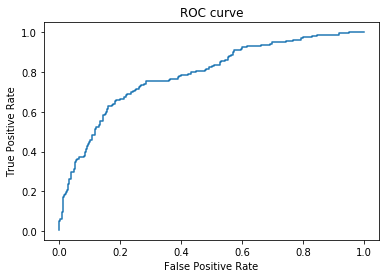

('treshholds',
 array([0.99203193, 0.82741894, 0.80695408]),
 array([0.01042919, 0.01015913, 0.00190964]))

In [64]:
from sklearn.metrics import roc_curve

# проходит по диапозону 0, 0.1, 0.2 ... 0.9 и для каждого из этих treshhold вычисляет y_predict и для них берет fpr, tpr
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1], pos_label=1)
plt.plot(fpr, tpr, label='ROC curve ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()
'treshholds', thresholds[:3], thresholds[-3:]

In [60]:
print(lr.predict(X_test)[:3])
lr.predict_proba(X_test)[:3]

[0 1 1]


array([[0.98197463, 0.01802537],
       [0.32408158, 0.67591842],
       [0.34090353, 0.65909647]])

### Work with texts

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, Bag

texts = [
    'Hello word!',
    'Mister Hello hi'
]
counted = CountVectorizer().fit_transform(texts)
print(counted.toarray())
tfidf = TfidfTransformer().fit_transform(counted)
print(tfidf.toarray());

[[1 0 0 1]
 [1 1 1 0]]
[[0.57973867 0.         0.         0.81480247]
 [0.44943642 0.6316672  0.6316672  0.        ]]


/Users/nvkorolkov/.virtualenvs/ml3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
